<a href="https://colab.research.google.com/github/zhus-dika/togyz-qumalaq-agent/blob/main/togyzqumalaq_aec_vs_random_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m ipykernel install --user --name=venv

#  🐘 AEC environment https://pettingzoo.farama.org/api/aec/#about-aec

### 🐞 Imports

In [1]:
import gymnasium
import os
import numpy as np
from gymnasium.spaces import Discrete, MultiDiscrete
from gymnasium import spaces

from IPython.display import clear_output
import time
from pettingzoo import AECEnv
from pettingzoo.utils import agent_selector, wrappers
import matplotlib.pyplot as plt

NUM_ITERS = 400
PLAYS = {"bastaushy": 0, "qostaushy": 0}

### 🦉 Create environment

In [2]:
def env(render_mode=None):
    """
    The env function often wraps the environment in wrappers by default.
    You can find full documentation for these methods
    elsewhere in the developer documentation.
    """
    internal_render_mode = render_mode if render_mode != "ansi" else "human"
    env = raw_env(render_mode=internal_render_mode)
    # This wrapper is only for environments which print results to the terminal
    if render_mode == "ansi":
        env = wrappers.CaptureStdoutWrapper(env)
    # this wrapper helps error handling for discrete action spaces
    env = wrappers.AssertOutOfBoundsWrapper(env)
    # Provides a wide vareity of helpful user errors
    # Strongly recommended
    env = wrappers.OrderEnforcingWrapper(env)
    return env


class raw_env(AECEnv):
    """
    The metadata holds environment constants. From gymnasium, we inherit the "render_modes",
    metadata which specifies which modes can be put into the render() method.
    At least human mode should be supported.
    The "name" metadata allows the environment to be pretty printed.
    """

    metadata = {
        "render_modes": ["ansi", "human"],
        "name": "togyzqumalaq_v0"
        }

    def __init__(self, render_mode=None):
        """
        The init method takes in environment arguments and
         should define the following attributes:
        - otaular
        - tuzdyq
        - qazandar
        - possible_agents
        - render_mode

        Note: as of v1.18.1, the action_spaces and observation_spaces attributes are deprecated.
        Spaces should be defined in the action_space() and observation_space() methods.
        If these methods are not overridden, spaces will be inferred from self.observation_spaces/action_spaces, raising a warning.

        These attributes should not be changed after initialization.
        """
        self.otaular = []
        self.tuzdyq = []
        self.qazandar = []
        self.direction = []
        self.agents = ["bastaushy", "qostaushy"]
        self.possible_agents = self.agents[:]
        # optional: we can define the observation and action spaces here as attributes to be used in their corresponding methods
        self.action_spaces = {i: spaces.Discrete(9) for i in self.agents}
        self.observation_spaces = {
            i: spaces.Dict(
                {
                    "observation": MultiDiscrete([100] * 18 + [9] * 2 + [82] * 2),
                    "action_mask": Discrete(9),
                }
            )
            for i in self.agents
        }
        self.render_mode = render_mode

    # Observation space should be defined here.
    def action_space(self, agent):
        return self.action_spaces[agent]

    # Action space should be defined here.
    def observation_space(self, agent):
        return self.observation_spaces[agent]

    def render(self):
        """
        Renders the environment. In human mode, it can print to terminal, open
        up a graphical window, or open up some other display that a human can see and understand.
        """
        """Renders the environment."""
        if self.render_mode is None:
            gymnasium.logger.warn(
                "You are calling render method without specifying any render mode."
            )
            return

        if len(self.agents) == 2:
            points_bastaushy_x = np.array([i * 2 for i in range(10)])
            points_bastaushy_y = np.array([i % 5 for i in range(50)])

            x = np.arange(-3, 225, 1)
            y = -1

            text_kwargs = dict(ha='center', va='center', fontsize=12)
            plt.figure(figsize=(17, 6))

            for i in range(9):
                # qostaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[17 - i]], points_bastaushy_y[:self.otaular[17 - i]], marker='o')
                # horizontal line
                plt.plot(x, np.repeat(y, len(x)))
                # vertical lines
                plt.plot(np.repeat(25 * i - 2, len(x)), np.arange(-7, 5, 12 / len(x)))
                # bastaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[i]], points_bastaushy_y[:self.otaular[i]] - 6, marker='o')

            #last vertical line
            plt.plot(np.repeat(25 * 9 - 2, len(x)), np.arange(-7, 5, 12 / len(x)))

            for i in range(9):
                # bastaushy's qumalaqtar
                plt.text(25 * i + 10, -7, f'{i} ({self.otaular[i]})', **text_kwargs)
                # qostaushy's qumalaqtar
                plt.text(25 * i + 10, 5, f'{17 - i} ({self.otaular[17 - i]})', **text_kwargs)
            # bastaushy qazan's qumalaqtar
            plt.text(230, -4, f'qazan: {self.qazandar[0]}', **text_kwargs)
            # qostaushy qazan's qumalaqtar
            plt.text(230, 2, f'qazan: {self.qazandar[1]}', **text_kwargs);
            # bastaushy tuzdyq's qumalaqtar
            plt.text(230, -6, f'tuzdyq: {self.tuzdyq[0]}', **text_kwargs)
            # qostaushy tuzdyq's qumalaqtar
            plt.text(230, 0, f'tuzdyq: {self.tuzdyq[1]}', **text_kwargs);
            plt.show()
        else:
            if self.render_mode == "human":
                print("Game over")
        time.sleep(2)
        clear_output(True)

    def _legal_moves(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        return [item for item in range(9 * cur_player, (cur_player + 1) * 9) if self.tuzdyq[opp_player] != item and self.otaular[item] > 0]

    def observe(self, agent):
        """
        Observe should return the observation of the specified agent. This function
        should return a sane observation (though not necessarily the most up to date possible)
        at any time after reset() is called.
        """
        # observation of one agent is the previous state of the other
        legal_moves = self._legal_moves(agent) if agent == self.agent_selection else []
        action_mask = np.zeros(9, "int8")
        if self.possible_agents.index(agent) == 1:
            legal_moves = [i - 9 for i in legal_moves]
        for i in legal_moves:
            action_mask[i] = 1
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        return {"observation": observation, "action_mask": action_mask}

    def close(self):
        """
        Close should release any graphical displays, subprocesses, network connections
        or any other environment data which should not be kept around after the
        user is no longer using the environment.
        """
        pass

    def reset(self, seed=None, options=None):
        """
        Reset needs to initialize the following attributes
        - agents
        - rewards
        - _cumulative_rewards
        - terminations
        - truncations
        - infos
        - agent_selection
        And must set up the environment so that render(), step(), and observe()
        can be called without issues.
        Here it sets up the state dictionary which is used by step() and the observations dictionary which is used by step() and observe()
        """
        self.agents = self.possible_agents[:]
        self.rewards = {agent: 0 for agent in self.agents}
        self._cumulative_rewards = {agent: 0 for agent in self.agents}
        self.otaular = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
        self.direction = [list(range(18)), [9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8]]
        self.tuzdyq = [-1, -1]
        self.qazandar = [0, 0]
        self.terminations = {agent: False for agent in self.agents}
        self.truncations = {agent: False for agent in self.agents}
        self.infos = {agent: {} for agent in self.agents}
        self.num_moves = 0
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        self.observations = {agent: observation for agent in self.agents}
        """
        Our agent_selector utility allows easy cyclic stepping through the agents list.
        """
        self._agent_selector = agent_selector(self.agents)
        self.agent_selection = self._agent_selector.next()

    def step(self, action):
        """
        step(action) takes in an action for the current agent (specified by
        agent_selection) and needs to update
        - rewards
        - _cumulative_rewards (accumulating the rewards)
        - terminations
        - truncations
        - infos
        - agent_selection (to the next agent)
        And any internal state used by observe() or render()
        """
        if (
            self.terminations[self.agent_selection]
            or self.truncations[self.agent_selection]
        ):
            # handles stepping an agent which is already dead
            # accepts a None action for the one agent, and moves the agent_selection to
            # the next dead agent,  or if there are no more dead agents, to the next live agent
            self._was_dead_step(action)
            return

        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        self.num_moves += 1
        if self.render_mode == "human":
            print(f'MOVE #{self.num_moves}')
        # The truncations dictionary must be updated for all players.
        self.truncations = {
            agent: self.num_moves >= NUM_ITERS for agent in self.agents
        }
        # distribute qumalaqs
        if cur_player == 1:
            action += 9
        if self.render_mode == "human":
            print(f'{self.agent_selection} made action {action}')
        num_qumalaq = self.otaular[action]
        idx_action = self.direction[cur_player].index(action)
        if self.otaular[action] == 1:
            self.otaular[self.direction[cur_player][idx_action + 1]] += 1
            self.otaular[action] -= 1
        else:
            i = 1
            while self.otaular[action] > 1:
                self.otaular[self.direction[cur_player][(idx_action + i) % 18]] += 1
                self.otaular[action] -= 1
                i += 1
        # check tuzdyq & add rewards to qazandar
        reward = 0
        if self.check_tuzdyq(self.agent_selection, action):
            reward += 3
            if self.render_mode == "human":
                print(f'{self.agent_selection} won tuzdyq {reward}')
        else:

            if num_qumalaq > 1:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq - 1) % 18]
            else:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq) % 18]

            if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] % 2 == 0:
                reward += self.otaular[last_otau]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won {reward}')
                self.otaular[last_otau] = 0
            if self.tuzdyq[cur_player] >= 0 and self.otaular[self.tuzdyq[cur_player]] > 0:
                reward += self.otaular[self.tuzdyq[cur_player]]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won tuzdyq {self.otaular[self.tuzdyq[cur_player]]}')
                self.otaular[self.tuzdyq[cur_player]] = 0
        if self.render_mode == "human":
            print(f'{self.agent_selection} won total {reward}')
        self.qazandar[cur_player] += reward
        self.rewards[self.agent_selection] += reward
        # check if there is a winner
        winner = self.check_for_winner()
        if winner:
            self.terminations = {i: True for i in self.agents}
            if self.render_mode == "human":
                print(f'{self.agent_selection} won the game!!!')
        # selects the next agent.
        self.agent_selection = self._agent_selector.next()
        # Adds .rewards to ._cumulative_rewards
        self._accumulate_rewards()

        if self.render_mode == "human":
            self.render()

    def check_tuzdyq(self, agent, action):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        idx = self.direction[cur_player].index(action)
        num_qumalaq = self.otaular[action]

        if num_qumalaq > 1:
            last_otau = self.direction[cur_player][(idx + num_qumalaq - 1) % 18]
        else:
            last_otau = self.direction[cur_player][(idx + num_qumalaq) % 18]

        if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] == 3 and last_otau != 17 - cur_player * 9 and abs(last_otau - self.tuzdyq[opp_player]) != 9:
            self.tuzdyq[cur_player] = last_otau
            self.otaular[last_otau] = 0
            if self.render_mode == "human":
                print(f'{agent} got tuzdyq {last_otau}!')
            return True

        return False

    def check_atsyrau(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2

        for idx, i in enumerate(self.otaular[cur_player * 9: (cur_player + 1) * 9]):
            if i > 0 and idx + cur_player * 9 != self.tuzdyq[opp_player]:
                return False
        if self.render_mode == "human":
            print(f'{agent} reached atsyrau')
        return True

    def check_for_winner(self):
        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        if self.qazandar[cur_player] > 81:
            PLAYS[self.agent_selection] += 1
            return True
        if self.check_atsyrau(self.possible_agents[opp_player]) and self.qazandar[opp_player] <= 81:
            PLAYS[self.agent_selection] += 1
            return True
        return False

### 🦚 Testing environment

In [ ]:
# env = env(render_mode="human")
# env.reset(seed=42)

# for agent in env.agent_iter():
#     observation, reward, termination, truncation, info = env.last()

#     if termination or truncation:
#         action = None
#     else:
#         mask = observation["action_mask"]
#         # this is where you would insert your policy
#         action = env.action_space(agent).sample(mask)

#     env.step(action)
# env.close()

# 🐼 DQN agent to play vs a random policy agent https://pettingzoo.farama.org/tutorials/tianshou/intermediate/

### 🐝 Imports

In [3]:
import os
from typing import Optional, Tuple

from torch.utils.tensorboard import SummaryWriter
from tianshou.utils import TensorboardLogger

import gymnasium
import numpy as np
import torch
from copy import deepcopy
from tianshou.data import Collector, VectorReplayBuffer
from tianshou.env import DummyVectorEnv
from tianshou.env.pettingzoo_env import PettingZooEnv
from tianshou.policy import BasePolicy, DQNPolicy, RainbowPolicy, MultiAgentPolicyManager, RandomPolicy
from tianshou.trainer import OffpolicyTrainer
from tianshou.utils.net.common import Net

### 🐫 Prepare main functions

In [4]:
def _get_agents_dqn(
    agent_learn: Optional[BasePolicy] = None,
    agent_opponent: Optional[BasePolicy] = None,
    optim: Optional[torch.optim.Optimizer] = None,
) -> Tuple[BasePolicy, torch.optim.Optimizer, list]:
    env = _get_env()
    observation_space = (
        env.observation_space["observation"]
        if isinstance(env.observation_space, gymnasium.spaces.Dict)
        else env.observation_space
    )
    if agent_learn is None:
        # model
        net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[256, 512, 512, 256],
            #hidden_sizes=[1024, 2048, 2048, 1024],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

        if optim is None:
            optim = torch.optim.Adam(net.parameters(), lr=1e-4)
        agent_learn = DQNPolicy(
            model=net,
            optim=optim,
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")


    if agent_opponent is None:
        if agent1_path:
            agent_opponent = agent1_learned
        else:
            agent_opponent = RandomPolicy(action_space=env.action_space)

    agents = [agent_opponent, agent_learn]
    #agents = [agent_learn, agent_opponent]
    policy = MultiAgentPolicyManager(policies=agents, env=env)
    return policy, optim, env.agents


def _get_env(render_mode=None):
    """This function is needed to provide callables for DummyVectorEnv."""
    def env(render_mode=None):
        """
        The env function often wraps the environment in wrappers by default.
        You can find full documentation for these methods
        elsewhere in the developer documentation.
        """
        internal_render_mode = render_mode if render_mode != "ansi" else "human"
        env = raw_env(render_mode=internal_render_mode)
        # This wrapper is only for environments which print results to the terminal
        if render_mode == "ansi":
            env = wrappers.CaptureStdoutWrapper(env)
        # this wrapper helps error handling for discrete action spaces
        env = wrappers.AssertOutOfBoundsWrapper(env)
        # Provides a wide vareity of helpful user errors
        # Strongly recommended
        env = wrappers.OrderEnforcingWrapper(env)
        return env
    return PettingZooEnv(env(render_mode=render_mode))

### 🐎 Load trained agents

In [5]:
agent1_path = "models/policy_128x256x256x128_bs64.pth"
agent2_path = "models/policy_256x512x512x256_bs128.pth"
agent3_path = "models/policy_512x1024x1024x512_bs128.pth"
agent4_path = "models/policy_128x256x512x256x128_trained_128x256x256x128.pth"

agents_learned = []
env = _get_env()
net1 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent1_learned = DQNPolicy(
            model=net1,
            optim = torch.optim.Adam(net1.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent1_learned.load_state_dict(torch.load(agent1_path))
agents_learned.append(agent1_learned)


net2 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[256, 512, 512, 256],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent2_learned = DQNPolicy(
            model=net2,
            optim = torch.optim.Adam(net1.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")
agent2_learned.load_state_dict(torch.load(agent2_path))
agents_learned.append(agent2_learned)


net3 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[512, 1024, 1024, 512],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent3_learned = DQNPolicy(
            model=net3,
            optim = torch.optim.Adam(net3.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")
agent3_learned.load_state_dict(torch.load(agent3_path))
agents_learned.append(agent3_learned)


net4 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 512, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent4_learned = DQNPolicy(
            model=net4,
            optim = torch.optim.Adam(net3.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent4_learned.load_state_dict(torch.load(agent4_path))
agents_learned.append(agent4_learned)

### 🐦 Add logger (to run tensorboard type in terminal  $tensorboard --logdir logs/dqn)

In [24]:
log_path = os.path.join('logs', "dqn")
writer = SummaryWriter(log_path)
logger = TensorboardLogger(writer)

###  🐑 Training code https://tianshou.org/en/stable/01_tutorials/04_tictactoe.html

In [10]:
# Before evaluate this cell run the cell with env
# ======== Step 1: Environment setup =========
train_envs = DummyVectorEnv([_get_env for _ in range(100)])
test_envs = DummyVectorEnv([_get_env for _ in range(100)])

# seed
seed = 11
np.random.seed(seed)
torch.manual_seed(seed)
train_envs.seed(seed)
test_envs.seed(seed)

# ======== Step 2: Agent setup =========
policy, optim, agents = _get_agents_dqn(agent_opponent=agents_learned[1])

# # ======== Step 3: Collector setup =========
train_collector = Collector(
    policy,
    train_envs,
    VectorReplayBuffer(20_000, len(train_envs)),
    exploration_noise=True,
)
test_collector = Collector(policy, test_envs, exploration_noise=True)
# policy.set_eps(1)

# ======== Step 4: Callback functions setup =========
def save_best_fn(policy):
    model_save_path = os.path.join("models", "dqn", "policy.pth")
    os.makedirs(os.path.join("models", "dqn"), exist_ok=True)
    torch.save(policy.policies[agents[1]].state_dict(), model_save_path)

def stop_fn(mean_rewards):
    return mean_rewards >= 21000

def train_fn(epoch, env_step):
    policy.policies[agents[1]].set_eps(0.1)

def test_fn(epoch, env_step):
    policy.policies[agents[1]].set_eps(0.05)

def reward_metric(rews):
    return rews[:, 1]

# ======== Step 5: Run the trainer =========
result = OffpolicyTrainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=150,
    step_per_epoch=1000,
    step_per_collect=50,
    episode_per_test=10,
    batch_size=256,
    train_fn=train_fn,
    test_fn=test_fn,
    stop_fn=stop_fn,
    #save_best_fn=save_best_fn,
    update_per_step=0.1,
    test_in_train=False,
    reward_metric=reward_metric,
    verbose=True,
    logger=logger
).run()

# return result, policy.policies[agents[1]]
print(f"\n==========Result==========\n{result}")
print("\n(the trained policy can be accessed via policy.policies[agents[1]])")

Epoch #1: 1001it [00:01, 589.44it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 2097.800000 ± 1347.820300, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #2: 1001it [00:01, 663.36it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 5318.400000 ± 2945.467134, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #3: 1001it [00:01, 553.04it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 6871.200000 ± 2056.227069, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #4: 1001it [00:01, 766.53it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8682.200000 ± 5708.286359, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #5: 1001it [00:01, 642.65it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8555.200000 ± 2260.999284, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #6: 1001it [00:01, 650.78it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10723.000000 ± 2977.142019, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #7: 1001it [00:01, 565.71it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1775.00]                                                                                     


Epoch #7: test_reward: 6037.600000 ± 3431.431398, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #8: 1001it [00:01, 623.63it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2518.00]                                                                                     


Epoch #8: test_reward: 7393.400000 ± 2375.054703, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #9: 1001it [00:02, 383.68it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=2765.00]                                                                                     


Epoch #9: test_reward: 10779.600000 ± 3509.502392, best_reward: 10779.600000 ± 3509.502392 in #9


Epoch #10: 1001it [00:01, 579.32it/s, env_step=10000, gradient_step=1000, len=90, n/ep=0, n/st=100, rew=2765.00]                                                                                  


Epoch #10: test_reward: 13421.000000 ± 3428.786549, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #11: 1001it [00:01, 587.18it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3780.00]                                                                                 


Epoch #11: test_reward: 12205.400000 ± 5979.719462, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #12: 1001it [00:01, 533.12it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=3617.00]                                                                                 


Epoch #12: test_reward: 11463.600000 ± 4461.561502, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #13: 1001it [00:02, 427.68it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4758.00]                                                                                 


Epoch #13: test_reward: 11203.200000 ± 4163.058799, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #14: 1001it [00:02, 435.05it/s, env_step=14000, gradient_step=1400, len=130, n/ep=0, n/st=100, rew=4758.00]                                                                                 


Epoch #14: test_reward: 10250.200000 ± 3027.343152, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #15: 1001it [00:01, 594.52it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=6296.00]                                                                                 


Epoch #15: test_reward: 11093.500000 ± 3868.824143, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #16: 1001it [00:01, 562.52it/s, env_step=16000, gradient_step=1600, len=154, n/ep=0, n/st=100, rew=5305.00]                                                                                 


Epoch #16: test_reward: 7044.800000 ± 3366.162468, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #17: 1001it [00:02, 459.43it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=6461.00]                                                                                 


Epoch #17: test_reward: 12391.600000 ± 3288.409409, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #18: 1001it [00:02, 493.89it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7357.00]                                                                                 


Epoch #18: test_reward: 10590.200000 ± 3658.735705, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #19: 1001it [00:02, 442.00it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=8469.00]                                                                                 


Epoch #19: test_reward: 10188.000000 ± 2123.302145, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #20: 1001it [00:01, 573.00it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=7840.50]                                                                                 


Epoch #20: test_reward: 11272.400000 ± 3005.872892, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #21: 1001it [00:01, 512.23it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8332.00]                                                                                 


Epoch #21: test_reward: 10301.200000 ± 2537.792931, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #22: 1001it [00:02, 463.59it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10792.00]                                                                                


Epoch #22: test_reward: 9382.200000 ± 4134.963623, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #23: 1001it [00:02, 471.92it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11571.50]                                                                                


Epoch #23: test_reward: 10822.400000 ± 5712.217069, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #24: 1001it [00:01, 592.71it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=12205.50]                                                                                


Epoch #24: test_reward: 16745.400000 ± 5316.471390, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #25: 1001it [00:01, 501.60it/s, env_step=25000, gradient_step=2500, len=68, n/ep=0, n/st=100, rew=2434.00]                                                                                  


Epoch #25: test_reward: 9863.600000 ± 2591.755667, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #26: 1001it [00:02, 420.15it/s, env_step=26000, gradient_step=2600, len=253, n/ep=0, n/st=100, rew=10360.00]                                                                                


Epoch #26: test_reward: 14900.500000 ± 3399.339973, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #27: 1001it [00:01, 519.28it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=12099.75]                                                                                


Epoch #27: test_reward: 6826.800000 ± 1743.257686, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #28: 1001it [00:01, 514.14it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=13034.50]                                                                                


Epoch #28: test_reward: 14420.900000 ± 5741.968625, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #29: 1001it [00:02, 420.05it/s, env_step=29000, gradient_step=2900, len=135, n/ep=0, n/st=100, rew=6219.00]                                                                                 


Epoch #29: test_reward: 6704.000000 ± 2339.751611, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #30: 1001it [00:02, 415.85it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=12759.00]                                                                                


Epoch #30: test_reward: 11965.800000 ± 4163.381361, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #31: 1001it [00:02, 492.86it/s, env_step=31000, gradient_step=3100, len=145, n/ep=0, n/st=100, rew=5030.00]                                                                                 


Epoch #31: test_reward: 9117.200000 ± 2278.505510, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #32: 1001it [00:02, 479.00it/s, env_step=32000, gradient_step=3200, len=320, n/ep=2, n/st=100, rew=14816.25]                                                                                


Epoch #32: test_reward: 7533.100000 ± 2696.711125, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #33: 1001it [00:02, 480.81it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=15561.50]                                                                                


Epoch #33: test_reward: 11941.400000 ± 5074.441688, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #34: 1001it [00:02, 452.68it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=13934.50]                                                                                


Epoch #34: test_reward: 14039.300000 ± 4640.984207, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #35: 1001it [00:02, 419.68it/s, env_step=35000, gradient_step=3500, len=137, n/ep=0, n/st=100, rew=6293.00]                                                                                 


Epoch #35: test_reward: 9446.400000 ± 2934.930704, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #36: 1001it [00:02, 450.88it/s, env_step=36000, gradient_step=3600, len=249, n/ep=0, n/st=100, rew=9384.50]                                                                                 


Epoch #36: test_reward: 10507.400000 ± 2444.260878, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #37: 1001it [00:01, 507.15it/s, env_step=37000, gradient_step=3700, len=104, n/ep=0, n/st=100, rew=3756.00]                                                                                 


Epoch #37: test_reward: 12404.000000 ± 3851.823776, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #38: 1001it [00:01, 571.55it/s, env_step=38000, gradient_step=3800, len=187, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #38: test_reward: 8938.800000 ± 4177.617307, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #39: 1001it [00:01, 513.48it/s, env_step=39000, gradient_step=3900, len=194, n/ep=0, n/st=100, rew=8822.00]                                                                                 


Epoch #39: test_reward: 9065.400000 ± 3521.607139, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #40: 1001it [00:01, 516.15it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=19027.25]                                                                                


Epoch #40: test_reward: 7071.600000 ± 3839.324295, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #41: 1001it [00:01, 511.35it/s, env_step=41000, gradient_step=4100, len=219, n/ep=0, n/st=100, rew=10347.00]                                                                                


Epoch #41: test_reward: 8248.600000 ± 2965.138520, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #42: 1001it [00:02, 472.19it/s, env_step=42000, gradient_step=4200, len=219, n/ep=0, n/st=100, rew=10347.00]                                                                                


Epoch #42: test_reward: 12346.400000 ± 3253.680353, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #43: 1001it [00:01, 519.16it/s, env_step=43000, gradient_step=4300, len=185, n/ep=1, n/st=100, rew=7136.50]                                                                                 


Epoch #43: test_reward: 11356.900000 ± 4158.769925, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #44: 1001it [00:02, 412.31it/s, env_step=44000, gradient_step=4400, len=185, n/ep=0, n/st=100, rew=7136.50]                                                                                 


Epoch #44: test_reward: 14929.700000 ± 5775.752662, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #45: 1001it [00:02, 449.65it/s, env_step=45000, gradient_step=4500, len=217, n/ep=1, n/st=100, rew=9852.00]                                                                                 


Epoch #45: test_reward: 12150.800000 ± 4728.750803, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #46: 1001it [00:02, 352.68it/s, env_step=46000, gradient_step=4600, len=147, n/ep=1, n/st=100, rew=7655.00]                                                                                 


Epoch #46: test_reward: 14693.400000 ± 4366.976350, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #47: 1001it [00:02, 417.79it/s, env_step=47000, gradient_step=4700, len=137, n/ep=1, n/st=100, rew=6758.50]                                                                                 


Epoch #47: test_reward: 9794.800000 ± 5034.523390, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #48: 1001it [00:02, 445.32it/s, env_step=48000, gradient_step=4800, len=135, n/ep=1, n/st=100, rew=6135.50]                                                                                 


Epoch #48: test_reward: 10686.400000 ± 5009.785129, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #49: 1001it [00:02, 420.36it/s, env_step=49000, gradient_step=4900, len=211, n/ep=0, n/st=100, rew=9902.00]                                                                                 


Epoch #49: test_reward: 11677.500000 ± 2720.854838, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #50: 1001it [00:02, 444.11it/s, env_step=50000, gradient_step=5000, len=237, n/ep=0, n/st=100, rew=10910.00]                                                                                


Epoch #50: test_reward: 12051.400000 ± 3880.339552, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #51: 1001it [00:02, 494.77it/s, env_step=51000, gradient_step=5100, len=265, n/ep=0, n/st=100, rew=14016.00]                                                                                


Epoch #51: test_reward: 10412.600000 ± 3677.070143, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #52: 1001it [00:02, 477.25it/s, env_step=52000, gradient_step=5200, len=400, n/ep=0, n/st=100, rew=19488.00]                                                                                


Epoch #52: test_reward: 15945.300000 ± 5990.846736, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #53: 1001it [00:02, 470.65it/s, env_step=53000, gradient_step=5300, len=281, n/ep=0, n/st=100, rew=13525.50]                                                                                


Epoch #53: test_reward: 12344.800000 ± 3535.409391, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #54: 1001it [00:02, 491.80it/s, env_step=54000, gradient_step=5400, len=343, n/ep=0, n/st=100, rew=18542.00]                                                                                


Epoch #54: test_reward: 15537.400000 ± 4975.753213, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #55: 1001it [00:02, 400.82it/s, env_step=55000, gradient_step=5500, len=186, n/ep=0, n/st=100, rew=9846.50]                                                                                 


Epoch #55: test_reward: 14738.500000 ± 4890.353837, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #56: 1001it [00:02, 375.35it/s, env_step=56000, gradient_step=5600, len=277, n/ep=0, n/st=100, rew=12784.50]                                                                                


Epoch #56: test_reward: 14330.800000 ± 4930.103545, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #57: 1001it [00:02, 484.99it/s, env_step=57000, gradient_step=5700, len=322, n/ep=0, n/st=100, rew=16304.00]                                                                                


Epoch #57: test_reward: 12881.600000 ± 3688.288036, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #58: 1001it [00:02, 400.08it/s, env_step=58000, gradient_step=5800, len=262, n/ep=0, n/st=100, rew=14744.00]                                                                                


Epoch #58: test_reward: 13175.200000 ± 5935.919353, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #59: 1001it [00:02, 431.42it/s, env_step=59000, gradient_step=5900, len=255, n/ep=0, n/st=100, rew=15222.00]                                                                                


Epoch #59: test_reward: 14750.700000 ± 3863.203957, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #60: 1001it [00:02, 478.26it/s, env_step=60000, gradient_step=6000, len=96, n/ep=1, n/st=100, rew=3345.50]                                                                                  


Epoch #60: test_reward: 19623.300000 ± 4957.901614, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #61: 1001it [00:01, 507.55it/s, env_step=61000, gradient_step=6100, len=319, n/ep=0, n/st=100, rew=16394.00]                                                                                


Epoch #61: test_reward: 9442.900000 ± 5369.656292, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #62: 1001it [00:02, 418.28it/s, env_step=62000, gradient_step=6200, len=314, n/ep=0, n/st=100, rew=14372.00]                                                                                


Epoch #62: test_reward: 8075.700000 ± 4516.606471, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #63: 1001it [00:02, 447.52it/s, env_step=63000, gradient_step=6300, len=309, n/ep=0, n/st=100, rew=13975.50]                                                                                


Epoch #63: test_reward: 14565.900000 ± 5571.961099, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #64: 1001it [00:02, 498.93it/s, env_step=64000, gradient_step=6400, len=357, n/ep=0, n/st=100, rew=18181.00]                                                                                


Epoch #64: test_reward: 12596.000000 ± 6277.039159, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #65: 1001it [00:02, 487.96it/s, env_step=65000, gradient_step=6500, len=226, n/ep=2, n/st=100, rew=10999.25]                                                                                


Epoch #65: test_reward: 7868.000000 ± 3554.988608, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #66: 1001it [00:01, 516.97it/s, env_step=66000, gradient_step=6600, len=261, n/ep=0, n/st=100, rew=9170.50]                                                                                 


Epoch #66: test_reward: 17072.100000 ± 5990.674694, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #67: 1001it [00:01, 531.86it/s, env_step=67000, gradient_step=6700, len=352, n/ep=1, n/st=100, rew=20961.50]                                                                                


Epoch #67: test_reward: 18926.900000 ± 3734.039862, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #68: 1001it [00:01, 516.83it/s, env_step=68000, gradient_step=6800, len=179, n/ep=0, n/st=100, rew=7688.00]                                                                                 


Epoch #68: test_reward: 19187.200000 ± 4721.721313, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #69: 1001it [00:02, 473.49it/s, env_step=69000, gradient_step=6900, len=288, n/ep=0, n/st=100, rew=15947.50]                                                                                


Epoch #69: test_reward: 14244.400000 ± 5213.183791, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #70: 1001it [00:02, 468.51it/s, env_step=70000, gradient_step=7000, len=398, n/ep=1, n/st=100, rew=21660.50]                                                                                


Epoch #70: test_reward: 20667.800000 ± 2776.324253, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #71: 1001it [00:02, 456.60it/s, env_step=71000, gradient_step=7100, len=202, n/ep=0, n/st=100, rew=8701.50]                                                                                 


Epoch #71: test_reward: 12039.100000 ± 3889.472932, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #72: 1001it [00:01, 543.05it/s, env_step=72000, gradient_step=7200, len=275, n/ep=1, n/st=100, rew=13771.00]                                                                                


Epoch #72: test_reward: 13127.400000 ± 4926.304583, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #73: 1001it [00:02, 424.71it/s, env_step=73000, gradient_step=7300, len=159, n/ep=1, n/st=100, rew=8823.00]                                                                                 


Epoch #73: test_reward: 11788.000000 ± 6016.785703, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #74: 1001it [00:01, 548.36it/s, env_step=74000, gradient_step=7400, len=270, n/ep=1, n/st=100, rew=12827.00]                                                                                


Epoch #74: test_reward: 12131.400000 ± 5940.048959, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #75: 1001it [00:02, 489.78it/s, env_step=75000, gradient_step=7500, len=297, n/ep=1, n/st=100, rew=15931.00]                                                                                


Epoch #75: test_reward: 14851.400000 ± 5514.096992, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #76: 1001it [00:02, 439.20it/s, env_step=76000, gradient_step=7600, len=298, n/ep=0, n/st=100, rew=15814.50]                                                                                


Epoch #76: test_reward: 12277.100000 ± 6040.890935, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #77: 1001it [00:02, 423.61it/s, env_step=77000, gradient_step=7700, len=400, n/ep=0, n/st=100, rew=18010.50]                                                                                


Epoch #77: test_reward: 16660.700000 ± 5917.946165, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #78: 1001it [00:01, 535.95it/s, env_step=78000, gradient_step=7800, len=147, n/ep=0, n/st=100, rew=6119.00]                                                                                 


Epoch #78: test_reward: 16343.400000 ± 5881.655434, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #79: 1001it [00:02, 468.28it/s, env_step=79000, gradient_step=7900, len=124, n/ep=2, n/st=100, rew=5187.50]                                                                                 


Epoch #79: test_reward: 15480.400000 ± 6657.409815, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #80: 1001it [00:02, 460.69it/s, env_step=80000, gradient_step=8000, len=266, n/ep=0, n/st=100, rew=11243.00]                                                                                


Epoch #80: test_reward: 5910.200000 ± 1141.110494, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #81: 1001it [00:02, 417.49it/s, env_step=81000, gradient_step=8100, len=92, n/ep=0, n/st=100, rew=3709.00]                                                                                  


Epoch #81: test_reward: 17201.300000 ± 4890.237459, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #82: 1001it [00:02, 406.71it/s, env_step=82000, gradient_step=8200, len=108, n/ep=1, n/st=100, rew=4667.00]                                                                                 


Epoch #82: test_reward: 12266.600000 ± 5351.292483, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #83: 1001it [00:01, 538.30it/s, env_step=83000, gradient_step=8300, len=334, n/ep=0, n/st=100, rew=18281.00]                                                                                


Epoch #83: test_reward: 17502.300000 ± 4246.725092, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #84: 1001it [00:01, 538.82it/s, env_step=84000, gradient_step=8400, len=368, n/ep=0, n/st=100, rew=20620.50]                                                                                


Epoch #84: test_reward: 12714.700000 ± 4827.954185, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #85: 1001it [00:02, 473.11it/s, env_step=85000, gradient_step=8500, len=258, n/ep=1, n/st=100, rew=13768.50]                                                                                


Epoch #85: test_reward: 11670.300000 ± 4189.776081, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #86: 1001it [00:01, 530.19it/s, env_step=86000, gradient_step=8600, len=143, n/ep=0, n/st=100, rew=6394.00]                                                                                 


Epoch #86: test_reward: 8028.400000 ± 2890.643223, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #87: 1001it [00:01, 515.28it/s, env_step=87000, gradient_step=8700, len=335, n/ep=1, n/st=100, rew=15792.00]                                                                                


Epoch #87: test_reward: 10030.300000 ± 4409.048425, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #88: 1001it [00:02, 428.10it/s, env_step=88000, gradient_step=8800, len=238, n/ep=1, n/st=100, rew=12849.00]                                                                                


Epoch #88: test_reward: 6981.800000 ± 1841.890431, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #89: 1001it [00:02, 436.12it/s, env_step=89000, gradient_step=8900, len=221, n/ep=3, n/st=100, rew=11136.67]                                                                                


Epoch #89: test_reward: 16639.900000 ± 3208.804433, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #90: 1001it [00:02, 434.07it/s, env_step=90000, gradient_step=9000, len=193, n/ep=0, n/st=100, rew=9487.00]                                                                                 


Epoch #90: test_reward: 6941.200000 ± 2319.610519, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #91: 1001it [00:02, 487.84it/s, env_step=91000, gradient_step=9100, len=122, n/ep=0, n/st=100, rew=5139.50]                                                                                 


Epoch #91: test_reward: 11514.700000 ± 4982.092975, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #92: 1001it [00:02, 462.08it/s, env_step=92000, gradient_step=9200, len=98, n/ep=1, n/st=100, rew=4384.00]                                                                                  


Epoch #92: test_reward: 16609.700000 ± 6033.322916, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #93: 1001it [00:02, 433.04it/s, env_step=93000, gradient_step=9300, len=171, n/ep=0, n/st=100, rew=9048.00]                                                                                 


Epoch #93: test_reward: 17615.700000 ± 6670.454243, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #94: 1001it [00:02, 482.09it/s, env_step=94000, gradient_step=9400, len=144, n/ep=1, n/st=100, rew=5746.50]                                                                                 


Epoch #94: test_reward: 7321.200000 ± 2409.667396, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #95: 1001it [00:02, 500.02it/s, env_step=95000, gradient_step=9500, len=280, n/ep=0, n/st=100, rew=15666.00]                                                                                


Epoch #95: test_reward: 14983.000000 ± 7552.879530, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #96: 1001it [00:02, 446.49it/s, env_step=96000, gradient_step=9600, len=243, n/ep=0, n/st=100, rew=13420.75]                                                                                


Epoch #96: test_reward: 11863.800000 ± 3910.904392, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #97: 1001it [00:02, 433.57it/s, env_step=97000, gradient_step=9700, len=249, n/ep=0, n/st=100, rew=10798.00]                                                                                


Epoch #97: test_reward: 6517.000000 ± 5994.872693, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #98: 1001it [00:02, 404.37it/s, env_step=98000, gradient_step=9800, len=123, n/ep=1, n/st=100, rew=4491.00]                                                                                 


Epoch #98: test_reward: 12535.400000 ± 5225.308339, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #99: 1001it [00:02, 438.77it/s, env_step=99000, gradient_step=9900, len=84, n/ep=0, n/st=100, rew=3316.00]                                                                                  


Epoch #99: test_reward: 8733.700000 ± 2268.717437, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #100: 1001it [00:02, 403.31it/s, env_step=100000, gradient_step=10000, len=169, n/ep=0, n/st=100, rew=6224.00]                                                                              


Epoch #100: test_reward: 12134.600000 ± 5645.546904, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #101: 1001it [00:02, 427.15it/s, env_step=101000, gradient_step=10100, len=92, n/ep=0, n/st=100, rew=3902.00]                                                                               


Epoch #101: test_reward: 8913.400000 ± 5197.859102, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #102: 1001it [00:02, 432.53it/s, env_step=102000, gradient_step=10200, len=229, n/ep=0, n/st=100, rew=10935.50]                                                                             


Epoch #102: test_reward: 12831.600000 ± 5820.859081, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #103: 1001it [00:02, 407.73it/s, env_step=103000, gradient_step=10300, len=144, n/ep=2, n/st=100, rew=6245.50]                                                                              


Epoch #103: test_reward: 7946.600000 ± 3220.260989, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #104: 1001it [00:02, 430.04it/s, env_step=104000, gradient_step=10400, len=292, n/ep=0, n/st=100, rew=17058.50]                                                                             


Epoch #104: test_reward: 19310.800000 ± 3544.111872, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #105: 1001it [00:02, 406.60it/s, env_step=105000, gradient_step=10500, len=171, n/ep=0, n/st=100, rew=8469.00]                                                                              


Epoch #105: test_reward: 12493.400000 ± 4451.567099, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #106: 1001it [00:02, 384.96it/s, env_step=106000, gradient_step=10600, len=113, n/ep=1, n/st=100, rew=4887.00]                                                                              


Epoch #106: test_reward: 10355.300000 ± 3848.399461, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #107: 1001it [00:02, 397.68it/s, env_step=107000, gradient_step=10700, len=248, n/ep=2, n/st=100, rew=14529.75]                                                                             


Epoch #107: test_reward: 14635.800000 ± 5840.851561, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #108: 1001it [00:02, 391.00it/s, env_step=108000, gradient_step=10800, len=84, n/ep=1, n/st=100, rew=3387.00]                                                                               


Epoch #108: test_reward: 12115.400000 ± 5247.708208, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #109: 1001it [00:02, 453.53it/s, env_step=109000, gradient_step=10900, len=241, n/ep=0, n/st=100, rew=12789.00]                                                                             


Epoch #109: test_reward: 12680.500000 ± 6318.555883, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #110: 1001it [00:02, 377.13it/s, env_step=110000, gradient_step=11000, len=255, n/ep=2, n/st=100, rew=12371.75]                                                                             


Epoch #110: test_reward: 12707.200000 ± 4068.177794, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #111: 1001it [00:02, 439.54it/s, env_step=111000, gradient_step=11100, len=208, n/ep=1, n/st=100, rew=10023.00]                                                                             


Epoch #111: test_reward: 14705.100000 ± 3803.601516, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #112: 1001it [00:02, 375.05it/s, env_step=112000, gradient_step=11200, len=98, n/ep=1, n/st=100, rew=4682.00]                                                                               


Epoch #112: test_reward: 14253.200000 ± 5438.528124, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #113: 1001it [00:02, 412.99it/s, env_step=113000, gradient_step=11300, len=334, n/ep=1, n/st=100, rew=18216.00]                                                                             


Epoch #113: test_reward: 14763.700000 ± 5475.576902, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #114: 1001it [00:02, 401.18it/s, env_step=114000, gradient_step=11400, len=62, n/ep=0, n/st=100, rew=2538.50]                                                                               


Epoch #114: test_reward: 15024.700000 ± 4957.726032, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #115: 1001it [00:02, 414.30it/s, env_step=115000, gradient_step=11500, len=230, n/ep=0, n/st=100, rew=11527.00]                                                                             


Epoch #115: test_reward: 7427.200000 ± 1117.837627, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #116: 1001it [00:02, 453.91it/s, env_step=116000, gradient_step=11600, len=207, n/ep=1, n/st=100, rew=9637.00]                                                                              


Epoch #116: test_reward: 12973.500000 ± 3380.076131, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #117: 1001it [00:02, 430.84it/s, env_step=117000, gradient_step=11700, len=153, n/ep=0, n/st=100, rew=7100.00]                                                                              


Epoch #117: test_reward: 8992.800000 ± 4474.384892, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #118: 1001it [00:01, 527.63it/s, env_step=118000, gradient_step=11800, len=156, n/ep=0, n/st=100, rew=7447.00]                                                                              


Epoch #118: test_reward: 10477.200000 ± 3907.982825, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #119: 1001it [00:02, 476.42it/s, env_step=119000, gradient_step=11900, len=148, n/ep=2, n/st=100, rew=7129.75]                                                                              


Epoch #119: test_reward: 9053.800000 ± 4066.969456, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #120: 1001it [00:02, 466.28it/s, env_step=120000, gradient_step=12000, len=155, n/ep=0, n/st=100, rew=6706.00]                                                                              


Epoch #120: test_reward: 13624.800000 ± 6185.265941, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #121: 1001it [00:02, 426.62it/s, env_step=121000, gradient_step=12100, len=276, n/ep=0, n/st=100, rew=15269.00]                                                                             


Epoch #121: test_reward: 11484.400000 ± 4972.472226, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #122: 1001it [00:02, 476.26it/s, env_step=122000, gradient_step=12200, len=262, n/ep=0, n/st=100, rew=12069.00]                                                                             


Epoch #122: test_reward: 13258.700000 ± 5007.739950, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #123: 1001it [00:02, 448.70it/s, env_step=123000, gradient_step=12300, len=170, n/ep=0, n/st=100, rew=6357.75]                                                                              


Epoch #123: test_reward: 14762.500000 ± 6238.556007, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #124: 1001it [00:02, 474.17it/s, env_step=124000, gradient_step=12400, len=143, n/ep=1, n/st=100, rew=5656.00]                                                                              


Epoch #124: test_reward: 12595.400000 ± 4610.281731, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #125: 1001it [00:02, 431.75it/s, env_step=125000, gradient_step=12500, len=150, n/ep=1, n/st=100, rew=7441.00]                                                                              


Epoch #125: test_reward: 9210.600000 ± 4779.022080, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #126: 1001it [00:01, 527.13it/s, env_step=126000, gradient_step=12600, len=141, n/ep=1, n/st=100, rew=6028.00]                                                                              


Epoch #126: test_reward: 6739.600000 ± 5000.641463, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #127: 1001it [00:02, 475.42it/s, env_step=127000, gradient_step=12700, len=225, n/ep=1, n/st=100, rew=11947.00]                                                                             


Epoch #127: test_reward: 5753.200000 ± 1711.466552, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #128: 1001it [00:01, 543.15it/s, env_step=128000, gradient_step=12800, len=210, n/ep=3, n/st=100, rew=10069.83]                                                                             


Epoch #128: test_reward: 6120.400000 ± 958.883017, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #129: 1001it [00:02, 475.84it/s, env_step=129000, gradient_step=12900, len=134, n/ep=0, n/st=100, rew=6486.50]                                                                              


Epoch #129: test_reward: 12191.100000 ± 4961.827817, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #130: 1001it [00:02, 488.98it/s, env_step=130000, gradient_step=13000, len=157, n/ep=1, n/st=100, rew=8036.00]                                                                              


Epoch #130: test_reward: 11464.600000 ± 4090.659096, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #131: 1001it [00:01, 562.31it/s, env_step=131000, gradient_step=13100, len=212, n/ep=1, n/st=100, rew=12061.00]                                                                             


Epoch #131: test_reward: 13072.300000 ± 5419.248897, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #132: 1001it [00:01, 516.76it/s, env_step=132000, gradient_step=13200, len=169, n/ep=0, n/st=100, rew=8123.25]                                                                              


Epoch #132: test_reward: 13792.000000 ± 4366.129980, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #133: 1001it [00:02, 367.78it/s, env_step=133000, gradient_step=13300, len=196, n/ep=0, n/st=100, rew=11179.50]                                                                             


Epoch #133: test_reward: 13564.000000 ± 4680.493051, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #134: 1001it [00:02, 490.19it/s, env_step=134000, gradient_step=13400, len=179, n/ep=0, n/st=100, rew=8213.00]                                                                              


Epoch #134: test_reward: 16251.700000 ± 5718.059060, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #135: 1001it [00:02, 483.34it/s, env_step=135000, gradient_step=13500, len=161, n/ep=2, n/st=100, rew=6866.00]                                                                              


Epoch #135: test_reward: 11160.000000 ± 3807.911816, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #136: 1001it [00:02, 464.25it/s, env_step=136000, gradient_step=13600, len=202, n/ep=2, n/st=100, rew=9961.50]                                                                              


Epoch #136: test_reward: 13718.400000 ± 6767.393874, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #137: 1001it [00:01, 520.96it/s, env_step=137000, gradient_step=13700, len=202, n/ep=0, n/st=100, rew=9961.50]                                                                              


Epoch #137: test_reward: 10350.000000 ± 4057.489174, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #138: 1001it [00:02, 447.67it/s, env_step=138000, gradient_step=13800, len=180, n/ep=0, n/st=100, rew=9231.00]                                                                              


Epoch #138: test_reward: 12194.800000 ± 4924.552849, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #139: 1001it [00:02, 477.33it/s, env_step=139000, gradient_step=13900, len=80, n/ep=0, n/st=100, rew=3127.50]                                                                               


Epoch #139: test_reward: 6345.000000 ± 2324.551096, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #140: 1001it [00:01, 535.35it/s, env_step=140000, gradient_step=14000, len=138, n/ep=0, n/st=100, rew=6012.00]                                                                              


Epoch #140: test_reward: 9738.900000 ± 2718.472161, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #141: 1001it [00:01, 516.62it/s, env_step=141000, gradient_step=14100, len=145, n/ep=0, n/st=100, rew=7739.75]                                                                              


Epoch #141: test_reward: 8077.100000 ± 2579.964901, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #142: 1001it [00:02, 472.33it/s, env_step=142000, gradient_step=14200, len=127, n/ep=1, n/st=100, rew=6726.50]                                                                              


Epoch #142: test_reward: 10043.000000 ± 5147.777715, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #143: 1001it [00:02, 499.01it/s, env_step=143000, gradient_step=14300, len=126, n/ep=2, n/st=100, rew=6342.00]                                                                              


Epoch #143: test_reward: 10826.000000 ± 3728.133823, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #144: 1001it [00:01, 510.25it/s, env_step=144000, gradient_step=14400, len=215, n/ep=2, n/st=100, rew=11742.25]                                                                             


Epoch #144: test_reward: 12321.300000 ± 5929.260899, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #145: 1001it [00:02, 457.28it/s, env_step=145000, gradient_step=14500, len=145, n/ep=2, n/st=100, rew=6244.50]                                                                              


Epoch #145: test_reward: 14727.700000 ± 2503.148300, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #146: 1001it [00:01, 513.99it/s, env_step=146000, gradient_step=14600, len=266, n/ep=0, n/st=100, rew=14847.00]                                                                             


Epoch #146: test_reward: 11413.100000 ± 3414.138616, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #147: 1001it [00:02, 472.33it/s, env_step=147000, gradient_step=14700, len=214, n/ep=0, n/st=100, rew=11559.50]                                                                             


Epoch #147: test_reward: 14722.500000 ± 4373.312046, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #148: 1001it [00:02, 478.01it/s, env_step=148000, gradient_step=14800, len=157, n/ep=0, n/st=100, rew=5971.00]                                                                              


Epoch #148: test_reward: 7535.100000 ± 3430.707171, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #149: 1001it [00:02, 387.17it/s, env_step=149000, gradient_step=14900, len=113, n/ep=0, n/st=100, rew=5329.00]                                                                              


Epoch #149: test_reward: 12833.600000 ± 2759.742242, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #150: 1001it [00:02, 499.53it/s, env_step=150000, gradient_step=15000, len=88, n/ep=1, n/st=100, rew=3831.00]                                                                               


Epoch #150: test_reward: 13270.000000 ± 2173.941674, best_reward: 20667.800000 ± 2776.324253 in #70

==========Result==========
InfoStats(gradient_step=15000, best_reward=20667.8, best_reward_std=2776.3242533969265, train_step=150000, train_episode=657, test_step=358560, test_episode=1510, timing=TimingStats(total_time=530.0276830196381, train_time=321.41389322280884, train_time_collect=53.170809268951416, train_time_update=261.5024907588959, test_time=208.61378979682922, update_speed=466.6879782200883))

(the trained policy can be accessed via policy.policies[agents[1]])


### 🐙 Evaluate best Qostaushy agent with random policy

In [67]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[RandomPolicy(action_space=env.action_space), agents_learned[3]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every ? seconds
result = collector.collect(n_episode=100, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 85, 'qostaushy': 13}


🐳 Experiments

1.

 net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=64 * 100)  # batch size * training_num

res: {'bastaushy': 781, 'qostaushy': 194}

res: {'bastaushy': 790, 'qostaushy': 191}

2.

 net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=256 * 100)  # batch size * training_num

res: 6/3

3.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=128 * 100)  # batch size * training_num     

{'bastaushy': 537, 'qostaushy': 411}

4.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[256, 512, 512, 256],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=128 * 100)  # batch size * training_num   

res: {'bastaushy': 493, 'qostaushy': 483}

res: {'bastaushy': 512, 'qostaushy': 464}

5.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[512, 1024, 1024, 512],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

res: {'bastaushy': 38, 'qostaushy': 59}

res: {'bastaushy': 372, 'qostaushy': 562}

### 🦎 Play with different policies

In [77]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[agents_learned[0], agents_learned[2]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every 2 seconds
result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 0, 'qostaushy': 1}


🐯 Experiment results


*   agent3 vs agent1: 0-0
*   agent1 vs agent3: 0-1
*   agent3 vs agent2: 0-1
*   agent2 vs agent3: 1-0
*   agent2 vs agent1: 0-1
*   agent1 vs agent2: 1-0
*   trained with agent1 vs agent1: 1-0
*   agent1 vs trained with agent1: 0-0
*   trained with agent1 vs agent2: 0-0
*   agent2 vs trained with agent1: 0-0
*   trained with agent1 vs agent3: 1-0
*   agent3 vs trained with agent1: 0-0



# 🦩 PPO policy training

### 🐊 Change files tianshou.utils.net.common & tianshou.policy.modelfree.pgpolicy

In [ ]:
#common.py
from abc import ABC, abstractmethod
from collections.abc import Callable, Sequence
from typing import Any, Generic, TypeAlias, TypeVar, cast, no_type_check

import numpy as np
import torch
from torch import nn

from tianshou.data import to_torch_as
from tianshou.data.batch import Batch
from tianshou.data.types import RecurrentStateBatch

ModuleType = type[nn.Module]
ArgsType = tuple[Any, ...] | dict[Any, Any] | Sequence[tuple[Any, ...]] | Sequence[dict[Any, Any]]
TActionShape: TypeAlias = Sequence[int] | int | np.int64
TLinearLayer: TypeAlias = Callable[[int, int], nn.Module]
T = TypeVar("T")


def miniblock(
    input_size: int,
    output_size: int = 0,
    norm_layer: ModuleType | None = None,
    norm_args: tuple[Any, ...] | dict[Any, Any] | None = None,
    activation: ModuleType | None = None,
    act_args: tuple[Any, ...] | dict[Any, Any] | None = None,
    linear_layer: TLinearLayer = nn.Linear,
) -> list[nn.Module]:
    """Construct a miniblock with given input/output-size, norm layer and activation."""
    layers: list[nn.Module] = [linear_layer(input_size, output_size)]
    if norm_layer is not None:
        if isinstance(norm_args, tuple):
            layers += [norm_layer(output_size, *norm_args)]
        elif isinstance(norm_args, dict):
            layers += [norm_layer(output_size, **norm_args)]
        else:
            layers += [norm_layer(output_size)]
    if activation is not None:
        if isinstance(act_args, tuple):
            layers += [activation(*act_args)]
        elif isinstance(act_args, dict):
            layers += [activation(**act_args)]
        else:
            layers += [activation()]
    return layers


class MLP(nn.Module):
    """Simple MLP backbone.

    Create a MLP of size input_dim * hidden_sizes[0] * hidden_sizes[1] * ...
    * hidden_sizes[-1] * output_dim

    :param input_dim: dimension of the input vector.
    :param output_dim: dimension of the output vector. If set to 0, there
        is no final linear layer.
    :param hidden_sizes: shape of MLP passed in as a list, not including
        input_dim and output_dim.
    :param norm_layer: use which normalization before activation, e.g.,
        ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
        You can also pass a list of normalization modules with the same length
        of hidden_sizes, to use different normalization module in different
        layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
        the same activation for all layers if passed in nn.Module, or different
        activation for different Modules if passed in a list. Default to
        nn.ReLU.
    :param device: which device to create this model on. Default to None.
    :param linear_layer: use this module as linear layer. Default to nn.Linear.
    :param flatten_input: whether to flatten input data. Default to True.
    """

    def __init__(
        self,
        input_dim: int,
        output_dim: int = 0,
        hidden_sizes: Sequence[int] = (),
        norm_layer: ModuleType | Sequence[ModuleType] | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | Sequence[ModuleType] | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device | None = None,
        linear_layer: TLinearLayer = nn.Linear,
        flatten_input: bool = True,
    ) -> None:
        super().__init__()
        self.device = device
        if norm_layer:
            if isinstance(norm_layer, list):
                assert len(norm_layer) == len(hidden_sizes)
                norm_layer_list = norm_layer
                if isinstance(norm_args, list):
                    assert len(norm_args) == len(hidden_sizes)
                    norm_args_list = norm_args
                else:
                    norm_args_list = [norm_args for _ in range(len(hidden_sizes))]
            else:
                norm_layer_list = [norm_layer for _ in range(len(hidden_sizes))]
                norm_args_list = [norm_args for _ in range(len(hidden_sizes))]
        else:
            norm_layer_list = [None] * len(hidden_sizes)
            norm_args_list = [None] * len(hidden_sizes)
        if activation:
            if isinstance(activation, list):
                assert len(activation) == len(hidden_sizes)
                activation_list = activation
                if isinstance(act_args, list):
                    assert len(act_args) == len(hidden_sizes)
                    act_args_list = act_args
                else:
                    act_args_list = [act_args for _ in range(len(hidden_sizes))]
            else:
                activation_list = [activation for _ in range(len(hidden_sizes))]
                act_args_list = [act_args for _ in range(len(hidden_sizes))]
        else:
            activation_list = [None] * len(hidden_sizes)
            act_args_list = [None] * len(hidden_sizes)
        hidden_sizes = [input_dim, *list(hidden_sizes)]
        model = []
        for in_dim, out_dim, norm, norm_args, activ, act_args in zip(
            hidden_sizes[:-1],
            hidden_sizes[1:],
            norm_layer_list,
            norm_args_list,
            activation_list,
            act_args_list,
            strict=True,
        ):
            model += miniblock(in_dim, out_dim, norm, norm_args, activ, act_args, linear_layer)
        if output_dim > 0:
            model += [linear_layer(hidden_sizes[-1], output_dim)]
        self.output_dim = output_dim or hidden_sizes[-1]
        self.model = nn.Sequential(*model)
        self.flatten_input = flatten_input

    @no_type_check
    def forward(self, obs: np.ndarray | torch.Tensor) -> torch.Tensor:
        obs = torch.as_tensor(obs, device=self.device, dtype=torch.float32)
        if self.flatten_input:
            obs = obs.flatten(1)
        return self.model(obs)


TRecurrentState = TypeVar("TRecurrentState", bound=Any)


class NetBase(nn.Module, Generic[TRecurrentState], ABC):
    """Interface for NNs used in policies."""

    @abstractmethod
    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: TRecurrentState | None = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, TRecurrentState | None]:
        pass


class Net(NetBase[Any]):
    """Wrapper of MLP to support more specific DRL usage.

    For advanced usage (how to customize the network), please refer to
    :ref:`build_the_network`.

    :param state_shape: int or a sequence of int of the shape of state.
    :param action_shape: int or a sequence of int of the shape of action.
    :param hidden_sizes: shape of MLP passed in as a list.
    :param norm_layer: use which normalization before activation, e.g.,
        ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
        You can also pass a list of normalization modules with the same length
        of hidden_sizes, to use different normalization module in different
        layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
        the same activation for all layers if passed in nn.Module, or different
        activation for different Modules if passed in a list. Default to
        nn.ReLU.
    :param device: specify the device when the network actually runs. Default
        to "cpu".
    :param softmax: whether to apply a softmax layer over the last layer's
        output.
    :param concat: whether the input shape is concatenated by state_shape
        and action_shape. If it is True, ``action_shape`` is not the output
        shape, but affects the input shape only.
    :param num_atoms: in order to expand to the net of distributional RL.
        Default to 1 (not use).
    :param dueling_param: whether to use dueling network to calculate Q
        values (for Dueling DQN). If you want to use dueling option, you should
        pass a tuple of two dict (first for Q and second for V) stating
        self-defined arguments as stated in
        class:`~tianshou.utils.net.common.MLP`. Default to None.
    :param linear_layer: use this module constructor, which takes the input
        and output dimension as input, as linear layer. Default to nn.Linear.

    .. seealso::

        Please refer to :class:`~tianshou.utils.net.common.MLP` for more
        detailed explanation on the usage of activation, norm_layer, etc.

        You can also refer to :class:`~tianshou.utils.net.continuous.Actor`,
        :class:`~tianshou.utils.net.continuous.Critic`, etc, to see how it's
        suggested be used.
    """

    def __init__(
        self,
        state_shape: int | Sequence[int],
        action_shape: TActionShape = 0,
        hidden_sizes: Sequence[int] = (),
        norm_layer: ModuleType | Sequence[ModuleType] | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | Sequence[ModuleType] | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device = "cpu",
        softmax: bool = False,
        concat: bool = False,
        num_atoms: int = 1,
        dueling_param: tuple[dict[str, Any], dict[str, Any]] | None = None,
        linear_layer: TLinearLayer = nn.Linear,
    ) -> None:
        super().__init__()
        self.device = device
        self.softmax = softmax
        self.num_atoms = num_atoms
        self.Q: MLP | None = None
        self.V: MLP | None = None

        input_dim = int(np.prod(state_shape))
        action_dim = int(np.prod(action_shape)) * num_atoms
        if concat:
            input_dim += action_dim
        self.use_dueling = dueling_param is not None
        output_dim = action_dim if not self.use_dueling and not concat else 0
        self.model = MLP(
            input_dim,
            output_dim,
            hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
            linear_layer,
        )
        if self.use_dueling:  # dueling DQN
            assert dueling_param is not None
            kwargs_update = {
                "input_dim": self.model.output_dim,
                "device": self.device,
            }
            # Important: don't change the original dict (e.g., don't use .update())
            q_kwargs = {**dueling_param[0], **kwargs_update}
            v_kwargs = {**dueling_param[1], **kwargs_update}

            q_kwargs["output_dim"] = 0 if concat else action_dim
            v_kwargs["output_dim"] = 0 if concat else num_atoms
            self.Q, self.V = MLP(**q_kwargs), MLP(**v_kwargs)
            self.output_dim = self.Q.output_dim
        else:
            self.output_dim = self.model.output_dim

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, Any]:
        """Mapping: obs -> flatten (inside MLP)-> logits.

        :param obs:
        :param state: unused and returned as is
        :param info: unused
        """
        if hasattr(obs, "obs"):
            obs = obs.obs
        logits = self.model(obs)
        batch_size = logits.shape[0]
        if self.use_dueling:  # Dueling DQN
            assert self.Q is not None
            assert self.V is not None
            q, v = self.Q(logits), self.V(logits)
            if self.num_atoms > 1:
                q = q.view(batch_size, -1, self.num_atoms)
                v = v.view(batch_size, -1, self.num_atoms)
            logits = q - q.mean(dim=1, keepdim=True) + v
        elif self.num_atoms > 1:
            logits = logits.view(batch_size, -1, self.num_atoms)
        if self.softmax:
            logits = torch.softmax(logits, dim=-1)
        return logits, state


class Recurrent(NetBase[RecurrentStateBatch]):
    """Simple Recurrent network based on LSTM.

    For advanced usage (how to customize the network), please refer to
    :ref:`build_the_network`.
    """

    def __init__(
        self,
        layer_num: int,
        state_shape: int | Sequence[int],
        action_shape: TActionShape,
        device: str | int | torch.device = "cpu",
        hidden_layer_size: int = 128,
    ) -> None:
        super().__init__()
        self.device = device
        self.nn = nn.LSTM(
            input_size=hidden_layer_size,
            hidden_size=hidden_layer_size,
            num_layers=layer_num,
            batch_first=True,
        )
        self.fc1 = nn.Linear(int(np.prod(state_shape)), hidden_layer_size)
        self.fc2 = nn.Linear(hidden_layer_size, int(np.prod(action_shape)))

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: RecurrentStateBatch | None = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, RecurrentStateBatch]:
        """Mapping: obs -> flatten -> logits.

        In the evaluation mode, `obs` should be with shape ``[bsz, dim]``; in the
        training mode, `obs` should be with shape ``[bsz, len, dim]``. See the code
        and comment for more detail.

        :param obs:
        :param state: either None or a dict with keys 'hidden' and 'cell'
        :param info: unused
        :return: predicted action, next state as dict with keys 'hidden' and 'cell'
        """
        # Note: the original type of state is Batch but it might also be a dict
        # If it is a Batch, .issubset(state) will not work. However,
        # issubset(state.keys()) always works
        if state is not None and not {"hidden", "cell"}.issubset(state.keys()):
            raise ValueError(
                f"Expected to find keys 'hidden' and 'cell' but instead found {state.keys()}",
            )

        obs = torch.as_tensor(obs, device=self.device, dtype=torch.float32)
        # obs [bsz, len, dim] (training) or [bsz, dim] (evaluation)
        # In short, the tensor's shape in training phase is longer than which
        # in evaluation phase.
        if len(obs.shape) == 2:
            obs = obs.unsqueeze(-2)
        obs = self.fc1(obs)
        self.nn.flatten_parameters()
        if state is None:
            obs, (hidden, cell) = self.nn(obs)
        else:
            # we store the stack data in [bsz, len, ...] format
            # but pytorch rnn needs [len, bsz, ...]
            obs, (hidden, cell) = self.nn(
                obs,
                (
                    state["hidden"].transpose(0, 1).contiguous(),
                    state["cell"].transpose(0, 1).contiguous(),
                ),
            )
        obs = self.fc2(obs[:, -1])
        # please ensure the first dim is batch size: [bsz, len, ...]
        rnn_state_batch = cast(
            RecurrentStateBatch,
            Batch(
                {
                    "hidden": hidden.transpose(0, 1).detach(),
                    "cell": cell.transpose(0, 1).detach(),
                },
            ),
        )
        return obs, rnn_state_batch


class ActorCritic(nn.Module):
    """An actor-critic network for parsing parameters.

    Using ``actor_critic.parameters()`` instead of set.union or list+list to avoid
    issue #449.

    :param nn.Module actor: the actor network.
    :param nn.Module critic: the critic network.
    """

    def __init__(self, actor: nn.Module, critic: nn.Module) -> None:
        super().__init__()
        self.actor = actor
        self.critic = critic


class DataParallelNet(nn.Module):
    """DataParallel wrapper for training agent with multi-GPU.

    This class does only the conversion of input data type, from numpy array to torch's
    Tensor. If the input is a nested dictionary, the user should create a similar class
    to do the same thing.

    :param nn.Module net: the network to be distributed in different GPUs.
    """

    def __init__(self, net: nn.Module) -> None:
        super().__init__()
        self.net = nn.DataParallel(net)

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        *args: Any,
        **kwargs: Any,
    ) -> tuple[Any, Any]:
        if not isinstance(obs, torch.Tensor):
            obs = torch.as_tensor(obs, dtype=torch.float32)
        return self.net(obs=obs.cuda(), *args, **kwargs)  # noqa: B026


class EnsembleLinear(nn.Module):
    """Linear Layer of Ensemble network.

    :param ensemble_size: Number of subnets in the ensemble.
    :param in_feature: dimension of the input vector.
    :param out_feature: dimension of the output vector.
    :param bias: whether to include an additive bias, default to be True.
    """

    def __init__(
        self,
        ensemble_size: int,
        in_feature: int,
        out_feature: int,
        bias: bool = True,
    ) -> None:
        super().__init__()

        # To be consistent with PyTorch default initializer
        k = np.sqrt(1.0 / in_feature)
        weight_data = torch.rand((ensemble_size, in_feature, out_feature)) * 2 * k - k
        self.weight = nn.Parameter(weight_data, requires_grad=True)

        self.bias_weights: nn.Parameter | None = None
        if bias:
            bias_data = torch.rand((ensemble_size, 1, out_feature)) * 2 * k - k
            self.bias_weights = nn.Parameter(bias_data, requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.matmul(x, self.weight)
        if self.bias_weights is not None:
            x = x + self.bias_weights
        return x


# TODO: fix docstring
class BranchingNet(NetBase[Any]):
    """Branching dual Q network.

    Network for the BranchingDQNPolicy, it uses a common network module, a value module
    and action "branches" one for each dimension.It allows for a linear scaling
    of Q-value the output w.r.t. the number of dimensions in the action space.
    For more info please refer to: arXiv:1711.08946.
    :param state_shape: int or a sequence of int of the shape of state.
    :param action_shape: int or a sequence of int of the shape of action.
    :param action_peer_branch: int or a sequence of int of the number of actions in
    each dimension.
    :param common_hidden_sizes: shape of the common MLP network passed in as a list.
    :param value_hidden_sizes: shape of the value MLP network passed in as a list.
    :param action_hidden_sizes: shape of the action MLP network passed in as a list.
    :param norm_layer: use which normalization before activation, e.g.,
    ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
    You can also pass a list of normalization modules with the same length
    of hidden_sizes, to use different normalization module in different
    layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
    the same activation for all layers if passed in nn.Module, or different
    activation for different Modules if passed in a list. Default to
    nn.ReLU.
    :param device: specify the device when the network actually runs. Default
    to "cpu".
    :param softmax: whether to apply a softmax layer over the last layer's
    output.
    """

    def __init__(
        self,
        state_shape: int | Sequence[int],
        num_branches: int = 0,
        action_per_branch: int = 2,
        common_hidden_sizes: list[int] | None = None,
        value_hidden_sizes: list[int] | None = None,
        action_hidden_sizes: list[int] | None = None,
        norm_layer: ModuleType | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device = "cpu",
    ) -> None:
        super().__init__()
        common_hidden_sizes = common_hidden_sizes or []
        value_hidden_sizes = value_hidden_sizes or []
        action_hidden_sizes = action_hidden_sizes or []

        self.device = device
        self.num_branches = num_branches
        self.action_per_branch = action_per_branch
        # common network
        common_input_dim = int(np.prod(state_shape))
        common_output_dim = 0
        self.common = MLP(
            common_input_dim,
            common_output_dim,
            common_hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
        )
        # value network
        value_input_dim = common_hidden_sizes[-1]
        value_output_dim = 1
        self.value = MLP(
            value_input_dim,
            value_output_dim,
            value_hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
        )
        # action branching network
        action_input_dim = common_hidden_sizes[-1]
        action_output_dim = action_per_branch
        self.branches = nn.ModuleList(
            [
                MLP(
                    action_input_dim,
                    action_output_dim,
                    action_hidden_sizes,
                    norm_layer,
                    norm_args,
                    activation,
                    act_args,
                    device,
                )
                for _ in range(self.num_branches)
            ],
        )

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, Any]:
        """Mapping: obs -> model -> logits."""
        common_out = self.common(obs)
        value_out = self.value(common_out)
        value_out = torch.unsqueeze(value_out, 1)
        action_out = []
        for b in self.branches:
            action_out.append(b(common_out))
        action_scores = torch.stack(action_out, 1)
        action_scores = action_scores - torch.mean(action_scores, 2, keepdim=True)
        logits = value_out + action_scores
        return logits, state


def get_dict_state_decorator(
    state_shape: dict[str, int | Sequence[int]],
    keys: Sequence[str],
) -> tuple[Callable, int]:
    """A helper function to make Net or equivalent classes (e.g. Actor, Critic) applicable to dict state.

    The first return item, ``decorator_fn``, will alter the implementation of forward
    function of the given class by preprocessing the observation. The preprocessing is
    basically flatten the observation and concatenate them based on the ``keys`` order.
    The batch dimension is preserved if presented. The result observation shape will
    be equal to ``new_state_shape``, the second return item.

    :param state_shape: A dictionary indicating each state's shape
    :param keys: A list of state's keys. The flatten observation will be according to
        this list order.
    :returns: a 2-items tuple ``decorator_fn`` and ``new_state_shape``
    """
    original_shape = state_shape
    flat_state_shapes = []
    for k in keys:
        flat_state_shapes.append(int(np.prod(state_shape[k])))
    new_state_shape = sum(flat_state_shapes)

    def preprocess_obs(obs: Batch | dict | torch.Tensor | np.ndarray) -> torch.Tensor:
        if isinstance(obs, dict) or (isinstance(obs, Batch) and keys[0] in obs):
            if original_shape[keys[0]] == obs[keys[0]].shape:
                # No batch dim
                new_obs = torch.Tensor([obs[k] for k in keys]).flatten()
                # new_obs = torch.Tensor([obs[k] for k in keys]).reshape(1, -1)
            else:
                bsz = obs[keys[0]].shape[0]
                new_obs = torch.cat([torch.Tensor(obs[k].reshape(bsz, -1)) for k in keys], dim=1)
        else:
            new_obs = torch.Tensor(obs)
        return new_obs

    @no_type_check
    def decorator_fn(net_class):
        class new_net_class(net_class):
            def forward(self, obs: np.ndarray | torch.Tensor, *args, **kwargs) -> Any:
                return super().forward(preprocess_obs(obs), *args, **kwargs)

        return new_net_class

    return decorator_fn, new_state_shape


class BaseActor(nn.Module, ABC):
    @abstractmethod
    def get_preprocess_net(self) -> nn.Module:
        pass

    @abstractmethod
    def get_output_dim(self) -> int:
        pass

    @abstractmethod
    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[Any, Any]:
        # TODO: ALGO-REFACTORING. Marked to be addressed as part of Algorithm abstraction.
        #  Return type needs to be more specific
        pass


def getattr_with_matching_alt_value(obj: Any, attr_name: str, alt_value: T | None) -> T:
    """Gets the given attribute from the given object or takes the alternative value if it is not present.
    If both are present, they are required to match.

    :param obj: the object from which to obtain the attribute value
    :param attr_name: the attribute name
    :param alt_value: the alternative value for the case where the attribute is not present, which cannot be None
        if the attribute is not present
    :return: the value
    """
    v = getattr(obj, attr_name)
    if v is not None:
        if alt_value is not None and v != alt_value:
            raise ValueError(
                f"Attribute '{attr_name}' of {obj} is defined ({v}) but does not match alt. value ({alt_value})",
            )
        return v
    else:
        if alt_value is None:
            raise ValueError(
                f"Attribute '{attr_name}' of {obj} is not defined and no fallback given",
            )
        return alt_value


def get_output_dim(module: nn.Module, alt_value: int | None) -> int:
    """Retrieves value the `output_dim` attribute of the given module or uses the given alternative value if the attribute is not present.
    If both are present, they must match.

    :param module: the module
    :param alt_value: the alternative value
    :return: the value
    """
    return getattr_with_matching_alt_value(module, "output_dim", alt_value)


In [ ]:
# pgpolicy.py
import warnings
from collections.abc import Callable
from dataclasses import dataclass
from typing import Any, Generic, Literal, TypeVar, cast

import gymnasium as gym
import numpy as np
import torch

from tianshou.data import (
    Batch,
    ReplayBuffer,
    SequenceSummaryStats,
    to_torch,
    to_torch_as,
)
from tianshou.data.batch import BatchProtocol
from tianshou.data.types import (
    BatchWithReturnsProtocol,
    DistBatchProtocol,
    ObsBatchProtocol,
    RolloutBatchProtocol,
)
from tianshou.policy import BasePolicy
from tianshou.policy.base import TLearningRateScheduler, TrainingStats
from tianshou.utils import RunningMeanStd
from tianshou.utils.net.continuous import ActorProb
from tianshou.utils.net.discrete import Actor

# Dimension Naming Convention
# B - Batch Size
# A - Action
# D - Dist input (usually 2, loc and scale)
# H - Dimension of hidden, can be None

TDistFnContinuous = Callable[
    [tuple[torch.Tensor, torch.Tensor]],
    torch.distributions.Distribution,
]
TDistFnDiscrete = Callable[[torch.Tensor], torch.distributions.Categorical]

TDistFnDiscrOrCont = TDistFnContinuous | TDistFnDiscrete


@dataclass(kw_only=True)
class PGTrainingStats(TrainingStats):
    loss: SequenceSummaryStats


TPGTrainingStats = TypeVar("TPGTrainingStats", bound=PGTrainingStats)


class PGPolicy(BasePolicy[TPGTrainingStats], Generic[TPGTrainingStats]):
    """Implementation of REINFORCE algorithm.

    :param actor: the actor network following the rules:
        If `self.action_type == "discrete"`: (`s_B` ->`action_values_BA`).
        If `self.action_type == "continuous"`: (`s_B` -> `dist_input_BD`).
    :param optim: optimizer for actor network.
    :param dist_fn: distribution class for computing the action.
        Maps model_output -> distribution. Typically a Gaussian distribution
        taking `model_output=mean,std` as input for continuous action spaces,
        or a categorical distribution taking `model_output=logits`
        for discrete action spaces. Note that as user, you are responsible
        for ensuring that the distribution is compatible with the action space.
    :param action_space: env's action space.
    :param discount_factor: in [0, 1].
    :param reward_normalization: if True, will normalize the *returns*
        by subtracting the running mean and dividing by the running standard deviation.
        Can be detrimental to performance! See TODO in process_fn.
    :param deterministic_eval: if True, will use deterministic action (the dist's mode)
        instead of stochastic one during evaluation. Does not affect training.
    :param observation_space: Env's observation space.
    :param action_scaling: if True, scale the action from [-1, 1] to the range
        of action_space. Only used if the action_space is continuous.
    :param action_bound_method: method to bound action to range [-1, 1].
        Only used if the action_space is continuous.
    :param lr_scheduler: if not None, will be called in `policy.update()`.

    .. seealso::

        Please refer to :class:`~tianshou.policy.BasePolicy` for more detailed explanation.
    """

    def __init__(
        self,
        *,
        actor: torch.nn.Module | ActorProb | Actor,
        optim: torch.optim.Optimizer,
        dist_fn: TDistFnDiscrOrCont,
        action_space: gym.Space,
        discount_factor: float = 0.99,
        # TODO: rename to return_normalization?
        reward_normalization: bool = False,
        deterministic_eval: bool = False,
        observation_space: gym.Space | None = None,
        # TODO: why change the default from the base?
        action_scaling: bool = True,
        action_bound_method: Literal["clip", "tanh"] | None = "clip",
        lr_scheduler: TLearningRateScheduler | None = None,
    ) -> None:
        super().__init__(
            action_space=action_space,
            observation_space=observation_space,
            action_scaling=action_scaling,
            action_bound_method=action_bound_method,
            lr_scheduler=lr_scheduler,
        )
        if action_scaling and not np.isclose(actor.max_action, 1.0):
            warnings.warn(
                "action_scaling and action_bound_method are only intended"
                "to deal with unbounded model action space, but find actor model"
                f"bound action space with max_action={actor.max_action}."
                "Consider using unbounded=True option of the actor model,"
                "or set action_scaling to False and action_bound_method to None.",
            )
        self.actor = actor
        self.optim = optim
        self.dist_fn = dist_fn
        assert 0.0 <= discount_factor <= 1.0, "discount factor should be in [0, 1]"
        self.gamma = discount_factor
        self.rew_norm = reward_normalization
        self.ret_rms = RunningMeanStd()
        self._eps = 1e-8
        self.deterministic_eval = deterministic_eval

    def process_fn(
        self,
        batch: RolloutBatchProtocol,
        buffer: ReplayBuffer,
        indices: np.ndarray,
    ) -> BatchWithReturnsProtocol:
        r"""Compute the discounted returns (Monte Carlo estimates) for each transition.

        They are added to the batch under the field `returns`.
        Note: this function will modify the input batch!

        .. math::
            G_t = \sum_{i=t}^T \gamma^{i-t}r_i

        where :math:`T` is the terminal time step, :math:`\gamma` is the
        discount factor, :math:`\gamma \in [0, 1]`.

        :param batch: a data batch which contains several episodes of data in
            sequential order. Mind that the end of each finished episode of batch
            should be marked by done flag, unfinished (or collecting) episodes will be
            recognized by buffer.unfinished_index().
        :param buffer: the corresponding replay buffer.
        :param numpy.ndarray indices: tell batch's location in buffer, batch is equal
            to buffer[indices].
        """
        v_s_ = np.full(indices.shape, self.ret_rms.mean)
        # gae_lambda = 1.0 means we use Monte Carlo estimate
        unnormalized_returns, _ = self.compute_episodic_return(
            batch,
            buffer,
            indices,
            v_s_=v_s_,
            gamma=self.gamma,
            gae_lambda=1.0,
        )
        # TODO: overridden in A2C, where mean is not subtracted. Subtracting mean
        #  can be very detrimental! It also has no theoretical grounding.
        #  This should be addressed soon!
        if self.rew_norm:
            batch.returns = (unnormalized_returns - self.ret_rms.mean) / np.sqrt(
                self.ret_rms.var + self._eps,
            )
            self.ret_rms.update(unnormalized_returns)
        else:
            batch.returns = unnormalized_returns
        batch: BatchWithReturnsProtocol
        return batch

    def forward(
        self,
        batch: ObsBatchProtocol,
        state: dict | BatchProtocol | np.ndarray | None = None,
        **kwargs: Any,
    ) -> DistBatchProtocol:
        """Compute action over the given batch data by applying the actor.

        Will sample from the dist_fn, if appropriate.
        Returns a new object representing the processed batch data
        (contrary to other methods that modify the input batch inplace).

        .. seealso::

            Please refer to :meth:`~tianshou.policy.BasePolicy.forward` for
            more detailed explanation.
        """
        # TODO - ALGO: marked for algorithm refactoring
        # print(type(batch))
        # print('batch', batch)
        # print('batch.obs.obs', batch.obs.obs)
        # print('batch.obs.mask', batch.obs.mask)
        obs = batch.obs
        # TODO: this is convoluted! See also other places where this is done.
        obs_next = obs.obs if hasattr(obs, "obs") else obs
        # action_values_BA, hidden_BH = model(obs_next, state=state, info=batch.info)
        action_dist_input_BD, hidden_BH = self.actor(obs_next, state=state, info=batch.info)
        # in the case that self.action_type == "discrete", the dist should always be Categorical, and D=A
        # therefore action_dist_input_BD is equivalent to logits_BA
        # If discrete, dist_fn will typically map loc, scale to a distribution (usually a Gaussian)
        # the action_dist_input_BD in that case is a tuple of loc_B, scale_B and needs to be unpacked

        # print('action_dist_input_BD', action_dist_input_BD)
        # print('to_torch_as(batch.obs.mask, logits)', to_torch_as(obs.mask, action_dist_input_BD))
        if isinstance(action_dist_input_BD, tuple):

            # this is for (mu, sigma) from Normal distribution
            dist = self.dist_fn(*action_dist_input_BD)

        else:  # categorical distribution
        # mask: np.array with shape=(bsz, n_act), dtype=bool, True means available
        # logits: torch.Tensor with shape=(bsz, n_act), dtype=torch.float, range=0~1
            action_dist_input_BD = to_torch_as(batch.obs.mask, action_dist_input_BD)
        dist = self.dist_fn(action_dist_input_BD)
        if self.deterministic_eval and not self.training:
            act_B = dist.mode
        else:
            act_B = dist.sample()
        # act is of dimension BA in continuous case and of dimension B in discrete
        result = Batch(logits=action_dist_input_BD, act=act_B, state=hidden_BH, dist=dist)
        return cast(DistBatchProtocol, result)

    # TODO: why does mypy complain?
    def learn(  # type: ignore
        self,
        batch: BatchWithReturnsProtocol,
        batch_size: int | None,
        repeat: int,
        *args: Any,
        **kwargs: Any,
    ) -> TPGTrainingStats:
        losses = []
        split_batch_size = batch_size or -1
        for _ in range(repeat):
            for minibatch in batch.split(split_batch_size, merge_last=True):
                self.optim.zero_grad()
                result = self(minibatch)
                dist = result.dist
                act = to_torch_as(minibatch.act, result.act)
                ret = to_torch(minibatch.returns, torch.float, result.act.device)
                log_prob = dist.log_prob(act).reshape(len(ret), -1).transpose(0, 1)
                loss = -(log_prob * ret).mean()
                loss.backward()
                self.optim.step()
                losses.append(loss.item())

        loss_summary_stat = SequenceSummaryStats.from_sequence(losses)

        return PGTrainingStats(loss=loss_summary_stat)  # type: ignore[return-value]

### 🦆 Imports

In [49]:
from typing import Optional, Tuple
from tianshou.env.pettingzoo_env import PettingZooEnv
import torch

from tianshou.data import Collector, VectorReplayBuffer
from tianshou.policy import BasePolicy, MultiAgentPolicyManager, RandomPolicy
from tianshou.env import DummyVectorEnv
from tianshou.policy import BasePolicy, PPOPolicy
from tianshou.trainer import OnpolicyTrainer
from tianshou.utils.net.common import ActorCritic, Net
from tianshou.utils.net.discrete import Actor, Critic

device = "cuda" if torch.cuda.is_available() else "cpu"
NUM_ITERS = 400
PLAYS = {"bastaushy": 0, "qostaushy": 0}

### 🐥 Prepare functions

In [218]:
def _get_agents_ppo(
    agent_learn: Optional[BasePolicy] = None,
    agent_opponent: Optional[BasePolicy] = None,
    optim: Optional[torch.optim.Optimizer] = None,
) -> Tuple[BasePolicy, torch.optim.Optimizer, list]:
    env = _get_env()
    observation_space = (
        env.observation_space["observation"]
        if isinstance(env.observation_space, gymnasium.spaces.Dict)
        else env.observation_space
    )
    assert env.observation_space["observation"].shape is not None  # for mypy
    assert isinstance(env.action_space, gymnasium.spaces.Discrete)
    if agent_learn is None:
        # model
        net = Net(state_shape=observation_space.shape, hidden_sizes=[128, 256, 256, 128], device=device).to(device)
        actor = Actor(preprocess_net=net, action_shape=env.action_space.shape, device=device).to(device)
        critic = Critic(preprocess_net=net, device=device).to(device)
        actor_critic = ActorCritic(actor=actor, critic=critic)

        # optimizer of the actor and the critic
        if optim is None:
            optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)
        agent_learn: PPOPolicy = PPOPolicy(
            actor=actor,
            critic=critic,
            optim=optim,
            dist_fn=torch.distributions.Categorical,
            action_space=env.action_space,
            deterministic_eval=True,
            action_scaling=False,
        )

    if agent_opponent is None:
        agent_opponent = RandomPolicy(action_space=env.action_space)

    agents = [agent_opponent, agent_learn]
    #agents = [agent_learn, agent_opponent]
    policy = MultiAgentPolicyManager(policies=agents, env=env)
    return policy, optim, env.agents


def _get_env(render_mode=None):
    """This function is needed to provide callables for DummyVectorEnv."""
    def env(render_mode=None):
        """
        The env function often wraps the environment in wrappers by default.
        You can find full documentation for these methods
        elsewhere in the developer documentation.
        """
        internal_render_mode = render_mode if render_mode != "ansi" else "human"
        env = raw_env(render_mode=internal_render_mode)
        # This wrapper is only for environments which print results to the terminal
        if render_mode == "ansi":
            env = wrappers.CaptureStdoutWrapper(env)
        # this wrapper helps error handling for discrete action spaces
        env = wrappers.AssertOutOfBoundsWrapper(env)
        # Provides a wide vareity of helpful user errors
        # Strongly recommended
        env = wrappers.OrderEnforcingWrapper(env)
        return env
    return PettingZooEnv(env(render_mode=render_mode))

### 🐸 Training code

In [68]:
# Before evaluate this cell run the cell with env
# ======== Step 1: Environment setup =========

train_envs = DummyVectorEnv([_get_env for _ in range(100)])
test_envs = DummyVectorEnv([_get_env for _ in range(100)])

# seed
seed = 77
np.random.seed(seed)
torch.manual_seed(seed)
train_envs.seed(seed)
test_envs.seed(seed)

# ======== Step 2: Agent setup =========
policy, optim, agents = _get_agents_ppo()

# ======== Step 3: Collector setup =========
train_collector = Collector(
    policy=policy,
    env=train_envs,
    buffer=VectorReplayBuffer(20_000, len(train_envs)),
)
test_collector = Collector(policy=policy, env=test_envs)

#======== Step 4: Callback functions setup =========

def save_best_fn(policy):
    model_save_path = os.path.join("models", "ppo", "policy_ppo_128x256x256x128.pth")
    os.makedirs(os.path.join("models", "ppo"), exist_ok=True)
    torch.save(policy.policies[agents[1]].state_dict(), model_save_path)

def stop_fn(mean_rewards):
    return mean_rewards >= 22000

def reward_metric(rews):
    return rews[:, 1]

#======== Step 5: Run the trainer =========
result = OnpolicyTrainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=100,
    step_per_epoch=50000,
    repeat_per_collect=10,
    episode_per_test=10,
    batch_size=256,
    step_per_collect=2000,
    reward_metric=reward_metric,
    stop_fn=stop_fn,
    save_best_fn=save_best_fn
).run()

# return result, policy.policies[agents[1]]
print(f"\n==========Result==========\n{result}")
print("\n(the trained policy can be accessed via policy.policies[agents[1]])")

Epoch #1: 50001it [00:21, 2352.92it/s, env_step=50000, gradient_step=200, len=192, n/ep=14, n/st=2000, rew=10251.79]                            


Epoch #1: test_reward: 5326.200000 ± 4119.836934, best_reward: 5572.000000 ± 3150.819322 in #0


Epoch #2: 50001it [00:23, 2165.75it/s, env_step=100000, gradient_step=400, len=163, n/ep=14, n/st=2000, rew=8485.25]                            


Epoch #2: test_reward: 4131.600000 ± 3282.587004, best_reward: 5572.000000 ± 3150.819322 in #0


Epoch #3: 50001it [00:22, 2220.85it/s, env_step=150000, gradient_step=600, len=144, n/ep=11, n/st=2000, rew=7083.59]                            


Epoch #3: test_reward: 5586.000000 ± 3230.172255, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #4: 50001it [00:20, 2468.04it/s, env_step=200000, gradient_step=800, len=141, n/ep=11, n/st=2000, rew=7083.77]                            


Epoch #4: test_reward: 4204.000000 ± 2408.019933, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #5: 50001it [00:19, 2551.85it/s, env_step=250000, gradient_step=1000, len=137, n/ep=14, n/st=2000, rew=6835.57]                           


Epoch #5: test_reward: 5098.800000 ± 4635.544171, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #6: 50001it [00:19, 2510.60it/s, env_step=300000, gradient_step=1200, len=183, n/ep=16, n/st=2000, rew=9730.31]                           


Epoch #6: test_reward: 4358.200000 ± 3324.836652, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #7: 50001it [00:20, 2469.95it/s, env_step=350000, gradient_step=1400, len=183, n/ep=10, n/st=2000, rew=9454.10]                           


Epoch #7: test_reward: 5757.000000 ± 3577.310750, best_reward: 5757.000000 ± 3577.310750 in #7


Epoch #8: 50001it [00:20, 2414.89it/s, env_step=400000, gradient_step=1600, len=176, n/ep=13, n/st=2000, rew=8995.08]                           


Epoch #8: test_reward: 6098.200000 ± 4260.609670, best_reward: 6098.200000 ± 4260.609670 in #8


Epoch #9: 50001it [00:17, 2862.55it/s, env_step=450000, gradient_step=1800, len=156, n/ep=14, n/st=2000, rew=7924.71]                           


Epoch #9: test_reward: 4496.200000 ± 3081.464386, best_reward: 6098.200000 ± 4260.609670 in #8


Epoch #10: 50001it [00:19, 2569.37it/s, env_step=500000, gradient_step=2000, len=149, n/ep=11, n/st=2000, rew=7709.68]                          


Epoch #10: test_reward: 6602.500000 ± 4518.199359, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #11: 50001it [00:17, 2783.69it/s, env_step=550000, gradient_step=2200, len=180, n/ep=12, n/st=2000, rew=9105.67]                          


Epoch #11: test_reward: 3592.400000 ± 2351.290675, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #12: 50001it [00:19, 2629.72it/s, env_step=600000, gradient_step=2400, len=186, n/ep=17, n/st=2000, rew=9543.65]                          


Epoch #12: test_reward: 4511.200000 ± 2234.224734, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #13: 50001it [00:18, 2659.34it/s, env_step=650000, gradient_step=2600, len=152, n/ep=10, n/st=2000, rew=7499.35]                          


Epoch #13: test_reward: 2609.200000 ± 887.379152, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #14: 50001it [00:20, 2443.70it/s, env_step=700000, gradient_step=2800, len=171, n/ep=16, n/st=2000, rew=9055.66]                          


Epoch #14: test_reward: 4877.800000 ± 3549.715420, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #15: 50001it [00:19, 2546.54it/s, env_step=750000, gradient_step=3000, len=154, n/ep=17, n/st=2000, rew=7804.38]                          


Epoch #15: test_reward: 3852.800000 ± 2870.296737, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #16: 50001it [00:19, 2629.95it/s, env_step=800000, gradient_step=3200, len=170, n/ep=15, n/st=2000, rew=8896.10]                          


Epoch #16: test_reward: 4611.800000 ± 2678.213352, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #17: 50001it [00:18, 2727.96it/s, env_step=850000, gradient_step=3400, len=139, n/ep=11, n/st=2000, rew=6684.50]                          


Epoch #17: test_reward: 3369.800000 ± 1696.818541, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #18: 50001it [00:19, 2628.89it/s, env_step=900000, gradient_step=3600, len=116, n/ep=6, n/st=2000, rew=5218.00]                           


Epoch #18: test_reward: 4780.800000 ± 2903.210113, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #19: 50001it [00:19, 2602.10it/s, env_step=950000, gradient_step=3800, len=158, n/ep=8, n/st=2000, rew=8117.75]                           


Epoch #19: test_reward: 4059.800000 ± 1350.193897, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #20: 50001it [00:18, 2659.47it/s, env_step=1000000, gradient_step=4000, len=177, n/ep=16, n/st=2000, rew=9345.25]                         


Epoch #20: test_reward: 2745.200000 ± 2169.040931, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #21: 50001it [00:19, 2613.66it/s, env_step=1050000, gradient_step=4200, len=196, n/ep=11, n/st=2000, rew=10159.68]                        


Epoch #21: test_reward: 3393.200000 ± 1798.118839, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #22: 50001it [00:18, 2774.77it/s, env_step=1100000, gradient_step=4400, len=177, n/ep=12, n/st=2000, rew=8973.88]                         


Epoch #22: test_reward: 3774.800000 ± 1912.079747, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #23: 50001it [00:19, 2590.21it/s, env_step=1150000, gradient_step=4600, len=142, n/ep=9, n/st=2000, rew=6789.22]                          


Epoch #23: test_reward: 5076.400000 ± 3637.774023, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #24: 50001it [00:19, 2593.75it/s, env_step=1200000, gradient_step=4800, len=150, n/ep=13, n/st=2000, rew=7813.50]                         


Epoch #24: test_reward: 3706.200000 ± 1130.051486, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #25: 50001it [00:18, 2770.69it/s, env_step=1250000, gradient_step=5000, len=169, n/ep=15, n/st=2000, rew=8860.13]                         


Epoch #25: test_reward: 3112.800000 ± 2793.697936, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #26: 50001it [00:19, 2585.72it/s, env_step=1300000, gradient_step=5200, len=159, n/ep=14, n/st=2000, rew=8011.89]                         


Epoch #26: test_reward: 3768.200000 ± 1888.206228, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #27: 50001it [00:19, 2592.54it/s, env_step=1350000, gradient_step=5400, len=193, n/ep=9, n/st=2000, rew=10182.78]                         


Epoch #27: test_reward: 3174.800000 ± 1242.355247, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #28: 50001it [00:18, 2699.85it/s, env_step=1400000, gradient_step=5600, len=201, n/ep=11, n/st=2000, rew=10718.73]                        


Epoch #28: test_reward: 4321.200000 ± 2832.275156, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #29: 50001it [00:18, 2701.37it/s, env_step=1450000, gradient_step=5800, len=130, n/ep=14, n/st=2000, rew=6549.61]                         


Epoch #29: test_reward: 4474.800000 ± 4186.136854, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #30: 50001it [00:19, 2584.78it/s, env_step=1500000, gradient_step=6000, len=189, n/ep=14, n/st=2000, rew=9697.04]                         


Epoch #30: test_reward: 6022.200000 ± 3815.354605, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #31: 50001it [00:19, 2501.03it/s, env_step=1550000, gradient_step=6200, len=164, n/ep=13, n/st=2000, rew=8628.27]                         


Epoch #31: test_reward: 4164.200000 ± 2425.888448, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #32: 50001it [00:19, 2525.01it/s, env_step=1600000, gradient_step=6400, len=148, n/ep=10, n/st=2000, rew=7309.15]                         


Epoch #32: test_reward: 4856.000000 ± 2788.553890, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #33: 50001it [00:20, 2477.69it/s, env_step=1650000, gradient_step=6600, len=143, n/ep=11, n/st=2000, rew=7114.50]                         


Epoch #33: test_reward: 5252.000000 ± 2685.595800, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #34: 50001it [00:19, 2591.54it/s, env_step=1700000, gradient_step=6800, len=166, n/ep=14, n/st=2000, rew=8756.82]                         


Epoch #34: test_reward: 6460.600000 ± 3876.872662, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #35: 50001it [00:20, 2395.63it/s, env_step=1750000, gradient_step=7000, len=169, n/ep=17, n/st=2000, rew=8533.94]                         


Epoch #35: test_reward: 3292.000000 ± 1212.639105, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #36: 50001it [00:20, 2469.25it/s, env_step=1800000, gradient_step=7200, len=128, n/ep=10, n/st=2000, rew=6587.90]                         


Epoch #36: test_reward: 4945.200000 ± 3049.082249, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #37: 50001it [00:19, 2629.92it/s, env_step=1850000, gradient_step=7400, len=189, n/ep=12, n/st=2000, rew=10433.12]                        


Epoch #37: test_reward: 4568.200000 ± 2871.068435, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #38: 50001it [00:18, 2670.91it/s, env_step=1900000, gradient_step=7600, len=148, n/ep=10, n/st=2000, rew=7115.85]                         


Epoch #38: test_reward: 5214.400000 ± 2458.259677, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #39: 50001it [00:19, 2576.33it/s, env_step=1950000, gradient_step=7800, len=133, n/ep=10, n/st=2000, rew=6608.25]                         


Epoch #39: test_reward: 5086.000000 ± 1937.245674, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #40: 50001it [00:20, 2429.73it/s, env_step=2000000, gradient_step=8000, len=167, n/ep=16, n/st=2000, rew=9151.50]                         


Epoch #40: test_reward: 3670.400000 ± 1516.454760, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #41: 50001it [00:20, 2445.77it/s, env_step=2050000, gradient_step=8200, len=147, n/ep=17, n/st=2000, rew=7385.62]                         


Epoch #41: test_reward: 3598.600000 ± 2151.073230, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #42: 50001it [00:19, 2514.32it/s, env_step=2100000, gradient_step=8400, len=149, n/ep=9, n/st=2000, rew=7409.83]                          


Epoch #42: test_reward: 5013.200000 ± 3670.029667, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #43: 50001it [00:19, 2523.44it/s, env_step=2150000, gradient_step=8600, len=170, n/ep=12, n/st=2000, rew=8701.25]                         


Epoch #43: test_reward: 6328.000000 ± 4468.991743, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #44: 50001it [00:20, 2445.61it/s, env_step=2200000, gradient_step=8800, len=168, n/ep=12, n/st=2000, rew=8545.83]                         


Epoch #44: test_reward: 2319.000000 ± 2618.034263, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #45: 50001it [00:19, 2536.27it/s, env_step=2250000, gradient_step=9000, len=152, n/ep=16, n/st=2000, rew=7485.56]                         


Epoch #45: test_reward: 3732.400000 ± 2543.545211, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #46: 50001it [00:19, 2529.46it/s, env_step=2300000, gradient_step=9200, len=165, n/ep=12, n/st=2000, rew=8536.42]                         


Epoch #46: test_reward: 4376.400000 ± 2614.282586, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #47: 50001it [00:20, 2487.14it/s, env_step=2350000, gradient_step=9400, len=136, n/ep=14, n/st=2000, rew=6549.39]                         


Epoch #47: test_reward: 4850.800000 ± 2671.903322, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #48: 50001it [00:19, 2575.07it/s, env_step=2400000, gradient_step=9600, len=164, n/ep=17, n/st=2000, rew=7907.59]                         


Epoch #48: test_reward: 4584.800000 ± 3036.019657, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #49: 50001it [00:20, 2498.61it/s, env_step=2450000, gradient_step=9800, len=181, n/ep=14, n/st=2000, rew=9660.61]                         


Epoch #49: test_reward: 3338.400000 ± 1821.017035, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #50: 50001it [00:19, 2605.42it/s, env_step=2500000, gradient_step=10000, len=176, n/ep=11, n/st=2000, rew=9237.73]                        


Epoch #50: test_reward: 4193.800000 ± 2672.109347, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #51: 50001it [00:19, 2623.53it/s, env_step=2550000, gradient_step=10200, len=172, n/ep=14, n/st=2000, rew=8769.71]                        


Epoch #51: test_reward: 3710.400000 ± 2025.099859, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #52: 50001it [00:19, 2577.53it/s, env_step=2600000, gradient_step=10400, len=113, n/ep=12, n/st=2000, rew=5238.88]                        


Epoch #52: test_reward: 4558.000000 ± 2206.235527, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #53: 50001it [00:18, 2640.78it/s, env_step=2650000, gradient_step=10600, len=164, n/ep=14, n/st=2000, rew=8170.54]                        


Epoch #53: test_reward: 5211.200000 ± 1880.252792, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #54: 50001it [00:19, 2606.99it/s, env_step=2700000, gradient_step=10800, len=145, n/ep=8, n/st=2000, rew=6741.12]                         


Epoch #54: test_reward: 6237.200000 ± 4673.507479, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #55: 50001it [00:19, 2607.36it/s, env_step=2750000, gradient_step=11000, len=119, n/ep=5, n/st=2000, rew=5784.90]                         


Epoch #55: test_reward: 4586.200000 ± 2905.288757, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #56: 50001it [00:19, 2606.41it/s, env_step=2800000, gradient_step=11200, len=119, n/ep=10, n/st=2000, rew=5592.60]                        


Epoch #56: test_reward: 4481.400000 ± 1730.077004, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #57: 50001it [00:19, 2573.82it/s, env_step=2850000, gradient_step=11400, len=136, n/ep=13, n/st=2000, rew=6498.54]                        


Epoch #57: test_reward: 4687.400000 ± 2457.547729, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #58: 50001it [00:19, 2624.29it/s, env_step=2900000, gradient_step=11600, len=156, n/ep=9, n/st=2000, rew=7989.39]                         


Epoch #58: test_reward: 5284.000000 ± 2993.724904, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #59: 50001it [00:19, 2600.51it/s, env_step=2950000, gradient_step=11800, len=173, n/ep=12, n/st=2000, rew=8961.29]                        


Epoch #59: test_reward: 3549.400000 ± 1934.511422, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #60: 50001it [00:20, 2490.63it/s, env_step=3000000, gradient_step=12000, len=197, n/ep=15, n/st=2000, rew=10256.67]                       


Epoch #60: test_reward: 4800.800000 ± 3278.418546, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #61: 50001it [00:20, 2499.43it/s, env_step=3050000, gradient_step=12200, len=149, n/ep=10, n/st=2000, rew=7564.95]                        


Epoch #61: test_reward: 2620.000000 ± 1782.639167, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #62: 50001it [00:18, 2647.89it/s, env_step=3100000, gradient_step=12400, len=149, n/ep=15, n/st=2000, rew=7022.90]                        


Epoch #62: test_reward: 3423.600000 ± 2365.344592, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #63: 50001it [00:20, 2432.47it/s, env_step=3150000, gradient_step=12600, len=134, n/ep=13, n/st=2000, rew=6096.19]                        


Epoch #63: test_reward: 3952.000000 ± 1916.713646, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #64: 50001it [00:21, 2369.95it/s, env_step=3200000, gradient_step=12800, len=180, n/ep=11, n/st=2000, rew=9633.68]                        


Epoch #64: test_reward: 4388.600000 ± 2970.434318, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #65: 50001it [00:19, 2622.78it/s, env_step=3250000, gradient_step=13000, len=168, n/ep=15, n/st=2000, rew=8386.67]                        


Epoch #65: test_reward: 3751.000000 ± 3131.544316, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #66: 50001it [00:18, 2637.05it/s, env_step=3300000, gradient_step=13200, len=205, n/ep=14, n/st=2000, rew=10296.86]                       


Epoch #66: test_reward: 4132.200000 ± 3106.201726, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #67: 50001it [00:18, 2752.90it/s, env_step=3350000, gradient_step=13400, len=152, n/ep=9, n/st=2000, rew=6819.50]                         


Epoch #67: test_reward: 2992.200000 ± 2025.003002, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #68: 50001it [00:18, 2682.17it/s, env_step=3400000, gradient_step=13600, len=194, n/ep=9, n/st=2000, rew=10431.94]                        


Epoch #68: test_reward: 3881.600000 ± 1640.350889, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #69: 50001it [00:21, 2294.73it/s, env_step=3450000, gradient_step=13800, len=140, n/ep=11, n/st=2000, rew=6674.09]                        


Epoch #69: test_reward: 4849.200000 ± 2715.142457, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #70: 50001it [00:19, 2618.13it/s, env_step=3500000, gradient_step=14000, len=147, n/ep=9, n/st=2000, rew=6839.06]                         


Epoch #70: test_reward: 4185.800000 ± 2298.116176, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #71: 50001it [00:19, 2547.97it/s, env_step=3550000, gradient_step=14200, len=181, n/ep=15, n/st=2000, rew=9245.47]                        


Epoch #71: test_reward: 6512.000000 ± 2964.698703, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #72: 50001it [00:20, 2481.44it/s, env_step=3600000, gradient_step=14400, len=165, n/ep=16, n/st=2000, rew=8092.28]                        


Epoch #72: test_reward: 6213.700000 ± 4076.827395, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #73: 50001it [00:20, 2453.66it/s, env_step=3650000, gradient_step=14600, len=197, n/ep=8, n/st=2000, rew=10967.88]                        


Epoch #73: test_reward: 2853.400000 ± 1787.691931, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #74: 50001it [00:20, 2497.21it/s, env_step=3700000, gradient_step=14800, len=209, n/ep=9, n/st=2000, rew=11509.50]                        


Epoch #74: test_reward: 3363.600000 ± 2897.608780, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #75: 50001it [00:19, 2610.36it/s, env_step=3750000, gradient_step=15000, len=184, n/ep=12, n/st=2000, rew=9276.42]                        


Epoch #75: test_reward: 5571.600000 ± 3707.875597, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #76: 50001it [00:18, 2723.19it/s, env_step=3800000, gradient_step=15200, len=203, n/ep=5, n/st=2000, rew=10413.40]                        


Epoch #76: test_reward: 6105.000000 ± 3292.483834, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #77: 50001it [00:18, 2727.72it/s, env_step=3850000, gradient_step=15400, len=256, n/ep=7, n/st=2000, rew=13936.14]                        


Epoch #77: test_reward: 2995.000000 ± 2505.556745, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #78: 50001it [00:20, 2488.74it/s, env_step=3900000, gradient_step=15600, len=146, n/ep=6, n/st=2000, rew=6939.50]                         


Epoch #78: test_reward: 4142.400000 ± 2155.003814, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #79: 50001it [00:18, 2685.88it/s, env_step=3950000, gradient_step=15800, len=185, n/ep=14, n/st=2000, rew=9614.79]                        


Epoch #79: test_reward: 4051.800000 ± 2459.068189, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #80: 50001it [00:19, 2570.16it/s, env_step=4000000, gradient_step=16000, len=167, n/ep=11, n/st=2000, rew=8395.23]                        


Epoch #80: test_reward: 4231.600000 ± 2481.118425, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #81: 50001it [00:18, 2693.57it/s, env_step=4050000, gradient_step=16200, len=166, n/ep=7, n/st=2000, rew=7624.50]                         


Epoch #81: test_reward: 4549.000000 ± 3190.031881, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #82: 50001it [00:18, 2644.80it/s, env_step=4100000, gradient_step=16400, len=143, n/ep=14, n/st=2000, rew=7207.57]                        


Epoch #82: test_reward: 4128.800000 ± 1927.700848, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #83: 50001it [00:19, 2553.02it/s, env_step=4150000, gradient_step=16600, len=160, n/ep=13, n/st=2000, rew=8088.15]                        


Epoch #83: test_reward: 3168.400000 ± 2436.067454, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #84: 50001it [00:19, 2502.39it/s, env_step=4200000, gradient_step=16800, len=159, n/ep=17, n/st=2000, rew=7796.56]                        


Epoch #84: test_reward: 3946.400000 ± 2144.008358, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #85: 50001it [00:18, 2727.02it/s, env_step=4250000, gradient_step=17000, len=158, n/ep=14, n/st=2000, rew=7641.96]                        


Epoch #85: test_reward: 5063.400000 ± 3161.745474, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #86: 50001it [00:20, 2438.89it/s, env_step=4300000, gradient_step=17200, len=149, n/ep=11, n/st=2000, rew=7373.18]                        


Epoch #86: test_reward: 3849.000000 ± 1854.193140, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #87: 50001it [00:20, 2472.80it/s, env_step=4350000, gradient_step=17400, len=180, n/ep=13, n/st=2000, rew=8866.00]                        


Epoch #87: test_reward: 3398.000000 ± 2384.036409, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #88: 50001it [00:18, 2767.21it/s, env_step=4400000, gradient_step=17600, len=194, n/ep=18, n/st=2000, rew=10353.17]                       


Epoch #88: test_reward: 5092.400000 ± 4270.532782, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #89: 50001it [00:20, 2469.27it/s, env_step=4450000, gradient_step=17800, len=153, n/ep=10, n/st=2000, rew=7301.65]                        


Epoch #89: test_reward: 3865.200000 ± 2250.190783, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #90: 50001it [00:20, 2494.99it/s, env_step=4500000, gradient_step=18000, len=187, n/ep=10, n/st=2000, rew=10085.75]                       


Epoch #90: test_reward: 3568.000000 ± 2623.652873, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #91: 50001it [00:20, 2384.18it/s, env_step=4550000, gradient_step=18200, len=178, n/ep=14, n/st=2000, rew=9025.86]                        


Epoch #91: test_reward: 3832.400000 ± 1409.067436, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #92: 50001it [00:19, 2596.77it/s, env_step=4600000, gradient_step=18400, len=146, n/ep=16, n/st=2000, rew=6939.19]                        


Epoch #92: test_reward: 4641.000000 ± 2008.585821, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #93: 50001it [00:20, 2415.39it/s, env_step=4650000, gradient_step=18600, len=131, n/ep=10, n/st=2000, rew=6322.25]                        


Epoch #93: test_reward: 4366.200000 ± 3091.402588, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #94:  20%|#4     | 10000/50000 [00:04<00:19, 2047.28it/s, env_step=4660000, gradient_step=18640, len=147, n/ep=13, n/st=2000, rew=7074.42]


KeyboardInterrupt: 

### 🐃 Load ppo agents

In [165]:
agent1_learned_ppo_path = "models/policy_ppo_64x128x128x64.pth"
agent2_learned_ppo_path = "models/policy_ppo_128x256x256x128.pth"
env = _get_env()
net1 = Net(state_shape=(22,), hidden_sizes=[64, 128, 128, 64], device=device).to(device)
actor = Actor(preprocess_net=net1, action_shape=env.action_space.shape, device=device).to(device)
critic = Critic(preprocess_net=net1, device=device).to(device)
actor_critic = ActorCritic(actor=actor, critic=critic)
optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)

agent1_learned_ppo = PPOPolicy(
    actor=actor,
    critic=critic,
    optim=optim,
    dist_fn=torch.distributions.Categorical,
    action_space=env.action_space,
    deterministic_eval=True,
    action_scaling=False,
)
agent1_learned_ppo.load_state_dict(torch.load(agent1_learned_ppo_path))
agents_learned.append(agent1_learned_ppo)


net2 = Net(state_shape=(22,), hidden_sizes=[128, 256, 256, 128], device=device).to(device)
actor = Actor(preprocess_net=net2, action_shape=env.action_space.shape, device=device).to(device)
critic = Critic(preprocess_net=net2, device=device).to(device)
actor_critic = ActorCritic(actor=actor, critic=critic)
optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)

agent2_learned_ppo = PPOPolicy(
    actor=actor,
    critic=critic,
    optim=optim,
    dist_fn=torch.distributions.Categorical,
    action_space=env.action_space,
    deterministic_eval=True,
    action_scaling=False,
)
agent2_learned_ppo.load_state_dict(torch.load(agent2_learned_ppo_path))
agents_learned.append(agent2_learned_ppo)

### 🐟 Evaluate best Qostaushy agent with different policies

In [59]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[agents_learned[3], agents_learned[4]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every 2 seconds
result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 0, 'qostaushy': 1}


### 𓃰 Play results

- *agent4_learned* vs *agent1_learned_ppo*: {'bastaushy': 1, 'qostaushy': 0}

- *agent1_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 1}

- *agent1_learned_ppo* vs *agent1_learned*: {'bastaushy': 1, 'qostaushy': 0}

- *agent2_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 1}

- *agent1_learned_ppo* vs *agent2_learned*: {'bastaushy': 0, 'qostaushy': 1}

- *agent3_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 0}

- *agent1_learned_ppo* vs *agent3_learned*: {'bastaushy': 1, 'qostaushy': 0}

# 🐎 Self-play training

### 🦘 Imports

In [6]:
import random
import copy

### 🦚 Method train agent

In [7]:
def train_agent_ppo(index, agent_learn=None, agent_opponent=None):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    seed=77
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_ppo(agent_learn=agent_learn, agent_opponent=agent_opponent)
    
    # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy=policy,
        env=train_envs,
        buffer=VectorReplayBuffer(100_000, len(train_envs)),
    )
    test_collector = Collector(policy=policy, env=test_envs)
    
    #======== Step 4: Callback functions setup =========
    
    def save_best_fn(policy):
        model_save_path = os.path.join("models", f'policy_ppo_128x256x256x128_{i}.pth')
        os.makedirs(os.path.join("models"), exist_ok=True)
        torch.save(policy.policies[agents[1]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 22000
    
    def reward_metric(rews):
        return rews[:, 1]
    
    #======== Step 5: Run the trainer =========
    result = OnpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=100,
        step_per_epoch=50000,
        repeat_per_collect=10,
        episode_per_test=10,
        batch_size=256,
        step_per_collect=2000,
        reward_metric=reward_metric,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[1]])")
    return policy.policies[agents[1]]

In [7]:
def train_agent_dqn(index, agent_learn=None, agent_opponent=None):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    seed=11
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_dqn(agent_learn=agent_learn, agent_opponent=agent_opponent)
    
    # # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy,
        train_envs,
        VectorReplayBuffer(100_000, len(train_envs)),
        exploration_noise=True,
    )
    test_collector = Collector(policy, test_envs, exploration_noise=True)
    # policy.set_eps(1)
    
    # ======== Step 4: Callback functions setup =========
    def save_best_fn(policy):
        model_save_path = os.path.join("models", f'policy_dqn_256x512x512x256_{i}.pth')
        os.makedirs(os.path.join("models"), exist_ok=True)
        torch.save(policy.policies[agents[1]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 22000
    
    def train_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.1)
    
    def test_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.05)
    
    def reward_metric(rews):
        return rews[:, 1]
    
    # ======== Step 5: Run the trainer =========
    result = OffpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=300,
        step_per_epoch=1000,
        step_per_collect=50,
        episode_per_test=10,
        batch_size=256,
        train_fn=train_fn,
        test_fn=test_fn,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn,
        update_per_step=0.1,
        test_in_train=False,
        reward_metric=reward_metric,
        verbose=True,
        #logger=logger
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[1]])")
    return policy.policies[agents[1]]

### 🐘 Load trained agents

In [8]:
for model in range(1, 118):
    env = _get_env()
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=[256, 512, 512, 256],
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned.load_state_dict(torch.load(f"models/policy_dqn_256x512x512x256_{model}.pth"))
    agents_learned.append(agent_learned)

### 🐑 Self-play

In [13]:
for i in range(100, 118):
    # random select opponent
    directory = "models"
    
    agent_opponent_random = random.choice(agents_learned)
    idx = agents_learned.index(agent_opponent_random)
    
    print(f"Train with agent_opponent #{idx}")

    # training
    if i == 0:
        agent_learned = copy.deepcopy(agent_opponent_random)
    next_agent_learned = train_agent_dqn(index=i, agent_learn=agent_learned, agent_opponent=agent_opponent_random)
    #add new learned agent
    agents_learned.append(next_agent_learned)
    agent_learned = copy.deepcopy(next_agent_learned)

Train with agent_opponent #81


/home/dika/Documents/hse/diploma/togyz-qumalaq-agent/venv/lib/python3.11/site-packages/tianshou/data/collector.py:379: UserWarning: n_episode=10 should be larger than self.env_num=100 to collect at least one trajectory in each environment.
  warnings.warn(
Epoch #1:   0%|                                                                                                                                                          | 0/1000 [00:00<?, ?it/s]/home/dika/Documents/hse/diploma/togyz-qumalaq-agent/venv/lib/python3.11/site-packages/tianshou/data/collector.py:371: UserWarning: n_step=50 is not a multiple of (self.env_num=100), which may cause extra transitions being collected into the buffer.
  warnings.warn(
Epoch #1:  10%|#######6                                                                    | 100/1000 [00:00<00:06, 149.24it/s, env_step=100, gradient_step=10, len=0, n/ep=0, n/st=100, rew=0.00]/home/dika/Documents/hse/diploma/togyz-qumalaq-agent/venv/lib/python3.11/site-packages/t

Epoch #1: test_reward: 14307.200000 ± 5419.931029, best_reward: 14307.200000 ± 5419.931029 in #1


Epoch #2: 1001it [00:02, 414.26it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13184.000000 ± 8122.902486, best_reward: 14307.200000 ± 5419.931029 in #1


Epoch #3: 1001it [00:02, 346.77it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17025.500000 ± 8148.209831, best_reward: 17025.500000 ± 8148.209831 in #3


Epoch #4: 1001it [00:03, 333.17it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15550.400000 ± 6340.302693, best_reward: 17025.500000 ± 8148.209831 in #3


Epoch #5: 1001it [00:02, 373.21it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1323.00]                                                                                     


Epoch #5: test_reward: 18022.000000 ± 8037.000883, best_reward: 18022.000000 ± 8037.000883 in #5


Epoch #6: 1001it [00:02, 453.24it/s, env_step=6000, gradient_step=600, len=44, n/ep=0, n/st=100, rew=1323.00]                                                                                     


Epoch #6: test_reward: 15851.800000 ± 5651.733500, best_reward: 18022.000000 ± 8037.000883 in #5


Epoch #7: 1001it [00:02, 493.59it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2319.00]                                                                                     


Epoch #7: test_reward: 19602.500000 ± 4168.242105, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #8: 1001it [00:01, 502.25it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2770.00]                                                                                     


Epoch #8: test_reward: 11436.200000 ± 4174.128934, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #9: 1001it [00:02, 387.78it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4307.00]                                                                                     


Epoch #9: test_reward: 17759.600000 ± 7442.697242, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #10: 1001it [00:02, 472.68it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4351.00]                                                                                 


Epoch #10: test_reward: 11652.200000 ± 6625.941772, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #11: 1001it [00:02, 447.85it/s, env_step=11000, gradient_step=1100, len=100, n/ep=0, n/st=100, rew=4351.00]                                                                                 


Epoch #11: test_reward: 16695.100000 ± 8943.281841, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #12: 1001it [00:02, 408.63it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4638.00]                                                                                 


Epoch #12: test_reward: 11030.300000 ± 5145.816282, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #13: 1001it [00:02, 405.53it/s, env_step=13000, gradient_step=1300, len=122, n/ep=0, n/st=100, rew=5717.00]                                                                                 


Epoch #13: test_reward: 15112.800000 ± 5836.980329, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #14: 1001it [00:02, 436.11it/s, env_step=14000, gradient_step=1400, len=140, n/ep=3, n/st=100, rew=5330.67]                                                                                 


Epoch #14: test_reward: 8564.300000 ± 4688.301314, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #15: 1001it [00:02, 419.56it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=6267.00]                                                                                 


Epoch #15: test_reward: 8448.400000 ± 2173.716964, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #16: 1001it [00:02, 353.17it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=5570.00]                                                                                 


Epoch #16: test_reward: 12734.500000 ± 4674.948454, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #17: 1001it [00:02, 387.97it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=5808.00]                                                                                 


Epoch #17: test_reward: 8625.100000 ± 3637.307918, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #18: 1001it [00:02, 442.32it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8171.00]                                                                                 


Epoch #18: test_reward: 12045.100000 ± 5128.298479, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #19: 1001it [00:02, 373.37it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=7726.00]                                                                                 


Epoch #19: test_reward: 11773.100000 ± 4265.392443, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #20: 1001it [00:02, 353.31it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=8462.00]                                                                                 


Epoch #20: test_reward: 12554.400000 ± 5340.154739, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #21: 1001it [00:02, 456.39it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10332.00]                                                                                


Epoch #21: test_reward: 10992.600000 ± 4351.738232, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #22: 1001it [00:02, 365.27it/s, env_step=22000, gradient_step=2200, len=131, n/ep=0, n/st=100, rew=6135.00]                                                                                 


Epoch #22: test_reward: 10110.100000 ± 5734.372441, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #23: 1001it [00:01, 511.39it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=11763.00]                                                                                


Epoch #23: test_reward: 9862.300000 ± 3146.405951, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #24: 1001it [00:02, 478.27it/s, env_step=24000, gradient_step=2400, len=181, n/ep=5, n/st=100, rew=7966.60]                                                                                 


Epoch #24: test_reward: 10666.200000 ± 6486.913315, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #25: 1001it [00:02, 403.22it/s, env_step=25000, gradient_step=2500, len=180, n/ep=2, n/st=100, rew=7379.50]                                                                                 


Epoch #25: test_reward: 11050.600000 ± 6171.401400, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #26: 1001it [00:02, 436.95it/s, env_step=26000, gradient_step=2600, len=184, n/ep=2, n/st=100, rew=7892.75]                                                                                 


Epoch #26: test_reward: 13618.200000 ± 6436.054471, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #27: 1001it [00:02, 485.05it/s, env_step=27000, gradient_step=2700, len=192, n/ep=1, n/st=100, rew=8167.50]                                                                                 


Epoch #27: test_reward: 8290.800000 ± 6709.711541, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #28: 1001it [00:02, 404.04it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=12496.50]                                                                                


Epoch #28: test_reward: 8682.700000 ± 4223.059177, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #29: 1001it [00:02, 376.15it/s, env_step=29000, gradient_step=2900, len=226, n/ep=3, n/st=100, rew=10611.33]                                                                                


Epoch #29: test_reward: 12070.000000 ± 4467.587268, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #30: 1001it [00:02, 372.71it/s, env_step=30000, gradient_step=3000, len=84, n/ep=0, n/st=100, rew=3307.00]                                                                                  


Epoch #30: test_reward: 10932.400000 ± 3725.563023, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #31: 1001it [00:02, 393.48it/s, env_step=31000, gradient_step=3100, len=104, n/ep=1, n/st=100, rew=4425.00]                                                                                 


Epoch #31: test_reward: 9779.100000 ± 3061.576537, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #32: 1001it [00:02, 355.41it/s, env_step=32000, gradient_step=3200, len=234, n/ep=0, n/st=100, rew=10139.50]                                                                                


Epoch #32: test_reward: 11031.300000 ± 4922.751589, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #33: 1001it [00:02, 416.27it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=15934.00]                                                                                


Epoch #33: test_reward: 11046.700000 ± 2908.678877, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #34: 1001it [00:02, 415.22it/s, env_step=34000, gradient_step=3400, len=168, n/ep=0, n/st=100, rew=7554.00]                                                                                 


Epoch #34: test_reward: 11326.800000 ± 3477.445867, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #35: 1001it [00:02, 462.71it/s, env_step=35000, gradient_step=3500, len=114, n/ep=0, n/st=100, rew=4993.00]                                                                                 


Epoch #35: test_reward: 7278.800000 ± 2154.011179, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #36: 1001it [00:02, 412.49it/s, env_step=36000, gradient_step=3600, len=242, n/ep=1, n/st=100, rew=11593.50]                                                                                


Epoch #36: test_reward: 12834.400000 ± 3728.932694, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #37: 1001it [00:02, 390.32it/s, env_step=37000, gradient_step=3700, len=164, n/ep=0, n/st=100, rew=8225.00]                                                                                 


Epoch #37: test_reward: 16056.000000 ± 4683.905464, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #38: 1001it [00:02, 466.86it/s, env_step=38000, gradient_step=3800, len=210, n/ep=3, n/st=100, rew=9397.67]                                                                                 


Epoch #38: test_reward: 11663.200000 ± 3319.090954, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #39: 1001it [00:02, 481.48it/s, env_step=39000, gradient_step=3900, len=56, n/ep=0, n/st=100, rew=2310.00]                                                                                  


Epoch #39: test_reward: 9290.000000 ± 3019.159254, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #40: 1001it [00:02, 380.28it/s, env_step=40000, gradient_step=4000, len=287, n/ep=2, n/st=100, rew=15382.50]                                                                                


Epoch #40: test_reward: 5115.000000 ± 2121.453888, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #41: 1001it [00:02, 364.51it/s, env_step=41000, gradient_step=4100, len=133, n/ep=4, n/st=100, rew=5850.00]                                                                                 


Epoch #41: test_reward: 10521.100000 ± 3932.587302, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #42: 1001it [00:02, 433.43it/s, env_step=42000, gradient_step=4200, len=184, n/ep=0, n/st=100, rew=9239.50]                                                                                 


Epoch #42: test_reward: 10751.700000 ± 3255.634870, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #43: 1001it [00:02, 337.45it/s, env_step=43000, gradient_step=4300, len=138, n/ep=1, n/st=100, rew=7180.00]                                                                                 


Epoch #43: test_reward: 12775.500000 ± 3501.647991, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #44: 1001it [00:02, 436.76it/s, env_step=44000, gradient_step=4400, len=192, n/ep=0, n/st=100, rew=9559.00]                                                                                 


Epoch #44: test_reward: 10973.700000 ± 7044.550178, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #45: 1001it [00:02, 461.65it/s, env_step=45000, gradient_step=4500, len=146, n/ep=3, n/st=100, rew=7571.67]                                                                                 


Epoch #45: test_reward: 11770.800000 ± 4246.289717, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #46: 1001it [00:02, 375.69it/s, env_step=46000, gradient_step=4600, len=121, n/ep=0, n/st=100, rew=6030.25]                                                                                 


Epoch #46: test_reward: 11590.000000 ± 3397.219275, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #47: 1001it [00:02, 469.42it/s, env_step=47000, gradient_step=4700, len=187, n/ep=0, n/st=100, rew=8916.83]                                                                                 


Epoch #47: test_reward: 7926.700000 ± 1824.478230, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #48: 1001it [00:02, 492.09it/s, env_step=48000, gradient_step=4800, len=188, n/ep=1, n/st=100, rew=9216.00]                                                                                 


Epoch #48: test_reward: 10742.500000 ± 3265.515067, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #49: 1001it [00:02, 408.39it/s, env_step=49000, gradient_step=4900, len=139, n/ep=0, n/st=100, rew=7235.58]                                                                                 


Epoch #49: test_reward: 9137.400000 ± 3939.535282, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #50: 1001it [00:02, 419.37it/s, env_step=50000, gradient_step=5000, len=128, n/ep=0, n/st=100, rew=6722.00]                                                                                 


Epoch #50: test_reward: 12384.200000 ± 2656.388029, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #51: 1001it [00:02, 444.41it/s, env_step=51000, gradient_step=5100, len=84, n/ep=1, n/st=100, rew=3033.00]                                                                                  


Epoch #51: test_reward: 5805.000000 ± 4316.767355, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #52: 1001it [00:02, 438.04it/s, env_step=52000, gradient_step=5200, len=216, n/ep=4, n/st=100, rew=11146.38]                                                                                


Epoch #52: test_reward: 10976.100000 ± 2075.658327, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #53: 1001it [00:02, 369.24it/s, env_step=53000, gradient_step=5300, len=102, n/ep=1, n/st=100, rew=4722.00]                                                                                 


Epoch #53: test_reward: 11542.500000 ± 3755.897795, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #54: 1001it [00:02, 387.39it/s, env_step=54000, gradient_step=5400, len=151, n/ep=2, n/st=100, rew=7244.25]                                                                                 


Epoch #54: test_reward: 10869.500000 ± 3811.066576, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #55: 1001it [00:02, 380.74it/s, env_step=55000, gradient_step=5500, len=142, n/ep=2, n/st=100, rew=7323.50]                                                                                 


Epoch #55: test_reward: 13797.300000 ± 7480.386114, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #56: 1001it [00:02, 365.40it/s, env_step=56000, gradient_step=5600, len=218, n/ep=0, n/st=100, rew=12275.50]                                                                                


Epoch #56: test_reward: 8573.900000 ± 2996.703737, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #57: 1001it [00:02, 425.30it/s, env_step=57000, gradient_step=5700, len=142, n/ep=2, n/st=100, rew=7696.75]                                                                                 


Epoch #57: test_reward: 15226.800000 ± 7992.588890, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #58: 1001it [00:02, 380.09it/s, env_step=58000, gradient_step=5800, len=104, n/ep=0, n/st=100, rew=4564.00]                                                                                 


Epoch #58: test_reward: 10794.900000 ± 5274.278917, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #59: 1001it [00:02, 389.74it/s, env_step=59000, gradient_step=5900, len=82, n/ep=1, n/st=100, rew=4548.00]                                                                                  


Epoch #59: test_reward: 10724.700000 ± 3266.381700, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #60: 1001it [00:02, 338.77it/s, env_step=60000, gradient_step=6000, len=136, n/ep=0, n/st=100, rew=7753.50]                                                                                 


Epoch #60: test_reward: 7278.200000 ± 2823.232573, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #61: 1001it [00:02, 373.89it/s, env_step=61000, gradient_step=6100, len=244, n/ep=2, n/st=100, rew=13448.50]                                                                                


Epoch #61: test_reward: 13620.700000 ± 5341.272714, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #62: 1001it [00:02, 431.06it/s, env_step=62000, gradient_step=6200, len=132, n/ep=1, n/st=100, rew=8260.00]                                                                                 


Epoch #62: test_reward: 11430.500000 ± 1440.368998, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #63: 1001it [00:02, 367.59it/s, env_step=63000, gradient_step=6300, len=96, n/ep=0, n/st=100, rew=5229.00]                                                                                  


Epoch #63: test_reward: 11023.400000 ± 2111.383442, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #64: 1001it [00:02, 354.74it/s, env_step=64000, gradient_step=6400, len=120, n/ep=1, n/st=100, rew=5865.00]                                                                                 


Epoch #64: test_reward: 9916.100000 ± 2359.199587, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #65: 1001it [00:02, 394.79it/s, env_step=65000, gradient_step=6500, len=226, n/ep=2, n/st=100, rew=12624.25]                                                                                


Epoch #65: test_reward: 9598.100000 ± 3098.022932, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #66: 1001it [00:02, 450.42it/s, env_step=66000, gradient_step=6600, len=128, n/ep=1, n/st=100, rew=7983.00]                                                                                 


Epoch #66: test_reward: 11600.500000 ± 4192.918345, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #67: 1001it [00:02, 440.11it/s, env_step=67000, gradient_step=6700, len=106, n/ep=3, n/st=100, rew=5876.33]                                                                                 


Epoch #67: test_reward: 7995.000000 ± 1483.244484, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #68: 1001it [00:02, 391.49it/s, env_step=68000, gradient_step=6800, len=120, n/ep=3, n/st=100, rew=6295.33]                                                                                 


Epoch #68: test_reward: 7992.700000 ± 4174.366276, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #69: 1001it [00:02, 428.89it/s, env_step=69000, gradient_step=6900, len=146, n/ep=0, n/st=100, rew=7613.00]                                                                                 


Epoch #69: test_reward: 10118.100000 ± 2950.833796, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #70: 1001it [00:02, 376.69it/s, env_step=70000, gradient_step=7000, len=132, n/ep=0, n/st=100, rew=7319.00]                                                                                 


Epoch #70: test_reward: 9067.200000 ± 2828.663246, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #71: 1001it [00:02, 397.77it/s, env_step=71000, gradient_step=7100, len=174, n/ep=2, n/st=100, rew=8229.50]                                                                                 


Epoch #71: test_reward: 11086.600000 ± 4851.038594, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #72: 1001it [00:03, 330.31it/s, env_step=72000, gradient_step=7200, len=106, n/ep=1, n/st=100, rew=5039.00]                                                                                 


Epoch #72: test_reward: 9238.900000 ± 1323.751370, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #73: 1001it [00:02, 362.32it/s, env_step=73000, gradient_step=7300, len=112, n/ep=1, n/st=100, rew=6686.00]                                                                                 


Epoch #73: test_reward: 4903.800000 ± 2858.731670, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #74: 1001it [00:02, 339.07it/s, env_step=74000, gradient_step=7400, len=154, n/ep=1, n/st=100, rew=9296.00]                                                                                 


Epoch #74: test_reward: 11660.100000 ± 6029.209972, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #75: 1001it [00:02, 429.85it/s, env_step=75000, gradient_step=7500, len=167, n/ep=3, n/st=100, rew=9697.33]                                                                                 


Epoch #75: test_reward: 9151.500000 ± 2330.218541, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #76: 1001it [00:02, 376.43it/s, env_step=76000, gradient_step=7600, len=214, n/ep=0, n/st=100, rew=12253.00]                                                                                


Epoch #76: test_reward: 7186.800000 ± 4870.685225, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #77: 1001it [00:02, 349.28it/s, env_step=77000, gradient_step=7700, len=151, n/ep=2, n/st=100, rew=8623.25]                                                                                 


Epoch #77: test_reward: 10009.500000 ± 2621.747175, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #78: 1001it [00:03, 301.86it/s, env_step=78000, gradient_step=7800, len=186, n/ep=2, n/st=100, rew=9840.25]                                                                                 


Epoch #78: test_reward: 14112.200000 ± 7229.376319, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #79: 1001it [00:03, 323.20it/s, env_step=79000, gradient_step=7900, len=179, n/ep=2, n/st=100, rew=8305.00]                                                                                 


Epoch #79: test_reward: 7433.400000 ± 2318.582463, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #80: 1001it [00:02, 335.98it/s, env_step=80000, gradient_step=8000, len=142, n/ep=0, n/st=100, rew=8828.00]                                                                                 


Epoch #80: test_reward: 12292.300000 ± 4856.466000, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #81: 1001it [00:02, 394.84it/s, env_step=81000, gradient_step=8100, len=167, n/ep=0, n/st=100, rew=9709.50]                                                                                 


Epoch #81: test_reward: 11511.200000 ± 4452.241768, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #82: 1001it [00:02, 441.56it/s, env_step=82000, gradient_step=8200, len=163, n/ep=0, n/st=100, rew=9753.50]                                                                                 


Epoch #82: test_reward: 9233.700000 ± 3163.374466, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #83: 1001it [00:02, 378.22it/s, env_step=83000, gradient_step=8300, len=146, n/ep=2, n/st=100, rew=7919.50]                                                                                 


Epoch #83: test_reward: 9187.300000 ± 3009.891461, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #84: 1001it [00:02, 382.73it/s, env_step=84000, gradient_step=8400, len=128, n/ep=0, n/st=100, rew=7413.00]                                                                                 


Epoch #84: test_reward: 12465.300000 ± 6405.178687, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #85: 1001it [00:02, 373.31it/s, env_step=85000, gradient_step=8500, len=207, n/ep=0, n/st=100, rew=12699.50]                                                                                


Epoch #85: test_reward: 7976.500000 ± 3831.586205, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #86: 1001it [00:03, 272.36it/s, env_step=86000, gradient_step=8600, len=144, n/ep=2, n/st=100, rew=8477.25]                                                                                 


Epoch #86: test_reward: 10608.500000 ± 2916.634850, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #87: 1001it [00:02, 384.58it/s, env_step=87000, gradient_step=8700, len=253, n/ep=0, n/st=100, rew=16120.50]                                                                                


Epoch #87: test_reward: 9143.200000 ± 2009.536354, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #88: 1001it [00:03, 277.67it/s, env_step=88000, gradient_step=8800, len=180, n/ep=0, n/st=100, rew=10994.00]                                                                                


Epoch #88: test_reward: 12028.300000 ± 5096.198820, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #89: 1001it [00:02, 347.04it/s, env_step=89000, gradient_step=8900, len=121, n/ep=0, n/st=100, rew=7137.00]                                                                                 


Epoch #89: test_reward: 9677.000000 ± 2615.132004, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #90: 1001it [00:03, 276.76it/s, env_step=90000, gradient_step=9000, len=98, n/ep=3, n/st=100, rew=5579.67]                                                                                  


Epoch #90: test_reward: 9768.200000 ± 3854.384874, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #91: 1001it [00:02, 371.26it/s, env_step=91000, gradient_step=9100, len=121, n/ep=3, n/st=100, rew=6166.67]                                                                                 


Epoch #91: test_reward: 8539.500000 ± 3544.543278, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #92: 1001it [00:03, 286.11it/s, env_step=92000, gradient_step=9200, len=190, n/ep=0, n/st=100, rew=10445.00]                                                                                


Epoch #92: test_reward: 11530.000000 ± 4067.048463, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #93: 1001it [00:03, 323.50it/s, env_step=93000, gradient_step=9300, len=100, n/ep=0, n/st=100, rew=5424.00]                                                                                 


Epoch #93: test_reward: 9476.400000 ± 2732.832677, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #94: 1001it [00:02, 374.47it/s, env_step=94000, gradient_step=9400, len=270, n/ep=0, n/st=100, rew=15123.00]                                                                                


Epoch #94: test_reward: 10651.000000 ± 1200.791239, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #95: 1001it [00:02, 343.13it/s, env_step=95000, gradient_step=9500, len=175, n/ep=2, n/st=100, rew=9760.50]                                                                                 


Epoch #95: test_reward: 13400.400000 ± 4379.563704, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #96: 1001it [00:02, 393.62it/s, env_step=96000, gradient_step=9600, len=108, n/ep=0, n/st=100, rew=6298.50]                                                                                 


Epoch #96: test_reward: 13625.400000 ± 6302.323194, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #97: 1001it [00:02, 484.21it/s, env_step=97000, gradient_step=9700, len=166, n/ep=0, n/st=100, rew=9686.00]                                                                                 


Epoch #97: test_reward: 13067.200000 ± 6163.374868, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #98: 1001it [00:02, 408.26it/s, env_step=98000, gradient_step=9800, len=188, n/ep=1, n/st=100, rew=11615.00]                                                                                


Epoch #98: test_reward: 8899.800000 ± 2262.639777, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #99: 1001it [00:03, 293.87it/s, env_step=99000, gradient_step=9900, len=138, n/ep=1, n/st=100, rew=7980.00]                                                                                 


Epoch #99: test_reward: 11182.600000 ± 3746.565686, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #100: 1001it [00:03, 275.97it/s, env_step=100000, gradient_step=10000, len=250, n/ep=0, n/st=100, rew=13644.00]                                                                             


Epoch #100: test_reward: 9401.500000 ± 3266.354336, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #101: 1001it [00:02, 401.11it/s, env_step=101000, gradient_step=10100, len=164, n/ep=1, n/st=100, rew=9374.00]                                                                              


Epoch #101: test_reward: 11802.000000 ± 4036.922491, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #102: 1001it [00:02, 405.85it/s, env_step=102000, gradient_step=10200, len=61, n/ep=1, n/st=100, rew=2705.00]                                                                               


Epoch #102: test_reward: 9455.200000 ± 4043.080034, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #103: 1001it [00:02, 429.95it/s, env_step=103000, gradient_step=10300, len=134, n/ep=0, n/st=100, rew=7924.50]                                                                              


Epoch #103: test_reward: 10086.600000 ± 3246.736953, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #104: 1001it [00:03, 321.41it/s, env_step=104000, gradient_step=10400, len=260, n/ep=0, n/st=100, rew=12984.00]                                                                             


Epoch #104: test_reward: 9777.600000 ± 3369.464978, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #105: 1001it [00:02, 392.38it/s, env_step=105000, gradient_step=10500, len=143, n/ep=2, n/st=100, rew=7372.00]                                                                              


Epoch #105: test_reward: 11588.200000 ± 3216.426520, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #106: 1001it [00:02, 351.73it/s, env_step=106000, gradient_step=10600, len=150, n/ep=1, n/st=100, rew=8656.00]                                                                              


Epoch #106: test_reward: 10235.200000 ± 5736.495390, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #107: 1001it [00:02, 370.04it/s, env_step=107000, gradient_step=10700, len=160, n/ep=1, n/st=100, rew=9836.50]                                                                              


Epoch #107: test_reward: 9034.400000 ± 3233.170679, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #108: 1001it [00:03, 332.39it/s, env_step=108000, gradient_step=10800, len=173, n/ep=2, n/st=100, rew=10900.50]                                                                             


Epoch #108: test_reward: 10280.800000 ± 2348.789510, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #109: 1001it [00:02, 372.97it/s, env_step=109000, gradient_step=10900, len=281, n/ep=0, n/st=100, rew=16755.00]                                                                             


Epoch #109: test_reward: 14138.800000 ± 4008.456681, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #110: 1001it [00:02, 413.39it/s, env_step=110000, gradient_step=11000, len=169, n/ep=3, n/st=100, rew=10498.17]                                                                             


Epoch #110: test_reward: 11590.800000 ± 4306.705116, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #111: 1001it [00:02, 349.03it/s, env_step=111000, gradient_step=11100, len=158, n/ep=0, n/st=100, rew=9499.33]                                                                              


Epoch #111: test_reward: 12684.800000 ± 3150.973335, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #112: 1001it [00:02, 407.14it/s, env_step=112000, gradient_step=11200, len=96, n/ep=0, n/st=100, rew=5200.00]                                                                               


Epoch #112: test_reward: 15027.200000 ± 4460.623382, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #113: 1001it [00:02, 408.91it/s, env_step=113000, gradient_step=11300, len=151, n/ep=1, n/st=100, rew=9137.00]                                                                              


Epoch #113: test_reward: 16275.600000 ± 2687.710520, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #114: 1001it [00:02, 345.10it/s, env_step=114000, gradient_step=11400, len=164, n/ep=0, n/st=100, rew=9721.00]                                                                              


Epoch #114: test_reward: 12445.800000 ± 5425.756091, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #115: 1001it [00:02, 404.42it/s, env_step=115000, gradient_step=11500, len=126, n/ep=1, n/st=100, rew=7025.00]                                                                              


Epoch #115: test_reward: 9205.300000 ± 3634.295476, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #116: 1001it [00:02, 357.69it/s, env_step=116000, gradient_step=11600, len=135, n/ep=1, n/st=100, rew=7421.50]                                                                              


Epoch #116: test_reward: 10923.200000 ± 1066.122301, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #117: 1001it [00:02, 423.70it/s, env_step=117000, gradient_step=11700, len=178, n/ep=0, n/st=100, rew=10158.00]                                                                             


Epoch #117: test_reward: 12568.000000 ± 3400.627707, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #118: 1001it [00:02, 492.47it/s, env_step=118000, gradient_step=11800, len=195, n/ep=0, n/st=100, rew=11604.00]                                                                             


Epoch #118: test_reward: 8975.600000 ± 3008.169649, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #119: 1001it [00:02, 443.20it/s, env_step=119000, gradient_step=11900, len=202, n/ep=2, n/st=100, rew=12645.50]                                                                             


Epoch #119: test_reward: 10657.400000 ± 2334.969302, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #120: 1001it [00:02, 378.27it/s, env_step=120000, gradient_step=12000, len=207, n/ep=1, n/st=100, rew=13410.50]                                                                             


Epoch #120: test_reward: 8104.000000 ± 2342.520694, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #121: 1001it [00:02, 420.14it/s, env_step=121000, gradient_step=12100, len=118, n/ep=1, n/st=100, rew=6686.00]                                                                              


Epoch #121: test_reward: 12541.800000 ± 3415.159785, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #122: 1001it [00:02, 443.08it/s, env_step=122000, gradient_step=12200, len=118, n/ep=0, n/st=100, rew=6380.00]                                                                              


Epoch #122: test_reward: 12079.400000 ± 4657.546311, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #123: 1001it [00:02, 461.71it/s, env_step=123000, gradient_step=12300, len=114, n/ep=0, n/st=100, rew=5529.00]                                                                              


Epoch #123: test_reward: 15199.800000 ± 5498.800702, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #124: 1001it [00:02, 461.23it/s, env_step=124000, gradient_step=12400, len=183, n/ep=1, n/st=100, rew=10905.50]                                                                             


Epoch #124: test_reward: 8256.800000 ± 2694.518465, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #125: 1001it [00:02, 402.17it/s, env_step=125000, gradient_step=12500, len=48, n/ep=0, n/st=100, rew=2141.00]                                                                               


Epoch #125: test_reward: 9832.400000 ± 2895.468017, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #126: 1001it [00:02, 348.81it/s, env_step=126000, gradient_step=12600, len=269, n/ep=0, n/st=100, rew=16837.00]                                                                             


Epoch #126: test_reward: 8828.600000 ± 3982.915118, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #127: 1001it [00:03, 321.34it/s, env_step=127000, gradient_step=12700, len=159, n/ep=2, n/st=100, rew=9028.00]                                                                              


Epoch #127: test_reward: 8192.000000 ± 2669.448782, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #128: 1001it [00:02, 396.48it/s, env_step=128000, gradient_step=12800, len=92, n/ep=2, n/st=100, rew=4225.50]                                                                               


Epoch #128: test_reward: 8790.200000 ± 2680.936023, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #129: 1001it [00:02, 410.28it/s, env_step=129000, gradient_step=12900, len=173, n/ep=0, n/st=100, rew=10983.00]                                                                             


Epoch #129: test_reward: 8568.000000 ± 2182.206040, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #130: 1001it [00:02, 369.87it/s, env_step=130000, gradient_step=13000, len=134, n/ep=0, n/st=100, rew=7297.00]                                                                              


Epoch #130: test_reward: 9050.400000 ± 2741.945703, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #131: 1001it [00:03, 328.31it/s, env_step=131000, gradient_step=13100, len=124, n/ep=0, n/st=100, rew=7387.00]                                                                              


Epoch #131: test_reward: 11920.200000 ± 4074.292032, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #132: 1001it [00:02, 373.56it/s, env_step=132000, gradient_step=13200, len=148, n/ep=1, n/st=100, rew=8180.00]                                                                              


Epoch #132: test_reward: 11405.800000 ± 2729.754927, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #133: 1001it [00:02, 377.95it/s, env_step=133000, gradient_step=13300, len=144, n/ep=2, n/st=100, rew=8293.00]                                                                              


Epoch #133: test_reward: 9977.800000 ± 2943.333953, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #134: 1001it [00:02, 390.95it/s, env_step=134000, gradient_step=13400, len=141, n/ep=4, n/st=100, rew=8225.00]                                                                              


Epoch #134: test_reward: 7493.400000 ± 1643.818980, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #135: 1001it [00:03, 331.31it/s, env_step=135000, gradient_step=13500, len=151, n/ep=1, n/st=100, rew=9983.00]                                                                              


Epoch #135: test_reward: 10255.200000 ± 3089.880671, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #136: 1001it [00:02, 414.26it/s, env_step=136000, gradient_step=13600, len=197, n/ep=0, n/st=100, rew=12109.50]                                                                             


Epoch #136: test_reward: 6521.000000 ± 1948.847300, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #137: 1001it [00:02, 366.01it/s, env_step=137000, gradient_step=13700, len=96, n/ep=0, n/st=100, rew=5626.00]                                                                               


Epoch #137: test_reward: 10813.200000 ± 3223.913578, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #138: 1001it [00:03, 327.67it/s, env_step=138000, gradient_step=13800, len=187, n/ep=0, n/st=100, rew=11663.00]                                                                             


Epoch #138: test_reward: 9001.700000 ± 3510.594225, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #139: 1001it [00:03, 276.31it/s, env_step=139000, gradient_step=13900, len=152, n/ep=1, n/st=100, rew=9443.00]                                                                              


Epoch #139: test_reward: 7551.800000 ± 1156.261026, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #140: 1001it [00:02, 362.47it/s, env_step=140000, gradient_step=14000, len=265, n/ep=1, n/st=100, rew=15955.00]                                                                             


Epoch #140: test_reward: 9071.800000 ± 4429.885412, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #141: 1001it [00:02, 354.33it/s, env_step=141000, gradient_step=14100, len=198, n/ep=0, n/st=100, rew=11192.00]                                                                             


Epoch #141: test_reward: 9701.000000 ± 2010.855987, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #142: 1001it [00:02, 356.11it/s, env_step=142000, gradient_step=14200, len=158, n/ep=0, n/st=100, rew=10167.50]                                                                             


Epoch #142: test_reward: 8475.400000 ± 1706.156394, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #143: 1001it [00:02, 438.68it/s, env_step=143000, gradient_step=14300, len=151, n/ep=1, n/st=100, rew=9279.50]                                                                              


Epoch #143: test_reward: 8860.200000 ± 2959.193329, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #144: 1001it [00:02, 390.07it/s, env_step=144000, gradient_step=14400, len=182, n/ep=0, n/st=100, rew=11249.50]                                                                             


Epoch #144: test_reward: 13518.400000 ± 2157.956496, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #145: 1001it [00:02, 438.51it/s, env_step=145000, gradient_step=14500, len=187, n/ep=0, n/st=100, rew=11004.75]                                                                             


Epoch #145: test_reward: 10431.800000 ± 3960.364953, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #146: 1001it [00:02, 399.59it/s, env_step=146000, gradient_step=14600, len=223, n/ep=0, n/st=100, rew=14365.00]                                                                             


Epoch #146: test_reward: 13082.800000 ± 4856.104052, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #147: 1001it [00:03, 286.56it/s, env_step=147000, gradient_step=14700, len=197, n/ep=1, n/st=100, rew=10321.00]                                                                             


Epoch #147: test_reward: 8808.800000 ± 2629.335574, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #148: 1001it [00:03, 319.17it/s, env_step=148000, gradient_step=14800, len=197, n/ep=0, n/st=100, rew=11563.00]                                                                             


Epoch #148: test_reward: 10241.500000 ± 4458.856742, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #149: 1001it [00:02, 379.68it/s, env_step=149000, gradient_step=14900, len=150, n/ep=1, n/st=100, rew=9283.00]                                                                              


Epoch #149: test_reward: 10126.100000 ± 3393.410156, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #150: 1001it [00:03, 321.76it/s, env_step=150000, gradient_step=15000, len=150, n/ep=2, n/st=100, rew=8779.50]                                                                              


Epoch #150: test_reward: 9182.800000 ± 2594.099798, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #151: 1001it [00:03, 280.57it/s, env_step=151000, gradient_step=15100, len=197, n/ep=1, n/st=100, rew=12433.50]                                                                             


Epoch #151: test_reward: 12202.600000 ± 2900.868498, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #152: 1001it [00:02, 366.89it/s, env_step=152000, gradient_step=15200, len=163, n/ep=0, n/st=100, rew=10052.00]                                                                             


Epoch #152: test_reward: 11554.900000 ± 5180.461610, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #153: 1001it [00:02, 376.39it/s, env_step=153000, gradient_step=15300, len=137, n/ep=0, n/st=100, rew=8463.00]                                                                              


Epoch #153: test_reward: 9779.200000 ± 3008.202979, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #154: 1001it [00:02, 428.19it/s, env_step=154000, gradient_step=15400, len=187, n/ep=0, n/st=100, rew=12326.50]                                                                             


Epoch #154: test_reward: 12218.900000 ± 5406.951904, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #155: 1001it [00:03, 302.40it/s, env_step=155000, gradient_step=15500, len=231, n/ep=0, n/st=100, rew=15341.00]                                                                             


Epoch #155: test_reward: 10009.100000 ± 4602.611942, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #156: 1001it [00:02, 362.61it/s, env_step=156000, gradient_step=15600, len=227, n/ep=0, n/st=100, rew=14270.00]                                                                             


Epoch #156: test_reward: 7783.900000 ± 3788.420369, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #157: 1001it [00:03, 293.14it/s, env_step=157000, gradient_step=15700, len=185, n/ep=1, n/st=100, rew=12285.00]                                                                             


Epoch #157: test_reward: 10818.900000 ± 2887.393615, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #158: 1001it [00:03, 302.35it/s, env_step=158000, gradient_step=15800, len=171, n/ep=1, n/st=100, rew=10381.00]                                                                             


Epoch #158: test_reward: 10191.700000 ± 3452.465410, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #159: 1001it [00:03, 304.92it/s, env_step=159000, gradient_step=15900, len=80, n/ep=1, n/st=100, rew=4786.00]                                                                               


Epoch #159: test_reward: 13341.000000 ± 3986.900275, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #160: 1001it [00:02, 343.90it/s, env_step=160000, gradient_step=16000, len=125, n/ep=1, n/st=100, rew=8071.00]                                                                              


Epoch #160: test_reward: 11698.000000 ± 6163.433313, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #161: 1001it [00:03, 323.73it/s, env_step=161000, gradient_step=16100, len=168, n/ep=0, n/st=100, rew=10091.50]                                                                             


Epoch #161: test_reward: 12806.600000 ± 4574.179887, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #162: 1001it [00:02, 335.34it/s, env_step=162000, gradient_step=16200, len=130, n/ep=0, n/st=100, rew=8203.00]                                                                              


Epoch #162: test_reward: 10844.900000 ± 3856.737000, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #163: 1001it [00:03, 328.92it/s, env_step=163000, gradient_step=16300, len=227, n/ep=0, n/st=100, rew=14177.50]                                                                             


Epoch #163: test_reward: 8547.400000 ± 1844.256392, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #164: 1001it [00:03, 274.13it/s, env_step=164000, gradient_step=16400, len=203, n/ep=0, n/st=100, rew=12347.00]                                                                             


Epoch #164: test_reward: 7238.400000 ± 3529.365246, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #165: 1001it [00:02, 356.38it/s, env_step=165000, gradient_step=16500, len=196, n/ep=0, n/st=100, rew=12220.50]                                                                             


Epoch #165: test_reward: 13851.600000 ± 5869.224739, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #166: 1001it [00:02, 363.47it/s, env_step=166000, gradient_step=16600, len=127, n/ep=0, n/st=100, rew=7756.50]                                                                              


Epoch #166: test_reward: 10600.000000 ± 1577.861844, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #167: 1001it [00:02, 334.51it/s, env_step=167000, gradient_step=16700, len=218, n/ep=1, n/st=100, rew=13464.50]                                                                             


Epoch #167: test_reward: 12125.600000 ± 3242.847736, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #168: 1001it [00:03, 315.06it/s, env_step=168000, gradient_step=16800, len=171, n/ep=1, n/st=100, rew=11352.50]                                                                             


Epoch #168: test_reward: 13438.400000 ± 4375.808113, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #169: 1001it [00:03, 330.27it/s, env_step=169000, gradient_step=16900, len=189, n/ep=0, n/st=100, rew=12998.00]                                                                             


Epoch #169: test_reward: 13288.000000 ± 3819.228823, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #170: 1001it [00:02, 338.39it/s, env_step=170000, gradient_step=17000, len=245, n/ep=1, n/st=100, rew=14497.50]                                                                             


Epoch #170: test_reward: 8792.700000 ± 2636.094537, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #171: 1001it [00:02, 361.37it/s, env_step=171000, gradient_step=17100, len=185, n/ep=0, n/st=100, rew=11341.75]                                                                             


Epoch #171: test_reward: 10939.500000 ± 3387.442907, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #172: 1001it [00:02, 395.58it/s, env_step=172000, gradient_step=17200, len=136, n/ep=1, n/st=100, rew=7853.00]                                                                              


Epoch #172: test_reward: 11777.500000 ± 3454.418887, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #173: 1001it [00:02, 354.13it/s, env_step=173000, gradient_step=17300, len=130, n/ep=2, n/st=100, rew=8644.00]                                                                              


Epoch #173: test_reward: 10604.900000 ± 2740.896074, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #174: 1001it [00:02, 414.47it/s, env_step=174000, gradient_step=17400, len=89, n/ep=1, n/st=100, rew=5476.50]                                                                               


Epoch #174: test_reward: 15415.000000 ± 6279.909760, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #175: 1001it [00:03, 281.30it/s, env_step=175000, gradient_step=17500, len=193, n/ep=0, n/st=100, rew=11880.00]                                                                             


Epoch #175: test_reward: 13186.200000 ± 2855.621887, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #176: 1001it [00:03, 309.06it/s, env_step=176000, gradient_step=17600, len=256, n/ep=0, n/st=100, rew=14764.75]                                                                             


Epoch #176: test_reward: 15112.000000 ± 6671.871701, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #177: 1001it [00:02, 412.39it/s, env_step=177000, gradient_step=17700, len=202, n/ep=0, n/st=100, rew=13096.00]                                                                             


Epoch #177: test_reward: 6651.000000 ± 1642.426558, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #178: 1001it [00:02, 361.87it/s, env_step=178000, gradient_step=17800, len=157, n/ep=1, n/st=100, rew=10223.00]                                                                             


Epoch #178: test_reward: 12855.000000 ± 4689.196541, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #179: 1001it [00:03, 322.10it/s, env_step=179000, gradient_step=17900, len=154, n/ep=1, n/st=100, rew=9725.00]                                                                              


Epoch #179: test_reward: 9260.200000 ± 3106.130384, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #180: 1001it [00:02, 344.62it/s, env_step=180000, gradient_step=18000, len=110, n/ep=2, n/st=100, rew=6841.00]                                                                              


Epoch #180: test_reward: 11031.800000 ± 4006.514340, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #181: 1001it [00:02, 345.38it/s, env_step=181000, gradient_step=18100, len=174, n/ep=0, n/st=100, rew=10900.00]                                                                             


Epoch #181: test_reward: 14289.900000 ± 2994.602292, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #182: 1001it [00:03, 315.64it/s, env_step=182000, gradient_step=18200, len=256, n/ep=0, n/st=100, rew=16734.50]                                                                             


Epoch #182: test_reward: 9309.600000 ± 2312.136640, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #183: 1001it [00:03, 318.12it/s, env_step=183000, gradient_step=18300, len=138, n/ep=0, n/st=100, rew=6707.00]                                                                              


Epoch #183: test_reward: 12037.100000 ± 3051.223573, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #184: 1001it [00:03, 259.55it/s, env_step=184000, gradient_step=18400, len=104, n/ep=1, n/st=100, rew=6440.00]                                                                              


Epoch #184: test_reward: 14564.800000 ± 4364.867554, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #185: 1001it [00:02, 367.56it/s, env_step=185000, gradient_step=18500, len=104, n/ep=0, n/st=100, rew=6440.00]                                                                              


Epoch #185: test_reward: 14592.800000 ± 3509.929823, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #186: 1001it [00:03, 270.06it/s, env_step=186000, gradient_step=18600, len=167, n/ep=1, n/st=100, rew=11036.50]                                                                             


Epoch #186: test_reward: 7101.200000 ± 2847.910560, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #187: 1001it [00:02, 403.42it/s, env_step=187000, gradient_step=18700, len=151, n/ep=0, n/st=100, rew=9778.00]                                                                              


Epoch #187: test_reward: 10255.800000 ± 2437.251148, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #188: 1001it [00:02, 371.08it/s, env_step=188000, gradient_step=18800, len=205, n/ep=2, n/st=100, rew=13854.50]                                                                             


Epoch #188: test_reward: 14553.000000 ± 5079.136954, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #189: 1001it [00:03, 311.41it/s, env_step=189000, gradient_step=18900, len=254, n/ep=0, n/st=100, rew=14954.50]                                                                             


Epoch #189: test_reward: 15987.000000 ± 3415.399859, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #190: 1001it [00:03, 333.39it/s, env_step=190000, gradient_step=19000, len=339, n/ep=1, n/st=100, rew=22668.50]                                                                             


Epoch #190: test_reward: 10956.200000 ± 5106.188673, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #191: 1001it [00:02, 342.95it/s, env_step=191000, gradient_step=19100, len=173, n/ep=0, n/st=100, rew=10759.00]                                                                             


Epoch #191: test_reward: 11436.000000 ± 5337.003429, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #192: 1001it [00:02, 351.10it/s, env_step=192000, gradient_step=19200, len=269, n/ep=1, n/st=100, rew=16033.00]                                                                             


Epoch #192: test_reward: 15395.900000 ± 7557.732735, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #193: 1001it [00:02, 406.97it/s, env_step=193000, gradient_step=19300, len=289, n/ep=0, n/st=100, rew=17820.00]                                                                             


Epoch #193: test_reward: 12210.400000 ± 3622.937571, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #194: 1001it [00:02, 418.58it/s, env_step=194000, gradient_step=19400, len=165, n/ep=1, n/st=100, rew=10666.00]                                                                             


Epoch #194: test_reward: 12322.400000 ± 6435.615389, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #195: 1001it [00:02, 386.71it/s, env_step=195000, gradient_step=19500, len=173, n/ep=1, n/st=100, rew=11776.00]                                                                             


Epoch #195: test_reward: 13952.200000 ± 4568.614687, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #196: 1001it [00:02, 391.49it/s, env_step=196000, gradient_step=19600, len=141, n/ep=2, n/st=100, rew=9425.00]                                                                              


Epoch #196: test_reward: 13750.100000 ± 3250.325105, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #197: 1001it [00:03, 277.40it/s, env_step=197000, gradient_step=19700, len=231, n/ep=3, n/st=100, rew=15702.67]                                                                             


Epoch #197: test_reward: 12375.800000 ± 3559.307034, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #198: 1001it [00:03, 327.46it/s, env_step=198000, gradient_step=19800, len=184, n/ep=1, n/st=100, rew=9492.00]                                                                              


Epoch #198: test_reward: 10553.200000 ± 3271.673847, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #199: 1001it [00:03, 327.56it/s, env_step=199000, gradient_step=19900, len=110, n/ep=0, n/st=100, rew=6265.00]                                                                              


Epoch #199: test_reward: 13324.500000 ± 6995.742866, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #200: 1001it [00:03, 330.59it/s, env_step=200000, gradient_step=20000, len=317, n/ep=0, n/st=100, rew=19759.00]                                                                             


Epoch #200: test_reward: 16224.500000 ± 4115.754688, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #201: 1001it [00:03, 326.51it/s, env_step=201000, gradient_step=20100, len=125, n/ep=1, n/st=100, rew=7749.00]                                                                              


Epoch #201: test_reward: 12986.400000 ± 3859.595217, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #202: 1001it [00:03, 319.52it/s, env_step=202000, gradient_step=20200, len=277, n/ep=0, n/st=100, rew=19606.00]                                                                             


Epoch #202: test_reward: 11940.200000 ± 7405.573331, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #203: 1001it [00:03, 311.58it/s, env_step=203000, gradient_step=20300, len=227, n/ep=2, n/st=100, rew=13937.00]                                                                             


Epoch #203: test_reward: 9929.800000 ± 4048.235907, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #204: 1001it [00:03, 297.97it/s, env_step=204000, gradient_step=20400, len=132, n/ep=1, n/st=100, rew=8061.00]                                                                              


Epoch #204: test_reward: 14267.600000 ± 5352.169358, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #205: 1001it [00:02, 357.75it/s, env_step=205000, gradient_step=20500, len=275, n/ep=1, n/st=100, rew=17701.00]                                                                             


Epoch #205: test_reward: 12900.000000 ± 3314.871702, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #206: 1001it [00:02, 345.66it/s, env_step=206000, gradient_step=20600, len=249, n/ep=0, n/st=100, rew=14254.25]                                                                             


Epoch #206: test_reward: 13317.000000 ± 3726.137679, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #207: 1001it [00:02, 361.69it/s, env_step=207000, gradient_step=20700, len=245, n/ep=1, n/st=100, rew=14721.00]                                                                             


Epoch #207: test_reward: 11265.200000 ± 3066.336603, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #208: 1001it [00:02, 352.32it/s, env_step=208000, gradient_step=20800, len=139, n/ep=0, n/st=100, rew=8299.50]                                                                              


Epoch #208: test_reward: 12545.200000 ± 5688.569905, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #209: 1001it [00:02, 373.89it/s, env_step=209000, gradient_step=20900, len=113, n/ep=0, n/st=100, rew=6639.00]                                                                              


Epoch #209: test_reward: 15045.900000 ± 5191.660360, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #210: 1001it [00:03, 282.77it/s, env_step=210000, gradient_step=21000, len=373, n/ep=1, n/st=100, rew=24722.00]                                                                             


Epoch #210: test_reward: 9814.500000 ± 3642.212604, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #211: 1001it [00:03, 315.62it/s, env_step=211000, gradient_step=21100, len=204, n/ep=0, n/st=100, rew=10857.00]                                                                             


Epoch #211: test_reward: 13962.900000 ± 5539.029851, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #212: 1001it [00:02, 353.54it/s, env_step=212000, gradient_step=21200, len=205, n/ep=2, n/st=100, rew=13209.50]                                                                             


Epoch #212: test_reward: 11933.000000 ± 4081.493893, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #213: 1001it [00:03, 317.56it/s, env_step=213000, gradient_step=21300, len=196, n/ep=1, n/st=100, rew=11959.50]                                                                             


Epoch #213: test_reward: 12172.700000 ± 2767.184347, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #214: 1001it [00:02, 375.49it/s, env_step=214000, gradient_step=21400, len=78, n/ep=0, n/st=100, rew=2552.00]                                                                               


Epoch #214: test_reward: 12868.700000 ± 4898.779931, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #215: 1001it [00:02, 359.91it/s, env_step=215000, gradient_step=21500, len=129, n/ep=1, n/st=100, rew=6355.00]                                                                              


Epoch #215: test_reward: 14072.800000 ± 5406.978154, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #216: 1001it [00:03, 304.03it/s, env_step=216000, gradient_step=21600, len=190, n/ep=1, n/st=100, rew=11146.50]                                                                             


Epoch #216: test_reward: 12113.900000 ± 2656.843407, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #217: 1001it [00:02, 338.21it/s, env_step=217000, gradient_step=21700, len=154, n/ep=2, n/st=100, rew=9643.00]                                                                              


Epoch #217: test_reward: 11911.000000 ± 5458.492777, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #218: 1001it [00:02, 364.71it/s, env_step=218000, gradient_step=21800, len=121, n/ep=1, n/st=100, rew=6064.50]                                                                              


Epoch #218: test_reward: 12184.300000 ± 2944.530592, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #219: 1001it [00:02, 357.29it/s, env_step=219000, gradient_step=21900, len=265, n/ep=1, n/st=100, rew=18542.00]                                                                             


Epoch #219: test_reward: 16143.400000 ± 6964.198521, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #220: 1001it [00:03, 297.96it/s, env_step=220000, gradient_step=22000, len=156, n/ep=0, n/st=100, rew=9555.00]                                                                              


Epoch #220: test_reward: 14757.100000 ± 7704.632898, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #221: 1001it [00:03, 313.50it/s, env_step=221000, gradient_step=22100, len=248, n/ep=0, n/st=100, rew=15963.00]                                                                             


Epoch #221: test_reward: 13930.100000 ± 5004.168811, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #222: 1001it [00:03, 323.79it/s, env_step=222000, gradient_step=22200, len=263, n/ep=1, n/st=100, rew=18063.00]                                                                             


Epoch #222: test_reward: 17247.500000 ± 4677.693475, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #223: 1001it [00:02, 348.97it/s, env_step=223000, gradient_step=22300, len=173, n/ep=0, n/st=100, rew=10561.00]                                                                             


Epoch #223: test_reward: 10359.900000 ± 1684.003827, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #224: 1001it [00:03, 301.47it/s, env_step=224000, gradient_step=22400, len=203, n/ep=0, n/st=100, rew=12771.00]                                                                             


Epoch #224: test_reward: 10772.500000 ± 3664.026781, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #225: 1001it [00:02, 334.40it/s, env_step=225000, gradient_step=22500, len=173, n/ep=1, n/st=100, rew=11457.00]                                                                             


Epoch #225: test_reward: 8288.900000 ± 4448.355482, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #226: 1001it [00:02, 339.23it/s, env_step=226000, gradient_step=22600, len=212, n/ep=1, n/st=100, rew=14066.00]                                                                             


Epoch #226: test_reward: 9900.000000 ± 5098.566230, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #227: 1001it [00:02, 365.98it/s, env_step=227000, gradient_step=22700, len=109, n/ep=1, n/st=100, rew=6495.00]                                                                              


Epoch #227: test_reward: 11812.200000 ± 3614.377839, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #228: 1001it [00:02, 338.21it/s, env_step=228000, gradient_step=22800, len=227, n/ep=0, n/st=100, rew=15034.50]                                                                             


Epoch #228: test_reward: 16350.300000 ± 3242.329103, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #229: 1001it [00:03, 327.60it/s, env_step=229000, gradient_step=22900, len=86, n/ep=0, n/st=100, rew=4830.00]                                                                               


Epoch #229: test_reward: 7940.800000 ± 1991.468242, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #230: 1001it [00:03, 261.13it/s, env_step=230000, gradient_step=23000, len=121, n/ep=0, n/st=100, rew=7389.00]                                                                              


Epoch #230: test_reward: 10143.200000 ± 3553.407739, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #231: 1001it [00:02, 378.44it/s, env_step=231000, gradient_step=23100, len=210, n/ep=1, n/st=100, rew=13188.50]                                                                             


Epoch #231: test_reward: 15856.200000 ± 3410.990290, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #232: 1001it [00:03, 295.77it/s, env_step=232000, gradient_step=23200, len=125, n/ep=0, n/st=100, rew=7280.00]                                                                              


Epoch #232: test_reward: 13572.900000 ± 3761.765475, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #233: 1001it [00:02, 374.62it/s, env_step=233000, gradient_step=23300, len=118, n/ep=2, n/st=100, rew=7166.25]                                                                              


Epoch #233: test_reward: 11697.300000 ± 4155.412351, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #234: 1001it [00:03, 302.83it/s, env_step=234000, gradient_step=23400, len=164, n/ep=2, n/st=100, rew=10427.50]                                                                             


Epoch #234: test_reward: 10618.000000 ± 3761.025073, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #235: 1001it [00:03, 330.76it/s, env_step=235000, gradient_step=23500, len=139, n/ep=0, n/st=100, rew=8201.25]                                                                              


Epoch #235: test_reward: 15130.600000 ± 3990.609858, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #236: 1001it [00:03, 260.88it/s, env_step=236000, gradient_step=23600, len=212, n/ep=1, n/st=100, rew=12774.00]                                                                             


Epoch #236: test_reward: 14509.000000 ± 4930.917886, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #237: 1001it [00:02, 365.34it/s, env_step=237000, gradient_step=23700, len=311, n/ep=0, n/st=100, rew=20838.00]                                                                             


Epoch #237: test_reward: 12273.500000 ± 6272.208052, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #238: 1001it [00:03, 303.73it/s, env_step=238000, gradient_step=23800, len=226, n/ep=1, n/st=100, rew=14559.50]                                                                             


Epoch #238: test_reward: 11735.200000 ± 2708.017016, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #239: 1001it [00:03, 326.72it/s, env_step=239000, gradient_step=23900, len=133, n/ep=0, n/st=100, rew=8620.00]                                                                              


Epoch #239: test_reward: 14394.400000 ± 5616.683936, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #240: 1001it [00:03, 319.12it/s, env_step=240000, gradient_step=24000, len=173, n/ep=0, n/st=100, rew=11369.25]                                                                             


Epoch #240: test_reward: 9752.200000 ± 4634.496387, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #241: 1001it [00:02, 364.25it/s, env_step=241000, gradient_step=24100, len=193, n/ep=0, n/st=100, rew=12207.50]                                                                             


Epoch #241: test_reward: 15114.100000 ± 5950.451049, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #242: 1001it [00:02, 347.27it/s, env_step=242000, gradient_step=24200, len=122, n/ep=1, n/st=100, rew=7488.50]                                                                              


Epoch #242: test_reward: 7886.100000 ± 1372.883786, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #243: 1001it [00:02, 373.53it/s, env_step=243000, gradient_step=24300, len=379, n/ep=1, n/st=100, rew=26881.00]                                                                             


Epoch #243: test_reward: 12651.400000 ± 4114.462886, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #244: 1001it [00:02, 349.18it/s, env_step=244000, gradient_step=24400, len=154, n/ep=2, n/st=100, rew=10284.25]                                                                             


Epoch #244: test_reward: 12266.400000 ± 2651.029657, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #245: 1001it [00:02, 355.01it/s, env_step=245000, gradient_step=24500, len=137, n/ep=0, n/st=100, rew=7581.00]                                                                              


Epoch #245: test_reward: 13966.800000 ± 2489.664909, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #246: 1001it [00:03, 329.01it/s, env_step=246000, gradient_step=24600, len=88, n/ep=0, n/st=100, rew=5079.00]                                                                               


Epoch #246: test_reward: 13877.200000 ± 7552.879038, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #247: 1001it [00:02, 365.49it/s, env_step=247000, gradient_step=24700, len=201, n/ep=2, n/st=100, rew=11636.00]                                                                             


Epoch #247: test_reward: 9266.800000 ± 3536.504314, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #248: 1001it [00:02, 351.77it/s, env_step=248000, gradient_step=24800, len=228, n/ep=1, n/st=100, rew=15480.00]                                                                             


Epoch #248: test_reward: 11000.200000 ± 5299.170837, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #249: 1001it [00:02, 339.27it/s, env_step=249000, gradient_step=24900, len=230, n/ep=0, n/st=100, rew=15437.50]                                                                             


Epoch #249: test_reward: 8584.100000 ± 2221.777057, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #250: 1001it [00:02, 365.62it/s, env_step=250000, gradient_step=25000, len=147, n/ep=0, n/st=100, rew=8055.00]                                                                              


Epoch #250: test_reward: 8785.100000 ± 2587.618150, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #251: 1001it [00:03, 305.18it/s, env_step=251000, gradient_step=25100, len=134, n/ep=0, n/st=100, rew=8096.00]                                                                              


Epoch #251: test_reward: 17602.400000 ± 4441.403544, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #252: 1001it [00:02, 358.20it/s, env_step=252000, gradient_step=25200, len=355, n/ep=1, n/st=100, rew=23012.00]                                                                             


Epoch #252: test_reward: 13943.200000 ± 4860.919580, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #253: 1001it [00:02, 377.59it/s, env_step=253000, gradient_step=25300, len=232, n/ep=1, n/st=100, rew=15791.00]                                                                             


Epoch #253: test_reward: 11919.500000 ± 4012.527614, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #254: 1001it [00:02, 371.28it/s, env_step=254000, gradient_step=25400, len=213, n/ep=0, n/st=100, rew=12567.50]                                                                             


Epoch #254: test_reward: 10777.800000 ± 2954.599594, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #255: 1001it [00:03, 328.78it/s, env_step=255000, gradient_step=25500, len=200, n/ep=0, n/st=100, rew=12472.00]                                                                             


Epoch #255: test_reward: 11671.100000 ± 3619.893823, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #256: 1001it [00:03, 264.89it/s, env_step=256000, gradient_step=25600, len=175, n/ep=0, n/st=100, rew=12084.00]                                                                             


Epoch #256: test_reward: 17114.900000 ± 7471.294566, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #257: 1001it [00:02, 384.75it/s, env_step=257000, gradient_step=25700, len=180, n/ep=0, n/st=100, rew=12124.50]                                                                             


Epoch #257: test_reward: 9978.700000 ± 5451.786570, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #258: 1001it [00:03, 263.68it/s, env_step=258000, gradient_step=25800, len=108, n/ep=0, n/st=100, rew=6636.50]                                                                              


Epoch #258: test_reward: 13041.200000 ± 4626.121676, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #259: 1001it [00:03, 318.85it/s, env_step=259000, gradient_step=25900, len=177, n/ep=1, n/st=100, rew=11977.00]                                                                             


Epoch #259: test_reward: 11940.200000 ± 4489.517987, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #260: 1001it [00:02, 356.20it/s, env_step=260000, gradient_step=26000, len=119, n/ep=0, n/st=100, rew=7338.00]                                                                              


Epoch #260: test_reward: 12358.800000 ± 5251.443264, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #261: 1001it [00:02, 350.32it/s, env_step=261000, gradient_step=26100, len=134, n/ep=0, n/st=100, rew=8320.00]                                                                              


Epoch #261: test_reward: 13488.100000 ± 4182.473226, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #262: 1001it [00:02, 360.36it/s, env_step=262000, gradient_step=26200, len=162, n/ep=0, n/st=100, rew=10756.50]                                                                             


Epoch #262: test_reward: 10016.000000 ± 2400.868718, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #263: 1001it [00:02, 360.47it/s, env_step=263000, gradient_step=26300, len=189, n/ep=0, n/st=100, rew=11992.75]                                                                             


Epoch #263: test_reward: 16325.600000 ± 6292.238826, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #264: 1001it [00:02, 388.28it/s, env_step=264000, gradient_step=26400, len=133, n/ep=1, n/st=100, rew=7993.00]                                                                              


Epoch #264: test_reward: 11190.100000 ± 3717.214614, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #265: 1001it [00:02, 352.34it/s, env_step=265000, gradient_step=26500, len=123, n/ep=0, n/st=100, rew=7669.00]                                                                              


Epoch #265: test_reward: 13268.900000 ± 6114.404377, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #266: 1001it [00:02, 347.13it/s, env_step=266000, gradient_step=26600, len=400, n/ep=0, n/st=100, rew=27055.00]                                                                             


Epoch #266: test_reward: 10226.900000 ± 6313.536829, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #267: 1001it [00:03, 295.30it/s, env_step=267000, gradient_step=26700, len=154, n/ep=0, n/st=100, rew=9873.50]                                                                              


Epoch #267: test_reward: 15213.400000 ± 5152.068889, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #268: 1001it [00:03, 324.43it/s, env_step=268000, gradient_step=26800, len=201, n/ep=1, n/st=100, rew=12832.00]                                                                             


Epoch #268: test_reward: 13549.500000 ± 5602.083171, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #269: 1001it [00:02, 337.47it/s, env_step=269000, gradient_step=26900, len=184, n/ep=0, n/st=100, rew=12018.00]                                                                             


Epoch #269: test_reward: 17662.700000 ± 5588.053079, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #270: 1001it [00:02, 372.27it/s, env_step=270000, gradient_step=27000, len=148, n/ep=0, n/st=100, rew=9055.00]                                                                              


Epoch #270: test_reward: 19467.000000 ± 5719.266404, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #271: 1001it [00:02, 350.87it/s, env_step=271000, gradient_step=27100, len=233, n/ep=1, n/st=100, rew=14514.00]                                                                             


Epoch #271: test_reward: 15732.400000 ± 5622.537011, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #272: 1001it [00:03, 309.54it/s, env_step=272000, gradient_step=27200, len=188, n/ep=0, n/st=100, rew=12092.50]                                                                             


Epoch #272: test_reward: 7993.000000 ± 4692.816404, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #273: 1001it [00:03, 282.06it/s, env_step=273000, gradient_step=27300, len=271, n/ep=0, n/st=100, rew=18519.00]                                                                             


Epoch #273: test_reward: 13832.400000 ± 4296.901004, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #274: 1001it [00:03, 295.76it/s, env_step=274000, gradient_step=27400, len=216, n/ep=0, n/st=100, rew=13775.00]                                                                             


Epoch #274: test_reward: 12683.300000 ± 4186.587538, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #275: 1001it [00:02, 364.89it/s, env_step=275000, gradient_step=27500, len=215, n/ep=0, n/st=100, rew=14726.00]                                                                             


Epoch #275: test_reward: 10247.800000 ± 4236.401534, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #276: 1001it [00:03, 318.23it/s, env_step=276000, gradient_step=27600, len=152, n/ep=0, n/st=100, rew=9973.00]                                                                              


Epoch #276: test_reward: 16502.900000 ± 5037.842881, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #277: 1001it [00:02, 381.02it/s, env_step=277000, gradient_step=27700, len=289, n/ep=1, n/st=100, rew=19825.50]                                                                             


Epoch #277: test_reward: 15706.300000 ± 7674.051421, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #278: 1001it [00:02, 337.88it/s, env_step=278000, gradient_step=27800, len=232, n/ep=0, n/st=100, rew=15575.25]                                                                             


Epoch #278: test_reward: 9866.500000 ± 2816.337418, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #279: 1001it [00:03, 284.04it/s, env_step=279000, gradient_step=27900, len=127, n/ep=2, n/st=100, rew=8113.75]                                                                              


Epoch #279: test_reward: 10456.000000 ± 3287.359853, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #280: 1001it [00:03, 314.74it/s, env_step=280000, gradient_step=28000, len=120, n/ep=2, n/st=100, rew=7651.25]                                                                              


Epoch #280: test_reward: 12890.600000 ± 4797.093624, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #281: 1001it [00:03, 303.06it/s, env_step=281000, gradient_step=28100, len=150, n/ep=0, n/st=100, rew=9246.50]                                                                              


Epoch #281: test_reward: 17997.400000 ± 5988.609992, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #282: 1001it [00:02, 333.79it/s, env_step=282000, gradient_step=28200, len=195, n/ep=0, n/st=100, rew=12933.00]                                                                             


Epoch #282: test_reward: 10694.500000 ± 3486.810441, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #283: 1001it [00:03, 290.30it/s, env_step=283000, gradient_step=28300, len=151, n/ep=0, n/st=100, rew=9504.00]                                                                              


Epoch #283: test_reward: 15205.200000 ± 6336.694356, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #284: 1001it [00:03, 296.81it/s, env_step=284000, gradient_step=28400, len=154, n/ep=0, n/st=100, rew=9260.50]                                                                              


Epoch #284: test_reward: 15288.000000 ± 6332.362482, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #285: 1001it [00:03, 312.60it/s, env_step=285000, gradient_step=28500, len=132, n/ep=1, n/st=100, rew=8803.00]                                                                              


Epoch #285: test_reward: 10474.800000 ± 6636.679619, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #286: 1001it [00:02, 342.92it/s, env_step=286000, gradient_step=28600, len=147, n/ep=0, n/st=100, rew=9331.00]                                                                              


Epoch #286: test_reward: 17055.400000 ± 5543.339142, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #287: 1001it [00:03, 281.16it/s, env_step=287000, gradient_step=28700, len=157, n/ep=0, n/st=100, rew=10437.00]                                                                             


Epoch #287: test_reward: 12379.600000 ± 4282.139610, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #288: 1001it [00:02, 398.48it/s, env_step=288000, gradient_step=28800, len=90, n/ep=1, n/st=100, rew=5292.00]                                                                               


Epoch #288: test_reward: 9355.900000 ± 4228.960237, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #289: 1001it [00:03, 304.06it/s, env_step=289000, gradient_step=28900, len=202, n/ep=0, n/st=100, rew=13423.50]                                                                             


Epoch #289: test_reward: 13184.000000 ± 7347.995631, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #290: 1001it [00:03, 316.69it/s, env_step=290000, gradient_step=29000, len=111, n/ep=0, n/st=100, rew=6768.00]                                                                              


Epoch #290: test_reward: 9713.700000 ± 3272.767577, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #291: 1001it [00:02, 344.83it/s, env_step=291000, gradient_step=29100, len=108, n/ep=0, n/st=100, rew=6046.00]                                                                              


Epoch #291: test_reward: 15949.800000 ± 7239.412156, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #292: 1001it [00:02, 469.74it/s, env_step=292000, gradient_step=29200, len=252, n/ep=0, n/st=100, rew=17009.00]                                                                             


Epoch #292: test_reward: 6309.000000 ± 2977.040309, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #293: 1001it [00:02, 389.38it/s, env_step=293000, gradient_step=29300, len=80, n/ep=1, n/st=100, rew=4298.00]                                                                               


Epoch #293: test_reward: 11358.700000 ± 3528.128854, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #294: 1001it [00:02, 465.82it/s, env_step=294000, gradient_step=29400, len=299, n/ep=1, n/st=100, rew=21114.00]                                                                             


Epoch #294: test_reward: 4547.200000 ± 3544.320211, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #295: 1001it [00:01, 509.98it/s, env_step=295000, gradient_step=29500, len=299, n/ep=0, n/st=100, rew=21114.00]                                                                             


Epoch #295: test_reward: 15991.200000 ± 7399.204887, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #296: 1001it [00:02, 392.26it/s, env_step=296000, gradient_step=29600, len=135, n/ep=0, n/st=100, rew=8639.00]                                                                              


Epoch #296: test_reward: 16208.800000 ± 3582.921623, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #297: 1001it [00:01, 513.36it/s, env_step=297000, gradient_step=29700, len=215, n/ep=1, n/st=100, rew=14208.00]                                                                             


Epoch #297: test_reward: 10960.900000 ± 2635.838176, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #298: 1001it [00:02, 395.33it/s, env_step=298000, gradient_step=29800, len=143, n/ep=2, n/st=100, rew=8979.50]                                                                              


Epoch #298: test_reward: 16368.100000 ± 6357.311042, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #299: 1001it [00:02, 429.02it/s, env_step=299000, gradient_step=29900, len=166, n/ep=1, n/st=100, rew=10182.00]                                                                             


Epoch #299: test_reward: 10049.400000 ± 3513.688267, best_reward: 19602.500000 ± 4168.242105 in #7


Epoch #300: 1001it [00:02, 441.77it/s, env_step=300000, gradient_step=30000, len=185, n/ep=0, n/st=100, rew=12516.00]                                                                             


Epoch #300: test_reward: 19837.300000 ± 8042.276270, best_reward: 19837.300000 ± 8042.276270 in #300

==========Result==========
InfoStats(gradient_step=30000, best_reward=19837.3, best_reward_std=8042.276270434882, train_step=300000, train_episode=1689, test_step=551543, test_episode=3010, timing=TimingStats(total_time=1290.7890093326569, train_time=841.1183352470398, train_time_collect=126.38361859321594, train_time_update=698.4610643386841, test_time=449.67067408561707, update_speed=356.66800666268773))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #91


Epoch #1: 1001it [00:01, 523.87it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 2480.000000 ± 363.786751, best_reward: 12350.200000 ± 5335.287111 in #0


Epoch #2: 1001it [00:02, 427.08it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13336.900000 ± 6219.682057, best_reward: 13336.900000 ± 6219.682057 in #2


Epoch #3: 1001it [00:02, 390.77it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7798.200000 ± 4074.794959, best_reward: 13336.900000 ± 6219.682057 in #2


Epoch #4: 1001it [00:02, 424.48it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 6168.700000 ± 7776.873383, best_reward: 13336.900000 ± 6219.682057 in #2


Epoch #5: 1001it [00:02, 478.95it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 6233.600000 ± 4585.257205, best_reward: 13336.900000 ± 6219.682057 in #2


Epoch #6: 1001it [00:02, 477.14it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1694.00]                                                                                     


Epoch #6: test_reward: 8834.300000 ± 4691.906479, best_reward: 13336.900000 ± 6219.682057 in #2


Epoch #7: 1001it [00:02, 422.69it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1584.00]                                                                                     


Epoch #7: test_reward: 14337.700000 ± 4960.258462, best_reward: 14337.700000 ± 4960.258462 in #7


Epoch #8: 1001it [00:02, 441.28it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=1740.00]                                                                                     


Epoch #8: test_reward: 11600.400000 ± 6033.032193, best_reward: 14337.700000 ± 4960.258462 in #7


Epoch #9: 1001it [00:02, 409.55it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=2611.00]                                                                                     


Epoch #9: test_reward: 6968.000000 ± 3386.837227, best_reward: 14337.700000 ± 4960.258462 in #7


Epoch #10: 1001it [00:02, 391.54it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=2506.50]                                                                                 


Epoch #10: test_reward: 16462.800000 ± 7722.007677, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #11: 1001it [00:02, 454.67it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3023.00]                                                                                 


Epoch #11: test_reward: 7531.500000 ± 2632.487616, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #12: 1001it [00:02, 427.92it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=2939.00]                                                                                 


Epoch #12: test_reward: 9143.000000 ± 6257.732113, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #13: 1001it [00:02, 408.95it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=4482.75]                                                                                 


Epoch #13: test_reward: 6534.900000 ± 4459.277261, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #14: 1001it [00:02, 478.62it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=3970.00]                                                                                 


Epoch #14: test_reward: 8732.000000 ± 8533.571585, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #15: 1001it [00:02, 457.09it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=4934.00]                                                                                 


Epoch #15: test_reward: 15215.000000 ± 6948.613229, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #16: 1001it [00:02, 383.49it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=4171.00]                                                                                 


Epoch #16: test_reward: 6997.100000 ± 5407.545071, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #17: 1001it [00:02, 380.10it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=5817.50]                                                                                 


Epoch #17: test_reward: 7947.700000 ± 2341.963409, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #18: 1001it [00:02, 490.55it/s, env_step=18000, gradient_step=1800, len=180, n/ep=3, n/st=100, rew=6013.50]                                                                                 


Epoch #18: test_reward: 14056.600000 ± 6760.667958, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #19: 1001it [00:01, 511.23it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=6421.00]                                                                                 


Epoch #19: test_reward: 7402.700000 ± 7336.522310, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #20: 1001it [00:01, 511.10it/s, env_step=20000, gradient_step=2000, len=132, n/ep=2, n/st=100, rew=4530.50]                                                                                 


Epoch #20: test_reward: 13301.500000 ± 4401.902254, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #21: 1001it [00:02, 462.17it/s, env_step=21000, gradient_step=2100, len=118, n/ep=1, n/st=100, rew=4742.00]                                                                                 


Epoch #21: test_reward: 11699.000000 ± 3654.997592, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #22: 1001it [00:02, 432.34it/s, env_step=22000, gradient_step=2200, len=154, n/ep=2, n/st=100, rew=6178.50]                                                                                 


Epoch #22: test_reward: 11568.700000 ± 6665.232810, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #23: 1001it [00:02, 460.28it/s, env_step=23000, gradient_step=2300, len=74, n/ep=2, n/st=100, rew=3258.75]                                                                                  


Epoch #23: test_reward: 11418.800000 ± 5803.339742, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #24: 1001it [00:01, 512.66it/s, env_step=24000, gradient_step=2400, len=186, n/ep=3, n/st=100, rew=6862.00]                                                                                 


Epoch #24: test_reward: 7421.400000 ± 3095.316824, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #25: 1001it [00:01, 551.67it/s, env_step=25000, gradient_step=2500, len=80, n/ep=0, n/st=100, rew=3557.50]                                                                                  


Epoch #25: test_reward: 11203.400000 ± 6683.828786, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #26: 1001it [00:02, 441.17it/s, env_step=26000, gradient_step=2600, len=260, n/ep=3, n/st=100, rew=9185.50]                                                                                 


Epoch #26: test_reward: 11936.100000 ± 9460.019751, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #27: 1001it [00:02, 429.36it/s, env_step=27000, gradient_step=2700, len=227, n/ep=3, n/st=100, rew=9131.33]                                                                                 


Epoch #27: test_reward: 10795.600000 ± 6891.926337, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #28: 1001it [00:01, 507.15it/s, env_step=28000, gradient_step=2800, len=94, n/ep=1, n/st=100, rew=4141.00]                                                                                  


Epoch #28: test_reward: 11267.800000 ± 5499.773028, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #29: 1001it [00:02, 493.16it/s, env_step=29000, gradient_step=2900, len=183, n/ep=0, n/st=100, rew=9182.50]                                                                                 


Epoch #29: test_reward: 15079.000000 ± 5388.587143, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #30: 1001it [00:02, 418.28it/s, env_step=30000, gradient_step=3000, len=199, n/ep=2, n/st=100, rew=9512.00]                                                                                 


Epoch #30: test_reward: 10227.200000 ± 3579.354489, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #31: 1001it [00:02, 471.12it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=11945.00]                                                                                


Epoch #31: test_reward: 9355.000000 ± 4868.049240, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #32: 1001it [00:02, 442.72it/s, env_step=32000, gradient_step=3200, len=102, n/ep=3, n/st=100, rew=4658.67]                                                                                 


Epoch #32: test_reward: 13639.400000 ± 3695.178810, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #33: 1001it [00:02, 415.73it/s, env_step=33000, gradient_step=3300, len=280, n/ep=3, n/st=100, rew=10675.17]                                                                                


Epoch #33: test_reward: 7907.200000 ± 3951.833240, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #34: 1001it [00:02, 422.88it/s, env_step=34000, gradient_step=3400, len=114, n/ep=0, n/st=100, rew=5530.00]                                                                                 


Epoch #34: test_reward: 15862.600000 ± 8395.470293, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #35: 1001it [00:02, 395.36it/s, env_step=35000, gradient_step=3500, len=122, n/ep=0, n/st=100, rew=5455.00]                                                                                 


Epoch #35: test_reward: 8895.600000 ± 3412.836451, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #36: 1001it [00:02, 415.41it/s, env_step=36000, gradient_step=3600, len=138, n/ep=2, n/st=100, rew=6449.00]                                                                                 


Epoch #36: test_reward: 12338.300000 ± 6087.228204, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #37: 1001it [00:01, 513.67it/s, env_step=37000, gradient_step=3700, len=162, n/ep=1, n/st=100, rew=7273.00]                                                                                 


Epoch #37: test_reward: 6839.800000 ± 3146.402193, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #38: 1001it [00:02, 462.49it/s, env_step=38000, gradient_step=3800, len=204, n/ep=1, n/st=100, rew=10561.00]                                                                                


Epoch #38: test_reward: 6259.900000 ± 4816.859152, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #39: 1001it [00:01, 586.74it/s, env_step=39000, gradient_step=3900, len=175, n/ep=4, n/st=100, rew=7074.75]                                                                                 


Epoch #39: test_reward: 11941.200000 ± 4193.307830, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #40: 1001it [00:02, 473.17it/s, env_step=40000, gradient_step=4000, len=274, n/ep=4, n/st=100, rew=11704.62]                                                                                


Epoch #40: test_reward: 9364.200000 ± 3991.079874, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #41: 1001it [00:02, 449.01it/s, env_step=41000, gradient_step=4100, len=56, n/ep=0, n/st=100, rew=2405.50]                                                                                  


Epoch #41: test_reward: 7351.500000 ± 4331.006702, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #42: 1001it [00:02, 495.37it/s, env_step=42000, gradient_step=4200, len=134, n/ep=1, n/st=100, rew=6765.00]                                                                                 


Epoch #42: test_reward: 11218.700000 ± 6717.142667, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #43: 1001it [00:02, 424.85it/s, env_step=43000, gradient_step=4300, len=81, n/ep=2, n/st=100, rew=3555.00]                                                                                  


Epoch #43: test_reward: 8302.400000 ± 4976.858993, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #44: 1001it [00:02, 454.71it/s, env_step=44000, gradient_step=4400, len=310, n/ep=0, n/st=100, rew=16409.00]                                                                                


Epoch #44: test_reward: 4994.000000 ± 1341.497298, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #45: 1001it [00:02, 479.62it/s, env_step=45000, gradient_step=4500, len=176, n/ep=0, n/st=100, rew=9764.00]                                                                                 


Epoch #45: test_reward: 11547.600000 ± 6462.061888, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #46: 1001it [00:01, 519.74it/s, env_step=46000, gradient_step=4600, len=78, n/ep=1, n/st=100, rew=3466.00]                                                                                  


Epoch #46: test_reward: 9036.800000 ± 4651.283281, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #47: 1001it [00:02, 499.52it/s, env_step=47000, gradient_step=4700, len=72, n/ep=1, n/st=100, rew=3267.00]                                                                                  


Epoch #47: test_reward: 12928.400000 ± 5427.040431, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #48: 1001it [00:02, 486.76it/s, env_step=48000, gradient_step=4800, len=92, n/ep=3, n/st=100, rew=4203.17]                                                                                  


Epoch #48: test_reward: 10685.100000 ± 7271.422989, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #49: 1001it [00:01, 521.91it/s, env_step=49000, gradient_step=4900, len=228, n/ep=0, n/st=100, rew=11176.00]                                                                                


Epoch #49: test_reward: 8092.300000 ± 2101.686087, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #50: 1001it [00:01, 520.11it/s, env_step=50000, gradient_step=5000, len=119, n/ep=2, n/st=100, rew=4909.00]                                                                                 


Epoch #50: test_reward: 13863.800000 ± 7241.142089, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #51: 1001it [00:02, 382.07it/s, env_step=51000, gradient_step=5100, len=169, n/ep=0, n/st=100, rew=8489.62]                                                                                 


Epoch #51: test_reward: 10802.000000 ± 7448.833144, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #52: 1001it [00:02, 465.80it/s, env_step=52000, gradient_step=5200, len=272, n/ep=1, n/st=100, rew=14735.00]                                                                                


Epoch #52: test_reward: 12490.300000 ± 4863.597887, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #53: 1001it [00:02, 485.15it/s, env_step=53000, gradient_step=5300, len=105, n/ep=2, n/st=100, rew=4824.00]                                                                                 


Epoch #53: test_reward: 13696.600000 ± 8175.246727, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #54: 1001it [00:02, 373.55it/s, env_step=54000, gradient_step=5400, len=122, n/ep=0, n/st=100, rew=5895.00]                                                                                 


Epoch #54: test_reward: 8071.600000 ± 3905.835306, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #55: 1001it [00:02, 485.47it/s, env_step=55000, gradient_step=5500, len=116, n/ep=0, n/st=100, rew=5923.50]                                                                                 


Epoch #55: test_reward: 9255.400000 ± 4138.986572, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #56: 1001it [00:01, 512.18it/s, env_step=56000, gradient_step=5600, len=153, n/ep=4, n/st=100, rew=7740.75]                                                                                 


Epoch #56: test_reward: 13430.600000 ± 6560.805990, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #57: 1001it [00:02, 394.26it/s, env_step=57000, gradient_step=5700, len=148, n/ep=1, n/st=100, rew=6618.00]                                                                                 


Epoch #57: test_reward: 14581.900000 ± 6777.886624, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #58: 1001it [00:02, 454.09it/s, env_step=58000, gradient_step=5800, len=242, n/ep=1, n/st=100, rew=12115.00]                                                                                


Epoch #58: test_reward: 10434.400000 ± 5414.251309, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #59: 1001it [00:01, 501.61it/s, env_step=59000, gradient_step=5900, len=179, n/ep=2, n/st=100, rew=8074.00]                                                                                 


Epoch #59: test_reward: 10264.400000 ± 3293.875474, best_reward: 16462.800000 ± 7722.007677 in #10


Epoch #60: 1001it [00:02, 366.48it/s, env_step=60000, gradient_step=6000, len=361, n/ep=0, n/st=100, rew=21995.00]                                                                                


Epoch #60: test_reward: 19813.700000 ± 8692.481096, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #61: 1001it [00:02, 465.71it/s, env_step=61000, gradient_step=6100, len=130, n/ep=0, n/st=100, rew=6541.33]                                                                                 


Epoch #61: test_reward: 13967.800000 ± 5037.076648, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #62: 1001it [00:02, 370.50it/s, env_step=62000, gradient_step=6200, len=170, n/ep=0, n/st=100, rew=9443.00]                                                                                 


Epoch #62: test_reward: 6800.700000 ± 3289.511151, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #63: 1001it [00:02, 417.43it/s, env_step=63000, gradient_step=6300, len=230, n/ep=1, n/st=100, rew=13045.00]                                                                                


Epoch #63: test_reward: 12616.800000 ± 5425.189560, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #64: 1001it [00:02, 494.83it/s, env_step=64000, gradient_step=6400, len=234, n/ep=0, n/st=100, rew=11963.50]                                                                                


Epoch #64: test_reward: 6076.600000 ± 3683.138803, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #65: 1001it [00:02, 388.93it/s, env_step=65000, gradient_step=6500, len=116, n/ep=2, n/st=100, rew=5743.00]                                                                                 


Epoch #65: test_reward: 14973.300000 ± 6208.875938, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #66: 1001it [00:02, 399.30it/s, env_step=66000, gradient_step=6600, len=265, n/ep=2, n/st=100, rew=14499.25]                                                                                


Epoch #66: test_reward: 9697.900000 ± 5127.401222, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #67: 1001it [00:02, 446.18it/s, env_step=67000, gradient_step=6700, len=128, n/ep=3, n/st=100, rew=6557.67]                                                                                 


Epoch #67: test_reward: 11577.300000 ± 6565.228131, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #68: 1001it [00:02, 453.11it/s, env_step=68000, gradient_step=6800, len=149, n/ep=4, n/st=100, rew=7836.50]                                                                                 


Epoch #68: test_reward: 11277.900000 ± 3124.750564, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #69: 1001it [00:02, 464.01it/s, env_step=69000, gradient_step=6900, len=221, n/ep=0, n/st=100, rew=13926.50]                                                                                


Epoch #69: test_reward: 15367.600000 ± 5609.440831, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #70: 1001it [00:01, 536.93it/s, env_step=70000, gradient_step=7000, len=128, n/ep=1, n/st=100, rew=6550.00]                                                                                 


Epoch #70: test_reward: 13395.300000 ± 6751.539218, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #71: 1001it [00:02, 394.59it/s, env_step=71000, gradient_step=7100, len=143, n/ep=0, n/st=100, rew=7916.50]                                                                                 


Epoch #71: test_reward: 12138.100000 ± 2522.397489, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #72: 1001it [00:02, 458.73it/s, env_step=72000, gradient_step=7200, len=256, n/ep=1, n/st=100, rew=13644.00]                                                                                


Epoch #72: test_reward: 12404.500000 ± 4452.679244, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #73: 1001it [00:02, 432.30it/s, env_step=73000, gradient_step=7300, len=316, n/ep=2, n/st=100, rew=18665.00]                                                                                


Epoch #73: test_reward: 14015.200000 ± 5816.444013, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #74: 1001it [00:02, 467.85it/s, env_step=74000, gradient_step=7400, len=164, n/ep=1, n/st=100, rew=8859.00]                                                                                 


Epoch #74: test_reward: 10207.100000 ± 4815.605433, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #75: 1001it [00:01, 522.74it/s, env_step=75000, gradient_step=7500, len=84, n/ep=0, n/st=100, rew=4218.00]                                                                                  


Epoch #75: test_reward: 9494.200000 ± 3501.020446, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #76: 1001it [00:02, 490.18it/s, env_step=76000, gradient_step=7600, len=66, n/ep=1, n/st=100, rew=2992.00]                                                                                  


Epoch #76: test_reward: 12102.200000 ± 6529.580106, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #77: 1001it [00:02, 476.14it/s, env_step=77000, gradient_step=7700, len=94, n/ep=1, n/st=100, rew=4713.00]                                                                                  


Epoch #77: test_reward: 9488.400000 ± 3473.361951, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #78: 1001it [00:02, 416.25it/s, env_step=78000, gradient_step=7800, len=130, n/ep=1, n/st=100, rew=6417.00]                                                                                 


Epoch #78: test_reward: 18071.000000 ± 8256.173605, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #79: 1001it [00:01, 519.71it/s, env_step=79000, gradient_step=7900, len=187, n/ep=0, n/st=100, rew=11203.00]                                                                                


Epoch #79: test_reward: 9468.700000 ± 4052.882457, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #80: 1001it [00:02, 470.02it/s, env_step=80000, gradient_step=8000, len=126, n/ep=1, n/st=100, rew=6444.00]                                                                                 


Epoch #80: test_reward: 9570.100000 ± 3189.943525, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #81: 1001it [00:02, 414.58it/s, env_step=81000, gradient_step=8100, len=208, n/ep=2, n/st=100, rew=11398.00]                                                                                


Epoch #81: test_reward: 10527.000000 ± 4604.598853, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #82: 1001it [00:02, 422.05it/s, env_step=82000, gradient_step=8200, len=182, n/ep=3, n/st=100, rew=9873.00]                                                                                 


Epoch #82: test_reward: 11650.100000 ± 5923.016165, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #83: 1001it [00:02, 476.71it/s, env_step=83000, gradient_step=8300, len=79, n/ep=2, n/st=100, rew=3167.25]                                                                                  


Epoch #83: test_reward: 11536.200000 ± 2626.642640, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #84: 1001it [00:02, 434.07it/s, env_step=84000, gradient_step=8400, len=154, n/ep=1, n/st=100, rew=8564.00]                                                                                 


Epoch #84: test_reward: 8794.300000 ± 5242.706172, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #85: 1001it [00:01, 587.90it/s, env_step=85000, gradient_step=8500, len=190, n/ep=2, n/st=100, rew=9629.25]                                                                                 


Epoch #85: test_reward: 11640.000000 ± 4191.630351, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #86: 1001it [00:02, 386.93it/s, env_step=86000, gradient_step=8600, len=188, n/ep=1, n/st=100, rew=9856.00]                                                                                 


Epoch #86: test_reward: 10999.700000 ± 2213.241200, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #87: 1001it [00:02, 430.56it/s, env_step=87000, gradient_step=8700, len=153, n/ep=2, n/st=100, rew=8158.25]                                                                                 


Epoch #87: test_reward: 11701.600000 ± 5600.102770, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #88: 1001it [00:02, 499.31it/s, env_step=88000, gradient_step=8800, len=22, n/ep=1, n/st=100, rew=682.00]                                                                                   


Epoch #88: test_reward: 12308.500000 ± 5785.877829, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #89: 1001it [00:02, 448.64it/s, env_step=89000, gradient_step=8900, len=194, n/ep=1, n/st=100, rew=10785.00]                                                                                


Epoch #89: test_reward: 14589.500000 ± 7054.080241, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #90: 1001it [00:02, 456.78it/s, env_step=90000, gradient_step=9000, len=60, n/ep=1, n/st=100, rew=2991.00]                                                                                  


Epoch #90: test_reward: 12387.000000 ± 6098.122301, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #91: 1001it [00:02, 482.54it/s, env_step=91000, gradient_step=9100, len=181, n/ep=0, n/st=100, rew=9919.33]                                                                                 


Epoch #91: test_reward: 10840.800000 ± 4094.138561, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #92: 1001it [00:02, 473.66it/s, env_step=92000, gradient_step=9200, len=152, n/ep=0, n/st=100, rew=9338.00]                                                                                 


Epoch #92: test_reward: 9409.800000 ± 2534.424818, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #93: 1001it [00:02, 439.37it/s, env_step=93000, gradient_step=9300, len=130, n/ep=0, n/st=100, rew=5187.00]                                                                                 


Epoch #93: test_reward: 7297.000000 ± 2932.234984, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #94: 1001it [00:01, 504.73it/s, env_step=94000, gradient_step=9400, len=228, n/ep=1, n/st=100, rew=13710.00]                                                                                


Epoch #94: test_reward: 14785.600000 ± 5180.381515, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #95: 1001it [00:02, 373.70it/s, env_step=95000, gradient_step=9500, len=88, n/ep=0, n/st=100, rew=3686.00]                                                                                  


Epoch #95: test_reward: 10163.200000 ± 3871.906424, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #96: 1001it [00:02, 465.14it/s, env_step=96000, gradient_step=9600, len=74, n/ep=0, n/st=100, rew=3099.00]                                                                                  


Epoch #96: test_reward: 10664.900000 ± 3718.611312, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #97: 1001it [00:01, 532.51it/s, env_step=97000, gradient_step=9700, len=90, n/ep=0, n/st=100, rew=3890.00]                                                                                  


Epoch #97: test_reward: 11548.500000 ± 3963.909516, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #98: 1001it [00:02, 469.81it/s, env_step=98000, gradient_step=9800, len=216, n/ep=0, n/st=100, rew=13686.00]                                                                                


Epoch #98: test_reward: 8850.100000 ± 4299.445649, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #99: 1001it [00:02, 381.74it/s, env_step=99000, gradient_step=9900, len=87, n/ep=0, n/st=100, rew=3973.25]                                                                                  


Epoch #99: test_reward: 10164.900000 ± 5222.706778, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #100: 1001it [00:01, 507.97it/s, env_step=100000, gradient_step=10000, len=186, n/ep=1, n/st=100, rew=9942.50]                                                                              


Epoch #100: test_reward: 8825.300000 ± 2592.569075, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #101: 1001it [00:01, 506.01it/s, env_step=101000, gradient_step=10100, len=145, n/ep=0, n/st=100, rew=7180.50]                                                                              


Epoch #101: test_reward: 9387.200000 ± 2486.656864, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #102: 1001it [00:02, 479.01it/s, env_step=102000, gradient_step=10200, len=176, n/ep=1, n/st=100, rew=11013.00]                                                                             


Epoch #102: test_reward: 11118.300000 ± 3636.570309, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #103: 1001it [00:02, 482.81it/s, env_step=103000, gradient_step=10300, len=337, n/ep=0, n/st=100, rew=21282.00]                                                                             


Epoch #103: test_reward: 8338.200000 ± 3419.455945, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #104: 1001it [00:02, 462.32it/s, env_step=104000, gradient_step=10400, len=166, n/ep=1, n/st=100, rew=7478.00]                                                                              


Epoch #104: test_reward: 13388.800000 ± 3068.173424, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #105: 1001it [00:02, 425.02it/s, env_step=105000, gradient_step=10500, len=123, n/ep=2, n/st=100, rew=6348.00]                                                                              


Epoch #105: test_reward: 13184.900000 ± 7870.581789, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #106: 1001it [00:02, 470.56it/s, env_step=106000, gradient_step=10600, len=88, n/ep=1, n/st=100, rew=4313.50]                                                                               


Epoch #106: test_reward: 10808.500000 ± 3995.992374, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #107: 1001it [00:02, 481.04it/s, env_step=107000, gradient_step=10700, len=400, n/ep=1, n/st=100, rew=25486.00]                                                                             


Epoch #107: test_reward: 10507.500000 ± 1684.046511, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #108: 1001it [00:02, 397.59it/s, env_step=108000, gradient_step=10800, len=176, n/ep=3, n/st=100, rew=10007.33]                                                                             


Epoch #108: test_reward: 11153.000000 ± 2579.856159, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #109: 1001it [00:02, 393.21it/s, env_step=109000, gradient_step=10900, len=138, n/ep=1, n/st=100, rew=7001.00]                                                                              


Epoch #109: test_reward: 9547.000000 ± 3101.431960, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #110: 1001it [00:01, 537.86it/s, env_step=110000, gradient_step=11000, len=240, n/ep=1, n/st=100, rew=13342.00]                                                                             


Epoch #110: test_reward: 15704.000000 ± 7377.034960, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #111: 1001it [00:02, 424.57it/s, env_step=111000, gradient_step=11100, len=120, n/ep=0, n/st=100, rew=6630.00]                                                                              


Epoch #111: test_reward: 16795.300000 ± 7257.758112, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #112: 1001it [00:02, 455.89it/s, env_step=112000, gradient_step=11200, len=176, n/ep=2, n/st=100, rew=10844.25]                                                                             


Epoch #112: test_reward: 17780.300000 ± 6339.737030, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #113: 1001it [00:02, 435.91it/s, env_step=113000, gradient_step=11300, len=226, n/ep=1, n/st=100, rew=12632.00]                                                                             


Epoch #113: test_reward: 8525.200000 ± 2865.581016, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #114: 1001it [00:02, 417.43it/s, env_step=114000, gradient_step=11400, len=172, n/ep=1, n/st=100, rew=9815.00]                                                                              


Epoch #114: test_reward: 11431.000000 ± 3988.845472, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #115: 1001it [00:01, 549.02it/s, env_step=115000, gradient_step=11500, len=104, n/ep=1, n/st=100, rew=6119.00]                                                                              


Epoch #115: test_reward: 11084.800000 ± 4526.231850, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #116: 1001it [00:02, 469.43it/s, env_step=116000, gradient_step=11600, len=118, n/ep=2, n/st=100, rew=6986.50]                                                                              


Epoch #116: test_reward: 10505.400000 ± 3564.708830, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #117: 1001it [00:01, 509.09it/s, env_step=117000, gradient_step=11700, len=160, n/ep=0, n/st=100, rew=9528.00]                                                                              


Epoch #117: test_reward: 7664.900000 ± 2443.843508, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #118: 1001it [00:02, 435.98it/s, env_step=118000, gradient_step=11800, len=216, n/ep=3, n/st=100, rew=13343.67]                                                                             


Epoch #118: test_reward: 12032.800000 ± 4486.098077, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #119: 1001it [00:01, 507.88it/s, env_step=119000, gradient_step=11900, len=108, n/ep=0, n/st=100, rew=5757.50]                                                                              


Epoch #119: test_reward: 14757.200000 ± 6657.817793, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #120: 1001it [00:02, 414.90it/s, env_step=120000, gradient_step=12000, len=150, n/ep=1, n/st=100, rew=8700.00]                                                                              


Epoch #120: test_reward: 10572.900000 ± 4828.850970, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #121: 1001it [00:02, 390.75it/s, env_step=121000, gradient_step=12100, len=149, n/ep=2, n/st=100, rew=7824.00]                                                                              


Epoch #121: test_reward: 11048.800000 ± 7717.481672, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #122: 1001it [00:01, 537.85it/s, env_step=122000, gradient_step=12200, len=130, n/ep=1, n/st=100, rew=6266.00]                                                                              


Epoch #122: test_reward: 13789.700000 ± 5701.539968, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #123: 1001it [00:02, 396.38it/s, env_step=123000, gradient_step=12300, len=168, n/ep=0, n/st=100, rew=9673.00]                                                                              


Epoch #123: test_reward: 10904.600000 ± 4899.164810, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #124: 1001it [00:02, 485.12it/s, env_step=124000, gradient_step=12400, len=160, n/ep=0, n/st=100, rew=9824.00]                                                                              


Epoch #124: test_reward: 10567.100000 ± 5906.468834, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #125: 1001it [00:02, 491.83it/s, env_step=125000, gradient_step=12500, len=232, n/ep=0, n/st=100, rew=13990.00]                                                                             


Epoch #125: test_reward: 7171.200000 ± 3066.039687, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #126: 1001it [00:02, 400.76it/s, env_step=126000, gradient_step=12600, len=110, n/ep=1, n/st=100, rew=6273.00]                                                                              


Epoch #126: test_reward: 11287.300000 ± 6270.402667, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #127: 1001it [00:02, 446.43it/s, env_step=127000, gradient_step=12700, len=133, n/ep=0, n/st=100, rew=8195.00]                                                                              


Epoch #127: test_reward: 18207.400000 ± 6652.420495, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #128: 1001it [00:02, 446.41it/s, env_step=128000, gradient_step=12800, len=128, n/ep=0, n/st=100, rew=6326.00]                                                                              


Epoch #128: test_reward: 10188.800000 ± 3608.265533, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #129: 1001it [00:02, 384.20it/s, env_step=129000, gradient_step=12900, len=150, n/ep=1, n/st=100, rew=7801.50]                                                                              


Epoch #129: test_reward: 9068.200000 ± 4125.038613, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #130: 1001it [00:02, 404.85it/s, env_step=130000, gradient_step=13000, len=52, n/ep=0, n/st=100, rew=2441.00]                                                                               


Epoch #130: test_reward: 9798.500000 ± 2766.077918, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #131: 1001it [00:02, 388.56it/s, env_step=131000, gradient_step=13100, len=279, n/ep=1, n/st=100, rew=17264.50]                                                                             


Epoch #131: test_reward: 16440.800000 ± 7100.228684, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #132: 1001it [00:02, 401.20it/s, env_step=132000, gradient_step=13200, len=274, n/ep=0, n/st=100, rew=16477.00]                                                                             


Epoch #132: test_reward: 9710.000000 ± 3807.590104, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #133: 1001it [00:02, 395.35it/s, env_step=133000, gradient_step=13300, len=156, n/ep=0, n/st=100, rew=9606.00]                                                                              


Epoch #133: test_reward: 13104.500000 ± 5666.873781, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #134: 1001it [00:02, 456.02it/s, env_step=134000, gradient_step=13400, len=114, n/ep=1, n/st=100, rew=6290.00]                                                                              


Epoch #134: test_reward: 10893.800000 ± 5447.809428, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #135: 1001it [00:02, 406.59it/s, env_step=135000, gradient_step=13500, len=214, n/ep=1, n/st=100, rew=13191.00]                                                                             


Epoch #135: test_reward: 10392.700000 ± 4426.576511, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #136: 1001it [00:01, 504.76it/s, env_step=136000, gradient_step=13600, len=266, n/ep=1, n/st=100, rew=15989.00]                                                                             


Epoch #136: test_reward: 11273.000000 ± 3218.903323, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #137: 1001it [00:02, 472.11it/s, env_step=137000, gradient_step=13700, len=78, n/ep=0, n/st=100, rew=4421.00]                                                                               


Epoch #137: test_reward: 12480.200000 ± 4579.174899, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #138: 1001it [00:02, 489.18it/s, env_step=138000, gradient_step=13800, len=80, n/ep=0, n/st=100, rew=3847.00]                                                                               


Epoch #138: test_reward: 8400.500000 ± 3569.575388, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #139: 1001it [00:01, 503.37it/s, env_step=139000, gradient_step=13900, len=231, n/ep=0, n/st=100, rew=13468.75]                                                                             


Epoch #139: test_reward: 5718.900000 ± 3182.644009, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #140: 1001it [00:02, 437.23it/s, env_step=140000, gradient_step=14000, len=198, n/ep=0, n/st=100, rew=12188.00]                                                                             


Epoch #140: test_reward: 15039.700000 ± 1999.492638, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #141: 1001it [00:02, 382.18it/s, env_step=141000, gradient_step=14100, len=152, n/ep=3, n/st=100, rew=9175.67]                                                                              


Epoch #141: test_reward: 13956.000000 ± 6911.275411, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #142: 1001it [00:02, 405.92it/s, env_step=142000, gradient_step=14200, len=148, n/ep=0, n/st=100, rew=8982.00]                                                                              


Epoch #142: test_reward: 13530.800000 ± 4416.236153, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #143: 1001it [00:02, 391.32it/s, env_step=143000, gradient_step=14300, len=74, n/ep=1, n/st=100, rew=3141.00]                                                                               


Epoch #143: test_reward: 12465.600000 ± 8377.951423, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #144: 1001it [00:02, 444.05it/s, env_step=144000, gradient_step=14400, len=127, n/ep=1, n/st=100, rew=6361.50]                                                                              


Epoch #144: test_reward: 11238.800000 ± 3464.526888, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #145: 1001it [00:02, 460.04it/s, env_step=145000, gradient_step=14500, len=305, n/ep=0, n/st=100, rew=20915.00]                                                                             


Epoch #145: test_reward: 11932.700000 ± 4460.888702, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #146: 1001it [00:01, 533.11it/s, env_step=146000, gradient_step=14600, len=177, n/ep=2, n/st=100, rew=10297.50]                                                                             


Epoch #146: test_reward: 15070.500000 ± 5487.448720, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #147: 1001it [00:02, 472.83it/s, env_step=147000, gradient_step=14700, len=56, n/ep=1, n/st=100, rew=2827.50]                                                                               


Epoch #147: test_reward: 10089.000000 ± 2906.120472, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #148: 1001it [00:02, 481.19it/s, env_step=148000, gradient_step=14800, len=218, n/ep=0, n/st=100, rew=12493.00]                                                                             


Epoch #148: test_reward: 6503.300000 ± 5018.900917, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #149: 1001it [00:02, 443.30it/s, env_step=149000, gradient_step=14900, len=150, n/ep=0, n/st=100, rew=8933.00]                                                                              


Epoch #149: test_reward: 13094.100000 ± 3911.292995, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #150: 1001it [00:02, 359.69it/s, env_step=150000, gradient_step=15000, len=146, n/ep=0, n/st=100, rew=7741.50]                                                                              


Epoch #150: test_reward: 11485.100000 ± 4584.405577, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #151: 1001it [00:02, 392.73it/s, env_step=151000, gradient_step=15100, len=199, n/ep=1, n/st=100, rew=12181.00]                                                                             


Epoch #151: test_reward: 15126.800000 ± 8080.596473, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #152: 1001it [00:02, 432.07it/s, env_step=152000, gradient_step=15200, len=99, n/ep=1, n/st=100, rew=5777.50]                                                                               


Epoch #152: test_reward: 12614.000000 ± 5254.504962, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #153: 1001it [00:02, 448.33it/s, env_step=153000, gradient_step=15300, len=94, n/ep=0, n/st=100, rew=5501.00]                                                                               


Epoch #153: test_reward: 12698.400000 ± 4248.749256, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #154: 1001it [00:01, 527.03it/s, env_step=154000, gradient_step=15400, len=185, n/ep=1, n/st=100, rew=12227.50]                                                                             


Epoch #154: test_reward: 11149.900000 ± 4380.834725, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #155: 1001it [00:01, 508.98it/s, env_step=155000, gradient_step=15500, len=103, n/ep=0, n/st=100, rew=5506.25]                                                                              


Epoch #155: test_reward: 9440.400000 ± 3005.047727, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #156: 1001it [00:02, 394.76it/s, env_step=156000, gradient_step=15600, len=130, n/ep=1, n/st=100, rew=6728.00]                                                                              


Epoch #156: test_reward: 9461.100000 ± 5344.055061, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #157: 1001it [00:02, 427.14it/s, env_step=157000, gradient_step=15700, len=86, n/ep=1, n/st=100, rew=4480.00]                                                                               


Epoch #157: test_reward: 16620.800000 ± 8289.500549, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #158: 1001it [00:02, 368.23it/s, env_step=158000, gradient_step=15800, len=78, n/ep=0, n/st=100, rew=4221.00]                                                                               


Epoch #158: test_reward: 16883.600000 ± 6646.085377, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #159: 1001it [00:02, 394.21it/s, env_step=159000, gradient_step=15900, len=127, n/ep=0, n/st=100, rew=6983.00]                                                                              


Epoch #159: test_reward: 11468.400000 ± 1783.174035, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #160: 1001it [00:02, 373.11it/s, env_step=160000, gradient_step=16000, len=130, n/ep=0, n/st=100, rew=7561.33]                                                                              


Epoch #160: test_reward: 11118.700000 ± 3558.355549, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #161: 1001it [00:02, 361.33it/s, env_step=161000, gradient_step=16100, len=150, n/ep=1, n/st=100, rew=8052.00]                                                                              


Epoch #161: test_reward: 8202.900000 ± 3114.139510, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #162: 1001it [00:02, 442.86it/s, env_step=162000, gradient_step=16200, len=66, n/ep=1, n/st=100, rew=3405.00]                                                                               


Epoch #162: test_reward: 11087.600000 ± 4356.104641, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #163: 1001it [00:02, 462.08it/s, env_step=163000, gradient_step=16300, len=125, n/ep=0, n/st=100, rew=7219.50]                                                                              


Epoch #163: test_reward: 11943.800000 ± 4364.102240, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #164: 1001it [00:02, 377.48it/s, env_step=164000, gradient_step=16400, len=152, n/ep=0, n/st=100, rew=9089.00]                                                                              


Epoch #164: test_reward: 12724.600000 ± 2404.458700, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #165: 1001it [00:02, 381.62it/s, env_step=165000, gradient_step=16500, len=126, n/ep=1, n/st=100, rew=6737.00]                                                                              


Epoch #165: test_reward: 16692.300000 ± 5858.116080, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #166: 1001it [00:02, 458.76it/s, env_step=166000, gradient_step=16600, len=114, n/ep=0, n/st=100, rew=6067.00]                                                                              


Epoch #166: test_reward: 13188.900000 ± 6637.139421, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #167: 1001it [00:02, 407.02it/s, env_step=167000, gradient_step=16700, len=74, n/ep=2, n/st=100, rew=3964.00]                                                                               


Epoch #167: test_reward: 18035.700000 ± 9833.790826, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #168: 1001it [00:02, 448.63it/s, env_step=168000, gradient_step=16800, len=166, n/ep=1, n/st=100, rew=10254.00]                                                                             


Epoch #168: test_reward: 10979.800000 ± 3627.414556, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #169: 1001it [00:02, 437.58it/s, env_step=169000, gradient_step=16900, len=177, n/ep=4, n/st=100, rew=10357.38]                                                                             


Epoch #169: test_reward: 11585.800000 ± 3483.545143, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #170: 1001it [00:02, 435.67it/s, env_step=170000, gradient_step=17000, len=192, n/ep=0, n/st=100, rew=12638.50]                                                                             


Epoch #170: test_reward: 10312.400000 ± 3991.536677, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #171: 1001it [00:02, 430.70it/s, env_step=171000, gradient_step=17100, len=243, n/ep=0, n/st=100, rew=16705.50]                                                                             


Epoch #171: test_reward: 11562.000000 ± 4303.381972, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #172: 1001it [00:02, 477.10it/s, env_step=172000, gradient_step=17200, len=107, n/ep=1, n/st=100, rew=6294.50]                                                                              


Epoch #172: test_reward: 11647.800000 ± 5684.400950, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #173: 1001it [00:02, 456.27it/s, env_step=173000, gradient_step=17300, len=136, n/ep=0, n/st=100, rew=8017.00]                                                                              


Epoch #173: test_reward: 15343.400000 ± 7769.220041, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #174: 1001it [00:02, 394.54it/s, env_step=174000, gradient_step=17400, len=150, n/ep=0, n/st=100, rew=8949.83]                                                                              


Epoch #174: test_reward: 11953.800000 ± 5270.697066, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #175: 1001it [00:02, 432.51it/s, env_step=175000, gradient_step=17500, len=230, n/ep=0, n/st=100, rew=12413.00]                                                                             


Epoch #175: test_reward: 7307.000000 ± 3316.947060, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #176: 1001it [00:02, 350.02it/s, env_step=176000, gradient_step=17600, len=120, n/ep=0, n/st=100, rew=6848.00]                                                                              


Epoch #176: test_reward: 16293.600000 ± 5586.607686, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #177: 1001it [00:02, 425.63it/s, env_step=177000, gradient_step=17700, len=144, n/ep=2, n/st=100, rew=8273.50]                                                                              


Epoch #177: test_reward: 10604.700000 ± 4162.077944, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #178: 1001it [00:02, 403.43it/s, env_step=178000, gradient_step=17800, len=138, n/ep=0, n/st=100, rew=8604.00]                                                                              


Epoch #178: test_reward: 12450.400000 ± 4624.942534, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #179: 1001it [00:01, 515.71it/s, env_step=179000, gradient_step=17900, len=134, n/ep=0, n/st=100, rew=7203.00]                                                                              


Epoch #179: test_reward: 9297.300000 ± 3962.470342, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #180: 1001it [00:02, 445.22it/s, env_step=180000, gradient_step=18000, len=219, n/ep=0, n/st=100, rew=13037.25]                                                                             


Epoch #180: test_reward: 10189.200000 ± 3539.578981, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #181: 1001it [00:02, 418.66it/s, env_step=181000, gradient_step=18100, len=123, n/ep=4, n/st=100, rew=7034.12]                                                                              


Epoch #181: test_reward: 12620.400000 ± 6750.286975, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #182: 1001it [00:02, 432.06it/s, env_step=182000, gradient_step=18200, len=96, n/ep=1, n/st=100, rew=4085.00]                                                                               


Epoch #182: test_reward: 11579.200000 ± 4284.603151, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #183: 1001it [00:02, 402.57it/s, env_step=183000, gradient_step=18300, len=216, n/ep=1, n/st=100, rew=14054.00]                                                                             


Epoch #183: test_reward: 10004.200000 ± 4850.883647, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #184: 1001it [00:02, 453.83it/s, env_step=184000, gradient_step=18400, len=100, n/ep=0, n/st=100, rew=4761.00]                                                                              


Epoch #184: test_reward: 12607.800000 ± 2484.510326, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #185: 1001it [00:02, 447.89it/s, env_step=185000, gradient_step=18500, len=104, n/ep=0, n/st=100, rew=5715.50]                                                                              


Epoch #185: test_reward: 11985.800000 ± 4900.368492, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #186: 1001it [00:02, 454.81it/s, env_step=186000, gradient_step=18600, len=78, n/ep=1, n/st=100, rew=4211.00]                                                                               


Epoch #186: test_reward: 9631.200000 ± 2965.283116, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #187: 1001it [00:01, 512.79it/s, env_step=187000, gradient_step=18700, len=150, n/ep=0, n/st=100, rew=8305.75]                                                                              


Epoch #187: test_reward: 11319.100000 ± 3500.071441, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #188: 1001it [00:02, 420.40it/s, env_step=188000, gradient_step=18800, len=135, n/ep=0, n/st=100, rew=8337.75]                                                                              


Epoch #188: test_reward: 11012.800000 ± 4764.993364, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #189: 1001it [00:02, 449.12it/s, env_step=189000, gradient_step=18900, len=195, n/ep=2, n/st=100, rew=12458.75]                                                                             


Epoch #189: test_reward: 13701.500000 ± 7813.901730, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #190: 1001it [00:02, 410.32it/s, env_step=190000, gradient_step=19000, len=120, n/ep=2, n/st=100, rew=6577.50]                                                                              


Epoch #190: test_reward: 15055.300000 ± 3804.118874, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #191: 1001it [00:02, 442.69it/s, env_step=191000, gradient_step=19100, len=136, n/ep=0, n/st=100, rew=8530.00]                                                                              


Epoch #191: test_reward: 11606.400000 ± 4400.720014, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #192: 1001it [00:02, 439.27it/s, env_step=192000, gradient_step=19200, len=108, n/ep=1, n/st=100, rew=5844.50]                                                                              


Epoch #192: test_reward: 11248.800000 ± 3859.498123, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #193: 1001it [00:01, 518.73it/s, env_step=193000, gradient_step=19300, len=111, n/ep=2, n/st=100, rew=6726.00]                                                                              


Epoch #193: test_reward: 9049.000000 ± 2209.082027, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #194: 1001it [00:02, 497.04it/s, env_step=194000, gradient_step=19400, len=141, n/ep=0, n/st=100, rew=8055.00]                                                                              


Epoch #194: test_reward: 12265.500000 ± 7740.903374, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #195: 1001it [00:02, 400.86it/s, env_step=195000, gradient_step=19500, len=230, n/ep=1, n/st=100, rew=15473.00]                                                                             


Epoch #195: test_reward: 13476.700000 ± 6158.470428, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #196: 1001it [00:02, 342.72it/s, env_step=196000, gradient_step=19600, len=161, n/ep=2, n/st=100, rew=10077.50]                                                                             


Epoch #196: test_reward: 15792.000000 ± 7901.728874, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #197: 1001it [00:02, 437.62it/s, env_step=197000, gradient_step=19700, len=104, n/ep=0, n/st=100, rew=6525.00]                                                                              


Epoch #197: test_reward: 11973.600000 ± 5828.590811, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #198: 1001it [00:02, 404.58it/s, env_step=198000, gradient_step=19800, len=120, n/ep=1, n/st=100, rew=7493.00]                                                                              


Epoch #198: test_reward: 11774.500000 ± 5313.143387, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #199: 1001it [00:02, 434.56it/s, env_step=199000, gradient_step=19900, len=174, n/ep=1, n/st=100, rew=11826.00]                                                                             


Epoch #199: test_reward: 12357.300000 ± 5536.611708, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #200: 1001it [00:02, 400.38it/s, env_step=200000, gradient_step=20000, len=160, n/ep=0, n/st=100, rew=9753.50]                                                                              


Epoch #200: test_reward: 10436.200000 ± 6378.824183, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #201: 1001it [00:02, 363.28it/s, env_step=201000, gradient_step=20100, len=149, n/ep=0, n/st=100, rew=8610.50]                                                                              


Epoch #201: test_reward: 9014.500000 ± 5331.698440, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #202: 1001it [00:02, 370.15it/s, env_step=202000, gradient_step=20200, len=107, n/ep=0, n/st=100, rew=6268.00]                                                                              


Epoch #202: test_reward: 17641.100000 ± 8856.413116, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #203: 1001it [00:02, 445.61it/s, env_step=203000, gradient_step=20300, len=102, n/ep=0, n/st=100, rew=5325.00]                                                                              


Epoch #203: test_reward: 17563.800000 ± 6097.967494, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #204: 1001it [00:02, 367.46it/s, env_step=204000, gradient_step=20400, len=104, n/ep=1, n/st=100, rew=5421.00]                                                                              


Epoch #204: test_reward: 13395.200000 ± 5743.735697, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #205: 1001it [00:02, 448.05it/s, env_step=205000, gradient_step=20500, len=114, n/ep=1, n/st=100, rew=7093.00]                                                                              


Epoch #205: test_reward: 8171.400000 ± 3898.690247, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #206: 1001it [00:02, 375.11it/s, env_step=206000, gradient_step=20600, len=92, n/ep=1, n/st=100, rew=4843.00]                                                                               


Epoch #206: test_reward: 12814.800000 ± 4717.319955, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #207: 1001it [00:02, 414.29it/s, env_step=207000, gradient_step=20700, len=78, n/ep=0, n/st=100, rew=4389.00]                                                                               


Epoch #207: test_reward: 12611.200000 ± 4800.230928, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #208: 1001it [00:02, 441.07it/s, env_step=208000, gradient_step=20800, len=231, n/ep=1, n/st=100, rew=15898.50]                                                                             


Epoch #208: test_reward: 6731.900000 ± 3969.870135, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #209: 1001it [00:02, 387.47it/s, env_step=209000, gradient_step=20900, len=158, n/ep=0, n/st=100, rew=9402.00]                                                                              


Epoch #209: test_reward: 8127.700000 ± 6611.723740, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #210: 1001it [00:02, 404.18it/s, env_step=210000, gradient_step=21000, len=156, n/ep=1, n/st=100, rew=8143.50]                                                                              


Epoch #210: test_reward: 11643.600000 ± 5170.974361, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #211: 1001it [00:02, 443.10it/s, env_step=211000, gradient_step=21100, len=96, n/ep=0, n/st=100, rew=5469.00]                                                                               


Epoch #211: test_reward: 10349.600000 ± 3830.288846, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #212: 1001it [00:02, 353.60it/s, env_step=212000, gradient_step=21200, len=174, n/ep=0, n/st=100, rew=9209.50]                                                                              


Epoch #212: test_reward: 12903.000000 ± 5253.877501, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #213: 1001it [00:02, 387.23it/s, env_step=213000, gradient_step=21300, len=377, n/ep=0, n/st=100, rew=25362.50]                                                                             


Epoch #213: test_reward: 9769.900000 ± 3857.510193, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #214: 1001it [00:02, 360.63it/s, env_step=214000, gradient_step=21400, len=318, n/ep=1, n/st=100, rew=21163.00]                                                                             


Epoch #214: test_reward: 15878.200000 ± 8155.766007, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #215: 1001it [00:02, 379.71it/s, env_step=215000, gradient_step=21500, len=122, n/ep=0, n/st=100, rew=6742.00]                                                                              


Epoch #215: test_reward: 6603.900000 ± 4883.142358, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #216: 1001it [00:02, 447.42it/s, env_step=216000, gradient_step=21600, len=200, n/ep=1, n/st=100, rew=13423.00]                                                                             


Epoch #216: test_reward: 16260.200000 ± 8917.536496, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #217: 1001it [00:02, 377.44it/s, env_step=217000, gradient_step=21700, len=400, n/ep=1, n/st=100, rew=27210.00]                                                                             


Epoch #217: test_reward: 9979.200000 ± 4840.481067, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #218: 1001it [00:02, 396.44it/s, env_step=218000, gradient_step=21800, len=285, n/ep=0, n/st=100, rew=20013.00]                                                                             


Epoch #218: test_reward: 10341.100000 ± 4337.779811, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #219: 1001it [00:02, 394.87it/s, env_step=219000, gradient_step=21900, len=108, n/ep=1, n/st=100, rew=6109.00]                                                                              


Epoch #219: test_reward: 8751.400000 ± 2788.852639, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #220: 1001it [00:02, 485.70it/s, env_step=220000, gradient_step=22000, len=108, n/ep=1, n/st=100, rew=6337.00]                                                                              


Epoch #220: test_reward: 10907.800000 ± 4894.502013, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #221: 1001it [00:02, 467.01it/s, env_step=221000, gradient_step=22100, len=247, n/ep=0, n/st=100, rew=16104.38]                                                                             


Epoch #221: test_reward: 10728.200000 ± 3595.162105, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #222: 1001it [00:02, 381.76it/s, env_step=222000, gradient_step=22200, len=44, n/ep=0, n/st=100, rew=2089.00]                                                                               


Epoch #222: test_reward: 16140.800000 ± 5701.524161, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #223: 1001it [00:02, 401.95it/s, env_step=223000, gradient_step=22300, len=129, n/ep=2, n/st=100, rew=8015.00]                                                                              


Epoch #223: test_reward: 10726.500000 ± 5568.764446, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #224: 1001it [00:02, 491.52it/s, env_step=224000, gradient_step=22400, len=159, n/ep=0, n/st=100, rew=8278.50]                                                                              


Epoch #224: test_reward: 13860.700000 ± 6800.669821, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #225: 1001it [00:02, 418.74it/s, env_step=225000, gradient_step=22500, len=96, n/ep=0, n/st=100, rew=5509.00]                                                                               


Epoch #225: test_reward: 12173.600000 ± 5157.944847, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #226: 1001it [00:02, 409.92it/s, env_step=226000, gradient_step=22600, len=86, n/ep=1, n/st=100, rew=3501.00]                                                                               


Epoch #226: test_reward: 7767.000000 ± 3440.504876, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #227: 1001it [00:02, 419.84it/s, env_step=227000, gradient_step=22700, len=296, n/ep=0, n/st=100, rew=19791.25]                                                                             


Epoch #227: test_reward: 12717.500000 ± 5771.094649, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #228: 1001it [00:02, 397.52it/s, env_step=228000, gradient_step=22800, len=243, n/ep=2, n/st=100, rew=16546.75]                                                                             


Epoch #228: test_reward: 8510.000000 ± 2683.918181, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #229: 1001it [00:02, 401.00it/s, env_step=229000, gradient_step=22900, len=222, n/ep=0, n/st=100, rew=14456.00]                                                                             


Epoch #229: test_reward: 11715.600000 ± 6565.911836, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #230: 1001it [00:02, 413.64it/s, env_step=230000, gradient_step=23000, len=164, n/ep=1, n/st=100, rew=10474.00]                                                                             


Epoch #230: test_reward: 8771.000000 ± 7725.863550, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #231: 1001it [00:02, 389.52it/s, env_step=231000, gradient_step=23100, len=150, n/ep=0, n/st=100, rew=9316.00]                                                                              


Epoch #231: test_reward: 11714.400000 ± 7995.275195, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #232: 1001it [00:02, 436.79it/s, env_step=232000, gradient_step=23200, len=112, n/ep=1, n/st=100, rew=6327.00]                                                                              


Epoch #232: test_reward: 9334.100000 ± 3848.551999, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #233: 1001it [00:02, 403.68it/s, env_step=233000, gradient_step=23300, len=164, n/ep=0, n/st=100, rew=10143.17]                                                                             


Epoch #233: test_reward: 14923.200000 ± 5650.143021, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #234: 1001it [00:03, 324.87it/s, env_step=234000, gradient_step=23400, len=138, n/ep=1, n/st=100, rew=8897.00]                                                                              


Epoch #234: test_reward: 11343.900000 ± 5265.683991, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #235: 1001it [00:02, 456.91it/s, env_step=235000, gradient_step=23500, len=190, n/ep=0, n/st=100, rew=12228.00]                                                                             


Epoch #235: test_reward: 18264.200000 ± 7367.341431, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #236: 1001it [00:02, 408.53it/s, env_step=236000, gradient_step=23600, len=400, n/ep=0, n/st=100, rew=26128.00]                                                                             


Epoch #236: test_reward: 17091.900000 ± 5783.560676, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #237: 1001it [00:02, 405.44it/s, env_step=237000, gradient_step=23700, len=220, n/ep=0, n/st=100, rew=14091.00]                                                                             


Epoch #237: test_reward: 16759.400000 ± 7930.276669, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #238: 1001it [00:02, 413.76it/s, env_step=238000, gradient_step=23800, len=244, n/ep=0, n/st=100, rew=15830.50]                                                                             


Epoch #238: test_reward: 10183.800000 ± 6307.937806, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #239: 1001it [00:02, 424.59it/s, env_step=239000, gradient_step=23900, len=260, n/ep=0, n/st=100, rew=18221.00]                                                                             


Epoch #239: test_reward: 9443.200000 ± 4193.401979, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #240: 1001it [00:02, 429.07it/s, env_step=240000, gradient_step=24000, len=119, n/ep=0, n/st=100, rew=6040.00]                                                                              


Epoch #240: test_reward: 8927.000000 ± 2850.302195, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #241: 1001it [00:02, 382.64it/s, env_step=241000, gradient_step=24100, len=179, n/ep=0, n/st=100, rew=12313.00]                                                                             


Epoch #241: test_reward: 14374.100000 ± 5014.921743, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #242: 1001it [00:02, 382.38it/s, env_step=242000, gradient_step=24200, len=206, n/ep=0, n/st=100, rew=12629.00]                                                                             


Epoch #242: test_reward: 15541.600000 ± 3640.706668, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #243: 1001it [00:02, 489.92it/s, env_step=243000, gradient_step=24300, len=131, n/ep=0, n/st=100, rew=7866.00]                                                                              


Epoch #243: test_reward: 8630.000000 ± 6529.468830, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #244: 1001it [00:02, 455.19it/s, env_step=244000, gradient_step=24400, len=119, n/ep=0, n/st=100, rew=6261.00]                                                                              


Epoch #244: test_reward: 8114.600000 ± 1137.046015, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #245: 1001it [00:02, 414.91it/s, env_step=245000, gradient_step=24500, len=86, n/ep=0, n/st=100, rew=4871.00]                                                                               


Epoch #245: test_reward: 9315.000000 ± 6029.461618, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #246: 1001it [00:02, 482.99it/s, env_step=246000, gradient_step=24600, len=206, n/ep=0, n/st=100, rew=13722.25]                                                                             


Epoch #246: test_reward: 13094.900000 ± 6289.936271, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #247: 1001it [00:02, 424.60it/s, env_step=247000, gradient_step=24700, len=184, n/ep=1, n/st=100, rew=11652.00]                                                                             


Epoch #247: test_reward: 13168.400000 ± 5012.810154, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #248: 1001it [00:02, 454.75it/s, env_step=248000, gradient_step=24800, len=262, n/ep=0, n/st=100, rew=16198.00]                                                                             


Epoch #248: test_reward: 10234.400000 ± 6886.366229, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #249: 1001it [00:02, 402.47it/s, env_step=249000, gradient_step=24900, len=192, n/ep=1, n/st=100, rew=12969.00]                                                                             


Epoch #249: test_reward: 16806.600000 ± 7199.600603, best_reward: 19813.700000 ± 8692.481096 in #60


Epoch #250: 1001it [00:02, 359.99it/s, env_step=250000, gradient_step=25000, len=230, n/ep=0, n/st=100, rew=15679.50]                                                                             


Epoch #250: test_reward: 20967.600000 ± 7213.278134, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #251: 1001it [00:02, 470.19it/s, env_step=251000, gradient_step=25100, len=64, n/ep=1, n/st=100, rew=3301.00]                                                                               


Epoch #251: test_reward: 11490.200000 ± 4897.948097, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #252: 1001it [00:02, 439.57it/s, env_step=252000, gradient_step=25200, len=140, n/ep=0, n/st=100, rew=8143.50]                                                                              


Epoch #252: test_reward: 17418.200000 ± 8133.976417, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #253: 1001it [00:02, 384.62it/s, env_step=253000, gradient_step=25300, len=112, n/ep=1, n/st=100, rew=6383.00]                                                                              


Epoch #253: test_reward: 14737.500000 ± 7246.323416, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #254: 1001it [00:01, 501.50it/s, env_step=254000, gradient_step=25400, len=130, n/ep=0, n/st=100, rew=8576.00]                                                                              


Epoch #254: test_reward: 10431.200000 ± 6768.407033, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #255: 1001it [00:02, 394.59it/s, env_step=255000, gradient_step=25500, len=88, n/ep=1, n/st=100, rew=5067.00]                                                                               


Epoch #255: test_reward: 10407.100000 ± 4718.277216, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #256: 1001it [00:02, 426.75it/s, env_step=256000, gradient_step=25600, len=277, n/ep=0, n/st=100, rew=18605.00]                                                                             


Epoch #256: test_reward: 19030.100000 ± 9796.812037, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #257: 1001it [00:02, 420.86it/s, env_step=257000, gradient_step=25700, len=270, n/ep=1, n/st=100, rew=18703.00]                                                                             


Epoch #257: test_reward: 10542.300000 ± 4058.964500, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #258: 1001it [00:02, 393.14it/s, env_step=258000, gradient_step=25800, len=114, n/ep=0, n/st=100, rew=6778.33]                                                                              


Epoch #258: test_reward: 12943.200000 ± 5842.940147, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #259: 1001it [00:02, 372.64it/s, env_step=259000, gradient_step=25900, len=358, n/ep=0, n/st=100, rew=24884.00]                                                                             


Epoch #259: test_reward: 9005.400000 ± 7576.426179, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #260: 1001it [00:02, 450.58it/s, env_step=260000, gradient_step=26000, len=400, n/ep=0, n/st=100, rew=27515.00]                                                                             


Epoch #260: test_reward: 7157.100000 ± 3850.896479, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #261: 1001it [00:02, 379.50it/s, env_step=261000, gradient_step=26100, len=94, n/ep=1, n/st=100, rew=5426.00]                                                                               


Epoch #261: test_reward: 12705.600000 ± 4802.052711, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #262: 1001it [00:02, 398.34it/s, env_step=262000, gradient_step=26200, len=88, n/ep=1, n/st=100, rew=5064.00]                                                                               


Epoch #262: test_reward: 11386.900000 ± 5722.047578, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #263: 1001it [00:02, 396.84it/s, env_step=263000, gradient_step=26300, len=167, n/ep=2, n/st=100, rew=10894.50]                                                                             


Epoch #263: test_reward: 14228.100000 ± 4677.335875, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #264: 1001it [00:02, 360.11it/s, env_step=264000, gradient_step=26400, len=192, n/ep=0, n/st=100, rew=11969.00]                                                                             


Epoch #264: test_reward: 11490.500000 ± 8261.335815, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #265: 1001it [00:02, 467.66it/s, env_step=265000, gradient_step=26500, len=96, n/ep=0, n/st=100, rew=5655.67]                                                                               


Epoch #265: test_reward: 7573.800000 ± 5014.854451, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #266: 1001it [00:02, 388.90it/s, env_step=266000, gradient_step=26600, len=322, n/ep=2, n/st=100, rew=22361.00]                                                                             


Epoch #266: test_reward: 13390.600000 ± 10543.455033, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #267: 1001it [00:02, 374.16it/s, env_step=267000, gradient_step=26700, len=64, n/ep=0, n/st=100, rew=3502.00]                                                                               


Epoch #267: test_reward: 10935.300000 ± 7578.563611, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #268: 1001it [00:02, 430.95it/s, env_step=268000, gradient_step=26800, len=182, n/ep=1, n/st=100, rew=11238.00]                                                                             


Epoch #268: test_reward: 12139.900000 ± 3720.364376, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #269: 1001it [00:02, 334.81it/s, env_step=269000, gradient_step=26900, len=136, n/ep=1, n/st=100, rew=8660.00]                                                                              


Epoch #269: test_reward: 13386.000000 ± 7829.427501, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #270: 1001it [00:02, 390.36it/s, env_step=270000, gradient_step=27000, len=150, n/ep=1, n/st=100, rew=8760.00]                                                                              


Epoch #270: test_reward: 14493.400000 ± 4783.811455, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #271: 1001it [00:02, 361.87it/s, env_step=271000, gradient_step=27100, len=94, n/ep=0, n/st=100, rew=5391.00]                                                                               


Epoch #271: test_reward: 12424.500000 ± 6521.529196, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #272: 1001it [00:02, 369.61it/s, env_step=272000, gradient_step=27200, len=378, n/ep=0, n/st=100, rew=26229.00]                                                                             


Epoch #272: test_reward: 15693.600000 ± 6059.678345, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #273: 1001it [00:02, 390.93it/s, env_step=273000, gradient_step=27300, len=175, n/ep=0, n/st=100, rew=10693.75]                                                                             


Epoch #273: test_reward: 12007.700000 ± 4569.733954, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #274: 1001it [00:02, 352.71it/s, env_step=274000, gradient_step=27400, len=235, n/ep=0, n/st=100, rew=15949.00]                                                                             


Epoch #274: test_reward: 8133.000000 ± 7702.625124, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #275: 1001it [00:02, 352.87it/s, env_step=275000, gradient_step=27500, len=188, n/ep=1, n/st=100, rew=12178.00]                                                                             


Epoch #275: test_reward: 10316.000000 ± 3424.169038, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #276: 1001it [00:02, 472.56it/s, env_step=276000, gradient_step=27600, len=80, n/ep=1, n/st=100, rew=4287.00]                                                                               


Epoch #276: test_reward: 7737.400000 ± 6413.970256, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #277: 1001it [00:02, 375.49it/s, env_step=277000, gradient_step=27700, len=94, n/ep=0, n/st=100, rew=5121.00]                                                                               


Epoch #277: test_reward: 10925.300000 ± 6207.259428, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #278: 1001it [00:02, 481.63it/s, env_step=278000, gradient_step=27800, len=83, n/ep=2, n/st=100, rew=4851.50]                                                                               


Epoch #278: test_reward: 8205.800000 ± 2280.983069, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #279: 1001it [00:02, 438.61it/s, env_step=279000, gradient_step=27900, len=86, n/ep=0, n/st=100, rew=4701.25]                                                                               


Epoch #279: test_reward: 12784.600000 ± 3861.961761, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #280: 1001it [00:02, 410.77it/s, env_step=280000, gradient_step=28000, len=171, n/ep=2, n/st=100, rew=11294.50]                                                                             


Epoch #280: test_reward: 14576.300000 ± 4141.174907, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #281: 1001it [00:02, 460.21it/s, env_step=281000, gradient_step=28100, len=143, n/ep=1, n/st=100, rew=8443.00]                                                                              


Epoch #281: test_reward: 13634.000000 ± 5641.400890, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #282: 1001it [00:02, 376.33it/s, env_step=282000, gradient_step=28200, len=120, n/ep=0, n/st=100, rew=7290.00]                                                                              


Epoch #282: test_reward: 11101.400000 ± 2226.960494, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #283: 1001it [00:02, 417.79it/s, env_step=283000, gradient_step=28300, len=121, n/ep=0, n/st=100, rew=7277.00]                                                                              


Epoch #283: test_reward: 14737.600000 ± 6708.655412, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #284: 1001it [00:02, 402.12it/s, env_step=284000, gradient_step=28400, len=172, n/ep=2, n/st=100, rew=11699.75]                                                                             


Epoch #284: test_reward: 11446.500000 ± 5998.709982, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #285: 1001it [00:02, 368.79it/s, env_step=285000, gradient_step=28500, len=144, n/ep=0, n/st=100, rew=8844.00]                                                                              


Epoch #285: test_reward: 8433.700000 ± 2993.840011, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #286: 1001it [00:02, 454.36it/s, env_step=286000, gradient_step=28600, len=367, n/ep=1, n/st=100, rew=26440.50]                                                                             


Epoch #286: test_reward: 15201.000000 ± 7049.606188, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #287: 1001it [00:02, 400.26it/s, env_step=287000, gradient_step=28700, len=116, n/ep=1, n/st=100, rew=6926.00]                                                                              


Epoch #287: test_reward: 11530.600000 ± 3596.682560, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #288: 1001it [00:02, 395.69it/s, env_step=288000, gradient_step=28800, len=100, n/ep=1, n/st=100, rew=5743.00]                                                                              


Epoch #288: test_reward: 13678.200000 ± 7761.436900, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #289: 1001it [00:02, 360.19it/s, env_step=289000, gradient_step=28900, len=202, n/ep=0, n/st=100, rew=13738.00]                                                                             


Epoch #289: test_reward: 15811.700000 ± 8610.381316, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #290: 1001it [00:02, 463.53it/s, env_step=290000, gradient_step=29000, len=185, n/ep=0, n/st=100, rew=12687.00]                                                                             


Epoch #290: test_reward: 12501.300000 ± 3823.755485, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #291: 1001it [00:02, 390.65it/s, env_step=291000, gradient_step=29100, len=127, n/ep=2, n/st=100, rew=7719.00]                                                                              


Epoch #291: test_reward: 12114.800000 ± 5976.589208, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #292: 1001it [00:02, 452.47it/s, env_step=292000, gradient_step=29200, len=42, n/ep=1, n/st=100, rew=1648.00]                                                                               


Epoch #292: test_reward: 8952.400000 ± 4679.939128, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #293: 1001it [00:02, 355.67it/s, env_step=293000, gradient_step=29300, len=108, n/ep=1, n/st=100, rew=6163.00]                                                                              


Epoch #293: test_reward: 10278.600000 ± 3052.233386, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #294: 1001it [00:02, 421.28it/s, env_step=294000, gradient_step=29400, len=140, n/ep=1, n/st=100, rew=9290.00]                                                                              


Epoch #294: test_reward: 11338.100000 ± 5222.244679, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #295: 1001it [00:02, 389.25it/s, env_step=295000, gradient_step=29500, len=304, n/ep=0, n/st=100, rew=19633.00]                                                                             


Epoch #295: test_reward: 12167.600000 ± 6788.837414, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #296: 1001it [00:02, 387.76it/s, env_step=296000, gradient_step=29600, len=204, n/ep=0, n/st=100, rew=13104.00]                                                                             


Epoch #296: test_reward: 14388.900000 ± 5896.177379, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #297: 1001it [00:02, 434.96it/s, env_step=297000, gradient_step=29700, len=142, n/ep=1, n/st=100, rew=7101.00]                                                                              


Epoch #297: test_reward: 8379.600000 ± 3552.563559, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #298: 1001it [00:03, 332.45it/s, env_step=298000, gradient_step=29800, len=94, n/ep=1, n/st=100, rew=5461.00]                                                                               


Epoch #298: test_reward: 14007.600000 ± 6098.437229, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #299: 1001it [00:02, 412.78it/s, env_step=299000, gradient_step=29900, len=123, n/ep=2, n/st=100, rew=7797.00]                                                                              


Epoch #299: test_reward: 10682.600000 ± 8176.527052, best_reward: 20967.600000 ± 7213.278134 in #250


Epoch #300: 1001it [00:02, 419.81it/s, env_step=300000, gradient_step=30000, len=72, n/ep=0, n/st=100, rew=3822.00]                                                                               


Epoch #300: test_reward: 12407.500000 ± 6204.310167, best_reward: 20967.600000 ± 7213.278134 in #250

==========Result==========
InfoStats(gradient_step=30000, best_reward=20967.6, best_reward_std=7213.27813410796, train_step=300000, train_episode=1862, test_step=503643, test_episode=3010, timing=TimingStats(total_time=1038.6331942081451, train_time=701.6760489940643, train_time_collect=108.41151595115662, train_time_update=579.2806465625763, test_time=336.9571452140808, update_speed=427.547727231228))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #81


Epoch #1: 1001it [00:02, 381.12it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15078.600000 ± 3927.762422, best_reward: 15078.600000 ± 3927.762422 in #1


Epoch #2: 1001it [00:02, 361.66it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16110.600000 ± 7181.282061, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #3: 1001it [00:03, 307.30it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12954.000000 ± 6402.309208, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #4: 1001it [00:02, 345.43it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10483.900000 ± 5289.425837, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #5: 1001it [00:02, 380.04it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10553.400000 ± 1861.204782, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #6: 1001it [00:02, 374.41it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1948.00]                                                                                     


Epoch #6: test_reward: 9320.100000 ± 1634.514940, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #7: 1001it [00:02, 388.44it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2643.00]                                                                                     


Epoch #7: test_reward: 9181.700000 ± 2978.917053, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #8: 1001it [00:02, 339.64it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=2643.00]                                                                                     


Epoch #8: test_reward: 8885.000000 ± 2412.779020, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #9: 1001it [00:03, 315.17it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=4798.00]                                                                                     


Epoch #9: test_reward: 9538.200000 ± 5380.680752, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #10: 1001it [00:03, 329.84it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=5045.00]                                                                                 


Epoch #10: test_reward: 10647.900000 ± 2542.890342, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #11: 1001it [00:02, 366.73it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=6273.00]                                                                                 


Epoch #11: test_reward: 11123.200000 ± 2786.910289, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #12: 1001it [00:02, 378.90it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6565.00]                                                                                 


Epoch #12: test_reward: 10216.500000 ± 2287.265059, best_reward: 16110.600000 ± 7181.282061 in #2


Epoch #13: 1001it [00:02, 403.54it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=6959.67]                                                                                 


Epoch #13: test_reward: 16888.300000 ± 8160.981682, best_reward: 16888.300000 ± 8160.981682 in #13


Epoch #14: 1001it [00:02, 382.34it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7694.00]                                                                                 


Epoch #14: test_reward: 25280.800000 ± 4951.304491, best_reward: 25280.800000 ± 4951.304491 in #14

==========Result==========
InfoStats(gradient_step=1400, best_reward=25280.8, best_reward_std=4951.30449073777, train_step=14000, train_episode=26, test_step=27063, test_episode=150, timing=TimingStats(total_time=56.68081831932068, train_time=39.268829345703125, train_time_collect=5.257230043411255, train_time_update=33.30611610412598, test_time=17.411988973617554, update_speed=356.5168667685763))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #96


Epoch #1: 1001it [00:02, 467.05it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13079.000000 ± 6301.641516, best_reward: 13079.000000 ± 6301.641516 in #1


Epoch #2: 1001it [00:02, 463.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16351.600000 ± 3631.718662, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #3: 1001it [00:02, 481.46it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15513.800000 ± 4800.125265, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #4: 1001it [00:02, 429.00it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12575.500000 ± 4169.345230, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #5: 1001it [00:02, 475.82it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13431.900000 ± 5685.831732, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #6: 1001it [00:02, 378.68it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13848.300000 ± 7238.713975, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #7: 1001it [00:02, 414.12it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2464.00]                                                                                     


Epoch #7: test_reward: 15880.200000 ± 5104.420139, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #8: 1001it [00:02, 410.92it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3047.00]                                                                                     


Epoch #8: test_reward: 12512.800000 ± 6819.063159, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #9: 1001it [00:02, 348.10it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=2902.00]                                                                                     


Epoch #9: test_reward: 11867.400000 ± 3937.111865, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #10: 1001it [00:02, 376.31it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3834.00]                                                                                  


Epoch #10: test_reward: 6743.700000 ± 3781.618226, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #11: 1001it [00:02, 366.29it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4602.00]                                                                                 


Epoch #11: test_reward: 13553.000000 ± 4804.704549, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #12: 1001it [00:02, 386.07it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4325.00]                                                                                 


Epoch #12: test_reward: 11475.500000 ± 3056.205662, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #13: 1001it [00:02, 422.32it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=4738.00]                                                                                 


Epoch #13: test_reward: 9043.600000 ± 4644.011611, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #14: 1001it [00:02, 423.73it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=5398.00]                                                                                 


Epoch #14: test_reward: 8800.400000 ± 2296.173696, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #15: 1001it [00:02, 383.10it/s, env_step=15000, gradient_step=1500, len=150, n/ep=4, n/st=100, rew=6226.50]                                                                                 


Epoch #15: test_reward: 15276.600000 ± 6317.873443, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #16: 1001it [00:02, 422.08it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7276.50]                                                                                 


Epoch #16: test_reward: 12441.200000 ± 5161.188483, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #17: 1001it [00:02, 447.31it/s, env_step=17000, gradient_step=1700, len=44, n/ep=0, n/st=100, rew=1395.00]                                                                                  


Epoch #17: test_reward: 11114.500000 ± 3703.701750, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #18: 1001it [00:02, 398.22it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8019.00]                                                                                 


Epoch #18: test_reward: 10297.800000 ± 1647.864849, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #19: 1001it [00:02, 455.22it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=7861.25]                                                                                 


Epoch #19: test_reward: 12207.100000 ± 3608.571614, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #20: 1001it [00:02, 393.74it/s, env_step=20000, gradient_step=2000, len=200, n/ep=3, n/st=100, rew=8936.50]                                                                                 


Epoch #20: test_reward: 8885.300000 ± 1836.998968, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #21: 1001it [00:02, 460.88it/s, env_step=21000, gradient_step=2100, len=181, n/ep=3, n/st=100, rew=7954.33]                                                                                 


Epoch #21: test_reward: 10696.700000 ± 2439.451006, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #22: 1001it [00:02, 447.95it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10831.00]                                                                                


Epoch #22: test_reward: 11118.600000 ± 3064.685276, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #23: 1001it [00:02, 360.22it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=10868.50]                                                                                


Epoch #23: test_reward: 9421.200000 ± 4707.912442, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #24: 1001it [00:02, 412.54it/s, env_step=24000, gradient_step=2400, len=168, n/ep=3, n/st=100, rew=7818.83]                                                                                 


Epoch #24: test_reward: 9679.900000 ± 2349.467363, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #25: 1001it [00:02, 353.65it/s, env_step=25000, gradient_step=2500, len=175, n/ep=2, n/st=100, rew=8147.75]                                                                                 


Epoch #25: test_reward: 9850.300000 ± 3430.366308, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #26: 1001it [00:02, 376.78it/s, env_step=26000, gradient_step=2600, len=125, n/ep=3, n/st=100, rew=5839.33]                                                                                 


Epoch #26: test_reward: 6945.300000 ± 2488.111897, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #27: 1001it [00:02, 369.83it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=12397.00]                                                                                


Epoch #27: test_reward: 11651.600000 ± 4700.848055, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #28: 1001it [00:02, 500.43it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=13508.00]                                                                                


Epoch #28: test_reward: 9539.600000 ± 1438.787420, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #29: 1001it [00:02, 478.25it/s, env_step=29000, gradient_step=2900, len=204, n/ep=0, n/st=100, rew=10650.00]                                                                                


Epoch #29: test_reward: 8417.500000 ± 1506.836239, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #30: 1001it [00:02, 379.58it/s, env_step=30000, gradient_step=3000, len=140, n/ep=1, n/st=100, rew=7091.50]                                                                                 


Epoch #30: test_reward: 11343.300000 ± 3911.394689, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #31: 1001it [00:02, 447.25it/s, env_step=31000, gradient_step=3100, len=124, n/ep=3, n/st=100, rew=5044.00]                                                                                 


Epoch #31: test_reward: 11145.200000 ± 3578.488279, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #32: 1001it [00:02, 473.02it/s, env_step=32000, gradient_step=3200, len=189, n/ep=2, n/st=100, rew=8711.00]                                                                                 


Epoch #32: test_reward: 10098.100000 ± 2482.796909, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #33: 1001it [00:02, 389.36it/s, env_step=33000, gradient_step=3300, len=130, n/ep=1, n/st=100, rew=7324.00]                                                                                 


Epoch #33: test_reward: 10981.700000 ± 2137.793023, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #34: 1001it [00:02, 415.16it/s, env_step=34000, gradient_step=3400, len=142, n/ep=0, n/st=100, rew=6967.00]                                                                                 


Epoch #34: test_reward: 8185.700000 ± 2943.352444, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #35: 1001it [00:02, 452.91it/s, env_step=35000, gradient_step=3500, len=122, n/ep=2, n/st=100, rew=6519.50]                                                                                 


Epoch #35: test_reward: 8149.900000 ± 3029.779281, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #36: 1001it [00:02, 448.19it/s, env_step=36000, gradient_step=3600, len=92, n/ep=1, n/st=100, rew=4913.00]                                                                                  


Epoch #36: test_reward: 10498.000000 ± 1602.194994, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #37: 1001it [00:01, 501.27it/s, env_step=37000, gradient_step=3700, len=188, n/ep=1, n/st=100, rew=9776.00]                                                                                 


Epoch #37: test_reward: 11930.700000 ± 5914.940677, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #38: 1001it [00:02, 445.58it/s, env_step=38000, gradient_step=3800, len=137, n/ep=0, n/st=100, rew=7044.50]                                                                                 


Epoch #38: test_reward: 10577.900000 ± 3424.856156, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #39: 1001it [00:02, 459.12it/s, env_step=39000, gradient_step=3900, len=80, n/ep=1, n/st=100, rew=4016.00]                                                                                  


Epoch #39: test_reward: 12013.900000 ± 3866.490772, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #40: 1001it [00:02, 412.36it/s, env_step=40000, gradient_step=4000, len=199, n/ep=2, n/st=100, rew=10227.75]                                                                                


Epoch #40: test_reward: 10750.800000 ± 3837.247368, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #41: 1001it [00:02, 434.11it/s, env_step=41000, gradient_step=4100, len=143, n/ep=2, n/st=100, rew=8074.75]                                                                                 


Epoch #41: test_reward: 8909.600000 ± 3738.113915, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #42: 1001it [00:02, 491.06it/s, env_step=42000, gradient_step=4200, len=150, n/ep=1, n/st=100, rew=8021.50]                                                                                 


Epoch #42: test_reward: 10447.700000 ± 4057.948695, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #43: 1001it [00:02, 389.01it/s, env_step=43000, gradient_step=4300, len=200, n/ep=0, n/st=100, rew=8936.50]                                                                                 


Epoch #43: test_reward: 10725.200000 ± 3463.867370, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #44: 1001it [00:02, 434.06it/s, env_step=44000, gradient_step=4400, len=204, n/ep=0, n/st=100, rew=12242.00]                                                                                


Epoch #44: test_reward: 12303.900000 ± 4071.113176, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #45: 1001it [00:02, 480.66it/s, env_step=45000, gradient_step=4500, len=196, n/ep=1, n/st=100, rew=11272.50]                                                                                


Epoch #45: test_reward: 12935.700000 ± 2956.179157, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #46: 1001it [00:02, 441.02it/s, env_step=46000, gradient_step=4600, len=121, n/ep=0, n/st=100, rew=6818.50]                                                                                 


Epoch #46: test_reward: 10977.700000 ± 4734.449071, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #47: 1001it [00:02, 395.34it/s, env_step=47000, gradient_step=4700, len=145, n/ep=0, n/st=100, rew=8249.00]                                                                                 


Epoch #47: test_reward: 10744.100000 ± 3592.063459, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #48: 1001it [00:01, 529.45it/s, env_step=48000, gradient_step=4800, len=159, n/ep=1, n/st=100, rew=9039.00]                                                                                 


Epoch #48: test_reward: 10975.800000 ± 2851.152812, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #49: 1001it [00:02, 423.64it/s, env_step=49000, gradient_step=4900, len=213, n/ep=0, n/st=100, rew=12890.50]                                                                                


Epoch #49: test_reward: 9824.900000 ± 1973.107014, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #50: 1001it [00:02, 486.73it/s, env_step=50000, gradient_step=5000, len=172, n/ep=0, n/st=100, rew=9705.00]                                                                                 


Epoch #50: test_reward: 9173.100000 ± 1956.122258, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #51: 1001it [00:02, 435.99it/s, env_step=51000, gradient_step=5100, len=125, n/ep=2, n/st=100, rew=7110.50]                                                                                 


Epoch #51: test_reward: 9931.800000 ± 4264.788243, best_reward: 16351.600000 ± 3631.718662 in #2


Epoch #52: 1001it [00:02, 464.68it/s, env_step=52000, gradient_step=5200, len=164, n/ep=0, n/st=100, rew=8722.00]                                                                                 


Epoch #52: test_reward: 16644.100000 ± 6494.961208, best_reward: 16644.100000 ± 6494.961208 in #52


Epoch #53: 1001it [00:02, 465.20it/s, env_step=53000, gradient_step=5300, len=94, n/ep=1, n/st=100, rew=4159.00]                                                                                  


Epoch #53: test_reward: 19214.100000 ± 6191.048901, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #54: 1001it [00:02, 459.77it/s, env_step=54000, gradient_step=5400, len=162, n/ep=0, n/st=100, rew=9406.00]                                                                                 


Epoch #54: test_reward: 15799.200000 ± 5713.695281, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #55: 1001it [00:02, 444.00it/s, env_step=55000, gradient_step=5500, len=129, n/ep=0, n/st=100, rew=7214.00]                                                                                 


Epoch #55: test_reward: 10815.000000 ± 4449.751296, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #56: 1001it [00:02, 439.19it/s, env_step=56000, gradient_step=5600, len=182, n/ep=0, n/st=100, rew=9537.00]                                                                                 


Epoch #56: test_reward: 16330.000000 ± 5788.565004, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #57: 1001it [00:02, 429.61it/s, env_step=57000, gradient_step=5700, len=130, n/ep=2, n/st=100, rew=7307.50]                                                                                 


Epoch #57: test_reward: 11548.500000 ± 3173.282441, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #58: 1001it [00:02, 411.97it/s, env_step=58000, gradient_step=5800, len=116, n/ep=0, n/st=100, rew=6300.00]                                                                                 


Epoch #58: test_reward: 14950.400000 ± 5476.169523, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #59: 1001it [00:02, 458.42it/s, env_step=59000, gradient_step=5900, len=178, n/ep=0, n/st=100, rew=9678.50]                                                                                 


Epoch #59: test_reward: 13484.800000 ± 5364.676277, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #60: 1001it [00:02, 408.48it/s, env_step=60000, gradient_step=6000, len=124, n/ep=0, n/st=100, rew=7100.00]                                                                                 


Epoch #60: test_reward: 12212.500000 ± 3539.654369, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #61: 1001it [00:02, 421.70it/s, env_step=61000, gradient_step=6100, len=164, n/ep=1, n/st=100, rew=8921.00]                                                                                 


Epoch #61: test_reward: 9494.600000 ± 2761.025614, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #62: 1001it [00:02, 406.59it/s, env_step=62000, gradient_step=6200, len=136, n/ep=0, n/st=100, rew=8016.00]                                                                                 


Epoch #62: test_reward: 11297.200000 ± 2260.405309, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #63: 1001it [00:02, 454.48it/s, env_step=63000, gradient_step=6300, len=142, n/ep=1, n/st=100, rew=8166.00]                                                                                 


Epoch #63: test_reward: 10755.200000 ± 3845.277020, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #64: 1001it [00:02, 425.69it/s, env_step=64000, gradient_step=6400, len=134, n/ep=2, n/st=100, rew=7386.00]                                                                                 


Epoch #64: test_reward: 14377.000000 ± 6473.625584, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #65: 1001it [00:02, 486.96it/s, env_step=65000, gradient_step=6500, len=110, n/ep=0, n/st=100, rew=6430.50]                                                                                 


Epoch #65: test_reward: 11680.900000 ± 2301.620362, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #66: 1001it [00:02, 376.32it/s, env_step=66000, gradient_step=6600, len=82, n/ep=0, n/st=100, rew=4261.00]                                                                                  


Epoch #66: test_reward: 12582.600000 ± 4085.659217, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #67: 1001it [00:02, 432.63it/s, env_step=67000, gradient_step=6700, len=98, n/ep=0, n/st=100, rew=5555.00]                                                                                  


Epoch #67: test_reward: 10017.400000 ± 1828.070688, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #68: 1001it [00:02, 406.48it/s, env_step=68000, gradient_step=6800, len=92, n/ep=1, n/st=100, rew=4425.50]                                                                                  


Epoch #68: test_reward: 10057.100000 ± 4057.436492, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #69: 1001it [00:02, 416.57it/s, env_step=69000, gradient_step=6900, len=206, n/ep=0, n/st=100, rew=12794.00]                                                                                


Epoch #69: test_reward: 12369.900000 ± 4398.467698, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #70: 1001it [00:02, 463.37it/s, env_step=70000, gradient_step=7000, len=400, n/ep=1, n/st=100, rew=22836.00]                                                                                


Epoch #70: test_reward: 14512.400000 ± 6081.574191, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #71: 1001it [00:02, 429.68it/s, env_step=71000, gradient_step=7100, len=187, n/ep=0, n/st=100, rew=11497.25]                                                                                


Epoch #71: test_reward: 8701.200000 ± 2289.111959, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #72: 1001it [00:02, 406.32it/s, env_step=72000, gradient_step=7200, len=116, n/ep=2, n/st=100, rew=6562.00]                                                                                 


Epoch #72: test_reward: 9828.500000 ± 3006.202064, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #73: 1001it [00:02, 407.44it/s, env_step=73000, gradient_step=7300, len=112, n/ep=0, n/st=100, rew=6237.00]                                                                                 


Epoch #73: test_reward: 9335.400000 ± 4106.756389, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #74: 1001it [00:02, 431.78it/s, env_step=74000, gradient_step=7400, len=209, n/ep=1, n/st=100, rew=13235.50]                                                                                


Epoch #74: test_reward: 8248.000000 ± 2836.787444, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #75: 1001it [00:02, 435.29it/s, env_step=75000, gradient_step=7500, len=266, n/ep=0, n/st=100, rew=16757.50]                                                                                


Epoch #75: test_reward: 16158.200000 ± 7052.612478, best_reward: 19214.100000 ± 6191.048901 in #53


Epoch #76: 1001it [00:02, 478.16it/s, env_step=76000, gradient_step=7600, len=140, n/ep=3, n/st=100, rew=8188.83]                                                                                 


Epoch #76: test_reward: 22099.000000 ± 5364.057736, best_reward: 22099.000000 ± 5364.057736 in #76

==========Result==========
InfoStats(gradient_step=7600, best_reward=22099.0, best_reward_std=5364.05773645288, train_step=76000, train_episode=393, test_step=143863, test_episode=770, timing=TimingStats(total_time=269.47044801712036, train_time=178.9889943599701, train_time_collect=27.81489634513855, train_time_update=147.58956098556519, test_time=90.48145365715027, update_speed=424.6071121398343))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #65


Epoch #1: 1001it [00:02, 395.63it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10045.800000 ± 2614.511113, best_reward: 10045.800000 ± 2614.511113 in #1


Epoch #2: 1001it [00:02, 474.56it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12444.800000 ± 6031.911220, best_reward: 12444.800000 ± 6031.911220 in #2


Epoch #3: 1001it [00:02, 493.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12585.800000 ± 5132.962065, best_reward: 12585.800000 ± 5132.962065 in #3


Epoch #4: 1001it [00:02, 353.49it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15811.800000 ± 4142.416005, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #5: 1001it [00:02, 485.26it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13182.800000 ± 4589.428827, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #6: 1001it [00:01, 502.50it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 15564.400000 ± 4398.495634, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #7: 1001it [00:02, 418.89it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=1688.00]                                                                                     


Epoch #7: test_reward: 10019.700000 ± 5255.688576, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #8: 1001it [00:02, 459.83it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=2926.25]                                                                                     


Epoch #8: test_reward: 10903.300000 ± 3647.199420, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #9: 1001it [00:03, 321.02it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3822.00]                                                                                     


Epoch #9: test_reward: 11764.700000 ± 2982.054864, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #10: 1001it [00:02, 425.70it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4076.50]                                                                                  


Epoch #10: test_reward: 12999.900000 ± 6658.165325, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #11: 1001it [00:02, 419.85it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4501.50]                                                                                 


Epoch #11: test_reward: 14095.100000 ± 6674.887706, best_reward: 15811.800000 ± 4142.416005 in #4


Epoch #12: 1001it [00:02, 472.00it/s, env_step=12000, gradient_step=1200, len=112, n/ep=0, n/st=100, rew=4826.00]                                                                                 


Epoch #12: test_reward: 16003.200000 ± 6578.309886, best_reward: 16003.200000 ± 6578.309886 in #12


Epoch #13: 1001it [00:02, 392.86it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6093.00]                                                                                 


Epoch #13: test_reward: 15856.900000 ± 1807.224748, best_reward: 16003.200000 ± 6578.309886 in #12


Epoch #14: 1001it [00:02, 396.88it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5905.00]                                                                                 


Epoch #14: test_reward: 14960.100000 ± 3425.042699, best_reward: 16003.200000 ± 6578.309886 in #12


Epoch #15: 1001it [00:02, 382.51it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6887.00]                                                                                 


Epoch #15: test_reward: 13180.000000 ± 3830.494798, best_reward: 16003.200000 ± 6578.309886 in #12


Epoch #16: 1001it [00:01, 509.28it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=7918.33]                                                                                 


Epoch #16: test_reward: 18579.200000 ± 5855.309877, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #17: 1001it [00:02, 407.10it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=7300.00]                                                                                 


Epoch #17: test_reward: 11105.600000 ± 3073.539953, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #18: 1001it [00:02, 468.08it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8221.50]                                                                                 


Epoch #18: test_reward: 12562.100000 ± 5121.398763, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #19: 1001it [00:02, 441.42it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=8584.50]                                                                                 


Epoch #19: test_reward: 11671.900000 ± 3386.657421, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #20: 1001it [00:02, 475.01it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=9884.00]                                                                                 


Epoch #20: test_reward: 10980.300000 ± 2374.291812, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #21: 1001it [00:02, 391.44it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10193.00]                                                                                


Epoch #21: test_reward: 8356.700000 ± 2069.410015, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #22: 1001it [00:02, 490.19it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10318.50]                                                                                


Epoch #22: test_reward: 9363.600000 ± 3462.240408, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #23: 1001it [00:02, 424.75it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11949.00]                                                                                


Epoch #23: test_reward: 12832.900000 ± 3544.738311, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #24: 1001it [00:02, 432.20it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13387.00]                                                                                


Epoch #24: test_reward: 10597.300000 ± 5035.722869, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #25: 1001it [00:02, 400.63it/s, env_step=25000, gradient_step=2500, len=192, n/ep=4, n/st=100, rew=9681.12]                                                                                 


Epoch #25: test_reward: 10064.800000 ± 6728.428476, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #26: 1001it [00:02, 408.75it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14171.00]                                                                                


Epoch #26: test_reward: 11748.200000 ± 3869.906505, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #27: 1001it [00:01, 527.20it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=14312.50]                                                                                


Epoch #27: test_reward: 10732.400000 ± 2433.595825, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #28: 1001it [00:02, 438.63it/s, env_step=28000, gradient_step=2800, len=229, n/ep=0, n/st=100, rew=9650.25]                                                                                 


Epoch #28: test_reward: 11100.700000 ± 2544.429761, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #29: 1001it [00:02, 394.11it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=15951.00]                                                                                


Epoch #29: test_reward: 12263.200000 ± 2976.850443, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #30: 1001it [00:02, 444.96it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=14688.00]                                                                                


Epoch #30: test_reward: 8342.600000 ± 2253.691913, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #31: 1001it [00:02, 443.05it/s, env_step=31000, gradient_step=3100, len=175, n/ep=2, n/st=100, rew=8516.25]                                                                                 


Epoch #31: test_reward: 9389.400000 ± 2762.582857, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #32: 1001it [00:02, 425.99it/s, env_step=32000, gradient_step=3200, len=163, n/ep=0, n/st=100, rew=8682.00]                                                                                 


Epoch #32: test_reward: 8404.000000 ± 2065.301334, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #33: 1001it [00:01, 538.31it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=18683.00]                                                                                


Epoch #33: test_reward: 8826.200000 ± 1482.754855, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #34: 1001it [00:02, 425.89it/s, env_step=34000, gradient_step=3400, len=111, n/ep=0, n/st=100, rew=5815.50]                                                                                 


Epoch #34: test_reward: 8495.000000 ± 1499.455434, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #35: 1001it [00:02, 499.27it/s, env_step=35000, gradient_step=3500, len=236, n/ep=0, n/st=100, rew=12341.50]                                                                                


Epoch #35: test_reward: 9935.600000 ± 4841.703485, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #36: 1001it [00:01, 515.82it/s, env_step=36000, gradient_step=3600, len=214, n/ep=0, n/st=100, rew=10733.00]                                                                                


Epoch #36: test_reward: 6695.400000 ± 1244.607344, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #37: 1001it [00:02, 491.17it/s, env_step=37000, gradient_step=3700, len=185, n/ep=1, n/st=100, rew=7839.00]                                                                                 


Epoch #37: test_reward: 10972.000000 ± 2637.116152, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #38: 1001it [00:02, 455.58it/s, env_step=38000, gradient_step=3800, len=206, n/ep=1, n/st=100, rew=9729.50]                                                                                 


Epoch #38: test_reward: 9505.800000 ± 2116.135619, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #39: 1001it [00:02, 399.06it/s, env_step=39000, gradient_step=3900, len=204, n/ep=1, n/st=100, rew=11704.00]                                                                                


Epoch #39: test_reward: 12047.300000 ± 3180.946590, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #40: 1001it [00:02, 458.24it/s, env_step=40000, gradient_step=4000, len=313, n/ep=2, n/st=100, rew=18820.00]                                                                                


Epoch #40: test_reward: 9563.600000 ± 2909.092752, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #41: 1001it [00:02, 478.49it/s, env_step=41000, gradient_step=4100, len=192, n/ep=1, n/st=100, rew=9674.00]                                                                                 


Epoch #41: test_reward: 10952.500000 ± 1936.147476, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #42: 1001it [00:02, 446.42it/s, env_step=42000, gradient_step=4200, len=197, n/ep=2, n/st=100, rew=10166.00]                                                                                


Epoch #42: test_reward: 8054.100000 ± 2855.947144, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #43: 1001it [00:02, 457.68it/s, env_step=43000, gradient_step=4300, len=232, n/ep=1, n/st=100, rew=13965.00]                                                                                


Epoch #43: test_reward: 9673.600000 ± 2121.087231, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #44: 1001it [00:02, 442.37it/s, env_step=44000, gradient_step=4400, len=183, n/ep=0, n/st=100, rew=10022.50]                                                                                


Epoch #44: test_reward: 10816.100000 ± 2581.101255, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #45: 1001it [00:02, 424.34it/s, env_step=45000, gradient_step=4500, len=150, n/ep=1, n/st=100, rew=8181.00]                                                                                 


Epoch #45: test_reward: 11765.100000 ± 2307.824883, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #46: 1001it [00:02, 444.84it/s, env_step=46000, gradient_step=4600, len=219, n/ep=0, n/st=100, rew=13999.00]                                                                                


Epoch #46: test_reward: 9983.400000 ± 3361.493484, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #47: 1001it [00:02, 497.68it/s, env_step=47000, gradient_step=4700, len=115, n/ep=0, n/st=100, rew=5523.50]                                                                                 


Epoch #47: test_reward: 10817.600000 ± 2223.871363, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #48: 1001it [00:02, 422.33it/s, env_step=48000, gradient_step=4800, len=187, n/ep=0, n/st=100, rew=11628.00]                                                                                


Epoch #48: test_reward: 11427.800000 ± 3565.796680, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #49: 1001it [00:02, 483.30it/s, env_step=49000, gradient_step=4900, len=155, n/ep=0, n/st=100, rew=9099.33]                                                                                 


Epoch #49: test_reward: 11648.000000 ± 2452.409754, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #50: 1001it [00:02, 458.49it/s, env_step=50000, gradient_step=5000, len=131, n/ep=0, n/st=100, rew=8047.00]                                                                                 


Epoch #50: test_reward: 10200.000000 ± 3808.671553, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #51: 1001it [00:02, 433.47it/s, env_step=51000, gradient_step=5100, len=151, n/ep=0, n/st=100, rew=8902.00]                                                                                 


Epoch #51: test_reward: 10165.800000 ± 4360.771808, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #52: 1001it [00:02, 471.82it/s, env_step=52000, gradient_step=5200, len=114, n/ep=0, n/st=100, rew=5728.00]                                                                                 


Epoch #52: test_reward: 9824.400000 ± 5019.900043, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #53: 1001it [00:02, 500.27it/s, env_step=53000, gradient_step=5300, len=134, n/ep=0, n/st=100, rew=6549.00]                                                                                 


Epoch #53: test_reward: 9465.400000 ± 1592.293453, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #54: 1001it [00:02, 488.18it/s, env_step=54000, gradient_step=5400, len=163, n/ep=0, n/st=100, rew=9998.50]                                                                                 


Epoch #54: test_reward: 10561.000000 ± 4085.330758, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #55: 1001it [00:02, 459.34it/s, env_step=55000, gradient_step=5500, len=119, n/ep=0, n/st=100, rew=6355.00]                                                                                 


Epoch #55: test_reward: 10493.800000 ± 2311.326277, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #56: 1001it [00:02, 469.09it/s, env_step=56000, gradient_step=5600, len=158, n/ep=1, n/st=100, rew=8558.00]                                                                                 


Epoch #56: test_reward: 12595.300000 ± 5830.155470, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #57: 1001it [00:02, 416.17it/s, env_step=57000, gradient_step=5700, len=163, n/ep=1, n/st=100, rew=9540.50]                                                                                 


Epoch #57: test_reward: 9800.000000 ± 7718.113241, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #58: 1001it [00:01, 528.48it/s, env_step=58000, gradient_step=5800, len=149, n/ep=1, n/st=100, rew=8106.50]                                                                                 


Epoch #58: test_reward: 11668.500000 ± 4557.571223, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #59: 1001it [00:02, 407.28it/s, env_step=59000, gradient_step=5900, len=207, n/ep=0, n/st=100, rew=9927.50]                                                                                 


Epoch #59: test_reward: 10624.100000 ± 5920.145648, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #60: 1001it [00:02, 462.78it/s, env_step=60000, gradient_step=6000, len=165, n/ep=1, n/st=100, rew=10342.00]                                                                                


Epoch #60: test_reward: 13546.700000 ± 7148.922101, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #61: 1001it [00:02, 423.33it/s, env_step=61000, gradient_step=6100, len=177, n/ep=0, n/st=100, rew=10857.50]                                                                                


Epoch #61: test_reward: 6916.800000 ± 2447.548357, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #62: 1001it [00:02, 372.31it/s, env_step=62000, gradient_step=6200, len=187, n/ep=0, n/st=100, rew=11545.00]                                                                                


Epoch #62: test_reward: 14517.200000 ± 6001.390852, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #63: 1001it [00:02, 452.48it/s, env_step=63000, gradient_step=6300, len=198, n/ep=1, n/st=100, rew=10816.00]                                                                                


Epoch #63: test_reward: 9178.500000 ± 2505.311208, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #64: 1001it [00:02, 385.57it/s, env_step=64000, gradient_step=6400, len=191, n/ep=2, n/st=100, rew=11120.00]                                                                                


Epoch #64: test_reward: 10362.400000 ± 5449.550499, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #65: 1001it [00:02, 445.19it/s, env_step=65000, gradient_step=6500, len=185, n/ep=2, n/st=100, rew=11369.50]                                                                                


Epoch #65: test_reward: 9675.400000 ± 2123.660999, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #66: 1001it [00:02, 468.07it/s, env_step=66000, gradient_step=6600, len=106, n/ep=0, n/st=100, rew=6100.00]                                                                                 


Epoch #66: test_reward: 8193.900000 ± 3170.484583, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #67: 1001it [00:02, 386.43it/s, env_step=67000, gradient_step=6700, len=70, n/ep=0, n/st=100, rew=3160.00]                                                                                  


Epoch #67: test_reward: 11546.000000 ± 4733.367364, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #68: 1001it [00:02, 423.11it/s, env_step=68000, gradient_step=6800, len=110, n/ep=0, n/st=100, rew=5749.00]                                                                                 


Epoch #68: test_reward: 9858.000000 ± 2134.431072, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #69: 1001it [00:02, 417.48it/s, env_step=69000, gradient_step=6900, len=145, n/ep=0, n/st=100, rew=7595.25]                                                                                 


Epoch #69: test_reward: 14099.600000 ± 7206.656509, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #70: 1001it [00:02, 447.47it/s, env_step=70000, gradient_step=7000, len=157, n/ep=0, n/st=100, rew=9269.00]                                                                                 


Epoch #70: test_reward: 14236.200000 ± 7914.034102, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #71: 1001it [00:02, 386.40it/s, env_step=71000, gradient_step=7100, len=178, n/ep=0, n/st=100, rew=9707.00]                                                                                 


Epoch #71: test_reward: 11680.000000 ± 3637.941286, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #72: 1001it [00:02, 424.51it/s, env_step=72000, gradient_step=7200, len=123, n/ep=2, n/st=100, rew=7134.25]                                                                                 


Epoch #72: test_reward: 15585.800000 ± 6478.066591, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #73: 1001it [00:02, 402.25it/s, env_step=73000, gradient_step=7300, len=197, n/ep=1, n/st=100, rew=9627.50]                                                                                 


Epoch #73: test_reward: 10750.700000 ± 7021.665387, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #74: 1001it [00:01, 527.48it/s, env_step=74000, gradient_step=7400, len=102, n/ep=2, n/st=100, rew=4632.50]                                                                                 


Epoch #74: test_reward: 7083.900000 ± 4364.599465, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #75: 1001it [00:02, 496.02it/s, env_step=75000, gradient_step=7500, len=128, n/ep=0, n/st=100, rew=6963.00]                                                                                 


Epoch #75: test_reward: 10421.600000 ± 5260.874209, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #76: 1001it [00:02, 460.45it/s, env_step=76000, gradient_step=7600, len=130, n/ep=2, n/st=100, rew=8003.50]                                                                                 


Epoch #76: test_reward: 9504.600000 ± 2201.914449, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #77: 1001it [00:02, 422.23it/s, env_step=77000, gradient_step=7700, len=233, n/ep=0, n/st=100, rew=14193.00]                                                                                


Epoch #77: test_reward: 13293.400000 ± 5413.487530, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #78: 1001it [00:02, 475.52it/s, env_step=78000, gradient_step=7800, len=252, n/ep=0, n/st=100, rew=12044.00]                                                                                


Epoch #78: test_reward: 9309.000000 ± 4522.060968, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #79: 1001it [00:02, 399.84it/s, env_step=79000, gradient_step=7900, len=154, n/ep=1, n/st=100, rew=9546.00]                                                                                 


Epoch #79: test_reward: 9383.600000 ± 3213.527632, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #80: 1001it [00:02, 416.28it/s, env_step=80000, gradient_step=8000, len=150, n/ep=2, n/st=100, rew=8863.50]                                                                                 


Epoch #80: test_reward: 9172.000000 ± 1707.141705, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #81: 1001it [00:02, 453.83it/s, env_step=81000, gradient_step=8100, len=170, n/ep=1, n/st=100, rew=8813.00]                                                                                 


Epoch #81: test_reward: 10272.600000 ± 3493.547658, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #82: 1001it [00:02, 434.79it/s, env_step=82000, gradient_step=8200, len=152, n/ep=0, n/st=100, rew=9020.75]                                                                                 


Epoch #82: test_reward: 9260.400000 ± 1791.909551, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #83: 1001it [00:02, 499.26it/s, env_step=83000, gradient_step=8300, len=197, n/ep=2, n/st=100, rew=12875.50]                                                                                


Epoch #83: test_reward: 9678.900000 ± 2647.421555, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #84: 1001it [00:02, 500.33it/s, env_step=84000, gradient_step=8400, len=125, n/ep=0, n/st=100, rew=7782.50]                                                                                 


Epoch #84: test_reward: 9046.900000 ± 4855.454591, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #85: 1001it [00:02, 484.92it/s, env_step=85000, gradient_step=8500, len=123, n/ep=2, n/st=100, rew=7330.00]                                                                                 


Epoch #85: test_reward: 10548.800000 ± 2104.366926, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #86: 1001it [00:02, 418.52it/s, env_step=86000, gradient_step=8600, len=123, n/ep=1, n/st=100, rew=6919.50]                                                                                 


Epoch #86: test_reward: 11387.000000 ± 4990.152002, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #87: 1001it [00:02, 459.40it/s, env_step=87000, gradient_step=8700, len=205, n/ep=1, n/st=100, rew=13540.00]                                                                                


Epoch #87: test_reward: 14383.200000 ± 4878.950313, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #88: 1001it [00:02, 473.82it/s, env_step=88000, gradient_step=8800, len=109, n/ep=1, n/st=100, rew=6411.00]                                                                                 


Epoch #88: test_reward: 6874.100000 ± 1596.510849, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #89: 1001it [00:02, 400.52it/s, env_step=89000, gradient_step=8900, len=107, n/ep=1, n/st=100, rew=6440.50]                                                                                 


Epoch #89: test_reward: 10149.600000 ± 3645.637590, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #90: 1001it [00:02, 440.16it/s, env_step=90000, gradient_step=9000, len=300, n/ep=1, n/st=100, rew=18077.00]                                                                                


Epoch #90: test_reward: 8730.100000 ± 1728.162345, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #91: 1001it [00:02, 469.96it/s, env_step=91000, gradient_step=9100, len=111, n/ep=1, n/st=100, rew=6818.00]                                                                                 


Epoch #91: test_reward: 7522.300000 ± 3447.127907, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #92: 1001it [00:02, 427.51it/s, env_step=92000, gradient_step=9200, len=98, n/ep=1, n/st=100, rew=5938.00]                                                                                  


Epoch #92: test_reward: 9264.200000 ± 3000.320043, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #93: 1001it [00:02, 396.30it/s, env_step=93000, gradient_step=9300, len=108, n/ep=0, n/st=100, rew=5943.00]                                                                                 


Epoch #93: test_reward: 11232.300000 ± 6049.009275, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #94: 1001it [00:02, 454.65it/s, env_step=94000, gradient_step=9400, len=139, n/ep=1, n/st=100, rew=8264.00]                                                                                 


Epoch #94: test_reward: 11582.500000 ± 3957.073142, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #95: 1001it [00:02, 463.27it/s, env_step=95000, gradient_step=9500, len=137, n/ep=3, n/st=100, rew=8440.00]                                                                                 


Epoch #95: test_reward: 9256.900000 ± 3195.533428, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #96: 1001it [00:02, 416.94it/s, env_step=96000, gradient_step=9600, len=195, n/ep=0, n/st=100, rew=12481.25]                                                                                


Epoch #96: test_reward: 11655.800000 ± 4045.501052, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #97: 1001it [00:02, 467.36it/s, env_step=97000, gradient_step=9700, len=143, n/ep=1, n/st=100, rew=8629.00]                                                                                 


Epoch #97: test_reward: 10695.500000 ± 3265.565043, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #98: 1001it [00:02, 422.83it/s, env_step=98000, gradient_step=9800, len=96, n/ep=0, n/st=100, rew=5403.00]                                                                                  


Epoch #98: test_reward: 7872.300000 ± 3293.748869, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #99: 1001it [00:02, 445.53it/s, env_step=99000, gradient_step=9900, len=140, n/ep=0, n/st=100, rew=8522.67]                                                                                 


Epoch #99: test_reward: 12984.400000 ± 4618.970539, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #100: 1001it [00:02, 494.21it/s, env_step=100000, gradient_step=10000, len=179, n/ep=2, n/st=100, rew=9399.50]                                                                              


Epoch #100: test_reward: 10002.700000 ± 3458.025074, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #101: 1001it [00:02, 433.45it/s, env_step=101000, gradient_step=10100, len=147, n/ep=1, n/st=100, rew=8593.00]                                                                              


Epoch #101: test_reward: 10041.300000 ± 3416.129595, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #102: 1001it [00:02, 407.92it/s, env_step=102000, gradient_step=10200, len=156, n/ep=0, n/st=100, rew=9813.00]                                                                              


Epoch #102: test_reward: 8996.100000 ± 2314.182164, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #103: 1001it [00:02, 454.33it/s, env_step=103000, gradient_step=10300, len=130, n/ep=0, n/st=100, rew=7682.00]                                                                              


Epoch #103: test_reward: 8833.400000 ± 4872.239653, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #104: 1001it [00:02, 488.70it/s, env_step=104000, gradient_step=10400, len=185, n/ep=1, n/st=100, rew=11735.00]                                                                             


Epoch #104: test_reward: 8484.900000 ± 2414.447782, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #105: 1001it [00:02, 449.56it/s, env_step=105000, gradient_step=10500, len=119, n/ep=0, n/st=100, rew=7081.50]                                                                              


Epoch #105: test_reward: 10121.700000 ± 3137.373107, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #106: 1001it [00:02, 431.42it/s, env_step=106000, gradient_step=10600, len=266, n/ep=1, n/st=100, rew=16771.00]                                                                             


Epoch #106: test_reward: 15505.600000 ± 5661.235611, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #107: 1001it [00:02, 371.41it/s, env_step=107000, gradient_step=10700, len=165, n/ep=1, n/st=100, rew=9931.50]                                                                              


Epoch #107: test_reward: 7002.600000 ± 2481.151515, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #108: 1001it [00:02, 440.70it/s, env_step=108000, gradient_step=10800, len=143, n/ep=1, n/st=100, rew=9213.00]                                                                              


Epoch #108: test_reward: 12850.400000 ± 5729.284479, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #109: 1001it [00:02, 430.25it/s, env_step=109000, gradient_step=10900, len=116, n/ep=2, n/st=100, rew=6879.00]                                                                              


Epoch #109: test_reward: 8896.500000 ± 2763.917446, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #110: 1001it [00:02, 434.37it/s, env_step=110000, gradient_step=11000, len=159, n/ep=1, n/st=100, rew=9971.00]                                                                              


Epoch #110: test_reward: 12020.800000 ± 3885.147431, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #111: 1001it [00:02, 431.26it/s, env_step=111000, gradient_step=11100, len=98, n/ep=0, n/st=100, rew=5540.50]                                                                               


Epoch #111: test_reward: 8126.200000 ± 2368.135207, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #112: 1001it [00:02, 411.48it/s, env_step=112000, gradient_step=11200, len=181, n/ep=0, n/st=100, rew=11688.00]                                                                             


Epoch #112: test_reward: 9912.300000 ± 2682.745014, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #113: 1001it [00:02, 432.39it/s, env_step=113000, gradient_step=11300, len=175, n/ep=0, n/st=100, rew=11260.50]                                                                             


Epoch #113: test_reward: 14769.400000 ± 4347.788776, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #114: 1001it [00:02, 499.08it/s, env_step=114000, gradient_step=11400, len=98, n/ep=0, n/st=100, rew=6137.50]                                                                               


Epoch #114: test_reward: 14039.400000 ± 3895.175688, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #115: 1001it [00:02, 381.06it/s, env_step=115000, gradient_step=11500, len=107, n/ep=1, n/st=100, rew=5754.00]                                                                              


Epoch #115: test_reward: 9369.600000 ± 2272.719745, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #116: 1001it [00:02, 429.41it/s, env_step=116000, gradient_step=11600, len=120, n/ep=0, n/st=100, rew=6709.00]                                                                              


Epoch #116: test_reward: 10810.500000 ± 3376.293478, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #117: 1001it [00:02, 448.11it/s, env_step=117000, gradient_step=11700, len=174, n/ep=1, n/st=100, rew=9844.00]                                                                              


Epoch #117: test_reward: 9546.200000 ± 4868.956722, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #118: 1001it [00:02, 432.45it/s, env_step=118000, gradient_step=11800, len=121, n/ep=2, n/st=100, rew=7305.50]                                                                              


Epoch #118: test_reward: 7432.300000 ± 3512.075001, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #119: 1001it [00:02, 394.73it/s, env_step=119000, gradient_step=11900, len=153, n/ep=1, n/st=100, rew=9293.00]                                                                              


Epoch #119: test_reward: 10792.600000 ± 6180.224336, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #120: 1001it [00:02, 393.98it/s, env_step=120000, gradient_step=12000, len=130, n/ep=1, n/st=100, rew=7978.50]                                                                              


Epoch #120: test_reward: 6136.700000 ± 1646.410887, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #121: 1001it [00:02, 372.91it/s, env_step=121000, gradient_step=12100, len=121, n/ep=2, n/st=100, rew=7647.50]                                                                              


Epoch #121: test_reward: 7831.400000 ± 4528.104067, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #122: 1001it [00:02, 449.17it/s, env_step=122000, gradient_step=12200, len=147, n/ep=2, n/st=100, rew=9214.75]                                                                              


Epoch #122: test_reward: 8815.000000 ± 1686.446738, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #123: 1001it [00:02, 411.80it/s, env_step=123000, gradient_step=12300, len=134, n/ep=0, n/st=100, rew=7282.00]                                                                              


Epoch #123: test_reward: 8288.600000 ± 1466.053150, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #124: 1001it [00:02, 455.12it/s, env_step=124000, gradient_step=12400, len=112, n/ep=0, n/st=100, rew=7361.50]                                                                              


Epoch #124: test_reward: 7410.800000 ± 1924.294562, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #125: 1001it [00:02, 396.96it/s, env_step=125000, gradient_step=12500, len=133, n/ep=0, n/st=100, rew=7339.50]                                                                              


Epoch #125: test_reward: 10308.600000 ± 3603.961853, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #126: 1001it [00:02, 483.18it/s, env_step=126000, gradient_step=12600, len=100, n/ep=3, n/st=100, rew=5790.67]                                                                              


Epoch #126: test_reward: 8380.500000 ± 1475.828530, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #127: 1001it [00:02, 472.39it/s, env_step=127000, gradient_step=12700, len=109, n/ep=1, n/st=100, rew=6894.00]                                                                              


Epoch #127: test_reward: 8343.600000 ± 2498.678339, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #128: 1001it [00:02, 441.39it/s, env_step=128000, gradient_step=12800, len=126, n/ep=2, n/st=100, rew=7952.75]                                                                              


Epoch #128: test_reward: 7101.200000 ± 3305.501257, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #129: 1001it [00:01, 503.01it/s, env_step=129000, gradient_step=12900, len=231, n/ep=2, n/st=100, rew=14917.00]                                                                             


Epoch #129: test_reward: 11064.700000 ± 5115.544078, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #130: 1001it [00:02, 494.44it/s, env_step=130000, gradient_step=13000, len=119, n/ep=0, n/st=100, rew=7390.00]                                                                              


Epoch #130: test_reward: 10647.600000 ± 2964.701105, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #131: 1001it [00:02, 394.12it/s, env_step=131000, gradient_step=13100, len=107, n/ep=2, n/st=100, rew=6998.25]                                                                              


Epoch #131: test_reward: 6653.500000 ± 1132.264126, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #132: 1001it [00:02, 390.70it/s, env_step=132000, gradient_step=13200, len=155, n/ep=1, n/st=100, rew=9559.00]                                                                              


Epoch #132: test_reward: 8461.100000 ± 2392.474972, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #133: 1001it [00:02, 451.25it/s, env_step=133000, gradient_step=13300, len=104, n/ep=2, n/st=100, rew=6497.00]                                                                              


Epoch #133: test_reward: 6153.800000 ± 2985.996611, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #134: 1001it [00:02, 399.08it/s, env_step=134000, gradient_step=13400, len=129, n/ep=0, n/st=100, rew=7985.00]                                                                              


Epoch #134: test_reward: 8157.200000 ± 2250.780922, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #135: 1001it [00:02, 395.72it/s, env_step=135000, gradient_step=13500, len=132, n/ep=0, n/st=100, rew=8379.00]                                                                              


Epoch #135: test_reward: 12718.800000 ± 3169.226555, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #136: 1001it [00:02, 491.78it/s, env_step=136000, gradient_step=13600, len=170, n/ep=0, n/st=100, rew=7809.50]                                                                              


Epoch #136: test_reward: 8601.100000 ± 3201.053716, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #137: 1001it [00:02, 412.92it/s, env_step=137000, gradient_step=13700, len=193, n/ep=0, n/st=100, rew=12455.00]                                                                             


Epoch #137: test_reward: 8209.800000 ± 3666.969152, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #138: 1001it [00:02, 393.64it/s, env_step=138000, gradient_step=13800, len=131, n/ep=0, n/st=100, rew=8431.00]                                                                              


Epoch #138: test_reward: 10886.400000 ± 5272.274541, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #139: 1001it [00:02, 431.05it/s, env_step=139000, gradient_step=13900, len=177, n/ep=0, n/st=100, rew=11486.00]                                                                             


Epoch #139: test_reward: 10127.800000 ± 1483.731836, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #140: 1001it [00:02, 431.43it/s, env_step=140000, gradient_step=14000, len=173, n/ep=0, n/st=100, rew=10583.00]                                                                             


Epoch #140: test_reward: 7095.800000 ± 1669.876031, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #141: 1001it [00:02, 385.17it/s, env_step=141000, gradient_step=14100, len=225, n/ep=0, n/st=100, rew=11637.75]                                                                             


Epoch #141: test_reward: 8281.600000 ± 2098.349218, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #142: 1001it [00:02, 430.50it/s, env_step=142000, gradient_step=14200, len=90, n/ep=1, n/st=100, rew=4208.00]                                                                               


Epoch #142: test_reward: 7309.700000 ± 2432.587349, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #143: 1001it [00:02, 428.09it/s, env_step=143000, gradient_step=14300, len=146, n/ep=2, n/st=100, rew=8799.00]                                                                              


Epoch #143: test_reward: 10363.600000 ± 5415.237302, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #144: 1001it [00:02, 416.34it/s, env_step=144000, gradient_step=14400, len=135, n/ep=1, n/st=100, rew=8762.00]                                                                              


Epoch #144: test_reward: 6853.400000 ± 1882.200691, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #145: 1001it [00:02, 427.55it/s, env_step=145000, gradient_step=14500, len=160, n/ep=0, n/st=100, rew=9618.50]                                                                              


Epoch #145: test_reward: 12524.300000 ± 5708.887248, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #146: 1001it [00:02, 440.84it/s, env_step=146000, gradient_step=14600, len=115, n/ep=2, n/st=100, rew=6663.00]                                                                              


Epoch #146: test_reward: 12274.600000 ± 7127.095175, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #147: 1001it [00:02, 444.55it/s, env_step=147000, gradient_step=14700, len=170, n/ep=0, n/st=100, rew=10044.33]                                                                             


Epoch #147: test_reward: 12962.100000 ± 4169.940922, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #148: 1001it [00:02, 435.95it/s, env_step=148000, gradient_step=14800, len=149, n/ep=2, n/st=100, rew=9833.00]                                                                              


Epoch #148: test_reward: 11892.900000 ± 1709.271801, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #149: 1001it [00:02, 445.99it/s, env_step=149000, gradient_step=14900, len=201, n/ep=0, n/st=100, rew=12565.50]                                                                             


Epoch #149: test_reward: 10474.900000 ± 5347.094060, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #150: 1001it [00:02, 425.14it/s, env_step=150000, gradient_step=15000, len=311, n/ep=0, n/st=100, rew=20044.00]                                                                             


Epoch #150: test_reward: 11683.900000 ± 5842.409031, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #151: 1001it [00:02, 410.32it/s, env_step=151000, gradient_step=15100, len=184, n/ep=0, n/st=100, rew=10961.50]                                                                             


Epoch #151: test_reward: 8028.400000 ± 6699.974316, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #152: 1001it [00:02, 385.77it/s, env_step=152000, gradient_step=15200, len=223, n/ep=0, n/st=100, rew=14373.50]                                                                             


Epoch #152: test_reward: 10438.000000 ± 2771.598384, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #153: 1001it [00:02, 344.53it/s, env_step=153000, gradient_step=15300, len=151, n/ep=0, n/st=100, rew=9620.50]                                                                              


Epoch #153: test_reward: 12383.500000 ± 4990.380131, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #154: 1001it [00:02, 454.21it/s, env_step=154000, gradient_step=15400, len=135, n/ep=2, n/st=100, rew=8336.00]                                                                              


Epoch #154: test_reward: 11619.900000 ± 3123.744082, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #155: 1001it [00:02, 370.47it/s, env_step=155000, gradient_step=15500, len=134, n/ep=0, n/st=100, rew=8084.75]                                                                              


Epoch #155: test_reward: 9702.400000 ± 4897.634147, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #156: 1001it [00:02, 458.82it/s, env_step=156000, gradient_step=15600, len=175, n/ep=1, n/st=100, rew=11086.50]                                                                             


Epoch #156: test_reward: 9707.100000 ± 2053.430761, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #157: 1001it [00:02, 409.14it/s, env_step=157000, gradient_step=15700, len=102, n/ep=0, n/st=100, rew=5942.00]                                                                              


Epoch #157: test_reward: 11423.800000 ± 2798.992740, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #158: 1001it [00:02, 395.62it/s, env_step=158000, gradient_step=15800, len=139, n/ep=0, n/st=100, rew=8834.00]                                                                              


Epoch #158: test_reward: 11802.000000 ± 3824.641369, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #159: 1001it [00:02, 405.02it/s, env_step=159000, gradient_step=15900, len=138, n/ep=0, n/st=100, rew=8203.67]                                                                              


Epoch #159: test_reward: 10318.800000 ± 6017.557940, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #160: 1001it [00:02, 424.44it/s, env_step=160000, gradient_step=16000, len=155, n/ep=1, n/st=100, rew=9428.00]                                                                              


Epoch #160: test_reward: 8059.200000 ± 3109.723325, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #161: 1001it [00:02, 399.97it/s, env_step=161000, gradient_step=16100, len=70, n/ep=1, n/st=100, rew=3600.00]                                                                               


Epoch #161: test_reward: 9499.400000 ± 2803.534919, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #162: 1001it [00:02, 400.44it/s, env_step=162000, gradient_step=16200, len=135, n/ep=1, n/st=100, rew=8279.00]                                                                              


Epoch #162: test_reward: 12093.600000 ± 3205.736552, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #163: 1001it [00:02, 365.41it/s, env_step=163000, gradient_step=16300, len=106, n/ep=0, n/st=100, rew=6369.00]                                                                              


Epoch #163: test_reward: 8828.200000 ± 2859.016957, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #164: 1001it [00:02, 361.34it/s, env_step=164000, gradient_step=16400, len=165, n/ep=2, n/st=100, rew=10209.75]                                                                             


Epoch #164: test_reward: 7196.900000 ± 1989.330262, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #165: 1001it [00:02, 396.98it/s, env_step=165000, gradient_step=16500, len=189, n/ep=1, n/st=100, rew=11884.50]                                                                             


Epoch #165: test_reward: 9536.400000 ± 5845.744421, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #166: 1001it [00:02, 398.24it/s, env_step=166000, gradient_step=16600, len=159, n/ep=0, n/st=100, rew=9736.50]                                                                              


Epoch #166: test_reward: 8561.400000 ± 4301.242337, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #167: 1001it [00:02, 398.68it/s, env_step=167000, gradient_step=16700, len=106, n/ep=0, n/st=100, rew=5982.00]                                                                              


Epoch #167: test_reward: 8860.200000 ± 2866.226711, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #168: 1001it [00:02, 459.84it/s, env_step=168000, gradient_step=16800, len=128, n/ep=1, n/st=100, rew=7570.00]                                                                              


Epoch #168: test_reward: 8587.000000 ± 1818.367840, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #169: 1001it [00:02, 384.19it/s, env_step=169000, gradient_step=16900, len=133, n/ep=0, n/st=100, rew=7235.50]                                                                              


Epoch #169: test_reward: 10438.000000 ± 5399.664138, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #170: 1001it [00:02, 365.67it/s, env_step=170000, gradient_step=17000, len=137, n/ep=3, n/st=100, rew=7853.17]                                                                              


Epoch #170: test_reward: 8701.000000 ± 2146.480142, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #171: 1001it [00:02, 426.58it/s, env_step=171000, gradient_step=17100, len=117, n/ep=0, n/st=100, rew=5673.00]                                                                              


Epoch #171: test_reward: 6002.600000 ± 2688.027835, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #172: 1001it [00:02, 439.14it/s, env_step=172000, gradient_step=17200, len=97, n/ep=1, n/st=100, rew=4498.00]                                                                               


Epoch #172: test_reward: 9774.300000 ± 3368.619867, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #173: 1001it [00:02, 403.43it/s, env_step=173000, gradient_step=17300, len=54, n/ep=0, n/st=100, rew=2800.50]                                                                               


Epoch #173: test_reward: 10727.800000 ± 3079.484788, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #174: 1001it [00:02, 405.23it/s, env_step=174000, gradient_step=17400, len=106, n/ep=2, n/st=100, rew=5338.00]                                                                              


Epoch #174: test_reward: 11774.400000 ± 1809.330661, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #175: 1001it [00:02, 454.62it/s, env_step=175000, gradient_step=17500, len=153, n/ep=0, n/st=100, rew=8728.33]                                                                              


Epoch #175: test_reward: 9903.700000 ± 2445.820723, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #176: 1001it [00:02, 388.10it/s, env_step=176000, gradient_step=17600, len=139, n/ep=1, n/st=100, rew=8236.00]                                                                              


Epoch #176: test_reward: 7250.800000 ± 2615.763170, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #177: 1001it [00:02, 379.27it/s, env_step=177000, gradient_step=17700, len=136, n/ep=1, n/st=100, rew=7859.00]                                                                              


Epoch #177: test_reward: 12316.500000 ± 4321.202269, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #178: 1001it [00:02, 412.29it/s, env_step=178000, gradient_step=17800, len=187, n/ep=1, n/st=100, rew=11831.50]                                                                             


Epoch #178: test_reward: 8500.000000 ± 2912.404368, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #179: 1001it [00:02, 457.04it/s, env_step=179000, gradient_step=17900, len=204, n/ep=1, n/st=100, rew=13786.50]                                                                             


Epoch #179: test_reward: 8655.600000 ± 916.285894, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #180: 1001it [00:02, 485.53it/s, env_step=180000, gradient_step=18000, len=96, n/ep=0, n/st=100, rew=5016.00]                                                                               


Epoch #180: test_reward: 8094.300000 ± 4022.804918, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #181: 1001it [00:02, 395.68it/s, env_step=181000, gradient_step=18100, len=146, n/ep=1, n/st=100, rew=9668.50]                                                                              


Epoch #181: test_reward: 12254.900000 ± 3539.520658, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #182: 1001it [00:02, 430.99it/s, env_step=182000, gradient_step=18200, len=83, n/ep=0, n/st=100, rew=3768.00]                                                                               


Epoch #182: test_reward: 10019.400000 ± 1928.461159, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #183: 1001it [00:02, 379.56it/s, env_step=183000, gradient_step=18300, len=141, n/ep=2, n/st=100, rew=8004.25]                                                                              


Epoch #183: test_reward: 8028.700000 ± 2474.975436, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #184: 1001it [00:02, 399.33it/s, env_step=184000, gradient_step=18400, len=186, n/ep=1, n/st=100, rew=11096.00]                                                                             


Epoch #184: test_reward: 9542.600000 ± 2181.158600, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #185: 1001it [00:02, 446.70it/s, env_step=185000, gradient_step=18500, len=188, n/ep=0, n/st=100, rew=10375.00]                                                                             


Epoch #185: test_reward: 12548.000000 ± 3802.549881, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #186: 1001it [00:02, 383.60it/s, env_step=186000, gradient_step=18600, len=192, n/ep=0, n/st=100, rew=11773.00]                                                                             


Epoch #186: test_reward: 8848.200000 ± 2713.822205, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #187: 1001it [00:02, 390.70it/s, env_step=187000, gradient_step=18700, len=193, n/ep=1, n/st=100, rew=11421.00]                                                                             


Epoch #187: test_reward: 7086.200000 ± 2698.513991, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #188: 1001it [00:02, 375.41it/s, env_step=188000, gradient_step=18800, len=133, n/ep=1, n/st=100, rew=7538.50]                                                                              


Epoch #188: test_reward: 9144.200000 ± 2353.540049, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #189: 1001it [00:02, 446.15it/s, env_step=189000, gradient_step=18900, len=149, n/ep=0, n/st=100, rew=7901.50]                                                                              


Epoch #189: test_reward: 9647.200000 ± 1866.495797, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #190: 1001it [00:02, 351.62it/s, env_step=190000, gradient_step=19000, len=122, n/ep=0, n/st=100, rew=7495.00]                                                                              


Epoch #190: test_reward: 7840.200000 ± 2514.027916, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #191: 1001it [00:02, 484.89it/s, env_step=191000, gradient_step=19100, len=158, n/ep=1, n/st=100, rew=7360.00]                                                                              


Epoch #191: test_reward: 10232.800000 ± 1854.098854, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #192: 1001it [00:02, 443.96it/s, env_step=192000, gradient_step=19200, len=203, n/ep=1, n/st=100, rew=11403.00]                                                                             


Epoch #192: test_reward: 8675.700000 ± 2920.208693, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #193: 1001it [00:02, 408.58it/s, env_step=193000, gradient_step=19300, len=78, n/ep=1, n/st=100, rew=4022.00]                                                                               


Epoch #193: test_reward: 7150.800000 ± 2170.473856, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #194: 1001it [00:02, 375.57it/s, env_step=194000, gradient_step=19400, len=149, n/ep=0, n/st=100, rew=8912.00]                                                                              


Epoch #194: test_reward: 9787.700000 ± 2287.659592, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #195: 1001it [00:02, 446.27it/s, env_step=195000, gradient_step=19500, len=238, n/ep=0, n/st=100, rew=13668.00]                                                                             


Epoch #195: test_reward: 10095.100000 ± 2158.982466, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #196: 1001it [00:02, 440.40it/s, env_step=196000, gradient_step=19600, len=132, n/ep=0, n/st=100, rew=8149.50]                                                                              


Epoch #196: test_reward: 11602.300000 ± 4351.468121, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #197: 1001it [00:02, 451.71it/s, env_step=197000, gradient_step=19700, len=147, n/ep=0, n/st=100, rew=9321.50]                                                                              


Epoch #197: test_reward: 8059.900000 ± 1576.619450, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #198: 1001it [00:02, 406.97it/s, env_step=198000, gradient_step=19800, len=111, n/ep=0, n/st=100, rew=6700.50]                                                                              


Epoch #198: test_reward: 9264.100000 ± 1383.839980, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #199: 1001it [00:02, 374.75it/s, env_step=199000, gradient_step=19900, len=88, n/ep=1, n/st=100, rew=4953.00]                                                                               


Epoch #199: test_reward: 10095.300000 ± 3177.544399, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #200: 1001it [00:02, 397.40it/s, env_step=200000, gradient_step=20000, len=261, n/ep=0, n/st=100, rew=16873.83]                                                                             


Epoch #200: test_reward: 9709.900000 ± 2548.969613, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #201: 1001it [00:02, 341.06it/s, env_step=201000, gradient_step=20100, len=141, n/ep=0, n/st=100, rew=8471.17]                                                                              


Epoch #201: test_reward: 7557.200000 ± 4230.193395, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #202: 1001it [00:02, 380.69it/s, env_step=202000, gradient_step=20200, len=161, n/ep=1, n/st=100, rew=9174.00]                                                                              


Epoch #202: test_reward: 8458.500000 ± 2715.222689, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #203: 1001it [00:02, 382.48it/s, env_step=203000, gradient_step=20300, len=135, n/ep=1, n/st=100, rew=7913.00]                                                                              


Epoch #203: test_reward: 5615.600000 ± 3055.821304, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #204: 1001it [00:02, 392.29it/s, env_step=204000, gradient_step=20400, len=90, n/ep=0, n/st=100, rew=4950.00]                                                                               


Epoch #204: test_reward: 10476.500000 ± 3078.091885, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #205: 1001it [00:02, 348.29it/s, env_step=205000, gradient_step=20500, len=134, n/ep=0, n/st=100, rew=6880.00]                                                                              


Epoch #205: test_reward: 10820.600000 ± 5187.877720, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #206: 1001it [00:02, 423.46it/s, env_step=206000, gradient_step=20600, len=155, n/ep=0, n/st=100, rew=9897.25]                                                                              


Epoch #206: test_reward: 12282.800000 ± 4594.969789, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #207: 1001it [00:02, 431.43it/s, env_step=207000, gradient_step=20700, len=96, n/ep=0, n/st=100, rew=5260.00]                                                                               


Epoch #207: test_reward: 12122.400000 ± 4720.992252, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #208: 1001it [00:02, 402.53it/s, env_step=208000, gradient_step=20800, len=126, n/ep=0, n/st=100, rew=7040.00]                                                                              


Epoch #208: test_reward: 7762.800000 ± 2094.926672, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #209: 1001it [00:02, 392.67it/s, env_step=209000, gradient_step=20900, len=152, n/ep=0, n/st=100, rew=9055.00]                                                                              


Epoch #209: test_reward: 8870.400000 ± 2049.565378, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #210: 1001it [00:02, 438.34it/s, env_step=210000, gradient_step=21000, len=211, n/ep=1, n/st=100, rew=13082.00]                                                                             


Epoch #210: test_reward: 6332.600000 ± 2288.577908, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #211: 1001it [00:02, 469.24it/s, env_step=211000, gradient_step=21100, len=164, n/ep=1, n/st=100, rew=10290.50]                                                                             


Epoch #211: test_reward: 11771.800000 ± 2536.097072, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #212: 1001it [00:02, 379.16it/s, env_step=212000, gradient_step=21200, len=117, n/ep=0, n/st=100, rew=7276.83]                                                                              


Epoch #212: test_reward: 8909.100000 ± 4190.328447, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #213: 1001it [00:02, 421.18it/s, env_step=213000, gradient_step=21300, len=156, n/ep=0, n/st=100, rew=8654.00]                                                                              


Epoch #213: test_reward: 8508.100000 ± 2390.785831, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #214: 1001it [00:02, 435.80it/s, env_step=214000, gradient_step=21400, len=112, n/ep=0, n/st=100, rew=6751.00]                                                                              


Epoch #214: test_reward: 9235.700000 ± 1568.397848, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #215: 1001it [00:02, 356.11it/s, env_step=215000, gradient_step=21500, len=105, n/ep=1, n/st=100, rew=5533.00]                                                                              


Epoch #215: test_reward: 7951.900000 ± 2804.513913, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #216: 1001it [00:02, 410.88it/s, env_step=216000, gradient_step=21600, len=141, n/ep=1, n/st=100, rew=8686.50]                                                                              


Epoch #216: test_reward: 9897.600000 ± 4085.996554, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #217: 1001it [00:02, 486.84it/s, env_step=217000, gradient_step=21700, len=65, n/ep=0, n/st=100, rew=3180.00]                                                                               


Epoch #217: test_reward: 11948.800000 ± 6360.852770, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #218: 1001it [00:02, 440.25it/s, env_step=218000, gradient_step=21800, len=121, n/ep=0, n/st=100, rew=7717.00]                                                                              


Epoch #218: test_reward: 9707.400000 ± 2061.276896, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #219: 1001it [00:02, 458.09it/s, env_step=219000, gradient_step=21900, len=123, n/ep=0, n/st=100, rew=8231.00]                                                                              


Epoch #219: test_reward: 10113.700000 ± 3255.694428, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #220: 1001it [00:02, 385.45it/s, env_step=220000, gradient_step=22000, len=233, n/ep=2, n/st=100, rew=15329.00]                                                                             


Epoch #220: test_reward: 10170.100000 ± 3448.106769, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #221: 1001it [00:02, 375.37it/s, env_step=221000, gradient_step=22100, len=160, n/ep=0, n/st=100, rew=10132.00]                                                                             


Epoch #221: test_reward: 7297.200000 ± 3473.378436, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #222: 1001it [00:02, 428.09it/s, env_step=222000, gradient_step=22200, len=177, n/ep=1, n/st=100, rew=11621.50]                                                                             


Epoch #222: test_reward: 4437.600000 ± 1867.918799, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #223: 1001it [00:02, 448.38it/s, env_step=223000, gradient_step=22300, len=188, n/ep=2, n/st=100, rew=12324.00]                                                                             


Epoch #223: test_reward: 7964.600000 ± 3496.319900, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #224: 1001it [00:02, 438.46it/s, env_step=224000, gradient_step=22400, len=187, n/ep=0, n/st=100, rew=12501.00]                                                                             


Epoch #224: test_reward: 8940.800000 ± 3514.845567, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #225: 1001it [00:02, 494.69it/s, env_step=225000, gradient_step=22500, len=114, n/ep=1, n/st=100, rew=6556.00]                                                                              


Epoch #225: test_reward: 9192.000000 ± 2957.958891, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #226: 1001it [00:02, 389.87it/s, env_step=226000, gradient_step=22600, len=164, n/ep=0, n/st=100, rew=10876.00]                                                                             


Epoch #226: test_reward: 7869.800000 ± 1604.636894, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #227: 1001it [00:02, 461.61it/s, env_step=227000, gradient_step=22700, len=149, n/ep=1, n/st=100, rew=8871.50]                                                                              


Epoch #227: test_reward: 7164.600000 ± 2916.665912, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #228: 1001it [00:02, 419.29it/s, env_step=228000, gradient_step=22800, len=165, n/ep=0, n/st=100, rew=10248.00]                                                                             


Epoch #228: test_reward: 8309.900000 ± 3649.626075, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #229: 1001it [00:02, 413.37it/s, env_step=229000, gradient_step=22900, len=88, n/ep=0, n/st=100, rew=5258.00]                                                                               


Epoch #229: test_reward: 7120.700000 ± 3030.783663, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #230: 1001it [00:02, 396.18it/s, env_step=230000, gradient_step=23000, len=140, n/ep=0, n/st=100, rew=8740.00]                                                                              


Epoch #230: test_reward: 14481.700000 ± 6385.162176, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #231: 1001it [00:02, 388.85it/s, env_step=231000, gradient_step=23100, len=164, n/ep=0, n/st=100, rew=9505.00]                                                                              


Epoch #231: test_reward: 6847.400000 ± 2490.691960, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #232: 1001it [00:02, 464.41it/s, env_step=232000, gradient_step=23200, len=127, n/ep=3, n/st=100, rew=7842.17]                                                                              


Epoch #232: test_reward: 8186.200000 ± 3970.142511, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #233: 1001it [00:02, 386.78it/s, env_step=233000, gradient_step=23300, len=201, n/ep=2, n/st=100, rew=13330.50]                                                                             


Epoch #233: test_reward: 8871.200000 ± 2744.386299, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #234: 1001it [00:02, 418.31it/s, env_step=234000, gradient_step=23400, len=150, n/ep=0, n/st=100, rew=9203.17]                                                                              


Epoch #234: test_reward: 8436.800000 ± 2361.721144, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #235: 1001it [00:02, 429.06it/s, env_step=235000, gradient_step=23500, len=118, n/ep=1, n/st=100, rew=7164.00]                                                                              


Epoch #235: test_reward: 12852.900000 ± 5455.047011, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #236: 1001it [00:02, 380.27it/s, env_step=236000, gradient_step=23600, len=160, n/ep=1, n/st=100, rew=9956.00]                                                                              


Epoch #236: test_reward: 9797.200000 ± 5487.162250, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #237: 1001it [00:02, 460.33it/s, env_step=237000, gradient_step=23700, len=141, n/ep=0, n/st=100, rew=8835.88]                                                                              


Epoch #237: test_reward: 10752.800000 ± 4658.906412, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #238: 1001it [00:02, 380.33it/s, env_step=238000, gradient_step=23800, len=129, n/ep=0, n/st=100, rew=8481.00]                                                                              


Epoch #238: test_reward: 8727.700000 ± 2876.595420, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #239: 1001it [00:02, 398.07it/s, env_step=239000, gradient_step=23900, len=92, n/ep=1, n/st=100, rew=4869.00]                                                                               


Epoch #239: test_reward: 12758.200000 ± 7046.640984, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #240: 1001it [00:02, 425.82it/s, env_step=240000, gradient_step=24000, len=161, n/ep=0, n/st=100, rew=9300.00]                                                                              


Epoch #240: test_reward: 10249.500000 ± 3772.403962, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #241: 1001it [00:02, 429.75it/s, env_step=241000, gradient_step=24100, len=112, n/ep=0, n/st=100, rew=6437.50]                                                                              


Epoch #241: test_reward: 9171.800000 ± 3734.093459, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #242: 1001it [00:02, 339.14it/s, env_step=242000, gradient_step=24200, len=80, n/ep=0, n/st=100, rew=4899.00]                                                                               


Epoch #242: test_reward: 12488.400000 ± 6190.349186, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #243: 1001it [00:02, 388.21it/s, env_step=243000, gradient_step=24300, len=225, n/ep=0, n/st=100, rew=14359.00]                                                                             


Epoch #243: test_reward: 9015.500000 ± 2450.338558, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #244: 1001it [00:02, 339.99it/s, env_step=244000, gradient_step=24400, len=109, n/ep=1, n/st=100, rew=7061.00]                                                                              


Epoch #244: test_reward: 12032.000000 ± 3367.961965, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #245: 1001it [00:02, 395.77it/s, env_step=245000, gradient_step=24500, len=98, n/ep=1, n/st=100, rew=5028.50]                                                                               


Epoch #245: test_reward: 9314.000000 ± 2068.972064, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #246: 1001it [00:02, 366.58it/s, env_step=246000, gradient_step=24600, len=112, n/ep=2, n/st=100, rew=6804.00]                                                                              


Epoch #246: test_reward: 9244.400000 ± 1985.361086, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #247: 1001it [00:02, 428.90it/s, env_step=247000, gradient_step=24700, len=157, n/ep=0, n/st=100, rew=10309.00]                                                                             


Epoch #247: test_reward: 12929.000000 ± 6129.063485, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #248: 1001it [00:02, 404.33it/s, env_step=248000, gradient_step=24800, len=130, n/ep=0, n/st=100, rew=8007.50]                                                                              


Epoch #248: test_reward: 9168.900000 ± 1578.073347, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #249: 1001it [00:01, 511.39it/s, env_step=249000, gradient_step=24900, len=74, n/ep=0, n/st=100, rew=4033.25]                                                                               


Epoch #249: test_reward: 10005.000000 ± 2236.949888, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #250: 1001it [00:02, 496.87it/s, env_step=250000, gradient_step=25000, len=184, n/ep=0, n/st=100, rew=11816.00]                                                                             


Epoch #250: test_reward: 9831.100000 ± 2585.384515, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #251: 1001it [00:02, 427.94it/s, env_step=251000, gradient_step=25100, len=122, n/ep=0, n/st=100, rew=7755.00]                                                                              


Epoch #251: test_reward: 9482.700000 ± 2865.333002, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #252: 1001it [00:02, 428.12it/s, env_step=252000, gradient_step=25200, len=64, n/ep=2, n/st=100, rew=3308.25]                                                                               


Epoch #252: test_reward: 5534.100000 ± 2337.289047, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #253: 1001it [00:02, 466.70it/s, env_step=253000, gradient_step=25300, len=255, n/ep=0, n/st=100, rew=17157.00]                                                                             


Epoch #253: test_reward: 8818.600000 ± 2558.906649, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #254: 1001it [00:02, 393.25it/s, env_step=254000, gradient_step=25400, len=113, n/ep=1, n/st=100, rew=6012.00]                                                                              


Epoch #254: test_reward: 9434.200000 ± 3239.154174, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #255: 1001it [00:02, 394.85it/s, env_step=255000, gradient_step=25500, len=152, n/ep=1, n/st=100, rew=9489.00]                                                                              


Epoch #255: test_reward: 9783.800000 ± 1502.082940, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #256: 1001it [00:02, 454.16it/s, env_step=256000, gradient_step=25600, len=257, n/ep=1, n/st=100, rew=17722.00]                                                                             


Epoch #256: test_reward: 9399.300000 ± 2945.065400, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #257: 1001it [00:02, 399.53it/s, env_step=257000, gradient_step=25700, len=122, n/ep=2, n/st=100, rew=7673.75]                                                                              


Epoch #257: test_reward: 8230.200000 ± 2676.133584, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #258: 1001it [00:02, 470.08it/s, env_step=258000, gradient_step=25800, len=118, n/ep=0, n/st=100, rew=6560.50]                                                                              


Epoch #258: test_reward: 6260.900000 ± 3220.349871, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #259: 1001it [00:02, 421.94it/s, env_step=259000, gradient_step=25900, len=221, n/ep=1, n/st=100, rew=15072.00]                                                                             


Epoch #259: test_reward: 7143.500000 ± 2660.498158, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #260: 1001it [00:02, 456.25it/s, env_step=260000, gradient_step=26000, len=170, n/ep=0, n/st=100, rew=10500.50]                                                                             


Epoch #260: test_reward: 8045.500000 ± 2474.793901, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #261: 1001it [00:02, 466.55it/s, env_step=261000, gradient_step=26100, len=223, n/ep=0, n/st=100, rew=15314.00]                                                                             


Epoch #261: test_reward: 8135.800000 ± 1790.871788, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #262: 1001it [00:02, 392.41it/s, env_step=262000, gradient_step=26200, len=158, n/ep=2, n/st=100, rew=9791.75]                                                                              


Epoch #262: test_reward: 8452.600000 ± 2872.235443, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #263: 1001it [00:02, 369.11it/s, env_step=263000, gradient_step=26300, len=108, n/ep=1, n/st=100, rew=6245.00]                                                                              


Epoch #263: test_reward: 11523.400000 ± 3492.835874, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #264: 1001it [00:02, 479.27it/s, env_step=264000, gradient_step=26400, len=130, n/ep=0, n/st=100, rew=7986.25]                                                                              


Epoch #264: test_reward: 8638.400000 ± 3263.768013, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #265: 1001it [00:02, 469.46it/s, env_step=265000, gradient_step=26500, len=207, n/ep=1, n/st=100, rew=13917.00]                                                                             


Epoch #265: test_reward: 9557.500000 ± 2915.350313, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #266: 1001it [00:02, 466.26it/s, env_step=266000, gradient_step=26600, len=156, n/ep=0, n/st=100, rew=10259.00]                                                                             


Epoch #266: test_reward: 8743.100000 ± 3578.778519, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #267: 1001it [00:02, 471.47it/s, env_step=267000, gradient_step=26700, len=147, n/ep=3, n/st=100, rew=8812.33]                                                                              


Epoch #267: test_reward: 8736.100000 ± 1609.298571, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #268: 1001it [00:02, 392.40it/s, env_step=268000, gradient_step=26800, len=163, n/ep=0, n/st=100, rew=10265.00]                                                                             


Epoch #268: test_reward: 11004.400000 ± 3206.670148, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #269: 1001it [00:02, 394.80it/s, env_step=269000, gradient_step=26900, len=245, n/ep=1, n/st=100, rew=16225.00]                                                                             


Epoch #269: test_reward: 7554.500000 ± 2489.819883, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #270: 1001it [00:01, 507.58it/s, env_step=270000, gradient_step=27000, len=205, n/ep=1, n/st=100, rew=13084.00]                                                                             


Epoch #270: test_reward: 9839.100000 ± 2766.185476, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #271: 1001it [00:01, 520.20it/s, env_step=271000, gradient_step=27100, len=83, n/ep=0, n/st=100, rew=4495.00]                                                                               


Epoch #271: test_reward: 5024.200000 ± 1383.191223, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #272: 1001it [00:01, 516.07it/s, env_step=272000, gradient_step=27200, len=94, n/ep=1, n/st=100, rew=5533.00]                                                                               


Epoch #272: test_reward: 9976.000000 ± 4012.877721, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #273: 1001it [00:02, 382.89it/s, env_step=273000, gradient_step=27300, len=131, n/ep=2, n/st=100, rew=7310.75]                                                                              


Epoch #273: test_reward: 9572.500000 ± 2479.605342, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #274: 1001it [00:02, 418.16it/s, env_step=274000, gradient_step=27400, len=128, n/ep=0, n/st=100, rew=7472.00]                                                                              


Epoch #274: test_reward: 10051.100000 ± 1365.454316, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #275: 1001it [00:01, 509.76it/s, env_step=275000, gradient_step=27500, len=60, n/ep=1, n/st=100, rew=2876.00]                                                                               


Epoch #275: test_reward: 11395.300000 ± 4146.186876, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #276: 1001it [00:02, 429.74it/s, env_step=276000, gradient_step=27600, len=96, n/ep=0, n/st=100, rew=5253.00]                                                                               


Epoch #276: test_reward: 8452.900000 ± 2559.899898, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #277: 1001it [00:02, 453.64it/s, env_step=277000, gradient_step=27700, len=148, n/ep=0, n/st=100, rew=9354.25]                                                                              


Epoch #277: test_reward: 9326.500000 ± 3912.495425, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #278: 1001it [00:02, 471.43it/s, env_step=278000, gradient_step=27800, len=140, n/ep=0, n/st=100, rew=7860.00]                                                                              


Epoch #278: test_reward: 7282.200000 ± 2721.530518, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #279: 1001it [00:02, 453.12it/s, env_step=279000, gradient_step=27900, len=90, n/ep=1, n/st=100, rew=4927.00]                                                                               


Epoch #279: test_reward: 7315.400000 ± 1607.274165, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #280: 1001it [00:02, 380.86it/s, env_step=280000, gradient_step=28000, len=181, n/ep=1, n/st=100, rew=12439.00]                                                                             


Epoch #280: test_reward: 9407.800000 ± 2688.961725, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #281: 1001it [00:02, 441.06it/s, env_step=281000, gradient_step=28100, len=84, n/ep=1, n/st=100, rew=4803.00]                                                                               


Epoch #281: test_reward: 8240.400000 ± 4223.387366, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #282: 1001it [00:02, 384.20it/s, env_step=282000, gradient_step=28200, len=115, n/ep=1, n/st=100, rew=7230.50]                                                                              


Epoch #282: test_reward: 8951.800000 ± 3687.571933, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #283: 1001it [00:02, 496.07it/s, env_step=283000, gradient_step=28300, len=160, n/ep=1, n/st=100, rew=10497.50]                                                                             


Epoch #283: test_reward: 11917.500000 ± 4688.460542, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #284: 1001it [00:02, 450.60it/s, env_step=284000, gradient_step=28400, len=182, n/ep=0, n/st=100, rew=11521.50]                                                                             


Epoch #284: test_reward: 11043.500000 ± 7033.073912, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #285: 1001it [00:02, 407.73it/s, env_step=285000, gradient_step=28500, len=161, n/ep=1, n/st=100, rew=10149.00]                                                                             


Epoch #285: test_reward: 11449.900000 ± 5398.089411, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #286: 1001it [00:02, 484.84it/s, env_step=286000, gradient_step=28600, len=128, n/ep=1, n/st=100, rew=7891.00]                                                                              


Epoch #286: test_reward: 8851.200000 ± 5467.628166, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #287: 1001it [00:02, 499.97it/s, env_step=287000, gradient_step=28700, len=125, n/ep=1, n/st=100, rew=7875.50]                                                                              


Epoch #287: test_reward: 5031.700000 ± 2980.695457, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #288: 1001it [00:02, 497.91it/s, env_step=288000, gradient_step=28800, len=177, n/ep=0, n/st=100, rew=11243.00]                                                                             


Epoch #288: test_reward: 14365.000000 ± 5871.121937, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #289: 1001it [00:02, 453.20it/s, env_step=289000, gradient_step=28900, len=106, n/ep=1, n/st=100, rew=6487.00]                                                                              


Epoch #289: test_reward: 9772.400000 ± 3254.643089, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #290: 1001it [00:02, 436.91it/s, env_step=290000, gradient_step=29000, len=98, n/ep=0, n/st=100, rew=5695.00]                                                                               


Epoch #290: test_reward: 9329.200000 ± 2623.843623, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #291: 1001it [00:02, 436.71it/s, env_step=291000, gradient_step=29100, len=121, n/ep=1, n/st=100, rew=7694.50]                                                                              


Epoch #291: test_reward: 9942.600000 ± 3175.164411, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #292: 1001it [00:02, 415.39it/s, env_step=292000, gradient_step=29200, len=186, n/ep=0, n/st=100, rew=11941.00]                                                                             


Epoch #292: test_reward: 8322.100000 ± 2649.624858, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #293: 1001it [00:02, 490.71it/s, env_step=293000, gradient_step=29300, len=262, n/ep=0, n/st=100, rew=16398.00]                                                                             


Epoch #293: test_reward: 9245.500000 ± 4548.951577, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #294: 1001it [00:01, 508.93it/s, env_step=294000, gradient_step=29400, len=127, n/ep=3, n/st=100, rew=7998.83]                                                                              


Epoch #294: test_reward: 8819.600000 ± 1529.164949, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #295: 1001it [00:02, 420.37it/s, env_step=295000, gradient_step=29500, len=80, n/ep=0, n/st=100, rew=4805.00]                                                                               


Epoch #295: test_reward: 7024.800000 ± 1788.480238, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #296: 1001it [00:02, 387.90it/s, env_step=296000, gradient_step=29600, len=100, n/ep=1, n/st=100, rew=5412.00]                                                                              


Epoch #296: test_reward: 6935.400000 ± 2750.556642, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #297: 1001it [00:02, 424.21it/s, env_step=297000, gradient_step=29700, len=197, n/ep=2, n/st=100, rew=13429.25]                                                                             


Epoch #297: test_reward: 8410.500000 ± 1749.490912, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #298: 1001it [00:02, 488.85it/s, env_step=298000, gradient_step=29800, len=95, n/ep=0, n/st=100, rew=5455.75]                                                                               


Epoch #298: test_reward: 8260.600000 ± 2099.433886, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #299: 1001it [00:02, 399.61it/s, env_step=299000, gradient_step=29900, len=132, n/ep=0, n/st=100, rew=8210.33]                                                                              


Epoch #299: test_reward: 9213.700000 ± 2152.370184, best_reward: 18579.200000 ± 5855.309877 in #16


Epoch #300: 1001it [00:02, 410.56it/s, env_step=300000, gradient_step=30000, len=94, n/ep=0, n/st=100, rew=5680.00]                                                                               


Epoch #300: test_reward: 7646.900000 ± 1036.977864, best_reward: 18579.200000 ± 5855.309877 in #16

==========Result==========
InfoStats(gradient_step=30000, best_reward=18579.2, best_reward_std=5855.309877367722, train_step=300000, train_episode=1905, test_step=479420, test_episode=3010, timing=TimingStats(total_time=994.283929347992, train_time=705.6210308074951, train_time_collect=108.05017971992493, train_time_update=584.286922454834, test_time=288.6628985404968, update_speed=425.15739597030927))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #104


Epoch #1: 1001it [00:02, 426.02it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14394.600000 ± 4976.811091, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #2: 1001it [00:02, 444.99it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9016.200000 ± 5830.452775, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #3: 1001it [00:02, 441.80it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10050.200000 ± 5188.861952, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #4: 1001it [00:02, 446.92it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13311.000000 ± 5299.129891, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #5: 1001it [00:02, 376.38it/s, env_step=5000, gradient_step=500, len=50, n/ep=4, n/st=100, rew=1186.12]                                                                                     


Epoch #5: test_reward: 10706.000000 ± 4892.754398, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #6: 1001it [00:02, 438.84it/s, env_step=6000, gradient_step=600, len=50, n/ep=0, n/st=100, rew=1186.12]                                                                                     


Epoch #6: test_reward: 7820.800000 ± 3086.781424, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #7: 1001it [00:02, 438.30it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=1790.00]                                                                                     


Epoch #7: test_reward: 10086.500000 ± 6323.815640, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #8: 1001it [00:02, 362.65it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2246.00]                                                                                     


Epoch #8: test_reward: 9052.000000 ± 4842.845527, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #9: 1001it [00:03, 328.08it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3055.00]                                                                                     


Epoch #9: test_reward: 12314.500000 ± 3563.057795, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #10: 1001it [00:02, 416.64it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3816.00]                                                                                  


Epoch #10: test_reward: 10907.500000 ± 3374.021021, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #11: 1001it [00:02, 337.86it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=3173.00]                                                                                 


Epoch #11: test_reward: 10245.900000 ± 5821.092053, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #12: 1001it [00:02, 397.50it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4585.00]                                                                                 


Epoch #12: test_reward: 7574.300000 ± 3734.542383, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #13: 1001it [00:02, 473.64it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6083.00]                                                                                 


Epoch #13: test_reward: 7822.600000 ± 7621.938181, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #14: 1001it [00:02, 410.73it/s, env_step=14000, gradient_step=1400, len=84, n/ep=2, n/st=100, rew=3249.00]                                                                                  


Epoch #14: test_reward: 9585.200000 ± 5877.213231, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #15: 1001it [00:02, 440.77it/s, env_step=15000, gradient_step=1500, len=36, n/ep=1, n/st=100, rew=1345.00]                                                                                  


Epoch #15: test_reward: 9967.100000 ± 3746.565239, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #16: 1001it [00:02, 442.81it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6350.00]                                                                                 


Epoch #16: test_reward: 8867.600000 ± 3688.534104, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #17: 1001it [00:02, 445.26it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8263.50]                                                                                 


Epoch #17: test_reward: 9303.000000 ± 3702.309117, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #18: 1001it [00:02, 449.48it/s, env_step=18000, gradient_step=1800, len=66, n/ep=1, n/st=100, rew=2305.00]                                                                                  


Epoch #18: test_reward: 10166.300000 ± 3848.586391, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #19: 1001it [00:02, 474.06it/s, env_step=19000, gradient_step=1900, len=147, n/ep=2, n/st=100, rew=5962.75]                                                                                 


Epoch #19: test_reward: 12552.400000 ± 8622.852976, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #20: 1001it [00:02, 456.05it/s, env_step=20000, gradient_step=2000, len=200, n/ep=4, n/st=100, rew=9084.25]                                                                                 


Epoch #20: test_reward: 10372.500000 ± 5615.174641, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #21: 1001it [00:02, 420.84it/s, env_step=21000, gradient_step=2100, len=137, n/ep=0, n/st=100, rew=5852.50]                                                                                 


Epoch #21: test_reward: 11921.200000 ± 5670.336371, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #22: 1001it [00:02, 492.81it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11256.00]                                                                                


Epoch #22: test_reward: 7520.400000 ± 3699.996735, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #23: 1001it [00:01, 506.40it/s, env_step=23000, gradient_step=2300, len=79, n/ep=2, n/st=100, rew=3531.50]                                                                                  


Epoch #23: test_reward: 9364.400000 ± 3884.769290, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #24: 1001it [00:02, 487.33it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12728.00]                                                                                


Epoch #24: test_reward: 9796.200000 ± 4056.897677, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #25: 1001it [00:02, 410.36it/s, env_step=25000, gradient_step=2500, len=124, n/ep=1, n/st=100, rew=5890.00]                                                                                 


Epoch #25: test_reward: 8530.300000 ± 4108.665040, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #26: 1001it [00:02, 482.89it/s, env_step=26000, gradient_step=2600, len=182, n/ep=2, n/st=100, rew=7406.25]                                                                                 


Epoch #26: test_reward: 8653.600000 ± 4075.353217, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #27: 1001it [00:02, 358.45it/s, env_step=27000, gradient_step=2700, len=175, n/ep=3, n/st=100, rew=8224.50]                                                                                 


Epoch #27: test_reward: 8501.400000 ± 3859.159136, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #28: 1001it [00:02, 395.34it/s, env_step=28000, gradient_step=2800, len=165, n/ep=2, n/st=100, rew=7240.75]                                                                                 


Epoch #28: test_reward: 9599.000000 ± 3832.745152, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #29: 1001it [00:02, 389.76it/s, env_step=29000, gradient_step=2900, len=196, n/ep=1, n/st=100, rew=9038.50]                                                                                 


Epoch #29: test_reward: 5715.400000 ± 3309.577018, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #30: 1001it [00:02, 455.97it/s, env_step=30000, gradient_step=3000, len=44, n/ep=2, n/st=100, rew=1478.50]                                                                                  


Epoch #30: test_reward: 10754.100000 ± 6140.569720, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #31: 1001it [00:02, 489.34it/s, env_step=31000, gradient_step=3100, len=90, n/ep=4, n/st=100, rew=4170.88]                                                                                  


Epoch #31: test_reward: 10336.200000 ± 6606.958420, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #32: 1001it [00:02, 405.48it/s, env_step=32000, gradient_step=3200, len=122, n/ep=1, n/st=100, rew=5800.00]                                                                                 


Epoch #32: test_reward: 9984.600000 ± 3699.484402, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #33: 1001it [00:02, 365.91it/s, env_step=33000, gradient_step=3300, len=196, n/ep=2, n/st=100, rew=10580.25]                                                                                


Epoch #33: test_reward: 7488.000000 ± 3274.433325, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #34: 1001it [00:02, 410.85it/s, env_step=34000, gradient_step=3400, len=146, n/ep=1, n/st=100, rew=7764.00]                                                                                 


Epoch #34: test_reward: 7829.200000 ± 5448.461944, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #35: 1001it [00:02, 466.40it/s, env_step=35000, gradient_step=3500, len=154, n/ep=1, n/st=100, rew=9214.00]                                                                                 


Epoch #35: test_reward: 7447.700000 ± 2630.767228, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #36: 1001it [00:02, 440.24it/s, env_step=36000, gradient_step=3600, len=136, n/ep=1, n/st=100, rew=7202.00]                                                                                 


Epoch #36: test_reward: 7309.800000 ± 1891.767523, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #37: 1001it [00:02, 491.61it/s, env_step=37000, gradient_step=3700, len=120, n/ep=1, n/st=100, rew=6029.00]                                                                                 


Epoch #37: test_reward: 11396.200000 ± 4888.477837, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #38: 1001it [00:02, 492.98it/s, env_step=38000, gradient_step=3800, len=210, n/ep=0, n/st=100, rew=12619.50]                                                                                


Epoch #38: test_reward: 9351.700000 ± 5222.421623, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #39: 1001it [00:02, 494.07it/s, env_step=39000, gradient_step=3900, len=148, n/ep=0, n/st=100, rew=7843.00]                                                                                 


Epoch #39: test_reward: 8869.800000 ± 3607.571394, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #40: 1001it [00:02, 365.00it/s, env_step=40000, gradient_step=4000, len=122, n/ep=1, n/st=100, rew=6811.00]                                                                                 


Epoch #40: test_reward: 9420.500000 ± 3084.772966, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #41: 1001it [00:02, 394.88it/s, env_step=41000, gradient_step=4100, len=82, n/ep=0, n/st=100, rew=3396.00]                                                                                  


Epoch #41: test_reward: 8823.000000 ± 4661.814346, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #42: 1001it [00:02, 408.43it/s, env_step=42000, gradient_step=4200, len=97, n/ep=2, n/st=100, rew=4517.00]                                                                                  


Epoch #42: test_reward: 11403.700000 ± 1934.597997, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #43: 1001it [00:02, 496.04it/s, env_step=43000, gradient_step=4300, len=160, n/ep=1, n/st=100, rew=7611.00]                                                                                 


Epoch #43: test_reward: 8998.100000 ± 2230.948608, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #44: 1001it [00:02, 421.19it/s, env_step=44000, gradient_step=4400, len=86, n/ep=0, n/st=100, rew=3423.00]                                                                                  


Epoch #44: test_reward: 10969.800000 ± 2099.410908, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #45: 1001it [00:02, 490.40it/s, env_step=45000, gradient_step=4500, len=108, n/ep=2, n/st=100, rew=5979.50]                                                                                 


Epoch #45: test_reward: 8804.700000 ± 3821.079901, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #46: 1001it [00:01, 510.77it/s, env_step=46000, gradient_step=4600, len=158, n/ep=0, n/st=100, rew=8108.00]                                                                                 


Epoch #46: test_reward: 9545.600000 ± 2140.673875, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #47: 1001it [00:02, 420.49it/s, env_step=47000, gradient_step=4700, len=124, n/ep=2, n/st=100, rew=6318.00]                                                                                 


Epoch #47: test_reward: 8989.700000 ± 3852.770277, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #48: 1001it [00:02, 490.66it/s, env_step=48000, gradient_step=4800, len=209, n/ep=0, n/st=100, rew=13616.00]                                                                                


Epoch #48: test_reward: 8319.600000 ± 3373.622125, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #49: 1001it [00:01, 512.79it/s, env_step=49000, gradient_step=4900, len=113, n/ep=4, n/st=100, rew=5719.50]                                                                                 


Epoch #49: test_reward: 10300.000000 ± 2811.804581, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #50: 1001it [00:02, 435.72it/s, env_step=50000, gradient_step=5000, len=162, n/ep=0, n/st=100, rew=9820.00]                                                                                 


Epoch #50: test_reward: 11901.900000 ± 6845.127938, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #51: 1001it [00:02, 426.98it/s, env_step=51000, gradient_step=5100, len=170, n/ep=2, n/st=100, rew=10036.00]                                                                                


Epoch #51: test_reward: 7518.600000 ± 2225.505075, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #52: 1001it [00:02, 457.35it/s, env_step=52000, gradient_step=5200, len=230, n/ep=1, n/st=100, rew=13417.00]                                                                                


Epoch #52: test_reward: 10299.100000 ± 2060.066623, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #53: 1001it [00:02, 414.92it/s, env_step=53000, gradient_step=5300, len=111, n/ep=2, n/st=100, rew=6110.00]                                                                                 


Epoch #53: test_reward: 8792.400000 ± 3927.950488, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #54: 1001it [00:02, 413.90it/s, env_step=54000, gradient_step=5400, len=158, n/ep=0, n/st=100, rew=9321.00]                                                                                 


Epoch #54: test_reward: 8587.700000 ± 2902.506849, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #55: 1001it [00:02, 425.55it/s, env_step=55000, gradient_step=5500, len=266, n/ep=2, n/st=100, rew=15973.00]                                                                                


Epoch #55: test_reward: 9098.500000 ± 3010.023829, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #56: 1001it [00:02, 487.16it/s, env_step=56000, gradient_step=5600, len=68, n/ep=1, n/st=100, rew=2831.00]                                                                                  


Epoch #56: test_reward: 8905.000000 ± 2390.927895, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #57: 1001it [00:01, 509.95it/s, env_step=57000, gradient_step=5700, len=138, n/ep=1, n/st=100, rew=6367.00]                                                                                 


Epoch #57: test_reward: 8319.300000 ± 2849.390252, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #58: 1001it [00:02, 442.94it/s, env_step=58000, gradient_step=5800, len=207, n/ep=0, n/st=100, rew=13010.00]                                                                                


Epoch #58: test_reward: 7861.200000 ± 1240.297368, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #59: 1001it [00:01, 512.70it/s, env_step=59000, gradient_step=5900, len=159, n/ep=3, n/st=100, rew=9587.00]                                                                                 


Epoch #59: test_reward: 9324.600000 ± 1626.427016, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #60: 1001it [00:02, 423.05it/s, env_step=60000, gradient_step=6000, len=90, n/ep=1, n/st=100, rew=4007.00]                                                                                  


Epoch #60: test_reward: 10600.200000 ± 2843.242578, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #61: 1001it [00:02, 456.14it/s, env_step=61000, gradient_step=6100, len=101, n/ep=1, n/st=100, rew=5718.00]                                                                                 


Epoch #61: test_reward: 8539.100000 ± 1825.095419, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #62: 1001it [00:02, 367.52it/s, env_step=62000, gradient_step=6200, len=140, n/ep=2, n/st=100, rew=8389.00]                                                                                 


Epoch #62: test_reward: 7608.100000 ± 2929.544485, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #63: 1001it [00:02, 414.59it/s, env_step=63000, gradient_step=6300, len=208, n/ep=1, n/st=100, rew=13011.00]                                                                                


Epoch #63: test_reward: 7694.600000 ± 2020.057237, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #64: 1001it [00:02, 408.79it/s, env_step=64000, gradient_step=6400, len=130, n/ep=1, n/st=100, rew=7513.00]                                                                                 


Epoch #64: test_reward: 7069.800000 ± 3831.866015, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #65: 1001it [00:02, 374.14it/s, env_step=65000, gradient_step=6500, len=149, n/ep=1, n/st=100, rew=8715.00]                                                                                 


Epoch #65: test_reward: 6246.600000 ± 1989.675763, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #66: 1001it [00:02, 395.52it/s, env_step=66000, gradient_step=6600, len=152, n/ep=0, n/st=100, rew=9256.12]                                                                                 


Epoch #66: test_reward: 9641.200000 ± 2776.787201, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #67: 1001it [00:02, 390.65it/s, env_step=67000, gradient_step=6700, len=124, n/ep=1, n/st=100, rew=6989.00]                                                                                 


Epoch #67: test_reward: 7480.800000 ± 1681.321908, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #68: 1001it [00:02, 457.78it/s, env_step=68000, gradient_step=6800, len=157, n/ep=0, n/st=100, rew=9586.00]                                                                                 


Epoch #68: test_reward: 8285.800000 ± 2402.358333, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #69: 1001it [00:01, 509.96it/s, env_step=69000, gradient_step=6900, len=97, n/ep=0, n/st=100, rew=5552.00]                                                                                  


Epoch #69: test_reward: 8051.000000 ± 2054.908319, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #70: 1001it [00:01, 519.65it/s, env_step=70000, gradient_step=7000, len=136, n/ep=0, n/st=100, rew=7941.00]                                                                                 


Epoch #70: test_reward: 10365.400000 ± 4975.434638, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #71: 1001it [00:02, 488.07it/s, env_step=71000, gradient_step=7100, len=91, n/ep=3, n/st=100, rew=5081.33]                                                                                  


Epoch #71: test_reward: 8175.000000 ± 2109.115502, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #72: 1001it [00:02, 375.87it/s, env_step=72000, gradient_step=7200, len=112, n/ep=1, n/st=100, rew=5948.00]                                                                                 


Epoch #72: test_reward: 9869.600000 ± 2306.300770, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #73: 1001it [00:02, 391.23it/s, env_step=73000, gradient_step=7300, len=127, n/ep=1, n/st=100, rew=7920.00]                                                                                 


Epoch #73: test_reward: 9502.200000 ± 2980.627914, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #74: 1001it [00:02, 476.22it/s, env_step=74000, gradient_step=7400, len=121, n/ep=0, n/st=100, rew=7088.00]                                                                                 


Epoch #74: test_reward: 8661.000000 ± 2611.463191, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #75: 1001it [00:02, 397.70it/s, env_step=75000, gradient_step=7500, len=141, n/ep=0, n/st=100, rew=8133.17]                                                                                 


Epoch #75: test_reward: 8635.800000 ± 4431.750485, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #76: 1001it [00:01, 512.53it/s, env_step=76000, gradient_step=7600, len=106, n/ep=0, n/st=100, rew=6369.00]                                                                                 


Epoch #76: test_reward: 7147.500000 ± 1318.894784, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #77: 1001it [00:02, 494.51it/s, env_step=77000, gradient_step=7700, len=165, n/ep=1, n/st=100, rew=9950.00]                                                                                 


Epoch #77: test_reward: 6758.600000 ± 2534.576580, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #78: 1001it [00:01, 509.67it/s, env_step=78000, gradient_step=7800, len=100, n/ep=0, n/st=100, rew=5797.00]                                                                                 


Epoch #78: test_reward: 10844.400000 ± 4786.441083, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #79: 1001it [00:02, 421.93it/s, env_step=79000, gradient_step=7900, len=80, n/ep=0, n/st=100, rew=4080.50]                                                                                  


Epoch #79: test_reward: 10745.600000 ± 2435.384783, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #80: 1001it [00:01, 517.49it/s, env_step=80000, gradient_step=8000, len=96, n/ep=0, n/st=100, rew=5183.00]                                                                                  


Epoch #80: test_reward: 8749.600000 ± 3712.740745, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #81: 1001it [00:01, 506.81it/s, env_step=81000, gradient_step=8100, len=132, n/ep=1, n/st=100, rew=6969.00]                                                                                 


Epoch #81: test_reward: 9021.700000 ± 3179.104026, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #82: 1001it [00:02, 414.94it/s, env_step=82000, gradient_step=8200, len=142, n/ep=0, n/st=100, rew=8343.00]                                                                                 


Epoch #82: test_reward: 6908.600000 ± 2954.349309, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #83: 1001it [00:01, 511.38it/s, env_step=83000, gradient_step=8300, len=94, n/ep=1, n/st=100, rew=4643.00]                                                                                  


Epoch #83: test_reward: 6521.600000 ± 1226.404110, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #84: 1001it [00:02, 405.65it/s, env_step=84000, gradient_step=8400, len=132, n/ep=0, n/st=100, rew=7549.00]                                                                                 


Epoch #84: test_reward: 9018.200000 ± 5084.474679, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #85: 1001it [00:01, 516.91it/s, env_step=85000, gradient_step=8500, len=82, n/ep=1, n/st=100, rew=4458.00]                                                                                  


Epoch #85: test_reward: 8736.000000 ± 3027.555813, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #86: 1001it [00:01, 520.79it/s, env_step=86000, gradient_step=8600, len=117, n/ep=2, n/st=100, rew=6159.00]                                                                                 


Epoch #86: test_reward: 12913.800000 ± 3547.813913, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #87: 1001it [00:02, 452.67it/s, env_step=87000, gradient_step=8700, len=122, n/ep=0, n/st=100, rew=7331.75]                                                                                 


Epoch #87: test_reward: 9815.000000 ± 3068.292196, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #88: 1001it [00:01, 509.69it/s, env_step=88000, gradient_step=8800, len=164, n/ep=0, n/st=100, rew=10312.75]                                                                                


Epoch #88: test_reward: 7647.200000 ± 2096.529361, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #89: 1001it [00:02, 460.92it/s, env_step=89000, gradient_step=8900, len=102, n/ep=3, n/st=100, rew=5744.50]                                                                                 


Epoch #89: test_reward: 11167.900000 ± 5856.990788, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #90: 1001it [00:02, 435.28it/s, env_step=90000, gradient_step=9000, len=217, n/ep=0, n/st=100, rew=13727.50]                                                                                


Epoch #90: test_reward: 8748.500000 ± 5469.066195, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #91: 1001it [00:01, 508.61it/s, env_step=91000, gradient_step=9100, len=184, n/ep=1, n/st=100, rew=11996.00]                                                                                


Epoch #91: test_reward: 10182.200000 ± 3821.561089, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #92: 1001it [00:02, 476.07it/s, env_step=92000, gradient_step=9200, len=170, n/ep=0, n/st=100, rew=11294.50]                                                                                


Epoch #92: test_reward: 10190.000000 ± 6029.093929, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #93: 1001it [00:02, 407.19it/s, env_step=93000, gradient_step=9300, len=151, n/ep=0, n/st=100, rew=9753.00]                                                                                 


Epoch #93: test_reward: 14233.200000 ± 6527.670531, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #94: 1001it [00:02, 473.04it/s, env_step=94000, gradient_step=9400, len=119, n/ep=0, n/st=100, rew=6883.75]                                                                                 


Epoch #94: test_reward: 11704.900000 ± 3967.811625, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #95: 1001it [00:01, 517.77it/s, env_step=95000, gradient_step=9500, len=118, n/ep=0, n/st=100, rew=7193.00]                                                                                 


Epoch #95: test_reward: 11943.100000 ± 6149.956755, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #96: 1001it [00:02, 378.45it/s, env_step=96000, gradient_step=9600, len=68, n/ep=1, n/st=100, rew=3064.00]                                                                                  


Epoch #96: test_reward: 7755.700000 ± 2197.555553, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #97: 1001it [00:02, 445.57it/s, env_step=97000, gradient_step=9700, len=96, n/ep=0, n/st=100, rew=5516.00]                                                                                  


Epoch #97: test_reward: 10062.600000 ± 3184.978499, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #98: 1001it [00:01, 500.73it/s, env_step=98000, gradient_step=9800, len=150, n/ep=3, n/st=100, rew=9337.17]                                                                                 


Epoch #98: test_reward: 9298.800000 ± 2162.272592, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #99: 1001it [00:02, 495.32it/s, env_step=99000, gradient_step=9900, len=120, n/ep=0, n/st=100, rew=6776.50]                                                                                 


Epoch #99: test_reward: 10561.100000 ± 3387.720811, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #100: 1001it [00:02, 496.39it/s, env_step=100000, gradient_step=10000, len=108, n/ep=0, n/st=100, rew=5500.50]                                                                              


Epoch #100: test_reward: 13550.600000 ± 5494.676100, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #101: 1001it [00:01, 524.89it/s, env_step=101000, gradient_step=10100, len=106, n/ep=1, n/st=100, rew=5701.00]                                                                              


Epoch #101: test_reward: 8643.600000 ± 4220.555584, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #102: 1001it [00:02, 421.94it/s, env_step=102000, gradient_step=10200, len=177, n/ep=1, n/st=100, rew=11423.00]                                                                             


Epoch #102: test_reward: 10718.600000 ± 6763.554394, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #103: 1001it [00:02, 424.49it/s, env_step=103000, gradient_step=10300, len=111, n/ep=2, n/st=100, rew=5853.25]                                                                              


Epoch #103: test_reward: 11119.800000 ± 5490.623167, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #104: 1001it [00:02, 404.59it/s, env_step=104000, gradient_step=10400, len=155, n/ep=2, n/st=100, rew=8845.75]                                                                              


Epoch #104: test_reward: 12227.200000 ± 5366.656367, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #105: 1001it [00:02, 392.95it/s, env_step=105000, gradient_step=10500, len=206, n/ep=0, n/st=100, rew=13594.50]                                                                             


Epoch #105: test_reward: 11714.900000 ± 6846.968883, best_reward: 14394.600000 ± 4976.811091 in #1


Epoch #106: 1001it [00:02, 427.00it/s, env_step=106000, gradient_step=10600, len=172, n/ep=0, n/st=100, rew=10557.00]                                                                             


Epoch #106: test_reward: 15117.900000 ± 8697.882000, best_reward: 15117.900000 ± 8697.882000 in #106


Epoch #107: 1001it [00:02, 385.72it/s, env_step=107000, gradient_step=10700, len=92, n/ep=0, n/st=100, rew=5373.00]                                                                               


Epoch #107: test_reward: 16192.000000 ± 6040.476339, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #108: 1001it [00:02, 408.03it/s, env_step=108000, gradient_step=10800, len=88, n/ep=1, n/st=100, rew=4967.00]                                                                               


Epoch #108: test_reward: 8646.400000 ± 2938.655175, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #109: 1001it [00:02, 396.57it/s, env_step=109000, gradient_step=10900, len=165, n/ep=2, n/st=100, rew=10023.25]                                                                             


Epoch #109: test_reward: 11318.500000 ± 3900.105492, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #110: 1001it [00:02, 473.20it/s, env_step=110000, gradient_step=11000, len=243, n/ep=3, n/st=100, rew=16156.17]                                                                             


Epoch #110: test_reward: 5411.000000 ± 3096.641019, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #111: 1001it [00:02, 479.21it/s, env_step=111000, gradient_step=11100, len=72, n/ep=1, n/st=100, rew=3261.00]                                                                               


Epoch #111: test_reward: 8950.800000 ± 2285.792633, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #112: 1001it [00:02, 366.75it/s, env_step=112000, gradient_step=11200, len=140, n/ep=1, n/st=100, rew=8351.00]                                                                              


Epoch #112: test_reward: 11402.800000 ± 4228.486817, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #113: 1001it [00:02, 441.11it/s, env_step=113000, gradient_step=11300, len=180, n/ep=3, n/st=100, rew=11572.33]                                                                             


Epoch #113: test_reward: 9692.700000 ± 3023.269027, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #114: 1001it [00:02, 402.06it/s, env_step=114000, gradient_step=11400, len=174, n/ep=3, n/st=100, rew=11014.00]                                                                             


Epoch #114: test_reward: 10086.800000 ± 3304.382357, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #115: 1001it [00:02, 395.71it/s, env_step=115000, gradient_step=11500, len=129, n/ep=0, n/st=100, rew=8103.00]                                                                              


Epoch #115: test_reward: 9536.700000 ± 3080.424161, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #116: 1001it [00:02, 388.61it/s, env_step=116000, gradient_step=11600, len=136, n/ep=1, n/st=100, rew=8542.50]                                                                              


Epoch #116: test_reward: 11284.700000 ± 6160.480372, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #117: 1001it [00:02, 407.63it/s, env_step=117000, gradient_step=11700, len=187, n/ep=0, n/st=100, rew=11687.00]                                                                             


Epoch #117: test_reward: 14222.500000 ± 7527.735772, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #118: 1001it [00:02, 439.94it/s, env_step=118000, gradient_step=11800, len=124, n/ep=0, n/st=100, rew=7625.00]                                                                              


Epoch #118: test_reward: 11220.300000 ± 7847.414250, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #119: 1001it [00:02, 446.38it/s, env_step=119000, gradient_step=11900, len=400, n/ep=0, n/st=100, rew=26330.00]                                                                             


Epoch #119: test_reward: 9073.400000 ± 5960.147854, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #120: 1001it [00:02, 378.51it/s, env_step=120000, gradient_step=12000, len=162, n/ep=0, n/st=100, rew=9776.00]                                                                              


Epoch #120: test_reward: 10731.600000 ± 3000.362485, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #121: 1001it [00:02, 402.99it/s, env_step=121000, gradient_step=12100, len=208, n/ep=0, n/st=100, rew=14330.00]                                                                             


Epoch #121: test_reward: 11925.500000 ± 6012.860771, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #122: 1001it [00:02, 467.63it/s, env_step=122000, gradient_step=12200, len=152, n/ep=0, n/st=100, rew=9689.50]                                                                              


Epoch #122: test_reward: 10618.400000 ± 3071.661544, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #123: 1001it [00:02, 417.61it/s, env_step=123000, gradient_step=12300, len=152, n/ep=1, n/st=100, rew=8861.00]                                                                              


Epoch #123: test_reward: 13165.800000 ± 6411.325570, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #124: 1001it [00:02, 452.40it/s, env_step=124000, gradient_step=12400, len=243, n/ep=0, n/st=100, rew=16118.50]                                                                             


Epoch #124: test_reward: 10304.300000 ± 5340.260556, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #125: 1001it [00:02, 404.83it/s, env_step=125000, gradient_step=12500, len=122, n/ep=1, n/st=100, rew=7117.50]                                                                              


Epoch #125: test_reward: 10297.700000 ± 4123.888021, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #126: 1001it [00:02, 488.74it/s, env_step=126000, gradient_step=12600, len=170, n/ep=1, n/st=100, rew=10294.50]                                                                             


Epoch #126: test_reward: 11628.800000 ± 5500.819154, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #127: 1001it [00:02, 474.80it/s, env_step=127000, gradient_step=12700, len=146, n/ep=3, n/st=100, rew=9358.17]                                                                              


Epoch #127: test_reward: 13719.600000 ± 5861.794592, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #128: 1001it [00:02, 424.47it/s, env_step=128000, gradient_step=12800, len=145, n/ep=1, n/st=100, rew=8578.50]                                                                              


Epoch #128: test_reward: 10501.700000 ± 2393.520756, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #129: 1001it [00:02, 424.34it/s, env_step=129000, gradient_step=12900, len=129, n/ep=2, n/st=100, rew=7700.50]                                                                              


Epoch #129: test_reward: 8540.300000 ± 4330.680109, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #130: 1001it [00:02, 416.06it/s, env_step=130000, gradient_step=13000, len=364, n/ep=1, n/st=100, rew=23785.00]                                                                             


Epoch #130: test_reward: 11621.500000 ± 6223.747958, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #131: 1001it [00:02, 482.63it/s, env_step=131000, gradient_step=13100, len=168, n/ep=0, n/st=100, rew=10477.00]                                                                             


Epoch #131: test_reward: 13173.400000 ± 4223.342188, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #132: 1001it [00:02, 430.54it/s, env_step=132000, gradient_step=13200, len=166, n/ep=0, n/st=100, rew=10256.00]                                                                             


Epoch #132: test_reward: 14711.800000 ± 7925.380670, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #133: 1001it [00:02, 467.99it/s, env_step=133000, gradient_step=13300, len=265, n/ep=1, n/st=100, rew=17907.50]                                                                             


Epoch #133: test_reward: 11276.400000 ± 4311.476550, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #134: 1001it [00:02, 385.89it/s, env_step=134000, gradient_step=13400, len=187, n/ep=0, n/st=100, rew=12299.00]                                                                             


Epoch #134: test_reward: 13632.200000 ± 8162.939493, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #135: 1001it [00:02, 486.41it/s, env_step=135000, gradient_step=13500, len=379, n/ep=1, n/st=100, rew=27035.00]                                                                             


Epoch #135: test_reward: 10860.700000 ± 2762.232867, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #136: 1001it [00:02, 400.03it/s, env_step=136000, gradient_step=13600, len=115, n/ep=0, n/st=100, rew=6721.00]                                                                              


Epoch #136: test_reward: 10864.700000 ± 3657.970723, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #137: 1001it [00:02, 426.34it/s, env_step=137000, gradient_step=13700, len=168, n/ep=0, n/st=100, rew=10957.00]                                                                             


Epoch #137: test_reward: 7993.700000 ± 2815.062097, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #138: 1001it [00:02, 380.42it/s, env_step=138000, gradient_step=13800, len=196, n/ep=0, n/st=100, rew=12561.00]                                                                             


Epoch #138: test_reward: 12670.800000 ± 6175.239927, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #139: 1001it [00:02, 438.32it/s, env_step=139000, gradient_step=13900, len=158, n/ep=0, n/st=100, rew=9322.00]                                                                              


Epoch #139: test_reward: 8399.600000 ± 3439.361778, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #140: 1001it [00:02, 488.80it/s, env_step=140000, gradient_step=14000, len=120, n/ep=1, n/st=100, rew=6951.00]                                                                              


Epoch #140: test_reward: 10895.900000 ± 3435.323986, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #141: 1001it [00:02, 439.46it/s, env_step=141000, gradient_step=14100, len=126, n/ep=0, n/st=100, rew=7781.00]                                                                              


Epoch #141: test_reward: 8700.900000 ± 4193.509424, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #142: 1001it [00:02, 477.27it/s, env_step=142000, gradient_step=14200, len=176, n/ep=0, n/st=100, rew=10883.50]                                                                             


Epoch #142: test_reward: 11372.300000 ± 3871.754539, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #143: 1001it [00:02, 461.23it/s, env_step=143000, gradient_step=14300, len=131, n/ep=0, n/st=100, rew=7855.25]                                                                              


Epoch #143: test_reward: 12640.700000 ± 3142.442841, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #144: 1001it [00:02, 456.14it/s, env_step=144000, gradient_step=14400, len=400, n/ep=1, n/st=100, rew=28349.00]                                                                             


Epoch #144: test_reward: 9911.700000 ± 4813.939427, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #145: 1001it [00:02, 479.84it/s, env_step=145000, gradient_step=14500, len=227, n/ep=0, n/st=100, rew=15043.17]                                                                             


Epoch #145: test_reward: 11990.100000 ± 4148.628941, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #146: 1001it [00:02, 412.53it/s, env_step=146000, gradient_step=14600, len=137, n/ep=0, n/st=100, rew=8648.00]                                                                              


Epoch #146: test_reward: 10378.800000 ± 2480.903577, best_reward: 16192.000000 ± 6040.476339 in #107


Epoch #147: 1001it [00:02, 441.79it/s, env_step=147000, gradient_step=14700, len=185, n/ep=0, n/st=100, rew=10917.00]                                                                             


Epoch #147: test_reward: 17062.700000 ± 6975.473719, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #148: 1001it [00:02, 459.72it/s, env_step=148000, gradient_step=14800, len=247, n/ep=1, n/st=100, rew=15139.00]                                                                             


Epoch #148: test_reward: 11333.600000 ± 5421.300715, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #149: 1001it [00:02, 451.57it/s, env_step=149000, gradient_step=14900, len=156, n/ep=1, n/st=100, rew=9555.00]                                                                              


Epoch #149: test_reward: 11861.300000 ± 6951.977504, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #150: 1001it [00:02, 411.31it/s, env_step=150000, gradient_step=15000, len=400, n/ep=1, n/st=100, rew=28232.00]                                                                             


Epoch #150: test_reward: 9259.500000 ± 4177.950221, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #151: 1001it [00:02, 437.39it/s, env_step=151000, gradient_step=15100, len=90, n/ep=0, n/st=100, rew=5015.00]                                                                               


Epoch #151: test_reward: 13237.100000 ± 3538.571985, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #152: 1001it [00:02, 491.62it/s, env_step=152000, gradient_step=15200, len=177, n/ep=2, n/st=100, rew=11228.75]                                                                             


Epoch #152: test_reward: 11682.800000 ± 3095.527800, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #153: 1001it [00:02, 437.88it/s, env_step=153000, gradient_step=15300, len=276, n/ep=1, n/st=100, rew=19247.00]                                                                             


Epoch #153: test_reward: 14805.900000 ± 6786.313881, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #154: 1001it [00:02, 457.72it/s, env_step=154000, gradient_step=15400, len=100, n/ep=1, n/st=100, rew=6031.00]                                                                              


Epoch #154: test_reward: 11413.700000 ± 3293.715593, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #155: 1001it [00:02, 419.84it/s, env_step=155000, gradient_step=15500, len=147, n/ep=1, n/st=100, rew=7915.00]                                                                              


Epoch #155: test_reward: 13019.100000 ± 4912.696825, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #156: 1001it [00:02, 398.67it/s, env_step=156000, gradient_step=15600, len=400, n/ep=0, n/st=100, rew=28785.00]                                                                             


Epoch #156: test_reward: 13565.800000 ± 7392.347635, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #157: 1001it [00:02, 428.16it/s, env_step=157000, gradient_step=15700, len=142, n/ep=0, n/st=100, rew=7338.00]                                                                              


Epoch #157: test_reward: 11822.300000 ± 5165.029294, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #158: 1001it [00:02, 367.34it/s, env_step=158000, gradient_step=15800, len=106, n/ep=0, n/st=100, rew=5691.50]                                                                              


Epoch #158: test_reward: 9849.100000 ± 3309.817894, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #159: 1001it [00:02, 451.21it/s, env_step=159000, gradient_step=15900, len=131, n/ep=5, n/st=100, rew=7833.30]                                                                              


Epoch #159: test_reward: 11465.300000 ± 4917.361936, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #160: 1001it [00:02, 495.83it/s, env_step=160000, gradient_step=16000, len=148, n/ep=0, n/st=100, rew=9454.00]                                                                              


Epoch #160: test_reward: 13842.900000 ± 5629.721848, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #161: 1001it [00:02, 442.53it/s, env_step=161000, gradient_step=16100, len=172, n/ep=1, n/st=100, rew=10227.00]                                                                             


Epoch #161: test_reward: 11860.500000 ± 2380.632531, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #162: 1001it [00:02, 454.88it/s, env_step=162000, gradient_step=16200, len=156, n/ep=0, n/st=100, rew=9457.25]                                                                              


Epoch #162: test_reward: 8255.400000 ± 2969.295176, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #163: 1001it [00:02, 358.47it/s, env_step=163000, gradient_step=16300, len=166, n/ep=1, n/st=100, rew=9995.00]                                                                              


Epoch #163: test_reward: 12030.500000 ± 7032.096903, best_reward: 17062.700000 ± 6975.473719 in #147


Epoch #164: 1001it [00:02, 470.49it/s, env_step=164000, gradient_step=16400, len=120, n/ep=0, n/st=100, rew=6159.00]                                                                              


Epoch #164: test_reward: 19507.000000 ± 9190.247189, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #165: 1001it [00:02, 435.55it/s, env_step=165000, gradient_step=16500, len=197, n/ep=0, n/st=100, rew=11124.00]                                                                             


Epoch #165: test_reward: 15683.200000 ± 7265.786520, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #166: 1001it [00:02, 399.80it/s, env_step=166000, gradient_step=16600, len=124, n/ep=0, n/st=100, rew=7574.00]                                                                              


Epoch #166: test_reward: 9778.500000 ± 2261.642556, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #167: 1001it [00:02, 497.32it/s, env_step=167000, gradient_step=16700, len=172, n/ep=0, n/st=100, rew=10576.50]                                                                             


Epoch #167: test_reward: 11291.400000 ± 4804.669712, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #168: 1001it [00:02, 488.55it/s, env_step=168000, gradient_step=16800, len=152, n/ep=0, n/st=100, rew=9925.00]                                                                              


Epoch #168: test_reward: 10153.900000 ± 3198.319510, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #169: 1001it [00:02, 496.92it/s, env_step=169000, gradient_step=16900, len=212, n/ep=0, n/st=100, rew=12321.75]                                                                             


Epoch #169: test_reward: 11199.400000 ± 4492.155545, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #170: 1001it [00:02, 391.95it/s, env_step=170000, gradient_step=17000, len=106, n/ep=1, n/st=100, rew=6260.00]                                                                              


Epoch #170: test_reward: 16659.600000 ± 7376.554863, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #171: 1001it [00:02, 454.82it/s, env_step=171000, gradient_step=17100, len=131, n/ep=0, n/st=100, rew=8212.50]                                                                              


Epoch #171: test_reward: 14110.000000 ± 7535.114637, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #172: 1001it [00:02, 381.24it/s, env_step=172000, gradient_step=17200, len=162, n/ep=0, n/st=100, rew=10799.00]                                                                             


Epoch #172: test_reward: 9745.100000 ± 5290.808775, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #173: 1001it [00:02, 456.12it/s, env_step=173000, gradient_step=17300, len=255, n/ep=0, n/st=100, rew=17077.00]                                                                             


Epoch #173: test_reward: 10845.400000 ± 6615.009361, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #174: 1001it [00:02, 401.10it/s, env_step=174000, gradient_step=17400, len=157, n/ep=0, n/st=100, rew=10160.50]                                                                             


Epoch #174: test_reward: 12538.000000 ± 6687.729002, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #175: 1001it [00:02, 432.83it/s, env_step=175000, gradient_step=17500, len=182, n/ep=2, n/st=100, rew=11046.75]                                                                             


Epoch #175: test_reward: 9621.000000 ± 7057.847689, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #176: 1001it [00:02, 491.83it/s, env_step=176000, gradient_step=17600, len=194, n/ep=1, n/st=100, rew=12415.50]                                                                             


Epoch #176: test_reward: 10358.500000 ± 3366.787111, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #177: 1001it [00:02, 463.79it/s, env_step=177000, gradient_step=17700, len=155, n/ep=0, n/st=100, rew=9591.00]                                                                              


Epoch #177: test_reward: 9773.100000 ± 4573.682421, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #178: 1001it [00:02, 430.55it/s, env_step=178000, gradient_step=17800, len=126, n/ep=1, n/st=100, rew=7719.00]                                                                              


Epoch #178: test_reward: 10878.200000 ± 5699.477551, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #179: 1001it [00:02, 461.82it/s, env_step=179000, gradient_step=17900, len=101, n/ep=1, n/st=100, rew=6142.50]                                                                              


Epoch #179: test_reward: 10649.800000 ± 6238.577992, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #180: 1001it [00:02, 499.74it/s, env_step=180000, gradient_step=18000, len=98, n/ep=1, n/st=100, rew=5378.00]                                                                               


Epoch #180: test_reward: 9780.800000 ± 4336.504302, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #181: 1001it [00:02, 412.80it/s, env_step=181000, gradient_step=18100, len=200, n/ep=0, n/st=100, rew=12478.00]                                                                             


Epoch #181: test_reward: 10878.300000 ± 5932.022405, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #182: 1001it [00:02, 405.39it/s, env_step=182000, gradient_step=18200, len=112, n/ep=1, n/st=100, rew=6646.50]                                                                              


Epoch #182: test_reward: 10927.800000 ± 5845.642664, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #183: 1001it [00:02, 390.45it/s, env_step=183000, gradient_step=18300, len=238, n/ep=1, n/st=100, rew=13773.50]                                                                             


Epoch #183: test_reward: 11605.000000 ± 4049.904369, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #184: 1001it [00:02, 496.54it/s, env_step=184000, gradient_step=18400, len=198, n/ep=0, n/st=100, rew=13034.00]                                                                             


Epoch #184: test_reward: 10949.800000 ± 6017.029779, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #185: 1001it [00:02, 490.27it/s, env_step=185000, gradient_step=18500, len=174, n/ep=0, n/st=100, rew=10122.50]                                                                             


Epoch #185: test_reward: 12980.800000 ± 3471.283014, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #186: 1001it [00:02, 454.36it/s, env_step=186000, gradient_step=18600, len=126, n/ep=1, n/st=100, rew=7642.00]                                                                              


Epoch #186: test_reward: 12079.000000 ± 5484.543026, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #187: 1001it [00:02, 498.12it/s, env_step=187000, gradient_step=18700, len=84, n/ep=0, n/st=100, rew=3673.00]                                                                               


Epoch #187: test_reward: 10076.100000 ± 3017.232621, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #188: 1001it [00:02, 432.34it/s, env_step=188000, gradient_step=18800, len=124, n/ep=1, n/st=100, rew=6794.00]                                                                              


Epoch #188: test_reward: 10952.800000 ± 6601.860780, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #189: 1001it [00:02, 408.27it/s, env_step=189000, gradient_step=18900, len=223, n/ep=0, n/st=100, rew=15480.00]                                                                             


Epoch #189: test_reward: 10105.300000 ± 3200.828925, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #190: 1001it [00:02, 434.15it/s, env_step=190000, gradient_step=19000, len=180, n/ep=3, n/st=100, rew=11156.00]                                                                             


Epoch #190: test_reward: 13374.900000 ± 7142.104472, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #191: 1001it [00:02, 385.16it/s, env_step=191000, gradient_step=19100, len=182, n/ep=0, n/st=100, rew=11882.00]                                                                             


Epoch #191: test_reward: 9895.400000 ± 2416.543325, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #192: 1001it [00:02, 347.14it/s, env_step=192000, gradient_step=19200, len=120, n/ep=0, n/st=100, rew=7513.00]                                                                              


Epoch #192: test_reward: 11555.900000 ± 4334.011409, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #193: 1001it [00:02, 366.79it/s, env_step=193000, gradient_step=19300, len=110, n/ep=1, n/st=100, rew=6684.00]                                                                              


Epoch #193: test_reward: 12276.100000 ± 6093.771664, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #194: 1001it [00:02, 449.15it/s, env_step=194000, gradient_step=19400, len=206, n/ep=4, n/st=100, rew=13324.25]                                                                             


Epoch #194: test_reward: 9558.000000 ± 3463.332037, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #195: 1001it [00:02, 458.85it/s, env_step=195000, gradient_step=19500, len=133, n/ep=2, n/st=100, rew=8112.50]                                                                              


Epoch #195: test_reward: 9093.900000 ± 3380.311123, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #196: 1001it [00:02, 483.00it/s, env_step=196000, gradient_step=19600, len=251, n/ep=0, n/st=100, rew=16776.00]                                                                             


Epoch #196: test_reward: 12063.600000 ± 4823.347721, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #197: 1001it [00:02, 459.79it/s, env_step=197000, gradient_step=19700, len=129, n/ep=0, n/st=100, rew=7800.50]                                                                              


Epoch #197: test_reward: 9430.200000 ± 2253.466254, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #198: 1001it [00:02, 343.17it/s, env_step=198000, gradient_step=19800, len=50, n/ep=1, n/st=100, rew=1955.00]                                                                               


Epoch #198: test_reward: 11902.000000 ± 3384.385084, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #199: 1001it [00:02, 367.66it/s, env_step=199000, gradient_step=19900, len=253, n/ep=2, n/st=100, rew=17604.00]                                                                             


Epoch #199: test_reward: 11127.500000 ± 3073.300482, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #200: 1001it [00:02, 372.44it/s, env_step=200000, gradient_step=20000, len=154, n/ep=0, n/st=100, rew=8242.00]                                                                              


Epoch #200: test_reward: 9949.700000 ± 3038.301369, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #201: 1001it [00:02, 446.96it/s, env_step=201000, gradient_step=20100, len=120, n/ep=2, n/st=100, rew=7392.00]                                                                              


Epoch #201: test_reward: 15363.500000 ± 7706.928172, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #202: 1001it [00:02, 488.82it/s, env_step=202000, gradient_step=20200, len=211, n/ep=0, n/st=100, rew=13434.00]                                                                             


Epoch #202: test_reward: 11073.700000 ± 3874.576856, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #203: 1001it [00:02, 366.31it/s, env_step=203000, gradient_step=20300, len=141, n/ep=2, n/st=100, rew=8138.00]                                                                              


Epoch #203: test_reward: 8330.600000 ± 3924.943317, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #204: 1001it [00:02, 456.74it/s, env_step=204000, gradient_step=20400, len=112, n/ep=0, n/st=100, rew=5890.00]                                                                              


Epoch #204: test_reward: 9102.400000 ± 2595.187592, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #205: 1001it [00:02, 344.55it/s, env_step=205000, gradient_step=20500, len=215, n/ep=0, n/st=100, rew=13329.50]                                                                             


Epoch #205: test_reward: 9832.200000 ± 3828.056473, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #206: 1001it [00:02, 468.92it/s, env_step=206000, gradient_step=20600, len=170, n/ep=0, n/st=100, rew=8636.25]                                                                              


Epoch #206: test_reward: 11871.600000 ± 2958.897842, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #207: 1001it [00:02, 468.14it/s, env_step=207000, gradient_step=20700, len=281, n/ep=0, n/st=100, rew=18662.50]                                                                             


Epoch #207: test_reward: 10687.600000 ± 5649.309820, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #208: 1001it [00:02, 461.83it/s, env_step=208000, gradient_step=20800, len=125, n/ep=0, n/st=100, rew=6963.50]                                                                              


Epoch #208: test_reward: 17521.600000 ± 6161.373600, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #209: 1001it [00:02, 412.75it/s, env_step=209000, gradient_step=20900, len=78, n/ep=1, n/st=100, rew=3663.00]                                                                               


Epoch #209: test_reward: 13876.500000 ± 6687.803395, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #210: 1001it [00:02, 359.27it/s, env_step=210000, gradient_step=21000, len=184, n/ep=1, n/st=100, rew=11115.00]                                                                             


Epoch #210: test_reward: 11466.100000 ± 2487.110591, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #211: 1001it [00:02, 429.86it/s, env_step=211000, gradient_step=21100, len=227, n/ep=1, n/st=100, rew=14229.50]                                                                             


Epoch #211: test_reward: 9734.600000 ± 3844.900862, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #212: 1001it [00:02, 443.06it/s, env_step=212000, gradient_step=21200, len=142, n/ep=0, n/st=100, rew=8517.50]                                                                              


Epoch #212: test_reward: 10950.800000 ± 6888.230205, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #213: 1001it [00:02, 487.31it/s, env_step=213000, gradient_step=21300, len=186, n/ep=0, n/st=100, rew=10035.00]                                                                             


Epoch #213: test_reward: 11935.100000 ± 6811.761526, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #214: 1001it [00:02, 448.80it/s, env_step=214000, gradient_step=21400, len=182, n/ep=0, n/st=100, rew=12112.00]                                                                             


Epoch #214: test_reward: 10595.100000 ± 5576.636306, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #215: 1001it [00:02, 463.74it/s, env_step=215000, gradient_step=21500, len=228, n/ep=1, n/st=100, rew=15408.50]                                                                             


Epoch #215: test_reward: 14087.200000 ± 7043.908600, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #216: 1001it [00:02, 387.49it/s, env_step=216000, gradient_step=21600, len=172, n/ep=0, n/st=100, rew=11727.00]                                                                             


Epoch #216: test_reward: 12935.100000 ± 5213.116850, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #217: 1001it [00:02, 481.19it/s, env_step=217000, gradient_step=21700, len=156, n/ep=0, n/st=100, rew=9623.50]                                                                              


Epoch #217: test_reward: 11344.000000 ± 3949.806603, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #218: 1001it [00:02, 356.48it/s, env_step=218000, gradient_step=21800, len=188, n/ep=0, n/st=100, rew=11955.00]                                                                             


Epoch #218: test_reward: 13551.600000 ± 5451.180848, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #219: 1001it [00:02, 461.88it/s, env_step=219000, gradient_step=21900, len=152, n/ep=0, n/st=100, rew=9726.00]                                                                              


Epoch #219: test_reward: 14728.100000 ± 7247.501424, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #220: 1001it [00:02, 482.54it/s, env_step=220000, gradient_step=22000, len=186, n/ep=1, n/st=100, rew=11580.50]                                                                             


Epoch #220: test_reward: 11112.500000 ± 4879.075635, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #221: 1001it [00:02, 428.47it/s, env_step=221000, gradient_step=22100, len=159, n/ep=1, n/st=100, rew=9926.00]                                                                              


Epoch #221: test_reward: 13290.600000 ± 5930.792160, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #222: 1001it [00:02, 402.50it/s, env_step=222000, gradient_step=22200, len=126, n/ep=0, n/st=100, rew=7779.50]                                                                              


Epoch #222: test_reward: 10245.600000 ± 4761.850380, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #223: 1001it [00:02, 377.47it/s, env_step=223000, gradient_step=22300, len=134, n/ep=1, n/st=100, rew=8406.00]                                                                              


Epoch #223: test_reward: 9884.200000 ± 3766.658832, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #224: 1001it [00:02, 444.07it/s, env_step=224000, gradient_step=22400, len=191, n/ep=1, n/st=100, rew=12276.50]                                                                             


Epoch #224: test_reward: 11270.700000 ± 4002.338518, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #225: 1001it [00:02, 344.41it/s, env_step=225000, gradient_step=22500, len=176, n/ep=0, n/st=100, rew=11005.00]                                                                             


Epoch #225: test_reward: 9968.200000 ± 5224.098808, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #226: 1001it [00:02, 422.73it/s, env_step=226000, gradient_step=22600, len=156, n/ep=1, n/st=100, rew=9232.50]                                                                              


Epoch #226: test_reward: 11573.600000 ± 3116.157223, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #227: 1001it [00:02, 369.38it/s, env_step=227000, gradient_step=22700, len=208, n/ep=0, n/st=100, rew=13392.50]                                                                             


Epoch #227: test_reward: 10669.600000 ± 3304.955407, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #228: 1001it [00:02, 381.50it/s, env_step=228000, gradient_step=22800, len=198, n/ep=0, n/st=100, rew=13301.00]                                                                             


Epoch #228: test_reward: 12486.100000 ± 5542.981480, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #229: 1001it [00:02, 411.76it/s, env_step=229000, gradient_step=22900, len=158, n/ep=1, n/st=100, rew=10438.50]                                                                             


Epoch #229: test_reward: 10979.000000 ± 4480.849585, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #230: 1001it [00:02, 487.01it/s, env_step=230000, gradient_step=23000, len=318, n/ep=2, n/st=100, rew=21542.50]                                                                             


Epoch #230: test_reward: 10865.600000 ± 2223.499053, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #231: 1001it [00:02, 482.77it/s, env_step=231000, gradient_step=23100, len=66, n/ep=1, n/st=100, rew=3779.50]                                                                               


Epoch #231: test_reward: 10675.300000 ± 2986.098125, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #232: 1001it [00:02, 388.79it/s, env_step=232000, gradient_step=23200, len=168, n/ep=1, n/st=100, rew=11215.50]                                                                             


Epoch #232: test_reward: 11058.900000 ± 2076.031091, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #233: 1001it [00:02, 415.63it/s, env_step=233000, gradient_step=23300, len=116, n/ep=0, n/st=100, rew=7518.00]                                                                              


Epoch #233: test_reward: 10107.800000 ± 3629.457006, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #234: 1001it [00:02, 414.07it/s, env_step=234000, gradient_step=23400, len=239, n/ep=0, n/st=100, rew=15879.00]                                                                             


Epoch #234: test_reward: 17058.800000 ± 6368.898709, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #235: 1001it [00:02, 481.93it/s, env_step=235000, gradient_step=23500, len=106, n/ep=0, n/st=100, rew=6220.00]                                                                              


Epoch #235: test_reward: 11301.200000 ± 4782.089351, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #236: 1001it [00:02, 473.73it/s, env_step=236000, gradient_step=23600, len=203, n/ep=0, n/st=100, rew=14113.00]                                                                             


Epoch #236: test_reward: 10483.100000 ± 4415.206438, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #237: 1001it [00:02, 479.31it/s, env_step=237000, gradient_step=23700, len=150, n/ep=0, n/st=100, rew=9559.00]                                                                              


Epoch #237: test_reward: 12117.400000 ± 2186.131753, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #238: 1001it [00:02, 433.68it/s, env_step=238000, gradient_step=23800, len=145, n/ep=1, n/st=100, rew=9478.50]                                                                              


Epoch #238: test_reward: 16320.900000 ± 10114.268836, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #239: 1001it [00:02, 372.07it/s, env_step=239000, gradient_step=23900, len=188, n/ep=1, n/st=100, rew=10729.50]                                                                             


Epoch #239: test_reward: 12495.500000 ± 6046.998896, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #240: 1001it [00:02, 413.03it/s, env_step=240000, gradient_step=24000, len=146, n/ep=1, n/st=100, rew=9087.00]                                                                              


Epoch #240: test_reward: 11736.100000 ± 2927.793143, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #241: 1001it [00:02, 419.18it/s, env_step=241000, gradient_step=24100, len=133, n/ep=0, n/st=100, rew=8180.75]                                                                              


Epoch #241: test_reward: 15213.200000 ± 6850.008172, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #242: 1001it [00:02, 451.25it/s, env_step=242000, gradient_step=24200, len=183, n/ep=1, n/st=100, rew=12542.50]                                                                             


Epoch #242: test_reward: 10953.500000 ± 6716.886753, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #243: 1001it [00:02, 466.53it/s, env_step=243000, gradient_step=24300, len=242, n/ep=0, n/st=100, rew=16697.50]                                                                             


Epoch #243: test_reward: 14515.900000 ± 5535.330676, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #244: 1001it [00:02, 415.16it/s, env_step=244000, gradient_step=24400, len=218, n/ep=1, n/st=100, rew=14635.00]                                                                             


Epoch #244: test_reward: 16728.800000 ± 8672.131224, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #245: 1001it [00:02, 476.83it/s, env_step=245000, gradient_step=24500, len=194, n/ep=0, n/st=100, rew=12717.33]                                                                             


Epoch #245: test_reward: 9383.600000 ± 2859.512903, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #246: 1001it [00:02, 419.71it/s, env_step=246000, gradient_step=24600, len=124, n/ep=0, n/st=100, rew=6188.50]                                                                              


Epoch #246: test_reward: 10830.200000 ± 3164.523560, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #247: 1001it [00:02, 470.59it/s, env_step=247000, gradient_step=24700, len=204, n/ep=1, n/st=100, rew=13264.50]                                                                             


Epoch #247: test_reward: 13462.000000 ± 6350.451496, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #248: 1001it [00:02, 382.10it/s, env_step=248000, gradient_step=24800, len=160, n/ep=1, n/st=100, rew=10395.00]                                                                             


Epoch #248: test_reward: 13229.000000 ± 3176.269290, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #249: 1001it [00:02, 390.65it/s, env_step=249000, gradient_step=24900, len=103, n/ep=1, n/st=100, rew=6248.00]                                                                              


Epoch #249: test_reward: 9464.400000 ± 2826.808773, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #250: 1001it [00:02, 408.40it/s, env_step=250000, gradient_step=25000, len=256, n/ep=0, n/st=100, rew=17672.00]                                                                             


Epoch #250: test_reward: 15483.500000 ± 7553.652219, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #251: 1001it [00:02, 411.29it/s, env_step=251000, gradient_step=25100, len=113, n/ep=0, n/st=100, rew=6881.00]                                                                              


Epoch #251: test_reward: 13471.300000 ± 5577.320540, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #252: 1001it [00:02, 433.53it/s, env_step=252000, gradient_step=25200, len=158, n/ep=0, n/st=100, rew=9342.50]                                                                              


Epoch #252: test_reward: 13917.900000 ± 7620.413643, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #253: 1001it [00:02, 360.44it/s, env_step=253000, gradient_step=25300, len=75, n/ep=0, n/st=100, rew=4099.00]                                                                               


Epoch #253: test_reward: 15282.500000 ± 5428.515805, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #254: 1001it [00:02, 398.15it/s, env_step=254000, gradient_step=25400, len=137, n/ep=0, n/st=100, rew=9021.50]                                                                              


Epoch #254: test_reward: 11958.400000 ± 4002.567431, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #255: 1001it [00:02, 368.83it/s, env_step=255000, gradient_step=25500, len=144, n/ep=3, n/st=100, rew=9419.17]                                                                              


Epoch #255: test_reward: 12443.000000 ± 4453.179651, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #256: 1001it [00:02, 465.20it/s, env_step=256000, gradient_step=25600, len=70, n/ep=0, n/st=100, rew=3719.00]                                                                               


Epoch #256: test_reward: 10517.500000 ± 7262.839999, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #257: 1001it [00:02, 361.97it/s, env_step=257000, gradient_step=25700, len=186, n/ep=1, n/st=100, rew=12585.00]                                                                             


Epoch #257: test_reward: 16575.100000 ± 5916.089358, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #258: 1001it [00:02, 421.26it/s, env_step=258000, gradient_step=25800, len=91, n/ep=1, n/st=100, rew=4843.00]                                                                               


Epoch #258: test_reward: 11708.500000 ± 8632.116673, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #259: 1001it [00:02, 454.11it/s, env_step=259000, gradient_step=25900, len=129, n/ep=1, n/st=100, rew=7340.00]                                                                              


Epoch #259: test_reward: 9708.800000 ± 3744.865920, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #260: 1001it [00:02, 466.24it/s, env_step=260000, gradient_step=26000, len=157, n/ep=1, n/st=100, rew=8773.50]                                                                              


Epoch #260: test_reward: 12807.900000 ± 6103.394129, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #261: 1001it [00:02, 406.99it/s, env_step=261000, gradient_step=26100, len=165, n/ep=1, n/st=100, rew=10476.00]                                                                             


Epoch #261: test_reward: 16254.200000 ± 7935.375603, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #262: 1001it [00:02, 397.91it/s, env_step=262000, gradient_step=26200, len=247, n/ep=0, n/st=100, rew=17204.00]                                                                             


Epoch #262: test_reward: 11438.700000 ± 4891.898099, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #263: 1001it [00:02, 428.39it/s, env_step=263000, gradient_step=26300, len=278, n/ep=3, n/st=100, rew=19106.83]                                                                             


Epoch #263: test_reward: 9436.900000 ± 3965.569731, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #264: 1001it [00:02, 456.61it/s, env_step=264000, gradient_step=26400, len=116, n/ep=0, n/st=100, rew=7171.00]                                                                              


Epoch #264: test_reward: 12075.500000 ± 4414.454219, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #265: 1001it [00:02, 360.43it/s, env_step=265000, gradient_step=26500, len=188, n/ep=1, n/st=100, rew=12615.00]                                                                             


Epoch #265: test_reward: 12172.900000 ± 2869.180386, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #266: 1001it [00:02, 410.15it/s, env_step=266000, gradient_step=26600, len=233, n/ep=0, n/st=100, rew=15547.00]                                                                             


Epoch #266: test_reward: 10498.600000 ± 6969.787833, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #267: 1001it [00:02, 483.94it/s, env_step=267000, gradient_step=26700, len=183, n/ep=0, n/st=100, rew=12324.00]                                                                             


Epoch #267: test_reward: 15996.700000 ± 8935.967257, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #268: 1001it [00:02, 387.54it/s, env_step=268000, gradient_step=26800, len=142, n/ep=2, n/st=100, rew=9189.50]                                                                              


Epoch #268: test_reward: 12232.000000 ± 5887.800048, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #269: 1001it [00:02, 381.67it/s, env_step=269000, gradient_step=26900, len=94, n/ep=0, n/st=100, rew=5494.50]                                                                               


Epoch #269: test_reward: 9145.100000 ± 3562.770564, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #270: 1001it [00:02, 456.59it/s, env_step=270000, gradient_step=27000, len=214, n/ep=0, n/st=100, rew=13921.00]                                                                             


Epoch #270: test_reward: 10409.100000 ± 4863.039758, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #271: 1001it [00:02, 354.26it/s, env_step=271000, gradient_step=27100, len=379, n/ep=0, n/st=100, rew=27230.00]                                                                             


Epoch #271: test_reward: 9712.800000 ± 3991.154039, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #272: 1001it [00:02, 436.55it/s, env_step=272000, gradient_step=27200, len=156, n/ep=0, n/st=100, rew=9299.00]                                                                              


Epoch #272: test_reward: 9116.400000 ± 3828.887859, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #273: 1001it [00:02, 412.91it/s, env_step=273000, gradient_step=27300, len=156, n/ep=2, n/st=100, rew=9322.00]                                                                              


Epoch #273: test_reward: 12009.500000 ± 3083.660463, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #274: 1001it [00:02, 433.83it/s, env_step=274000, gradient_step=27400, len=114, n/ep=0, n/st=100, rew=7291.50]                                                                              


Epoch #274: test_reward: 14865.400000 ± 9049.472606, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #275: 1001it [00:02, 407.00it/s, env_step=275000, gradient_step=27500, len=180, n/ep=1, n/st=100, rew=10872.50]                                                                             


Epoch #275: test_reward: 9823.800000 ± 3517.143864, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #276: 1001it [00:02, 464.47it/s, env_step=276000, gradient_step=27600, len=120, n/ep=0, n/st=100, rew=7702.50]                                                                              


Epoch #276: test_reward: 11805.100000 ± 5102.543571, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #277: 1001it [00:02, 420.43it/s, env_step=277000, gradient_step=27700, len=83, n/ep=0, n/st=100, rew=4694.00]                                                                               


Epoch #277: test_reward: 11740.200000 ± 6073.036437, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #278: 1001it [00:02, 426.06it/s, env_step=278000, gradient_step=27800, len=141, n/ep=0, n/st=100, rew=9349.50]                                                                              


Epoch #278: test_reward: 10791.900000 ± 6552.033035, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #279: 1001it [00:02, 384.51it/s, env_step=279000, gradient_step=27900, len=156, n/ep=0, n/st=100, rew=10367.00]                                                                             


Epoch #279: test_reward: 10542.500000 ± 4520.091664, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #280: 1001it [00:02, 359.33it/s, env_step=280000, gradient_step=28000, len=363, n/ep=0, n/st=100, rew=25523.00]                                                                             


Epoch #280: test_reward: 10216.000000 ± 4302.731040, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #281: 1001it [00:02, 342.72it/s, env_step=281000, gradient_step=28100, len=87, n/ep=1, n/st=100, rew=5250.00]                                                                               


Epoch #281: test_reward: 10518.600000 ± 3759.430813, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #282: 1001it [00:02, 338.43it/s, env_step=282000, gradient_step=28200, len=229, n/ep=1, n/st=100, rew=15881.50]                                                                             


Epoch #282: test_reward: 10303.500000 ± 5005.058147, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #283: 1001it [00:02, 387.47it/s, env_step=283000, gradient_step=28300, len=64, n/ep=0, n/st=100, rew=2843.00]                                                                               


Epoch #283: test_reward: 11346.200000 ± 2779.664217, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #284: 1001it [00:02, 413.33it/s, env_step=284000, gradient_step=28400, len=149, n/ep=4, n/st=100, rew=9014.75]                                                                              


Epoch #284: test_reward: 9264.300000 ± 3297.371167, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #285: 1001it [00:02, 425.54it/s, env_step=285000, gradient_step=28500, len=122, n/ep=1, n/st=100, rew=7613.00]                                                                              


Epoch #285: test_reward: 10606.100000 ± 3921.594840, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #286: 1001it [00:02, 384.70it/s, env_step=286000, gradient_step=28600, len=133, n/ep=0, n/st=100, rew=8697.00]                                                                              


Epoch #286: test_reward: 10465.200000 ± 2873.101070, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #287: 1001it [00:02, 412.06it/s, env_step=287000, gradient_step=28700, len=219, n/ep=0, n/st=100, rew=14884.50]                                                                             


Epoch #287: test_reward: 8945.500000 ± 3410.648479, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #288: 1001it [00:02, 449.39it/s, env_step=288000, gradient_step=28800, len=261, n/ep=0, n/st=100, rew=18244.00]                                                                             


Epoch #288: test_reward: 11963.000000 ± 4156.011477, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #289: 1001it [00:02, 463.34it/s, env_step=289000, gradient_step=28900, len=153, n/ep=0, n/st=100, rew=9376.75]                                                                              


Epoch #289: test_reward: 11547.700000 ± 2276.138311, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #290: 1001it [00:02, 406.39it/s, env_step=290000, gradient_step=29000, len=88, n/ep=0, n/st=100, rew=3614.00]                                                                               


Epoch #290: test_reward: 9205.800000 ± 3799.955705, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #291: 1001it [00:02, 342.03it/s, env_step=291000, gradient_step=29100, len=183, n/ep=1, n/st=100, rew=11855.00]                                                                             


Epoch #291: test_reward: 9468.000000 ± 4433.406726, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #292: 1001it [00:02, 433.66it/s, env_step=292000, gradient_step=29200, len=146, n/ep=2, n/st=100, rew=8090.25]                                                                              


Epoch #292: test_reward: 10192.400000 ± 3807.416084, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #293: 1001it [00:02, 440.71it/s, env_step=293000, gradient_step=29300, len=118, n/ep=0, n/st=100, rew=6952.50]                                                                              


Epoch #293: test_reward: 10083.600000 ± 5548.321966, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #294: 1001it [00:02, 473.98it/s, env_step=294000, gradient_step=29400, len=224, n/ep=2, n/st=100, rew=13622.50]                                                                             


Epoch #294: test_reward: 13606.200000 ± 3962.573855, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #295: 1001it [00:02, 410.45it/s, env_step=295000, gradient_step=29500, len=152, n/ep=0, n/st=100, rew=9442.75]                                                                              


Epoch #295: test_reward: 9504.300000 ± 1792.273475, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #296: 1001it [00:02, 479.03it/s, env_step=296000, gradient_step=29600, len=147, n/ep=1, n/st=100, rew=8804.50]                                                                              


Epoch #296: test_reward: 8690.100000 ± 3658.448290, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #297: 1001it [00:02, 400.68it/s, env_step=297000, gradient_step=29700, len=100, n/ep=2, n/st=100, rew=5162.00]                                                                              


Epoch #297: test_reward: 12331.300000 ± 5680.000423, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #298: 1001it [00:02, 405.72it/s, env_step=298000, gradient_step=29800, len=162, n/ep=0, n/st=100, rew=9615.00]                                                                              


Epoch #298: test_reward: 12649.800000 ± 6353.620335, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #299: 1001it [00:02, 345.88it/s, env_step=299000, gradient_step=29900, len=126, n/ep=1, n/st=100, rew=6818.00]                                                                              


Epoch #299: test_reward: 10947.700000 ± 2566.195786, best_reward: 19507.000000 ± 9190.247189 in #164


Epoch #300: 1001it [00:02, 437.98it/s, env_step=300000, gradient_step=30000, len=237, n/ep=0, n/st=100, rew=16215.00]                                                                             


Epoch #300: test_reward: 9363.600000 ± 3199.729089, best_reward: 19507.000000 ± 9190.247189 in #164

==========Result==========
InfoStats(gradient_step=30000, best_reward=19507.0, best_reward_std=9190.24718927625, train_step=300000, train_episode=1827, test_step=500540, test_episode=3010, timing=TimingStats(total_time=986.3999738693237, train_time=702.8343784809113, train_time_collect=102.26925492286682, train_time_update=588.6457488536835, test_time=283.5655953884125, update_speed=426.84309303197796))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #35


Epoch #1: 1001it [00:02, 486.34it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12156.700000 ± 4226.896783, best_reward: 12156.700000 ± 4226.896783 in #1


Epoch #2: 1001it [00:02, 458.63it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9756.100000 ± 5658.979881, best_reward: 12156.700000 ± 4226.896783 in #1


Epoch #3: 1001it [00:01, 500.58it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11238.900000 ± 6858.842824, best_reward: 12156.700000 ± 4226.896783 in #1


Epoch #4: 1001it [00:02, 464.21it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13649.100000 ± 7905.390066, best_reward: 13649.100000 ± 7905.390066 in #4


Epoch #5: 1001it [00:01, 542.56it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10361.400000 ± 6845.752029, best_reward: 13649.100000 ± 7905.390066 in #4


Epoch #6: 1001it [00:02, 441.33it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2196.50]                                                                                     


Epoch #6: test_reward: 10500.600000 ± 5832.742137, best_reward: 13649.100000 ± 7905.390066 in #4


Epoch #7: 1001it [00:02, 444.34it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2757.00]                                                                                     


Epoch #7: test_reward: 13670.800000 ± 8118.737498, best_reward: 13670.800000 ± 8118.737498 in #7


Epoch #8: 1001it [00:02, 499.21it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3268.00]                                                                                     


Epoch #8: test_reward: 9357.000000 ± 6595.260859, best_reward: 13670.800000 ± 8118.737498 in #7


Epoch #9: 1001it [00:02, 381.34it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3568.00]                                                                                     


Epoch #9: test_reward: 16388.500000 ± 9089.952357, best_reward: 16388.500000 ± 9089.952357 in #9


Epoch #10: 1001it [00:02, 401.12it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4515.00]                                                                                 


Epoch #10: test_reward: 7158.600000 ± 2746.039337, best_reward: 16388.500000 ± 9089.952357 in #9


Epoch #11: 1001it [00:02, 472.31it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5170.50]                                                                                 


Epoch #11: test_reward: 5802.700000 ± 3493.235264, best_reward: 16388.500000 ± 9089.952357 in #9


Epoch #12: 1001it [00:02, 439.76it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=5314.25]                                                                                 


Epoch #12: test_reward: 17121.600000 ± 7041.592820, best_reward: 17121.600000 ± 7041.592820 in #12


Epoch #13: 1001it [00:02, 487.86it/s, env_step=13000, gradient_step=1300, len=48, n/ep=2, n/st=100, rew=2278.50]                                                                                  


Epoch #13: test_reward: 19033.400000 ± 9531.346811, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #14: 1001it [00:01, 509.93it/s, env_step=14000, gradient_step=1400, len=132, n/ep=0, n/st=100, rew=5943.00]                                                                                 


Epoch #14: test_reward: 12169.300000 ± 8921.089486, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #15: 1001it [00:02, 472.45it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6811.00]                                                                                 


Epoch #15: test_reward: 18684.200000 ± 6804.283971, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #16: 1001it [00:02, 455.85it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7391.00]                                                                                 


Epoch #16: test_reward: 7020.200000 ± 5310.769846, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #17: 1001it [00:02, 477.42it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7439.00]                                                                                 


Epoch #17: test_reward: 13063.200000 ± 5486.717941, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #18: 1001it [00:02, 443.90it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9848.50]                                                                                 


Epoch #18: test_reward: 6749.300000 ± 2330.952511, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #19: 1001it [00:02, 445.35it/s, env_step=19000, gradient_step=1900, len=42, n/ep=0, n/st=100, rew=1413.50]                                                                                  


Epoch #19: test_reward: 9988.300000 ± 5216.967223, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #20: 1001it [00:02, 428.37it/s, env_step=20000, gradient_step=2000, len=66, n/ep=0, n/st=100, rew=2922.00]                                                                                  


Epoch #20: test_reward: 9549.500000 ± 4001.578020, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #21: 1001it [00:02, 404.48it/s, env_step=21000, gradient_step=2100, len=64, n/ep=1, n/st=100, rew=2789.00]                                                                                  


Epoch #21: test_reward: 7199.300000 ± 5363.934005, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #22: 1001it [00:02, 418.05it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=10083.50]                                                                                


Epoch #22: test_reward: 14242.600000 ± 3684.997943, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #23: 1001it [00:01, 516.23it/s, env_step=23000, gradient_step=2300, len=197, n/ep=4, n/st=100, rew=9860.25]                                                                                 


Epoch #23: test_reward: 17110.000000 ± 7375.708563, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #24: 1001it [00:02, 430.22it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=12860.75]                                                                                


Epoch #24: test_reward: 11902.500000 ± 3812.925025, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #25: 1001it [00:01, 526.33it/s, env_step=25000, gradient_step=2500, len=100, n/ep=1, n/st=100, rew=5084.00]                                                                                 


Epoch #25: test_reward: 9045.000000 ± 4671.503677, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #26: 1001it [00:02, 467.06it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14936.00]                                                                                


Epoch #26: test_reward: 11133.500000 ± 2853.214056, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #27: 1001it [00:02, 479.52it/s, env_step=27000, gradient_step=2700, len=214, n/ep=1, n/st=100, rew=10712.00]                                                                                


Epoch #27: test_reward: 11327.100000 ± 6786.515976, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #28: 1001it [00:02, 370.85it/s, env_step=28000, gradient_step=2800, len=237, n/ep=2, n/st=100, rew=12104.25]                                                                                


Epoch #28: test_reward: 11309.500000 ± 4523.746020, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #29: 1001it [00:01, 527.01it/s, env_step=29000, gradient_step=2900, len=113, n/ep=2, n/st=100, rew=6193.25]                                                                                 


Epoch #29: test_reward: 12244.000000 ± 6931.421615, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #30: 1001it [00:02, 450.24it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=14776.00]                                                                                


Epoch #30: test_reward: 6890.400000 ± 3032.226449, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #31: 1001it [00:02, 408.57it/s, env_step=31000, gradient_step=3100, len=236, n/ep=3, n/st=100, rew=13075.00]                                                                                


Epoch #31: test_reward: 9595.200000 ± 2534.159064, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #32: 1001it [00:02, 409.64it/s, env_step=32000, gradient_step=3200, len=106, n/ep=1, n/st=100, rew=5998.50]                                                                                 


Epoch #32: test_reward: 7922.000000 ± 4005.163367, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #33: 1001it [00:02, 472.68it/s, env_step=33000, gradient_step=3300, len=103, n/ep=0, n/st=100, rew=5320.50]                                                                                 


Epoch #33: test_reward: 12331.500000 ± 3627.303165, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #34: 1001it [00:02, 406.38it/s, env_step=34000, gradient_step=3400, len=212, n/ep=0, n/st=100, rew=11961.00]                                                                                


Epoch #34: test_reward: 12310.500000 ± 4111.913454, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #35: 1001it [00:02, 450.05it/s, env_step=35000, gradient_step=3500, len=129, n/ep=0, n/st=100, rew=7273.50]                                                                                 


Epoch #35: test_reward: 10382.200000 ± 2433.324713, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #36: 1001it [00:02, 461.70it/s, env_step=36000, gradient_step=3600, len=360, n/ep=2, n/st=100, rew=19028.50]                                                                                


Epoch #36: test_reward: 10258.900000 ± 1898.792745, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #37: 1001it [00:02, 450.08it/s, env_step=37000, gradient_step=3700, len=247, n/ep=2, n/st=100, rew=14205.50]                                                                                


Epoch #37: test_reward: 12850.200000 ± 7763.077557, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #38: 1001it [00:02, 444.26it/s, env_step=38000, gradient_step=3800, len=87, n/ep=0, n/st=100, rew=4457.75]                                                                                  


Epoch #38: test_reward: 10080.800000 ± 2226.943232, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #39: 1001it [00:02, 479.77it/s, env_step=39000, gradient_step=3900, len=162, n/ep=1, n/st=100, rew=8813.00]                                                                                 


Epoch #39: test_reward: 11030.300000 ± 6114.321419, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #40: 1001it [00:02, 461.76it/s, env_step=40000, gradient_step=4000, len=302, n/ep=3, n/st=100, rew=17174.67]                                                                                


Epoch #40: test_reward: 10544.700000 ± 4463.123347, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #41: 1001it [00:02, 440.15it/s, env_step=41000, gradient_step=4100, len=128, n/ep=0, n/st=100, rew=6790.00]                                                                                 


Epoch #41: test_reward: 8479.700000 ± 3735.325958, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #42: 1001it [00:02, 431.95it/s, env_step=42000, gradient_step=4200, len=130, n/ep=1, n/st=100, rew=5631.50]                                                                                 


Epoch #42: test_reward: 11295.200000 ± 6161.283191, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #43: 1001it [00:02, 406.75it/s, env_step=43000, gradient_step=4300, len=124, n/ep=1, n/st=100, rew=7214.00]                                                                                 


Epoch #43: test_reward: 10721.700000 ± 2880.474164, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #44: 1001it [00:02, 466.80it/s, env_step=44000, gradient_step=4400, len=162, n/ep=2, n/st=100, rew=9697.50]                                                                                 


Epoch #44: test_reward: 9581.900000 ± 3763.237289, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #45: 1001it [00:02, 486.06it/s, env_step=45000, gradient_step=4500, len=136, n/ep=0, n/st=100, rew=8203.00]                                                                                 


Epoch #45: test_reward: 12411.100000 ± 5802.956771, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #46: 1001it [00:02, 474.46it/s, env_step=46000, gradient_step=4600, len=202, n/ep=0, n/st=100, rew=12985.00]                                                                                


Epoch #46: test_reward: 13055.200000 ± 5235.549423, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #47: 1001it [00:02, 458.75it/s, env_step=47000, gradient_step=4700, len=121, n/ep=2, n/st=100, rew=7324.50]                                                                                 


Epoch #47: test_reward: 6899.700000 ± 1355.685660, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #48: 1001it [00:02, 496.09it/s, env_step=48000, gradient_step=4800, len=87, n/ep=4, n/st=100, rew=4745.25]                                                                                  


Epoch #48: test_reward: 7789.100000 ± 3620.732425, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #49: 1001it [00:01, 518.70it/s, env_step=49000, gradient_step=4900, len=134, n/ep=2, n/st=100, rew=7241.00]                                                                                 


Epoch #49: test_reward: 9584.500000 ± 2716.505816, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #50: 1001it [00:02, 442.76it/s, env_step=50000, gradient_step=5000, len=164, n/ep=1, n/st=100, rew=9267.00]                                                                                 


Epoch #50: test_reward: 5336.100000 ± 1342.011062, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #51: 1001it [00:02, 480.29it/s, env_step=51000, gradient_step=5100, len=138, n/ep=2, n/st=100, rew=7529.00]                                                                                 


Epoch #51: test_reward: 9692.000000 ± 4022.586829, best_reward: 19033.400000 ± 9531.346811 in #13


Epoch #52: 1001it [00:02, 469.64it/s, env_step=52000, gradient_step=5200, len=186, n/ep=0, n/st=100, rew=12129.00]                                                                                


Epoch #52: test_reward: 19772.900000 ± 7175.734199, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #53: 1001it [00:02, 431.54it/s, env_step=53000, gradient_step=5300, len=152, n/ep=1, n/st=100, rew=8255.00]                                                                                 


Epoch #53: test_reward: 17145.400000 ± 4668.520284, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #54: 1001it [00:02, 377.06it/s, env_step=54000, gradient_step=5400, len=198, n/ep=1, n/st=100, rew=12753.00]                                                                                


Epoch #54: test_reward: 11371.600000 ± 2526.066634, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #55: 1001it [00:02, 424.66it/s, env_step=55000, gradient_step=5500, len=190, n/ep=0, n/st=100, rew=12818.00]                                                                                


Epoch #55: test_reward: 11933.800000 ± 3940.044995, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #56: 1001it [00:02, 442.74it/s, env_step=56000, gradient_step=5600, len=185, n/ep=2, n/st=100, rew=11462.00]                                                                                


Epoch #56: test_reward: 13780.000000 ± 1705.295282, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #57: 1001it [00:02, 383.66it/s, env_step=57000, gradient_step=5700, len=219, n/ep=2, n/st=100, rew=12952.00]                                                                                


Epoch #57: test_reward: 12657.100000 ± 6035.357528, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #58: 1001it [00:02, 447.22it/s, env_step=58000, gradient_step=5800, len=92, n/ep=2, n/st=100, rew=5083.50]                                                                                  


Epoch #58: test_reward: 9629.400000 ± 3085.329713, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #59: 1001it [00:02, 428.89it/s, env_step=59000, gradient_step=5900, len=144, n/ep=0, n/st=100, rew=8899.50]                                                                                 


Epoch #59: test_reward: 12106.400000 ± 7198.000156, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #60: 1001it [00:02, 447.45it/s, env_step=60000, gradient_step=6000, len=130, n/ep=1, n/st=100, rew=7934.50]                                                                                 


Epoch #60: test_reward: 15020.400000 ± 4518.323831, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #61: 1001it [00:02, 375.06it/s, env_step=61000, gradient_step=6100, len=260, n/ep=0, n/st=100, rew=16813.50]                                                                                


Epoch #61: test_reward: 10328.700000 ± 4827.036027, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #62: 1001it [00:02, 369.51it/s, env_step=62000, gradient_step=6200, len=90, n/ep=1, n/st=100, rew=5278.00]                                                                                  


Epoch #62: test_reward: 16030.200000 ± 9062.551967, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #63: 1001it [00:02, 367.87it/s, env_step=63000, gradient_step=6300, len=110, n/ep=2, n/st=100, rew=6117.50]                                                                                 


Epoch #63: test_reward: 12496.600000 ± 3430.962553, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #64: 1001it [00:02, 388.65it/s, env_step=64000, gradient_step=6400, len=243, n/ep=0, n/st=100, rew=16682.25]                                                                                


Epoch #64: test_reward: 8463.500000 ± 2660.565551, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #65: 1001it [00:02, 421.58it/s, env_step=65000, gradient_step=6500, len=154, n/ep=0, n/st=100, rew=9411.00]                                                                                 


Epoch #65: test_reward: 17110.400000 ± 6129.650140, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #66: 1001it [00:01, 507.69it/s, env_step=66000, gradient_step=6600, len=186, n/ep=2, n/st=100, rew=11485.50]                                                                                


Epoch #66: test_reward: 9755.200000 ± 1673.931468, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #67: 1001it [00:02, 446.61it/s, env_step=67000, gradient_step=6700, len=70, n/ep=1, n/st=100, rew=3567.00]                                                                                  


Epoch #67: test_reward: 17938.800000 ± 6501.428701, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #68: 1001it [00:02, 410.96it/s, env_step=68000, gradient_step=6800, len=218, n/ep=2, n/st=100, rew=13613.75]                                                                                


Epoch #68: test_reward: 12649.300000 ± 5170.501950, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #69: 1001it [00:02, 449.33it/s, env_step=69000, gradient_step=6900, len=216, n/ep=2, n/st=100, rew=13733.75]                                                                                


Epoch #69: test_reward: 12319.000000 ± 6228.903804, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #70: 1001it [00:02, 396.97it/s, env_step=70000, gradient_step=7000, len=92, n/ep=0, n/st=100, rew=5496.00]                                                                                  


Epoch #70: test_reward: 8050.700000 ± 3176.238217, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #71: 1001it [00:02, 376.02it/s, env_step=71000, gradient_step=7100, len=82, n/ep=1, n/st=100, rew=4434.00]                                                                                  


Epoch #71: test_reward: 17021.100000 ± 7476.159582, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #72: 1001it [00:02, 454.45it/s, env_step=72000, gradient_step=7200, len=140, n/ep=0, n/st=100, rew=8951.00]                                                                                 


Epoch #72: test_reward: 9543.900000 ± 3204.336950, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #73: 1001it [00:01, 513.66it/s, env_step=73000, gradient_step=7300, len=120, n/ep=0, n/st=100, rew=7888.50]                                                                                 


Epoch #73: test_reward: 10936.700000 ± 4638.029324, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #74: 1001it [00:02, 458.22it/s, env_step=74000, gradient_step=7400, len=214, n/ep=1, n/st=100, rew=13713.50]                                                                                


Epoch #74: test_reward: 13453.300000 ± 7945.692028, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #75: 1001it [00:02, 389.60it/s, env_step=75000, gradient_step=7500, len=86, n/ep=1, n/st=100, rew=4417.00]                                                                                  


Epoch #75: test_reward: 8970.900000 ± 2488.751030, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #76: 1001it [00:02, 403.12it/s, env_step=76000, gradient_step=7600, len=173, n/ep=0, n/st=100, rew=11248.00]                                                                                


Epoch #76: test_reward: 14398.800000 ± 3131.448923, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #77: 1001it [00:02, 381.72it/s, env_step=77000, gradient_step=7700, len=151, n/ep=1, n/st=100, rew=9048.50]                                                                                 


Epoch #77: test_reward: 14231.900000 ± 3661.402066, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #78: 1001it [00:02, 373.27it/s, env_step=78000, gradient_step=7800, len=130, n/ep=0, n/st=100, rew=7434.00]                                                                                 


Epoch #78: test_reward: 8265.700000 ± 5791.488342, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #79: 1001it [00:02, 457.51it/s, env_step=79000, gradient_step=7900, len=168, n/ep=1, n/st=100, rew=10718.50]                                                                                


Epoch #79: test_reward: 12990.500000 ± 6129.261493, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #80: 1001it [00:02, 415.05it/s, env_step=80000, gradient_step=8000, len=298, n/ep=0, n/st=100, rew=19239.00]                                                                                


Epoch #80: test_reward: 13840.600000 ± 5901.463686, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #81: 1001it [00:02, 421.04it/s, env_step=81000, gradient_step=8100, len=167, n/ep=1, n/st=100, rew=10590.00]                                                                                


Epoch #81: test_reward: 15976.200000 ± 5907.765361, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #82: 1001it [00:02, 450.88it/s, env_step=82000, gradient_step=8200, len=245, n/ep=0, n/st=100, rew=16339.00]                                                                                


Epoch #82: test_reward: 16523.300000 ± 6686.572845, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #83: 1001it [00:02, 426.40it/s, env_step=83000, gradient_step=8300, len=242, n/ep=0, n/st=100, rew=16152.00]                                                                                


Epoch #83: test_reward: 10864.100000 ± 3459.029183, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #84: 1001it [00:02, 458.16it/s, env_step=84000, gradient_step=8400, len=116, n/ep=0, n/st=100, rew=7101.00]                                                                                 


Epoch #84: test_reward: 9594.900000 ± 2050.926642, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #85: 1001it [00:02, 435.00it/s, env_step=85000, gradient_step=8500, len=118, n/ep=1, n/st=100, rew=6831.00]                                                                                 


Epoch #85: test_reward: 9777.700000 ± 5311.028715, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #86: 1001it [00:02, 419.46it/s, env_step=86000, gradient_step=8600, len=145, n/ep=0, n/st=100, rew=8958.50]                                                                                 


Epoch #86: test_reward: 8909.200000 ± 3814.428733, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #87: 1001it [00:01, 513.12it/s, env_step=87000, gradient_step=8700, len=60, n/ep=0, n/st=100, rew=2768.00]                                                                                  


Epoch #87: test_reward: 12336.400000 ± 3149.573565, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #88: 1001it [00:02, 414.54it/s, env_step=88000, gradient_step=8800, len=116, n/ep=0, n/st=100, rew=7066.00]                                                                                 


Epoch #88: test_reward: 15307.900000 ± 4048.217051, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #89: 1001it [00:02, 466.67it/s, env_step=89000, gradient_step=8900, len=124, n/ep=0, n/st=100, rew=7039.00]                                                                                 


Epoch #89: test_reward: 10560.400000 ± 7482.892585, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #90: 1001it [00:01, 505.54it/s, env_step=90000, gradient_step=9000, len=139, n/ep=0, n/st=100, rew=8902.00]                                                                                 


Epoch #90: test_reward: 10238.000000 ± 3499.146296, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #91: 1001it [00:02, 393.52it/s, env_step=91000, gradient_step=9100, len=142, n/ep=1, n/st=100, rew=8784.00]                                                                                 


Epoch #91: test_reward: 10234.100000 ± 1482.152317, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #92: 1001it [00:01, 503.99it/s, env_step=92000, gradient_step=9200, len=201, n/ep=0, n/st=100, rew=12936.50]                                                                                


Epoch #92: test_reward: 16049.000000 ± 7080.629831, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #93: 1001it [00:01, 509.09it/s, env_step=93000, gradient_step=9300, len=134, n/ep=0, n/st=100, rew=8607.50]                                                                                 


Epoch #93: test_reward: 13958.400000 ± 5812.880288, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #94: 1001it [00:02, 473.93it/s, env_step=94000, gradient_step=9400, len=214, n/ep=2, n/st=100, rew=13756.75]                                                                                


Epoch #94: test_reward: 11712.200000 ± 3355.106520, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #95: 1001it [00:02, 489.92it/s, env_step=95000, gradient_step=9500, len=195, n/ep=0, n/st=100, rew=12349.00]                                                                                


Epoch #95: test_reward: 12881.300000 ± 8115.418721, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #96: 1001it [00:02, 437.46it/s, env_step=96000, gradient_step=9600, len=92, n/ep=1, n/st=100, rew=5142.00]                                                                                  


Epoch #96: test_reward: 13458.100000 ± 1681.005857, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #97: 1001it [00:02, 419.28it/s, env_step=97000, gradient_step=9700, len=319, n/ep=1, n/st=100, rew=20028.00]                                                                                


Epoch #97: test_reward: 14760.800000 ± 6067.149657, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #98: 1001it [00:02, 428.71it/s, env_step=98000, gradient_step=9800, len=189, n/ep=0, n/st=100, rew=11336.25]                                                                                


Epoch #98: test_reward: 10519.400000 ± 3504.801855, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #99: 1001it [00:02, 464.16it/s, env_step=99000, gradient_step=9900, len=74, n/ep=0, n/st=100, rew=3890.00]                                                                                  


Epoch #99: test_reward: 11376.300000 ± 5074.314950, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #100: 1001it [00:02, 456.51it/s, env_step=100000, gradient_step=10000, len=264, n/ep=0, n/st=100, rew=17642.00]                                                                             


Epoch #100: test_reward: 14136.900000 ± 4438.951238, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #101: 1001it [00:02, 489.31it/s, env_step=101000, gradient_step=10100, len=169, n/ep=2, n/st=100, rew=10748.50]                                                                             


Epoch #101: test_reward: 8103.500000 ± 2953.803827, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #102: 1001it [00:02, 396.25it/s, env_step=102000, gradient_step=10200, len=78, n/ep=0, n/st=100, rew=2753.50]                                                                               


Epoch #102: test_reward: 13054.200000 ± 3255.503089, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #103: 1001it [00:02, 397.76it/s, env_step=103000, gradient_step=10300, len=174, n/ep=1, n/st=100, rew=11020.00]                                                                             


Epoch #103: test_reward: 16156.700000 ± 7858.064037, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #104: 1001it [00:02, 420.85it/s, env_step=104000, gradient_step=10400, len=145, n/ep=0, n/st=100, rew=9326.50]                                                                              


Epoch #104: test_reward: 12126.300000 ± 3649.510023, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #105: 1001it [00:02, 492.88it/s, env_step=105000, gradient_step=10500, len=171, n/ep=0, n/st=100, rew=10643.50]                                                                             


Epoch #105: test_reward: 17377.400000 ± 7809.034309, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #106: 1001it [00:02, 463.56it/s, env_step=106000, gradient_step=10600, len=276, n/ep=0, n/st=100, rew=18130.50]                                                                             


Epoch #106: test_reward: 15156.200000 ± 4935.831314, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #107: 1001it [00:02, 431.39it/s, env_step=107000, gradient_step=10700, len=122, n/ep=2, n/st=100, rew=7470.75]                                                                              


Epoch #107: test_reward: 9862.300000 ± 2529.349721, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #108: 1001it [00:02, 381.45it/s, env_step=108000, gradient_step=10800, len=140, n/ep=0, n/st=100, rew=6889.00]                                                                              


Epoch #108: test_reward: 10538.900000 ± 4538.914858, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #109: 1001it [00:02, 447.05it/s, env_step=109000, gradient_step=10900, len=206, n/ep=3, n/st=100, rew=13003.17]                                                                             


Epoch #109: test_reward: 8374.600000 ± 2148.081200, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #110: 1001it [00:02, 436.07it/s, env_step=110000, gradient_step=11000, len=140, n/ep=1, n/st=100, rew=8823.00]                                                                              


Epoch #110: test_reward: 12780.300000 ± 2981.320078, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #111: 1001it [00:02, 419.94it/s, env_step=111000, gradient_step=11100, len=168, n/ep=0, n/st=100, rew=11163.50]                                                                             


Epoch #111: test_reward: 9304.800000 ± 5024.353586, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #112: 1001it [00:02, 454.54it/s, env_step=112000, gradient_step=11200, len=192, n/ep=1, n/st=100, rew=12254.00]                                                                             


Epoch #112: test_reward: 3794.500000 ± 1559.026828, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #113: 1001it [00:02, 445.43it/s, env_step=113000, gradient_step=11300, len=88, n/ep=1, n/st=100, rew=4949.00]                                                                               


Epoch #113: test_reward: 10123.100000 ± 3130.538562, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #114: 1001it [00:02, 464.31it/s, env_step=114000, gradient_step=11400, len=356, n/ep=0, n/st=100, rew=21571.00]                                                                             


Epoch #114: test_reward: 11180.800000 ± 3154.615438, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #115: 1001it [00:02, 419.74it/s, env_step=115000, gradient_step=11500, len=212, n/ep=0, n/st=100, rew=13668.00]                                                                             


Epoch #115: test_reward: 11567.400000 ± 5955.879821, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #116: 1001it [00:02, 479.96it/s, env_step=116000, gradient_step=11600, len=224, n/ep=2, n/st=100, rew=14799.25]                                                                             


Epoch #116: test_reward: 7288.600000 ± 1081.757847, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #117: 1001it [00:02, 498.37it/s, env_step=117000, gradient_step=11700, len=97, n/ep=0, n/st=100, rew=5787.00]                                                                               


Epoch #117: test_reward: 5584.300000 ± 2715.374304, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #118: 1001it [00:02, 479.96it/s, env_step=118000, gradient_step=11800, len=98, n/ep=0, n/st=100, rew=6086.25]                                                                               


Epoch #118: test_reward: 8400.500000 ± 2248.591437, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #119: 1001it [00:02, 401.79it/s, env_step=119000, gradient_step=11900, len=162, n/ep=1, n/st=100, rew=10421.00]                                                                             


Epoch #119: test_reward: 9186.800000 ± 2747.949374, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #120: 1001it [00:02, 425.29it/s, env_step=120000, gradient_step=12000, len=124, n/ep=0, n/st=100, rew=7559.50]                                                                              


Epoch #120: test_reward: 8907.400000 ± 3071.869926, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #121: 1001it [00:01, 516.94it/s, env_step=121000, gradient_step=12100, len=41, n/ep=2, n/st=100, rew=2083.00]                                                                               


Epoch #121: test_reward: 5109.200000 ± 1968.979015, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #122: 1001it [00:02, 495.54it/s, env_step=122000, gradient_step=12200, len=172, n/ep=1, n/st=100, rew=11712.00]                                                                             


Epoch #122: test_reward: 11490.600000 ± 4005.933105, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #123: 1001it [00:02, 412.66it/s, env_step=123000, gradient_step=12300, len=104, n/ep=0, n/st=100, rew=6555.00]                                                                              


Epoch #123: test_reward: 9180.200000 ± 1677.702822, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #124: 1001it [00:02, 424.60it/s, env_step=124000, gradient_step=12400, len=148, n/ep=0, n/st=100, rew=9766.50]                                                                              


Epoch #124: test_reward: 12828.000000 ± 3981.729072, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #125: 1001it [00:02, 364.90it/s, env_step=125000, gradient_step=12500, len=218, n/ep=0, n/st=100, rew=14199.00]                                                                             


Epoch #125: test_reward: 12850.600000 ± 6260.922874, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #126: 1001it [00:01, 513.99it/s, env_step=126000, gradient_step=12600, len=122, n/ep=0, n/st=100, rew=7027.00]                                                                              


Epoch #126: test_reward: 7512.800000 ± 2709.753967, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #127: 1001it [00:02, 404.71it/s, env_step=127000, gradient_step=12700, len=109, n/ep=1, n/st=100, rew=6272.00]                                                                              


Epoch #127: test_reward: 8827.600000 ± 2033.570220, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #128: 1001it [00:02, 360.03it/s, env_step=128000, gradient_step=12800, len=173, n/ep=0, n/st=100, rew=11450.17]                                                                             


Epoch #128: test_reward: 14561.600000 ± 5506.214456, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #129: 1001it [00:02, 455.66it/s, env_step=129000, gradient_step=12900, len=99, n/ep=0, n/st=100, rew=6389.50]                                                                               


Epoch #129: test_reward: 9930.500000 ± 3222.574475, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #130: 1001it [00:02, 464.41it/s, env_step=130000, gradient_step=13000, len=71, n/ep=1, n/st=100, rew=4030.00]                                                                               


Epoch #130: test_reward: 8622.900000 ± 3951.461918, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #131: 1001it [00:02, 445.86it/s, env_step=131000, gradient_step=13100, len=116, n/ep=0, n/st=100, rew=7648.00]                                                                              


Epoch #131: test_reward: 4080.500000 ± 1807.296171, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #132: 1001it [00:02, 455.61it/s, env_step=132000, gradient_step=13200, len=194, n/ep=0, n/st=100, rew=12697.00]                                                                             


Epoch #132: test_reward: 10581.800000 ± 4754.184889, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #133: 1001it [00:02, 487.18it/s, env_step=133000, gradient_step=13300, len=51, n/ep=1, n/st=100, rew=2802.00]                                                                               


Epoch #133: test_reward: 10250.200000 ± 3016.954981, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #134: 1001it [00:02, 468.51it/s, env_step=134000, gradient_step=13400, len=65, n/ep=1, n/st=100, rew=3633.00]                                                                               


Epoch #134: test_reward: 4250.600000 ± 2675.667102, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #135: 1001it [00:02, 454.30it/s, env_step=135000, gradient_step=13500, len=143, n/ep=2, n/st=100, rew=9098.75]                                                                              


Epoch #135: test_reward: 6048.800000 ± 5601.179033, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #136: 1001it [00:02, 473.41it/s, env_step=136000, gradient_step=13600, len=121, n/ep=0, n/st=100, rew=7677.00]                                                                              


Epoch #136: test_reward: 11449.000000 ± 3451.186897, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #137: 1001it [00:02, 435.01it/s, env_step=137000, gradient_step=13700, len=145, n/ep=0, n/st=100, rew=9415.00]                                                                              


Epoch #137: test_reward: 11620.300000 ± 4082.520644, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #138: 1001it [00:02, 415.88it/s, env_step=138000, gradient_step=13800, len=221, n/ep=0, n/st=100, rew=14044.00]                                                                             


Epoch #138: test_reward: 10212.200000 ± 4568.264655, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #139: 1001it [00:02, 453.16it/s, env_step=139000, gradient_step=13900, len=134, n/ep=1, n/st=100, rew=7849.00]                                                                              


Epoch #139: test_reward: 10227.400000 ± 944.407984, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #140: 1001it [00:02, 414.66it/s, env_step=140000, gradient_step=14000, len=165, n/ep=0, n/st=100, rew=10773.00]                                                                             


Epoch #140: test_reward: 10135.000000 ± 2635.407103, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #141: 1001it [00:02, 390.44it/s, env_step=141000, gradient_step=14100, len=115, n/ep=1, n/st=100, rew=7535.50]                                                                              


Epoch #141: test_reward: 9619.900000 ± 3645.791888, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #142: 1001it [00:02, 390.09it/s, env_step=142000, gradient_step=14200, len=303, n/ep=0, n/st=100, rew=19353.00]                                                                             


Epoch #142: test_reward: 9705.000000 ± 1726.343477, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #143: 1001it [00:02, 386.34it/s, env_step=143000, gradient_step=14300, len=155, n/ep=1, n/st=100, rew=10091.00]                                                                             


Epoch #143: test_reward: 9047.300000 ± 8475.079092, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #144: 1001it [00:01, 516.75it/s, env_step=144000, gradient_step=14400, len=179, n/ep=0, n/st=100, rew=10982.00]                                                                             


Epoch #144: test_reward: 11358.600000 ± 6595.531415, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #145: 1001it [00:02, 487.11it/s, env_step=145000, gradient_step=14500, len=95, n/ep=0, n/st=100, rew=5733.33]                                                                               


Epoch #145: test_reward: 9505.900000 ± 4492.734144, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #146: 1001it [00:02, 364.35it/s, env_step=146000, gradient_step=14600, len=152, n/ep=0, n/st=100, rew=9993.50]                                                                              


Epoch #146: test_reward: 13079.300000 ± 2941.021151, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #147: 1001it [00:02, 405.37it/s, env_step=147000, gradient_step=14700, len=97, n/ep=0, n/st=100, rew=5781.00]                                                                               


Epoch #147: test_reward: 8862.300000 ± 4032.165300, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #148: 1001it [00:02, 361.85it/s, env_step=148000, gradient_step=14800, len=124, n/ep=0, n/st=100, rew=7443.50]                                                                              


Epoch #148: test_reward: 12273.200000 ± 2764.087112, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #149: 1001it [00:02, 430.48it/s, env_step=149000, gradient_step=14900, len=171, n/ep=0, n/st=100, rew=11293.00]                                                                             


Epoch #149: test_reward: 14154.500000 ± 3873.251276, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #150: 1001it [00:02, 382.46it/s, env_step=150000, gradient_step=15000, len=175, n/ep=0, n/st=100, rew=9367.50]                                                                              


Epoch #150: test_reward: 8631.000000 ± 8154.019843, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #151: 1001it [00:02, 386.61it/s, env_step=151000, gradient_step=15100, len=168, n/ep=1, n/st=100, rew=11439.50]                                                                             


Epoch #151: test_reward: 14217.400000 ± 3011.523409, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #152: 1001it [00:02, 387.43it/s, env_step=152000, gradient_step=15200, len=130, n/ep=0, n/st=100, rew=7864.00]                                                                              


Epoch #152: test_reward: 9077.100000 ± 2697.874810, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #153: 1001it [00:02, 458.41it/s, env_step=153000, gradient_step=15300, len=218, n/ep=1, n/st=100, rew=14543.00]                                                                             


Epoch #153: test_reward: 11313.900000 ± 1048.947039, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #154: 1001it [00:02, 390.72it/s, env_step=154000, gradient_step=15400, len=165, n/ep=0, n/st=100, rew=10648.33]                                                                             


Epoch #154: test_reward: 12566.200000 ± 3871.381996, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #155: 1001it [00:02, 371.81it/s, env_step=155000, gradient_step=15500, len=168, n/ep=0, n/st=100, rew=11116.00]                                                                             


Epoch #155: test_reward: 11644.000000 ± 2060.878987, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #156: 1001it [00:02, 375.47it/s, env_step=156000, gradient_step=15600, len=161, n/ep=1, n/st=100, rew=10808.00]                                                                             


Epoch #156: test_reward: 11244.500000 ± 2743.874277, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #157: 1001it [00:02, 424.66it/s, env_step=157000, gradient_step=15700, len=193, n/ep=0, n/st=100, rew=12801.00]                                                                             


Epoch #157: test_reward: 10175.800000 ± 2214.354479, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #158: 1001it [00:02, 397.12it/s, env_step=158000, gradient_step=15800, len=278, n/ep=1, n/st=100, rew=18483.00]                                                                             


Epoch #158: test_reward: 9553.400000 ± 2421.448170, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #159: 1001it [00:02, 410.00it/s, env_step=159000, gradient_step=15900, len=136, n/ep=1, n/st=100, rew=8930.00]                                                                              


Epoch #159: test_reward: 8933.300000 ± 1768.648300, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #160: 1001it [00:02, 421.01it/s, env_step=160000, gradient_step=16000, len=152, n/ep=2, n/st=100, rew=9754.25]                                                                              


Epoch #160: test_reward: 10432.100000 ± 819.955176, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #161: 1001it [00:02, 363.29it/s, env_step=161000, gradient_step=16100, len=133, n/ep=1, n/st=100, rew=8534.00]                                                                              


Epoch #161: test_reward: 10397.200000 ± 5312.134275, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #162: 1001it [00:02, 492.98it/s, env_step=162000, gradient_step=16200, len=197, n/ep=0, n/st=100, rew=13151.75]                                                                             


Epoch #162: test_reward: 10823.300000 ± 4233.798957, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #163: 1001it [00:02, 461.53it/s, env_step=163000, gradient_step=16300, len=121, n/ep=0, n/st=100, rew=7629.50]                                                                              


Epoch #163: test_reward: 9618.000000 ± 3547.669770, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #164: 1001it [00:02, 418.62it/s, env_step=164000, gradient_step=16400, len=78, n/ep=1, n/st=100, rew=3643.00]                                                                               


Epoch #164: test_reward: 11621.900000 ± 3435.670806, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #165: 1001it [00:02, 412.50it/s, env_step=165000, gradient_step=16500, len=61, n/ep=1, n/st=100, rew=3555.00]                                                                               


Epoch #165: test_reward: 12225.800000 ± 7659.513415, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #166: 1001it [00:02, 337.84it/s, env_step=166000, gradient_step=16600, len=178, n/ep=0, n/st=100, rew=11517.00]                                                                             


Epoch #166: test_reward: 10844.300000 ± 1709.415225, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #167: 1001it [00:02, 366.77it/s, env_step=167000, gradient_step=16700, len=133, n/ep=0, n/st=100, rew=8601.00]                                                                              


Epoch #167: test_reward: 10253.100000 ± 7674.907067, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #168: 1001it [00:02, 384.80it/s, env_step=168000, gradient_step=16800, len=92, n/ep=1, n/st=100, rew=4737.00]                                                                               


Epoch #168: test_reward: 11677.500000 ± 3326.541815, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #169: 1001it [00:02, 400.44it/s, env_step=169000, gradient_step=16900, len=185, n/ep=0, n/st=100, rew=12316.00]                                                                             


Epoch #169: test_reward: 10395.200000 ± 3215.141484, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #170: 1001it [00:02, 339.32it/s, env_step=170000, gradient_step=17000, len=145, n/ep=0, n/st=100, rew=9075.75]                                                                              


Epoch #170: test_reward: 9866.900000 ± 2818.531584, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #171: 1001it [00:02, 355.87it/s, env_step=171000, gradient_step=17100, len=123, n/ep=1, n/st=100, rew=7946.00]                                                                              


Epoch #171: test_reward: 7001.000000 ± 1672.457174, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #172: 1001it [00:02, 342.80it/s, env_step=172000, gradient_step=17200, len=141, n/ep=2, n/st=100, rew=8612.75]                                                                              


Epoch #172: test_reward: 12178.100000 ± 2322.240748, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #173: 1001it [00:02, 466.43it/s, env_step=173000, gradient_step=17300, len=107, n/ep=1, n/st=100, rew=6798.00]                                                                              


Epoch #173: test_reward: 13467.800000 ± 6002.924051, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #174: 1001it [00:02, 388.55it/s, env_step=174000, gradient_step=17400, len=100, n/ep=0, n/st=100, rew=5556.00]                                                                              


Epoch #174: test_reward: 7620.200000 ± 1730.966770, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #175: 1001it [00:02, 411.41it/s, env_step=175000, gradient_step=17500, len=203, n/ep=1, n/st=100, rew=13487.00]                                                                             


Epoch #175: test_reward: 9921.200000 ± 5382.517103, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #176: 1001it [00:02, 404.38it/s, env_step=176000, gradient_step=17600, len=105, n/ep=0, n/st=100, rew=6463.50]                                                                              


Epoch #176: test_reward: 11583.500000 ± 6986.151262, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #177: 1001it [00:02, 437.62it/s, env_step=177000, gradient_step=17700, len=124, n/ep=1, n/st=100, rew=7085.00]                                                                              


Epoch #177: test_reward: 11461.900000 ± 4662.452133, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #178: 1001it [00:02, 378.96it/s, env_step=178000, gradient_step=17800, len=172, n/ep=1, n/st=100, rew=11424.50]                                                                             


Epoch #178: test_reward: 10023.900000 ± 2409.423062, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #179: 1001it [00:02, 389.19it/s, env_step=179000, gradient_step=17900, len=144, n/ep=1, n/st=100, rew=9172.50]                                                                              


Epoch #179: test_reward: 9044.000000 ± 3002.946819, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #180: 1001it [00:02, 385.65it/s, env_step=180000, gradient_step=18000, len=147, n/ep=0, n/st=100, rew=8769.00]                                                                              


Epoch #180: test_reward: 10746.700000 ± 2752.177322, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #181: 1001it [00:02, 351.74it/s, env_step=181000, gradient_step=18100, len=90, n/ep=1, n/st=100, rew=5007.00]                                                                               


Epoch #181: test_reward: 10878.400000 ± 2650.839158, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #182: 1001it [00:02, 379.25it/s, env_step=182000, gradient_step=18200, len=162, n/ep=0, n/st=100, rew=10827.50]                                                                             


Epoch #182: test_reward: 13463.000000 ± 6623.348458, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #183: 1001it [00:02, 382.00it/s, env_step=183000, gradient_step=18300, len=108, n/ep=0, n/st=100, rew=6255.00]                                                                              


Epoch #183: test_reward: 15108.500000 ± 6491.544674, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #184: 1001it [00:02, 404.80it/s, env_step=184000, gradient_step=18400, len=166, n/ep=1, n/st=100, rew=9668.50]                                                                              


Epoch #184: test_reward: 10329.200000 ± 3426.671791, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #185: 1001it [00:02, 382.04it/s, env_step=185000, gradient_step=18500, len=135, n/ep=2, n/st=100, rew=8455.25]                                                                              


Epoch #185: test_reward: 11517.200000 ± 2826.564303, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #186: 1001it [00:02, 441.11it/s, env_step=186000, gradient_step=18600, len=122, n/ep=0, n/st=100, rew=6416.00]                                                                              


Epoch #186: test_reward: 11751.300000 ± 1515.165077, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #187: 1001it [00:02, 372.23it/s, env_step=187000, gradient_step=18700, len=93, n/ep=1, n/st=100, rew=5257.50]                                                                               


Epoch #187: test_reward: 14430.100000 ± 6996.383301, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #188: 1001it [00:02, 445.32it/s, env_step=188000, gradient_step=18800, len=126, n/ep=0, n/st=100, rew=7852.50]                                                                              


Epoch #188: test_reward: 8869.600000 ± 1631.946274, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #189: 1001it [00:02, 450.72it/s, env_step=189000, gradient_step=18900, len=113, n/ep=2, n/st=100, rew=6138.25]                                                                              


Epoch #189: test_reward: 12315.000000 ± 7546.403448, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #190: 1001it [00:02, 357.62it/s, env_step=190000, gradient_step=19000, len=135, n/ep=1, n/st=100, rew=7604.50]                                                                              


Epoch #190: test_reward: 10545.900000 ± 1717.886984, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #191: 1001it [00:02, 447.37it/s, env_step=191000, gradient_step=19100, len=149, n/ep=1, n/st=100, rew=9155.00]                                                                              


Epoch #191: test_reward: 11415.700000 ± 2799.665839, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #192: 1001it [00:02, 422.36it/s, env_step=192000, gradient_step=19200, len=202, n/ep=1, n/st=100, rew=13243.00]                                                                             


Epoch #192: test_reward: 11693.100000 ± 2429.526598, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #193: 1001it [00:02, 410.73it/s, env_step=193000, gradient_step=19300, len=162, n/ep=0, n/st=100, rew=8877.00]                                                                              


Epoch #193: test_reward: 9265.400000 ± 1898.104539, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #194: 1001it [00:02, 376.38it/s, env_step=194000, gradient_step=19400, len=153, n/ep=0, n/st=100, rew=9488.33]                                                                              


Epoch #194: test_reward: 12590.200000 ± 3215.488915, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #195: 1001it [00:02, 343.12it/s, env_step=195000, gradient_step=19500, len=112, n/ep=0, n/st=100, rew=7132.25]                                                                              


Epoch #195: test_reward: 10938.800000 ± 2997.713555, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #196: 1001it [00:02, 366.24it/s, env_step=196000, gradient_step=19600, len=184, n/ep=0, n/st=100, rew=11035.00]                                                                             


Epoch #196: test_reward: 10945.400000 ± 1673.372893, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #197: 1001it [00:02, 414.54it/s, env_step=197000, gradient_step=19700, len=160, n/ep=0, n/st=100, rew=10323.00]                                                                             


Epoch #197: test_reward: 9383.100000 ± 4159.732646, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #198: 1001it [00:02, 367.85it/s, env_step=198000, gradient_step=19800, len=182, n/ep=0, n/st=100, rew=11483.00]                                                                             


Epoch #198: test_reward: 9541.900000 ± 2275.283431, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #199: 1001it [00:02, 342.76it/s, env_step=199000, gradient_step=19900, len=210, n/ep=1, n/st=100, rew=13517.00]                                                                             


Epoch #199: test_reward: 14228.600000 ± 5420.213726, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #200: 1001it [00:03, 318.23it/s, env_step=200000, gradient_step=20000, len=124, n/ep=3, n/st=100, rew=7768.33]                                                                              


Epoch #200: test_reward: 13315.600000 ± 6572.559976, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #201: 1001it [00:02, 371.53it/s, env_step=201000, gradient_step=20100, len=135, n/ep=0, n/st=100, rew=7343.00]                                                                              


Epoch #201: test_reward: 9248.600000 ± 3517.268804, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #202: 1001it [00:02, 362.40it/s, env_step=202000, gradient_step=20200, len=121, n/ep=1, n/st=100, rew=7582.00]                                                                              


Epoch #202: test_reward: 11907.600000 ± 3170.880231, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #203: 1001it [00:02, 384.59it/s, env_step=203000, gradient_step=20300, len=152, n/ep=0, n/st=100, rew=9687.00]                                                                              


Epoch #203: test_reward: 7912.100000 ± 1676.728270, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #204: 1001it [00:02, 393.07it/s, env_step=204000, gradient_step=20400, len=190, n/ep=0, n/st=100, rew=12443.00]                                                                             


Epoch #204: test_reward: 10552.600000 ± 3398.815417, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #205: 1001it [00:02, 355.77it/s, env_step=205000, gradient_step=20500, len=115, n/ep=1, n/st=100, rew=6776.00]                                                                              


Epoch #205: test_reward: 10390.200000 ± 2802.037323, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #206: 1001it [00:02, 386.97it/s, env_step=206000, gradient_step=20600, len=153, n/ep=0, n/st=100, rew=8835.00]                                                                              


Epoch #206: test_reward: 8599.500000 ± 1600.581847, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #207: 1001it [00:02, 373.11it/s, env_step=207000, gradient_step=20700, len=43, n/ep=1, n/st=100, rew=2280.00]                                                                               


Epoch #207: test_reward: 12421.900000 ± 2271.986375, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #208: 1001it [00:02, 388.73it/s, env_step=208000, gradient_step=20800, len=147, n/ep=1, n/st=100, rew=8917.00]                                                                              


Epoch #208: test_reward: 9965.200000 ± 4442.623590, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #209: 1001it [00:03, 319.44it/s, env_step=209000, gradient_step=20900, len=147, n/ep=1, n/st=100, rew=9855.00]                                                                              


Epoch #209: test_reward: 10106.800000 ± 2091.194338, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #210: 1001it [00:02, 434.47it/s, env_step=210000, gradient_step=21000, len=160, n/ep=2, n/st=100, rew=10579.50]                                                                             


Epoch #210: test_reward: 10429.000000 ± 3185.816348, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #211: 1001it [00:02, 440.50it/s, env_step=211000, gradient_step=21100, len=178, n/ep=1, n/st=100, rew=11861.50]                                                                             


Epoch #211: test_reward: 12376.000000 ± 2320.709030, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #212: 1001it [00:02, 409.58it/s, env_step=212000, gradient_step=21200, len=185, n/ep=0, n/st=100, rew=12274.00]                                                                             


Epoch #212: test_reward: 12024.600000 ± 6259.083387, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #213: 1001it [00:02, 392.04it/s, env_step=213000, gradient_step=21300, len=146, n/ep=0, n/st=100, rew=9344.50]                                                                              


Epoch #213: test_reward: 11848.100000 ± 1768.985045, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #214: 1001it [00:02, 342.90it/s, env_step=214000, gradient_step=21400, len=235, n/ep=0, n/st=100, rew=15558.50]                                                                             


Epoch #214: test_reward: 9170.200000 ± 1841.113891, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #215: 1001it [00:03, 328.15it/s, env_step=215000, gradient_step=21500, len=94, n/ep=0, n/st=100, rew=5605.00]                                                                               


Epoch #215: test_reward: 7235.900000 ± 3092.294373, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #216: 1001it [00:02, 383.36it/s, env_step=216000, gradient_step=21600, len=183, n/ep=1, n/st=100, rew=12261.50]                                                                             


Epoch #216: test_reward: 11105.400000 ± 3185.544230, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #217: 1001it [00:02, 423.39it/s, env_step=217000, gradient_step=21700, len=143, n/ep=0, n/st=100, rew=9175.00]                                                                              


Epoch #217: test_reward: 10607.900000 ± 3710.691457, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #218: 1001it [00:02, 410.73it/s, env_step=218000, gradient_step=21800, len=163, n/ep=0, n/st=100, rew=10723.75]                                                                             


Epoch #218: test_reward: 13800.500000 ± 4295.605551, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #219: 1001it [00:02, 361.22it/s, env_step=219000, gradient_step=21900, len=174, n/ep=0, n/st=100, rew=11567.00]                                                                             


Epoch #219: test_reward: 9098.900000 ± 3270.606991, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #220: 1001it [00:02, 353.41it/s, env_step=220000, gradient_step=22000, len=178, n/ep=2, n/st=100, rew=11612.50]                                                                             


Epoch #220: test_reward: 10528.900000 ± 2575.376262, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #221: 1001it [00:02, 384.54it/s, env_step=221000, gradient_step=22100, len=140, n/ep=1, n/st=100, rew=8945.00]                                                                              


Epoch #221: test_reward: 9724.300000 ± 2518.476764, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #222: 1001it [00:02, 383.29it/s, env_step=222000, gradient_step=22200, len=155, n/ep=0, n/st=100, rew=10269.50]                                                                             


Epoch #222: test_reward: 12018.000000 ± 4793.618028, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #223: 1001it [00:02, 396.90it/s, env_step=223000, gradient_step=22300, len=156, n/ep=2, n/st=100, rew=10509.00]                                                                             


Epoch #223: test_reward: 9136.900000 ± 2617.398993, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #224: 1001it [00:02, 344.83it/s, env_step=224000, gradient_step=22400, len=188, n/ep=0, n/st=100, rew=12409.83]                                                                             


Epoch #224: test_reward: 11878.000000 ± 4563.603160, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #225: 1001it [00:02, 400.27it/s, env_step=225000, gradient_step=22500, len=156, n/ep=1, n/st=100, rew=10201.00]                                                                             


Epoch #225: test_reward: 8976.500000 ± 2359.582219, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #226: 1001it [00:02, 399.10it/s, env_step=226000, gradient_step=22600, len=161, n/ep=0, n/st=100, rew=9990.00]                                                                              


Epoch #226: test_reward: 11979.000000 ± 5833.432077, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #227: 1001it [00:02, 377.41it/s, env_step=227000, gradient_step=22700, len=151, n/ep=2, n/st=100, rew=9838.25]                                                                              


Epoch #227: test_reward: 5988.600000 ± 1932.025476, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #228: 1001it [00:02, 427.93it/s, env_step=228000, gradient_step=22800, len=118, n/ep=1, n/st=100, rew=7022.00]                                                                              


Epoch #228: test_reward: 8793.200000 ± 821.056977, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #229: 1001it [00:02, 438.02it/s, env_step=229000, gradient_step=22900, len=244, n/ep=1, n/st=100, rew=16661.00]                                                                             


Epoch #229: test_reward: 11879.200000 ± 6474.997526, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #230: 1001it [00:02, 358.93it/s, env_step=230000, gradient_step=23000, len=128, n/ep=2, n/st=100, rew=7870.00]                                                                              


Epoch #230: test_reward: 7985.900000 ± 2318.757273, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #231: 1001it [00:02, 380.45it/s, env_step=231000, gradient_step=23100, len=130, n/ep=0, n/st=100, rew=8328.50]                                                                              


Epoch #231: test_reward: 8214.300000 ± 2544.608813, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #232: 1001it [00:02, 376.48it/s, env_step=232000, gradient_step=23200, len=223, n/ep=1, n/st=100, rew=14979.00]                                                                             


Epoch #232: test_reward: 10558.200000 ± 5696.009775, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #233: 1001it [00:02, 408.47it/s, env_step=233000, gradient_step=23300, len=85, n/ep=1, n/st=100, rew=4653.00]                                                                               


Epoch #233: test_reward: 9012.100000 ± 3145.445992, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #234: 1001it [00:02, 388.66it/s, env_step=234000, gradient_step=23400, len=168, n/ep=1, n/st=100, rew=11068.00]                                                                             


Epoch #234: test_reward: 9730.800000 ± 5964.449225, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #235: 1001it [00:02, 400.34it/s, env_step=235000, gradient_step=23500, len=197, n/ep=1, n/st=100, rew=13006.50]                                                                             


Epoch #235: test_reward: 6732.100000 ± 2510.441015, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #236: 1001it [00:02, 394.50it/s, env_step=236000, gradient_step=23600, len=221, n/ep=0, n/st=100, rew=14564.00]                                                                             


Epoch #236: test_reward: 11635.300000 ± 4101.591058, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #237: 1001it [00:02, 433.11it/s, env_step=237000, gradient_step=23700, len=177, n/ep=1, n/st=100, rew=11800.00]                                                                             


Epoch #237: test_reward: 11541.300000 ± 3276.809853, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #238: 1001it [00:02, 411.06it/s, env_step=238000, gradient_step=23800, len=219, n/ep=0, n/st=100, rew=14787.50]                                                                             


Epoch #238: test_reward: 11307.800000 ± 1516.813621, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #239: 1001it [00:02, 364.21it/s, env_step=239000, gradient_step=23900, len=98, n/ep=1, n/st=100, rew=5696.00]                                                                               


Epoch #239: test_reward: 7975.800000 ± 7384.544899, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #240: 1001it [00:02, 382.74it/s, env_step=240000, gradient_step=24000, len=103, n/ep=0, n/st=100, rew=5830.00]                                                                              


Epoch #240: test_reward: 11990.500000 ± 3235.675053, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #241: 1001it [00:02, 419.91it/s, env_step=241000, gradient_step=24100, len=139, n/ep=0, n/st=100, rew=9185.00]                                                                              


Epoch #241: test_reward: 8007.200000 ± 2749.992611, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #242: 1001it [00:02, 392.05it/s, env_step=242000, gradient_step=24200, len=169, n/ep=1, n/st=100, rew=10967.00]                                                                             


Epoch #242: test_reward: 10493.300000 ± 5737.349493, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #243: 1001it [00:02, 383.59it/s, env_step=243000, gradient_step=24300, len=87, n/ep=0, n/st=100, rew=5055.00]                                                                               


Epoch #243: test_reward: 10840.000000 ± 4079.964216, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #244: 1001it [00:02, 378.93it/s, env_step=244000, gradient_step=24400, len=156, n/ep=0, n/st=100, rew=10368.50]                                                                             


Epoch #244: test_reward: 8869.400000 ± 7649.797438, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #245: 1001it [00:02, 406.36it/s, env_step=245000, gradient_step=24500, len=155, n/ep=0, n/st=100, rew=10235.25]                                                                             


Epoch #245: test_reward: 9904.000000 ± 2312.281687, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #246: 1001it [00:02, 415.14it/s, env_step=246000, gradient_step=24600, len=189, n/ep=0, n/st=100, rew=12353.00]                                                                             


Epoch #246: test_reward: 7870.800000 ± 4179.382940, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #247: 1001it [00:02, 395.39it/s, env_step=247000, gradient_step=24700, len=170, n/ep=3, n/st=100, rew=11430.00]                                                                             


Epoch #247: test_reward: 9459.900000 ± 2051.323595, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #248: 1001it [00:02, 398.67it/s, env_step=248000, gradient_step=24800, len=60, n/ep=1, n/st=100, rew=2916.00]                                                                               


Epoch #248: test_reward: 10309.800000 ± 3688.063362, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #249: 1001it [00:02, 370.32it/s, env_step=249000, gradient_step=24900, len=148, n/ep=0, n/st=100, rew=9966.00]                                                                              


Epoch #249: test_reward: 8306.100000 ± 2015.283774, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #250: 1001it [00:02, 390.65it/s, env_step=250000, gradient_step=25000, len=148, n/ep=1, n/st=100, rew=9278.00]                                                                              


Epoch #250: test_reward: 8283.200000 ± 2303.017707, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #251: 1001it [00:02, 387.95it/s, env_step=251000, gradient_step=25100, len=105, n/ep=0, n/st=100, rew=6366.00]                                                                              


Epoch #251: test_reward: 10308.900000 ± 2261.413825, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #252: 1001it [00:02, 377.81it/s, env_step=252000, gradient_step=25200, len=155, n/ep=0, n/st=100, rew=10250.00]                                                                             


Epoch #252: test_reward: 11621.800000 ± 6502.500285, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #253: 1001it [00:02, 372.88it/s, env_step=253000, gradient_step=25300, len=115, n/ep=1, n/st=100, rew=7243.00]                                                                              


Epoch #253: test_reward: 10151.200000 ± 3786.385316, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #254: 1001it [00:02, 379.24it/s, env_step=254000, gradient_step=25400, len=130, n/ep=0, n/st=100, rew=7901.00]                                                                              


Epoch #254: test_reward: 10129.600000 ± 2456.030749, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #255: 1001it [00:02, 385.48it/s, env_step=255000, gradient_step=25500, len=157, n/ep=0, n/st=100, rew=10670.00]                                                                             


Epoch #255: test_reward: 12962.800000 ± 6108.680787, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #256: 1001it [00:02, 343.73it/s, env_step=256000, gradient_step=25600, len=192, n/ep=2, n/st=100, rew=11919.25]                                                                             


Epoch #256: test_reward: 12718.400000 ± 5553.847643, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #257: 1001it [00:02, 408.52it/s, env_step=257000, gradient_step=25700, len=106, n/ep=2, n/st=100, rew=6875.25]                                                                              


Epoch #257: test_reward: 11987.800000 ± 4399.364972, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #258: 1001it [00:02, 417.28it/s, env_step=258000, gradient_step=25800, len=197, n/ep=1, n/st=100, rew=13565.50]                                                                             


Epoch #258: test_reward: 18157.700000 ± 9948.597399, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #259: 1001it [00:02, 390.14it/s, env_step=259000, gradient_step=25900, len=131, n/ep=2, n/st=100, rew=8469.50]                                                                              


Epoch #259: test_reward: 11151.400000 ± 3379.271999, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #260: 1001it [00:02, 404.81it/s, env_step=260000, gradient_step=26000, len=174, n/ep=0, n/st=100, rew=10566.00]                                                                             


Epoch #260: test_reward: 13865.000000 ± 4680.868808, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #261: 1001it [00:02, 417.09it/s, env_step=261000, gradient_step=26100, len=84, n/ep=0, n/st=100, rew=4756.00]                                                                               


Epoch #261: test_reward: 13318.300000 ± 7309.316412, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #262: 1001it [00:02, 369.28it/s, env_step=262000, gradient_step=26200, len=135, n/ep=0, n/st=100, rew=8298.25]                                                                              


Epoch #262: test_reward: 9245.800000 ± 2213.447528, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #263: 1001it [00:02, 412.48it/s, env_step=263000, gradient_step=26300, len=96, n/ep=0, n/st=100, rew=5695.00]                                                                               


Epoch #263: test_reward: 12297.400000 ± 7408.480009, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #264: 1001it [00:02, 414.75it/s, env_step=264000, gradient_step=26400, len=152, n/ep=1, n/st=100, rew=9962.50]                                                                              


Epoch #264: test_reward: 11896.000000 ± 6646.301528, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #265: 1001it [00:03, 329.76it/s, env_step=265000, gradient_step=26500, len=102, n/ep=0, n/st=100, rew=6362.00]                                                                              


Epoch #265: test_reward: 12913.600000 ± 3169.340348, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #266: 1001it [00:02, 371.38it/s, env_step=266000, gradient_step=26600, len=96, n/ep=0, n/st=100, rew=5608.00]                                                                               


Epoch #266: test_reward: 8473.000000 ± 1727.029878, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #267: 1001it [00:02, 357.58it/s, env_step=267000, gradient_step=26700, len=98, n/ep=1, n/st=100, rew=5584.00]                                                                               


Epoch #267: test_reward: 8988.400000 ± 2198.925338, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #268: 1001it [00:02, 367.48it/s, env_step=268000, gradient_step=26800, len=115, n/ep=0, n/st=100, rew=6809.75]                                                                              


Epoch #268: test_reward: 11216.400000 ± 2881.645162, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #269: 1001it [00:02, 436.13it/s, env_step=269000, gradient_step=26900, len=218, n/ep=0, n/st=100, rew=13983.00]                                                                             


Epoch #269: test_reward: 8018.500000 ± 2107.126444, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #270: 1001it [00:02, 434.48it/s, env_step=270000, gradient_step=27000, len=104, n/ep=1, n/st=100, rew=6623.00]                                                                              


Epoch #270: test_reward: 13164.200000 ± 4835.708961, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #271: 1001it [00:02, 391.37it/s, env_step=271000, gradient_step=27100, len=150, n/ep=1, n/st=100, rew=9596.00]                                                                              


Epoch #271: test_reward: 9674.500000 ± 3057.687827, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #272: 1001it [00:02, 340.19it/s, env_step=272000, gradient_step=27200, len=124, n/ep=0, n/st=100, rew=7442.00]                                                                              


Epoch #272: test_reward: 7755.800000 ± 1516.548832, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #273: 1001it [00:02, 336.63it/s, env_step=273000, gradient_step=27300, len=244, n/ep=2, n/st=100, rew=15069.75]                                                                             


Epoch #273: test_reward: 10430.800000 ± 2320.598880, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #274: 1001it [00:02, 391.22it/s, env_step=274000, gradient_step=27400, len=101, n/ep=2, n/st=100, rew=6252.50]                                                                              


Epoch #274: test_reward: 10774.900000 ± 3180.641270, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #275: 1001it [00:02, 382.46it/s, env_step=275000, gradient_step=27500, len=128, n/ep=0, n/st=100, rew=6837.00]                                                                              


Epoch #275: test_reward: 4030.800000 ± 2520.965244, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #276: 1001it [00:02, 395.72it/s, env_step=276000, gradient_step=27600, len=120, n/ep=1, n/st=100, rew=7297.00]                                                                              


Epoch #276: test_reward: 7848.400000 ± 3715.625471, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #277: 1001it [00:02, 411.35it/s, env_step=277000, gradient_step=27700, len=264, n/ep=0, n/st=100, rew=17365.00]                                                                             


Epoch #277: test_reward: 12689.000000 ± 7409.215195, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #278: 1001it [00:02, 397.50it/s, env_step=278000, gradient_step=27800, len=149, n/ep=0, n/st=100, rew=9962.00]                                                                              


Epoch #278: test_reward: 7860.000000 ± 3159.758978, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #279: 1001it [00:02, 437.43it/s, env_step=279000, gradient_step=27900, len=173, n/ep=0, n/st=100, rew=11093.50]                                                                             


Epoch #279: test_reward: 8250.300000 ± 1890.573355, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #280: 1001it [00:02, 455.79it/s, env_step=280000, gradient_step=28000, len=168, n/ep=2, n/st=100, rew=10824.75]                                                                             


Epoch #280: test_reward: 13310.700000 ± 6227.049222, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #281: 1001it [00:02, 451.31it/s, env_step=281000, gradient_step=28100, len=153, n/ep=2, n/st=100, rew=10367.25]                                                                             


Epoch #281: test_reward: 11088.400000 ± 2505.698593, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #282: 1001it [00:02, 448.28it/s, env_step=282000, gradient_step=28200, len=113, n/ep=2, n/st=100, rew=7097.00]                                                                              


Epoch #282: test_reward: 11241.200000 ± 2834.696767, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #283: 1001it [00:02, 430.53it/s, env_step=283000, gradient_step=28300, len=135, n/ep=0, n/st=100, rew=8719.00]                                                                              


Epoch #283: test_reward: 14260.800000 ± 6294.484328, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #284: 1001it [00:02, 486.13it/s, env_step=284000, gradient_step=28400, len=148, n/ep=1, n/st=100, rew=9165.00]                                                                              


Epoch #284: test_reward: 10234.400000 ± 2287.855730, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #285: 1001it [00:03, 328.85it/s, env_step=285000, gradient_step=28500, len=116, n/ep=0, n/st=100, rew=6853.00]                                                                              


Epoch #285: test_reward: 10386.700000 ± 3495.107496, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #286: 1001it [00:02, 345.47it/s, env_step=286000, gradient_step=28600, len=94, n/ep=0, n/st=100, rew=5561.00]                                                                               


Epoch #286: test_reward: 7638.900000 ± 1559.686536, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #287: 1001it [00:02, 401.66it/s, env_step=287000, gradient_step=28700, len=156, n/ep=1, n/st=100, rew=10162.00]                                                                             


Epoch #287: test_reward: 9253.600000 ± 1701.660789, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #288: 1001it [00:02, 422.81it/s, env_step=288000, gradient_step=28800, len=100, n/ep=2, n/st=100, rew=5971.00]                                                                              


Epoch #288: test_reward: 11932.600000 ± 3151.587035, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #289: 1001it [00:02, 346.07it/s, env_step=289000, gradient_step=28900, len=151, n/ep=3, n/st=100, rew=9641.00]                                                                              


Epoch #289: test_reward: 9335.600000 ± 4160.200096, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #290: 1001it [00:02, 398.58it/s, env_step=290000, gradient_step=29000, len=202, n/ep=1, n/st=100, rew=12975.00]                                                                             


Epoch #290: test_reward: 9828.200000 ± 2950.594171, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #291: 1001it [00:02, 407.04it/s, env_step=291000, gradient_step=29100, len=84, n/ep=0, n/st=100, rew=4852.00]                                                                               


Epoch #291: test_reward: 10196.000000 ± 2546.120971, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #292: 1001it [00:03, 309.59it/s, env_step=292000, gradient_step=29200, len=112, n/ep=1, n/st=100, rew=6113.00]                                                                              


Epoch #292: test_reward: 9385.300000 ± 2078.534871, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #293: 1001it [00:02, 462.14it/s, env_step=293000, gradient_step=29300, len=220, n/ep=1, n/st=100, rew=15088.00]                                                                             


Epoch #293: test_reward: 10173.300000 ± 2023.150417, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #294: 1001it [00:02, 465.08it/s, env_step=294000, gradient_step=29400, len=245, n/ep=0, n/st=100, rew=16002.00]                                                                             


Epoch #294: test_reward: 8718.600000 ± 1624.510769, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #295: 1001it [00:02, 399.96it/s, env_step=295000, gradient_step=29500, len=217, n/ep=1, n/st=100, rew=14125.00]                                                                             


Epoch #295: test_reward: 7895.000000 ± 1581.540578, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #296: 1001it [00:02, 402.26it/s, env_step=296000, gradient_step=29600, len=142, n/ep=0, n/st=100, rew=9276.50]                                                                              


Epoch #296: test_reward: 10464.300000 ± 3446.675733, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #297: 1001it [00:02, 404.42it/s, env_step=297000, gradient_step=29700, len=216, n/ep=0, n/st=100, rew=14035.00]                                                                             


Epoch #297: test_reward: 13650.400000 ± 5420.934056, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #298: 1001it [00:03, 331.20it/s, env_step=298000, gradient_step=29800, len=140, n/ep=1, n/st=100, rew=8630.50]                                                                              


Epoch #298: test_reward: 11830.400000 ± 5257.928702, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #299: 1001it [00:02, 394.05it/s, env_step=299000, gradient_step=29900, len=110, n/ep=1, n/st=100, rew=6943.00]                                                                              


Epoch #299: test_reward: 12615.700000 ± 4538.369841, best_reward: 19772.900000 ± 7175.734199 in #52


Epoch #300: 1001it [00:02, 476.60it/s, env_step=300000, gradient_step=30000, len=177, n/ep=1, n/st=100, rew=12251.50]                                                                             


Epoch #300: test_reward: 10379.200000 ± 2627.831684, best_reward: 19772.900000 ± 7175.734199 in #52

==========Result==========
InfoStats(gradient_step=30000, best_reward=19772.9, best_reward_std=7175.734198672635, train_step=300000, train_episode=1869, test_step=497484, test_episode=3010, timing=TimingStats(total_time=1020.7659165859222, train_time=729.4423408508301, train_time_collect=106.97696423530579, train_time_update=609.6601159572601, test_time=291.32357573509216, update_speed=411.27308246197566))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #84


Epoch #1: 1001it [00:02, 489.59it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10322.900000 ± 4581.733481, best_reward: 10322.900000 ± 4581.733481 in #1


Epoch #2: 1001it [00:02, 415.93it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 6241.200000 ± 3740.556878, best_reward: 10322.900000 ± 4581.733481 in #1


Epoch #3: 1001it [00:02, 405.30it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10897.700000 ± 6162.039144, best_reward: 10897.700000 ± 6162.039144 in #3


Epoch #4: 1001it [00:02, 490.15it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8973.600000 ± 3911.833923, best_reward: 10897.700000 ± 6162.039144 in #3


Epoch #5: 1001it [00:02, 434.46it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1411.00]                                                                                     


Epoch #5: test_reward: 5905.100000 ± 3083.032807, best_reward: 10897.700000 ± 6162.039144 in #3


Epoch #6: 1001it [00:02, 450.91it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=1655.00]                                                                                     


Epoch #6: test_reward: 12346.700000 ± 6327.914760, best_reward: 12346.700000 ± 6327.914760 in #6


Epoch #7: 1001it [00:02, 440.31it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=2096.00]                                                                                     


Epoch #7: test_reward: 17372.100000 ± 6698.379602, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #8: 1001it [00:02, 410.85it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3379.00]                                                                                     


Epoch #8: test_reward: 9468.200000 ± 6785.100365, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #9: 1001it [00:02, 357.75it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=3379.00]                                                                                     


Epoch #9: test_reward: 15752.800000 ± 7749.536151, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #10: 1001it [00:02, 389.79it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=3215.25]                                                                                  


Epoch #10: test_reward: 13006.600000 ± 7389.010139, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #11: 1001it [00:02, 443.70it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5239.00]                                                                                 


Epoch #11: test_reward: 15804.300000 ± 4214.043807, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #12: 1001it [00:02, 358.83it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6110.00]                                                                                 


Epoch #12: test_reward: 15130.700000 ± 6295.991090, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #13: 1001it [00:02, 346.93it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=5605.50]                                                                                 


Epoch #13: test_reward: 12302.200000 ± 3774.898377, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #14: 1001it [00:02, 415.31it/s, env_step=14000, gradient_step=1400, len=112, n/ep=0, n/st=100, rew=4690.67]                                                                                 


Epoch #14: test_reward: 9673.900000 ± 3014.039895, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #15: 1001it [00:02, 459.45it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=6753.50]                                                                                 


Epoch #15: test_reward: 8613.800000 ± 6280.200408, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #16: 1001it [00:02, 410.92it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=6294.17]                                                                                 


Epoch #16: test_reward: 8386.800000 ± 2508.377675, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #17: 1001it [00:02, 378.91it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7414.00]                                                                                 


Epoch #17: test_reward: 11500.400000 ± 4073.537632, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #18: 1001it [00:02, 437.08it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8469.00]                                                                                 


Epoch #18: test_reward: 8143.700000 ± 3837.267519, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #19: 1001it [00:02, 393.89it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10282.00]                                                                                


Epoch #19: test_reward: 10229.800000 ± 2963.967942, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #20: 1001it [00:02, 415.11it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9109.00]                                                                                 


Epoch #20: test_reward: 5855.000000 ± 6881.421961, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #21: 1001it [00:02, 436.25it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9640.00]                                                                                 


Epoch #21: test_reward: 11224.400000 ± 3273.203055, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #22: 1001it [00:02, 405.11it/s, env_step=22000, gradient_step=2200, len=168, n/ep=2, n/st=100, rew=7633.50]                                                                                 


Epoch #22: test_reward: 8955.800000 ± 2489.953486, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #23: 1001it [00:02, 394.45it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11069.00]                                                                                


Epoch #23: test_reward: 10079.200000 ± 3158.578946, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #24: 1001it [00:02, 489.51it/s, env_step=24000, gradient_step=2400, len=213, n/ep=3, n/st=100, rew=10661.50]                                                                                


Epoch #24: test_reward: 10078.800000 ± 3583.175960, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #25: 1001it [00:01, 507.20it/s, env_step=25000, gradient_step=2500, len=54, n/ep=1, n/st=100, rew=2211.00]                                                                                  


Epoch #25: test_reward: 9571.600000 ± 4272.079545, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #26: 1001it [00:01, 535.97it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=12187.00]                                                                                


Epoch #26: test_reward: 9967.900000 ± 2074.216548, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #27: 1001it [00:02, 424.74it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=13268.00]                                                                                


Epoch #27: test_reward: 9404.400000 ± 3679.850926, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #28: 1001it [00:02, 490.89it/s, env_step=28000, gradient_step=2800, len=142, n/ep=1, n/st=100, rew=8410.00]                                                                                 


Epoch #28: test_reward: 6989.400000 ± 3607.460026, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #29: 1001it [00:02, 467.33it/s, env_step=29000, gradient_step=2900, len=198, n/ep=0, n/st=100, rew=11502.00]                                                                                


Epoch #29: test_reward: 10832.800000 ± 5000.363023, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #30: 1001it [00:02, 388.89it/s, env_step=30000, gradient_step=3000, len=178, n/ep=0, n/st=100, rew=9182.10]                                                                                 


Epoch #30: test_reward: 10124.200000 ± 2886.494407, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #31: 1001it [00:02, 400.07it/s, env_step=31000, gradient_step=3100, len=118, n/ep=1, n/st=100, rew=6363.00]                                                                                 


Epoch #31: test_reward: 10999.600000 ± 2907.190644, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #32: 1001it [00:02, 479.02it/s, env_step=32000, gradient_step=3200, len=137, n/ep=0, n/st=100, rew=7731.25]                                                                                 


Epoch #32: test_reward: 10647.900000 ± 3319.822358, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #33: 1001it [00:01, 537.48it/s, env_step=33000, gradient_step=3300, len=113, n/ep=2, n/st=100, rew=5377.50]                                                                                 


Epoch #33: test_reward: 12864.400000 ± 5834.300493, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #34: 1001it [00:01, 538.24it/s, env_step=34000, gradient_step=3400, len=190, n/ep=3, n/st=100, rew=8724.33]                                                                                 


Epoch #34: test_reward: 8620.100000 ± 2445.053228, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #35: 1001it [00:02, 461.67it/s, env_step=35000, gradient_step=3500, len=122, n/ep=0, n/st=100, rew=6995.00]                                                                                 


Epoch #35: test_reward: 11719.600000 ± 5650.256688, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #36: 1001it [00:02, 477.41it/s, env_step=36000, gradient_step=3600, len=162, n/ep=0, n/st=100, rew=7270.25]                                                                                 


Epoch #36: test_reward: 6460.700000 ± 2003.246817, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #37: 1001it [00:02, 394.46it/s, env_step=37000, gradient_step=3700, len=74, n/ep=2, n/st=100, rew=2900.00]                                                                                  


Epoch #37: test_reward: 6318.400000 ± 874.937621, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #38: 1001it [00:02, 379.60it/s, env_step=38000, gradient_step=3800, len=168, n/ep=0, n/st=100, rew=7433.00]                                                                                 


Epoch #38: test_reward: 8441.900000 ± 2453.587596, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #39: 1001it [00:02, 371.68it/s, env_step=39000, gradient_step=3900, len=172, n/ep=0, n/st=100, rew=9129.50]                                                                                 


Epoch #39: test_reward: 9538.600000 ± 3480.514824, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #40: 1001it [00:02, 433.42it/s, env_step=40000, gradient_step=4000, len=244, n/ep=3, n/st=100, rew=13703.67]                                                                                


Epoch #40: test_reward: 7008.400000 ± 1865.189277, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #41: 1001it [00:02, 387.50it/s, env_step=41000, gradient_step=4100, len=226, n/ep=0, n/st=100, rew=11901.00]                                                                                


Epoch #41: test_reward: 4000.300000 ± 2281.187675, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #42: 1001it [00:02, 390.62it/s, env_step=42000, gradient_step=4200, len=83, n/ep=0, n/st=100, rew=3222.00]                                                                                  


Epoch #42: test_reward: 6282.700000 ± 4080.890835, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #43: 1001it [00:02, 367.52it/s, env_step=43000, gradient_step=4300, len=156, n/ep=3, n/st=100, rew=8667.00]                                                                                 


Epoch #43: test_reward: 5180.800000 ± 933.529732, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #44: 1001it [00:02, 442.60it/s, env_step=44000, gradient_step=4400, len=121, n/ep=3, n/st=100, rew=6149.67]                                                                                 


Epoch #44: test_reward: 9600.600000 ± 2242.078732, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #45: 1001it [00:02, 500.46it/s, env_step=45000, gradient_step=4500, len=132, n/ep=1, n/st=100, rew=5319.00]                                                                                 


Epoch #45: test_reward: 7793.800000 ± 2548.798533, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #46: 1001it [00:02, 493.38it/s, env_step=46000, gradient_step=4600, len=60, n/ep=1, n/st=100, rew=2961.00]                                                                                  


Epoch #46: test_reward: 9776.500000 ± 3315.267387, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #47: 1001it [00:01, 520.07it/s, env_step=47000, gradient_step=4700, len=248, n/ep=1, n/st=100, rew=16081.00]                                                                                


Epoch #47: test_reward: 6664.800000 ± 2604.306311, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #48: 1001it [00:02, 486.06it/s, env_step=48000, gradient_step=4800, len=140, n/ep=1, n/st=100, rew=6830.00]                                                                                 


Epoch #48: test_reward: 7885.700000 ± 2147.664967, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #49: 1001it [00:02, 473.28it/s, env_step=49000, gradient_step=4900, len=201, n/ep=0, n/st=100, rew=12805.00]                                                                                


Epoch #49: test_reward: 10098.800000 ± 2939.470013, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #50: 1001it [00:02, 481.41it/s, env_step=50000, gradient_step=5000, len=124, n/ep=1, n/st=100, rew=6734.00]                                                                                 


Epoch #50: test_reward: 7170.000000 ± 2150.514729, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #51: 1001it [00:02, 421.31it/s, env_step=51000, gradient_step=5100, len=130, n/ep=3, n/st=100, rew=7816.67]                                                                                 


Epoch #51: test_reward: 14166.800000 ± 8231.837605, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #52: 1001it [00:02, 422.59it/s, env_step=52000, gradient_step=5200, len=231, n/ep=1, n/st=100, rew=13668.00]                                                                                


Epoch #52: test_reward: 10222.700000 ± 2933.893388, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #53: 1001it [00:01, 509.72it/s, env_step=53000, gradient_step=5300, len=110, n/ep=3, n/st=100, rew=5564.67]                                                                                 


Epoch #53: test_reward: 9779.500000 ± 2500.293873, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #54: 1001it [00:02, 410.59it/s, env_step=54000, gradient_step=5400, len=64, n/ep=0, n/st=100, rew=3100.50]                                                                                  


Epoch #54: test_reward: 8266.100000 ± 3418.824782, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #55: 1001it [00:02, 424.23it/s, env_step=55000, gradient_step=5500, len=94, n/ep=2, n/st=100, rew=4859.50]                                                                                  


Epoch #55: test_reward: 8647.600000 ± 2237.432734, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #56: 1001it [00:02, 420.06it/s, env_step=56000, gradient_step=5600, len=161, n/ep=0, n/st=100, rew=8092.00]                                                                                 


Epoch #56: test_reward: 10630.300000 ± 5591.756004, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #57: 1001it [00:01, 502.58it/s, env_step=57000, gradient_step=5700, len=112, n/ep=0, n/st=100, rew=6185.00]                                                                                 


Epoch #57: test_reward: 8808.000000 ± 4011.331450, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #58: 1001it [00:01, 507.40it/s, env_step=58000, gradient_step=5800, len=132, n/ep=1, n/st=100, rew=7926.00]                                                                                 


Epoch #58: test_reward: 8183.300000 ± 1922.872021, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #59: 1001it [00:01, 528.53it/s, env_step=59000, gradient_step=5900, len=211, n/ep=0, n/st=100, rew=13237.00]                                                                                


Epoch #59: test_reward: 10317.700000 ± 3806.548937, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #60: 1001it [00:02, 479.07it/s, env_step=60000, gradient_step=6000, len=112, n/ep=0, n/st=100, rew=6953.50]                                                                                 


Epoch #60: test_reward: 11787.500000 ± 3760.050884, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #61: 1001it [00:02, 448.53it/s, env_step=61000, gradient_step=6100, len=158, n/ep=1, n/st=100, rew=9499.00]                                                                                 


Epoch #61: test_reward: 10217.800000 ± 4087.768531, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #62: 1001it [00:02, 361.03it/s, env_step=62000, gradient_step=6200, len=132, n/ep=3, n/st=100, rew=7414.83]                                                                                 


Epoch #62: test_reward: 6960.200000 ± 2105.293557, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #63: 1001it [00:02, 467.81it/s, env_step=63000, gradient_step=6300, len=140, n/ep=0, n/st=100, rew=8771.50]                                                                                 


Epoch #63: test_reward: 9540.300000 ± 6987.147058, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #64: 1001it [00:02, 481.72it/s, env_step=64000, gradient_step=6400, len=128, n/ep=1, n/st=100, rew=7843.00]                                                                                 


Epoch #64: test_reward: 7389.500000 ± 2293.003718, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #65: 1001it [00:02, 429.70it/s, env_step=65000, gradient_step=6500, len=144, n/ep=1, n/st=100, rew=9257.00]                                                                                 


Epoch #65: test_reward: 7527.700000 ± 3395.619827, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #66: 1001it [00:02, 451.26it/s, env_step=66000, gradient_step=6600, len=136, n/ep=5, n/st=100, rew=8167.30]                                                                                 


Epoch #66: test_reward: 9313.000000 ± 1712.169968, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #67: 1001it [00:02, 443.82it/s, env_step=67000, gradient_step=6700, len=158, n/ep=0, n/st=100, rew=9675.50]                                                                                 


Epoch #67: test_reward: 14824.400000 ± 6284.255552, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #68: 1001it [00:02, 436.03it/s, env_step=68000, gradient_step=6800, len=156, n/ep=0, n/st=100, rew=9585.50]                                                                                 


Epoch #68: test_reward: 10859.600000 ± 5134.831160, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #69: 1001it [00:02, 439.73it/s, env_step=69000, gradient_step=6900, len=103, n/ep=0, n/st=100, rew=5176.00]                                                                                 


Epoch #69: test_reward: 7117.600000 ± 1650.524111, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #70: 1001it [00:02, 395.01it/s, env_step=70000, gradient_step=7000, len=106, n/ep=0, n/st=100, rew=5484.50]                                                                                 


Epoch #70: test_reward: 11070.300000 ± 2223.087045, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #71: 1001it [00:02, 412.33it/s, env_step=71000, gradient_step=7100, len=121, n/ep=1, n/st=100, rew=7339.00]                                                                                 


Epoch #71: test_reward: 8360.300000 ± 4553.866534, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #72: 1001it [00:02, 417.21it/s, env_step=72000, gradient_step=7200, len=104, n/ep=0, n/st=100, rew=6527.00]                                                                                 


Epoch #72: test_reward: 10124.200000 ± 4646.358010, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #73: 1001it [00:02, 494.04it/s, env_step=73000, gradient_step=7300, len=206, n/ep=0, n/st=100, rew=12679.00]                                                                                


Epoch #73: test_reward: 6656.200000 ± 3512.788345, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #74: 1001it [00:02, 438.60it/s, env_step=74000, gradient_step=7400, len=104, n/ep=3, n/st=100, rew=5924.33]                                                                                 


Epoch #74: test_reward: 13333.600000 ± 4317.165440, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #75: 1001it [00:02, 427.24it/s, env_step=75000, gradient_step=7500, len=100, n/ep=0, n/st=100, rew=5352.50]                                                                                 


Epoch #75: test_reward: 5894.900000 ± 1912.802784, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #76: 1001it [00:02, 408.61it/s, env_step=76000, gradient_step=7600, len=152, n/ep=2, n/st=100, rew=8722.25]                                                                                 


Epoch #76: test_reward: 9028.000000 ± 2207.084412, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #77: 1001it [00:02, 380.77it/s, env_step=77000, gradient_step=7700, len=150, n/ep=1, n/st=100, rew=9335.00]                                                                                 


Epoch #77: test_reward: 13928.400000 ± 6631.249765, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #78: 1001it [00:02, 379.91it/s, env_step=78000, gradient_step=7800, len=152, n/ep=3, n/st=100, rew=9427.50]                                                                                 


Epoch #78: test_reward: 11838.700000 ± 1241.228106, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #79: 1001it [00:02, 437.55it/s, env_step=79000, gradient_step=7900, len=179, n/ep=1, n/st=100, rew=11588.00]                                                                                


Epoch #79: test_reward: 10967.400000 ± 1626.655415, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #80: 1001it [00:02, 395.41it/s, env_step=80000, gradient_step=8000, len=102, n/ep=2, n/st=100, rew=5482.25]                                                                                 


Epoch #80: test_reward: 11603.700000 ± 3855.809851, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #81: 1001it [00:02, 432.26it/s, env_step=81000, gradient_step=8100, len=163, n/ep=0, n/st=100, rew=10036.00]                                                                                


Epoch #81: test_reward: 8818.400000 ± 3257.097088, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #82: 1001it [00:02, 405.89it/s, env_step=82000, gradient_step=8200, len=255, n/ep=1, n/st=100, rew=17335.00]                                                                                


Epoch #82: test_reward: 8030.000000 ± 2228.281131, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #83: 1001it [00:02, 386.99it/s, env_step=83000, gradient_step=8300, len=140, n/ep=2, n/st=100, rew=8768.50]                                                                                 


Epoch #83: test_reward: 6908.600000 ± 1130.626658, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #84: 1001it [00:02, 486.93it/s, env_step=84000, gradient_step=8400, len=93, n/ep=2, n/st=100, rew=4771.50]                                                                                  


Epoch #84: test_reward: 9450.500000 ± 3352.613824, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #85: 1001it [00:02, 428.11it/s, env_step=85000, gradient_step=8500, len=121, n/ep=0, n/st=100, rew=7806.00]                                                                                 


Epoch #85: test_reward: 8969.200000 ± 2531.581237, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #86: 1001it [00:02, 401.89it/s, env_step=86000, gradient_step=8600, len=147, n/ep=0, n/st=100, rew=8965.50]                                                                                 


Epoch #86: test_reward: 9627.500000 ± 5317.974920, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #87: 1001it [00:02, 433.30it/s, env_step=87000, gradient_step=8700, len=117, n/ep=2, n/st=100, rew=7138.25]                                                                                 


Epoch #87: test_reward: 9426.700000 ± 2202.261840, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #88: 1001it [00:02, 415.88it/s, env_step=88000, gradient_step=8800, len=160, n/ep=0, n/st=100, rew=10570.00]                                                                                


Epoch #88: test_reward: 12236.400000 ± 4137.812229, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #89: 1001it [00:02, 423.37it/s, env_step=89000, gradient_step=8900, len=148, n/ep=0, n/st=100, rew=9741.00]                                                                                 


Epoch #89: test_reward: 11626.800000 ± 5319.820989, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #90: 1001it [00:02, 415.46it/s, env_step=90000, gradient_step=9000, len=167, n/ep=1, n/st=100, rew=9753.50]                                                                                 


Epoch #90: test_reward: 12065.000000 ± 6565.366418, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #91: 1001it [00:02, 381.69it/s, env_step=91000, gradient_step=9100, len=119, n/ep=1, n/st=100, rew=7424.00]                                                                                 


Epoch #91: test_reward: 8296.700000 ± 2290.812347, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #92: 1001it [00:02, 480.08it/s, env_step=92000, gradient_step=9200, len=182, n/ep=0, n/st=100, rew=11821.75]                                                                                


Epoch #92: test_reward: 6989.800000 ± 3112.138487, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #93: 1001it [00:02, 398.50it/s, env_step=93000, gradient_step=9300, len=187, n/ep=0, n/st=100, rew=12235.50]                                                                                


Epoch #93: test_reward: 13641.400000 ± 3442.853009, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #94: 1001it [00:02, 355.87it/s, env_step=94000, gradient_step=9400, len=141, n/ep=0, n/st=100, rew=9300.50]                                                                                 


Epoch #94: test_reward: 5631.800000 ± 1215.646478, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #95: 1001it [00:02, 399.04it/s, env_step=95000, gradient_step=9500, len=108, n/ep=0, n/st=100, rew=5872.00]                                                                                 


Epoch #95: test_reward: 9936.300000 ± 2503.204308, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #96: 1001it [00:02, 486.05it/s, env_step=96000, gradient_step=9600, len=220, n/ep=3, n/st=100, rew=13660.33]                                                                                


Epoch #96: test_reward: 6113.800000 ± 2623.928574, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #97: 1001it [00:02, 393.94it/s, env_step=97000, gradient_step=9700, len=172, n/ep=2, n/st=100, rew=11069.75]                                                                                


Epoch #97: test_reward: 10222.900000 ± 2412.506682, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #98: 1001it [00:02, 381.08it/s, env_step=98000, gradient_step=9800, len=108, n/ep=0, n/st=100, rew=6344.50]                                                                                 


Epoch #98: test_reward: 11063.800000 ± 3942.659047, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #99: 1001it [00:02, 467.26it/s, env_step=99000, gradient_step=9900, len=167, n/ep=0, n/st=100, rew=9785.00]                                                                                 


Epoch #99: test_reward: 9677.000000 ± 3077.715029, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #100: 1001it [00:02, 392.02it/s, env_step=100000, gradient_step=10000, len=98, n/ep=0, n/st=100, rew=5571.00]                                                                               


Epoch #100: test_reward: 7158.200000 ± 3502.179830, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #101: 1001it [00:02, 456.97it/s, env_step=101000, gradient_step=10100, len=76, n/ep=1, n/st=100, rew=4033.00]                                                                               


Epoch #101: test_reward: 9674.900000 ± 3795.172946, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #102: 1001it [00:02, 400.45it/s, env_step=102000, gradient_step=10200, len=108, n/ep=0, n/st=100, rew=6666.50]                                                                              


Epoch #102: test_reward: 9037.600000 ± 2970.925586, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #103: 1001it [00:02, 394.64it/s, env_step=103000, gradient_step=10300, len=124, n/ep=0, n/st=100, rew=7375.00]                                                                              


Epoch #103: test_reward: 10174.400000 ± 1532.280079, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #104: 1001it [00:02, 481.89it/s, env_step=104000, gradient_step=10400, len=198, n/ep=0, n/st=100, rew=12183.00]                                                                             


Epoch #104: test_reward: 8108.600000 ± 1794.383248, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #105: 1001it [00:02, 464.12it/s, env_step=105000, gradient_step=10500, len=174, n/ep=0, n/st=100, rew=10706.00]                                                                             


Epoch #105: test_reward: 8149.200000 ± 3080.460966, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #106: 1001it [00:02, 437.79it/s, env_step=106000, gradient_step=10600, len=131, n/ep=0, n/st=100, rew=8328.00]                                                                              


Epoch #106: test_reward: 15249.700000 ± 7788.615077, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #107: 1001it [00:01, 511.78it/s, env_step=107000, gradient_step=10700, len=212, n/ep=3, n/st=100, rew=12936.50]                                                                             


Epoch #107: test_reward: 10172.500000 ± 3302.792190, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #108: 1001it [00:02, 419.07it/s, env_step=108000, gradient_step=10800, len=145, n/ep=0, n/st=100, rew=9051.00]                                                                              


Epoch #108: test_reward: 9950.700000 ± 4720.198048, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #109: 1001it [00:02, 435.26it/s, env_step=109000, gradient_step=10900, len=130, n/ep=1, n/st=100, rew=7825.50]                                                                              


Epoch #109: test_reward: 9547.100000 ± 2067.192127, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #110: 1001it [00:02, 413.75it/s, env_step=110000, gradient_step=11000, len=159, n/ep=1, n/st=100, rew=9846.00]                                                                              


Epoch #110: test_reward: 11307.400000 ± 2695.300547, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #111: 1001it [00:02, 483.38it/s, env_step=111000, gradient_step=11100, len=153, n/ep=1, n/st=100, rew=9722.50]                                                                              


Epoch #111: test_reward: 10081.700000 ± 1414.486766, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #112: 1001it [00:01, 514.09it/s, env_step=112000, gradient_step=11200, len=195, n/ep=1, n/st=100, rew=12783.00]                                                                             


Epoch #112: test_reward: 8456.700000 ± 3095.596681, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #113: 1001it [00:02, 426.08it/s, env_step=113000, gradient_step=11300, len=120, n/ep=0, n/st=100, rew=6828.00]                                                                              


Epoch #113: test_reward: 10259.000000 ± 1880.986390, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #114: 1001it [00:02, 406.57it/s, env_step=114000, gradient_step=11400, len=147, n/ep=0, n/st=100, rew=9442.00]                                                                              


Epoch #114: test_reward: 10596.000000 ± 2164.779019, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #115: 1001it [00:02, 452.76it/s, env_step=115000, gradient_step=11500, len=195, n/ep=0, n/st=100, rew=12895.00]                                                                             


Epoch #115: test_reward: 9302.900000 ± 2292.035796, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #116: 1001it [00:02, 409.80it/s, env_step=116000, gradient_step=11600, len=76, n/ep=0, n/st=100, rew=4030.00]                                                                               


Epoch #116: test_reward: 10111.100000 ± 1843.917376, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #117: 1001it [00:02, 448.79it/s, env_step=117000, gradient_step=11700, len=209, n/ep=0, n/st=100, rew=13152.00]                                                                             


Epoch #117: test_reward: 9859.900000 ± 2867.739090, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #118: 1001it [00:02, 444.13it/s, env_step=118000, gradient_step=11800, len=130, n/ep=0, n/st=100, rew=7549.00]                                                                              


Epoch #118: test_reward: 13576.500000 ± 6680.250688, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #119: 1001it [00:01, 504.71it/s, env_step=119000, gradient_step=11900, len=120, n/ep=1, n/st=100, rew=7623.00]                                                                              


Epoch #119: test_reward: 9068.100000 ± 3333.785849, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #120: 1001it [00:01, 513.29it/s, env_step=120000, gradient_step=12000, len=227, n/ep=1, n/st=100, rew=14911.00]                                                                             


Epoch #120: test_reward: 12897.500000 ± 4244.159169, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #121: 1001it [00:01, 520.68it/s, env_step=121000, gradient_step=12100, len=110, n/ep=0, n/st=100, rew=6423.00]                                                                              


Epoch #121: test_reward: 12710.300000 ± 6207.179650, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #122: 1001it [00:02, 471.57it/s, env_step=122000, gradient_step=12200, len=58, n/ep=1, n/st=100, rew=2477.00]                                                                               


Epoch #122: test_reward: 7917.300000 ± 4583.335424, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #123: 1001it [00:02, 455.38it/s, env_step=123000, gradient_step=12300, len=116, n/ep=1, n/st=100, rew=6755.00]                                                                              


Epoch #123: test_reward: 8870.500000 ± 2607.677060, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #124: 1001it [00:02, 498.39it/s, env_step=124000, gradient_step=12400, len=140, n/ep=2, n/st=100, rew=9197.50]                                                                              


Epoch #124: test_reward: 9581.200000 ± 2282.364029, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #125: 1001it [00:02, 500.17it/s, env_step=125000, gradient_step=12500, len=169, n/ep=0, n/st=100, rew=11067.00]                                                                             


Epoch #125: test_reward: 7583.900000 ± 2515.980900, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #126: 1001it [00:02, 453.40it/s, env_step=126000, gradient_step=12600, len=178, n/ep=1, n/st=100, rew=11391.00]                                                                             


Epoch #126: test_reward: 10657.300000 ± 3151.433326, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #127: 1001it [00:02, 480.02it/s, env_step=127000, gradient_step=12700, len=145, n/ep=1, n/st=100, rew=9648.50]                                                                              


Epoch #127: test_reward: 10604.600000 ± 1455.339149, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #128: 1001it [00:02, 429.44it/s, env_step=128000, gradient_step=12800, len=153, n/ep=0, n/st=100, rew=9616.00]                                                                              


Epoch #128: test_reward: 14035.300000 ± 6427.209784, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #129: 1001it [00:02, 491.94it/s, env_step=129000, gradient_step=12900, len=141, n/ep=0, n/st=100, rew=9060.00]                                                                              


Epoch #129: test_reward: 14613.400000 ± 4512.072344, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #130: 1001it [00:02, 434.76it/s, env_step=130000, gradient_step=13000, len=177, n/ep=0, n/st=100, rew=11885.00]                                                                             


Epoch #130: test_reward: 9799.200000 ± 1976.404301, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #131: 1001it [00:02, 475.42it/s, env_step=131000, gradient_step=13100, len=154, n/ep=0, n/st=100, rew=9840.00]                                                                              


Epoch #131: test_reward: 15170.300000 ± 7375.939968, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #132: 1001it [00:02, 439.83it/s, env_step=132000, gradient_step=13200, len=150, n/ep=2, n/st=100, rew=9794.25]                                                                              


Epoch #132: test_reward: 6988.200000 ± 1621.075557, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #133: 1001it [00:02, 425.85it/s, env_step=133000, gradient_step=13300, len=184, n/ep=0, n/st=100, rew=12573.00]                                                                             


Epoch #133: test_reward: 8908.600000 ± 3467.825146, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #134: 1001it [00:02, 405.97it/s, env_step=134000, gradient_step=13400, len=138, n/ep=0, n/st=100, rew=9050.50]                                                                              


Epoch #134: test_reward: 11093.900000 ± 3519.887341, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #135: 1001it [00:02, 410.51it/s, env_step=135000, gradient_step=13500, len=156, n/ep=1, n/st=100, rew=9823.00]                                                                              


Epoch #135: test_reward: 11517.200000 ± 2679.426946, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #136: 1001it [00:02, 434.32it/s, env_step=136000, gradient_step=13600, len=68, n/ep=1, n/st=100, rew=3738.00]                                                                               


Epoch #136: test_reward: 15170.600000 ± 6350.244282, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #137: 1001it [00:02, 387.87it/s, env_step=137000, gradient_step=13700, len=128, n/ep=0, n/st=100, rew=8113.50]                                                                              


Epoch #137: test_reward: 9055.100000 ± 1297.661778, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #138: 1001it [00:02, 496.15it/s, env_step=138000, gradient_step=13800, len=158, n/ep=0, n/st=100, rew=9501.00]                                                                              


Epoch #138: test_reward: 9187.300000 ± 3038.455991, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #139: 1001it [00:02, 388.69it/s, env_step=139000, gradient_step=13900, len=137, n/ep=0, n/st=100, rew=8880.00]                                                                              


Epoch #139: test_reward: 7846.100000 ± 2386.893732, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #140: 1001it [00:02, 386.32it/s, env_step=140000, gradient_step=14000, len=102, n/ep=0, n/st=100, rew=6428.00]                                                                              


Epoch #140: test_reward: 10055.100000 ± 2593.085130, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #141: 1001it [00:02, 386.98it/s, env_step=141000, gradient_step=14100, len=185, n/ep=1, n/st=100, rew=12889.00]                                                                             


Epoch #141: test_reward: 5474.700000 ± 2556.460759, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #142: 1001it [00:02, 371.38it/s, env_step=142000, gradient_step=14200, len=241, n/ep=0, n/st=100, rew=16388.50]                                                                             


Epoch #142: test_reward: 9965.400000 ± 3488.743046, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #143: 1001it [00:02, 423.61it/s, env_step=143000, gradient_step=14300, len=172, n/ep=1, n/st=100, rew=11476.00]                                                                             


Epoch #143: test_reward: 9417.900000 ± 2366.731605, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #144: 1001it [00:01, 505.16it/s, env_step=144000, gradient_step=14400, len=138, n/ep=0, n/st=100, rew=8430.00]                                                                              


Epoch #144: test_reward: 6491.500000 ± 2081.007749, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #145: 1001it [00:02, 424.80it/s, env_step=145000, gradient_step=14500, len=135, n/ep=0, n/st=100, rew=7857.00]                                                                              


Epoch #145: test_reward: 10228.800000 ± 3967.242665, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #146: 1001it [00:02, 459.09it/s, env_step=146000, gradient_step=14600, len=134, n/ep=1, n/st=100, rew=8455.00]                                                                              


Epoch #146: test_reward: 15550.500000 ± 6623.529501, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #147: 1001it [00:02, 410.47it/s, env_step=147000, gradient_step=14700, len=196, n/ep=1, n/st=100, rew=13462.00]                                                                             


Epoch #147: test_reward: 5891.500000 ± 1205.091470, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #148: 1001it [00:02, 420.12it/s, env_step=148000, gradient_step=14800, len=128, n/ep=1, n/st=100, rew=8275.50]                                                                              


Epoch #148: test_reward: 9493.200000 ± 1473.624430, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #149: 1001it [00:02, 444.67it/s, env_step=149000, gradient_step=14900, len=108, n/ep=0, n/st=100, rew=6355.00]                                                                              


Epoch #149: test_reward: 12828.700000 ± 5647.993556, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #150: 1001it [00:02, 386.24it/s, env_step=150000, gradient_step=15000, len=156, n/ep=0, n/st=100, rew=9494.00]                                                                              


Epoch #150: test_reward: 11606.800000 ± 5696.024821, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #151: 1001it [00:02, 397.18it/s, env_step=151000, gradient_step=15100, len=96, n/ep=0, n/st=100, rew=5400.00]                                                                               


Epoch #151: test_reward: 13616.300000 ± 4389.061404, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #152: 1001it [00:02, 476.99it/s, env_step=152000, gradient_step=15200, len=124, n/ep=2, n/st=100, rew=7854.75]                                                                              


Epoch #152: test_reward: 8389.000000 ± 1785.592731, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #153: 1001it [00:02, 452.44it/s, env_step=153000, gradient_step=15300, len=153, n/ep=1, n/st=100, rew=9745.50]                                                                              


Epoch #153: test_reward: 12351.400000 ± 3042.223470, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #154: 1001it [00:02, 493.73it/s, env_step=154000, gradient_step=15400, len=142, n/ep=1, n/st=100, rew=8459.00]                                                                              


Epoch #154: test_reward: 9464.500000 ± 2708.688437, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #155: 1001it [00:02, 386.27it/s, env_step=155000, gradient_step=15500, len=90, n/ep=0, n/st=100, rew=5201.00]                                                                               


Epoch #155: test_reward: 9803.100000 ± 1150.556079, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #156: 1001it [00:02, 424.74it/s, env_step=156000, gradient_step=15600, len=171, n/ep=1, n/st=100, rew=11058.50]                                                                             


Epoch #156: test_reward: 8782.600000 ± 2311.570211, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #157: 1001it [00:02, 464.30it/s, env_step=157000, gradient_step=15700, len=86, n/ep=0, n/st=100, rew=4964.00]                                                                               


Epoch #157: test_reward: 7918.200000 ± 2274.791146, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #158: 1001it [00:02, 464.21it/s, env_step=158000, gradient_step=15800, len=108, n/ep=0, n/st=100, rew=7210.00]                                                                              


Epoch #158: test_reward: 11570.000000 ± 2354.854730, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #159: 1001it [00:02, 372.44it/s, env_step=159000, gradient_step=15900, len=156, n/ep=2, n/st=100, rew=9663.00]                                                                              


Epoch #159: test_reward: 9372.000000 ± 1411.544969, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #160: 1001it [00:02, 444.84it/s, env_step=160000, gradient_step=16000, len=152, n/ep=2, n/st=100, rew=10110.75]                                                                             


Epoch #160: test_reward: 7936.900000 ± 2616.262007, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #161: 1001it [00:02, 438.97it/s, env_step=161000, gradient_step=16100, len=221, n/ep=1, n/st=100, rew=14591.00]                                                                             


Epoch #161: test_reward: 10725.300000 ± 6739.775294, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #162: 1001it [00:02, 493.16it/s, env_step=162000, gradient_step=16200, len=161, n/ep=0, n/st=100, rew=10541.25]                                                                             


Epoch #162: test_reward: 9546.900000 ± 2336.089316, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #163: 1001it [00:02, 446.89it/s, env_step=163000, gradient_step=16300, len=112, n/ep=0, n/st=100, rew=6121.50]                                                                              


Epoch #163: test_reward: 8295.300000 ± 2440.166800, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #164: 1001it [00:02, 454.16it/s, env_step=164000, gradient_step=16400, len=155, n/ep=4, n/st=100, rew=9615.62]                                                                              


Epoch #164: test_reward: 8607.600000 ± 2400.269743, best_reward: 17372.100000 ± 6698.379602 in #7


Epoch #165: 1001it [00:02, 478.33it/s, env_step=165000, gradient_step=16500, len=154, n/ep=0, n/st=100, rew=10124.00]                                                                             


Epoch #165: test_reward: 18347.200000 ± 9385.869004, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #166: 1001it [00:02, 429.74it/s, env_step=166000, gradient_step=16600, len=228, n/ep=1, n/st=100, rew=15058.50]                                                                             


Epoch #166: test_reward: 10769.300000 ± 3235.376919, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #167: 1001it [00:02, 475.93it/s, env_step=167000, gradient_step=16700, len=204, n/ep=0, n/st=100, rew=13862.50]                                                                             


Epoch #167: test_reward: 12768.400000 ± 7413.359713, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #168: 1001it [00:02, 486.86it/s, env_step=168000, gradient_step=16800, len=172, n/ep=1, n/st=100, rew=11436.00]                                                                             


Epoch #168: test_reward: 11611.200000 ± 2666.734625, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #169: 1001it [00:02, 497.26it/s, env_step=169000, gradient_step=16900, len=163, n/ep=0, n/st=100, rew=10876.50]                                                                             


Epoch #169: test_reward: 12224.000000 ± 6222.180775, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #170: 1001it [00:02, 409.51it/s, env_step=170000, gradient_step=17000, len=116, n/ep=0, n/st=100, rew=6676.50]                                                                              


Epoch #170: test_reward: 6787.400000 ± 782.542548, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #171: 1001it [00:02, 425.51it/s, env_step=171000, gradient_step=17100, len=153, n/ep=0, n/st=100, rew=9988.50]                                                                              


Epoch #171: test_reward: 10486.300000 ± 3455.973149, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #172: 1001it [00:02, 433.36it/s, env_step=172000, gradient_step=17200, len=141, n/ep=0, n/st=100, rew=8677.50]                                                                              


Epoch #172: test_reward: 17955.000000 ± 7941.234375, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #173: 1001it [00:02, 374.20it/s, env_step=173000, gradient_step=17300, len=112, n/ep=0, n/st=100, rew=6338.00]                                                                              


Epoch #173: test_reward: 15608.300000 ± 8947.821031, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #174: 1001it [00:02, 433.67it/s, env_step=174000, gradient_step=17400, len=122, n/ep=1, n/st=100, rew=7658.00]                                                                              


Epoch #174: test_reward: 16674.500000 ± 8162.610529, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #175: 1001it [00:02, 459.52it/s, env_step=175000, gradient_step=17500, len=117, n/ep=2, n/st=100, rew=7543.50]                                                                              


Epoch #175: test_reward: 13775.600000 ± 8396.939540, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #176: 1001it [00:02, 475.39it/s, env_step=176000, gradient_step=17600, len=124, n/ep=2, n/st=100, rew=8050.00]                                                                              


Epoch #176: test_reward: 8455.000000 ± 1480.872783, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #177: 1001it [00:02, 471.64it/s, env_step=177000, gradient_step=17700, len=171, n/ep=0, n/st=100, rew=11691.00]                                                                             


Epoch #177: test_reward: 14143.200000 ± 6380.337370, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #178: 1001it [00:02, 419.38it/s, env_step=178000, gradient_step=17800, len=176, n/ep=0, n/st=100, rew=10671.50]                                                                             


Epoch #178: test_reward: 14945.800000 ± 5170.401567, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #179: 1001it [00:02, 479.74it/s, env_step=179000, gradient_step=17900, len=158, n/ep=2, n/st=100, rew=10487.25]                                                                             


Epoch #179: test_reward: 10946.300000 ± 6860.752948, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #180: 1001it [00:02, 409.90it/s, env_step=180000, gradient_step=18000, len=158, n/ep=0, n/st=100, rew=10395.00]                                                                             


Epoch #180: test_reward: 11925.900000 ± 3391.572687, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #181: 1001it [00:02, 419.35it/s, env_step=181000, gradient_step=18100, len=214, n/ep=0, n/st=100, rew=14522.00]                                                                             


Epoch #181: test_reward: 12691.700000 ± 4242.592652, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #182: 1001it [00:02, 423.88it/s, env_step=182000, gradient_step=18200, len=131, n/ep=0, n/st=100, rew=8398.00]                                                                              


Epoch #182: test_reward: 15680.700000 ± 8593.891669, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #183: 1001it [00:02, 412.23it/s, env_step=183000, gradient_step=18300, len=119, n/ep=0, n/st=100, rew=7352.00]                                                                              


Epoch #183: test_reward: 9794.400000 ± 2687.185226, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #184: 1001it [00:02, 388.77it/s, env_step=184000, gradient_step=18400, len=94, n/ep=0, n/st=100, rew=3611.00]                                                                               


Epoch #184: test_reward: 13274.100000 ± 6247.352246, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #185: 1001it [00:02, 382.36it/s, env_step=185000, gradient_step=18500, len=154, n/ep=0, n/st=100, rew=10545.00]                                                                             


Epoch #185: test_reward: 11478.400000 ± 3065.371566, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #186: 1001it [00:04, 242.09it/s, env_step=186000, gradient_step=18600, len=116, n/ep=0, n/st=100, rew=5526.00]                                                                              


Epoch #186: test_reward: 8542.200000 ± 5418.689469, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #187: 1001it [00:03, 318.21it/s, env_step=187000, gradient_step=18700, len=158, n/ep=1, n/st=100, rew=10331.00]                                                                             


Epoch #187: test_reward: 13777.100000 ± 7070.806113, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #188: 1001it [00:03, 313.81it/s, env_step=188000, gradient_step=18800, len=148, n/ep=1, n/st=100, rew=9696.50]                                                                              


Epoch #188: test_reward: 14538.300000 ± 5608.052533, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #189: 1001it [00:03, 326.72it/s, env_step=189000, gradient_step=18900, len=147, n/ep=0, n/st=100, rew=9701.50]                                                                              


Epoch #189: test_reward: 10783.400000 ± 3917.532621, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #190: 1001it [00:03, 306.16it/s, env_step=190000, gradient_step=19000, len=377, n/ep=0, n/st=100, rew=25209.00]                                                                             


Epoch #190: test_reward: 10084.600000 ± 3433.939871, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #191: 1001it [00:02, 378.57it/s, env_step=191000, gradient_step=19100, len=219, n/ep=1, n/st=100, rew=15319.00]                                                                             


Epoch #191: test_reward: 9073.700000 ± 4127.018877, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #192: 1001it [00:03, 327.76it/s, env_step=192000, gradient_step=19200, len=289, n/ep=2, n/st=100, rew=19858.00]                                                                             


Epoch #192: test_reward: 18323.700000 ± 6711.347436, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #193: 1001it [00:02, 373.58it/s, env_step=193000, gradient_step=19300, len=172, n/ep=0, n/st=100, rew=11349.50]                                                                             


Epoch #193: test_reward: 10313.700000 ± 4112.099392, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #194: 1001it [00:03, 305.15it/s, env_step=194000, gradient_step=19400, len=166, n/ep=2, n/st=100, rew=10951.50]                                                                             


Epoch #194: test_reward: 10150.400000 ± 5252.083286, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #195: 1001it [00:03, 259.83it/s, env_step=195000, gradient_step=19500, len=151, n/ep=0, n/st=100, rew=9735.25]                                                                              


Epoch #195: test_reward: 11020.600000 ± 2731.544332, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #196: 1001it [00:03, 310.99it/s, env_step=196000, gradient_step=19600, len=123, n/ep=0, n/st=100, rew=8015.00]                                                                              


Epoch #196: test_reward: 8825.100000 ± 2332.932080, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #197: 1001it [00:02, 356.44it/s, env_step=197000, gradient_step=19700, len=155, n/ep=0, n/st=100, rew=9898.00]                                                                              


Epoch #197: test_reward: 16340.100000 ± 6031.686538, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #198: 1001it [00:02, 345.38it/s, env_step=198000, gradient_step=19800, len=176, n/ep=2, n/st=100, rew=11456.00]                                                                             


Epoch #198: test_reward: 9400.000000 ± 4102.538921, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #199: 1001it [00:03, 256.00it/s, env_step=199000, gradient_step=19900, len=172, n/ep=1, n/st=100, rew=11329.00]                                                                             


Epoch #199: test_reward: 12824.700000 ± 4545.063895, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #200: 1001it [00:03, 253.07it/s, env_step=200000, gradient_step=20000, len=147, n/ep=1, n/st=100, rew=9733.00]                                                                              


Epoch #200: test_reward: 8964.200000 ± 2845.984814, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #201: 1001it [00:03, 330.96it/s, env_step=201000, gradient_step=20100, len=113, n/ep=1, n/st=100, rew=6962.50]                                                                              


Epoch #201: test_reward: 14017.700000 ± 6579.777353, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #202: 1001it [00:03, 258.65it/s, env_step=202000, gradient_step=20200, len=209, n/ep=1, n/st=100, rew=14307.00]                                                                             


Epoch #202: test_reward: 9701.000000 ± 3413.408531, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #203: 1001it [00:03, 313.15it/s, env_step=203000, gradient_step=20300, len=147, n/ep=0, n/st=100, rew=9440.50]                                                                              


Epoch #203: test_reward: 9927.500000 ± 2367.144028, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #204: 1001it [00:02, 340.82it/s, env_step=204000, gradient_step=20400, len=146, n/ep=0, n/st=100, rew=9506.50]                                                                              


Epoch #204: test_reward: 9382.200000 ± 3561.870093, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #205: 1001it [00:02, 378.96it/s, env_step=205000, gradient_step=20500, len=259, n/ep=0, n/st=100, rew=15740.00]                                                                             


Epoch #205: test_reward: 18244.400000 ± 8185.189041, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #206: 1001it [00:03, 324.13it/s, env_step=206000, gradient_step=20600, len=131, n/ep=1, n/st=100, rew=8870.00]                                                                              


Epoch #206: test_reward: 9306.300000 ± 5070.717899, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #207: 1001it [00:02, 381.19it/s, env_step=207000, gradient_step=20700, len=170, n/ep=2, n/st=100, rew=11040.75]                                                                             


Epoch #207: test_reward: 9493.300000 ± 4347.912489, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #208: 1001it [00:03, 331.30it/s, env_step=208000, gradient_step=20800, len=165, n/ep=0, n/st=100, rew=11133.00]                                                                             


Epoch #208: test_reward: 11026.600000 ± 5912.076339, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #209: 1001it [00:03, 299.93it/s, env_step=209000, gradient_step=20900, len=145, n/ep=1, n/st=100, rew=9382.00]                                                                              


Epoch #209: test_reward: 11714.000000 ± 4139.941135, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #210: 1001it [00:03, 331.15it/s, env_step=210000, gradient_step=21000, len=400, n/ep=0, n/st=100, rew=27023.00]                                                                             


Epoch #210: test_reward: 8757.200000 ± 2502.469892, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #211: 1001it [00:03, 264.97it/s, env_step=211000, gradient_step=21100, len=261, n/ep=0, n/st=100, rew=16384.00]                                                                             


Epoch #211: test_reward: 11043.600000 ± 4837.826768, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #212: 1001it [00:02, 369.17it/s, env_step=212000, gradient_step=21200, len=373, n/ep=0, n/st=100, rew=26243.00]                                                                             


Epoch #212: test_reward: 9671.300000 ± 2911.519227, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #213: 1001it [00:02, 360.76it/s, env_step=213000, gradient_step=21300, len=209, n/ep=0, n/st=100, rew=14593.00]                                                                             


Epoch #213: test_reward: 8499.100000 ± 5129.260813, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #214: 1001it [00:02, 397.60it/s, env_step=214000, gradient_step=21400, len=271, n/ep=0, n/st=100, rew=17344.50]                                                                             


Epoch #214: test_reward: 11770.500000 ± 3005.970501, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #215: 1001it [00:02, 351.65it/s, env_step=215000, gradient_step=21500, len=93, n/ep=1, n/st=100, rew=5364.00]                                                                               


Epoch #215: test_reward: 12463.400000 ± 4582.156789, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #216: 1001it [00:02, 344.68it/s, env_step=216000, gradient_step=21600, len=400, n/ep=1, n/st=100, rew=27362.00]                                                                             


Epoch #216: test_reward: 12034.500000 ± 4478.917821, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #217: 1001it [00:03, 275.92it/s, env_step=217000, gradient_step=21700, len=229, n/ep=0, n/st=100, rew=15551.00]                                                                             


Epoch #217: test_reward: 9340.300000 ± 1941.483044, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #218: 1001it [00:03, 326.98it/s, env_step=218000, gradient_step=21800, len=400, n/ep=0, n/st=100, rew=28139.00]                                                                             


Epoch #218: test_reward: 13978.600000 ± 7973.127670, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #219: 1001it [00:02, 383.87it/s, env_step=219000, gradient_step=21900, len=331, n/ep=0, n/st=100, rew=23027.00]                                                                             


Epoch #219: test_reward: 11625.200000 ± 7316.917135, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #220: 1001it [00:03, 322.54it/s, env_step=220000, gradient_step=22000, len=162, n/ep=0, n/st=100, rew=9962.50]                                                                              


Epoch #220: test_reward: 13359.500000 ± 3228.345188, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #221: 1001it [00:02, 375.39it/s, env_step=221000, gradient_step=22100, len=188, n/ep=0, n/st=100, rew=12691.50]                                                                             


Epoch #221: test_reward: 11131.400000 ± 6143.377901, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #222: 1001it [00:02, 333.85it/s, env_step=222000, gradient_step=22200, len=199, n/ep=1, n/st=100, rew=12655.00]                                                                             


Epoch #222: test_reward: 13595.700000 ± 3651.650094, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #223: 1001it [00:03, 321.95it/s, env_step=223000, gradient_step=22300, len=160, n/ep=1, n/st=100, rew=10324.50]                                                                             


Epoch #223: test_reward: 12855.400000 ± 3254.299931, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #224: 1001it [00:02, 346.80it/s, env_step=224000, gradient_step=22400, len=76, n/ep=0, n/st=100, rew=3683.00]                                                                               


Epoch #224: test_reward: 9994.400000 ± 6153.098962, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #225: 1001it [00:03, 297.00it/s, env_step=225000, gradient_step=22500, len=143, n/ep=0, n/st=100, rew=8796.25]                                                                              


Epoch #225: test_reward: 11887.900000 ± 6615.117118, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #226: 1001it [00:03, 287.58it/s, env_step=226000, gradient_step=22600, len=124, n/ep=0, n/st=100, rew=7648.67]                                                                              


Epoch #226: test_reward: 9912.400000 ± 2243.556694, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #227: 1001it [00:03, 321.41it/s, env_step=227000, gradient_step=22700, len=122, n/ep=0, n/st=100, rew=7064.75]                                                                              


Epoch #227: test_reward: 9129.200000 ± 3505.761081, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #228: 1001it [00:03, 264.47it/s, env_step=228000, gradient_step=22800, len=138, n/ep=1, n/st=100, rew=7065.00]                                                                              


Epoch #228: test_reward: 12524.400000 ± 4491.977008, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #229: 1001it [00:03, 311.85it/s, env_step=229000, gradient_step=22900, len=155, n/ep=0, n/st=100, rew=10147.00]                                                                             


Epoch #229: test_reward: 10103.000000 ± 4445.789851, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #230: 1001it [00:03, 314.63it/s, env_step=230000, gradient_step=23000, len=142, n/ep=2, n/st=100, rew=9010.00]                                                                              


Epoch #230: test_reward: 8520.300000 ± 1199.115011, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #231: 1001it [00:02, 351.30it/s, env_step=231000, gradient_step=23100, len=400, n/ep=0, n/st=100, rew=29242.00]                                                                             


Epoch #231: test_reward: 16090.800000 ± 5260.631441, best_reward: 18347.200000 ± 9385.869004 in #165


Epoch #232: 1001it [00:03, 274.41it/s, env_step=232000, gradient_step=23200, len=170, n/ep=1, n/st=100, rew=11139.50]                                                                             


Epoch #232: test_reward: 18874.000000 ± 6258.634324, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #233: 1001it [00:03, 282.30it/s, env_step=233000, gradient_step=23300, len=187, n/ep=1, n/st=100, rew=11794.00]                                                                             


Epoch #233: test_reward: 11053.600000 ± 6830.292281, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #234: 1001it [00:02, 368.07it/s, env_step=234000, gradient_step=23400, len=292, n/ep=2, n/st=100, rew=20845.00]                                                                             


Epoch #234: test_reward: 11687.600000 ± 4188.647591, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #235: 1001it [00:02, 343.00it/s, env_step=235000, gradient_step=23500, len=147, n/ep=1, n/st=100, rew=9841.50]                                                                              


Epoch #235: test_reward: 17181.800000 ± 5224.264499, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #236: 1001it [00:03, 327.44it/s, env_step=236000, gradient_step=23600, len=189, n/ep=2, n/st=100, rew=12200.50]                                                                             


Epoch #236: test_reward: 10269.000000 ± 6991.375530, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #237: 1001it [00:03, 330.19it/s, env_step=237000, gradient_step=23700, len=188, n/ep=0, n/st=100, rew=12143.00]                                                                             


Epoch #237: test_reward: 16247.600000 ± 3110.917267, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #238: 1001it [00:03, 264.75it/s, env_step=238000, gradient_step=23800, len=104, n/ep=1, n/st=100, rew=5650.00]                                                                              


Epoch #238: test_reward: 11297.800000 ± 1705.991020, best_reward: 18874.000000 ± 6258.634324 in #232


Epoch #239: 1001it [00:03, 251.82it/s, env_step=239000, gradient_step=23900, len=141, n/ep=0, n/st=100, rew=8584.00]                                                                              


Epoch #239: test_reward: 19891.800000 ± 8630.658524, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #240: 1001it [00:03, 315.04it/s, env_step=240000, gradient_step=24000, len=140, n/ep=0, n/st=100, rew=8574.50]                                                                              


Epoch #240: test_reward: 11742.600000 ± 3381.390903, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #241: 1001it [00:03, 307.38it/s, env_step=241000, gradient_step=24100, len=138, n/ep=1, n/st=100, rew=7008.00]                                                                              


Epoch #241: test_reward: 16619.900000 ± 5955.445566, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #242: 1001it [00:03, 259.02it/s, env_step=242000, gradient_step=24200, len=198, n/ep=0, n/st=100, rew=12561.00]                                                                             


Epoch #242: test_reward: 13404.700000 ± 7652.441689, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #243: 1001it [00:04, 249.14it/s, env_step=243000, gradient_step=24300, len=172, n/ep=1, n/st=100, rew=11124.00]                                                                             


Epoch #243: test_reward: 12141.400000 ± 7570.679655, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #244: 1001it [00:03, 268.57it/s, env_step=244000, gradient_step=24400, len=100, n/ep=1, n/st=100, rew=5945.50]                                                                              


Epoch #244: test_reward: 9158.800000 ± 4382.079593, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #245: 1001it [00:03, 333.16it/s, env_step=245000, gradient_step=24500, len=207, n/ep=3, n/st=100, rew=13539.83]                                                                             


Epoch #245: test_reward: 15488.000000 ± 5765.752960, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #246: 1001it [00:03, 332.88it/s, env_step=246000, gradient_step=24600, len=400, n/ep=1, n/st=100, rew=26949.00]                                                                             


Epoch #246: test_reward: 5228.000000 ± 4152.568169, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #247: 1001it [00:02, 344.88it/s, env_step=247000, gradient_step=24700, len=161, n/ep=0, n/st=100, rew=10519.00]                                                                             


Epoch #247: test_reward: 8324.100000 ± 3161.686969, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #248: 1001it [00:02, 339.81it/s, env_step=248000, gradient_step=24800, len=140, n/ep=1, n/st=100, rew=8880.00]                                                                              


Epoch #248: test_reward: 9850.600000 ± 2918.165150, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #249: 1001it [00:03, 304.74it/s, env_step=249000, gradient_step=24900, len=209, n/ep=0, n/st=100, rew=13855.00]                                                                             


Epoch #249: test_reward: 9694.000000 ± 6803.664130, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #250: 1001it [00:03, 333.01it/s, env_step=250000, gradient_step=25000, len=400, n/ep=0, n/st=100, rew=27087.00]                                                                             


Epoch #250: test_reward: 7739.400000 ± 1769.392449, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #251: 1001it [00:02, 335.20it/s, env_step=251000, gradient_step=25100, len=92, n/ep=0, n/st=100, rew=3678.00]                                                                               


Epoch #251: test_reward: 12004.800000 ± 8860.119873, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #252: 1001it [00:03, 287.46it/s, env_step=252000, gradient_step=25200, len=189, n/ep=0, n/st=100, rew=12560.00]                                                                             


Epoch #252: test_reward: 9970.200000 ± 5198.398615, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #253: 1001it [00:02, 339.01it/s, env_step=253000, gradient_step=25300, len=183, n/ep=1, n/st=100, rew=11934.00]                                                                             


Epoch #253: test_reward: 9409.100000 ± 4554.583064, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #254: 1001it [00:03, 325.55it/s, env_step=254000, gradient_step=25400, len=119, n/ep=0, n/st=100, rew=6460.50]                                                                              


Epoch #254: test_reward: 10969.700000 ± 2997.786418, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #255: 1001it [00:02, 349.57it/s, env_step=255000, gradient_step=25500, len=319, n/ep=0, n/st=100, rew=22214.00]                                                                             


Epoch #255: test_reward: 10400.100000 ± 1976.904472, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #256: 1001it [00:02, 362.66it/s, env_step=256000, gradient_step=25600, len=110, n/ep=1, n/st=100, rew=6773.00]                                                                              


Epoch #256: test_reward: 11326.400000 ± 4452.577393, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #257: 1001it [00:03, 330.20it/s, env_step=257000, gradient_step=25700, len=136, n/ep=0, n/st=100, rew=6843.00]                                                                              


Epoch #257: test_reward: 11753.900000 ± 4606.419791, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #258: 1001it [00:02, 342.37it/s, env_step=258000, gradient_step=25800, len=129, n/ep=0, n/st=100, rew=8589.00]                                                                              


Epoch #258: test_reward: 11006.400000 ± 3975.958506, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #259: 1001it [00:03, 326.20it/s, env_step=259000, gradient_step=25900, len=241, n/ep=0, n/st=100, rew=14735.00]                                                                             


Epoch #259: test_reward: 12970.400000 ± 6612.966977, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #260: 1001it [00:03, 324.84it/s, env_step=260000, gradient_step=26000, len=235, n/ep=0, n/st=100, rew=15788.00]                                                                             


Epoch #260: test_reward: 12804.800000 ± 6489.355358, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #261: 1001it [00:02, 351.74it/s, env_step=261000, gradient_step=26100, len=207, n/ep=1, n/st=100, rew=14345.00]                                                                             


Epoch #261: test_reward: 12742.400000 ± 3923.484859, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #262: 1001it [00:02, 346.36it/s, env_step=262000, gradient_step=26200, len=133, n/ep=1, n/st=100, rew=8763.50]                                                                              


Epoch #262: test_reward: 13321.400000 ± 4924.540592, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #263: 1001it [00:02, 366.31it/s, env_step=263000, gradient_step=26300, len=203, n/ep=1, n/st=100, rew=13076.00]                                                                             


Epoch #263: test_reward: 9496.700000 ± 2201.890735, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #264: 1001it [00:02, 348.55it/s, env_step=264000, gradient_step=26400, len=179, n/ep=1, n/st=100, rew=11490.00]                                                                             


Epoch #264: test_reward: 14700.600000 ± 7988.548607, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #265: 1001it [00:03, 321.64it/s, env_step=265000, gradient_step=26500, len=148, n/ep=2, n/st=100, rew=8975.50]                                                                              


Epoch #265: test_reward: 9048.000000 ± 3082.605392, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #266: 1001it [00:02, 345.83it/s, env_step=266000, gradient_step=26600, len=110, n/ep=0, n/st=100, rew=6860.25]                                                                              


Epoch #266: test_reward: 11576.500000 ± 6725.791630, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #267: 1001it [00:02, 370.09it/s, env_step=267000, gradient_step=26700, len=176, n/ep=3, n/st=100, rew=11238.67]                                                                             


Epoch #267: test_reward: 9639.200000 ± 2781.460221, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #268: 1001it [00:02, 347.37it/s, env_step=268000, gradient_step=26800, len=146, n/ep=0, n/st=100, rew=8566.00]                                                                              


Epoch #268: test_reward: 8302.800000 ± 3064.243261, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #269: 1001it [00:03, 291.03it/s, env_step=269000, gradient_step=26900, len=132, n/ep=1, n/st=100, rew=8380.00]                                                                              


Epoch #269: test_reward: 5108.900000 ± 2595.812954, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #270: 1001it [00:03, 328.77it/s, env_step=270000, gradient_step=27000, len=234, n/ep=0, n/st=100, rew=14323.00]                                                                             


Epoch #270: test_reward: 10127.700000 ± 5300.938314, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #271: 1001it [00:03, 293.92it/s, env_step=271000, gradient_step=27100, len=111, n/ep=1, n/st=100, rew=7188.00]                                                                              


Epoch #271: test_reward: 9288.900000 ± 3428.175446, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #272: 1001it [00:02, 348.69it/s, env_step=272000, gradient_step=27200, len=235, n/ep=0, n/st=100, rew=15462.00]                                                                             


Epoch #272: test_reward: 13288.600000 ± 4246.772238, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #273: 1001it [00:02, 356.83it/s, env_step=273000, gradient_step=27300, len=109, n/ep=1, n/st=100, rew=6774.00]                                                                              


Epoch #273: test_reward: 9845.000000 ± 6225.011068, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #274: 1001it [00:02, 338.05it/s, env_step=274000, gradient_step=27400, len=124, n/ep=0, n/st=100, rew=7661.00]                                                                              


Epoch #274: test_reward: 7496.000000 ± 3614.292296, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #275: 1001it [00:03, 330.33it/s, env_step=275000, gradient_step=27500, len=113, n/ep=2, n/st=100, rew=6972.50]                                                                              


Epoch #275: test_reward: 10733.700000 ± 3258.928445, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #276: 1001it [00:02, 371.21it/s, env_step=276000, gradient_step=27600, len=79, n/ep=0, n/st=100, rew=4492.00]                                                                               


Epoch #276: test_reward: 10783.900000 ± 4140.614096, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #277: 1001it [00:03, 310.64it/s, env_step=277000, gradient_step=27700, len=190, n/ep=2, n/st=100, rew=12781.75]                                                                             


Epoch #277: test_reward: 9626.700000 ± 3627.014145, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #278: 1001it [00:03, 316.88it/s, env_step=278000, gradient_step=27800, len=335, n/ep=0, n/st=100, rew=23295.00]                                                                             


Epoch #278: test_reward: 8761.400000 ± 2046.163688, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #279: 1001it [00:03, 303.05it/s, env_step=279000, gradient_step=27900, len=166, n/ep=0, n/st=100, rew=10457.00]                                                                             


Epoch #279: test_reward: 8387.800000 ± 1506.643607, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #280: 1001it [00:02, 342.24it/s, env_step=280000, gradient_step=28000, len=73, n/ep=0, n/st=100, rew=4251.75]                                                                               


Epoch #280: test_reward: 10986.000000 ± 3383.454802, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #281: 1001it [00:03, 332.29it/s, env_step=281000, gradient_step=28100, len=400, n/ep=1, n/st=100, rew=28177.00]                                                                             


Epoch #281: test_reward: 10319.600000 ± 2731.501646, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #282: 1001it [00:02, 358.90it/s, env_step=282000, gradient_step=28200, len=150, n/ep=1, n/st=100, rew=9825.00]                                                                              


Epoch #282: test_reward: 11726.600000 ± 5077.867647, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #283: 1001it [00:03, 329.97it/s, env_step=283000, gradient_step=28300, len=174, n/ep=1, n/st=100, rew=10633.00]                                                                             


Epoch #283: test_reward: 10234.300000 ± 2692.520680, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #284: 1001it [00:02, 350.31it/s, env_step=284000, gradient_step=28400, len=78, n/ep=1, n/st=100, rew=3571.00]                                                                               


Epoch #284: test_reward: 9043.200000 ± 1774.188536, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #285: 1001it [00:03, 314.03it/s, env_step=285000, gradient_step=28500, len=186, n/ep=0, n/st=100, rew=12187.00]                                                                             


Epoch #285: test_reward: 9427.400000 ± 2190.829395, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #286: 1001it [00:02, 357.97it/s, env_step=286000, gradient_step=28600, len=158, n/ep=1, n/st=100, rew=10424.50]                                                                             


Epoch #286: test_reward: 8396.000000 ± 1069.920090, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #287: 1001it [00:03, 328.89it/s, env_step=287000, gradient_step=28700, len=96, n/ep=1, n/st=100, rew=5700.00]                                                                               


Epoch #287: test_reward: 9021.000000 ± 3475.211303, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #288: 1001it [00:03, 329.53it/s, env_step=288000, gradient_step=28800, len=353, n/ep=1, n/st=100, rew=25605.00]                                                                             


Epoch #288: test_reward: 7724.300000 ± 2893.525637, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #289: 1001it [00:03, 295.74it/s, env_step=289000, gradient_step=28900, len=270, n/ep=0, n/st=100, rew=18694.83]                                                                             


Epoch #289: test_reward: 9647.100000 ± 3338.147524, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #290: 1001it [00:03, 278.50it/s, env_step=290000, gradient_step=29000, len=400, n/ep=0, n/st=100, rew=28378.00]                                                                             


Epoch #290: test_reward: 9882.500000 ± 2204.531753, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #291: 1001it [00:03, 276.89it/s, env_step=291000, gradient_step=29100, len=131, n/ep=2, n/st=100, rew=8180.50]                                                                              


Epoch #291: test_reward: 8803.900000 ± 2994.763812, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #292: 1001it [00:04, 236.19it/s, env_step=292000, gradient_step=29200, len=94, n/ep=0, n/st=100, rew=5356.00]                                                                               


Epoch #292: test_reward: 11721.400000 ± 6262.210220, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #293: 1001it [00:03, 289.25it/s, env_step=293000, gradient_step=29300, len=112, n/ep=1, n/st=100, rew=7185.50]                                                                              


Epoch #293: test_reward: 10369.600000 ± 2629.858217, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #294: 1001it [00:02, 343.93it/s, env_step=294000, gradient_step=29400, len=126, n/ep=0, n/st=100, rew=8099.00]                                                                              


Epoch #294: test_reward: 10496.100000 ± 3632.761937, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #295: 1001it [00:03, 299.46it/s, env_step=295000, gradient_step=29500, len=182, n/ep=2, n/st=100, rew=12327.00]                                                                             


Epoch #295: test_reward: 10650.500000 ± 2387.071647, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #296: 1001it [00:02, 361.47it/s, env_step=296000, gradient_step=29600, len=130, n/ep=3, n/st=100, rew=8519.17]                                                                              


Epoch #296: test_reward: 9522.700000 ± 1240.807080, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #297: 1001it [00:02, 350.25it/s, env_step=297000, gradient_step=29700, len=157, n/ep=0, n/st=100, rew=9777.50]                                                                              


Epoch #297: test_reward: 10483.800000 ± 1863.163321, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #298: 1001it [00:02, 341.16it/s, env_step=298000, gradient_step=29800, len=171, n/ep=2, n/st=100, rew=10908.50]                                                                             


Epoch #298: test_reward: 8520.800000 ± 2641.447058, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #299: 1001it [00:02, 370.52it/s, env_step=299000, gradient_step=29900, len=94, n/ep=0, n/st=100, rew=5652.00]                                                                               


Epoch #299: test_reward: 11346.800000 ± 1853.326080, best_reward: 19891.800000 ± 8630.658524 in #239


Epoch #300: 1001it [00:02, 335.83it/s, env_step=300000, gradient_step=30000, len=124, n/ep=1, n/st=100, rew=7866.00]                                                                              


Epoch #300: test_reward: 8995.000000 ± 3160.930496, best_reward: 19891.800000 ± 8630.658524 in #239

==========Result==========
InfoStats(gradient_step=30000, best_reward=19891.8, best_reward_std=8630.658524122015, train_step=300000, train_episode=1818, test_step=486730, test_episode=3010, timing=TimingStats(total_time=1098.2185881137848, train_time=789.7462635040283, train_time_collect=107.10119032859802, train_time_update=669.15087723732, test_time=308.47232460975647, update_speed=379.86884378398804))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:02, 404.76it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9299.200000 ± 3866.357583, best_reward: 13928.700000 ± 8330.991850 in #0


Epoch #2: 1001it [00:02, 344.10it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10862.500000 ± 5243.796015, best_reward: 13928.700000 ± 8330.991850 in #0


Epoch #3: 1001it [00:02, 479.14it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8179.200000 ± 4183.555158, best_reward: 13928.700000 ± 8330.991850 in #0


Epoch #4: 1001it [00:02, 446.84it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9382.200000 ± 4434.633554, best_reward: 13928.700000 ± 8330.991850 in #0


Epoch #5: 1001it [00:02, 442.38it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1543.00]                                                                                     


Epoch #5: test_reward: 14564.700000 ± 10042.443807, best_reward: 14564.700000 ± 10042.443807 in #5


Epoch #6: 1001it [00:02, 432.59it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=1833.00]                                                                                     


Epoch #6: test_reward: 8988.200000 ± 4897.986399, best_reward: 14564.700000 ± 10042.443807 in #5


Epoch #7: 1001it [00:02, 459.70it/s, env_step=7000, gradient_step=700, len=56, n/ep=0, n/st=100, rew=1833.00]                                                                                     


Epoch #7: test_reward: 13296.200000 ± 4250.694856, best_reward: 14564.700000 ± 10042.443807 in #5


Epoch #8: 1001it [00:02, 420.51it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2536.00]                                                                                     


Epoch #8: test_reward: 7229.200000 ± 4823.540293, best_reward: 14564.700000 ± 10042.443807 in #5


Epoch #9: 1001it [00:02, 416.94it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3401.00]                                                                                     


Epoch #9: test_reward: 14629.000000 ± 6230.404770, best_reward: 14629.000000 ± 6230.404770 in #9


Epoch #10: 1001it [00:02, 408.95it/s, env_step=10000, gradient_step=1000, len=100, n/ep=4, n/st=100, rew=4285.25]                                                                                 


Epoch #10: test_reward: 8365.300000 ± 2531.141642, best_reward: 14629.000000 ± 6230.404770 in #9


Epoch #11: 1001it [00:02, 401.02it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4863.00]                                                                                 


Epoch #11: test_reward: 12256.600000 ± 6541.049001, best_reward: 14629.000000 ± 6230.404770 in #9


Epoch #12: 1001it [00:02, 347.95it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4864.00]                                                                                 


Epoch #12: test_reward: 14773.900000 ± 4376.608058, best_reward: 14773.900000 ± 4376.608058 in #12


Epoch #13: 1001it [00:02, 448.22it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=5284.50]                                                                                 


Epoch #13: test_reward: 13662.800000 ± 5502.023515, best_reward: 14773.900000 ± 4376.608058 in #12


Epoch #14: 1001it [00:02, 388.62it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6348.00]                                                                                 


Epoch #14: test_reward: 16012.600000 ± 4149.922486, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #15: 1001it [00:02, 435.65it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6746.00]                                                                                 


Epoch #15: test_reward: 13975.200000 ± 6108.823779, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #16: 1001it [00:02, 394.95it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7307.00]                                                                                 


Epoch #16: test_reward: 12196.300000 ± 5654.025045, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #17: 1001it [00:02, 369.11it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8433.00]                                                                                 


Epoch #17: test_reward: 8701.600000 ± 2871.179521, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #18: 1001it [00:02, 437.93it/s, env_step=18000, gradient_step=1800, len=72, n/ep=2, n/st=100, rew=3261.25]                                                                                  


Epoch #18: test_reward: 12114.500000 ± 6606.528154, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #19: 1001it [00:02, 345.86it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9470.00]                                                                                 


Epoch #19: test_reward: 14926.600000 ± 7607.092272, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #20: 1001it [00:02, 388.63it/s, env_step=20000, gradient_step=2000, len=107, n/ep=2, n/st=100, rew=5053.50]                                                                                 


Epoch #20: test_reward: 13034.400000 ± 5797.777785, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #21: 1001it [00:03, 323.49it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11094.00]                                                                                


Epoch #21: test_reward: 11462.200000 ± 7328.559665, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #22: 1001it [00:03, 332.62it/s, env_step=22000, gradient_step=2200, len=112, n/ep=1, n/st=100, rew=6037.00]                                                                                 


Epoch #22: test_reward: 7479.400000 ± 4478.975892, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #23: 1001it [00:02, 421.75it/s, env_step=23000, gradient_step=2300, len=142, n/ep=1, n/st=100, rew=5987.00]                                                                                 


Epoch #23: test_reward: 8146.200000 ± 3752.939509, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #24: 1001it [00:02, 415.02it/s, env_step=24000, gradient_step=2400, len=201, n/ep=3, n/st=100, rew=10115.17]                                                                                


Epoch #24: test_reward: 8746.500000 ± 5192.027412, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #25: 1001it [00:02, 413.32it/s, env_step=25000, gradient_step=2500, len=157, n/ep=0, n/st=100, rew=7917.50]                                                                                 


Epoch #25: test_reward: 8096.000000 ± 3988.275116, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #26: 1001it [00:02, 425.99it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13185.00]                                                                                


Epoch #26: test_reward: 8981.600000 ± 5205.350847, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #27: 1001it [00:02, 366.10it/s, env_step=27000, gradient_step=2700, len=173, n/ep=0, n/st=100, rew=9178.75]                                                                                 


Epoch #27: test_reward: 11078.500000 ± 6512.749178, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #28: 1001it [00:02, 374.55it/s, env_step=28000, gradient_step=2800, len=123, n/ep=0, n/st=100, rew=6264.00]                                                                                 


Epoch #28: test_reward: 7018.100000 ± 5987.302205, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #29: 1001it [00:02, 405.50it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=14925.00]                                                                                


Epoch #29: test_reward: 7233.800000 ± 3865.879843, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #30: 1001it [00:02, 366.04it/s, env_step=30000, gradient_step=3000, len=300, n/ep=2, n/st=100, rew=16625.25]                                                                                


Epoch #30: test_reward: 12271.900000 ± 5978.891209, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #31: 1001it [00:02, 384.58it/s, env_step=31000, gradient_step=3100, len=220, n/ep=0, n/st=100, rew=12959.00]                                                                                


Epoch #31: test_reward: 11592.100000 ± 2444.595036, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #32: 1001it [00:02, 370.01it/s, env_step=32000, gradient_step=3200, len=186, n/ep=1, n/st=100, rew=10544.00]                                                                                


Epoch #32: test_reward: 5758.800000 ± 2983.722936, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #33: 1001it [00:02, 414.24it/s, env_step=33000, gradient_step=3300, len=204, n/ep=1, n/st=100, rew=11725.00]                                                                                


Epoch #33: test_reward: 13442.800000 ± 4727.977703, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #34: 1001it [00:02, 361.76it/s, env_step=34000, gradient_step=3400, len=120, n/ep=0, n/st=100, rew=6567.00]                                                                                 


Epoch #34: test_reward: 10099.500000 ± 3388.222049, best_reward: 16012.600000 ± 4149.922486 in #14


Epoch #35: 1001it [00:03, 333.13it/s, env_step=35000, gradient_step=3500, len=250, n/ep=1, n/st=100, rew=14775.00]                                                                                


Epoch #35: test_reward: 16142.500000 ± 9108.280719, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #36: 1001it [00:02, 440.36it/s, env_step=36000, gradient_step=3600, len=163, n/ep=2, n/st=100, rew=8883.25]                                                                                 


Epoch #36: test_reward: 10250.500000 ± 5225.150433, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #37: 1001it [00:02, 340.43it/s, env_step=37000, gradient_step=3700, len=169, n/ep=2, n/st=100, rew=9838.25]                                                                                 


Epoch #37: test_reward: 6371.800000 ± 2484.801231, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #38: 1001it [00:03, 323.24it/s, env_step=38000, gradient_step=3800, len=56, n/ep=1, n/st=100, rew=2139.00]                                                                                  


Epoch #38: test_reward: 6044.600000 ± 3427.719714, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #39: 1001it [00:02, 341.70it/s, env_step=39000, gradient_step=3900, len=121, n/ep=2, n/st=100, rew=6916.50]                                                                                 


Epoch #39: test_reward: 8711.100000 ± 6498.250295, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #40: 1001it [00:02, 439.33it/s, env_step=40000, gradient_step=4000, len=124, n/ep=1, n/st=100, rew=5594.00]                                                                                 


Epoch #40: test_reward: 12140.400000 ± 8114.410036, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #41: 1001it [00:02, 343.05it/s, env_step=41000, gradient_step=4100, len=125, n/ep=3, n/st=100, rew=6626.33]                                                                                 


Epoch #41: test_reward: 11249.600000 ± 6300.702678, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #42: 1001it [00:02, 343.05it/s, env_step=42000, gradient_step=4200, len=274, n/ep=0, n/st=100, rew=14528.00]                                                                                


Epoch #42: test_reward: 9777.000000 ± 2680.448022, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #43: 1001it [00:03, 319.39it/s, env_step=43000, gradient_step=4300, len=70, n/ep=0, n/st=100, rew=2814.00]                                                                                  


Epoch #43: test_reward: 14331.500000 ± 7020.365592, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #44: 1001it [00:02, 402.95it/s, env_step=44000, gradient_step=4400, len=172, n/ep=0, n/st=100, rew=7959.00]                                                                                 


Epoch #44: test_reward: 11333.000000 ± 4588.208866, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #45: 1001it [00:03, 318.72it/s, env_step=45000, gradient_step=4500, len=98, n/ep=0, n/st=100, rew=5361.50]                                                                                  


Epoch #45: test_reward: 7584.400000 ± 3677.733411, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #46: 1001it [00:03, 331.04it/s, env_step=46000, gradient_step=4600, len=74, n/ep=1, n/st=100, rew=3329.00]                                                                                  


Epoch #46: test_reward: 5793.700000 ± 4630.554136, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #47: 1001it [00:02, 375.94it/s, env_step=47000, gradient_step=4700, len=182, n/ep=3, n/st=100, rew=9131.67]                                                                                 


Epoch #47: test_reward: 10304.200000 ± 5034.125004, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #48: 1001it [00:02, 349.19it/s, env_step=48000, gradient_step=4800, len=124, n/ep=0, n/st=100, rew=6491.33]                                                                                 


Epoch #48: test_reward: 11905.400000 ± 5638.581297, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #49: 1001it [00:02, 341.81it/s, env_step=49000, gradient_step=4900, len=112, n/ep=0, n/st=100, rew=5467.50]                                                                                 


Epoch #49: test_reward: 9750.100000 ± 6616.407310, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #50: 1001it [00:02, 468.02it/s, env_step=50000, gradient_step=5000, len=111, n/ep=2, n/st=100, rew=5119.00]                                                                                 


Epoch #50: test_reward: 12294.500000 ± 6775.566799, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #51: 1001it [00:02, 370.83it/s, env_step=51000, gradient_step=5100, len=132, n/ep=0, n/st=100, rew=6668.25]                                                                                 


Epoch #51: test_reward: 11647.800000 ± 6173.083602, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #52: 1001it [00:02, 395.01it/s, env_step=52000, gradient_step=5200, len=176, n/ep=0, n/st=100, rew=9783.00]                                                                                 


Epoch #52: test_reward: 6915.900000 ± 2602.514263, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #53: 1001it [00:02, 350.92it/s, env_step=53000, gradient_step=5300, len=154, n/ep=0, n/st=100, rew=8490.00]                                                                                 


Epoch #53: test_reward: 10314.600000 ± 4637.173001, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #54: 1001it [00:02, 417.34it/s, env_step=54000, gradient_step=5400, len=116, n/ep=4, n/st=100, rew=5916.25]                                                                                 


Epoch #54: test_reward: 4163.200000 ± 4465.586654, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #55: 1001it [00:02, 397.29it/s, env_step=55000, gradient_step=5500, len=147, n/ep=0, n/st=100, rew=7593.00]                                                                                 


Epoch #55: test_reward: 5239.500000 ± 2412.636411, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #56: 1001it [00:02, 368.55it/s, env_step=56000, gradient_step=5600, len=166, n/ep=1, n/st=100, rew=9859.50]                                                                                 


Epoch #56: test_reward: 12273.700000 ± 8251.449207, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #57: 1001it [00:03, 320.04it/s, env_step=57000, gradient_step=5700, len=116, n/ep=1, n/st=100, rew=6163.00]                                                                                 


Epoch #57: test_reward: 7020.600000 ± 5256.782442, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #58: 1001it [00:02, 367.08it/s, env_step=58000, gradient_step=5800, len=250, n/ep=1, n/st=100, rew=13495.00]                                                                                


Epoch #58: test_reward: 8765.300000 ± 2224.495765, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #59: 1001it [00:03, 288.68it/s, env_step=59000, gradient_step=5900, len=52, n/ep=1, n/st=100, rew=1601.00]                                                                                  


Epoch #59: test_reward: 5970.000000 ± 2479.783700, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #60: 1001it [00:02, 367.47it/s, env_step=60000, gradient_step=6000, len=106, n/ep=1, n/st=100, rew=5992.00]                                                                                 


Epoch #60: test_reward: 8782.200000 ± 4915.117533, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #61: 1001it [00:02, 448.17it/s, env_step=61000, gradient_step=6100, len=126, n/ep=1, n/st=100, rew=6885.00]                                                                                 


Epoch #61: test_reward: 15214.700000 ± 3497.188701, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #62: 1001it [00:02, 386.33it/s, env_step=62000, gradient_step=6200, len=144, n/ep=1, n/st=100, rew=8701.00]                                                                                 


Epoch #62: test_reward: 10938.800000 ± 6052.010456, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #63: 1001it [00:02, 470.41it/s, env_step=63000, gradient_step=6300, len=63, n/ep=0, n/st=100, rew=3084.00]                                                                                  


Epoch #63: test_reward: 13493.700000 ± 8908.799224, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #64: 1001it [00:02, 415.94it/s, env_step=64000, gradient_step=6400, len=170, n/ep=1, n/st=100, rew=10110.00]                                                                                


Epoch #64: test_reward: 7329.600000 ± 3513.909168, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #65: 1001it [00:02, 392.49it/s, env_step=65000, gradient_step=6500, len=186, n/ep=2, n/st=100, rew=11518.25]                                                                                


Epoch #65: test_reward: 7870.000000 ± 4010.343726, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #66: 1001it [00:02, 354.61it/s, env_step=66000, gradient_step=6600, len=94, n/ep=1, n/st=100, rew=4969.00]                                                                                  


Epoch #66: test_reward: 3784.900000 ± 2510.904676, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #67: 1001it [00:02, 451.25it/s, env_step=67000, gradient_step=6700, len=150, n/ep=0, n/st=100, rew=9075.00]                                                                                 


Epoch #67: test_reward: 7670.500000 ± 2727.740429, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #68: 1001it [00:02, 426.37it/s, env_step=68000, gradient_step=6800, len=132, n/ep=0, n/st=100, rew=7578.00]                                                                                 


Epoch #68: test_reward: 7826.300000 ± 5986.696753, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #69: 1001it [00:03, 314.34it/s, env_step=69000, gradient_step=6900, len=99, n/ep=2, n/st=100, rew=5552.75]                                                                                  


Epoch #69: test_reward: 8575.500000 ± 4126.956730, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #70: 1001it [00:02, 458.21it/s, env_step=70000, gradient_step=7000, len=119, n/ep=2, n/st=100, rew=6365.75]                                                                                 


Epoch #70: test_reward: 11060.700000 ± 4432.964472, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #71: 1001it [00:02, 437.98it/s, env_step=71000, gradient_step=7100, len=62, n/ep=1, n/st=100, rew=2618.00]                                                                                  


Epoch #71: test_reward: 12001.800000 ± 6339.112222, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #72: 1001it [00:03, 312.02it/s, env_step=72000, gradient_step=7200, len=157, n/ep=0, n/st=100, rew=8702.00]                                                                                 


Epoch #72: test_reward: 12979.200000 ± 6141.185778, best_reward: 16142.500000 ± 9108.280719 in #35


Epoch #73: 1001it [00:03, 330.71it/s, env_step=73000, gradient_step=7300, len=128, n/ep=0, n/st=100, rew=7249.00]                                                                                 


Epoch #73: test_reward: 16519.700000 ± 6264.323013, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #74: 1001it [00:03, 321.58it/s, env_step=74000, gradient_step=7400, len=164, n/ep=1, n/st=100, rew=9803.00]                                                                                 


Epoch #74: test_reward: 7378.000000 ± 2965.416261, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #75: 1001it [00:02, 349.20it/s, env_step=75000, gradient_step=7500, len=58, n/ep=0, n/st=100, rew=2101.00]                                                                                  


Epoch #75: test_reward: 8620.700000 ± 5754.408085, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #76: 1001it [00:02, 444.49it/s, env_step=76000, gradient_step=7600, len=58, n/ep=1, n/st=100, rew=2739.50]                                                                                  


Epoch #76: test_reward: 8060.600000 ± 2477.874581, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #77: 1001it [00:02, 422.48it/s, env_step=77000, gradient_step=7700, len=76, n/ep=0, n/st=100, rew=3782.50]                                                                                  


Epoch #77: test_reward: 5420.800000 ± 1510.055681, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #78: 1001it [00:02, 464.28it/s, env_step=78000, gradient_step=7800, len=182, n/ep=0, n/st=100, rew=10847.00]                                                                                


Epoch #78: test_reward: 13351.900000 ± 4333.396438, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #79: 1001it [00:02, 428.92it/s, env_step=79000, gradient_step=7900, len=96, n/ep=0, n/st=100, rew=5000.00]                                                                                  


Epoch #79: test_reward: 11379.200000 ± 5049.202963, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #80: 1001it [00:02, 400.89it/s, env_step=80000, gradient_step=8000, len=143, n/ep=0, n/st=100, rew=7939.00]                                                                                 


Epoch #80: test_reward: 13188.200000 ± 5709.498153, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #81: 1001it [00:02, 398.19it/s, env_step=81000, gradient_step=8100, len=150, n/ep=3, n/st=100, rew=9446.83]                                                                                 


Epoch #81: test_reward: 8626.000000 ± 6645.871500, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #82: 1001it [00:02, 425.43it/s, env_step=82000, gradient_step=8200, len=72, n/ep=1, n/st=100, rew=3993.00]                                                                                  


Epoch #82: test_reward: 8309.600000 ± 4071.213657, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #83: 1001it [00:02, 445.83it/s, env_step=83000, gradient_step=8300, len=138, n/ep=0, n/st=100, rew=6983.00]                                                                                 


Epoch #83: test_reward: 15321.600000 ± 7952.583658, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #84: 1001it [00:02, 413.31it/s, env_step=84000, gradient_step=8400, len=134, n/ep=1, n/st=100, rew=8141.50]                                                                                 


Epoch #84: test_reward: 15860.400000 ± 8469.587430, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #85: 1001it [00:02, 475.58it/s, env_step=85000, gradient_step=8500, len=28, n/ep=1, n/st=100, rew=935.00]                                                                                   


Epoch #85: test_reward: 9129.200000 ± 6821.316835, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #86: 1001it [00:02, 390.21it/s, env_step=86000, gradient_step=8600, len=203, n/ep=0, n/st=100, rew=12398.25]                                                                                


Epoch #86: test_reward: 11544.400000 ± 3889.828536, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #87: 1001it [00:02, 397.02it/s, env_step=87000, gradient_step=8700, len=333, n/ep=0, n/st=100, rew=22515.00]                                                                                


Epoch #87: test_reward: 11071.300000 ± 8270.607379, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #88: 1001it [00:02, 413.17it/s, env_step=88000, gradient_step=8800, len=178, n/ep=1, n/st=100, rew=11149.00]                                                                                


Epoch #88: test_reward: 12628.900000 ± 4114.467802, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #89: 1001it [00:02, 468.19it/s, env_step=89000, gradient_step=8900, len=68, n/ep=1, n/st=100, rew=3423.00]                                                                                  


Epoch #89: test_reward: 10715.400000 ± 5327.313229, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #90: 1001it [00:02, 447.99it/s, env_step=90000, gradient_step=9000, len=186, n/ep=1, n/st=100, rew=11234.00]                                                                                


Epoch #90: test_reward: 8392.500000 ± 4147.407654, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #91: 1001it [00:02, 454.55it/s, env_step=91000, gradient_step=9100, len=184, n/ep=0, n/st=100, rew=10680.50]                                                                                


Epoch #91: test_reward: 6504.300000 ± 1726.141133, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #92: 1001it [00:02, 426.94it/s, env_step=92000, gradient_step=9200, len=182, n/ep=0, n/st=100, rew=9798.00]                                                                                 


Epoch #92: test_reward: 10114.800000 ± 4403.838253, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #93: 1001it [00:02, 346.46it/s, env_step=93000, gradient_step=9300, len=84, n/ep=1, n/st=100, rew=3945.00]                                                                                  


Epoch #93: test_reward: 15474.300000 ± 7054.245758, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #94: 1001it [00:02, 424.67it/s, env_step=94000, gradient_step=9400, len=240, n/ep=1, n/st=100, rew=13659.50]                                                                                


Epoch #94: test_reward: 13496.100000 ± 7022.131905, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #95: 1001it [00:02, 395.22it/s, env_step=95000, gradient_step=9500, len=94, n/ep=0, n/st=100, rew=5206.50]                                                                                  


Epoch #95: test_reward: 13332.900000 ± 6895.676174, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #96: 1001it [00:02, 372.66it/s, env_step=96000, gradient_step=9600, len=221, n/ep=3, n/st=100, rew=13640.67]                                                                                


Epoch #96: test_reward: 14951.900000 ± 2872.928417, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #97: 1001it [00:02, 453.18it/s, env_step=97000, gradient_step=9700, len=132, n/ep=0, n/st=100, rew=7352.50]                                                                                 


Epoch #97: test_reward: 10067.700000 ± 7251.726871, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #98: 1001it [00:02, 399.99it/s, env_step=98000, gradient_step=9800, len=60, n/ep=0, n/st=100, rew=2961.00]                                                                                  


Epoch #98: test_reward: 10932.100000 ± 6855.894551, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #99: 1001it [00:02, 394.52it/s, env_step=99000, gradient_step=9900, len=30, n/ep=0, n/st=100, rew=1011.00]                                                                                  


Epoch #99: test_reward: 11043.600000 ± 5782.042601, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #100: 1001it [00:02, 482.86it/s, env_step=100000, gradient_step=10000, len=148, n/ep=2, n/st=100, rew=8877.00]                                                                              


Epoch #100: test_reward: 7379.900000 ± 3967.644451, best_reward: 16519.700000 ± 6264.323013 in #73


Epoch #101: 1001it [00:02, 485.21it/s, env_step=101000, gradient_step=10100, len=196, n/ep=0, n/st=100, rew=11715.00]                                                                             


Epoch #101: test_reward: 16546.300000 ± 8570.230009, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #102: 1001it [00:02, 374.72it/s, env_step=102000, gradient_step=10200, len=94, n/ep=0, n/st=100, rew=5209.12]                                                                               


Epoch #102: test_reward: 11890.700000 ± 3682.037101, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #103: 1001it [00:02, 432.64it/s, env_step=103000, gradient_step=10300, len=91, n/ep=2, n/st=100, rew=4904.00]                                                                               


Epoch #103: test_reward: 10219.100000 ± 2660.243464, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #104: 1001it [00:02, 454.33it/s, env_step=104000, gradient_step=10400, len=56, n/ep=1, n/st=100, rew=2811.00]                                                                               


Epoch #104: test_reward: 4089.900000 ± 4794.100175, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #105: 1001it [00:03, 318.48it/s, env_step=105000, gradient_step=10500, len=192, n/ep=1, n/st=100, rew=12609.50]                                                                             


Epoch #105: test_reward: 15298.900000 ± 8115.855056, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #106: 1001it [00:02, 423.29it/s, env_step=106000, gradient_step=10600, len=168, n/ep=1, n/st=100, rew=10594.00]                                                                             


Epoch #106: test_reward: 12208.900000 ± 6001.223316, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #107: 1001it [00:02, 406.03it/s, env_step=107000, gradient_step=10700, len=108, n/ep=0, n/st=100, rew=5990.00]                                                                              


Epoch #107: test_reward: 9942.600000 ± 2652.815870, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #108: 1001it [00:02, 405.38it/s, env_step=108000, gradient_step=10800, len=154, n/ep=1, n/st=100, rew=8960.00]                                                                              


Epoch #108: test_reward: 7937.800000 ± 4268.091700, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #109: 1001it [00:02, 365.72it/s, env_step=109000, gradient_step=10900, len=149, n/ep=1, n/st=100, rew=8739.00]                                                                              


Epoch #109: test_reward: 12327.300000 ± 4610.017333, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #110: 1001it [00:02, 346.69it/s, env_step=110000, gradient_step=11000, len=115, n/ep=0, n/st=100, rew=6236.25]                                                                              


Epoch #110: test_reward: 14297.900000 ± 8775.015880, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #111: 1001it [00:02, 420.67it/s, env_step=111000, gradient_step=11100, len=170, n/ep=0, n/st=100, rew=9286.00]                                                                              


Epoch #111: test_reward: 5677.800000 ± 2871.907025, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #112: 1001it [00:02, 423.67it/s, env_step=112000, gradient_step=11200, len=154, n/ep=0, n/st=100, rew=8837.00]                                                                              


Epoch #112: test_reward: 4172.800000 ± 6698.729503, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #113: 1001it [00:03, 329.46it/s, env_step=113000, gradient_step=11300, len=114, n/ep=0, n/st=100, rew=4971.00]                                                                              


Epoch #113: test_reward: 12290.800000 ± 3938.291452, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #114: 1001it [00:02, 457.01it/s, env_step=114000, gradient_step=11400, len=278, n/ep=1, n/st=100, rew=17406.00]                                                                             


Epoch #114: test_reward: 14016.300000 ± 5850.595133, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #115: 1001it [00:02, 409.89it/s, env_step=115000, gradient_step=11500, len=161, n/ep=2, n/st=100, rew=9779.50]                                                                              


Epoch #115: test_reward: 11750.000000 ± 6691.078717, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #116: 1001it [00:02, 439.13it/s, env_step=116000, gradient_step=11600, len=164, n/ep=1, n/st=100, rew=9851.00]                                                                              


Epoch #116: test_reward: 7613.800000 ± 7917.630628, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #117: 1001it [00:02, 445.04it/s, env_step=117000, gradient_step=11700, len=76, n/ep=1, n/st=100, rew=4249.00]                                                                               


Epoch #117: test_reward: 10474.100000 ± 4289.423631, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #118: 1001it [00:02, 483.02it/s, env_step=118000, gradient_step=11800, len=154, n/ep=1, n/st=100, rew=9178.00]                                                                              


Epoch #118: test_reward: 11288.000000 ± 6088.813366, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #119: 1001it [00:02, 456.65it/s, env_step=119000, gradient_step=11900, len=118, n/ep=0, n/st=100, rew=6144.00]                                                                              


Epoch #119: test_reward: 6612.900000 ± 3902.927528, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #120: 1001it [00:02, 381.67it/s, env_step=120000, gradient_step=12000, len=184, n/ep=0, n/st=100, rew=11173.50]                                                                             


Epoch #120: test_reward: 7743.500000 ± 4287.153537, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #121: 1001it [00:02, 391.76it/s, env_step=121000, gradient_step=12100, len=139, n/ep=0, n/st=100, rew=8352.00]                                                                              


Epoch #121: test_reward: 11386.400000 ± 4058.795270, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #122: 1001it [00:02, 436.48it/s, env_step=122000, gradient_step=12200, len=164, n/ep=1, n/st=100, rew=9762.00]                                                                              


Epoch #122: test_reward: 12040.900000 ± 4240.182153, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #123: 1001it [00:02, 438.88it/s, env_step=123000, gradient_step=12300, len=200, n/ep=1, n/st=100, rew=12311.50]                                                                             


Epoch #123: test_reward: 9002.600000 ± 3597.040901, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #124: 1001it [00:02, 398.73it/s, env_step=124000, gradient_step=12400, len=92, n/ep=0, n/st=100, rew=5239.50]                                                                               


Epoch #124: test_reward: 10112.600000 ± 5623.185009, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #125: 1001it [00:02, 462.12it/s, env_step=125000, gradient_step=12500, len=104, n/ep=0, n/st=100, rew=5583.00]                                                                              


Epoch #125: test_reward: 9769.200000 ± 5524.516663, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #126: 1001it [00:02, 481.01it/s, env_step=126000, gradient_step=12600, len=238, n/ep=0, n/st=100, rew=14020.00]                                                                             


Epoch #126: test_reward: 7281.200000 ± 4026.426823, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #127: 1001it [00:02, 458.75it/s, env_step=127000, gradient_step=12700, len=247, n/ep=1, n/st=100, rew=16227.00]                                                                             


Epoch #127: test_reward: 10795.800000 ± 4255.922340, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #128: 1001it [00:02, 435.97it/s, env_step=128000, gradient_step=12800, len=170, n/ep=0, n/st=100, rew=9151.00]                                                                              


Epoch #128: test_reward: 7886.800000 ± 5271.858359, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #129: 1001it [00:02, 440.42it/s, env_step=129000, gradient_step=12900, len=148, n/ep=0, n/st=100, rew=8740.75]                                                                              


Epoch #129: test_reward: 15509.100000 ± 7973.682392, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #130: 1001it [00:02, 482.72it/s, env_step=130000, gradient_step=13000, len=210, n/ep=1, n/st=100, rew=13125.00]                                                                             


Epoch #130: test_reward: 4643.100000 ± 3735.425878, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #131: 1001it [00:02, 473.23it/s, env_step=131000, gradient_step=13100, len=78, n/ep=0, n/st=100, rew=3074.00]                                                                               


Epoch #131: test_reward: 13216.800000 ± 6132.477261, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #132: 1001it [00:02, 453.88it/s, env_step=132000, gradient_step=13200, len=193, n/ep=2, n/st=100, rew=11085.25]                                                                             


Epoch #132: test_reward: 7026.000000 ± 4343.756646, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #133: 1001it [00:02, 460.61it/s, env_step=133000, gradient_step=13300, len=140, n/ep=0, n/st=100, rew=8442.00]                                                                              


Epoch #133: test_reward: 11111.600000 ± 8293.004609, best_reward: 16546.300000 ± 8570.230009 in #101


Epoch #134: 1001it [00:02, 449.45it/s, env_step=134000, gradient_step=13400, len=182, n/ep=2, n/st=100, rew=11455.25]                                                                             


Epoch #134: test_reward: 18694.200000 ± 6817.214575, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #135: 1001it [00:02, 375.76it/s, env_step=135000, gradient_step=13500, len=94, n/ep=1, n/st=100, rew=3687.00]                                                                               


Epoch #135: test_reward: 11263.800000 ± 4889.294628, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #136: 1001it [00:02, 475.84it/s, env_step=136000, gradient_step=13600, len=133, n/ep=2, n/st=100, rew=7721.00]                                                                              


Epoch #136: test_reward: 16042.600000 ± 4620.635978, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #137: 1001it [00:02, 401.94it/s, env_step=137000, gradient_step=13700, len=307, n/ep=1, n/st=100, rew=20018.00]                                                                             


Epoch #137: test_reward: 8024.700000 ± 8896.572554, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #138: 1001it [00:02, 453.86it/s, env_step=138000, gradient_step=13800, len=120, n/ep=0, n/st=100, rew=6656.00]                                                                              


Epoch #138: test_reward: 10309.200000 ± 7508.701283, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #139: 1001it [00:02, 469.94it/s, env_step=139000, gradient_step=13900, len=102, n/ep=0, n/st=100, rew=4905.00]                                                                              


Epoch #139: test_reward: 17388.200000 ± 6922.909371, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #140: 1001it [00:02, 452.02it/s, env_step=140000, gradient_step=14000, len=246, n/ep=1, n/st=100, rew=15381.00]                                                                             


Epoch #140: test_reward: 7692.900000 ± 3530.950027, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #141: 1001it [00:02, 338.69it/s, env_step=141000, gradient_step=14100, len=274, n/ep=0, n/st=100, rew=17221.00]                                                                             


Epoch #141: test_reward: 14401.800000 ± 7129.050228, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #142: 1001it [00:02, 390.39it/s, env_step=142000, gradient_step=14200, len=36, n/ep=0, n/st=100, rew=1049.00]                                                                               


Epoch #142: test_reward: 17699.800000 ± 7164.167150, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #143: 1001it [00:02, 428.18it/s, env_step=143000, gradient_step=14300, len=139, n/ep=0, n/st=100, rew=8144.00]                                                                              


Epoch #143: test_reward: 9651.000000 ± 6103.748111, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #144: 1001it [00:02, 459.69it/s, env_step=144000, gradient_step=14400, len=188, n/ep=0, n/st=100, rew=11201.00]                                                                             


Epoch #144: test_reward: 11920.300000 ± 5477.305981, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #145: 1001it [00:02, 355.00it/s, env_step=145000, gradient_step=14500, len=252, n/ep=0, n/st=100, rew=15167.00]                                                                             


Epoch #145: test_reward: 12876.600000 ± 7233.222023, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #146: 1001it [00:02, 361.81it/s, env_step=146000, gradient_step=14600, len=160, n/ep=0, n/st=100, rew=8690.00]                                                                              


Epoch #146: test_reward: 13127.200000 ± 7769.020438, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #147: 1001it [00:02, 402.13it/s, env_step=147000, gradient_step=14700, len=74, n/ep=0, n/st=100, rew=2887.50]                                                                               


Epoch #147: test_reward: 10447.500000 ± 6158.776555, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #148: 1001it [00:02, 350.59it/s, env_step=148000, gradient_step=14800, len=190, n/ep=0, n/st=100, rew=11321.00]                                                                             


Epoch #148: test_reward: 7323.200000 ± 3902.830173, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #149: 1001it [00:02, 400.08it/s, env_step=149000, gradient_step=14900, len=174, n/ep=0, n/st=100, rew=9913.90]                                                                              


Epoch #149: test_reward: 15999.800000 ± 7023.181242, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #150: 1001it [00:02, 375.26it/s, env_step=150000, gradient_step=15000, len=176, n/ep=0, n/st=100, rew=10591.00]                                                                             


Epoch #150: test_reward: 13610.700000 ± 7209.069816, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #151: 1001it [00:03, 319.69it/s, env_step=151000, gradient_step=15100, len=42, n/ep=1, n/st=100, rew=1569.00]                                                                               


Epoch #151: test_reward: 12886.300000 ± 6039.658269, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #152: 1001it [00:02, 368.67it/s, env_step=152000, gradient_step=15200, len=148, n/ep=1, n/st=100, rew=8607.00]                                                                              


Epoch #152: test_reward: 7393.400000 ± 4263.006080, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #153: 1001it [00:02, 354.97it/s, env_step=153000, gradient_step=15300, len=264, n/ep=0, n/st=100, rew=16038.00]                                                                             


Epoch #153: test_reward: 9792.000000 ± 5719.091676, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #154: 1001it [00:02, 461.38it/s, env_step=154000, gradient_step=15400, len=99, n/ep=0, n/st=100, rew=4782.00]                                                                               


Epoch #154: test_reward: 16416.200000 ± 7104.336504, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #155: 1001it [00:02, 477.68it/s, env_step=155000, gradient_step=15500, len=254, n/ep=0, n/st=100, rew=14674.00]                                                                             


Epoch #155: test_reward: 9877.200000 ± 3369.962516, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #156: 1001it [00:02, 476.96it/s, env_step=156000, gradient_step=15600, len=128, n/ep=1, n/st=100, rew=5737.00]                                                                              


Epoch #156: test_reward: 6106.800000 ± 6900.581538, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #157: 1001it [00:02, 458.28it/s, env_step=157000, gradient_step=15700, len=82, n/ep=0, n/st=100, rew=3709.00]                                                                               


Epoch #157: test_reward: 14297.300000 ± 4103.584239, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #158: 1001it [00:02, 335.36it/s, env_step=158000, gradient_step=15800, len=188, n/ep=0, n/st=100, rew=11957.00]                                                                             


Epoch #158: test_reward: 5660.900000 ± 4798.528492, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #159: 1001it [00:02, 345.90it/s, env_step=159000, gradient_step=15900, len=164, n/ep=1, n/st=100, rew=10196.00]                                                                             


Epoch #159: test_reward: 9968.700000 ± 4875.757686, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #160: 1001it [00:02, 457.04it/s, env_step=160000, gradient_step=16000, len=44, n/ep=0, n/st=100, rew=1739.00]                                                                               


Epoch #160: test_reward: 9739.200000 ± 8126.914652, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #161: 1001it [00:02, 387.34it/s, env_step=161000, gradient_step=16100, len=326, n/ep=1, n/st=100, rew=17301.00]                                                                             


Epoch #161: test_reward: 6648.700000 ± 2469.000205, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #162: 1001it [00:02, 470.22it/s, env_step=162000, gradient_step=16200, len=92, n/ep=1, n/st=100, rew=4418.00]                                                                               


Epoch #162: test_reward: 15068.800000 ± 6068.441938, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #163: 1001it [00:02, 455.29it/s, env_step=163000, gradient_step=16300, len=156, n/ep=1, n/st=100, rew=7485.00]                                                                              


Epoch #163: test_reward: 10311.200000 ± 5462.875283, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #164: 1001it [00:02, 441.05it/s, env_step=164000, gradient_step=16400, len=142, n/ep=0, n/st=100, rew=7491.00]                                                                              


Epoch #164: test_reward: 3339.000000 ± 3443.221892, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #165: 1001it [00:02, 355.29it/s, env_step=165000, gradient_step=16500, len=296, n/ep=2, n/st=100, rew=17125.50]                                                                             


Epoch #165: test_reward: 14337.300000 ± 6845.778992, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #166: 1001it [00:02, 417.78it/s, env_step=166000, gradient_step=16600, len=170, n/ep=0, n/st=100, rew=10538.00]                                                                             


Epoch #166: test_reward: 9231.000000 ± 4106.349839, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #167: 1001it [00:02, 377.84it/s, env_step=167000, gradient_step=16700, len=174, n/ep=0, n/st=100, rew=9679.00]                                                                              


Epoch #167: test_reward: 10528.100000 ± 3085.905911, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #168: 1001it [00:02, 417.59it/s, env_step=168000, gradient_step=16800, len=183, n/ep=0, n/st=100, rew=10419.50]                                                                             


Epoch #168: test_reward: 14450.700000 ± 5062.348567, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #169: 1001it [00:02, 401.17it/s, env_step=169000, gradient_step=16900, len=132, n/ep=3, n/st=100, rew=7380.17]                                                                              


Epoch #169: test_reward: 7823.300000 ± 3726.083978, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #170: 1001it [00:02, 386.18it/s, env_step=170000, gradient_step=17000, len=211, n/ep=0, n/st=100, rew=12710.00]                                                                             


Epoch #170: test_reward: 12457.100000 ± 4695.801304, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #171: 1001it [00:02, 459.24it/s, env_step=171000, gradient_step=17100, len=84, n/ep=0, n/st=100, rew=3846.00]                                                                               


Epoch #171: test_reward: 13354.000000 ± 7144.366116, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #172: 1001it [00:02, 393.45it/s, env_step=172000, gradient_step=17200, len=88, n/ep=1, n/st=100, rew=4675.00]                                                                               


Epoch #172: test_reward: 14864.200000 ± 5240.949490, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #173: 1001it [00:02, 470.01it/s, env_step=173000, gradient_step=17300, len=40, n/ep=1, n/st=100, rew=1483.00]                                                                               


Epoch #173: test_reward: 9616.700000 ± 3836.793454, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #174: 1001it [00:02, 416.91it/s, env_step=174000, gradient_step=17400, len=66, n/ep=0, n/st=100, rew=3009.00]                                                                               


Epoch #174: test_reward: 9879.200000 ± 5411.637253, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #175: 1001it [00:02, 429.93it/s, env_step=175000, gradient_step=17500, len=94, n/ep=0, n/st=100, rew=4796.00]                                                                               


Epoch #175: test_reward: 11911.100000 ± 6232.525787, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #176: 1001it [00:02, 407.46it/s, env_step=176000, gradient_step=17600, len=152, n/ep=0, n/st=100, rew=8593.00]                                                                              


Epoch #176: test_reward: 9165.600000 ± 5805.338908, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #177: 1001it [00:02, 437.97it/s, env_step=177000, gradient_step=17700, len=185, n/ep=3, n/st=100, rew=10629.17]                                                                             


Epoch #177: test_reward: 10220.400000 ± 5623.246023, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #178: 1001it [00:02, 459.16it/s, env_step=178000, gradient_step=17800, len=172, n/ep=0, n/st=100, rew=10660.00]                                                                             


Epoch #178: test_reward: 16916.900000 ± 7680.158312, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #179: 1001it [00:02, 472.08it/s, env_step=179000, gradient_step=17900, len=238, n/ep=0, n/st=100, rew=15686.00]                                                                             


Epoch #179: test_reward: 9525.400000 ± 7165.453847, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #180: 1001it [00:02, 441.71it/s, env_step=180000, gradient_step=18000, len=80, n/ep=1, n/st=100, rew=3787.00]                                                                               


Epoch #180: test_reward: 10223.100000 ± 3653.187196, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #181: 1001it [00:02, 491.28it/s, env_step=181000, gradient_step=18100, len=160, n/ep=2, n/st=100, rew=8032.50]                                                                              


Epoch #181: test_reward: 8768.000000 ± 7842.276863, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #182: 1001it [00:02, 379.59it/s, env_step=182000, gradient_step=18200, len=400, n/ep=0, n/st=100, rew=24129.00]                                                                             


Epoch #182: test_reward: 16133.000000 ± 7537.731768, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #183: 1001it [00:02, 432.10it/s, env_step=183000, gradient_step=18300, len=220, n/ep=0, n/st=100, rew=13633.75]                                                                             


Epoch #183: test_reward: 10120.900000 ± 5783.250651, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #184: 1001it [00:02, 440.24it/s, env_step=184000, gradient_step=18400, len=250, n/ep=0, n/st=100, rew=16356.00]                                                                             


Epoch #184: test_reward: 11223.000000 ± 6159.396610, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #185: 1001it [00:02, 448.41it/s, env_step=185000, gradient_step=18500, len=120, n/ep=1, n/st=100, rew=6149.00]                                                                              


Epoch #185: test_reward: 4486.400000 ± 3194.650253, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #186: 1001it [00:02, 362.79it/s, env_step=186000, gradient_step=18600, len=222, n/ep=0, n/st=100, rew=14080.00]                                                                             


Epoch #186: test_reward: 7884.000000 ± 5472.468255, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #187: 1001it [00:02, 457.10it/s, env_step=187000, gradient_step=18700, len=139, n/ep=1, n/st=100, rew=7408.00]                                                                              


Epoch #187: test_reward: 13593.800000 ± 5437.650261, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #188: 1001it [00:02, 352.27it/s, env_step=188000, gradient_step=18800, len=125, n/ep=1, n/st=100, rew=7264.50]                                                                              


Epoch #188: test_reward: 14424.600000 ± 3929.691392, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #189: 1001it [00:02, 460.24it/s, env_step=189000, gradient_step=18900, len=117, n/ep=2, n/st=100, rew=6398.50]                                                                              


Epoch #189: test_reward: 10515.900000 ± 6474.877983, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #190: 1001it [00:02, 380.64it/s, env_step=190000, gradient_step=19000, len=164, n/ep=1, n/st=100, rew=9323.00]                                                                              


Epoch #190: test_reward: 13570.200000 ± 6316.360246, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #191: 1001it [00:02, 462.28it/s, env_step=191000, gradient_step=19100, len=108, n/ep=1, n/st=100, rew=5285.00]                                                                              


Epoch #191: test_reward: 11322.400000 ± 4613.741024, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #192: 1001it [00:02, 361.50it/s, env_step=192000, gradient_step=19200, len=220, n/ep=0, n/st=100, rew=14547.50]                                                                             


Epoch #192: test_reward: 11994.500000 ± 8233.486616, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #193: 1001it [00:02, 417.96it/s, env_step=193000, gradient_step=19300, len=143, n/ep=0, n/st=100, rew=8323.00]                                                                              


Epoch #193: test_reward: 12907.800000 ± 5695.375208, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #194: 1001it [00:02, 458.12it/s, env_step=194000, gradient_step=19400, len=144, n/ep=1, n/st=100, rew=8537.50]                                                                              


Epoch #194: test_reward: 7592.600000 ± 4795.039775, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #195: 1001it [00:02, 335.26it/s, env_step=195000, gradient_step=19500, len=112, n/ep=2, n/st=100, rew=5846.50]                                                                              


Epoch #195: test_reward: 13586.000000 ± 6707.139778, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #196: 1001it [00:02, 399.21it/s, env_step=196000, gradient_step=19600, len=222, n/ep=0, n/st=100, rew=13410.00]                                                                             


Epoch #196: test_reward: 13949.700000 ± 7152.844470, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #197: 1001it [00:02, 374.32it/s, env_step=197000, gradient_step=19700, len=110, n/ep=0, n/st=100, rew=6209.75]                                                                              


Epoch #197: test_reward: 16328.800000 ± 6152.351563, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #198: 1001it [00:02, 364.06it/s, env_step=198000, gradient_step=19800, len=96, n/ep=2, n/st=100, rew=4305.00]                                                                               


Epoch #198: test_reward: 18400.800000 ± 6848.467636, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #199: 1001it [00:02, 380.93it/s, env_step=199000, gradient_step=19900, len=400, n/ep=0, n/st=100, rew=25660.00]                                                                             


Epoch #199: test_reward: 8907.600000 ± 3693.016415, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #200: 1001it [00:02, 448.39it/s, env_step=200000, gradient_step=20000, len=224, n/ep=1, n/st=100, rew=14022.00]                                                                             


Epoch #200: test_reward: 13394.400000 ± 8676.058301, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #201: 1001it [00:02, 363.08it/s, env_step=201000, gradient_step=20100, len=182, n/ep=2, n/st=100, rew=11078.00]                                                                             


Epoch #201: test_reward: 9692.400000 ± 4613.286664, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #202: 1001it [00:02, 378.05it/s, env_step=202000, gradient_step=20200, len=64, n/ep=1, n/st=100, rew=2743.00]                                                                               


Epoch #202: test_reward: 10124.900000 ± 4877.672651, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #203: 1001it [00:02, 411.41it/s, env_step=203000, gradient_step=20300, len=202, n/ep=0, n/st=100, rew=12747.00]                                                                             


Epoch #203: test_reward: 16912.500000 ± 5877.565895, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #204: 1001it [00:02, 345.37it/s, env_step=204000, gradient_step=20400, len=106, n/ep=0, n/st=100, rew=5491.50]                                                                              


Epoch #204: test_reward: 6975.200000 ± 4814.971668, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #205: 1001it [00:03, 313.38it/s, env_step=205000, gradient_step=20500, len=122, n/ep=0, n/st=100, rew=7317.00]                                                                              


Epoch #205: test_reward: 12123.800000 ± 7434.155471, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #206: 1001it [00:02, 422.82it/s, env_step=206000, gradient_step=20600, len=84, n/ep=0, n/st=100, rew=4195.00]                                                                               


Epoch #206: test_reward: 7548.000000 ± 5192.611982, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #207: 1001it [00:03, 329.32it/s, env_step=207000, gradient_step=20700, len=252, n/ep=1, n/st=100, rew=16405.00]                                                                             


Epoch #207: test_reward: 11641.600000 ± 6279.084363, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #208: 1001it [00:02, 373.42it/s, env_step=208000, gradient_step=20800, len=171, n/ep=0, n/st=100, rew=10539.00]                                                                             


Epoch #208: test_reward: 7146.000000 ± 4692.216619, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #209: 1001it [00:02, 370.17it/s, env_step=209000, gradient_step=20900, len=244, n/ep=2, n/st=100, rew=15907.00]                                                                             


Epoch #209: test_reward: 17520.600000 ± 9267.190472, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #210: 1001it [00:02, 359.48it/s, env_step=210000, gradient_step=21000, len=306, n/ep=0, n/st=100, rew=19513.00]                                                                             


Epoch #210: test_reward: 9495.800000 ± 6868.598704, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #211: 1001it [00:03, 311.99it/s, env_step=211000, gradient_step=21100, len=218, n/ep=0, n/st=100, rew=12191.00]                                                                             


Epoch #211: test_reward: 10562.000000 ± 5972.256860, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #212: 1001it [00:02, 334.87it/s, env_step=212000, gradient_step=21200, len=176, n/ep=0, n/st=100, rew=11602.00]                                                                             


Epoch #212: test_reward: 10249.800000 ± 5628.959225, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #213: 1001it [00:03, 305.07it/s, env_step=213000, gradient_step=21300, len=156, n/ep=0, n/st=100, rew=9650.50]                                                                              


Epoch #213: test_reward: 7198.300000 ± 5064.717683, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #214: 1001it [00:02, 439.43it/s, env_step=214000, gradient_step=21400, len=171, n/ep=2, n/st=100, rew=10400.50]                                                                             


Epoch #214: test_reward: 10670.500000 ± 4710.951714, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #215: 1001it [00:02, 408.64it/s, env_step=215000, gradient_step=21500, len=86, n/ep=0, n/st=100, rew=3765.00]                                                                               


Epoch #215: test_reward: 14010.300000 ± 5841.579787, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #216: 1001it [00:03, 322.39it/s, env_step=216000, gradient_step=21600, len=118, n/ep=1, n/st=100, rew=6385.00]                                                                              


Epoch #216: test_reward: 12503.000000 ± 8087.312842, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #217: 1001it [00:03, 324.41it/s, env_step=217000, gradient_step=21700, len=116, n/ep=0, n/st=100, rew=6497.00]                                                                              


Epoch #217: test_reward: 13040.700000 ± 6148.794126, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #218: 1001it [00:03, 317.28it/s, env_step=218000, gradient_step=21800, len=257, n/ep=0, n/st=100, rew=15713.50]                                                                             


Epoch #218: test_reward: 6923.400000 ± 3643.415985, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #219: 1001it [00:03, 309.49it/s, env_step=219000, gradient_step=21900, len=94, n/ep=0, n/st=100, rew=4403.00]                                                                               


Epoch #219: test_reward: 8683.600000 ± 3845.479091, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #220: 1001it [00:03, 318.68it/s, env_step=220000, gradient_step=22000, len=252, n/ep=0, n/st=100, rew=15753.00]                                                                             


Epoch #220: test_reward: 4993.000000 ± 1218.193499, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #221: 1001it [00:03, 261.74it/s, env_step=221000, gradient_step=22100, len=233, n/ep=2, n/st=100, rew=14123.50]                                                                             


Epoch #221: test_reward: 6863.400000 ± 3183.246400, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #222: 1001it [00:02, 340.62it/s, env_step=222000, gradient_step=22200, len=400, n/ep=0, n/st=100, rew=25427.00]                                                                             


Epoch #222: test_reward: 17198.300000 ± 6700.296979, best_reward: 18694.200000 ± 6817.214575 in #134


Epoch #223: 1001it [00:03, 331.36it/s, env_step=223000, gradient_step=22300, len=104, n/ep=1, n/st=100, rew=5746.00]                                                                              


Epoch #223: test_reward: 18921.200000 ± 7755.244623, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #224: 1001it [00:02, 422.47it/s, env_step=224000, gradient_step=22400, len=400, n/ep=0, n/st=100, rew=26041.00]                                                                             


Epoch #224: test_reward: 18689.500000 ± 8378.776202, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #225: 1001it [00:03, 308.28it/s, env_step=225000, gradient_step=22500, len=143, n/ep=0, n/st=100, rew=8535.83]                                                                              


Epoch #225: test_reward: 13387.800000 ± 7797.950356, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #226: 1001it [00:02, 339.91it/s, env_step=226000, gradient_step=22600, len=74, n/ep=1, n/st=100, rew=3627.50]                                                                               


Epoch #226: test_reward: 10185.800000 ± 5397.278070, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #227: 1001it [00:03, 330.47it/s, env_step=227000, gradient_step=22700, len=151, n/ep=1, n/st=100, rew=8213.00]                                                                              


Epoch #227: test_reward: 11326.400000 ± 4818.738324, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #228: 1001it [00:03, 315.75it/s, env_step=228000, gradient_step=22800, len=294, n/ep=0, n/st=100, rew=19770.00]                                                                             


Epoch #228: test_reward: 11924.400000 ± 7332.248185, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #229: 1001it [00:03, 283.64it/s, env_step=229000, gradient_step=22900, len=224, n/ep=0, n/st=100, rew=14836.50]                                                                             


Epoch #229: test_reward: 10295.100000 ± 5864.674321, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #230: 1001it [00:02, 381.11it/s, env_step=230000, gradient_step=23000, len=174, n/ep=1, n/st=100, rew=9850.00]                                                                              


Epoch #230: test_reward: 12026.100000 ± 2570.919075, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #231: 1001it [00:02, 382.83it/s, env_step=231000, gradient_step=23100, len=88, n/ep=0, n/st=100, rew=4045.50]                                                                               


Epoch #231: test_reward: 13931.400000 ± 4919.194389, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #232: 1001it [00:02, 390.95it/s, env_step=232000, gradient_step=23200, len=96, n/ep=2, n/st=100, rew=5408.00]                                                                               


Epoch #232: test_reward: 12248.400000 ± 3031.445305, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #233: 1001it [00:02, 431.10it/s, env_step=233000, gradient_step=23300, len=184, n/ep=1, n/st=100, rew=11516.50]                                                                             


Epoch #233: test_reward: 8227.400000 ± 3867.141921, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #234: 1001it [00:02, 370.53it/s, env_step=234000, gradient_step=23400, len=106, n/ep=0, n/st=100, rew=6113.00]                                                                              


Epoch #234: test_reward: 12739.200000 ± 5792.102983, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #235: 1001it [00:02, 367.61it/s, env_step=235000, gradient_step=23500, len=175, n/ep=1, n/st=100, rew=10137.00]                                                                             


Epoch #235: test_reward: 14537.100000 ± 6801.890067, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #236: 1001it [00:03, 288.62it/s, env_step=236000, gradient_step=23600, len=130, n/ep=0, n/st=100, rew=7406.50]                                                                              


Epoch #236: test_reward: 7576.700000 ± 5145.776599, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #237: 1001it [00:02, 424.16it/s, env_step=237000, gradient_step=23700, len=207, n/ep=2, n/st=100, rew=13222.50]                                                                             


Epoch #237: test_reward: 8902.000000 ± 3973.043569, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #238: 1001it [00:02, 416.45it/s, env_step=238000, gradient_step=23800, len=54, n/ep=0, n/st=100, rew=2311.00]                                                                               


Epoch #238: test_reward: 7052.700000 ± 4798.751630, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #239: 1001it [00:03, 253.53it/s, env_step=239000, gradient_step=23900, len=116, n/ep=0, n/st=100, rew=5590.00]                                                                              


Epoch #239: test_reward: 11500.800000 ± 6763.728451, best_reward: 18921.200000 ± 7755.244623 in #223


Epoch #240: 1001it [00:03, 322.17it/s, env_step=240000, gradient_step=24000, len=216, n/ep=0, n/st=100, rew=13034.00]                                                                             


Epoch #240: test_reward: 19502.400000 ± 6023.143468, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #241: 1001it [00:03, 332.45it/s, env_step=241000, gradient_step=24100, len=176, n/ep=0, n/st=100, rew=10853.00]                                                                             


Epoch #241: test_reward: 12070.000000 ± 7169.974686, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #242: 1001it [00:02, 350.21it/s, env_step=242000, gradient_step=24200, len=208, n/ep=0, n/st=100, rew=12797.00]                                                                             


Epoch #242: test_reward: 11958.400000 ± 3519.482979, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #243: 1001it [00:03, 288.34it/s, env_step=243000, gradient_step=24300, len=263, n/ep=0, n/st=100, rew=18069.00]                                                                             


Epoch #243: test_reward: 13169.300000 ± 9888.861027, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #244: 1001it [00:02, 342.20it/s, env_step=244000, gradient_step=24400, len=126, n/ep=0, n/st=100, rew=7311.00]                                                                              


Epoch #244: test_reward: 7635.500000 ± 3554.244259, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #245: 1001it [00:03, 299.66it/s, env_step=245000, gradient_step=24500, len=118, n/ep=2, n/st=100, rew=6057.50]                                                                              


Epoch #245: test_reward: 7839.200000 ± 3493.633203, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #246: 1001it [00:02, 377.11it/s, env_step=246000, gradient_step=24600, len=122, n/ep=1, n/st=100, rew=6319.00]                                                                              


Epoch #246: test_reward: 14692.900000 ± 6333.626125, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #247: 1001it [00:02, 389.91it/s, env_step=247000, gradient_step=24700, len=142, n/ep=0, n/st=100, rew=8125.00]                                                                              


Epoch #247: test_reward: 12841.600000 ± 6217.026672, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #248: 1001it [00:02, 358.52it/s, env_step=248000, gradient_step=24800, len=400, n/ep=0, n/st=100, rew=27128.00]                                                                             


Epoch #248: test_reward: 9453.700000 ± 6563.824008, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #249: 1001it [00:02, 421.20it/s, env_step=249000, gradient_step=24900, len=213, n/ep=2, n/st=100, rew=13012.00]                                                                             


Epoch #249: test_reward: 11769.600000 ± 3637.062776, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #250: 1001it [00:02, 371.61it/s, env_step=250000, gradient_step=25000, len=101, n/ep=2, n/st=100, rew=5422.00]                                                                              


Epoch #250: test_reward: 18423.800000 ± 8731.314103, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #251: 1001it [00:03, 323.71it/s, env_step=251000, gradient_step=25100, len=258, n/ep=0, n/st=100, rew=15164.00]                                                                             


Epoch #251: test_reward: 9170.600000 ± 5715.941938, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #252: 1001it [00:02, 356.22it/s, env_step=252000, gradient_step=25200, len=147, n/ep=0, n/st=100, rew=8200.50]                                                                              


Epoch #252: test_reward: 11536.200000 ± 7573.634435, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #253: 1001it [00:02, 379.21it/s, env_step=253000, gradient_step=25300, len=176, n/ep=0, n/st=100, rew=11926.00]                                                                             


Epoch #253: test_reward: 17586.300000 ± 8186.413904, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #254: 1001it [00:02, 412.61it/s, env_step=254000, gradient_step=25400, len=108, n/ep=0, n/st=100, rew=6377.00]                                                                              


Epoch #254: test_reward: 9832.700000 ± 7347.030203, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #255: 1001it [00:02, 340.65it/s, env_step=255000, gradient_step=25500, len=100, n/ep=1, n/st=100, rew=4232.00]                                                                              


Epoch #255: test_reward: 9139.500000 ± 4533.688680, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #256: 1001it [00:02, 358.30it/s, env_step=256000, gradient_step=25600, len=102, n/ep=1, n/st=100, rew=4051.00]                                                                              


Epoch #256: test_reward: 9244.200000 ± 7977.178622, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #257: 1001it [00:02, 393.49it/s, env_step=257000, gradient_step=25700, len=286, n/ep=0, n/st=100, rew=18074.00]                                                                             


Epoch #257: test_reward: 14655.100000 ± 7875.745329, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #258: 1001it [00:02, 467.82it/s, env_step=258000, gradient_step=25800, len=148, n/ep=0, n/st=100, rew=8614.17]                                                                              


Epoch #258: test_reward: 12374.900000 ± 8234.948918, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #259: 1001it [00:02, 422.88it/s, env_step=259000, gradient_step=25900, len=185, n/ep=0, n/st=100, rew=10280.00]                                                                             


Epoch #259: test_reward: 10250.400000 ± 5571.302760, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #260: 1001it [00:02, 373.60it/s, env_step=260000, gradient_step=26000, len=84, n/ep=1, n/st=100, rew=4377.00]                                                                               


Epoch #260: test_reward: 10339.400000 ± 7554.975211, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #261: 1001it [00:02, 413.74it/s, env_step=261000, gradient_step=26100, len=286, n/ep=0, n/st=100, rew=16969.00]                                                                             


Epoch #261: test_reward: 9186.600000 ± 3607.553082, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #262: 1001it [00:02, 391.56it/s, env_step=262000, gradient_step=26200, len=128, n/ep=0, n/st=100, rew=7728.00]                                                                              


Epoch #262: test_reward: 10728.300000 ± 8360.425396, best_reward: 19502.400000 ± 6023.143468 in #240


Epoch #263: 1001it [00:02, 340.07it/s, env_step=263000, gradient_step=26300, len=216, n/ep=0, n/st=100, rew=14097.25]                                                                             


Epoch #263: test_reward: 19995.200000 ± 10084.772886, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #264: 1001it [00:02, 336.11it/s, env_step=264000, gradient_step=26400, len=272, n/ep=0, n/st=100, rew=17333.00]                                                                             


Epoch #264: test_reward: 9477.700000 ± 5397.823970, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #265: 1001it [00:02, 372.58it/s, env_step=265000, gradient_step=26500, len=246, n/ep=1, n/st=100, rew=15666.50]                                                                             


Epoch #265: test_reward: 12154.600000 ± 6600.999503, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #266: 1001it [00:02, 392.94it/s, env_step=266000, gradient_step=26600, len=187, n/ep=0, n/st=100, rew=11962.00]                                                                             


Epoch #266: test_reward: 14969.700000 ± 6659.405515, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #267: 1001it [00:02, 376.59it/s, env_step=267000, gradient_step=26700, len=400, n/ep=1, n/st=100, rew=26665.00]                                                                             


Epoch #267: test_reward: 8759.900000 ± 8766.829056, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #268: 1001it [00:02, 377.62it/s, env_step=268000, gradient_step=26800, len=186, n/ep=3, n/st=100, rew=11051.67]                                                                             


Epoch #268: test_reward: 14303.500000 ± 4557.794648, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #269: 1001it [00:02, 342.54it/s, env_step=269000, gradient_step=26900, len=267, n/ep=0, n/st=100, rew=18023.50]                                                                             


Epoch #269: test_reward: 6535.000000 ± 2130.948756, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #270: 1001it [00:02, 443.75it/s, env_step=270000, gradient_step=27000, len=226, n/ep=0, n/st=100, rew=14718.75]                                                                             


Epoch #270: test_reward: 18855.100000 ± 9134.691702, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #271: 1001it [00:02, 397.84it/s, env_step=271000, gradient_step=27100, len=86, n/ep=1, n/st=100, rew=3871.00]                                                                               


Epoch #271: test_reward: 8069.400000 ± 3907.072285, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #272: 1001it [00:02, 351.82it/s, env_step=272000, gradient_step=27200, len=400, n/ep=0, n/st=100, rew=26062.00]                                                                             


Epoch #272: test_reward: 8965.900000 ± 4357.100767, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #273: 1001it [00:02, 353.83it/s, env_step=273000, gradient_step=27300, len=90, n/ep=0, n/st=100, rew=4608.00]                                                                               


Epoch #273: test_reward: 16393.100000 ± 6811.231378, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #274: 1001it [00:02, 383.79it/s, env_step=274000, gradient_step=27400, len=139, n/ep=0, n/st=100, rew=7375.50]                                                                              


Epoch #274: test_reward: 13206.800000 ± 8737.995752, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #275: 1001it [00:02, 460.69it/s, env_step=275000, gradient_step=27500, len=122, n/ep=1, n/st=100, rew=6722.00]                                                                              


Epoch #275: test_reward: 13174.100000 ± 5144.929746, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #276: 1001it [00:02, 368.37it/s, env_step=276000, gradient_step=27600, len=250, n/ep=0, n/st=100, rew=15854.00]                                                                             


Epoch #276: test_reward: 6587.100000 ± 6940.499167, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #277: 1001it [00:02, 367.09it/s, env_step=277000, gradient_step=27700, len=156, n/ep=0, n/st=100, rew=10566.50]                                                                             


Epoch #277: test_reward: 15395.900000 ± 8356.448821, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #278: 1001it [00:02, 337.62it/s, env_step=278000, gradient_step=27800, len=400, n/ep=0, n/st=100, rew=25320.00]                                                                             


Epoch #278: test_reward: 13133.800000 ± 8585.123247, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #279: 1001it [00:03, 307.93it/s, env_step=279000, gradient_step=27900, len=250, n/ep=0, n/st=100, rew=16306.00]                                                                             


Epoch #279: test_reward: 14254.000000 ± 10699.009562, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #280: 1001it [00:02, 429.40it/s, env_step=280000, gradient_step=28000, len=212, n/ep=1, n/st=100, rew=12539.00]                                                                             


Epoch #280: test_reward: 10510.200000 ± 4783.563646, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #281: 1001it [00:02, 438.24it/s, env_step=281000, gradient_step=28100, len=40, n/ep=0, n/st=100, rew=1785.00]                                                                               


Epoch #281: test_reward: 12301.500000 ± 7230.121330, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #282: 1001it [00:02, 353.68it/s, env_step=282000, gradient_step=28200, len=211, n/ep=0, n/st=100, rew=13510.00]                                                                             


Epoch #282: test_reward: 14401.800000 ± 3287.139389, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #283: 1001it [00:02, 372.10it/s, env_step=283000, gradient_step=28300, len=144, n/ep=0, n/st=100, rew=7467.00]                                                                              


Epoch #283: test_reward: 9380.400000 ± 7282.858768, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #284: 1001it [00:02, 392.23it/s, env_step=284000, gradient_step=28400, len=112, n/ep=0, n/st=100, rew=5600.00]                                                                              


Epoch #284: test_reward: 16311.100000 ± 7757.089872, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #285: 1001it [00:03, 326.87it/s, env_step=285000, gradient_step=28500, len=116, n/ep=1, n/st=100, rew=6109.00]                                                                              


Epoch #285: test_reward: 15570.800000 ± 6264.728898, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #286: 1001it [00:02, 372.72it/s, env_step=286000, gradient_step=28600, len=132, n/ep=0, n/st=100, rew=7319.00]                                                                              


Epoch #286: test_reward: 16675.600000 ± 8088.900867, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #287: 1001it [00:02, 459.27it/s, env_step=287000, gradient_step=28700, len=167, n/ep=0, n/st=100, rew=10507.00]                                                                             


Epoch #287: test_reward: 7081.600000 ± 2229.559741, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #288: 1001it [00:02, 403.30it/s, env_step=288000, gradient_step=28800, len=83, n/ep=0, n/st=100, rew=4143.50]                                                                               


Epoch #288: test_reward: 12106.700000 ± 5097.368263, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #289: 1001it [00:02, 394.94it/s, env_step=289000, gradient_step=28900, len=218, n/ep=0, n/st=100, rew=13689.50]                                                                             


Epoch #289: test_reward: 11184.600000 ± 4057.993746, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #290: 1001it [00:02, 354.10it/s, env_step=290000, gradient_step=29000, len=166, n/ep=1, n/st=100, rew=10335.00]                                                                             


Epoch #290: test_reward: 10481.000000 ± 2628.184925, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #291: 1001it [00:02, 411.60it/s, env_step=291000, gradient_step=29100, len=174, n/ep=2, n/st=100, rew=10261.50]                                                                             


Epoch #291: test_reward: 9914.800000 ± 5837.921390, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #292: 1001it [00:02, 360.40it/s, env_step=292000, gradient_step=29200, len=285, n/ep=0, n/st=100, rew=18228.00]                                                                             


Epoch #292: test_reward: 11811.700000 ± 6689.229433, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #293: 1001it [00:02, 369.73it/s, env_step=293000, gradient_step=29300, len=84, n/ep=0, n/st=100, rew=4050.00]                                                                               


Epoch #293: test_reward: 16274.400000 ± 6098.159988, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #294: 1001it [00:02, 365.39it/s, env_step=294000, gradient_step=29400, len=160, n/ep=0, n/st=100, rew=9363.00]                                                                              


Epoch #294: test_reward: 13841.700000 ± 2171.180465, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #295: 1001it [00:02, 342.91it/s, env_step=295000, gradient_step=29500, len=219, n/ep=3, n/st=100, rew=14264.67]                                                                             


Epoch #295: test_reward: 16134.000000 ± 5924.376457, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #296: 1001it [00:02, 410.24it/s, env_step=296000, gradient_step=29600, len=254, n/ep=2, n/st=100, rew=16331.75]                                                                             


Epoch #296: test_reward: 7457.600000 ± 7379.467016, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #297: 1001it [00:02, 393.57it/s, env_step=297000, gradient_step=29700, len=107, n/ep=0, n/st=100, rew=6499.50]                                                                              


Epoch #297: test_reward: 15816.000000 ± 6653.572334, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #298: 1001it [00:02, 422.55it/s, env_step=298000, gradient_step=29800, len=246, n/ep=1, n/st=100, rew=15800.50]                                                                             


Epoch #298: test_reward: 8762.400000 ± 8193.520064, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #299: 1001it [00:02, 390.78it/s, env_step=299000, gradient_step=29900, len=342, n/ep=2, n/st=100, rew=23290.25]                                                                             


Epoch #299: test_reward: 6885.000000 ± 4580.312238, best_reward: 19995.200000 ± 10084.772886 in #263


Epoch #300: 1001it [00:02, 475.43it/s, env_step=300000, gradient_step=30000, len=158, n/ep=0, n/st=100, rew=9388.75]                                                                              


Epoch #300: test_reward: 19114.400000 ± 6759.504230, best_reward: 19995.200000 ± 10084.772886 in #263

==========Result==========
InfoStats(gradient_step=30000, best_reward=19995.2, best_reward_std=10084.772885890887, train_step=300000, train_episode=1874, test_step=519150, test_episode=3010, timing=TimingStats(total_time=1171.31116771698, train_time=780.1838891506195, train_time_collect=116.65062284469604, train_time_update=648.9927754402161, test_time=391.1272785663605, update_speed=384.52473086390927))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #9


Epoch #1: 1001it [00:02, 335.86it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7461.800000 ± 1804.988742, best_reward: 8951.200000 ± 4824.461935 in #0


Epoch #2: 1001it [00:03, 317.55it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10436.400000 ± 4289.140245, best_reward: 10436.400000 ± 4289.140245 in #2


Epoch #3: 1001it [00:02, 376.93it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=895.00]                                                                                      


Epoch #3: test_reward: 9413.900000 ± 3716.581237, best_reward: 10436.400000 ± 4289.140245 in #2


Epoch #4: 1001it [00:02, 353.23it/s, env_step=4000, gradient_step=400, len=30, n/ep=0, n/st=100, rew=895.00]                                                                                      


Epoch #4: test_reward: 12965.800000 ± 8963.027544, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #5: 1001it [00:02, 374.28it/s, env_step=5000, gradient_step=500, len=30, n/ep=0, n/st=100, rew=895.00]                                                                                      


Epoch #5: test_reward: 12924.300000 ± 4762.136916, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #6: 1001it [00:02, 406.29it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1831.00]                                                                                     


Epoch #6: test_reward: 6845.200000 ± 3305.649733, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #7: 1001it [00:02, 373.12it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2605.50]                                                                                     


Epoch #7: test_reward: 8159.500000 ± 1340.021884, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #8: 1001it [00:02, 351.56it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2693.00]                                                                                     


Epoch #8: test_reward: 6233.200000 ± 1880.155143, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #9: 1001it [00:03, 282.04it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=2693.00]                                                                                     


Epoch #9: test_reward: 7619.400000 ± 3400.157179, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #10: 1001it [00:03, 293.86it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=3708.75]                                                                                 


Epoch #10: test_reward: 8745.500000 ± 3322.356791, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #11: 1001it [00:03, 330.74it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4155.00]                                                                                 


Epoch #11: test_reward: 8154.000000 ± 2833.941566, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #12: 1001it [00:02, 352.85it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5025.00]                                                                                 


Epoch #12: test_reward: 2445.200000 ± 2339.874347, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #13: 1001it [00:03, 331.59it/s, env_step=13000, gradient_step=1300, len=130, n/ep=5, n/st=100, rew=4956.10]                                                                                 


Epoch #13: test_reward: 10367.600000 ± 5456.720905, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #14: 1001it [00:02, 356.36it/s, env_step=14000, gradient_step=1400, len=140, n/ep=3, n/st=100, rew=5824.33]                                                                                 


Epoch #14: test_reward: 7480.900000 ± 3976.376050, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #15: 1001it [00:02, 355.59it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=5986.17]                                                                                 


Epoch #15: test_reward: 9796.800000 ± 3733.054026, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #16: 1001it [00:02, 341.51it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8173.00]                                                                                 


Epoch #16: test_reward: 7538.400000 ± 6240.856723, best_reward: 12965.800000 ± 8963.027544 in #4


Epoch #17: 1001it [00:03, 315.94it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=6643.25]                                                                                 


Epoch #17: test_reward: 13323.800000 ± 5458.670787, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #18: 1001it [00:03, 298.02it/s, env_step=18000, gradient_step=1800, len=82, n/ep=1, n/st=100, rew=2975.00]                                                                                  


Epoch #18: test_reward: 9983.100000 ± 3743.060150, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #19: 1001it [00:03, 281.15it/s, env_step=19000, gradient_step=1900, len=66, n/ep=1, n/st=100, rew=2164.00]                                                                                  


Epoch #19: test_reward: 8904.800000 ± 1991.758861, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #20: 1001it [00:02, 342.16it/s, env_step=20000, gradient_step=2000, len=58, n/ep=0, n/st=100, rew=1840.00]                                                                                  


Epoch #20: test_reward: 6714.600000 ± 1571.672498, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #21: 1001it [00:03, 281.66it/s, env_step=21000, gradient_step=2100, len=151, n/ep=2, n/st=100, rew=6709.00]                                                                                 


Epoch #21: test_reward: 8907.900000 ± 2619.277169, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #22: 1001it [00:03, 313.98it/s, env_step=22000, gradient_step=2200, len=134, n/ep=2, n/st=100, rew=6052.00]                                                                                 


Epoch #22: test_reward: 7311.700000 ± 4080.499578, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #23: 1001it [00:03, 280.53it/s, env_step=23000, gradient_step=2300, len=106, n/ep=1, n/st=100, rew=3922.00]                                                                                 


Epoch #23: test_reward: 3877.600000 ± 3823.173948, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #24: 1001it [00:03, 300.15it/s, env_step=24000, gradient_step=2400, len=142, n/ep=1, n/st=100, rew=7172.00]                                                                                 


Epoch #24: test_reward: 5369.300000 ± 2697.727045, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #25: 1001it [00:03, 285.24it/s, env_step=25000, gradient_step=2500, len=110, n/ep=0, n/st=100, rew=3745.00]                                                                                 


Epoch #25: test_reward: 10581.200000 ± 3669.922691, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #26: 1001it [00:03, 309.13it/s, env_step=26000, gradient_step=2600, len=90, n/ep=0, n/st=100, rew=2931.00]                                                                                  


Epoch #26: test_reward: 12775.600000 ± 4951.072353, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #27: 1001it [00:03, 283.70it/s, env_step=27000, gradient_step=2700, len=107, n/ep=2, n/st=100, rew=3809.50]                                                                                 


Epoch #27: test_reward: 8094.600000 ± 2066.690553, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #28: 1001it [00:03, 328.63it/s, env_step=28000, gradient_step=2800, len=164, n/ep=1, n/st=100, rew=6656.00]                                                                                 


Epoch #28: test_reward: 9828.200000 ± 6978.100928, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #29: 1001it [00:03, 321.92it/s, env_step=29000, gradient_step=2900, len=102, n/ep=2, n/st=100, rew=4342.00]                                                                                 


Epoch #29: test_reward: 10046.700000 ± 1787.874663, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #30: 1001it [00:03, 333.12it/s, env_step=30000, gradient_step=3000, len=56, n/ep=1, n/st=100, rew=2132.00]                                                                                  


Epoch #30: test_reward: 6977.800000 ± 2270.166593, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #31: 1001it [00:03, 257.39it/s, env_step=31000, gradient_step=3100, len=197, n/ep=2, n/st=100, rew=8021.00]                                                                                 


Epoch #31: test_reward: 8491.400000 ± 4239.446384, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #32: 1001it [00:03, 309.77it/s, env_step=32000, gradient_step=3200, len=186, n/ep=0, n/st=100, rew=7163.00]                                                                                 


Epoch #32: test_reward: 10377.600000 ± 4842.800268, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #33: 1001it [00:02, 369.84it/s, env_step=33000, gradient_step=3300, len=158, n/ep=1, n/st=100, rew=7207.00]                                                                                 


Epoch #33: test_reward: 8033.800000 ± 2838.211754, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #34: 1001it [00:03, 308.75it/s, env_step=34000, gradient_step=3400, len=96, n/ep=0, n/st=100, rew=4119.75]                                                                                  


Epoch #34: test_reward: 8434.200000 ± 3352.226657, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #35: 1001it [00:03, 333.40it/s, env_step=35000, gradient_step=3500, len=111, n/ep=0, n/st=100, rew=4730.00]                                                                                 


Epoch #35: test_reward: 7669.600000 ± 1999.138324, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #36: 1001it [00:03, 274.78it/s, env_step=36000, gradient_step=3600, len=185, n/ep=0, n/st=100, rew=7861.00]                                                                                 


Epoch #36: test_reward: 11023.300000 ± 4862.672147, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #37: 1001it [00:03, 302.86it/s, env_step=37000, gradient_step=3700, len=184, n/ep=2, n/st=100, rew=9138.25]                                                                                 


Epoch #37: test_reward: 7467.800000 ± 4256.797242, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #38: 1001it [00:02, 362.27it/s, env_step=38000, gradient_step=3800, len=108, n/ep=0, n/st=100, rew=4506.00]                                                                                 


Epoch #38: test_reward: 6264.200000 ± 4285.755705, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #39: 1001it [00:03, 273.10it/s, env_step=39000, gradient_step=3900, len=84, n/ep=0, n/st=100, rew=3258.00]                                                                                  


Epoch #39: test_reward: 8581.900000 ± 4291.459063, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #40: 1001it [00:03, 300.40it/s, env_step=40000, gradient_step=4000, len=232, n/ep=0, n/st=100, rew=10450.25]                                                                                


Epoch #40: test_reward: 7895.600000 ± 4024.756942, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #41: 1001it [00:03, 286.84it/s, env_step=41000, gradient_step=4100, len=138, n/ep=0, n/st=100, rew=6995.00]                                                                                 


Epoch #41: test_reward: 6474.100000 ± 2904.265568, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #42: 1001it [00:03, 312.41it/s, env_step=42000, gradient_step=4200, len=88, n/ep=0, n/st=100, rew=3118.00]                                                                                  


Epoch #42: test_reward: 4732.400000 ± 4382.249085, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #43: 1001it [00:02, 360.18it/s, env_step=43000, gradient_step=4300, len=228, n/ep=0, n/st=100, rew=10161.25]                                                                                


Epoch #43: test_reward: 7053.800000 ± 2549.123371, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #44: 1001it [00:03, 306.15it/s, env_step=44000, gradient_step=4400, len=212, n/ep=1, n/st=100, rew=8226.00]                                                                                 


Epoch #44: test_reward: 12678.800000 ± 5003.822635, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #45: 1001it [00:03, 308.57it/s, env_step=45000, gradient_step=4500, len=148, n/ep=0, n/st=100, rew=6471.00]                                                                                 


Epoch #45: test_reward: 10541.300000 ± 1784.163224, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #46: 1001it [00:03, 311.02it/s, env_step=46000, gradient_step=4600, len=117, n/ep=0, n/st=100, rew=4834.38]                                                                                 


Epoch #46: test_reward: 11704.900000 ± 4075.601169, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #47: 1001it [00:02, 370.62it/s, env_step=47000, gradient_step=4700, len=215, n/ep=0, n/st=100, rew=9761.00]                                                                                 


Epoch #47: test_reward: 6857.800000 ± 7769.719503, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #48: 1001it [00:03, 252.23it/s, env_step=48000, gradient_step=4800, len=196, n/ep=1, n/st=100, rew=10533.00]                                                                                


Epoch #48: test_reward: 12687.800000 ± 4629.003819, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #49: 1001it [00:03, 328.59it/s, env_step=49000, gradient_step=4900, len=112, n/ep=2, n/st=100, rew=4672.50]                                                                                 


Epoch #49: test_reward: 9306.600000 ± 4094.703706, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #50: 1001it [00:03, 308.12it/s, env_step=50000, gradient_step=5000, len=54, n/ep=0, n/st=100, rew=2189.00]                                                                                  


Epoch #50: test_reward: 10249.800000 ± 2010.554839, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #51: 1001it [00:03, 292.53it/s, env_step=51000, gradient_step=5100, len=156, n/ep=1, n/st=100, rew=9348.00]                                                                                 


Epoch #51: test_reward: 11332.500000 ± 2365.583025, best_reward: 13323.800000 ± 5458.670787 in #17


Epoch #52: 1001it [00:02, 342.39it/s, env_step=52000, gradient_step=5200, len=182, n/ep=1, n/st=100, rew=7928.00]                                                                                 


Epoch #52: test_reward: 14756.300000 ± 9213.693332, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #53: 1001it [00:03, 293.87it/s, env_step=53000, gradient_step=5300, len=164, n/ep=0, n/st=100, rew=7045.00]                                                                                 


Epoch #53: test_reward: 9871.100000 ± 3670.355390, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #54: 1001it [00:03, 314.03it/s, env_step=54000, gradient_step=5400, len=218, n/ep=0, n/st=100, rew=11545.00]                                                                                


Epoch #54: test_reward: 9851.000000 ± 3283.508520, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #55: 1001it [00:03, 303.10it/s, env_step=55000, gradient_step=5500, len=151, n/ep=3, n/st=100, rew=6324.50]                                                                                 


Epoch #55: test_reward: 7198.400000 ± 1676.555469, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #56: 1001it [00:02, 358.89it/s, env_step=56000, gradient_step=5600, len=200, n/ep=0, n/st=100, rew=8813.00]                                                                                 


Epoch #56: test_reward: 11771.800000 ± 3373.489997, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #57: 1001it [00:03, 315.81it/s, env_step=57000, gradient_step=5700, len=106, n/ep=0, n/st=100, rew=5293.00]                                                                                 


Epoch #57: test_reward: 13650.000000 ± 4335.188277, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #58: 1001it [00:03, 301.04it/s, env_step=58000, gradient_step=5800, len=132, n/ep=0, n/st=100, rew=5337.50]                                                                                 


Epoch #58: test_reward: 13669.400000 ± 3944.016334, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #59: 1001it [00:03, 328.14it/s, env_step=59000, gradient_step=5900, len=208, n/ep=0, n/st=100, rew=9627.00]                                                                                 


Epoch #59: test_reward: 9878.600000 ± 4988.284920, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #60: 1001it [00:03, 331.57it/s, env_step=60000, gradient_step=6000, len=202, n/ep=1, n/st=100, rew=10994.00]                                                                                


Epoch #60: test_reward: 8957.200000 ± 5430.649921, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #61: 1001it [00:02, 347.00it/s, env_step=61000, gradient_step=6100, len=112, n/ep=1, n/st=100, rew=5985.00]                                                                                 


Epoch #61: test_reward: 13917.900000 ± 4518.102753, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #62: 1001it [00:03, 294.31it/s, env_step=62000, gradient_step=6200, len=73, n/ep=2, n/st=100, rew=3647.00]                                                                                  


Epoch #62: test_reward: 8396.600000 ± 1973.761951, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #63: 1001it [00:02, 340.70it/s, env_step=63000, gradient_step=6300, len=176, n/ep=0, n/st=100, rew=11010.00]                                                                                


Epoch #63: test_reward: 4963.800000 ± 1429.037284, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #64: 1001it [00:03, 289.79it/s, env_step=64000, gradient_step=6400, len=104, n/ep=1, n/st=100, rew=5464.00]                                                                                 


Epoch #64: test_reward: 6490.400000 ± 2533.516734, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #65: 1001it [00:03, 269.21it/s, env_step=65000, gradient_step=6500, len=207, n/ep=0, n/st=100, rew=11108.17]                                                                                


Epoch #65: test_reward: 13833.700000 ± 3454.428782, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #66: 1001it [00:03, 290.73it/s, env_step=66000, gradient_step=6600, len=152, n/ep=1, n/st=100, rew=8355.50]                                                                                 


Epoch #66: test_reward: 13447.800000 ± 2284.156641, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #67: 1001it [00:03, 295.36it/s, env_step=67000, gradient_step=6700, len=175, n/ep=2, n/st=100, rew=9132.25]                                                                                 


Epoch #67: test_reward: 5385.200000 ± 2307.427520, best_reward: 14756.300000 ± 9213.693332 in #52


Epoch #68: 1001it [00:03, 312.33it/s, env_step=68000, gradient_step=6800, len=342, n/ep=1, n/st=100, rew=19681.50]                                                                                


Epoch #68: test_reward: 16936.500000 ± 5348.287413, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #69: 1001it [00:02, 366.15it/s, env_step=69000, gradient_step=6900, len=214, n/ep=2, n/st=100, rew=11896.75]                                                                                


Epoch #69: test_reward: 8905.200000 ± 2498.599160, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #70: 1001it [00:02, 355.29it/s, env_step=70000, gradient_step=7000, len=172, n/ep=2, n/st=100, rew=9798.50]                                                                                 


Epoch #70: test_reward: 9582.800000 ± 3531.255324, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #71: 1001it [00:03, 275.44it/s, env_step=71000, gradient_step=7100, len=234, n/ep=0, n/st=100, rew=13096.00]                                                                                


Epoch #71: test_reward: 8373.600000 ± 2494.905658, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #72: 1001it [00:02, 352.02it/s, env_step=72000, gradient_step=7200, len=143, n/ep=0, n/st=100, rew=8349.50]                                                                                 


Epoch #72: test_reward: 7282.600000 ± 1488.408560, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #73: 1001it [00:02, 343.23it/s, env_step=73000, gradient_step=7300, len=217, n/ep=2, n/st=100, rew=12950.00]                                                                                


Epoch #73: test_reward: 8052.800000 ± 3766.472960, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #74: 1001it [00:03, 302.84it/s, env_step=74000, gradient_step=7400, len=78, n/ep=0, n/st=100, rew=3638.00]                                                                                  


Epoch #74: test_reward: 10816.400000 ± 4035.194548, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #75: 1001it [00:02, 334.42it/s, env_step=75000, gradient_step=7500, len=155, n/ep=0, n/st=100, rew=8398.00]                                                                                 


Epoch #75: test_reward: 7043.100000 ± 3122.988007, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #76: 1001it [00:03, 312.49it/s, env_step=76000, gradient_step=7600, len=334, n/ep=0, n/st=100, rew=17208.00]                                                                                


Epoch #76: test_reward: 7775.200000 ± 1923.733287, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #77: 1001it [00:03, 300.51it/s, env_step=77000, gradient_step=7700, len=92, n/ep=1, n/st=100, rew=4211.00]                                                                                  


Epoch #77: test_reward: 8757.400000 ± 2602.310673, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #78: 1001it [00:02, 339.70it/s, env_step=78000, gradient_step=7800, len=178, n/ep=0, n/st=100, rew=9691.00]                                                                                 


Epoch #78: test_reward: 7582.600000 ± 1544.131355, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #79: 1001it [00:03, 331.29it/s, env_step=79000, gradient_step=7900, len=314, n/ep=0, n/st=100, rew=18911.00]                                                                                


Epoch #79: test_reward: 9385.800000 ± 3372.934206, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #80: 1001it [00:03, 302.87it/s, env_step=80000, gradient_step=8000, len=165, n/ep=1, n/st=100, rew=9680.50]                                                                                 


Epoch #80: test_reward: 5042.200000 ± 2635.625535, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #81: 1001it [00:03, 320.66it/s, env_step=81000, gradient_step=8100, len=242, n/ep=0, n/st=100, rew=13433.00]                                                                                


Epoch #81: test_reward: 7487.600000 ± 1187.708988, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #82: 1001it [00:02, 349.69it/s, env_step=82000, gradient_step=8200, len=134, n/ep=0, n/st=100, rew=7370.00]                                                                                 


Epoch #82: test_reward: 7726.100000 ± 1567.879616, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #83: 1001it [00:02, 337.99it/s, env_step=83000, gradient_step=8300, len=145, n/ep=0, n/st=100, rew=8549.50]                                                                                 


Epoch #83: test_reward: 10421.800000 ± 4677.443015, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #84: 1001it [00:03, 326.30it/s, env_step=84000, gradient_step=8400, len=174, n/ep=2, n/st=100, rew=9564.25]                                                                                 


Epoch #84: test_reward: 8836.600000 ± 4760.186975, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #85: 1001it [00:03, 308.20it/s, env_step=85000, gradient_step=8500, len=170, n/ep=0, n/st=100, rew=10186.00]                                                                                


Epoch #85: test_reward: 15027.000000 ± 3022.892952, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #86: 1001it [00:03, 304.94it/s, env_step=86000, gradient_step=8600, len=207, n/ep=0, n/st=100, rew=12468.50]                                                                                


Epoch #86: test_reward: 8060.200000 ± 3911.854951, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #87: 1001it [00:03, 299.47it/s, env_step=87000, gradient_step=8700, len=111, n/ep=0, n/st=100, rew=6474.50]                                                                                 


Epoch #87: test_reward: 8047.800000 ± 3450.497639, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #88: 1001it [00:03, 297.66it/s, env_step=88000, gradient_step=8800, len=170, n/ep=0, n/st=100, rew=9773.25]                                                                                 


Epoch #88: test_reward: 11025.400000 ± 3551.045260, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #89: 1001it [00:03, 307.16it/s, env_step=89000, gradient_step=8900, len=158, n/ep=1, n/st=100, rew=8945.00]                                                                                 


Epoch #89: test_reward: 6729.400000 ± 5511.409914, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #90: 1001it [00:03, 293.39it/s, env_step=90000, gradient_step=9000, len=209, n/ep=0, n/st=100, rew=12867.67]                                                                                


Epoch #90: test_reward: 7266.400000 ± 2750.360965, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #91: 1001it [00:03, 295.18it/s, env_step=91000, gradient_step=9100, len=222, n/ep=0, n/st=100, rew=13241.00]                                                                                


Epoch #91: test_reward: 6788.400000 ± 1901.053350, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #92: 1001it [00:02, 361.99it/s, env_step=92000, gradient_step=9200, len=115, n/ep=2, n/st=100, rew=6328.00]                                                                                 


Epoch #92: test_reward: 9122.300000 ± 2398.756597, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #93: 1001it [00:02, 355.69it/s, env_step=93000, gradient_step=9300, len=144, n/ep=2, n/st=100, rew=8734.25]                                                                                 


Epoch #93: test_reward: 11987.800000 ± 5525.286487, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #94: 1001it [00:03, 276.69it/s, env_step=94000, gradient_step=9400, len=125, n/ep=2, n/st=100, rew=7599.50]                                                                                 


Epoch #94: test_reward: 9072.600000 ± 1704.121134, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #95: 1001it [00:03, 305.79it/s, env_step=95000, gradient_step=9500, len=142, n/ep=2, n/st=100, rew=7891.50]                                                                                 


Epoch #95: test_reward: 8344.000000 ± 3607.921507, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #96: 1001it [00:03, 283.08it/s, env_step=96000, gradient_step=9600, len=213, n/ep=1, n/st=100, rew=13387.00]                                                                                


Epoch #96: test_reward: 9233.200000 ± 4642.975529, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #97: 1001it [00:03, 286.71it/s, env_step=97000, gradient_step=9700, len=171, n/ep=2, n/st=100, rew=9970.25]                                                                                 


Epoch #97: test_reward: 5969.600000 ± 1797.787262, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #98: 1001it [00:03, 304.66it/s, env_step=98000, gradient_step=9800, len=122, n/ep=0, n/st=100, rew=6942.00]                                                                                 


Epoch #98: test_reward: 7977.600000 ± 2036.102512, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #99: 1001it [00:02, 341.20it/s, env_step=99000, gradient_step=9900, len=220, n/ep=0, n/st=100, rew=14028.00]                                                                                


Epoch #99: test_reward: 9137.600000 ± 2395.812480, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #100: 1001it [00:03, 324.69it/s, env_step=100000, gradient_step=10000, len=202, n/ep=1, n/st=100, rew=12359.00]                                                                             


Epoch #100: test_reward: 11848.600000 ± 4083.293284, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #101: 1001it [00:02, 337.85it/s, env_step=101000, gradient_step=10100, len=228, n/ep=1, n/st=100, rew=14520.50]                                                                             


Epoch #101: test_reward: 8153.800000 ± 1956.752708, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #102: 1001it [00:03, 251.56it/s, env_step=102000, gradient_step=10200, len=98, n/ep=1, n/st=100, rew=5159.00]                                                                               


Epoch #102: test_reward: 11042.600000 ± 5811.018778, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #103: 1001it [00:03, 269.98it/s, env_step=103000, gradient_step=10300, len=152, n/ep=1, n/st=100, rew=8869.50]                                                                              


Epoch #103: test_reward: 8885.400000 ± 1512.833117, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #104: 1001it [00:03, 324.72it/s, env_step=104000, gradient_step=10400, len=169, n/ep=0, n/st=100, rew=10875.50]                                                                             


Epoch #104: test_reward: 14858.200000 ± 7159.790581, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #105: 1001it [00:03, 301.21it/s, env_step=105000, gradient_step=10500, len=166, n/ep=0, n/st=100, rew=9406.00]                                                                              


Epoch #105: test_reward: 9557.600000 ± 4103.004246, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #106: 1001it [00:03, 327.69it/s, env_step=106000, gradient_step=10600, len=163, n/ep=0, n/st=100, rew=10278.00]                                                                             


Epoch #106: test_reward: 5823.200000 ± 786.842398, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #107: 1001it [00:02, 340.47it/s, env_step=107000, gradient_step=10700, len=115, n/ep=1, n/st=100, rew=6575.00]                                                                              


Epoch #107: test_reward: 6291.200000 ± 1645.784725, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #108: 1001it [00:02, 354.27it/s, env_step=108000, gradient_step=10800, len=124, n/ep=1, n/st=100, rew=5751.00]                                                                              


Epoch #108: test_reward: 9822.500000 ± 3866.201113, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #109: 1001it [00:03, 322.59it/s, env_step=109000, gradient_step=10900, len=196, n/ep=1, n/st=100, rew=11768.00]                                                                             


Epoch #109: test_reward: 6210.200000 ± 2690.946666, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #110: 1001it [00:03, 304.40it/s, env_step=110000, gradient_step=11000, len=295, n/ep=1, n/st=100, rew=17433.00]                                                                             


Epoch #110: test_reward: 6620.600000 ± 2911.354880, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #111: 1001it [00:03, 296.15it/s, env_step=111000, gradient_step=11100, len=142, n/ep=0, n/st=100, rew=8401.00]                                                                              


Epoch #111: test_reward: 13263.000000 ± 3101.578856, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #112: 1001it [00:03, 330.40it/s, env_step=112000, gradient_step=11200, len=159, n/ep=0, n/st=100, rew=9429.50]                                                                              


Epoch #112: test_reward: 8828.200000 ± 1889.906336, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #113: 1001it [00:02, 348.48it/s, env_step=113000, gradient_step=11300, len=181, n/ep=0, n/st=100, rew=10805.00]                                                                             


Epoch #113: test_reward: 12747.600000 ± 6191.178679, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #114: 1001it [00:03, 307.23it/s, env_step=114000, gradient_step=11400, len=145, n/ep=0, n/st=100, rew=8550.00]                                                                              


Epoch #114: test_reward: 6365.800000 ± 1883.902004, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #115: 1001it [00:02, 339.99it/s, env_step=115000, gradient_step=11500, len=70, n/ep=1, n/st=100, rew=3407.00]                                                                               


Epoch #115: test_reward: 7443.300000 ± 4736.772742, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #116: 1001it [00:03, 316.68it/s, env_step=116000, gradient_step=11600, len=128, n/ep=1, n/st=100, rew=7480.00]                                                                              


Epoch #116: test_reward: 8350.400000 ± 2064.810074, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #117: 1001it [00:02, 349.04it/s, env_step=117000, gradient_step=11700, len=152, n/ep=1, n/st=100, rew=8841.00]                                                                              


Epoch #117: test_reward: 9419.200000 ± 2744.647766, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #118: 1001it [00:03, 309.98it/s, env_step=118000, gradient_step=11800, len=126, n/ep=0, n/st=100, rew=7293.00]                                                                              


Epoch #118: test_reward: 11862.800000 ± 3046.577647, best_reward: 16936.500000 ± 5348.287413 in #68


Epoch #119: 1001it [00:02, 335.61it/s, env_step=119000, gradient_step=11900, len=208, n/ep=1, n/st=100, rew=13281.50]                                                                             


Epoch #119: test_reward: 20573.200000 ± 5681.400827, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #120: 1001it [00:03, 314.74it/s, env_step=120000, gradient_step=12000, len=202, n/ep=1, n/st=100, rew=12160.50]                                                                             


Epoch #120: test_reward: 8466.200000 ± 2320.319581, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #121: 1001it [00:03, 302.65it/s, env_step=121000, gradient_step=12100, len=148, n/ep=1, n/st=100, rew=7942.50]                                                                              


Epoch #121: test_reward: 7374.400000 ± 4212.410028, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #122: 1001it [00:03, 328.57it/s, env_step=122000, gradient_step=12200, len=208, n/ep=1, n/st=100, rew=14276.00]                                                                             


Epoch #122: test_reward: 8815.500000 ± 3037.959422, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #123: 1001it [00:02, 339.65it/s, env_step=123000, gradient_step=12300, len=82, n/ep=1, n/st=100, rew=3957.00]                                                                               


Epoch #123: test_reward: 5379.800000 ± 4219.181859, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #124: 1001it [00:02, 362.38it/s, env_step=124000, gradient_step=12400, len=171, n/ep=0, n/st=100, rew=10937.50]                                                                             


Epoch #124: test_reward: 13371.200000 ± 6064.402638, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #125: 1001it [00:03, 301.45it/s, env_step=125000, gradient_step=12500, len=197, n/ep=0, n/st=100, rew=12708.00]                                                                             


Epoch #125: test_reward: 7605.600000 ± 3032.576964, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #126: 1001it [00:02, 361.85it/s, env_step=126000, gradient_step=12600, len=94, n/ep=0, n/st=100, rew=4896.00]                                                                               


Epoch #126: test_reward: 13278.400000 ± 5331.206378, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #127: 1001it [00:03, 263.79it/s, env_step=127000, gradient_step=12700, len=137, n/ep=1, n/st=100, rew=8546.50]                                                                              


Epoch #127: test_reward: 10917.400000 ± 5762.297445, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #128: 1001it [00:03, 323.14it/s, env_step=128000, gradient_step=12800, len=206, n/ep=0, n/st=100, rew=12943.00]                                                                             


Epoch #128: test_reward: 11749.000000 ± 3142.751820, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #129: 1001it [00:03, 318.55it/s, env_step=129000, gradient_step=12900, len=137, n/ep=0, n/st=100, rew=8265.50]                                                                              


Epoch #129: test_reward: 13579.600000 ± 6153.391312, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #130: 1001it [00:03, 301.08it/s, env_step=130000, gradient_step=13000, len=140, n/ep=1, n/st=100, rew=7159.00]                                                                              


Epoch #130: test_reward: 9288.200000 ± 3685.561716, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #131: 1001it [00:03, 309.18it/s, env_step=131000, gradient_step=13100, len=182, n/ep=0, n/st=100, rew=11617.00]                                                                             


Epoch #131: test_reward: 13899.200000 ± 2964.015951, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #132: 1001it [00:03, 295.87it/s, env_step=132000, gradient_step=13200, len=217, n/ep=0, n/st=100, rew=13835.50]                                                                             


Epoch #132: test_reward: 9516.800000 ± 3136.961230, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #133: 1001it [00:03, 316.22it/s, env_step=133000, gradient_step=13300, len=205, n/ep=0, n/st=100, rew=13218.75]                                                                             


Epoch #133: test_reward: 9251.400000 ± 2439.664903, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #134: 1001it [00:03, 313.17it/s, env_step=134000, gradient_step=13400, len=128, n/ep=1, n/st=100, rew=7423.00]                                                                              


Epoch #134: test_reward: 14693.200000 ± 3145.618438, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #135: 1001it [00:03, 313.87it/s, env_step=135000, gradient_step=13500, len=140, n/ep=1, n/st=100, rew=7727.00]                                                                              


Epoch #135: test_reward: 7168.200000 ± 2451.617662, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #136: 1001it [00:03, 286.88it/s, env_step=136000, gradient_step=13600, len=134, n/ep=1, n/st=100, rew=7699.00]                                                                              


Epoch #136: test_reward: 10328.600000 ± 5559.058413, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #137: 1001it [00:03, 288.61it/s, env_step=137000, gradient_step=13700, len=151, n/ep=0, n/st=100, rew=9774.50]                                                                              


Epoch #137: test_reward: 8576.200000 ± 2975.461033, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #138: 1001it [00:03, 269.61it/s, env_step=138000, gradient_step=13800, len=104, n/ep=0, n/st=100, rew=5995.00]                                                                              


Epoch #138: test_reward: 13966.800000 ± 4643.367416, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #139: 1001it [00:03, 303.15it/s, env_step=139000, gradient_step=13900, len=204, n/ep=1, n/st=100, rew=13469.00]                                                                             


Epoch #139: test_reward: 7613.300000 ± 7075.009994, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #140: 1001it [00:03, 325.97it/s, env_step=140000, gradient_step=14000, len=60, n/ep=1, n/st=100, rew=2639.00]                                                                               


Epoch #140: test_reward: 13069.700000 ± 3823.036438, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #141: 1001it [00:03, 265.72it/s, env_step=141000, gradient_step=14100, len=107, n/ep=1, n/st=100, rew=5967.00]                                                                              


Epoch #141: test_reward: 10799.000000 ± 3493.480700, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #142: 1001it [00:03, 259.56it/s, env_step=142000, gradient_step=14200, len=273, n/ep=1, n/st=100, rew=16059.00]                                                                             


Epoch #142: test_reward: 8229.000000 ± 4239.284775, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #143: 1001it [00:03, 292.93it/s, env_step=143000, gradient_step=14300, len=96, n/ep=0, n/st=100, rew=4474.00]                                                                               


Epoch #143: test_reward: 11400.600000 ± 6578.967034, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #144: 1001it [00:02, 350.70it/s, env_step=144000, gradient_step=14400, len=174, n/ep=2, n/st=100, rew=10738.50]                                                                             


Epoch #144: test_reward: 7870.200000 ± 4268.347263, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #145: 1001it [00:03, 273.09it/s, env_step=145000, gradient_step=14500, len=82, n/ep=1, n/st=100, rew=3927.00]                                                                               


Epoch #145: test_reward: 9394.600000 ± 2519.884132, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #146: 1001it [00:02, 353.60it/s, env_step=146000, gradient_step=14600, len=150, n/ep=0, n/st=100, rew=8437.00]                                                                              


Epoch #146: test_reward: 12987.500000 ± 3583.037908, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #147: 1001it [00:03, 261.82it/s, env_step=147000, gradient_step=14700, len=171, n/ep=1, n/st=100, rew=9176.50]                                                                              


Epoch #147: test_reward: 9527.800000 ± 4644.910372, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #148: 1001it [00:03, 289.97it/s, env_step=148000, gradient_step=14800, len=261, n/ep=0, n/st=100, rew=17976.00]                                                                             


Epoch #148: test_reward: 14241.000000 ± 7515.220050, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #149: 1001it [00:03, 330.83it/s, env_step=149000, gradient_step=14900, len=136, n/ep=0, n/st=100, rew=7783.00]                                                                              


Epoch #149: test_reward: 9911.300000 ± 5851.861004, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #150: 1001it [00:03, 328.58it/s, env_step=150000, gradient_step=15000, len=90, n/ep=1, n/st=100, rew=4628.00]                                                                               


Epoch #150: test_reward: 11302.400000 ± 4960.763816, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #151: 1001it [00:03, 313.12it/s, env_step=151000, gradient_step=15100, len=120, n/ep=0, n/st=100, rew=6903.00]                                                                              


Epoch #151: test_reward: 10139.400000 ± 4258.107378, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #152: 1001it [00:03, 294.40it/s, env_step=152000, gradient_step=15200, len=187, n/ep=3, n/st=100, rew=11471.00]                                                                             


Epoch #152: test_reward: 12756.000000 ± 6076.766755, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #153: 1001it [00:03, 288.26it/s, env_step=153000, gradient_step=15300, len=181, n/ep=0, n/st=100, rew=11290.00]                                                                             


Epoch #153: test_reward: 12614.900000 ± 4095.658493, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #154: 1001it [00:03, 280.61it/s, env_step=154000, gradient_step=15400, len=208, n/ep=1, n/st=100, rew=13959.00]                                                                             


Epoch #154: test_reward: 10367.100000 ± 3860.616543, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #155: 1001it [00:03, 326.76it/s, env_step=155000, gradient_step=15500, len=116, n/ep=0, n/st=100, rew=6493.00]                                                                              


Epoch #155: test_reward: 4158.800000 ± 1860.477401, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #156: 1001it [00:03, 294.58it/s, env_step=156000, gradient_step=15600, len=110, n/ep=0, n/st=100, rew=6278.00]                                                                              


Epoch #156: test_reward: 11538.400000 ± 5506.761048, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #157: 1001it [00:03, 276.38it/s, env_step=157000, gradient_step=15700, len=155, n/ep=1, n/st=100, rew=9609.00]                                                                              


Epoch #157: test_reward: 11496.800000 ± 4576.274397, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #158: 1001it [00:02, 342.33it/s, env_step=158000, gradient_step=15800, len=126, n/ep=1, n/st=100, rew=7561.00]                                                                              


Epoch #158: test_reward: 8025.200000 ± 2712.243160, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #159: 1001it [00:03, 314.95it/s, env_step=159000, gradient_step=15900, len=131, n/ep=1, n/st=100, rew=7960.50]                                                                              


Epoch #159: test_reward: 9843.200000 ± 3241.444055, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #160: 1001it [00:03, 282.23it/s, env_step=160000, gradient_step=16000, len=229, n/ep=0, n/st=100, rew=13796.75]                                                                             


Epoch #160: test_reward: 6810.200000 ± 2888.757442, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #161: 1001it [00:03, 262.63it/s, env_step=161000, gradient_step=16100, len=113, n/ep=0, n/st=100, rew=6400.50]                                                                              


Epoch #161: test_reward: 11011.700000 ± 5843.727989, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #162: 1001it [00:03, 300.20it/s, env_step=162000, gradient_step=16200, len=74, n/ep=1, n/st=100, rew=3876.00]                                                                               


Epoch #162: test_reward: 8458.200000 ± 4302.780166, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #163: 1001it [00:03, 296.20it/s, env_step=163000, gradient_step=16300, len=212, n/ep=0, n/st=100, rew=12936.50]                                                                             


Epoch #163: test_reward: 9934.200000 ± 3972.725860, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #164: 1001it [00:03, 262.95it/s, env_step=164000, gradient_step=16400, len=192, n/ep=0, n/st=100, rew=12505.00]                                                                             


Epoch #164: test_reward: 8287.500000 ± 1595.525446, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #165: 1001it [00:03, 271.29it/s, env_step=165000, gradient_step=16500, len=149, n/ep=2, n/st=100, rew=9194.50]                                                                              


Epoch #165: test_reward: 11038.600000 ± 6884.038469, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #166: 1001it [00:03, 265.00it/s, env_step=166000, gradient_step=16600, len=161, n/ep=0, n/st=100, rew=10092.50]                                                                             


Epoch #166: test_reward: 12164.800000 ± 2565.583318, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #167: 1001it [00:03, 323.22it/s, env_step=167000, gradient_step=16700, len=108, n/ep=2, n/st=100, rew=6156.50]                                                                              


Epoch #167: test_reward: 12215.800000 ± 3145.774111, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #168: 1001it [00:04, 242.70it/s, env_step=168000, gradient_step=16800, len=180, n/ep=0, n/st=100, rew=10929.33]                                                                             


Epoch #168: test_reward: 10761.500000 ± 2467.874521, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #169: 1001it [00:03, 277.94it/s, env_step=169000, gradient_step=16900, len=187, n/ep=0, n/st=100, rew=11795.25]                                                                             


Epoch #169: test_reward: 9751.000000 ± 1169.350332, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #170: 1001it [00:03, 290.55it/s, env_step=170000, gradient_step=17000, len=223, n/ep=1, n/st=100, rew=14941.50]                                                                             


Epoch #170: test_reward: 6585.800000 ± 2570.784386, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #171: 1001it [00:03, 276.86it/s, env_step=171000, gradient_step=17100, len=108, n/ep=1, n/st=100, rew=4829.00]                                                                              


Epoch #171: test_reward: 13280.600000 ± 5873.979421, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #172: 1001it [00:03, 298.73it/s, env_step=172000, gradient_step=17200, len=196, n/ep=1, n/st=100, rew=12612.00]                                                                             


Epoch #172: test_reward: 15710.300000 ± 6038.257862, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #173: 1001it [00:03, 298.55it/s, env_step=173000, gradient_step=17300, len=197, n/ep=2, n/st=100, rew=12688.75]                                                                             


Epoch #173: test_reward: 8716.600000 ± 3080.385567, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #174: 1001it [00:03, 274.92it/s, env_step=174000, gradient_step=17400, len=152, n/ep=0, n/st=100, rew=9212.00]                                                                              


Epoch #174: test_reward: 8979.600000 ± 2456.452857, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #175: 1001it [00:03, 282.59it/s, env_step=175000, gradient_step=17500, len=325, n/ep=1, n/st=100, rew=21849.00]                                                                             


Epoch #175: test_reward: 8194.000000 ± 3354.482136, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #176: 1001it [00:03, 269.62it/s, env_step=176000, gradient_step=17600, len=124, n/ep=0, n/st=100, rew=6543.00]                                                                              


Epoch #176: test_reward: 7936.400000 ± 2471.045091, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #177: 1001it [00:03, 289.42it/s, env_step=177000, gradient_step=17700, len=133, n/ep=0, n/st=100, rew=7854.75]                                                                              


Epoch #177: test_reward: 9663.900000 ± 3099.212237, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #178: 1001it [00:03, 300.23it/s, env_step=178000, gradient_step=17800, len=165, n/ep=1, n/st=100, rew=8994.50]                                                                              


Epoch #178: test_reward: 12331.600000 ± 6363.040833, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #179: 1001it [00:03, 310.42it/s, env_step=179000, gradient_step=17900, len=173, n/ep=2, n/st=100, rew=10526.00]                                                                             


Epoch #179: test_reward: 16057.300000 ± 7409.059293, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #180: 1001it [00:03, 275.55it/s, env_step=180000, gradient_step=18000, len=174, n/ep=3, n/st=100, rew=10786.33]                                                                             


Epoch #180: test_reward: 10789.200000 ± 6291.579274, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #181: 1001it [00:03, 280.09it/s, env_step=181000, gradient_step=18100, len=110, n/ep=2, n/st=100, rew=6584.00]                                                                              


Epoch #181: test_reward: 10792.800000 ± 4209.078493, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #182: 1001it [00:03, 303.43it/s, env_step=182000, gradient_step=18200, len=206, n/ep=1, n/st=100, rew=12638.00]                                                                             


Epoch #182: test_reward: 8353.300000 ± 2863.385271, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #183: 1001it [00:04, 236.39it/s, env_step=183000, gradient_step=18300, len=86, n/ep=0, n/st=100, rew=4622.00]                                                                               


Epoch #183: test_reward: 13462.900000 ± 6196.212496, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #184: 1001it [00:03, 305.00it/s, env_step=184000, gradient_step=18400, len=258, n/ep=0, n/st=100, rew=16858.75]                                                                             


Epoch #184: test_reward: 9685.000000 ± 3874.380983, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #185: 1001it [00:03, 260.94it/s, env_step=185000, gradient_step=18500, len=258, n/ep=0, n/st=100, rew=16858.75]                                                                             


Epoch #185: test_reward: 4647.800000 ± 3807.989858, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #186: 1001it [00:03, 296.04it/s, env_step=186000, gradient_step=18600, len=94, n/ep=0, n/st=100, rew=4790.00]                                                                               


Epoch #186: test_reward: 8174.400000 ± 4983.771488, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #187: 1001it [00:02, 336.80it/s, env_step=187000, gradient_step=18700, len=140, n/ep=2, n/st=100, rew=7776.50]                                                                              


Epoch #187: test_reward: 8293.800000 ± 2250.666292, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #188: 1001it [00:03, 331.55it/s, env_step=188000, gradient_step=18800, len=89, n/ep=2, n/st=100, rew=4689.50]                                                                               


Epoch #188: test_reward: 9501.800000 ± 2813.459571, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #189: 1001it [00:03, 326.58it/s, env_step=189000, gradient_step=18900, len=216, n/ep=1, n/st=100, rew=12655.00]                                                                             


Epoch #189: test_reward: 11835.100000 ± 2391.664167, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #190: 1001it [00:03, 284.89it/s, env_step=190000, gradient_step=19000, len=169, n/ep=2, n/st=100, rew=10560.00]                                                                             


Epoch #190: test_reward: 10495.400000 ± 5495.067046, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #191: 1001it [00:03, 296.77it/s, env_step=191000, gradient_step=19100, len=130, n/ep=1, n/st=100, rew=7629.50]                                                                              


Epoch #191: test_reward: 10341.600000 ± 6277.147636, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #192: 1001it [00:03, 276.84it/s, env_step=192000, gradient_step=19200, len=108, n/ep=1, n/st=100, rew=5571.00]                                                                              


Epoch #192: test_reward: 10262.700000 ± 8759.361918, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #193: 1001it [00:03, 301.56it/s, env_step=193000, gradient_step=19300, len=136, n/ep=0, n/st=100, rew=6744.00]                                                                              


Epoch #193: test_reward: 6825.200000 ± 4621.648901, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #194: 1001it [00:03, 251.77it/s, env_step=194000, gradient_step=19400, len=243, n/ep=1, n/st=100, rew=16191.50]                                                                             


Epoch #194: test_reward: 10836.300000 ± 5586.542903, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #195: 1001it [00:03, 293.79it/s, env_step=195000, gradient_step=19500, len=68, n/ep=1, n/st=100, rew=3763.00]                                                                               


Epoch #195: test_reward: 10759.000000 ± 3047.753960, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #196: 1001it [00:03, 290.85it/s, env_step=196000, gradient_step=19600, len=309, n/ep=0, n/st=100, rew=21458.50]                                                                             


Epoch #196: test_reward: 10604.800000 ± 3801.577167, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #197: 1001it [00:03, 284.81it/s, env_step=197000, gradient_step=19700, len=97, n/ep=2, n/st=100, rew=5287.50]                                                                               


Epoch #197: test_reward: 10430.300000 ± 3536.577641, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #198: 1001it [00:03, 252.82it/s, env_step=198000, gradient_step=19800, len=400, n/ep=1, n/st=100, rew=26981.00]                                                                             


Epoch #198: test_reward: 12591.400000 ± 4916.492351, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #199: 1001it [00:02, 336.99it/s, env_step=199000, gradient_step=19900, len=85, n/ep=1, n/st=100, rew=4918.00]                                                                               


Epoch #199: test_reward: 8817.600000 ± 1969.031650, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #200: 1001it [00:03, 311.92it/s, env_step=200000, gradient_step=20000, len=210, n/ep=1, n/st=100, rew=13554.00]                                                                             


Epoch #200: test_reward: 12284.500000 ± 6671.307387, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #201: 1001it [00:03, 286.05it/s, env_step=201000, gradient_step=20100, len=184, n/ep=0, n/st=100, rew=10915.00]                                                                             


Epoch #201: test_reward: 9319.400000 ± 3384.346324, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #202: 1001it [00:03, 300.51it/s, env_step=202000, gradient_step=20200, len=106, n/ep=1, n/st=100, rew=6090.00]                                                                              


Epoch #202: test_reward: 14581.800000 ± 4515.481565, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #203: 1001it [00:04, 237.99it/s, env_step=203000, gradient_step=20300, len=231, n/ep=2, n/st=100, rew=14864.75]                                                                             


Epoch #203: test_reward: 10280.400000 ± 6066.211127, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #204: 1001it [00:03, 314.64it/s, env_step=204000, gradient_step=20400, len=134, n/ep=0, n/st=100, rew=8133.00]                                                                              


Epoch #204: test_reward: 6928.200000 ± 5032.605166, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #205: 1001it [00:03, 278.78it/s, env_step=205000, gradient_step=20500, len=94, n/ep=0, n/st=100, rew=4497.50]                                                                               


Epoch #205: test_reward: 8269.500000 ± 2359.399638, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #206: 1001it [00:03, 314.82it/s, env_step=206000, gradient_step=20600, len=248, n/ep=0, n/st=100, rew=15917.50]                                                                             


Epoch #206: test_reward: 12583.900000 ± 4200.348044, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #207: 1001it [00:03, 283.73it/s, env_step=207000, gradient_step=20700, len=164, n/ep=1, n/st=100, rew=9898.00]                                                                              


Epoch #207: test_reward: 10234.000000 ± 3099.541063, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #208: 1001it [00:03, 329.25it/s, env_step=208000, gradient_step=20800, len=160, n/ep=0, n/st=100, rew=9704.00]                                                                              


Epoch #208: test_reward: 6633.800000 ± 3948.371735, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #209: 1001it [00:03, 293.74it/s, env_step=209000, gradient_step=20900, len=88, n/ep=1, n/st=100, rew=4358.00]                                                                               


Epoch #209: test_reward: 9570.400000 ± 2623.450522, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #210: 1001it [00:03, 284.94it/s, env_step=210000, gradient_step=21000, len=142, n/ep=1, n/st=100, rew=7970.00]                                                                              


Epoch #210: test_reward: 9895.300000 ± 3229.166922, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #211: 1001it [00:03, 251.04it/s, env_step=211000, gradient_step=21100, len=400, n/ep=1, n/st=100, rew=26160.00]                                                                             


Epoch #211: test_reward: 7942.400000 ± 3726.800215, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #212: 1001it [00:03, 276.44it/s, env_step=212000, gradient_step=21200, len=242, n/ep=1, n/st=100, rew=15417.00]                                                                             


Epoch #212: test_reward: 14480.500000 ± 6241.320874, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #213: 1001it [00:04, 247.78it/s, env_step=213000, gradient_step=21300, len=227, n/ep=1, n/st=100, rew=15124.50]                                                                             


Epoch #213: test_reward: 11379.400000 ± 5074.513202, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #214: 1001it [00:04, 244.15it/s, env_step=214000, gradient_step=21400, len=74, n/ep=1, n/st=100, rew=3426.00]                                                                               


Epoch #214: test_reward: 14638.700000 ± 8709.352537, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #215: 1001it [00:04, 250.19it/s, env_step=215000, gradient_step=21500, len=114, n/ep=0, n/st=100, rew=6451.25]                                                                              


Epoch #215: test_reward: 13399.000000 ± 5405.396433, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #216: 1001it [00:03, 265.97it/s, env_step=216000, gradient_step=21600, len=175, n/ep=2, n/st=100, rew=10718.00]                                                                             


Epoch #216: test_reward: 16946.600000 ± 6764.156743, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #217: 1001it [00:03, 326.29it/s, env_step=217000, gradient_step=21700, len=400, n/ep=0, n/st=100, rew=27254.00]                                                                             


Epoch #217: test_reward: 13115.900000 ± 4463.128711, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #218: 1001it [00:03, 283.42it/s, env_step=218000, gradient_step=21800, len=145, n/ep=2, n/st=100, rew=8523.00]                                                                              


Epoch #218: test_reward: 14776.200000 ± 4945.299320, best_reward: 20573.200000 ± 5681.400827 in #119


Epoch #219: 1001it [00:04, 244.94it/s, env_step=219000, gradient_step=21900, len=164, n/ep=1, n/st=100, rew=9575.00]                                                                              


Epoch #219: test_reward: 21489.400000 ± 6562.530491, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #220: 1001it [00:03, 296.27it/s, env_step=220000, gradient_step=22000, len=52, n/ep=0, n/st=100, rew=2347.00]                                                                               


Epoch #220: test_reward: 10900.500000 ± 6615.351499, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #221: 1001it [00:03, 319.31it/s, env_step=221000, gradient_step=22100, len=80, n/ep=1, n/st=100, rew=4329.00]                                                                               


Epoch #221: test_reward: 9577.000000 ± 5346.108136, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #222: 1001it [00:03, 333.62it/s, env_step=222000, gradient_step=22200, len=108, n/ep=1, n/st=100, rew=3653.00]                                                                              


Epoch #222: test_reward: 11370.400000 ± 9777.701644, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #223: 1001it [00:03, 302.88it/s, env_step=223000, gradient_step=22300, len=172, n/ep=0, n/st=100, rew=10146.00]                                                                             


Epoch #223: test_reward: 8618.800000 ± 3940.399391, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #224: 1001it [00:03, 305.32it/s, env_step=224000, gradient_step=22400, len=83, n/ep=0, n/st=100, rew=4398.83]                                                                               


Epoch #224: test_reward: 10998.600000 ± 8336.219385, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #225: 1001it [00:03, 283.14it/s, env_step=225000, gradient_step=22500, len=94, n/ep=0, n/st=100, rew=5439.00]                                                                               


Epoch #225: test_reward: 8969.800000 ± 5918.173870, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #226: 1001it [00:04, 245.99it/s, env_step=226000, gradient_step=22600, len=182, n/ep=1, n/st=100, rew=9199.00]                                                                              


Epoch #226: test_reward: 10038.100000 ± 7002.041052, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #227: 1001it [00:03, 333.02it/s, env_step=227000, gradient_step=22700, len=306, n/ep=1, n/st=100, rew=20227.50]                                                                             


Epoch #227: test_reward: 11511.300000 ± 4540.017534, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #228: 1001it [00:03, 277.24it/s, env_step=228000, gradient_step=22800, len=174, n/ep=2, n/st=100, rew=11065.50]                                                                             


Epoch #228: test_reward: 7580.800000 ± 5175.956816, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #229: 1001it [00:03, 325.62it/s, env_step=229000, gradient_step=22900, len=118, n/ep=2, n/st=100, rew=6797.00]                                                                              


Epoch #229: test_reward: 9621.400000 ± 6918.468489, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #230: 1001it [00:03, 308.45it/s, env_step=230000, gradient_step=23000, len=144, n/ep=0, n/st=100, rew=8836.00]                                                                              


Epoch #230: test_reward: 9810.000000 ± 6591.137079, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #231: 1001it [00:03, 278.18it/s, env_step=231000, gradient_step=23100, len=92, n/ep=0, n/st=100, rew=4985.25]                                                                               


Epoch #231: test_reward: 17800.500000 ± 9842.462591, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #232: 1001it [00:03, 301.87it/s, env_step=232000, gradient_step=23200, len=86, n/ep=1, n/st=100, rew=4450.00]                                                                               


Epoch #232: test_reward: 8699.700000 ± 5487.173809, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #233: 1001it [00:03, 256.79it/s, env_step=233000, gradient_step=23300, len=131, n/ep=2, n/st=100, rew=7210.00]                                                                              


Epoch #233: test_reward: 9987.700000 ± 3727.960489, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #234: 1001it [00:04, 240.45it/s, env_step=234000, gradient_step=23400, len=305, n/ep=1, n/st=100, rew=20017.50]                                                                             


Epoch #234: test_reward: 13863.000000 ± 7606.952780, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #235: 1001it [00:03, 276.67it/s, env_step=235000, gradient_step=23500, len=76, n/ep=0, n/st=100, rew=3843.00]                                                                               


Epoch #235: test_reward: 7808.400000 ± 5022.203903, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #236: 1001it [00:03, 263.08it/s, env_step=236000, gradient_step=23600, len=150, n/ep=0, n/st=100, rew=8273.00]                                                                              


Epoch #236: test_reward: 11112.000000 ± 5837.204074, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #237: 1001it [00:03, 253.67it/s, env_step=237000, gradient_step=23700, len=162, n/ep=0, n/st=100, rew=10295.00]                                                                             


Epoch #237: test_reward: 15603.400000 ± 5773.898513, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #238: 1001it [00:04, 237.40it/s, env_step=238000, gradient_step=23800, len=217, n/ep=1, n/st=100, rew=11371.50]                                                                             


Epoch #238: test_reward: 13147.300000 ± 4159.979424, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #239: 1001it [00:03, 317.51it/s, env_step=239000, gradient_step=23900, len=145, n/ep=0, n/st=100, rew=8331.50]                                                                              


Epoch #239: test_reward: 3506.200000 ± 2945.069296, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #240: 1001it [00:02, 338.00it/s, env_step=240000, gradient_step=24000, len=310, n/ep=2, n/st=100, rew=19906.75]                                                                             


Epoch #240: test_reward: 12107.400000 ± 4660.176653, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #241: 1001it [00:03, 306.40it/s, env_step=241000, gradient_step=24100, len=129, n/ep=0, n/st=100, rew=7670.50]                                                                              


Epoch #241: test_reward: 11012.300000 ± 3605.078808, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #242: 1001it [00:04, 244.63it/s, env_step=242000, gradient_step=24200, len=260, n/ep=0, n/st=100, rew=17739.00]                                                                             


Epoch #242: test_reward: 12676.100000 ± 4304.215340, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #243: 1001it [00:03, 283.20it/s, env_step=243000, gradient_step=24300, len=400, n/ep=1, n/st=100, rew=26083.50]                                                                             


Epoch #243: test_reward: 6638.200000 ± 2916.984532, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #244: 1001it [00:04, 236.77it/s, env_step=244000, gradient_step=24400, len=221, n/ep=0, n/st=100, rew=14922.50]                                                                             


Epoch #244: test_reward: 5672.200000 ± 3220.570440, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #245: 1001it [00:04, 245.84it/s, env_step=245000, gradient_step=24500, len=299, n/ep=0, n/st=100, rew=19645.00]                                                                             


Epoch #245: test_reward: 11292.100000 ± 3936.382589, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #246: 1001it [00:03, 254.82it/s, env_step=246000, gradient_step=24600, len=101, n/ep=0, n/st=100, rew=5757.50]                                                                              


Epoch #246: test_reward: 12100.400000 ± 3505.897380, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #247: 1001it [00:04, 249.50it/s, env_step=247000, gradient_step=24700, len=84, n/ep=1, n/st=100, rew=4791.00]                                                                               


Epoch #247: test_reward: 10137.400000 ± 3413.490302, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #248: 1001it [00:04, 236.64it/s, env_step=248000, gradient_step=24800, len=210, n/ep=1, n/st=100, rew=13782.50]                                                                             


Epoch #248: test_reward: 16353.300000 ± 6781.468691, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #249: 1001it [00:03, 290.61it/s, env_step=249000, gradient_step=24900, len=164, n/ep=1, n/st=100, rew=9547.50]                                                                              


Epoch #249: test_reward: 10933.400000 ± 7652.043128, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #250: 1001it [00:03, 290.50it/s, env_step=250000, gradient_step=25000, len=166, n/ep=0, n/st=100, rew=9974.75]                                                                              


Epoch #250: test_reward: 12119.100000 ± 3826.721768, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #251: 1001it [00:03, 305.49it/s, env_step=251000, gradient_step=25100, len=161, n/ep=0, n/st=100, rew=10602.50]                                                                             


Epoch #251: test_reward: 9973.700000 ± 4936.705299, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #252: 1001it [00:03, 280.81it/s, env_step=252000, gradient_step=25200, len=197, n/ep=2, n/st=100, rew=12758.00]                                                                             


Epoch #252: test_reward: 13873.600000 ± 5607.303295, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #253: 1001it [00:04, 220.31it/s, env_step=253000, gradient_step=25300, len=201, n/ep=0, n/st=100, rew=13148.50]                                                                             


Epoch #253: test_reward: 10781.400000 ± 5032.590669, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #254: 1001it [00:03, 290.51it/s, env_step=254000, gradient_step=25400, len=181, n/ep=1, n/st=100, rew=11372.50]                                                                             


Epoch #254: test_reward: 13959.000000 ± 4290.200205, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #255: 1001it [00:03, 301.09it/s, env_step=255000, gradient_step=25500, len=267, n/ep=0, n/st=100, rew=16888.00]                                                                             


Epoch #255: test_reward: 10819.600000 ± 4877.456698, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #256: 1001it [00:03, 310.46it/s, env_step=256000, gradient_step=25600, len=153, n/ep=0, n/st=100, rew=9451.25]                                                                              


Epoch #256: test_reward: 12645.200000 ± 6498.374317, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #257: 1001it [00:02, 344.88it/s, env_step=257000, gradient_step=25700, len=184, n/ep=0, n/st=100, rew=11337.00]                                                                             


Epoch #257: test_reward: 14183.600000 ± 6501.682785, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #258: 1001it [00:03, 317.21it/s, env_step=258000, gradient_step=25800, len=124, n/ep=1, n/st=100, rew=6360.00]                                                                              


Epoch #258: test_reward: 16012.000000 ± 5905.695759, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #259: 1001it [00:03, 319.72it/s, env_step=259000, gradient_step=25900, len=346, n/ep=0, n/st=100, rew=22210.50]                                                                             


Epoch #259: test_reward: 10330.800000 ± 7486.423883, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #260: 1001it [00:03, 272.36it/s, env_step=260000, gradient_step=26000, len=268, n/ep=0, n/st=100, rew=17691.00]                                                                             


Epoch #260: test_reward: 9347.100000 ± 5751.206594, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #261: 1001it [00:04, 234.28it/s, env_step=261000, gradient_step=26100, len=210, n/ep=0, n/st=100, rew=13633.50]                                                                             


Epoch #261: test_reward: 13127.300000 ± 5618.820269, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #262: 1001it [00:03, 277.99it/s, env_step=262000, gradient_step=26200, len=142, n/ep=0, n/st=100, rew=8789.50]                                                                              


Epoch #262: test_reward: 12408.400000 ± 3943.925334, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #263: 1001it [00:03, 297.32it/s, env_step=263000, gradient_step=26300, len=115, n/ep=1, n/st=100, rew=7069.50]                                                                              


Epoch #263: test_reward: 9357.200000 ± 4409.813710, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #264: 1001it [00:03, 299.52it/s, env_step=264000, gradient_step=26400, len=149, n/ep=0, n/st=100, rew=9112.00]                                                                              


Epoch #264: test_reward: 6746.200000 ± 3826.957794, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #265: 1001it [00:03, 310.11it/s, env_step=265000, gradient_step=26500, len=205, n/ep=2, n/st=100, rew=13226.00]                                                                             


Epoch #265: test_reward: 7051.800000 ± 3849.639199, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #266: 1001it [00:03, 286.70it/s, env_step=266000, gradient_step=26600, len=198, n/ep=0, n/st=100, rew=12653.00]                                                                             


Epoch #266: test_reward: 9092.800000 ± 2941.880514, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #267: 1001it [00:03, 285.61it/s, env_step=267000, gradient_step=26700, len=87, n/ep=1, n/st=100, rew=4522.50]                                                                               


Epoch #267: test_reward: 10489.900000 ± 2930.736032, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #268: 1001it [00:03, 272.62it/s, env_step=268000, gradient_step=26800, len=113, n/ep=2, n/st=100, rew=6062.00]                                                                              


Epoch #268: test_reward: 12847.900000 ± 6292.862663, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #269: 1001it [00:03, 258.43it/s, env_step=269000, gradient_step=26900, len=132, n/ep=0, n/st=100, rew=7869.00]                                                                              


Epoch #269: test_reward: 4277.200000 ± 1936.825898, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #270: 1001it [00:03, 300.69it/s, env_step=270000, gradient_step=27000, len=114, n/ep=1, n/st=100, rew=6657.50]                                                                              


Epoch #270: test_reward: 7193.800000 ± 6399.086650, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #271: 1001it [00:03, 316.77it/s, env_step=271000, gradient_step=27100, len=147, n/ep=0, n/st=100, rew=8912.50]                                                                              


Epoch #271: test_reward: 8524.500000 ± 5996.623904, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #272: 1001it [00:03, 317.83it/s, env_step=272000, gradient_step=27200, len=172, n/ep=0, n/st=100, rew=10819.75]                                                                             


Epoch #272: test_reward: 18744.400000 ± 9458.725529, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #273: 1001it [00:03, 281.96it/s, env_step=273000, gradient_step=27300, len=133, n/ep=0, n/st=100, rew=7521.50]                                                                              


Epoch #273: test_reward: 12115.000000 ± 5065.490085, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #274: 1001it [00:03, 296.48it/s, env_step=274000, gradient_step=27400, len=87, n/ep=3, n/st=100, rew=4957.00]                                                                               


Epoch #274: test_reward: 5978.000000 ± 4215.956167, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #275: 1001it [00:03, 310.51it/s, env_step=275000, gradient_step=27500, len=176, n/ep=0, n/st=100, rew=10813.00]                                                                             


Epoch #275: test_reward: 18433.900000 ± 8803.992531, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #276: 1001it [00:03, 318.97it/s, env_step=276000, gradient_step=27600, len=146, n/ep=1, n/st=100, rew=8885.00]                                                                              


Epoch #276: test_reward: 10285.200000 ± 8292.669254, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #277: 1001it [00:03, 277.96it/s, env_step=277000, gradient_step=27700, len=188, n/ep=0, n/st=100, rew=12142.00]                                                                             


Epoch #277: test_reward: 10640.100000 ± 3779.795006, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #278: 1001it [00:03, 318.57it/s, env_step=278000, gradient_step=27800, len=66, n/ep=1, n/st=100, rew=3605.00]                                                                               


Epoch #278: test_reward: 5771.000000 ± 4874.071173, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #279: 1001it [00:03, 312.93it/s, env_step=279000, gradient_step=27900, len=157, n/ep=2, n/st=100, rew=9952.50]                                                                              


Epoch #279: test_reward: 6233.200000 ± 4607.080828, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #280: 1001it [00:03, 302.48it/s, env_step=280000, gradient_step=28000, len=88, n/ep=1, n/st=100, rew=4453.00]                                                                               


Epoch #280: test_reward: 19182.600000 ± 10474.595211, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #281: 1001it [00:03, 273.02it/s, env_step=281000, gradient_step=28100, len=126, n/ep=0, n/st=100, rew=7989.00]                                                                              


Epoch #281: test_reward: 13317.000000 ± 7825.248226, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #282: 1001it [00:03, 269.42it/s, env_step=282000, gradient_step=28200, len=153, n/ep=0, n/st=100, rew=9741.50]                                                                              


Epoch #282: test_reward: 9642.700000 ± 3388.114758, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #283: 1001it [00:03, 264.96it/s, env_step=283000, gradient_step=28300, len=169, n/ep=0, n/st=100, rew=11191.00]                                                                             


Epoch #283: test_reward: 11692.200000 ± 4943.185244, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #284: 1001it [00:03, 285.00it/s, env_step=284000, gradient_step=28400, len=228, n/ep=1, n/st=100, rew=12122.00]                                                                             


Epoch #284: test_reward: 11524.800000 ± 6442.131585, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #285: 1001it [00:03, 310.56it/s, env_step=285000, gradient_step=28500, len=122, n/ep=1, n/st=100, rew=7383.00]                                                                              


Epoch #285: test_reward: 19967.800000 ± 7725.034496, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #286: 1001it [00:03, 267.31it/s, env_step=286000, gradient_step=28600, len=110, n/ep=3, n/st=100, rew=6418.83]                                                                              


Epoch #286: test_reward: 10215.400000 ± 6966.903361, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #287: 1001it [00:03, 290.38it/s, env_step=287000, gradient_step=28700, len=161, n/ep=0, n/st=100, rew=10350.50]                                                                             


Epoch #287: test_reward: 12630.000000 ± 6944.627045, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #288: 1001it [00:03, 294.33it/s, env_step=288000, gradient_step=28800, len=133, n/ep=2, n/st=100, rew=7926.50]                                                                              


Epoch #288: test_reward: 10126.000000 ± 2725.230999, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #289: 1001it [00:03, 264.27it/s, env_step=289000, gradient_step=28900, len=123, n/ep=3, n/st=100, rew=6887.83]                                                                              


Epoch #289: test_reward: 12799.000000 ± 3019.737108, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #290: 1001it [00:03, 265.57it/s, env_step=290000, gradient_step=29000, len=94, n/ep=1, n/st=100, rew=5782.00]                                                                               


Epoch #290: test_reward: 9507.800000 ± 3924.879764, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #291: 1001it [00:03, 331.71it/s, env_step=291000, gradient_step=29100, len=235, n/ep=0, n/st=100, rew=15914.00]                                                                             


Epoch #291: test_reward: 7605.200000 ± 2915.913058, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #292: 1001it [00:04, 238.52it/s, env_step=292000, gradient_step=29200, len=118, n/ep=0, n/st=100, rew=6836.50]                                                                              


Epoch #292: test_reward: 15415.600000 ± 7942.926453, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #293: 1001it [00:04, 226.29it/s, env_step=293000, gradient_step=29300, len=128, n/ep=0, n/st=100, rew=7403.00]                                                                              


Epoch #293: test_reward: 18063.700000 ± 6752.560167, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #294: 1001it [00:03, 331.36it/s, env_step=294000, gradient_step=29400, len=109, n/ep=3, n/st=100, rew=6080.33]                                                                              


Epoch #294: test_reward: 19586.800000 ± 8235.637544, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #295: 1001it [00:03, 251.94it/s, env_step=295000, gradient_step=29500, len=198, n/ep=1, n/st=100, rew=12763.00]                                                                             


Epoch #295: test_reward: 9957.000000 ± 3125.145917, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #296: 1001it [00:03, 291.24it/s, env_step=296000, gradient_step=29600, len=400, n/ep=0, n/st=100, rew=27324.00]                                                                             


Epoch #296: test_reward: 11427.800000 ± 7523.058126, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #297: 1001it [00:03, 311.15it/s, env_step=297000, gradient_step=29700, len=246, n/ep=0, n/st=100, rew=15854.50]                                                                             


Epoch #297: test_reward: 7051.200000 ± 2741.221509, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #298: 1001it [00:03, 281.67it/s, env_step=298000, gradient_step=29800, len=92, n/ep=1, n/st=100, rew=4503.00]                                                                               


Epoch #298: test_reward: 12377.800000 ± 7491.123358, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #299: 1001it [00:03, 301.14it/s, env_step=299000, gradient_step=29900, len=71, n/ep=0, n/st=100, rew=4029.25]                                                                               


Epoch #299: test_reward: 16694.000000 ± 7967.125404, best_reward: 21489.400000 ± 6562.530491 in #219


Epoch #300: 1001it [00:02, 356.19it/s, env_step=300000, gradient_step=30000, len=173, n/ep=0, n/st=100, rew=11509.50]                                                                             


Epoch #300: test_reward: 7196.600000 ± 4453.118799, best_reward: 21489.400000 ± 6562.530491 in #219

==========Result==========
InfoStats(gradient_step=30000, best_reward=21489.4, best_reward_std=6562.530490595834, train_step=300000, train_episode=1891, test_step=484194, test_episode=3010, timing=TimingStats(total_time=1395.0284926891327, train_time=1009.655440568924, train_time_collect=122.26172351837158, train_time_update=871.8607840538025, test_time=385.37305212020874, update_speed=297.1310686257037))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #35


Epoch #1: 1001it [00:03, 326.65it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 5703.600000 ± 1976.268362, best_reward: 8274.000000 ± 3234.361019 in #0


Epoch #2: 1001it [00:02, 373.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10603.800000 ± 3324.767595, best_reward: 10603.800000 ± 3324.767595 in #2


Epoch #3: 1001it [00:03, 313.76it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11726.500000 ± 3797.306947, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #4: 1001it [00:02, 352.03it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8552.200000 ± 2685.836250, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #5: 1001it [00:02, 347.57it/s, env_step=5000, gradient_step=500, len=45, n/ep=0, n/st=100, rew=1653.50]                                                                                     


Epoch #5: test_reward: 7570.800000 ± 4579.495536, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #6: 1001it [00:02, 336.78it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=3063.00]                                                                                     


Epoch #6: test_reward: 8251.200000 ± 3680.312590, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #7: 1001it [00:03, 307.65it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1757.50]                                                                                     


Epoch #7: test_reward: 9179.700000 ± 1515.278328, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #8: 1001it [00:03, 301.56it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3285.00]                                                                                     


Epoch #8: test_reward: 9325.100000 ± 2278.834371, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #9: 1001it [00:02, 334.54it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=3831.00]                                                                                     


Epoch #9: test_reward: 11176.900000 ± 6591.186713, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #10: 1001it [00:02, 413.72it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4891.00]                                                                                  


Epoch #10: test_reward: 7314.300000 ± 1272.212250, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #11: 1001it [00:02, 380.23it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=5942.50]                                                                                 


Epoch #11: test_reward: 9463.100000 ± 5550.511660, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #12: 1001it [00:02, 381.03it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5911.50]                                                                                 


Epoch #12: test_reward: 10856.600000 ± 2897.569333, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #13: 1001it [00:03, 321.40it/s, env_step=13000, gradient_step=1300, len=130, n/ep=3, n/st=100, rew=7156.67]                                                                                 


Epoch #13: test_reward: 10251.600000 ± 2741.438462, best_reward: 11726.500000 ± 3797.306947 in #3


Epoch #14: 1001it [00:02, 335.14it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=8056.00]                                                                                 


Epoch #14: test_reward: 12856.900000 ± 5281.677280, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #15: 1001it [00:02, 354.34it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=8146.00]                                                                                 


Epoch #15: test_reward: 10763.800000 ± 4147.620373, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #16: 1001it [00:02, 358.23it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=8568.50]                                                                                 


Epoch #16: test_reward: 8273.600000 ± 2415.190063, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #17: 1001it [00:03, 332.51it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8887.00]                                                                                 


Epoch #17: test_reward: 8985.400000 ± 3025.256359, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #18: 1001it [00:03, 329.42it/s, env_step=18000, gradient_step=1800, len=112, n/ep=1, n/st=100, rew=6694.00]                                                                                 


Epoch #18: test_reward: 10658.500000 ± 1471.134409, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #19: 1001it [00:02, 350.38it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=11354.00]                                                                                


Epoch #19: test_reward: 9474.300000 ± 1987.047158, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #20: 1001it [00:03, 331.03it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11683.88]                                                                                


Epoch #20: test_reward: 9675.100000 ± 2552.187197, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #21: 1001it [00:02, 351.76it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=13009.00]                                                                                


Epoch #21: test_reward: 11030.000000 ± 2175.073148, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #22: 1001it [00:03, 321.13it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=13396.50]                                                                                


Epoch #22: test_reward: 8173.000000 ± 1832.957010, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #23: 1001it [00:02, 365.13it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12924.50]                                                                                


Epoch #23: test_reward: 9610.000000 ± 3774.341691, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #24: 1001it [00:03, 305.46it/s, env_step=24000, gradient_step=2400, len=132, n/ep=0, n/st=100, rew=8425.50]                                                                                 


Epoch #24: test_reward: 11660.700000 ± 3405.029194, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #25: 1001it [00:02, 361.69it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=14183.00]                                                                                


Epoch #25: test_reward: 10268.000000 ± 3462.317952, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #26: 1001it [00:02, 412.32it/s, env_step=26000, gradient_step=2600, len=199, n/ep=0, n/st=100, rew=13488.50]                                                                                


Epoch #26: test_reward: 11806.200000 ± 6679.180800, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #27: 1001it [00:02, 371.15it/s, env_step=27000, gradient_step=2700, len=162, n/ep=1, n/st=100, rew=10364.00]                                                                                


Epoch #27: test_reward: 8736.200000 ± 1534.060612, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #28: 1001it [00:03, 286.24it/s, env_step=28000, gradient_step=2800, len=133, n/ep=2, n/st=100, rew=8114.00]                                                                                 


Epoch #28: test_reward: 9460.700000 ± 2311.669485, best_reward: 12856.900000 ± 5281.677280 in #14


Epoch #29: 1001it [00:02, 352.39it/s, env_step=29000, gradient_step=2900, len=214, n/ep=1, n/st=100, rew=13569.00]                                                                                


Epoch #29: test_reward: 13004.100000 ± 4524.380299, best_reward: 13004.100000 ± 4524.380299 in #29


Epoch #30: 1001it [00:02, 392.91it/s, env_step=30000, gradient_step=3000, len=128, n/ep=0, n/st=100, rew=8277.50]                                                                                 


Epoch #30: test_reward: 7265.600000 ± 1639.483345, best_reward: 13004.100000 ± 4524.380299 in #29


Epoch #31: 1001it [00:02, 351.60it/s, env_step=31000, gradient_step=3100, len=170, n/ep=3, n/st=100, rew=10856.83]                                                                                


Epoch #31: test_reward: 16050.600000 ± 8270.607755, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #32: 1001it [00:02, 384.93it/s, env_step=32000, gradient_step=3200, len=58, n/ep=2, n/st=100, rew=3277.50]                                                                                  


Epoch #32: test_reward: 8130.600000 ± 3456.858580, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #33: 1001it [00:02, 389.53it/s, env_step=33000, gradient_step=3300, len=132, n/ep=1, n/st=100, rew=7990.00]                                                                                 


Epoch #33: test_reward: 10320.800000 ± 3296.218858, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #34: 1001it [00:02, 358.38it/s, env_step=34000, gradient_step=3400, len=144, n/ep=1, n/st=100, rew=8918.00]                                                                                 


Epoch #34: test_reward: 10142.500000 ± 2779.674199, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #35: 1001it [00:02, 389.41it/s, env_step=35000, gradient_step=3500, len=123, n/ep=0, n/st=100, rew=7232.00]                                                                                 


Epoch #35: test_reward: 9871.100000 ± 4008.933011, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #36: 1001it [00:02, 427.85it/s, env_step=36000, gradient_step=3600, len=261, n/ep=0, n/st=100, rew=18419.00]                                                                                


Epoch #36: test_reward: 9124.500000 ± 3746.211720, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #37: 1001it [00:02, 353.27it/s, env_step=37000, gradient_step=3700, len=86, n/ep=1, n/st=100, rew=5105.00]                                                                                  


Epoch #37: test_reward: 9373.100000 ± 3062.246739, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #38: 1001it [00:02, 355.13it/s, env_step=38000, gradient_step=3800, len=282, n/ep=0, n/st=100, rew=17754.67]                                                                                


Epoch #38: test_reward: 7580.600000 ± 1195.309182, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #39: 1001it [00:02, 399.54it/s, env_step=39000, gradient_step=3900, len=145, n/ep=1, n/st=100, rew=9964.00]                                                                                 


Epoch #39: test_reward: 12758.800000 ± 6233.187897, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #40: 1001it [00:02, 366.10it/s, env_step=40000, gradient_step=4000, len=146, n/ep=2, n/st=100, rew=9822.50]                                                                                 


Epoch #40: test_reward: 11102.200000 ± 5031.532923, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #41: 1001it [00:02, 359.12it/s, env_step=41000, gradient_step=4100, len=126, n/ep=1, n/st=100, rew=8131.00]                                                                                 


Epoch #41: test_reward: 14987.600000 ± 5632.248773, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #42: 1001it [00:02, 375.23it/s, env_step=42000, gradient_step=4200, len=166, n/ep=0, n/st=100, rew=11299.50]                                                                                


Epoch #42: test_reward: 12768.200000 ± 5726.496727, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #43: 1001it [00:03, 327.61it/s, env_step=43000, gradient_step=4300, len=108, n/ep=1, n/st=100, rew=6718.50]                                                                                 


Epoch #43: test_reward: 8970.600000 ± 1116.426101, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #44: 1001it [00:02, 369.68it/s, env_step=44000, gradient_step=4400, len=136, n/ep=0, n/st=100, rew=8780.75]                                                                                 


Epoch #44: test_reward: 12886.900000 ± 3208.744130, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #45: 1001it [00:02, 344.80it/s, env_step=45000, gradient_step=4500, len=106, n/ep=1, n/st=100, rew=6455.00]                                                                                 


Epoch #45: test_reward: 11172.400000 ± 5080.538538, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #46: 1001it [00:02, 380.92it/s, env_step=46000, gradient_step=4600, len=103, n/ep=0, n/st=100, rew=6359.75]                                                                                 


Epoch #46: test_reward: 11178.000000 ± 6842.468560, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #47: 1001it [00:02, 367.62it/s, env_step=47000, gradient_step=4700, len=113, n/ep=2, n/st=100, rew=7076.50]                                                                                 


Epoch #47: test_reward: 11193.200000 ± 2998.030580, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #48: 1001it [00:02, 373.70it/s, env_step=48000, gradient_step=4800, len=134, n/ep=1, n/st=100, rew=8332.00]                                                                                 


Epoch #48: test_reward: 11789.700000 ± 6361.792798, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #49: 1001it [00:02, 391.28it/s, env_step=49000, gradient_step=4900, len=96, n/ep=0, n/st=100, rew=5941.00]                                                                                  


Epoch #49: test_reward: 10506.700000 ± 2827.233561, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #50: 1001it [00:02, 409.83it/s, env_step=50000, gradient_step=5000, len=124, n/ep=0, n/st=100, rew=7950.00]                                                                                 


Epoch #50: test_reward: 13793.400000 ± 8497.901920, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #51: 1001it [00:03, 329.32it/s, env_step=51000, gradient_step=5100, len=120, n/ep=1, n/st=100, rew=6858.50]                                                                                 


Epoch #51: test_reward: 9082.200000 ± 2273.503851, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #52: 1001it [00:02, 355.36it/s, env_step=52000, gradient_step=5200, len=116, n/ep=1, n/st=100, rew=7441.50]                                                                                 


Epoch #52: test_reward: 15630.100000 ± 8041.541524, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #53: 1001it [00:02, 334.31it/s, env_step=53000, gradient_step=5300, len=99, n/ep=0, n/st=100, rew=6127.50]                                                                                  


Epoch #53: test_reward: 11351.300000 ± 3925.399955, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #54: 1001it [00:03, 328.64it/s, env_step=54000, gradient_step=5400, len=70, n/ep=1, n/st=100, rew=3878.00]                                                                                  


Epoch #54: test_reward: 13554.800000 ± 4999.752290, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #55: 1001it [00:02, 366.18it/s, env_step=55000, gradient_step=5500, len=82, n/ep=0, n/st=100, rew=4718.50]                                                                                  


Epoch #55: test_reward: 9624.400000 ± 5426.770351, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #56: 1001it [00:02, 360.49it/s, env_step=56000, gradient_step=5600, len=221, n/ep=1, n/st=100, rew=15256.00]                                                                                


Epoch #56: test_reward: 12055.400000 ± 6314.811940, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #57: 1001it [00:02, 335.55it/s, env_step=57000, gradient_step=5700, len=146, n/ep=2, n/st=100, rew=9746.00]                                                                                 


Epoch #57: test_reward: 7409.000000 ± 1945.997585, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #58: 1001it [00:02, 358.06it/s, env_step=58000, gradient_step=5800, len=245, n/ep=2, n/st=100, rew=17301.50]                                                                                


Epoch #58: test_reward: 11115.700000 ± 6827.398920, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #59: 1001it [00:02, 353.95it/s, env_step=59000, gradient_step=5900, len=119, n/ep=2, n/st=100, rew=7126.25]                                                                                 


Epoch #59: test_reward: 10990.200000 ± 3249.299765, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #60: 1001it [00:02, 372.95it/s, env_step=60000, gradient_step=6000, len=45, n/ep=1, n/st=100, rew=1873.00]                                                                                  


Epoch #60: test_reward: 13756.300000 ± 8142.078494, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #61: 1001it [00:03, 327.42it/s, env_step=61000, gradient_step=6100, len=150, n/ep=0, n/st=100, rew=9928.50]                                                                                 


Epoch #61: test_reward: 11738.600000 ± 3155.654518, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #62: 1001it [00:02, 392.57it/s, env_step=62000, gradient_step=6200, len=115, n/ep=0, n/st=100, rew=7136.83]                                                                                 


Epoch #62: test_reward: 11561.400000 ± 4327.256503, best_reward: 16050.600000 ± 8270.607755 in #31


Epoch #63: 1001it [00:02, 336.20it/s, env_step=63000, gradient_step=6300, len=143, n/ep=2, n/st=100, rew=8208.75]                                                                                 


Epoch #63: test_reward: 17422.200000 ± 10017.343298, best_reward: 17422.200000 ± 10017.343298 in #63


Epoch #64: 1001it [00:03, 324.27it/s, env_step=64000, gradient_step=6400, len=128, n/ep=0, n/st=100, rew=8411.00]                                                                                 


Epoch #64: test_reward: 13064.600000 ± 4717.357888, best_reward: 17422.200000 ± 10017.343298 in #63


Epoch #65: 1001it [00:02, 336.26it/s, env_step=65000, gradient_step=6500, len=140, n/ep=0, n/st=100, rew=9075.00]                                                                                 


Epoch #65: test_reward: 12900.600000 ± 3813.204353, best_reward: 17422.200000 ± 10017.343298 in #63


Epoch #66: 1001it [00:02, 367.97it/s, env_step=66000, gradient_step=6600, len=65, n/ep=1, n/st=100, rew=3843.00]                                                                                  


Epoch #66: test_reward: 11520.400000 ± 2213.691722, best_reward: 17422.200000 ± 10017.343298 in #63


Epoch #67: 1001it [00:02, 405.98it/s, env_step=67000, gradient_step=6700, len=181, n/ep=0, n/st=100, rew=12283.00]                                                                                


Epoch #67: test_reward: 22023.600000 ± 9324.507871, best_reward: 22023.600000 ± 9324.507871 in #67

==========Result==========
InfoStats(gradient_step=6700, best_reward=22023.6, best_reward_std=9324.507871196205, train_step=67000, train_episode=383, test_step=110563, test_episode=680, timing=TimingStats(total_time=261.3176577091217, train_time=190.38586950302124, train_time_collect=24.931670427322388, train_time_update=162.32056665420532, test_time=70.93178820610046, update_speed=351.91687374118266))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #17


Epoch #1: 1001it [00:02, 414.10it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9557.800000 ± 1838.155260, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #2: 1001it [00:02, 378.32it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12289.000000 ± 3652.691747, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #3: 1001it [00:02, 398.79it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11722.400000 ± 4925.802335, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #4: 1001it [00:02, 476.65it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15442.300000 ± 5903.152074, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #5: 1001it [00:02, 350.81it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1489.00]                                                                                     


Epoch #5: test_reward: 12002.900000 ± 5185.513059, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #6: 1001it [00:02, 442.55it/s, env_step=6000, gradient_step=600, len=46, n/ep=0, n/st=100, rew=1489.00]                                                                                     


Epoch #6: test_reward: 10757.400000 ± 5651.276833, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #7: 1001it [00:02, 395.64it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2396.00]                                                                                     


Epoch #7: test_reward: 14261.900000 ± 8679.953968, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #8: 1001it [00:02, 378.70it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2416.00]                                                                                     


Epoch #8: test_reward: 13951.800000 ± 6828.212443, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #9: 1001it [00:02, 365.49it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3637.00]                                                                                     


Epoch #9: test_reward: 3953.600000 ± 1286.648297, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #10: 1001it [00:02, 358.14it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4083.00]                                                                                  


Epoch #10: test_reward: 7504.700000 ± 4049.241263, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #11: 1001it [00:02, 409.63it/s, env_step=11000, gradient_step=1100, len=68, n/ep=2, n/st=100, rew=2589.00]                                                                                  


Epoch #11: test_reward: 12687.200000 ± 6390.225486, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #12: 1001it [00:02, 436.24it/s, env_step=12000, gradient_step=1200, len=38, n/ep=0, n/st=100, rew=974.00]                                                                                   


Epoch #12: test_reward: 8482.000000 ± 4996.335217, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #13: 1001it [00:02, 380.78it/s, env_step=13000, gradient_step=1300, len=38, n/ep=0, n/st=100, rew=974.00]                                                                                   


Epoch #13: test_reward: 17966.000000 ± 6965.244231, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #14: 1001it [00:02, 420.19it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6414.00]                                                                                 


Epoch #14: test_reward: 10727.100000 ± 4734.147156, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #15: 1001it [00:02, 377.44it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6839.00]                                                                                 


Epoch #15: test_reward: 5783.100000 ± 8047.789218, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #16: 1001it [00:02, 424.41it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=6399.50]                                                                                 


Epoch #16: test_reward: 15859.300000 ± 8391.176652, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #17: 1001it [00:02, 348.08it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7893.50]                                                                                 


Epoch #17: test_reward: 14480.800000 ± 9647.600207, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #18: 1001it [00:02, 444.40it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7365.00]                                                                                 


Epoch #18: test_reward: 15904.600000 ± 8609.389481, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #19: 1001it [00:02, 443.73it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=6591.00]                                                                                 


Epoch #19: test_reward: 14571.000000 ± 8848.331639, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #20: 1001it [00:02, 388.22it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9721.00]                                                                                 


Epoch #20: test_reward: 11883.300000 ± 7476.790943, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #21: 1001it [00:02, 422.51it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10110.00]                                                                                


Epoch #21: test_reward: 10019.700000 ± 6744.404556, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #22: 1001it [00:03, 330.17it/s, env_step=22000, gradient_step=2200, len=110, n/ep=2, n/st=100, rew=4688.75]                                                                                 


Epoch #22: test_reward: 12939.000000 ± 5829.847356, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #23: 1001it [00:02, 374.76it/s, env_step=23000, gradient_step=2300, len=168, n/ep=0, n/st=100, rew=8145.83]                                                                                 


Epoch #23: test_reward: 9113.700000 ± 5737.782081, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #24: 1001it [00:02, 429.80it/s, env_step=24000, gradient_step=2400, len=60, n/ep=1, n/st=100, rew=2091.00]                                                                                  


Epoch #24: test_reward: 12209.600000 ± 7872.846083, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #25: 1001it [00:02, 416.31it/s, env_step=25000, gradient_step=2500, len=66, n/ep=0, n/st=100, rew=2557.00]                                                                                  


Epoch #25: test_reward: 8941.400000 ± 3178.584723, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #26: 1001it [00:02, 424.22it/s, env_step=26000, gradient_step=2600, len=218, n/ep=1, n/st=100, rew=10336.00]                                                                                


Epoch #26: test_reward: 5048.900000 ± 3374.099182, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #27: 1001it [00:02, 368.89it/s, env_step=27000, gradient_step=2700, len=226, n/ep=3, n/st=100, rew=11236.33]                                                                                


Epoch #27: test_reward: 10635.200000 ± 2900.669881, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #28: 1001it [00:02, 397.43it/s, env_step=28000, gradient_step=2800, len=172, n/ep=0, n/st=100, rew=8991.00]                                                                                 


Epoch #28: test_reward: 14499.100000 ± 7508.231702, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #29: 1001it [00:02, 430.89it/s, env_step=29000, gradient_step=2900, len=150, n/ep=2, n/st=100, rew=7407.50]                                                                                 


Epoch #29: test_reward: 8554.200000 ± 3912.792706, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #30: 1001it [00:02, 369.34it/s, env_step=30000, gradient_step=3000, len=143, n/ep=2, n/st=100, rew=6973.50]                                                                                 


Epoch #30: test_reward: 12007.000000 ± 9264.969563, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #31: 1001it [00:02, 404.05it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=18449.00]                                                                                


Epoch #31: test_reward: 5873.000000 ± 5389.285389, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #32: 1001it [00:02, 449.50it/s, env_step=32000, gradient_step=3200, len=78, n/ep=1, n/st=100, rew=3469.00]                                                                                  


Epoch #32: test_reward: 5681.600000 ± 3087.113837, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #33: 1001it [00:02, 391.55it/s, env_step=33000, gradient_step=3300, len=56, n/ep=0, n/st=100, rew=2284.00]                                                                                  


Epoch #33: test_reward: 10792.800000 ± 7133.586543, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #34: 1001it [00:02, 400.41it/s, env_step=34000, gradient_step=3400, len=200, n/ep=3, n/st=100, rew=10805.67]                                                                                


Epoch #34: test_reward: 6420.000000 ± 4900.790385, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #35: 1001it [00:03, 323.28it/s, env_step=35000, gradient_step=3500, len=38, n/ep=1, n/st=100, rew=1146.00]                                                                                  


Epoch #35: test_reward: 13256.400000 ± 8755.865499, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #36: 1001it [00:02, 352.22it/s, env_step=36000, gradient_step=3600, len=124, n/ep=1, n/st=100, rew=5389.00]                                                                                 


Epoch #36: test_reward: 10078.400000 ± 4624.464146, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #37: 1001it [00:02, 424.77it/s, env_step=37000, gradient_step=3700, len=167, n/ep=4, n/st=100, rew=8636.75]                                                                                 


Epoch #37: test_reward: 8318.500000 ± 4069.710487, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #38: 1001it [00:02, 413.14it/s, env_step=38000, gradient_step=3800, len=292, n/ep=0, n/st=100, rew=15157.00]                                                                                


Epoch #38: test_reward: 14314.200000 ± 8784.185549, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #39: 1001it [00:02, 376.93it/s, env_step=39000, gradient_step=3900, len=76, n/ep=0, n/st=100, rew=3346.00]                                                                                  


Epoch #39: test_reward: 12460.000000 ± 7690.846767, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #40: 1001it [00:02, 364.92it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=22173.50]                                                                                


Epoch #40: test_reward: 15303.000000 ± 6748.685146, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #41: 1001it [00:02, 381.54it/s, env_step=41000, gradient_step=4100, len=118, n/ep=0, n/st=100, rew=6245.50]                                                                                 


Epoch #41: test_reward: 13445.400000 ± 8060.653376, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #42: 1001it [00:02, 364.76it/s, env_step=42000, gradient_step=4200, len=90, n/ep=2, n/st=100, rew=4292.25]                                                                                  


Epoch #42: test_reward: 12036.800000 ± 7231.818524, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #43: 1001it [00:02, 369.31it/s, env_step=43000, gradient_step=4300, len=165, n/ep=0, n/st=100, rew=8043.67]                                                                                 


Epoch #43: test_reward: 8493.000000 ± 3480.697430, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #44: 1001it [00:02, 385.03it/s, env_step=44000, gradient_step=4400, len=78, n/ep=2, n/st=100, rew=3587.75]                                                                                  


Epoch #44: test_reward: 6419.800000 ± 6755.230459, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #45: 1001it [00:02, 423.09it/s, env_step=45000, gradient_step=4500, len=210, n/ep=3, n/st=100, rew=11352.33]                                                                                


Epoch #45: test_reward: 13829.200000 ± 7213.925101, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #46: 1001it [00:02, 414.58it/s, env_step=46000, gradient_step=4600, len=40, n/ep=1, n/st=100, rew=1314.00]                                                                                  


Epoch #46: test_reward: 11831.100000 ± 5304.792295, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #47: 1001it [00:02, 399.62it/s, env_step=47000, gradient_step=4700, len=200, n/ep=1, n/st=100, rew=11297.00]                                                                                


Epoch #47: test_reward: 8952.400000 ± 6517.079579, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #48: 1001it [00:02, 405.00it/s, env_step=48000, gradient_step=4800, len=104, n/ep=0, n/st=100, rew=5372.00]                                                                                 


Epoch #48: test_reward: 7638.100000 ± 8369.252302, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #49: 1001it [00:02, 427.03it/s, env_step=49000, gradient_step=4900, len=108, n/ep=1, n/st=100, rew=5999.00]                                                                                 


Epoch #49: test_reward: 9066.800000 ± 3911.524634, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #50: 1001it [00:02, 347.59it/s, env_step=50000, gradient_step=5000, len=196, n/ep=1, n/st=100, rew=11012.00]                                                                                


Epoch #50: test_reward: 13829.300000 ± 6646.967655, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #51: 1001it [00:02, 342.92it/s, env_step=51000, gradient_step=5100, len=192, n/ep=1, n/st=100, rew=10486.00]                                                                                


Epoch #51: test_reward: 9505.000000 ± 3721.015184, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #52: 1001it [00:02, 420.52it/s, env_step=52000, gradient_step=5200, len=241, n/ep=0, n/st=100, rew=12532.50]                                                                                


Epoch #52: test_reward: 13784.700000 ± 5900.886239, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #53: 1001it [00:02, 357.46it/s, env_step=53000, gradient_step=5300, len=142, n/ep=1, n/st=100, rew=8226.00]                                                                                 


Epoch #53: test_reward: 12293.900000 ± 6249.836245, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #54: 1001it [00:02, 413.20it/s, env_step=54000, gradient_step=5400, len=64, n/ep=0, n/st=100, rew=2731.00]                                                                                  


Epoch #54: test_reward: 8895.600000 ± 3179.894910, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #55: 1001it [00:02, 387.10it/s, env_step=55000, gradient_step=5500, len=68, n/ep=0, n/st=100, rew=2997.00]                                                                                  


Epoch #55: test_reward: 12972.000000 ± 8534.847017, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #56: 1001it [00:02, 348.40it/s, env_step=56000, gradient_step=5600, len=66, n/ep=0, n/st=100, rew=2602.00]                                                                                  


Epoch #56: test_reward: 13940.200000 ± 4944.018078, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #57: 1001it [00:02, 419.79it/s, env_step=57000, gradient_step=5700, len=182, n/ep=1, n/st=100, rew=11357.00]                                                                                


Epoch #57: test_reward: 9405.000000 ± 3567.133892, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #58: 1001it [00:02, 382.73it/s, env_step=58000, gradient_step=5800, len=131, n/ep=2, n/st=100, rew=7261.00]                                                                                 


Epoch #58: test_reward: 10957.000000 ± 4814.617430, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #59: 1001it [00:02, 403.79it/s, env_step=59000, gradient_step=5900, len=98, n/ep=1, n/st=100, rew=4797.00]                                                                                  


Epoch #59: test_reward: 16850.000000 ± 5943.245342, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #60: 1001it [00:02, 389.65it/s, env_step=60000, gradient_step=6000, len=112, n/ep=1, n/st=100, rew=6208.00]                                                                                 


Epoch #60: test_reward: 10864.800000 ± 1976.726425, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #61: 1001it [00:02, 438.22it/s, env_step=61000, gradient_step=6100, len=126, n/ep=2, n/st=100, rew=6822.25]                                                                                 


Epoch #61: test_reward: 17138.500000 ± 5584.283092, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #62: 1001it [00:02, 404.13it/s, env_step=62000, gradient_step=6200, len=208, n/ep=1, n/st=100, rew=13256.00]                                                                                


Epoch #62: test_reward: 12515.800000 ± 2344.619619, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #63: 1001it [00:02, 406.08it/s, env_step=63000, gradient_step=6300, len=179, n/ep=0, n/st=100, rew=9263.25]                                                                                 


Epoch #63: test_reward: 12911.800000 ± 3814.122856, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #64: 1001it [00:02, 392.76it/s, env_step=64000, gradient_step=6400, len=200, n/ep=1, n/st=100, rew=12245.00]                                                                                


Epoch #64: test_reward: 11293.800000 ± 6115.707871, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #65: 1001it [00:02, 449.34it/s, env_step=65000, gradient_step=6500, len=107, n/ep=1, n/st=100, rew=5126.00]                                                                                 


Epoch #65: test_reward: 14771.300000 ± 6004.426834, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #66: 1001it [00:02, 389.68it/s, env_step=66000, gradient_step=6600, len=132, n/ep=2, n/st=100, rew=6966.50]                                                                                 


Epoch #66: test_reward: 6529.000000 ± 7246.875699, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #67: 1001it [00:02, 418.03it/s, env_step=67000, gradient_step=6700, len=138, n/ep=0, n/st=100, rew=8218.00]                                                                                 


Epoch #67: test_reward: 10421.100000 ± 7380.177484, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #68: 1001it [00:02, 359.20it/s, env_step=68000, gradient_step=6800, len=77, n/ep=0, n/st=100, rew=3304.00]                                                                                  


Epoch #68: test_reward: 4796.000000 ± 4437.053910, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #69: 1001it [00:02, 348.59it/s, env_step=69000, gradient_step=6900, len=248, n/ep=1, n/st=100, rew=13344.00]                                                                                


Epoch #69: test_reward: 10411.800000 ± 4633.445496, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #70: 1001it [00:02, 376.31it/s, env_step=70000, gradient_step=7000, len=89, n/ep=3, n/st=100, rew=4644.00]                                                                                  


Epoch #70: test_reward: 6087.400000 ± 2592.671063, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #71: 1001it [00:02, 391.96it/s, env_step=71000, gradient_step=7100, len=244, n/ep=0, n/st=100, rew=14791.00]                                                                                


Epoch #71: test_reward: 9374.200000 ± 4763.446437, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #72: 1001it [00:02, 378.80it/s, env_step=72000, gradient_step=7200, len=208, n/ep=1, n/st=100, rew=13407.00]                                                                                


Epoch #72: test_reward: 10955.100000 ± 8542.091763, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #73: 1001it [00:02, 399.99it/s, env_step=73000, gradient_step=7300, len=220, n/ep=1, n/st=100, rew=13371.00]                                                                                


Epoch #73: test_reward: 7008.600000 ± 1616.803278, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #74: 1001it [00:02, 355.16it/s, env_step=74000, gradient_step=7400, len=107, n/ep=0, n/st=100, rew=6053.50]                                                                                 


Epoch #74: test_reward: 14763.200000 ± 7693.123537, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #75: 1001it [00:02, 377.23it/s, env_step=75000, gradient_step=7500, len=107, n/ep=0, n/st=100, rew=6053.50]                                                                                 


Epoch #75: test_reward: 6503.600000 ± 924.466030, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #76: 1001it [00:02, 374.54it/s, env_step=76000, gradient_step=7600, len=234, n/ep=2, n/st=100, rew=13385.50]                                                                                


Epoch #76: test_reward: 11173.500000 ± 6559.728672, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #77: 1001it [00:02, 373.81it/s, env_step=77000, gradient_step=7700, len=127, n/ep=0, n/st=100, rew=6734.25]                                                                                 


Epoch #77: test_reward: 6637.600000 ± 4041.281559, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #78: 1001it [00:02, 375.29it/s, env_step=78000, gradient_step=7800, len=154, n/ep=0, n/st=100, rew=8524.00]                                                                                 


Epoch #78: test_reward: 4479.700000 ± 5335.298343, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #79: 1001it [00:02, 360.69it/s, env_step=79000, gradient_step=7900, len=99, n/ep=2, n/st=100, rew=4852.00]                                                                                  


Epoch #79: test_reward: 11716.700000 ± 4522.047900, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #80: 1001it [00:02, 361.57it/s, env_step=80000, gradient_step=8000, len=198, n/ep=0, n/st=100, rew=12790.00]                                                                                


Epoch #80: test_reward: 12070.100000 ± 3930.544554, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #81: 1001it [00:02, 432.31it/s, env_step=81000, gradient_step=8100, len=149, n/ep=0, n/st=100, rew=8098.00]                                                                                 


Epoch #81: test_reward: 5575.600000 ± 3313.315415, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #82: 1001it [00:02, 350.73it/s, env_step=82000, gradient_step=8200, len=62, n/ep=0, n/st=100, rew=2583.00]                                                                                  


Epoch #82: test_reward: 12873.800000 ± 6966.721148, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #83: 1001it [00:02, 368.35it/s, env_step=83000, gradient_step=8300, len=188, n/ep=0, n/st=100, rew=11083.00]                                                                                


Epoch #83: test_reward: 10068.200000 ± 3264.259113, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #84: 1001it [00:02, 359.11it/s, env_step=84000, gradient_step=8400, len=86, n/ep=1, n/st=100, rew=4568.50]                                                                                  


Epoch #84: test_reward: 7828.200000 ± 4524.711036, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #85: 1001it [00:02, 372.59it/s, env_step=85000, gradient_step=8500, len=94, n/ep=1, n/st=100, rew=4767.00]                                                                                  


Epoch #85: test_reward: 8612.800000 ± 4223.595572, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #86: 1001it [00:02, 370.00it/s, env_step=86000, gradient_step=8600, len=190, n/ep=0, n/st=100, rew=11591.00]                                                                                


Epoch #86: test_reward: 11621.800000 ± 2567.724977, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #87: 1001it [00:02, 396.18it/s, env_step=87000, gradient_step=8700, len=164, n/ep=2, n/st=100, rew=9652.00]                                                                                 


Epoch #87: test_reward: 10648.600000 ± 7603.842768, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #88: 1001it [00:02, 341.48it/s, env_step=88000, gradient_step=8800, len=160, n/ep=1, n/st=100, rew=8733.00]                                                                                 


Epoch #88: test_reward: 15873.500000 ± 7336.549151, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #89: 1001it [00:02, 392.05it/s, env_step=89000, gradient_step=8900, len=400, n/ep=1, n/st=100, rew=24408.00]                                                                                


Epoch #89: test_reward: 11345.200000 ± 2754.542024, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #90: 1001it [00:02, 363.52it/s, env_step=90000, gradient_step=9000, len=203, n/ep=0, n/st=100, rew=11676.50]                                                                                


Epoch #90: test_reward: 11767.400000 ± 3808.138842, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #91: 1001it [00:02, 342.18it/s, env_step=91000, gradient_step=9100, len=149, n/ep=0, n/st=100, rew=8381.00]                                                                                 


Epoch #91: test_reward: 14129.900000 ± 7755.496354, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #92: 1001it [00:02, 400.92it/s, env_step=92000, gradient_step=9200, len=258, n/ep=1, n/st=100, rew=15959.50]                                                                                


Epoch #92: test_reward: 10423.300000 ± 4722.585352, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #93: 1001it [00:02, 373.04it/s, env_step=93000, gradient_step=9300, len=152, n/ep=1, n/st=100, rew=8796.00]                                                                                 


Epoch #93: test_reward: 10175.800000 ± 3905.682803, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #94: 1001it [00:02, 421.69it/s, env_step=94000, gradient_step=9400, len=144, n/ep=0, n/st=100, rew=8606.00]                                                                                 


Epoch #94: test_reward: 4805.600000 ± 4769.786645, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #95: 1001it [00:02, 369.43it/s, env_step=95000, gradient_step=9500, len=104, n/ep=1, n/st=100, rew=5679.00]                                                                                 


Epoch #95: test_reward: 12018.400000 ± 3669.336730, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #96: 1001it [00:02, 409.37it/s, env_step=96000, gradient_step=9600, len=74, n/ep=1, n/st=100, rew=3614.00]                                                                                  


Epoch #96: test_reward: 9721.100000 ± 5088.784540, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #97: 1001it [00:02, 377.68it/s, env_step=97000, gradient_step=9700, len=96, n/ep=1, n/st=100, rew=5238.00]                                                                                  


Epoch #97: test_reward: 10739.000000 ± 3541.742565, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #98: 1001it [00:02, 367.48it/s, env_step=98000, gradient_step=9800, len=241, n/ep=2, n/st=100, rew=14943.00]                                                                                


Epoch #98: test_reward: 9627.800000 ± 3881.589515, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #99: 1001it [00:02, 395.48it/s, env_step=99000, gradient_step=9900, len=160, n/ep=0, n/st=100, rew=9095.00]                                                                                 


Epoch #99: test_reward: 15371.400000 ± 5739.213382, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #100: 1001it [00:02, 392.53it/s, env_step=100000, gradient_step=10000, len=118, n/ep=0, n/st=100, rew=5955.00]                                                                              


Epoch #100: test_reward: 8998.600000 ± 2418.387570, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #101: 1001it [00:02, 391.83it/s, env_step=101000, gradient_step=10100, len=138, n/ep=0, n/st=100, rew=7722.00]                                                                              


Epoch #101: test_reward: 11265.800000 ± 4317.374892, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #102: 1001it [00:02, 336.32it/s, env_step=102000, gradient_step=10200, len=145, n/ep=0, n/st=100, rew=8306.75]                                                                              


Epoch #102: test_reward: 9578.000000 ± 6670.003403, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #103: 1001it [00:02, 336.63it/s, env_step=103000, gradient_step=10300, len=141, n/ep=1, n/st=100, rew=8726.50]                                                                              


Epoch #103: test_reward: 9685.500000 ± 5806.283308, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #104: 1001it [00:02, 354.33it/s, env_step=104000, gradient_step=10400, len=110, n/ep=1, n/st=100, rew=6148.00]                                                                              


Epoch #104: test_reward: 8214.800000 ± 2813.993348, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #105: 1001it [00:02, 342.45it/s, env_step=105000, gradient_step=10500, len=136, n/ep=1, n/st=100, rew=8504.00]                                                                              


Epoch #105: test_reward: 8366.200000 ± 3344.040993, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #106: 1001it [00:02, 409.34it/s, env_step=106000, gradient_step=10600, len=134, n/ep=0, n/st=100, rew=8262.00]                                                                              


Epoch #106: test_reward: 8062.300000 ± 3342.969280, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #107: 1001it [00:02, 334.23it/s, env_step=107000, gradient_step=10700, len=100, n/ep=0, n/st=100, rew=4433.00]                                                                              


Epoch #107: test_reward: 14658.300000 ± 5656.413281, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #108: 1001it [00:02, 365.76it/s, env_step=108000, gradient_step=10800, len=208, n/ep=0, n/st=100, rew=13206.00]                                                                             


Epoch #108: test_reward: 8204.300000 ± 3554.895555, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #109: 1001it [00:02, 370.07it/s, env_step=109000, gradient_step=10900, len=74, n/ep=1, n/st=100, rew=3475.00]                                                                               


Epoch #109: test_reward: 10078.400000 ± 7115.327669, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #110: 1001it [00:02, 359.79it/s, env_step=110000, gradient_step=11000, len=133, n/ep=0, n/st=100, rew=7512.25]                                                                              


Epoch #110: test_reward: 15379.900000 ± 4348.306807, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #111: 1001it [00:02, 347.40it/s, env_step=111000, gradient_step=11100, len=134, n/ep=2, n/st=100, rew=7669.50]                                                                              


Epoch #111: test_reward: 9419.400000 ± 4061.228489, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #112: 1001it [00:02, 376.34it/s, env_step=112000, gradient_step=11200, len=164, n/ep=0, n/st=100, rew=9903.00]                                                                              


Epoch #112: test_reward: 13435.200000 ± 7279.882977, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #113: 1001it [00:02, 421.22it/s, env_step=113000, gradient_step=11300, len=150, n/ep=0, n/st=100, rew=8760.67]                                                                              


Epoch #113: test_reward: 15920.100000 ± 6205.592324, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #114: 1001it [00:02, 342.52it/s, env_step=114000, gradient_step=11400, len=122, n/ep=0, n/st=100, rew=6967.50]                                                                              


Epoch #114: test_reward: 10138.300000 ± 3420.401674, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #115: 1001it [00:02, 432.14it/s, env_step=115000, gradient_step=11500, len=128, n/ep=0, n/st=100, rew=7066.50]                                                                              


Epoch #115: test_reward: 8691.600000 ± 3457.212814, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #116: 1001it [00:02, 409.61it/s, env_step=116000, gradient_step=11600, len=128, n/ep=1, n/st=100, rew=6748.00]                                                                              


Epoch #116: test_reward: 10627.700000 ± 5446.342517, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #117: 1001it [00:02, 359.21it/s, env_step=117000, gradient_step=11700, len=116, n/ep=0, n/st=100, rew=6445.00]                                                                              


Epoch #117: test_reward: 12222.800000 ± 6319.969174, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #118: 1001it [00:02, 361.92it/s, env_step=118000, gradient_step=11800, len=212, n/ep=0, n/st=100, rew=13657.00]                                                                             


Epoch #118: test_reward: 12285.300000 ± 8377.980270, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #119: 1001it [00:02, 408.19it/s, env_step=119000, gradient_step=11900, len=244, n/ep=0, n/st=100, rew=14615.00]                                                                             


Epoch #119: test_reward: 13600.900000 ± 7710.422614, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #120: 1001it [00:02, 336.52it/s, env_step=120000, gradient_step=12000, len=165, n/ep=0, n/st=100, rew=9798.00]                                                                              


Epoch #120: test_reward: 13504.300000 ± 6088.638354, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #121: 1001it [00:02, 390.08it/s, env_step=121000, gradient_step=12100, len=250, n/ep=0, n/st=100, rew=15564.50]                                                                             


Epoch #121: test_reward: 13561.300000 ± 5502.468356, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #122: 1001it [00:02, 440.82it/s, env_step=122000, gradient_step=12200, len=56, n/ep=0, n/st=100, rew=1883.50]                                                                               


Epoch #122: test_reward: 16535.600000 ± 4688.298864, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #123: 1001it [00:02, 419.17it/s, env_step=123000, gradient_step=12300, len=114, n/ep=0, n/st=100, rew=5872.00]                                                                              


Epoch #123: test_reward: 12721.900000 ± 5839.244325, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #124: 1001it [00:02, 373.68it/s, env_step=124000, gradient_step=12400, len=192, n/ep=1, n/st=100, rew=12078.00]                                                                             


Epoch #124: test_reward: 10529.800000 ± 5205.916669, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #125: 1001it [00:02, 423.03it/s, env_step=125000, gradient_step=12500, len=110, n/ep=0, n/st=100, rew=5535.00]                                                                              


Epoch #125: test_reward: 11589.100000 ± 7955.410818, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #126: 1001it [00:02, 377.47it/s, env_step=126000, gradient_step=12600, len=171, n/ep=0, n/st=100, rew=10438.25]                                                                             


Epoch #126: test_reward: 9487.400000 ± 3890.803701, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #127: 1001it [00:02, 351.69it/s, env_step=127000, gradient_step=12700, len=164, n/ep=0, n/st=100, rew=9223.50]                                                                              


Epoch #127: test_reward: 9576.200000 ± 3118.447460, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #128: 1001it [00:02, 338.18it/s, env_step=128000, gradient_step=12800, len=64, n/ep=1, n/st=100, rew=3112.00]                                                                               


Epoch #128: test_reward: 13619.700000 ± 4546.573656, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #129: 1001it [00:03, 315.21it/s, env_step=129000, gradient_step=12900, len=98, n/ep=0, n/st=100, rew=5284.00]                                                                               


Epoch #129: test_reward: 11682.300000 ± 5547.243442, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #130: 1001it [00:02, 423.47it/s, env_step=130000, gradient_step=13000, len=104, n/ep=0, n/st=100, rew=5379.33]                                                                              


Epoch #130: test_reward: 12342.600000 ± 2648.844284, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #131: 1001it [00:02, 369.38it/s, env_step=131000, gradient_step=13100, len=148, n/ep=0, n/st=100, rew=6882.00]                                                                              


Epoch #131: test_reward: 12633.800000 ± 4628.682962, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #132: 1001it [00:02, 363.56it/s, env_step=132000, gradient_step=13200, len=322, n/ep=1, n/st=100, rew=21019.50]                                                                             


Epoch #132: test_reward: 13777.600000 ± 7454.781649, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #133: 1001it [00:02, 364.00it/s, env_step=133000, gradient_step=13300, len=272, n/ep=0, n/st=100, rew=16491.50]                                                                             


Epoch #133: test_reward: 7228.900000 ± 3520.194723, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #134: 1001it [00:02, 381.79it/s, env_step=134000, gradient_step=13400, len=214, n/ep=0, n/st=100, rew=10798.00]                                                                             


Epoch #134: test_reward: 12636.600000 ± 4438.048720, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #135: 1001it [00:02, 405.61it/s, env_step=135000, gradient_step=13500, len=248, n/ep=1, n/st=100, rew=15479.00]                                                                             


Epoch #135: test_reward: 9110.800000 ± 6297.820668, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #136: 1001it [00:02, 384.99it/s, env_step=136000, gradient_step=13600, len=189, n/ep=1, n/st=100, rew=10707.50]                                                                             


Epoch #136: test_reward: 9206.000000 ± 5316.104815, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #137: 1001it [00:02, 376.80it/s, env_step=137000, gradient_step=13700, len=231, n/ep=1, n/st=100, rew=12638.50]                                                                             


Epoch #137: test_reward: 15050.300000 ± 9323.494882, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #138: 1001it [00:02, 400.46it/s, env_step=138000, gradient_step=13800, len=60, n/ep=1, n/st=100, rew=2915.50]                                                                               


Epoch #138: test_reward: 11588.000000 ± 2143.485526, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #139: 1001it [00:02, 393.12it/s, env_step=139000, gradient_step=13900, len=132, n/ep=0, n/st=100, rew=6629.00]                                                                              


Epoch #139: test_reward: 10080.800000 ± 4515.748815, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #140: 1001it [00:02, 421.97it/s, env_step=140000, gradient_step=14000, len=203, n/ep=2, n/st=100, rew=11757.00]                                                                             


Epoch #140: test_reward: 14729.900000 ± 7438.722638, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #141: 1001it [00:02, 334.33it/s, env_step=141000, gradient_step=14100, len=87, n/ep=1, n/st=100, rew=4253.50]                                                                               


Epoch #141: test_reward: 10225.700000 ± 3276.785866, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #142: 1001it [00:02, 344.30it/s, env_step=142000, gradient_step=14200, len=180, n/ep=1, n/st=100, rew=10093.00]                                                                             


Epoch #142: test_reward: 7970.600000 ± 3605.161222, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #143: 1001it [00:02, 343.22it/s, env_step=143000, gradient_step=14300, len=252, n/ep=0, n/st=100, rew=15799.00]                                                                             


Epoch #143: test_reward: 13678.100000 ± 3697.726773, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #144: 1001it [00:02, 341.16it/s, env_step=144000, gradient_step=14400, len=74, n/ep=1, n/st=100, rew=3299.00]                                                                               


Epoch #144: test_reward: 12815.400000 ± 3551.314579, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #145: 1001it [00:02, 349.99it/s, env_step=145000, gradient_step=14500, len=190, n/ep=2, n/st=100, rew=11884.00]                                                                             


Epoch #145: test_reward: 7379.200000 ± 3155.035239, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #146: 1001it [00:02, 386.94it/s, env_step=146000, gradient_step=14600, len=114, n/ep=0, n/st=100, rew=6358.00]                                                                              


Epoch #146: test_reward: 12382.800000 ± 4584.912819, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #147: 1001it [00:02, 371.27it/s, env_step=147000, gradient_step=14700, len=166, n/ep=1, n/st=100, rew=9845.00]                                                                              


Epoch #147: test_reward: 11339.100000 ± 4444.019587, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #148: 1001it [00:02, 410.60it/s, env_step=148000, gradient_step=14800, len=168, n/ep=2, n/st=100, rew=10655.00]                                                                             


Epoch #148: test_reward: 11181.700000 ± 5507.617381, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #149: 1001it [00:02, 366.15it/s, env_step=149000, gradient_step=14900, len=152, n/ep=0, n/st=100, rew=7673.00]                                                                              


Epoch #149: test_reward: 16928.400000 ± 6022.840712, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #150: 1001it [00:02, 346.15it/s, env_step=150000, gradient_step=15000, len=184, n/ep=0, n/st=100, rew=11180.00]                                                                             


Epoch #150: test_reward: 14971.200000 ± 6855.875054, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #151: 1001it [00:02, 350.04it/s, env_step=151000, gradient_step=15100, len=109, n/ep=0, n/st=100, rew=5788.50]                                                                              


Epoch #151: test_reward: 14115.500000 ± 7208.287595, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #152: 1001it [00:02, 368.81it/s, env_step=152000, gradient_step=15200, len=142, n/ep=0, n/st=100, rew=8289.00]                                                                              


Epoch #152: test_reward: 11084.300000 ± 2703.788455, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #153: 1001it [00:02, 349.22it/s, env_step=153000, gradient_step=15300, len=180, n/ep=0, n/st=100, rew=10817.00]                                                                             


Epoch #153: test_reward: 11193.000000 ± 3578.874600, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #154: 1001it [00:02, 347.14it/s, env_step=154000, gradient_step=15400, len=208, n/ep=1, n/st=100, rew=12556.00]                                                                             


Epoch #154: test_reward: 10296.000000 ± 5638.375724, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #155: 1001it [00:02, 412.78it/s, env_step=155000, gradient_step=15500, len=204, n/ep=0, n/st=100, rew=12627.00]                                                                             


Epoch #155: test_reward: 13512.000000 ± 8324.719815, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #156: 1001it [00:02, 419.80it/s, env_step=156000, gradient_step=15600, len=125, n/ep=0, n/st=100, rew=5981.50]                                                                              


Epoch #156: test_reward: 13843.000000 ± 7449.910738, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #157: 1001it [00:02, 398.69it/s, env_step=157000, gradient_step=15700, len=170, n/ep=0, n/st=100, rew=10599.00]                                                                             


Epoch #157: test_reward: 14958.200000 ± 4995.188121, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #158: 1001it [00:02, 394.70it/s, env_step=158000, gradient_step=15800, len=167, n/ep=0, n/st=100, rew=10113.50]                                                                             


Epoch #158: test_reward: 7495.400000 ± 5564.549258, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #159: 1001it [00:02, 378.95it/s, env_step=159000, gradient_step=15900, len=131, n/ep=0, n/st=100, rew=7515.50]                                                                              


Epoch #159: test_reward: 17562.200000 ± 7803.130139, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #160: 1001it [00:02, 398.74it/s, env_step=160000, gradient_step=16000, len=205, n/ep=2, n/st=100, rew=12027.50]                                                                             


Epoch #160: test_reward: 10013.600000 ± 3396.272669, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #161: 1001it [00:02, 343.66it/s, env_step=161000, gradient_step=16100, len=156, n/ep=2, n/st=100, rew=8327.75]                                                                              


Epoch #161: test_reward: 10814.700000 ± 1665.252777, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #162: 1001it [00:02, 429.16it/s, env_step=162000, gradient_step=16200, len=141, n/ep=0, n/st=100, rew=8325.00]                                                                              


Epoch #162: test_reward: 10559.700000 ± 2550.702729, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #163: 1001it [00:02, 342.53it/s, env_step=163000, gradient_step=16300, len=202, n/ep=3, n/st=100, rew=12437.00]                                                                             


Epoch #163: test_reward: 8041.800000 ± 1127.918596, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #164: 1001it [00:02, 397.99it/s, env_step=164000, gradient_step=16400, len=138, n/ep=2, n/st=100, rew=7847.00]                                                                              


Epoch #164: test_reward: 13698.700000 ± 4077.559026, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #165: 1001it [00:02, 354.81it/s, env_step=165000, gradient_step=16500, len=170, n/ep=1, n/st=100, rew=10196.50]                                                                             


Epoch #165: test_reward: 9856.100000 ± 5482.437149, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #166: 1001it [00:02, 346.66it/s, env_step=166000, gradient_step=16600, len=134, n/ep=0, n/st=100, rew=7712.50]                                                                              


Epoch #166: test_reward: 7684.400000 ± 3029.173722, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #167: 1001it [00:02, 356.87it/s, env_step=167000, gradient_step=16700, len=178, n/ep=0, n/st=100, rew=11195.50]                                                                             


Epoch #167: test_reward: 9183.400000 ± 2009.088759, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #168: 1001it [00:02, 382.14it/s, env_step=168000, gradient_step=16800, len=294, n/ep=1, n/st=100, rew=19721.00]                                                                             


Epoch #168: test_reward: 8365.400000 ± 2711.589947, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #169: 1001it [00:02, 357.08it/s, env_step=169000, gradient_step=16900, len=250, n/ep=1, n/st=100, rew=16113.00]                                                                             


Epoch #169: test_reward: 13615.600000 ± 6578.081471, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #170: 1001it [00:02, 398.11it/s, env_step=170000, gradient_step=17000, len=218, n/ep=0, n/st=100, rew=12930.00]                                                                             


Epoch #170: test_reward: 9930.000000 ± 2713.237034, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #171: 1001it [00:02, 391.10it/s, env_step=171000, gradient_step=17100, len=182, n/ep=2, n/st=100, rew=11311.25]                                                                             


Epoch #171: test_reward: 7861.400000 ± 2360.814105, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #172: 1001it [00:02, 359.51it/s, env_step=172000, gradient_step=17200, len=208, n/ep=0, n/st=100, rew=13632.00]                                                                             


Epoch #172: test_reward: 12761.000000 ± 3606.276445, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #173: 1001it [00:02, 409.64it/s, env_step=173000, gradient_step=17300, len=310, n/ep=0, n/st=100, rew=20167.00]                                                                             


Epoch #173: test_reward: 7931.700000 ± 1169.528884, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #174: 1001it [00:02, 387.11it/s, env_step=174000, gradient_step=17400, len=176, n/ep=1, n/st=100, rew=10650.00]                                                                             


Epoch #174: test_reward: 14100.200000 ± 6370.362090, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #175: 1001it [00:02, 375.95it/s, env_step=175000, gradient_step=17500, len=110, n/ep=0, n/st=100, rew=6094.75]                                                                              


Epoch #175: test_reward: 10138.400000 ± 7361.971030, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #176: 1001it [00:02, 383.87it/s, env_step=176000, gradient_step=17600, len=188, n/ep=0, n/st=100, rew=12388.00]                                                                             


Epoch #176: test_reward: 5177.000000 ± 2589.686043, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #177: 1001it [00:02, 397.10it/s, env_step=177000, gradient_step=17700, len=148, n/ep=2, n/st=100, rew=9292.50]                                                                              


Epoch #177: test_reward: 7533.500000 ± 4041.490647, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #178: 1001it [00:02, 401.99it/s, env_step=178000, gradient_step=17800, len=100, n/ep=0, n/st=100, rew=5637.50]                                                                              


Epoch #178: test_reward: 9124.000000 ± 1806.649938, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #179: 1001it [00:02, 386.08it/s, env_step=179000, gradient_step=17900, len=122, n/ep=0, n/st=100, rew=6360.50]                                                                              


Epoch #179: test_reward: 8492.600000 ± 2641.134158, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #180: 1001it [00:02, 361.01it/s, env_step=180000, gradient_step=18000, len=139, n/ep=1, n/st=100, rew=7972.50]                                                                              


Epoch #180: test_reward: 11789.400000 ± 3281.182842, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #181: 1001it [00:02, 395.23it/s, env_step=181000, gradient_step=18100, len=66, n/ep=0, n/st=100, rew=2961.00]                                                                               


Epoch #181: test_reward: 11497.600000 ± 3803.838777, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #182: 1001it [00:02, 360.08it/s, env_step=182000, gradient_step=18200, len=107, n/ep=0, n/st=100, rew=5835.00]                                                                              


Epoch #182: test_reward: 12986.700000 ± 4924.594157, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #183: 1001it [00:02, 351.11it/s, env_step=183000, gradient_step=18300, len=195, n/ep=0, n/st=100, rew=12031.50]                                                                             


Epoch #183: test_reward: 17348.000000 ± 6132.649542, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #184: 1001it [00:02, 340.86it/s, env_step=184000, gradient_step=18400, len=159, n/ep=0, n/st=100, rew=9872.00]                                                                              


Epoch #184: test_reward: 13365.200000 ± 4396.383623, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #185: 1001it [00:02, 423.03it/s, env_step=185000, gradient_step=18500, len=149, n/ep=2, n/st=100, rew=9064.25]                                                                              


Epoch #185: test_reward: 10001.200000 ± 5223.141675, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #186: 1001it [00:02, 354.22it/s, env_step=186000, gradient_step=18600, len=221, n/ep=1, n/st=100, rew=11308.00]                                                                             


Epoch #186: test_reward: 9295.600000 ± 3256.957206, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #187: 1001it [00:02, 372.63it/s, env_step=187000, gradient_step=18700, len=54, n/ep=0, n/st=100, rew=2629.00]                                                                               


Epoch #187: test_reward: 10313.400000 ± 3833.045713, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #188: 1001it [00:02, 386.68it/s, env_step=188000, gradient_step=18800, len=144, n/ep=1, n/st=100, rew=9030.50]                                                                              


Epoch #188: test_reward: 9254.100000 ± 1440.507442, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #189: 1001it [00:02, 414.54it/s, env_step=189000, gradient_step=18900, len=220, n/ep=0, n/st=100, rew=13517.25]                                                                             


Epoch #189: test_reward: 8848.400000 ± 3792.179616, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #190: 1001it [00:02, 385.59it/s, env_step=190000, gradient_step=19000, len=179, n/ep=0, n/st=100, rew=10089.50]                                                                             


Epoch #190: test_reward: 9966.600000 ± 4171.229847, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #191: 1001it [00:02, 382.57it/s, env_step=191000, gradient_step=19100, len=219, n/ep=1, n/st=100, rew=13130.50]                                                                             


Epoch #191: test_reward: 8085.000000 ± 2286.436048, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #192: 1001it [00:02, 333.70it/s, env_step=192000, gradient_step=19200, len=152, n/ep=0, n/st=100, rew=9616.00]                                                                              


Epoch #192: test_reward: 7762.100000 ± 4258.534735, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #193: 1001it [00:02, 382.03it/s, env_step=193000, gradient_step=19300, len=130, n/ep=1, n/st=100, rew=7338.00]                                                                              


Epoch #193: test_reward: 9909.800000 ± 6874.288455, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #194: 1001it [00:03, 333.15it/s, env_step=194000, gradient_step=19400, len=213, n/ep=1, n/st=100, rew=13970.00]                                                                             


Epoch #194: test_reward: 9373.200000 ± 9890.772475, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #195: 1001it [00:02, 333.72it/s, env_step=195000, gradient_step=19500, len=170, n/ep=2, n/st=100, rew=10872.00]                                                                             


Epoch #195: test_reward: 12116.900000 ± 4022.466692, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #196: 1001it [00:02, 347.03it/s, env_step=196000, gradient_step=19600, len=184, n/ep=0, n/st=100, rew=11461.00]                                                                             


Epoch #196: test_reward: 12028.800000 ± 3363.224637, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #197: 1001it [00:02, 360.65it/s, env_step=197000, gradient_step=19700, len=307, n/ep=0, n/st=100, rew=19926.50]                                                                             


Epoch #197: test_reward: 11459.200000 ± 5865.607109, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #198: 1001it [00:02, 402.28it/s, env_step=198000, gradient_step=19800, len=175, n/ep=1, n/st=100, rew=9742.00]                                                                              


Epoch #198: test_reward: 11504.900000 ± 2666.229939, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #199: 1001it [00:02, 361.12it/s, env_step=199000, gradient_step=19900, len=167, n/ep=0, n/st=100, rew=10207.67]                                                                             


Epoch #199: test_reward: 16507.200000 ± 8946.354898, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #200: 1001it [00:02, 339.04it/s, env_step=200000, gradient_step=20000, len=128, n/ep=0, n/st=100, rew=7388.50]                                                                              


Epoch #200: test_reward: 12857.400000 ± 6133.686921, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #201: 1001it [00:02, 369.55it/s, env_step=201000, gradient_step=20100, len=194, n/ep=0, n/st=100, rew=11480.00]                                                                             


Epoch #201: test_reward: 8271.300000 ± 5878.828966, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #202: 1001it [00:02, 384.75it/s, env_step=202000, gradient_step=20200, len=146, n/ep=0, n/st=100, rew=8587.00]                                                                              


Epoch #202: test_reward: 11276.600000 ± 5308.214770, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #203: 1001it [00:02, 390.34it/s, env_step=203000, gradient_step=20300, len=112, n/ep=0, n/st=100, rew=6351.00]                                                                              


Epoch #203: test_reward: 15537.400000 ± 3394.623637, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #204: 1001it [00:02, 377.66it/s, env_step=204000, gradient_step=20400, len=158, n/ep=0, n/st=100, rew=9529.50]                                                                              


Epoch #204: test_reward: 8681.600000 ± 4459.896035, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #205: 1001it [00:02, 404.28it/s, env_step=205000, gradient_step=20500, len=224, n/ep=0, n/st=100, rew=14213.00]                                                                             


Epoch #205: test_reward: 12018.100000 ± 4649.008162, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #206: 1001it [00:02, 358.02it/s, env_step=206000, gradient_step=20600, len=96, n/ep=1, n/st=100, rew=4400.00]                                                                               


Epoch #206: test_reward: 13322.900000 ± 4860.231362, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #207: 1001it [00:02, 423.49it/s, env_step=207000, gradient_step=20700, len=130, n/ep=1, n/st=100, rew=7963.50]                                                                              


Epoch #207: test_reward: 11666.100000 ± 2082.543370, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #208: 1001it [00:02, 361.61it/s, env_step=208000, gradient_step=20800, len=175, n/ep=0, n/st=100, rew=10982.00]                                                                             


Epoch #208: test_reward: 8587.400000 ± 4465.827319, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #209: 1001it [00:02, 349.69it/s, env_step=209000, gradient_step=20900, len=138, n/ep=0, n/st=100, rew=8078.83]                                                                              


Epoch #209: test_reward: 15013.800000 ± 7084.555368, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #210: 1001it [00:02, 360.55it/s, env_step=210000, gradient_step=21000, len=176, n/ep=0, n/st=100, rew=10748.00]                                                                             


Epoch #210: test_reward: 14201.200000 ± 5755.218272, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #211: 1001it [00:02, 376.76it/s, env_step=211000, gradient_step=21100, len=156, n/ep=1, n/st=100, rew=9490.00]                                                                              


Epoch #211: test_reward: 9316.800000 ± 2567.983676, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #212: 1001it [00:02, 361.21it/s, env_step=212000, gradient_step=21200, len=198, n/ep=0, n/st=100, rew=12246.50]                                                                             


Epoch #212: test_reward: 6481.400000 ± 3175.919149, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #213: 1001it [00:02, 396.18it/s, env_step=213000, gradient_step=21300, len=248, n/ep=0, n/st=100, rew=16648.00]                                                                             


Epoch #213: test_reward: 13327.400000 ± 3625.378800, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #214: 1001it [00:02, 349.81it/s, env_step=214000, gradient_step=21400, len=187, n/ep=0, n/st=100, rew=11160.75]                                                                             


Epoch #214: test_reward: 7360.200000 ± 3417.151732, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #215: 1001it [00:02, 376.79it/s, env_step=215000, gradient_step=21500, len=345, n/ep=0, n/st=100, rew=21494.00]                                                                             


Epoch #215: test_reward: 8356.800000 ± 2795.064822, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #216: 1001it [00:02, 370.26it/s, env_step=216000, gradient_step=21600, len=185, n/ep=2, n/st=100, rew=11920.75]                                                                             


Epoch #216: test_reward: 5457.800000 ± 5175.853510, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #217: 1001it [00:03, 320.58it/s, env_step=217000, gradient_step=21700, len=119, n/ep=4, n/st=100, rew=6314.50]                                                                              


Epoch #217: test_reward: 10779.200000 ± 6540.889554, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #218: 1001it [00:03, 312.25it/s, env_step=218000, gradient_step=21800, len=150, n/ep=0, n/st=100, rew=8769.25]                                                                              


Epoch #218: test_reward: 11806.600000 ± 3883.477004, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #219: 1001it [00:03, 319.56it/s, env_step=219000, gradient_step=21900, len=270, n/ep=0, n/st=100, rew=17908.00]                                                                             


Epoch #219: test_reward: 10645.300000 ± 7137.288407, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #220: 1001it [00:02, 374.61it/s, env_step=220000, gradient_step=22000, len=270, n/ep=0, n/st=100, rew=17908.00]                                                                             


Epoch #220: test_reward: 8458.800000 ± 2545.068832, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #221: 1001it [00:03, 333.44it/s, env_step=221000, gradient_step=22100, len=245, n/ep=1, n/st=100, rew=15714.00]                                                                             


Epoch #221: test_reward: 14800.800000 ± 6602.931967, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #222: 1001it [00:02, 344.61it/s, env_step=222000, gradient_step=22200, len=225, n/ep=1, n/st=100, rew=15350.50]                                                                             


Epoch #222: test_reward: 8238.600000 ± 2982.661905, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #223: 1001it [00:02, 333.70it/s, env_step=223000, gradient_step=22300, len=102, n/ep=0, n/st=100, rew=5718.00]                                                                              


Epoch #223: test_reward: 8495.800000 ± 2589.158388, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #224: 1001it [00:02, 365.46it/s, env_step=224000, gradient_step=22400, len=58, n/ep=0, n/st=100, rew=2682.00]                                                                               


Epoch #224: test_reward: 7929.200000 ± 4634.235316, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #225: 1001it [00:02, 377.97it/s, env_step=225000, gradient_step=22500, len=82, n/ep=0, n/st=100, rew=4023.00]                                                                               


Epoch #225: test_reward: 13022.600000 ± 4746.953806, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #226: 1001it [00:02, 370.47it/s, env_step=226000, gradient_step=22600, len=231, n/ep=0, n/st=100, rew=15406.50]                                                                             


Epoch #226: test_reward: 8744.100000 ± 4942.264713, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #227: 1001it [00:02, 342.37it/s, env_step=227000, gradient_step=22700, len=92, n/ep=0, n/st=100, rew=4945.00]                                                                               


Epoch #227: test_reward: 5082.400000 ± 3080.267105, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #228: 1001it [00:03, 311.79it/s, env_step=228000, gradient_step=22800, len=187, n/ep=2, n/st=100, rew=11613.50]                                                                             


Epoch #228: test_reward: 6989.200000 ± 1346.669729, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #229: 1001it [00:03, 330.34it/s, env_step=229000, gradient_step=22900, len=215, n/ep=0, n/st=100, rew=13216.00]                                                                             


Epoch #229: test_reward: 10010.600000 ± 8627.296636, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #230: 1001it [00:02, 359.99it/s, env_step=230000, gradient_step=23000, len=178, n/ep=1, n/st=100, rew=10499.00]                                                                             


Epoch #230: test_reward: 15426.000000 ± 6364.273077, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #231: 1001it [00:02, 376.30it/s, env_step=231000, gradient_step=23100, len=400, n/ep=0, n/st=100, rew=26084.00]                                                                             


Epoch #231: test_reward: 11209.900000 ± 1989.433962, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #232: 1001it [00:02, 380.76it/s, env_step=232000, gradient_step=23200, len=216, n/ep=0, n/st=100, rew=12969.50]                                                                             


Epoch #232: test_reward: 15761.300000 ± 5835.054516, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #233: 1001it [00:02, 345.62it/s, env_step=233000, gradient_step=23300, len=110, n/ep=1, n/st=100, rew=5892.00]                                                                              


Epoch #233: test_reward: 11085.300000 ± 6833.920135, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #234: 1001it [00:02, 336.14it/s, env_step=234000, gradient_step=23400, len=60, n/ep=1, n/st=100, rew=3098.00]                                                                               


Epoch #234: test_reward: 7002.400000 ± 6401.074038, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #235: 1001it [00:03, 326.66it/s, env_step=235000, gradient_step=23500, len=229, n/ep=0, n/st=100, rew=13629.50]                                                                             


Epoch #235: test_reward: 5821.500000 ± 5569.745798, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #236: 1001it [00:02, 358.43it/s, env_step=236000, gradient_step=23600, len=94, n/ep=0, n/st=100, rew=4763.00]                                                                               


Epoch #236: test_reward: 10983.600000 ± 3941.309508, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #237: 1001it [00:02, 345.39it/s, env_step=237000, gradient_step=23700, len=150, n/ep=0, n/st=100, rew=9374.00]                                                                              


Epoch #237: test_reward: 5340.000000 ± 3946.035377, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #238: 1001it [00:02, 366.16it/s, env_step=238000, gradient_step=23800, len=287, n/ep=0, n/st=100, rew=19415.00]                                                                             


Epoch #238: test_reward: 11903.000000 ± 4954.872289, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #239: 1001it [00:02, 392.09it/s, env_step=239000, gradient_step=23900, len=118, n/ep=0, n/st=100, rew=6507.00]                                                                              


Epoch #239: test_reward: 5918.800000 ± 2319.162254, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #240: 1001it [00:02, 341.88it/s, env_step=240000, gradient_step=24000, len=157, n/ep=0, n/st=100, rew=9359.00]                                                                              


Epoch #240: test_reward: 7239.600000 ± 5560.825680, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #241: 1001it [00:02, 369.06it/s, env_step=241000, gradient_step=24100, len=68, n/ep=1, n/st=100, rew=3080.00]                                                                               


Epoch #241: test_reward: 9694.700000 ± 2871.830986, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #242: 1001it [00:03, 313.09it/s, env_step=242000, gradient_step=24200, len=72, n/ep=0, n/st=100, rew=3625.00]                                                                               


Epoch #242: test_reward: 11673.000000 ± 2700.403711, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #243: 1001it [00:02, 397.03it/s, env_step=243000, gradient_step=24300, len=204, n/ep=0, n/st=100, rew=12454.00]                                                                             


Epoch #243: test_reward: 10123.200000 ± 3001.520808, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #244: 1001it [00:02, 344.02it/s, env_step=244000, gradient_step=24400, len=85, n/ep=0, n/st=100, rew=4553.50]                                                                               


Epoch #244: test_reward: 14046.600000 ± 6298.803509, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #245: 1001it [00:02, 338.41it/s, env_step=245000, gradient_step=24500, len=44, n/ep=1, n/st=100, rew=1891.00]                                                                               


Epoch #245: test_reward: 9997.000000 ± 4745.432773, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #246: 1001it [00:02, 375.01it/s, env_step=246000, gradient_step=24600, len=272, n/ep=0, n/st=100, rew=17669.50]                                                                             


Epoch #246: test_reward: 9134.200000 ± 3761.544412, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #247: 1001it [00:02, 351.24it/s, env_step=247000, gradient_step=24700, len=400, n/ep=1, n/st=100, rew=26912.00]                                                                             


Epoch #247: test_reward: 5982.400000 ± 2409.473395, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #248: 1001it [00:02, 337.37it/s, env_step=248000, gradient_step=24800, len=162, n/ep=0, n/st=100, rew=10153.50]                                                                             


Epoch #248: test_reward: 11316.900000 ± 2548.811348, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #249: 1001it [00:02, 366.04it/s, env_step=249000, gradient_step=24900, len=108, n/ep=2, n/st=100, rew=6381.00]                                                                              


Epoch #249: test_reward: 17151.000000 ± 9115.653800, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #250: 1001it [00:02, 390.56it/s, env_step=250000, gradient_step=25000, len=347, n/ep=1, n/st=100, rew=24197.50]                                                                             


Epoch #250: test_reward: 12962.500000 ± 4703.908061, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #251: 1001it [00:02, 382.37it/s, env_step=251000, gradient_step=25100, len=299, n/ep=1, n/st=100, rew=18710.00]                                                                             


Epoch #251: test_reward: 9647.600000 ± 4811.639621, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #252: 1001it [00:02, 341.35it/s, env_step=252000, gradient_step=25200, len=106, n/ep=0, n/st=100, rew=5178.50]                                                                              


Epoch #252: test_reward: 9199.400000 ± 6342.901484, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #253: 1001it [00:02, 370.85it/s, env_step=253000, gradient_step=25300, len=200, n/ep=1, n/st=100, rew=12687.00]                                                                             


Epoch #253: test_reward: 12294.100000 ± 6606.351133, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #254: 1001it [00:02, 363.72it/s, env_step=254000, gradient_step=25400, len=138, n/ep=2, n/st=100, rew=7693.00]                                                                              


Epoch #254: test_reward: 12410.600000 ± 5187.685634, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #255: 1001it [00:02, 412.73it/s, env_step=255000, gradient_step=25500, len=202, n/ep=2, n/st=100, rew=12917.25]                                                                             


Epoch #255: test_reward: 7430.200000 ± 2375.594822, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #256: 1001it [00:02, 369.37it/s, env_step=256000, gradient_step=25600, len=156, n/ep=0, n/st=100, rew=9677.00]                                                                              


Epoch #256: test_reward: 18027.500000 ± 7369.291570, best_reward: 20857.400000 ± 7648.947224 in #0


Epoch #257: 1001it [00:02, 388.78it/s, env_step=257000, gradient_step=25700, len=175, n/ep=0, n/st=100, rew=10733.50]                                                                             


Epoch #257: test_reward: 28519.000000 ± 4527.284506, best_reward: 28519.000000 ± 4527.284506 in #257

==========Result==========
InfoStats(gradient_step=25700, best_reward=28519.0, best_reward_std=4527.284506191322, train_step=257000, train_episode=1577, test_step=450664, test_episode=2580, timing=TimingStats(total_time=971.5077290534973, train_time=688.3498232364655, train_time_collect=91.51157975196838, train_time_update=585.7179260253906, test_time=283.15790581703186, update_speed=373.35667319800274))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #74


Epoch #1: 1001it [00:02, 473.09it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12348.000000 ± 4356.229287, best_reward: 12348.000000 ± 4356.229287 in #1


Epoch #2: 1001it [00:02, 426.05it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11679.600000 ± 3267.545905, best_reward: 12348.000000 ± 4356.229287 in #1


Epoch #3: 1001it [00:02, 371.01it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12658.800000 ± 5606.625327, best_reward: 12658.800000 ± 5606.625327 in #3


Epoch #4: 1001it [00:02, 406.19it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15686.600000 ± 9117.158156, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #5: 1001it [00:02, 370.46it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10640.700000 ± 6702.806309, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #6: 1001it [00:02, 426.76it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 8394.200000 ± 7521.794544, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #7: 1001it [00:02, 381.67it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 9230.800000 ± 4225.754200, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #8: 1001it [00:02, 400.29it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3391.00]                                                                                     


Epoch #8: test_reward: 7458.000000 ± 3190.164761, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #9: 1001it [00:02, 368.81it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3606.00]                                                                                     


Epoch #9: test_reward: 10100.700000 ± 3629.374989, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #10: 1001it [00:02, 400.35it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3952.00]                                                                                 


Epoch #10: test_reward: 10286.900000 ± 3203.023180, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #11: 1001it [00:02, 381.41it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=5115.00]                                                                                 


Epoch #11: test_reward: 8411.000000 ± 2570.916568, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #12: 1001it [00:02, 409.35it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=5117.33]                                                                                 


Epoch #12: test_reward: 8708.200000 ± 4126.942156, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #13: 1001it [00:02, 352.41it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5556.00]                                                                                 


Epoch #13: test_reward: 9816.800000 ± 3303.810763, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #14: 1001it [00:02, 348.10it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6133.00]                                                                                 


Epoch #14: test_reward: 13382.700000 ± 5380.302929, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #15: 1001it [00:02, 418.19it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6843.50]                                                                                 


Epoch #15: test_reward: 11080.900000 ± 3371.757419, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #16: 1001it [00:02, 385.20it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7624.50]                                                                                 


Epoch #16: test_reward: 11982.600000 ± 3806.741499, best_reward: 15686.600000 ± 9117.158156 in #4


Epoch #17: 1001it [00:02, 353.11it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9574.00]                                                                                 


Epoch #17: test_reward: 16351.800000 ± 5064.836005, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #18: 1001it [00:02, 368.59it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9251.75]                                                                                 


Epoch #18: test_reward: 10318.500000 ± 4698.290822, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #19: 1001it [00:02, 370.64it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=10141.50]                                                                                


Epoch #19: test_reward: 11247.900000 ± 2933.762923, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #20: 1001it [00:02, 334.67it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9684.00]                                                                                 


Epoch #20: test_reward: 11052.100000 ± 2301.533161, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #21: 1001it [00:02, 354.17it/s, env_step=21000, gradient_step=2100, len=102, n/ep=0, n/st=100, rew=4404.00]                                                                                 


Epoch #21: test_reward: 10244.600000 ± 2785.350972, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #22: 1001it [00:02, 381.88it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=11957.50]                                                                                


Epoch #22: test_reward: 6219.600000 ± 1761.882584, best_reward: 16351.800000 ± 5064.836005 in #17


Epoch #23: 1001it [00:02, 393.83it/s, env_step=23000, gradient_step=2300, len=175, n/ep=0, n/st=100, rew=8508.50]                                                                                 


Epoch #23: test_reward: 21159.200000 ± 4550.655267, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #24: 1001it [00:02, 399.41it/s, env_step=24000, gradient_step=2400, len=124, n/ep=0, n/st=100, rew=5540.00]                                                                                 


Epoch #24: test_reward: 11778.600000 ± 2625.987060, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #25: 1001it [00:02, 395.86it/s, env_step=25000, gradient_step=2500, len=139, n/ep=0, n/st=100, rew=6845.50]                                                                                 


Epoch #25: test_reward: 14711.500000 ± 5430.936867, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #26: 1001it [00:02, 429.69it/s, env_step=26000, gradient_step=2600, len=114, n/ep=0, n/st=100, rew=4347.00]                                                                                 


Epoch #26: test_reward: 11705.400000 ± 6655.065743, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #27: 1001it [00:02, 406.87it/s, env_step=27000, gradient_step=2700, len=131, n/ep=2, n/st=100, rew=5701.50]                                                                                 


Epoch #27: test_reward: 11720.700000 ± 4829.081653, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #28: 1001it [00:02, 370.49it/s, env_step=28000, gradient_step=2800, len=128, n/ep=1, n/st=100, rew=4770.00]                                                                                 


Epoch #28: test_reward: 10978.800000 ± 7083.303591, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #29: 1001it [00:02, 395.96it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=13913.00]                                                                                


Epoch #29: test_reward: 12035.100000 ± 5895.169624, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #30: 1001it [00:02, 370.54it/s, env_step=30000, gradient_step=3000, len=150, n/ep=1, n/st=100, rew=5914.00]                                                                                 


Epoch #30: test_reward: 13066.400000 ± 5854.413364, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #31: 1001it [00:02, 402.91it/s, env_step=31000, gradient_step=3100, len=176, n/ep=0, n/st=100, rew=9008.00]                                                                                 


Epoch #31: test_reward: 9225.800000 ± 5427.133568, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #32: 1001it [00:02, 381.91it/s, env_step=32000, gradient_step=3200, len=108, n/ep=0, n/st=100, rew=4569.00]                                                                                 


Epoch #32: test_reward: 12433.400000 ± 7078.169145, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #33: 1001it [00:03, 329.92it/s, env_step=33000, gradient_step=3300, len=154, n/ep=2, n/st=100, rew=7024.75]                                                                                 


Epoch #33: test_reward: 9796.600000 ± 5499.263009, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #34: 1001it [00:02, 343.14it/s, env_step=34000, gradient_step=3400, len=338, n/ep=0, n/st=100, rew=20711.00]                                                                                


Epoch #34: test_reward: 8754.000000 ± 2131.189339, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #35: 1001it [00:02, 383.37it/s, env_step=35000, gradient_step=3500, len=250, n/ep=1, n/st=100, rew=14794.00]                                                                                


Epoch #35: test_reward: 8891.000000 ± 3560.217100, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #36: 1001it [00:02, 416.50it/s, env_step=36000, gradient_step=3600, len=94, n/ep=4, n/st=100, rew=4281.75]                                                                                  


Epoch #36: test_reward: 9877.000000 ± 4235.545349, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #37: 1001it [00:02, 443.23it/s, env_step=37000, gradient_step=3700, len=246, n/ep=1, n/st=100, rew=15497.00]                                                                                


Epoch #37: test_reward: 8596.400000 ± 3014.015368, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #38: 1001it [00:02, 416.39it/s, env_step=38000, gradient_step=3800, len=166, n/ep=0, n/st=100, rew=10091.00]                                                                                


Epoch #38: test_reward: 11325.900000 ± 4726.180328, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #39: 1001it [00:02, 449.30it/s, env_step=39000, gradient_step=3900, len=154, n/ep=1, n/st=100, rew=7625.00]                                                                                 


Epoch #39: test_reward: 8855.400000 ± 3062.385221, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #40: 1001it [00:02, 435.56it/s, env_step=40000, gradient_step=4000, len=172, n/ep=1, n/st=100, rew=10341.00]                                                                                


Epoch #40: test_reward: 10997.600000 ± 3130.386053, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #41: 1001it [00:02, 371.52it/s, env_step=41000, gradient_step=4100, len=174, n/ep=2, n/st=100, rew=8174.00]                                                                                 


Epoch #41: test_reward: 6220.800000 ± 2551.444171, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #42: 1001it [00:02, 394.46it/s, env_step=42000, gradient_step=4200, len=79, n/ep=2, n/st=100, rew=3437.00]                                                                                  


Epoch #42: test_reward: 11046.000000 ± 3171.461997, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #43: 1001it [00:02, 348.42it/s, env_step=43000, gradient_step=4300, len=202, n/ep=0, n/st=100, rew=12800.00]                                                                                


Epoch #43: test_reward: 10194.400000 ± 6642.510161, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #44: 1001it [00:02, 376.54it/s, env_step=44000, gradient_step=4400, len=203, n/ep=2, n/st=100, rew=11135.00]                                                                                


Epoch #44: test_reward: 9899.400000 ± 2970.539621, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #45: 1001it [00:02, 357.09it/s, env_step=45000, gradient_step=4500, len=116, n/ep=1, n/st=100, rew=6006.00]                                                                                 


Epoch #45: test_reward: 8155.200000 ± 2037.224818, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #46: 1001it [00:02, 409.01it/s, env_step=46000, gradient_step=4600, len=144, n/ep=1, n/st=100, rew=8555.50]                                                                                 


Epoch #46: test_reward: 14778.200000 ± 6953.241917, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #47: 1001it [00:02, 375.93it/s, env_step=47000, gradient_step=4700, len=133, n/ep=0, n/st=100, rew=7458.50]                                                                                 


Epoch #47: test_reward: 10569.700000 ± 4490.220040, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #48: 1001it [00:02, 361.39it/s, env_step=48000, gradient_step=4800, len=297, n/ep=0, n/st=100, rew=17932.50]                                                                                


Epoch #48: test_reward: 15212.600000 ± 8063.595082, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #49: 1001it [00:02, 364.47it/s, env_step=49000, gradient_step=4900, len=142, n/ep=0, n/st=100, rew=7312.00]                                                                                 


Epoch #49: test_reward: 8727.000000 ± 3311.215396, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #50: 1001it [00:02, 399.90it/s, env_step=50000, gradient_step=5000, len=132, n/ep=0, n/st=100, rew=5134.50]                                                                                 


Epoch #50: test_reward: 8998.400000 ± 2218.160148, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #51: 1001it [00:02, 428.88it/s, env_step=51000, gradient_step=5100, len=146, n/ep=1, n/st=100, rew=5585.50]                                                                                 


Epoch #51: test_reward: 11753.600000 ± 6557.838122, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #52: 1001it [00:02, 439.52it/s, env_step=52000, gradient_step=5200, len=148, n/ep=2, n/st=100, rew=8592.50]                                                                                 


Epoch #52: test_reward: 10948.800000 ± 4484.578928, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #53: 1001it [00:02, 356.53it/s, env_step=53000, gradient_step=5300, len=66, n/ep=0, n/st=100, rew=3079.00]                                                                                  


Epoch #53: test_reward: 7785.600000 ± 2558.968980, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #54: 1001it [00:02, 409.20it/s, env_step=54000, gradient_step=5400, len=366, n/ep=0, n/st=100, rew=17654.00]                                                                                


Epoch #54: test_reward: 12719.500000 ± 5560.834834, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #55: 1001it [00:02, 353.72it/s, env_step=55000, gradient_step=5500, len=98, n/ep=1, n/st=100, rew=4628.00]                                                                                  


Epoch #55: test_reward: 8301.600000 ± 5071.607639, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #56: 1001it [00:02, 391.41it/s, env_step=56000, gradient_step=5600, len=376, n/ep=0, n/st=100, rew=20461.00]                                                                                


Epoch #56: test_reward: 11600.200000 ± 3882.009758, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #57: 1001it [00:02, 399.22it/s, env_step=57000, gradient_step=5700, len=175, n/ep=1, n/st=100, rew=10582.00]                                                                                


Epoch #57: test_reward: 12734.000000 ± 6131.661308, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #58: 1001it [00:02, 357.43it/s, env_step=58000, gradient_step=5800, len=140, n/ep=0, n/st=100, rew=6931.00]                                                                                 


Epoch #58: test_reward: 13512.800000 ± 6961.192323, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #59: 1001it [00:02, 422.31it/s, env_step=59000, gradient_step=5900, len=137, n/ep=0, n/st=100, rew=7704.00]                                                                                 


Epoch #59: test_reward: 10139.600000 ± 5013.785221, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #60: 1001it [00:02, 371.02it/s, env_step=60000, gradient_step=6000, len=144, n/ep=1, n/st=100, rew=7068.00]                                                                                 


Epoch #60: test_reward: 12946.400000 ± 4357.407101, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #61: 1001it [00:02, 359.69it/s, env_step=61000, gradient_step=6100, len=140, n/ep=0, n/st=100, rew=6627.00]                                                                                 


Epoch #61: test_reward: 12836.400000 ± 3828.210031, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #62: 1001it [00:02, 425.38it/s, env_step=62000, gradient_step=6200, len=244, n/ep=0, n/st=100, rew=11201.00]                                                                                


Epoch #62: test_reward: 10255.300000 ± 3895.522662, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #63: 1001it [00:02, 398.13it/s, env_step=63000, gradient_step=6300, len=62, n/ep=1, n/st=100, rew=2622.50]                                                                                  


Epoch #63: test_reward: 9506.300000 ± 3344.557850, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #64: 1001it [00:03, 330.58it/s, env_step=64000, gradient_step=6400, len=200, n/ep=1, n/st=100, rew=11347.00]                                                                                


Epoch #64: test_reward: 9103.800000 ± 2420.811343, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #65: 1001it [00:03, 308.70it/s, env_step=65000, gradient_step=6500, len=106, n/ep=0, n/st=100, rew=5416.25]                                                                                 


Epoch #65: test_reward: 9296.100000 ± 3314.611484, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #66: 1001it [00:03, 319.31it/s, env_step=66000, gradient_step=6600, len=135, n/ep=0, n/st=100, rew=7916.50]                                                                                 


Epoch #66: test_reward: 14533.800000 ± 6731.208640, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #67: 1001it [00:02, 357.46it/s, env_step=67000, gradient_step=6700, len=154, n/ep=1, n/st=100, rew=8631.00]                                                                                 


Epoch #67: test_reward: 11366.900000 ± 4733.923118, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #68: 1001it [00:02, 348.93it/s, env_step=68000, gradient_step=6800, len=162, n/ep=1, n/st=100, rew=7789.00]                                                                                 


Epoch #68: test_reward: 4524.500000 ± 2242.553779, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #69: 1001it [00:02, 339.04it/s, env_step=69000, gradient_step=6900, len=166, n/ep=1, n/st=100, rew=9663.00]                                                                                 


Epoch #69: test_reward: 11889.600000 ± 6031.192174, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #70: 1001it [00:02, 439.68it/s, env_step=70000, gradient_step=7000, len=240, n/ep=1, n/st=100, rew=14343.00]                                                                                


Epoch #70: test_reward: 12540.100000 ± 7294.322867, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #71: 1001it [00:02, 388.17it/s, env_step=71000, gradient_step=7100, len=75, n/ep=2, n/st=100, rew=3361.50]                                                                                  


Epoch #71: test_reward: 11026.800000 ± 3852.024969, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #72: 1001it [00:02, 333.89it/s, env_step=72000, gradient_step=7200, len=158, n/ep=2, n/st=100, rew=8065.00]                                                                                 


Epoch #72: test_reward: 10536.600000 ± 4205.697165, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #73: 1001it [00:02, 338.70it/s, env_step=73000, gradient_step=7300, len=152, n/ep=1, n/st=100, rew=8853.00]                                                                                 


Epoch #73: test_reward: 10205.600000 ± 4321.923650, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #74: 1001it [00:02, 349.24it/s, env_step=74000, gradient_step=7400, len=164, n/ep=1, n/st=100, rew=9777.00]                                                                                 


Epoch #74: test_reward: 9041.200000 ± 2265.661440, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #75: 1001it [00:03, 327.69it/s, env_step=75000, gradient_step=7500, len=146, n/ep=0, n/st=100, rew=7662.50]                                                                                 


Epoch #75: test_reward: 12115.000000 ± 4119.100217, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #76: 1001it [00:03, 305.71it/s, env_step=76000, gradient_step=7600, len=132, n/ep=1, n/st=100, rew=7684.00]                                                                                 


Epoch #76: test_reward: 7683.800000 ± 2252.927065, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #77: 1001it [00:02, 338.02it/s, env_step=77000, gradient_step=7700, len=160, n/ep=0, n/st=100, rew=8454.00]                                                                                 


Epoch #77: test_reward: 11183.000000 ± 2263.844385, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #78: 1001it [00:02, 356.30it/s, env_step=78000, gradient_step=7800, len=70, n/ep=1, n/st=100, rew=3241.50]                                                                                  


Epoch #78: test_reward: 11495.900000 ± 3056.143009, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #79: 1001it [00:02, 352.22it/s, env_step=79000, gradient_step=7900, len=199, n/ep=2, n/st=100, rew=11334.00]                                                                                


Epoch #79: test_reward: 12006.000000 ± 3809.898266, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #80: 1001it [00:02, 340.77it/s, env_step=80000, gradient_step=8000, len=152, n/ep=1, n/st=100, rew=8351.00]                                                                                 


Epoch #80: test_reward: 8212.000000 ± 2298.662524, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #81: 1001it [00:03, 321.78it/s, env_step=81000, gradient_step=8100, len=86, n/ep=0, n/st=100, rew=4278.00]                                                                                  


Epoch #81: test_reward: 10453.600000 ± 2296.526734, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #82: 1001it [00:02, 359.25it/s, env_step=82000, gradient_step=8200, len=126, n/ep=0, n/st=100, rew=6850.00]                                                                                 


Epoch #82: test_reward: 5138.900000 ± 2111.269024, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #83: 1001it [00:02, 355.84it/s, env_step=83000, gradient_step=8300, len=126, n/ep=1, n/st=100, rew=6266.00]                                                                                 


Epoch #83: test_reward: 9545.900000 ± 5147.538216, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #84: 1001it [00:02, 390.43it/s, env_step=84000, gradient_step=8400, len=202, n/ep=1, n/st=100, rew=11944.00]                                                                                


Epoch #84: test_reward: 10309.800000 ± 3442.164604, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #85: 1001it [00:02, 379.26it/s, env_step=85000, gradient_step=8500, len=137, n/ep=0, n/st=100, rew=8067.50]                                                                                 


Epoch #85: test_reward: 8894.200000 ± 3459.328657, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #86: 1001it [00:03, 308.32it/s, env_step=86000, gradient_step=8600, len=110, n/ep=0, n/st=100, rew=6201.75]                                                                                 


Epoch #86: test_reward: 11760.800000 ± 5422.586114, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #87: 1001it [00:02, 419.10it/s, env_step=87000, gradient_step=8700, len=186, n/ep=2, n/st=100, rew=10809.50]                                                                                


Epoch #87: test_reward: 9832.000000 ± 3086.500413, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #88: 1001it [00:02, 412.38it/s, env_step=88000, gradient_step=8800, len=180, n/ep=1, n/st=100, rew=10734.00]                                                                                


Epoch #88: test_reward: 9953.900000 ± 3233.359629, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #89: 1001it [00:02, 390.43it/s, env_step=89000, gradient_step=8900, len=109, n/ep=0, n/st=100, rew=5730.00]                                                                                 


Epoch #89: test_reward: 11768.600000 ± 4173.626078, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #90: 1001it [00:02, 368.66it/s, env_step=90000, gradient_step=9000, len=203, n/ep=0, n/st=100, rew=11717.00]                                                                                


Epoch #90: test_reward: 12214.700000 ± 3528.532671, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #91: 1001it [00:02, 339.13it/s, env_step=91000, gradient_step=9100, len=154, n/ep=1, n/st=100, rew=8519.50]                                                                                 


Epoch #91: test_reward: 9953.700000 ± 3891.626833, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #92: 1001it [00:02, 428.67it/s, env_step=92000, gradient_step=9200, len=90, n/ep=3, n/st=100, rew=4600.67]                                                                                  


Epoch #92: test_reward: 12661.400000 ± 2521.748290, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #93: 1001it [00:02, 408.61it/s, env_step=93000, gradient_step=9300, len=118, n/ep=0, n/st=100, rew=6667.00]                                                                                 


Epoch #93: test_reward: 8588.700000 ± 1908.168025, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #94: 1001it [00:02, 415.10it/s, env_step=94000, gradient_step=9400, len=92, n/ep=0, n/st=100, rew=4770.00]                                                                                  


Epoch #94: test_reward: 11092.300000 ± 7157.163335, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #95: 1001it [00:02, 369.56it/s, env_step=95000, gradient_step=9500, len=122, n/ep=2, n/st=100, rew=6953.50]                                                                                 


Epoch #95: test_reward: 9957.000000 ± 2082.173384, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #96: 1001it [00:02, 423.30it/s, env_step=96000, gradient_step=9600, len=170, n/ep=1, n/st=100, rew=9892.00]                                                                                 


Epoch #96: test_reward: 10221.400000 ± 2186.201464, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #97: 1001it [00:02, 378.82it/s, env_step=97000, gradient_step=9700, len=148, n/ep=0, n/st=100, rew=8271.00]                                                                                 


Epoch #97: test_reward: 12528.800000 ± 3196.933180, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #98: 1001it [00:02, 347.36it/s, env_step=98000, gradient_step=9800, len=203, n/ep=1, n/st=100, rew=12791.00]                                                                                


Epoch #98: test_reward: 9520.300000 ± 2526.607213, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #99: 1001it [00:02, 365.55it/s, env_step=99000, gradient_step=9900, len=164, n/ep=0, n/st=100, rew=10097.00]                                                                                


Epoch #99: test_reward: 10311.400000 ± 3400.500557, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #100: 1001it [00:02, 390.94it/s, env_step=100000, gradient_step=10000, len=225, n/ep=0, n/st=100, rew=14788.00]                                                                             


Epoch #100: test_reward: 8618.400000 ± 2651.731366, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #101: 1001it [00:02, 380.72it/s, env_step=101000, gradient_step=10100, len=102, n/ep=0, n/st=100, rew=4889.00]                                                                              


Epoch #101: test_reward: 7022.600000 ± 2326.261043, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #102: 1001it [00:02, 426.70it/s, env_step=102000, gradient_step=10200, len=135, n/ep=0, n/st=100, rew=7504.50]                                                                              


Epoch #102: test_reward: 8417.800000 ± 1729.206223, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #103: 1001it [00:02, 342.45it/s, env_step=103000, gradient_step=10300, len=183, n/ep=1, n/st=100, rew=11646.00]                                                                             


Epoch #103: test_reward: 10147.400000 ± 2545.521408, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #104: 1001it [00:02, 454.35it/s, env_step=104000, gradient_step=10400, len=210, n/ep=1, n/st=100, rew=12636.00]                                                                             


Epoch #104: test_reward: 12297.700000 ± 2240.357072, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #105: 1001it [00:02, 426.26it/s, env_step=105000, gradient_step=10500, len=94, n/ep=0, n/st=100, rew=4651.00]                                                                               


Epoch #105: test_reward: 10407.400000 ± 3970.160707, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #106: 1001it [00:02, 371.79it/s, env_step=106000, gradient_step=10600, len=140, n/ep=0, n/st=100, rew=7503.00]                                                                              


Epoch #106: test_reward: 10638.400000 ± 4256.408773, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #107: 1001it [00:02, 363.66it/s, env_step=107000, gradient_step=10700, len=172, n/ep=1, n/st=100, rew=10520.00]                                                                             


Epoch #107: test_reward: 8922.800000 ± 2197.959272, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #108: 1001it [00:02, 361.23it/s, env_step=108000, gradient_step=10800, len=232, n/ep=0, n/st=100, rew=14227.00]                                                                             


Epoch #108: test_reward: 7378.200000 ± 2766.549974, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #109: 1001it [00:02, 368.84it/s, env_step=109000, gradient_step=10900, len=127, n/ep=0, n/st=100, rew=7449.17]                                                                              


Epoch #109: test_reward: 9445.600000 ± 2995.256890, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #110: 1001it [00:02, 379.90it/s, env_step=110000, gradient_step=11000, len=178, n/ep=0, n/st=100, rew=10696.50]                                                                             


Epoch #110: test_reward: 11183.600000 ± 1714.883040, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #111: 1001it [00:02, 391.80it/s, env_step=111000, gradient_step=11100, len=128, n/ep=0, n/st=100, rew=7149.00]                                                                              


Epoch #111: test_reward: 9285.500000 ± 4767.599967, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #112: 1001it [00:02, 436.83it/s, env_step=112000, gradient_step=11200, len=144, n/ep=1, n/st=100, rew=8371.00]                                                                              


Epoch #112: test_reward: 8203.600000 ± 1972.266878, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #113: 1001it [00:02, 437.66it/s, env_step=113000, gradient_step=11300, len=196, n/ep=1, n/st=100, rew=12673.50]                                                                             


Epoch #113: test_reward: 12725.100000 ± 4497.660024, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #114: 1001it [00:02, 367.23it/s, env_step=114000, gradient_step=11400, len=119, n/ep=0, n/st=100, rew=6877.50]                                                                              


Epoch #114: test_reward: 12165.100000 ± 3198.562691, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #115: 1001it [00:02, 423.00it/s, env_step=115000, gradient_step=11500, len=186, n/ep=0, n/st=100, rew=12171.00]                                                                             


Epoch #115: test_reward: 8958.800000 ± 1898.032866, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #116: 1001it [00:02, 392.44it/s, env_step=116000, gradient_step=11600, len=142, n/ep=0, n/st=100, rew=8505.25]                                                                              


Epoch #116: test_reward: 5857.400000 ± 2186.704196, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #117: 1001it [00:02, 417.63it/s, env_step=117000, gradient_step=11700, len=133, n/ep=0, n/st=100, rew=8595.00]                                                                              


Epoch #117: test_reward: 8177.000000 ± 2047.409534, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #118: 1001it [00:02, 447.84it/s, env_step=118000, gradient_step=11800, len=82, n/ep=1, n/st=100, rew=3159.00]                                                                               


Epoch #118: test_reward: 9296.000000 ± 2403.669195, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #119: 1001it [00:02, 379.36it/s, env_step=119000, gradient_step=11900, len=154, n/ep=2, n/st=100, rew=9123.50]                                                                              


Epoch #119: test_reward: 11268.600000 ± 2303.798958, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #120: 1001it [00:02, 365.21it/s, env_step=120000, gradient_step=12000, len=160, n/ep=0, n/st=100, rew=10026.50]                                                                             


Epoch #120: test_reward: 9670.500000 ± 2728.662905, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #121: 1001it [00:02, 341.92it/s, env_step=121000, gradient_step=12100, len=254, n/ep=1, n/st=100, rew=14805.00]                                                                             


Epoch #121: test_reward: 13301.200000 ± 10369.527094, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #122: 1001it [00:03, 330.25it/s, env_step=122000, gradient_step=12200, len=128, n/ep=0, n/st=100, rew=7639.00]                                                                              


Epoch #122: test_reward: 10460.700000 ± 2730.563240, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #123: 1001it [00:02, 431.95it/s, env_step=123000, gradient_step=12300, len=165, n/ep=0, n/st=100, rew=10501.75]                                                                             


Epoch #123: test_reward: 11337.000000 ± 3843.894926, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #124: 1001it [00:02, 373.27it/s, env_step=124000, gradient_step=12400, len=143, n/ep=0, n/st=100, rew=8686.25]                                                                              


Epoch #124: test_reward: 12115.600000 ± 4948.250422, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #125: 1001it [00:02, 401.22it/s, env_step=125000, gradient_step=12500, len=160, n/ep=0, n/st=100, rew=10027.25]                                                                             


Epoch #125: test_reward: 11103.300000 ± 3063.630887, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #126: 1001it [00:02, 381.22it/s, env_step=126000, gradient_step=12600, len=148, n/ep=0, n/st=100, rew=9347.00]                                                                              


Epoch #126: test_reward: 12509.700000 ± 4636.986954, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #127: 1001it [00:02, 365.97it/s, env_step=127000, gradient_step=12700, len=204, n/ep=1, n/st=100, rew=13782.00]                                                                             


Epoch #127: test_reward: 9679.200000 ± 2773.830016, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #128: 1001it [00:02, 406.90it/s, env_step=128000, gradient_step=12800, len=190, n/ep=2, n/st=100, rew=12122.00]                                                                             


Epoch #128: test_reward: 11278.400000 ± 6216.736623, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #129: 1001it [00:03, 332.24it/s, env_step=129000, gradient_step=12900, len=100, n/ep=0, n/st=100, rew=5002.00]                                                                              


Epoch #129: test_reward: 10074.300000 ± 4434.614212, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #130: 1001it [00:02, 355.07it/s, env_step=130000, gradient_step=13000, len=199, n/ep=1, n/st=100, rew=12695.50]                                                                             


Epoch #130: test_reward: 11259.800000 ± 4782.424862, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #131: 1001it [00:03, 323.40it/s, env_step=131000, gradient_step=13100, len=218, n/ep=0, n/st=100, rew=14740.00]                                                                             


Epoch #131: test_reward: 12414.200000 ± 6923.111364, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #132: 1001it [00:03, 332.76it/s, env_step=132000, gradient_step=13200, len=132, n/ep=0, n/st=100, rew=8014.00]                                                                              


Epoch #132: test_reward: 10651.300000 ± 3509.336064, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #133: 1001it [00:02, 404.45it/s, env_step=133000, gradient_step=13300, len=154, n/ep=0, n/st=100, rew=8814.00]                                                                              


Epoch #133: test_reward: 10038.900000 ± 4743.740559, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #134: 1001it [00:02, 370.76it/s, env_step=134000, gradient_step=13400, len=118, n/ep=0, n/st=100, rew=5799.50]                                                                              


Epoch #134: test_reward: 8447.900000 ± 2180.117816, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #135: 1001it [00:02, 372.87it/s, env_step=135000, gradient_step=13500, len=112, n/ep=0, n/st=100, rew=5715.00]                                                                              


Epoch #135: test_reward: 12284.000000 ± 3849.272659, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #136: 1001it [00:02, 416.46it/s, env_step=136000, gradient_step=13600, len=216, n/ep=1, n/st=100, rew=12323.00]                                                                             


Epoch #136: test_reward: 9199.800000 ± 3076.887707, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #137: 1001it [00:02, 338.21it/s, env_step=137000, gradient_step=13700, len=192, n/ep=0, n/st=100, rew=11781.00]                                                                             


Epoch #137: test_reward: 13297.800000 ± 4477.151635, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #138: 1001it [00:02, 401.89it/s, env_step=138000, gradient_step=13800, len=136, n/ep=0, n/st=100, rew=7374.00]                                                                              


Epoch #138: test_reward: 6695.000000 ± 1701.276991, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #139: 1001it [00:02, 346.57it/s, env_step=139000, gradient_step=13900, len=187, n/ep=0, n/st=100, rew=10727.50]                                                                             


Epoch #139: test_reward: 12393.900000 ± 2941.911979, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #140: 1001it [00:02, 360.93it/s, env_step=140000, gradient_step=14000, len=133, n/ep=1, n/st=100, rew=8256.00]                                                                              


Epoch #140: test_reward: 11703.500000 ± 2402.081483, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #141: 1001it [00:02, 453.63it/s, env_step=141000, gradient_step=14100, len=202, n/ep=0, n/st=100, rew=13342.75]                                                                             


Epoch #141: test_reward: 11906.400000 ± 2809.139484, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #142: 1001it [00:02, 388.82it/s, env_step=142000, gradient_step=14200, len=240, n/ep=0, n/st=100, rew=16423.00]                                                                             


Epoch #142: test_reward: 11011.800000 ± 4406.720454, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #143: 1001it [00:02, 425.28it/s, env_step=143000, gradient_step=14300, len=166, n/ep=1, n/st=100, rew=10332.00]                                                                             


Epoch #143: test_reward: 14451.600000 ± 2276.617280, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #144: 1001it [00:02, 391.81it/s, env_step=144000, gradient_step=14400, len=177, n/ep=0, n/st=100, rew=11100.00]                                                                             


Epoch #144: test_reward: 14085.600000 ± 2881.053252, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #145: 1001it [00:02, 438.17it/s, env_step=145000, gradient_step=14500, len=201, n/ep=0, n/st=100, rew=12765.50]                                                                             


Epoch #145: test_reward: 12331.400000 ± 6166.082649, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #146: 1001it [00:02, 374.69it/s, env_step=146000, gradient_step=14600, len=108, n/ep=1, n/st=100, rew=6313.00]                                                                              


Epoch #146: test_reward: 9484.400000 ± 2038.776653, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #147: 1001it [00:02, 379.00it/s, env_step=147000, gradient_step=14700, len=124, n/ep=0, n/st=100, rew=7107.00]                                                                              


Epoch #147: test_reward: 15553.200000 ± 5036.057124, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #148: 1001it [00:03, 326.43it/s, env_step=148000, gradient_step=14800, len=182, n/ep=2, n/st=100, rew=11649.75]                                                                             


Epoch #148: test_reward: 9932.200000 ± 2682.843931, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #149: 1001it [00:02, 359.57it/s, env_step=149000, gradient_step=14900, len=220, n/ep=0, n/st=100, rew=14145.00]                                                                             


Epoch #149: test_reward: 9621.800000 ± 1543.621832, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #150: 1001it [00:02, 358.26it/s, env_step=150000, gradient_step=15000, len=171, n/ep=0, n/st=100, rew=10867.83]                                                                             


Epoch #150: test_reward: 8902.900000 ± 3285.489231, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #151: 1001it [00:02, 359.37it/s, env_step=151000, gradient_step=15100, len=155, n/ep=0, n/st=100, rew=9512.50]                                                                              


Epoch #151: test_reward: 10688.400000 ± 2109.389210, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #152: 1001it [00:02, 359.10it/s, env_step=152000, gradient_step=15200, len=157, n/ep=0, n/st=100, rew=10600.00]                                                                             


Epoch #152: test_reward: 9333.000000 ± 1852.671423, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #153: 1001it [00:02, 336.76it/s, env_step=153000, gradient_step=15300, len=199, n/ep=0, n/st=100, rew=12678.00]                                                                             


Epoch #153: test_reward: 13397.000000 ± 2949.351556, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #154: 1001it [00:02, 354.76it/s, env_step=154000, gradient_step=15400, len=144, n/ep=0, n/st=100, rew=8748.00]                                                                              


Epoch #154: test_reward: 13392.200000 ± 3978.492624, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #155: 1001it [00:02, 430.39it/s, env_step=155000, gradient_step=15500, len=118, n/ep=1, n/st=100, rew=5887.00]                                                                              


Epoch #155: test_reward: 10297.200000 ± 4016.516421, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #156: 1001it [00:02, 381.08it/s, env_step=156000, gradient_step=15600, len=229, n/ep=1, n/st=100, rew=14890.00]                                                                             


Epoch #156: test_reward: 17478.500000 ± 6878.094086, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #157: 1001it [00:02, 363.93it/s, env_step=157000, gradient_step=15700, len=175, n/ep=2, n/st=100, rew=11681.75]                                                                             


Epoch #157: test_reward: 12624.300000 ± 3650.049152, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #158: 1001it [00:02, 361.18it/s, env_step=158000, gradient_step=15800, len=153, n/ep=0, n/st=100, rew=10252.00]                                                                             


Epoch #158: test_reward: 9250.200000 ± 2162.627421, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #159: 1001it [00:02, 384.21it/s, env_step=159000, gradient_step=15900, len=135, n/ep=1, n/st=100, rew=8525.00]                                                                              


Epoch #159: test_reward: 14417.500000 ± 4041.889836, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #160: 1001it [00:02, 339.33it/s, env_step=160000, gradient_step=16000, len=179, n/ep=0, n/st=100, rew=11788.00]                                                                             


Epoch #160: test_reward: 14032.200000 ± 4054.187805, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #161: 1001it [00:02, 382.49it/s, env_step=161000, gradient_step=16100, len=215, n/ep=0, n/st=100, rew=14146.50]                                                                             


Epoch #161: test_reward: 12999.400000 ± 6597.584940, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #162: 1001it [00:02, 356.41it/s, env_step=162000, gradient_step=16200, len=224, n/ep=1, n/st=100, rew=14467.00]                                                                             


Epoch #162: test_reward: 7797.500000 ± 2121.793263, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #163: 1001it [00:02, 397.64it/s, env_step=163000, gradient_step=16300, len=209, n/ep=1, n/st=100, rew=14248.00]                                                                             


Epoch #163: test_reward: 12455.800000 ± 3341.156171, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #164: 1001it [00:02, 349.33it/s, env_step=164000, gradient_step=16400, len=163, n/ep=0, n/st=100, rew=10139.75]                                                                             


Epoch #164: test_reward: 13389.500000 ± 5512.391554, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #165: 1001it [00:02, 429.93it/s, env_step=165000, gradient_step=16500, len=209, n/ep=0, n/st=100, rew=14184.50]                                                                             


Epoch #165: test_reward: 10357.800000 ± 1408.992960, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #166: 1001it [00:02, 367.58it/s, env_step=166000, gradient_step=16600, len=185, n/ep=3, n/st=100, rew=12153.50]                                                                             


Epoch #166: test_reward: 11509.400000 ± 4998.154623, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #167: 1001it [00:02, 391.26it/s, env_step=167000, gradient_step=16700, len=106, n/ep=1, n/st=100, rew=6243.00]                                                                              


Epoch #167: test_reward: 12125.400000 ± 3595.260636, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #168: 1001it [00:02, 363.14it/s, env_step=168000, gradient_step=16800, len=165, n/ep=0, n/st=100, rew=10416.50]                                                                             


Epoch #168: test_reward: 8492.800000 ± 1774.960495, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #169: 1001it [00:02, 374.87it/s, env_step=169000, gradient_step=16900, len=119, n/ep=0, n/st=100, rew=7042.50]                                                                              


Epoch #169: test_reward: 15656.300000 ± 5139.942491, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #170: 1001it [00:02, 389.98it/s, env_step=170000, gradient_step=17000, len=141, n/ep=0, n/st=100, rew=8884.00]                                                                              


Epoch #170: test_reward: 11442.800000 ± 2946.723767, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #171: 1001it [00:02, 387.25it/s, env_step=171000, gradient_step=17100, len=148, n/ep=0, n/st=100, rew=9009.50]                                                                              


Epoch #171: test_reward: 10310.900000 ± 2684.739185, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #172: 1001it [00:02, 360.08it/s, env_step=172000, gradient_step=17200, len=157, n/ep=1, n/st=100, rew=10196.00]                                                                             


Epoch #172: test_reward: 12239.900000 ± 5258.198978, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #173: 1001it [00:02, 372.28it/s, env_step=173000, gradient_step=17300, len=136, n/ep=0, n/st=100, rew=7860.75]                                                                              


Epoch #173: test_reward: 16377.900000 ± 9349.015953, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #174: 1001it [00:02, 378.31it/s, env_step=174000, gradient_step=17400, len=118, n/ep=0, n/st=100, rew=7024.00]                                                                              


Epoch #174: test_reward: 11642.400000 ± 3910.369962, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #175: 1001it [00:02, 339.45it/s, env_step=175000, gradient_step=17500, len=146, n/ep=2, n/st=100, rew=9327.00]                                                                              


Epoch #175: test_reward: 13203.700000 ± 5330.894447, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #176: 1001it [00:02, 399.57it/s, env_step=176000, gradient_step=17600, len=244, n/ep=1, n/st=100, rew=16009.00]                                                                             


Epoch #176: test_reward: 9259.600000 ± 2419.272420, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #177: 1001it [00:02, 395.64it/s, env_step=177000, gradient_step=17700, len=122, n/ep=0, n/st=100, rew=5849.00]                                                                              


Epoch #177: test_reward: 6325.100000 ± 8078.790831, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #178: 1001it [00:02, 428.21it/s, env_step=178000, gradient_step=17800, len=141, n/ep=1, n/st=100, rew=8273.50]                                                                              


Epoch #178: test_reward: 11078.000000 ± 2850.367836, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #179: 1001it [00:02, 405.20it/s, env_step=179000, gradient_step=17900, len=155, n/ep=1, n/st=100, rew=10289.00]                                                                             


Epoch #179: test_reward: 13603.800000 ± 6015.585122, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #180: 1001it [00:02, 348.12it/s, env_step=180000, gradient_step=18000, len=121, n/ep=1, n/st=100, rew=7213.00]                                                                              


Epoch #180: test_reward: 11781.100000 ± 3851.785935, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #181: 1001it [00:02, 365.50it/s, env_step=181000, gradient_step=18100, len=170, n/ep=2, n/st=100, rew=11065.00]                                                                             


Epoch #181: test_reward: 13635.700000 ± 2286.918671, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #182: 1001it [00:02, 378.27it/s, env_step=182000, gradient_step=18200, len=143, n/ep=0, n/st=100, rew=9422.00]                                                                              


Epoch #182: test_reward: 13175.100000 ± 5943.432854, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #183: 1001it [00:02, 373.77it/s, env_step=183000, gradient_step=18300, len=128, n/ep=1, n/st=100, rew=8305.50]                                                                              


Epoch #183: test_reward: 11661.800000 ± 4898.636500, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #184: 1001it [00:02, 420.28it/s, env_step=184000, gradient_step=18400, len=201, n/ep=0, n/st=100, rew=13856.00]                                                                             


Epoch #184: test_reward: 13607.800000 ± 4749.716745, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #185: 1001it [00:02, 385.83it/s, env_step=185000, gradient_step=18500, len=174, n/ep=1, n/st=100, rew=11386.00]                                                                             


Epoch #185: test_reward: 9668.900000 ± 3211.294893, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #186: 1001it [00:02, 336.88it/s, env_step=186000, gradient_step=18600, len=112, n/ep=3, n/st=100, rew=6679.00]                                                                              


Epoch #186: test_reward: 9472.400000 ± 3156.778839, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #187: 1001it [00:02, 376.66it/s, env_step=187000, gradient_step=18700, len=141, n/ep=1, n/st=100, rew=9335.00]                                                                              


Epoch #187: test_reward: 12021.200000 ± 3749.416509, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #188: 1001it [00:02, 422.84it/s, env_step=188000, gradient_step=18800, len=226, n/ep=1, n/st=100, rew=15363.50]                                                                             


Epoch #188: test_reward: 9486.700000 ± 1242.647178, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #189: 1001it [00:02, 405.27it/s, env_step=189000, gradient_step=18900, len=72, n/ep=0, n/st=100, rew=4344.00]                                                                               


Epoch #189: test_reward: 12736.000000 ± 4204.206798, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #190: 1001it [00:02, 345.82it/s, env_step=190000, gradient_step=19000, len=145, n/ep=1, n/st=100, rew=9660.50]                                                                              


Epoch #190: test_reward: 12879.000000 ± 4745.283595, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #191: 1001it [00:02, 352.35it/s, env_step=191000, gradient_step=19100, len=139, n/ep=1, n/st=100, rew=9237.00]                                                                              


Epoch #191: test_reward: 9065.600000 ± 2676.794471, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #192: 1001it [00:02, 380.45it/s, env_step=192000, gradient_step=19200, len=176, n/ep=0, n/st=100, rew=11817.50]                                                                             


Epoch #192: test_reward: 11163.400000 ± 2109.001669, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #193: 1001it [00:02, 404.45it/s, env_step=193000, gradient_step=19300, len=138, n/ep=0, n/st=100, rew=8913.83]                                                                              


Epoch #193: test_reward: 13558.700000 ± 2678.819779, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #194: 1001it [00:02, 381.18it/s, env_step=194000, gradient_step=19400, len=88, n/ep=1, n/st=100, rew=5078.00]                                                                               


Epoch #194: test_reward: 9229.900000 ± 2483.220588, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #195: 1001it [00:02, 375.88it/s, env_step=195000, gradient_step=19500, len=291, n/ep=1, n/st=100, rew=20051.00]                                                                             


Epoch #195: test_reward: 11250.000000 ± 2999.136009, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #196: 1001it [00:02, 375.43it/s, env_step=196000, gradient_step=19600, len=173, n/ep=1, n/st=100, rew=11793.00]                                                                             


Epoch #196: test_reward: 11012.800000 ± 3197.038186, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #197: 1001it [00:02, 391.91it/s, env_step=197000, gradient_step=19700, len=100, n/ep=2, n/st=100, rew=5529.00]                                                                              


Epoch #197: test_reward: 10903.600000 ± 2954.386271, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #198: 1001it [00:02, 393.03it/s, env_step=198000, gradient_step=19800, len=195, n/ep=0, n/st=100, rew=12600.25]                                                                             


Epoch #198: test_reward: 12988.900000 ± 7101.476895, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #199: 1001it [00:02, 407.50it/s, env_step=199000, gradient_step=19900, len=130, n/ep=1, n/st=100, rew=8129.00]                                                                              


Epoch #199: test_reward: 12556.800000 ± 6568.171204, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #200: 1001it [00:02, 390.35it/s, env_step=200000, gradient_step=20000, len=197, n/ep=0, n/st=100, rew=12993.50]                                                                             


Epoch #200: test_reward: 12486.600000 ± 4809.811809, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #201: 1001it [00:02, 377.57it/s, env_step=201000, gradient_step=20100, len=161, n/ep=0, n/st=100, rew=10636.50]                                                                             


Epoch #201: test_reward: 9425.800000 ± 3044.107416, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #202: 1001it [00:02, 336.98it/s, env_step=202000, gradient_step=20200, len=151, n/ep=0, n/st=100, rew=9816.00]                                                                              


Epoch #202: test_reward: 11970.100000 ± 2996.490529, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #203: 1001it [00:03, 331.97it/s, env_step=203000, gradient_step=20300, len=182, n/ep=1, n/st=100, rew=12394.50]                                                                             


Epoch #203: test_reward: 8380.700000 ± 2916.598569, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #204: 1001it [00:02, 356.69it/s, env_step=204000, gradient_step=20400, len=175, n/ep=0, n/st=100, rew=11789.00]                                                                             


Epoch #204: test_reward: 16190.200000 ± 6677.957020, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #205: 1001it [00:02, 417.05it/s, env_step=205000, gradient_step=20500, len=103, n/ep=0, n/st=100, rew=6459.00]                                                                              


Epoch #205: test_reward: 8758.400000 ± 3294.313501, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #206: 1001it [00:02, 361.46it/s, env_step=206000, gradient_step=20600, len=136, n/ep=1, n/st=100, rew=8505.50]                                                                              


Epoch #206: test_reward: 8139.200000 ± 3208.824264, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #207: 1001it [00:02, 391.76it/s, env_step=207000, gradient_step=20700, len=220, n/ep=1, n/st=100, rew=15074.00]                                                                             


Epoch #207: test_reward: 14172.000000 ± 5709.794532, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #208: 1001it [00:02, 373.22it/s, env_step=208000, gradient_step=20800, len=113, n/ep=0, n/st=100, rew=7158.00]                                                                              


Epoch #208: test_reward: 10396.600000 ± 3861.132792, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #209: 1001it [00:02, 401.77it/s, env_step=209000, gradient_step=20900, len=172, n/ep=0, n/st=100, rew=11672.00]                                                                             


Epoch #209: test_reward: 11382.800000 ± 5189.074018, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #210: 1001it [00:02, 367.51it/s, env_step=210000, gradient_step=21000, len=146, n/ep=0, n/st=100, rew=9467.00]                                                                              


Epoch #210: test_reward: 9879.600000 ± 2746.779030, best_reward: 21159.200000 ± 4550.655267 in #23


Epoch #211: 1001it [00:02, 335.98it/s, env_step=211000, gradient_step=21100, len=173, n/ep=1, n/st=100, rew=11407.00]                                                                             


Epoch #211: test_reward: 21863.800000 ± 5467.260041, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #212: 1001it [00:02, 348.25it/s, env_step=212000, gradient_step=21200, len=159, n/ep=0, n/st=100, rew=10729.50]                                                                             


Epoch #212: test_reward: 9738.400000 ± 1843.187901, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #213: 1001it [00:02, 361.42it/s, env_step=213000, gradient_step=21300, len=158, n/ep=1, n/st=100, rew=10839.50]                                                                             


Epoch #213: test_reward: 13895.400000 ± 5573.486094, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #214: 1001it [00:02, 435.52it/s, env_step=214000, gradient_step=21400, len=182, n/ep=0, n/st=100, rew=11152.00]                                                                             


Epoch #214: test_reward: 11267.900000 ± 3717.014621, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #215: 1001it [00:02, 348.56it/s, env_step=215000, gradient_step=21500, len=214, n/ep=1, n/st=100, rew=14701.00]                                                                             


Epoch #215: test_reward: 11895.000000 ± 4519.876038, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #216: 1001it [00:02, 404.01it/s, env_step=216000, gradient_step=21600, len=181, n/ep=1, n/st=100, rew=12512.00]                                                                             


Epoch #216: test_reward: 13821.200000 ± 6486.287903, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #217: 1001it [00:02, 340.60it/s, env_step=217000, gradient_step=21700, len=153, n/ep=3, n/st=100, rew=9653.67]                                                                              


Epoch #217: test_reward: 16091.600000 ± 4806.055331, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #218: 1001it [00:02, 413.25it/s, env_step=218000, gradient_step=21800, len=229, n/ep=0, n/st=100, rew=15647.75]                                                                             


Epoch #218: test_reward: 11361.000000 ± 2142.809604, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #219: 1001it [00:02, 352.94it/s, env_step=219000, gradient_step=21900, len=133, n/ep=0, n/st=100, rew=8200.00]                                                                              


Epoch #219: test_reward: 12626.400000 ± 4329.413521, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #220: 1001it [00:02, 361.26it/s, env_step=220000, gradient_step=22000, len=153, n/ep=1, n/st=100, rew=10230.50]                                                                             


Epoch #220: test_reward: 10903.900000 ± 6863.834795, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #221: 1001it [00:03, 325.74it/s, env_step=221000, gradient_step=22100, len=263, n/ep=0, n/st=100, rew=18193.50]                                                                             


Epoch #221: test_reward: 14567.800000 ± 7251.290338, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #222: 1001it [00:03, 327.36it/s, env_step=222000, gradient_step=22200, len=147, n/ep=0, n/st=100, rew=9848.50]                                                                              


Epoch #222: test_reward: 10741.900000 ± 2521.740092, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #223: 1001it [00:02, 377.24it/s, env_step=223000, gradient_step=22300, len=229, n/ep=0, n/st=100, rew=15942.00]                                                                             


Epoch #223: test_reward: 8464.600000 ± 2950.841751, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #224: 1001it [00:02, 382.34it/s, env_step=224000, gradient_step=22400, len=239, n/ep=1, n/st=100, rew=15686.00]                                                                             


Epoch #224: test_reward: 9555.500000 ± 2525.101394, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #225: 1001it [00:02, 343.00it/s, env_step=225000, gradient_step=22500, len=135, n/ep=0, n/st=100, rew=8383.50]                                                                              


Epoch #225: test_reward: 8501.300000 ± 2719.148839, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #226: 1001it [00:02, 383.32it/s, env_step=226000, gradient_step=22600, len=123, n/ep=3, n/st=100, rew=7957.83]                                                                              


Epoch #226: test_reward: 9693.600000 ± 2622.903551, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #227: 1001it [00:02, 365.64it/s, env_step=227000, gradient_step=22700, len=118, n/ep=0, n/st=100, rew=7250.25]                                                                              


Epoch #227: test_reward: 13603.500000 ± 3690.102092, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #228: 1001it [00:02, 388.73it/s, env_step=228000, gradient_step=22800, len=111, n/ep=1, n/st=100, rew=7335.50]                                                                              


Epoch #228: test_reward: 16448.800000 ± 5542.936673, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #229: 1001it [00:02, 350.31it/s, env_step=229000, gradient_step=22900, len=173, n/ep=0, n/st=100, rew=11712.25]                                                                             


Epoch #229: test_reward: 14516.400000 ± 5879.251844, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #230: 1001it [00:02, 356.84it/s, env_step=230000, gradient_step=23000, len=124, n/ep=2, n/st=100, rew=7986.50]                                                                              


Epoch #230: test_reward: 11624.800000 ± 7394.872221, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #231: 1001it [00:02, 369.04it/s, env_step=231000, gradient_step=23100, len=247, n/ep=0, n/st=100, rew=16927.50]                                                                             


Epoch #231: test_reward: 11716.600000 ± 3465.998188, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #232: 1001it [00:02, 370.81it/s, env_step=232000, gradient_step=23200, len=263, n/ep=0, n/st=100, rew=17940.50]                                                                             


Epoch #232: test_reward: 6863.200000 ± 1754.782539, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #233: 1001it [00:02, 383.41it/s, env_step=233000, gradient_step=23300, len=119, n/ep=2, n/st=100, rew=7554.00]                                                                              


Epoch #233: test_reward: 8887.800000 ± 4561.112448, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #234: 1001it [00:02, 384.15it/s, env_step=234000, gradient_step=23400, len=141, n/ep=0, n/st=100, rew=8485.00]                                                                              


Epoch #234: test_reward: 16091.800000 ± 8706.640337, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #235: 1001it [00:02, 396.37it/s, env_step=235000, gradient_step=23500, len=129, n/ep=1, n/st=100, rew=8073.00]                                                                              


Epoch #235: test_reward: 7884.800000 ± 2359.228043, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #236: 1001it [00:02, 389.50it/s, env_step=236000, gradient_step=23600, len=166, n/ep=1, n/st=100, rew=10662.00]                                                                             


Epoch #236: test_reward: 9570.800000 ± 2216.119212, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #237: 1001it [00:02, 343.60it/s, env_step=237000, gradient_step=23700, len=159, n/ep=1, n/st=100, rew=9910.00]                                                                              


Epoch #237: test_reward: 12521.100000 ± 7614.699842, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #238: 1001it [00:02, 366.00it/s, env_step=238000, gradient_step=23800, len=178, n/ep=1, n/st=100, rew=11526.00]                                                                             


Epoch #238: test_reward: 10127.700000 ± 3349.290494, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #239: 1001it [00:02, 373.98it/s, env_step=239000, gradient_step=23900, len=134, n/ep=1, n/st=100, rew=8834.50]                                                                              


Epoch #239: test_reward: 11529.800000 ± 2293.724212, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #240: 1001it [00:03, 309.72it/s, env_step=240000, gradient_step=24000, len=88, n/ep=1, n/st=100, rew=5476.00]                                                                               


Epoch #240: test_reward: 10435.300000 ± 1956.398224, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #241: 1001it [00:02, 370.59it/s, env_step=241000, gradient_step=24100, len=263, n/ep=1, n/st=100, rew=17655.00]                                                                             


Epoch #241: test_reward: 10450.000000 ± 4630.171314, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #242: 1001it [00:02, 376.93it/s, env_step=242000, gradient_step=24200, len=214, n/ep=0, n/st=100, rew=14108.50]                                                                             


Epoch #242: test_reward: 11831.300000 ± 3123.182801, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #243: 1001it [00:02, 365.06it/s, env_step=243000, gradient_step=24300, len=148, n/ep=3, n/st=100, rew=9160.00]                                                                              


Epoch #243: test_reward: 8867.500000 ± 1933.601420, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #244: 1001it [00:02, 386.95it/s, env_step=244000, gradient_step=24400, len=108, n/ep=0, n/st=100, rew=6620.50]                                                                              


Epoch #244: test_reward: 10272.000000 ± 2031.135446, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #245: 1001it [00:03, 317.45it/s, env_step=245000, gradient_step=24500, len=133, n/ep=1, n/st=100, rew=8649.00]                                                                              


Epoch #245: test_reward: 9749.200000 ± 3464.474817, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #246: 1001it [00:03, 332.02it/s, env_step=246000, gradient_step=24600, len=195, n/ep=1, n/st=100, rew=13461.00]                                                                             


Epoch #246: test_reward: 11443.800000 ± 5817.069671, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #247: 1001it [00:03, 317.26it/s, env_step=247000, gradient_step=24700, len=108, n/ep=1, n/st=100, rew=6808.00]                                                                              


Epoch #247: test_reward: 15439.000000 ± 7154.082317, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #248: 1001it [00:02, 338.96it/s, env_step=248000, gradient_step=24800, len=135, n/ep=0, n/st=100, rew=8446.00]                                                                              


Epoch #248: test_reward: 14259.000000 ± 6543.429514, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #249: 1001it [00:02, 372.22it/s, env_step=249000, gradient_step=24900, len=107, n/ep=1, n/st=100, rew=5754.00]                                                                              


Epoch #249: test_reward: 11380.700000 ± 4109.535547, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #250: 1001it [00:02, 366.51it/s, env_step=250000, gradient_step=25000, len=124, n/ep=0, n/st=100, rew=7683.00]                                                                              


Epoch #250: test_reward: 16185.800000 ± 6968.068797, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #251: 1001it [00:02, 372.83it/s, env_step=251000, gradient_step=25100, len=166, n/ep=0, n/st=100, rew=10498.00]                                                                             


Epoch #251: test_reward: 10722.800000 ± 5836.259843, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #252: 1001it [00:02, 361.61it/s, env_step=252000, gradient_step=25200, len=112, n/ep=0, n/st=100, rew=6471.17]                                                                              


Epoch #252: test_reward: 10331.600000 ± 1592.374026, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #253: 1001it [00:02, 364.44it/s, env_step=253000, gradient_step=25300, len=100, n/ep=1, n/st=100, rew=5670.50]                                                                              


Epoch #253: test_reward: 10824.200000 ± 3198.945976, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #254: 1001it [00:02, 402.10it/s, env_step=254000, gradient_step=25400, len=221, n/ep=0, n/st=100, rew=15028.50]                                                                             


Epoch #254: test_reward: 9669.900000 ± 2623.117094, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #255: 1001it [00:02, 387.66it/s, env_step=255000, gradient_step=25500, len=143, n/ep=0, n/st=100, rew=8959.67]                                                                              


Epoch #255: test_reward: 12860.800000 ± 2667.421594, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #256: 1001it [00:02, 346.90it/s, env_step=256000, gradient_step=25600, len=122, n/ep=0, n/st=100, rew=6362.00]                                                                              


Epoch #256: test_reward: 12107.900000 ± 7027.030873, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #257: 1001it [00:02, 367.46it/s, env_step=257000, gradient_step=25700, len=117, n/ep=0, n/st=100, rew=6942.50]                                                                              


Epoch #257: test_reward: 17881.000000 ± 6989.076634, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #258: 1001it [00:03, 320.19it/s, env_step=258000, gradient_step=25800, len=181, n/ep=1, n/st=100, rew=11503.00]                                                                             


Epoch #258: test_reward: 12149.200000 ± 4756.125162, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #259: 1001it [00:02, 367.67it/s, env_step=259000, gradient_step=25900, len=363, n/ep=0, n/st=100, rew=25201.00]                                                                             


Epoch #259: test_reward: 10509.900000 ± 2241.301606, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #260: 1001it [00:02, 362.04it/s, env_step=260000, gradient_step=26000, len=92, n/ep=0, n/st=100, rew=5363.00]                                                                               


Epoch #260: test_reward: 15992.400000 ± 8715.247411, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #261: 1001it [00:03, 329.16it/s, env_step=261000, gradient_step=26100, len=84, n/ep=1, n/st=100, rew=4054.00]                                                                               


Epoch #261: test_reward: 8707.100000 ± 2398.419206, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #262: 1001it [00:02, 343.29it/s, env_step=262000, gradient_step=26200, len=126, n/ep=0, n/st=100, rew=8226.50]                                                                              


Epoch #262: test_reward: 20534.200000 ± 8935.472878, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #263: 1001it [00:03, 327.39it/s, env_step=263000, gradient_step=26300, len=94, n/ep=1, n/st=100, rew=5471.00]                                                                               


Epoch #263: test_reward: 7385.200000 ± 5707.736028, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #264: 1001it [00:02, 353.17it/s, env_step=264000, gradient_step=26400, len=107, n/ep=0, n/st=100, rew=6634.50]                                                                              


Epoch #264: test_reward: 17467.600000 ± 7406.006403, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #265: 1001it [00:02, 358.40it/s, env_step=265000, gradient_step=26500, len=199, n/ep=1, n/st=100, rew=13548.00]                                                                             


Epoch #265: test_reward: 18536.800000 ± 10753.871162, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #266: 1001it [00:03, 329.36it/s, env_step=266000, gradient_step=26600, len=400, n/ep=1, n/st=100, rew=29458.00]                                                                             


Epoch #266: test_reward: 20175.700000 ± 6497.086178, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #267: 1001it [00:03, 320.95it/s, env_step=267000, gradient_step=26700, len=183, n/ep=0, n/st=100, rew=11533.25]                                                                             


Epoch #267: test_reward: 12936.700000 ± 3701.730408, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #268: 1001it [00:02, 349.95it/s, env_step=268000, gradient_step=26800, len=122, n/ep=0, n/st=100, rew=7413.00]                                                                              


Epoch #268: test_reward: 11764.000000 ± 3917.956125, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #269: 1001it [00:02, 358.61it/s, env_step=269000, gradient_step=26900, len=124, n/ep=0, n/st=100, rew=8071.00]                                                                              


Epoch #269: test_reward: 21332.200000 ± 7499.865996, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #270: 1001it [00:02, 337.20it/s, env_step=270000, gradient_step=27000, len=152, n/ep=1, n/st=100, rew=10103.00]                                                                             


Epoch #270: test_reward: 19929.700000 ± 9310.673725, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #271: 1001it [00:02, 335.86it/s, env_step=271000, gradient_step=27100, len=82, n/ep=0, n/st=100, rew=4973.00]                                                                               


Epoch #271: test_reward: 11663.100000 ± 4150.831253, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #272: 1001it [00:02, 361.99it/s, env_step=272000, gradient_step=27200, len=186, n/ep=1, n/st=100, rew=11909.00]                                                                             


Epoch #272: test_reward: 11676.900000 ± 5318.327302, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #273: 1001it [00:02, 364.93it/s, env_step=273000, gradient_step=27300, len=115, n/ep=1, n/st=100, rew=6939.00]                                                                              


Epoch #273: test_reward: 10885.500000 ± 3516.101712, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #274: 1001it [00:02, 349.26it/s, env_step=274000, gradient_step=27400, len=86, n/ep=0, n/st=100, rew=4708.00]                                                                               


Epoch #274: test_reward: 12379.600000 ± 5129.041688, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #275: 1001it [00:03, 331.66it/s, env_step=275000, gradient_step=27500, len=279, n/ep=2, n/st=100, rew=18982.00]                                                                             


Epoch #275: test_reward: 12050.000000 ± 3852.962497, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #276: 1001it [00:02, 374.02it/s, env_step=276000, gradient_step=27600, len=191, n/ep=1, n/st=100, rew=11227.00]                                                                             


Epoch #276: test_reward: 12716.400000 ± 7049.014445, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #277: 1001it [00:03, 318.47it/s, env_step=277000, gradient_step=27700, len=255, n/ep=0, n/st=100, rew=17783.00]                                                                             


Epoch #277: test_reward: 6980.400000 ± 4185.376165, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #278: 1001it [00:02, 340.18it/s, env_step=278000, gradient_step=27800, len=141, n/ep=0, n/st=100, rew=9239.67]                                                                              


Epoch #278: test_reward: 15707.600000 ± 7454.691452, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #279: 1001it [00:02, 405.90it/s, env_step=279000, gradient_step=27900, len=129, n/ep=0, n/st=100, rew=7172.00]                                                                              


Epoch #279: test_reward: 14203.000000 ± 6953.418799, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #280: 1001it [00:02, 360.62it/s, env_step=280000, gradient_step=28000, len=400, n/ep=1, n/st=100, rew=28765.00]                                                                             


Epoch #280: test_reward: 10436.100000 ± 3867.938998, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #281: 1001it [00:02, 361.71it/s, env_step=281000, gradient_step=28100, len=215, n/ep=0, n/st=100, rew=15392.50]                                                                             


Epoch #281: test_reward: 13303.000000 ± 5826.237637, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #282: 1001it [00:02, 349.86it/s, env_step=282000, gradient_step=28200, len=239, n/ep=0, n/st=100, rew=16449.50]                                                                             


Epoch #282: test_reward: 15264.300000 ± 7747.685565, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #283: 1001it [00:02, 371.09it/s, env_step=283000, gradient_step=28300, len=251, n/ep=0, n/st=100, rew=17363.00]                                                                             


Epoch #283: test_reward: 15131.100000 ± 5029.086606, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #284: 1001it [00:02, 336.90it/s, env_step=284000, gradient_step=28400, len=218, n/ep=1, n/st=100, rew=14409.00]                                                                             


Epoch #284: test_reward: 16004.900000 ± 7099.760199, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #285: 1001it [00:02, 336.25it/s, env_step=285000, gradient_step=28500, len=187, n/ep=1, n/st=100, rew=13062.00]                                                                             


Epoch #285: test_reward: 14758.700000 ± 6919.082180, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #286: 1001it [00:02, 358.43it/s, env_step=286000, gradient_step=28600, len=221, n/ep=0, n/st=100, rew=14141.33]                                                                             


Epoch #286: test_reward: 11726.400000 ± 3185.854334, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #287: 1001it [00:02, 376.87it/s, env_step=287000, gradient_step=28700, len=97, n/ep=1, n/st=100, rew=6174.50]                                                                               


Epoch #287: test_reward: 11692.900000 ± 4064.400976, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #288: 1001it [00:02, 385.80it/s, env_step=288000, gradient_step=28800, len=179, n/ep=0, n/st=100, rew=10362.00]                                                                             


Epoch #288: test_reward: 15554.300000 ± 6930.195756, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #289: 1001it [00:02, 386.87it/s, env_step=289000, gradient_step=28900, len=177, n/ep=0, n/st=100, rew=11313.50]                                                                             


Epoch #289: test_reward: 11602.100000 ± 6329.885662, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #290: 1001it [00:03, 311.78it/s, env_step=290000, gradient_step=29000, len=228, n/ep=1, n/st=100, rew=15818.00]                                                                             


Epoch #290: test_reward: 16401.400000 ± 5583.661383, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #291: 1001it [00:02, 373.19it/s, env_step=291000, gradient_step=29100, len=217, n/ep=1, n/st=100, rew=14940.00]                                                                             


Epoch #291: test_reward: 10542.800000 ± 4087.153650, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #292: 1001it [00:02, 383.31it/s, env_step=292000, gradient_step=29200, len=195, n/ep=0, n/st=100, rew=13273.00]                                                                             


Epoch #292: test_reward: 15650.000000 ± 7104.887557, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #293: 1001it [00:02, 348.86it/s, env_step=293000, gradient_step=29300, len=225, n/ep=0, n/st=100, rew=16230.00]                                                                             


Epoch #293: test_reward: 13994.200000 ± 4964.585074, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #294: 1001it [00:03, 315.40it/s, env_step=294000, gradient_step=29400, len=167, n/ep=1, n/st=100, rew=11662.50]                                                                             


Epoch #294: test_reward: 9684.500000 ± 2776.178065, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #295: 1001it [00:02, 355.25it/s, env_step=295000, gradient_step=29500, len=136, n/ep=0, n/st=100, rew=8034.00]                                                                              


Epoch #295: test_reward: 10794.200000 ± 8110.787308, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #296: 1001it [00:02, 359.28it/s, env_step=296000, gradient_step=29600, len=160, n/ep=0, n/st=100, rew=9979.00]                                                                              


Epoch #296: test_reward: 10900.600000 ± 4842.218174, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #297: 1001it [00:02, 412.29it/s, env_step=297000, gradient_step=29700, len=144, n/ep=0, n/st=100, rew=9381.00]                                                                              


Epoch #297: test_reward: 10296.100000 ± 5050.144878, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #298: 1001it [00:02, 347.22it/s, env_step=298000, gradient_step=29800, len=245, n/ep=1, n/st=100, rew=16488.00]                                                                             


Epoch #298: test_reward: 10236.800000 ± 3639.115849, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #299: 1001it [00:03, 323.38it/s, env_step=299000, gradient_step=29900, len=149, n/ep=0, n/st=100, rew=9167.75]                                                                              


Epoch #299: test_reward: 14080.200000 ± 6265.547475, best_reward: 21863.800000 ± 5467.260041 in #211


Epoch #300: 1001it [00:03, 317.34it/s, env_step=300000, gradient_step=30000, len=122, n/ep=0, n/st=100, rew=7343.50]                                                                              


Epoch #300: test_reward: 14999.400000 ± 5816.402655, best_reward: 21863.800000 ± 5467.260041 in #211

==========Result==========
InfoStats(gradient_step=30000, best_reward=21863.8, best_reward_std=5467.260041373558, train_step=300000, train_episode=1812, test_step=514254, test_episode=3010, timing=TimingStats(total_time=1136.2185227870941, train_time=812.7606573104858, train_time_collect=107.88718128204346, train_time_update=691.4155049324036, test_time=323.4578654766083, update_speed=369.1123546662961))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #50


Epoch #1: 1001it [00:02, 442.01it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11350.600000 ± 2191.924688, best_reward: 11350.600000 ± 2191.924688 in #1


Epoch #2: 1001it [00:02, 398.20it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9962.000000 ± 5331.064584, best_reward: 11350.600000 ± 2191.924688 in #1


Epoch #3: 1001it [00:02, 349.27it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14866.200000 ± 5418.581988, best_reward: 14866.200000 ± 5418.581988 in #3


Epoch #4: 1001it [00:02, 344.12it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15191.200000 ± 3039.825745, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #5: 1001it [00:02, 363.13it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 11502.000000 ± 5782.387241, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #6: 1001it [00:02, 374.34it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 15059.900000 ± 5844.967091, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #7: 1001it [00:02, 465.59it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 8703.600000 ± 3160.900859, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #8: 1001it [00:02, 349.23it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2434.00]                                                                                     


Epoch #8: test_reward: 10622.800000 ± 2294.566094, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #9: 1001it [00:02, 335.45it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3565.00]                                                                                     


Epoch #9: test_reward: 9604.700000 ± 3355.530362, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #10: 1001it [00:02, 391.18it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4035.00]                                                                                  


Epoch #10: test_reward: 10750.600000 ± 4685.440859, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #11: 1001it [00:02, 339.55it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4320.00]                                                                                 


Epoch #11: test_reward: 8633.600000 ± 2340.110946, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #12: 1001it [00:02, 378.66it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5204.00]                                                                                 


Epoch #12: test_reward: 8888.300000 ± 3386.061017, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #13: 1001it [00:02, 379.72it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=4866.25]                                                                                 


Epoch #13: test_reward: 12484.100000 ± 6424.217282, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #14: 1001it [00:02, 379.18it/s, env_step=14000, gradient_step=1400, len=140, n/ep=4, n/st=100, rew=6111.25]                                                                                 


Epoch #14: test_reward: 11987.000000 ± 2496.632812, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #15: 1001it [00:02, 346.10it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6869.00]                                                                                 


Epoch #15: test_reward: 12960.000000 ± 5277.572472, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #16: 1001it [00:02, 380.22it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=7089.67]                                                                                 


Epoch #16: test_reward: 8768.200000 ± 2911.977672, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #17: 1001it [00:02, 417.66it/s, env_step=17000, gradient_step=1700, len=170, n/ep=3, n/st=100, rew=8116.17]                                                                                 


Epoch #17: test_reward: 9107.100000 ± 2295.332850, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #18: 1001it [00:02, 383.68it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7996.00]                                                                                 


Epoch #18: test_reward: 11718.100000 ± 6301.545056, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #19: 1001it [00:02, 388.35it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8971.00]                                                                                 


Epoch #19: test_reward: 9889.400000 ± 2856.953209, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #20: 1001it [00:02, 397.50it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8136.00]                                                                                 


Epoch #20: test_reward: 13132.900000 ± 3178.578313, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #21: 1001it [00:03, 333.50it/s, env_step=21000, gradient_step=2100, len=120, n/ep=1, n/st=100, rew=5817.00]                                                                                 


Epoch #21: test_reward: 14106.900000 ± 6576.268767, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #22: 1001it [00:02, 438.91it/s, env_step=22000, gradient_step=2200, len=92, n/ep=0, n/st=100, rew=3830.50]                                                                                  


Epoch #22: test_reward: 14924.400000 ± 5644.648071, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #23: 1001it [00:02, 421.52it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=10867.00]                                                                                


Epoch #23: test_reward: 9375.000000 ± 3756.558106, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #24: 1001it [00:02, 396.12it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12236.00]                                                                                


Epoch #24: test_reward: 9222.700000 ± 2887.247272, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #25: 1001it [00:02, 360.79it/s, env_step=25000, gradient_step=2500, len=82, n/ep=1, n/st=100, rew=3641.00]                                                                                  


Epoch #25: test_reward: 13974.600000 ± 5915.351624, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #26: 1001it [00:02, 398.71it/s, env_step=26000, gradient_step=2600, len=52, n/ep=1, n/st=100, rew=2350.50]                                                                                  


Epoch #26: test_reward: 9978.000000 ± 5403.449195, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #27: 1001it [00:02, 393.47it/s, env_step=27000, gradient_step=2700, len=121, n/ep=0, n/st=100, rew=5838.00]                                                                                 


Epoch #27: test_reward: 12254.400000 ± 5133.790241, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #28: 1001it [00:02, 388.33it/s, env_step=28000, gradient_step=2800, len=98, n/ep=1, n/st=100, rew=5123.00]                                                                                  


Epoch #28: test_reward: 10419.000000 ± 2965.424523, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #29: 1001it [00:02, 368.82it/s, env_step=29000, gradient_step=2900, len=164, n/ep=0, n/st=100, rew=7697.00]                                                                                 


Epoch #29: test_reward: 9820.800000 ± 1308.947424, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #30: 1001it [00:02, 379.42it/s, env_step=30000, gradient_step=3000, len=138, n/ep=0, n/st=100, rew=7009.50]                                                                                 


Epoch #30: test_reward: 9538.900000 ± 1118.973677, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #31: 1001it [00:02, 366.89it/s, env_step=31000, gradient_step=3100, len=152, n/ep=1, n/st=100, rew=8487.00]                                                                                 


Epoch #31: test_reward: 10288.500000 ± 2805.495580, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #32: 1001it [00:02, 373.95it/s, env_step=32000, gradient_step=3200, len=131, n/ep=2, n/st=100, rew=7227.00]                                                                                 


Epoch #32: test_reward: 11732.500000 ± 6157.100897, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #33: 1001it [00:02, 367.53it/s, env_step=33000, gradient_step=3300, len=184, n/ep=0, n/st=100, rew=10567.00]                                                                                


Epoch #33: test_reward: 12048.900000 ± 2015.727484, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #34: 1001it [00:02, 366.22it/s, env_step=34000, gradient_step=3400, len=180, n/ep=0, n/st=100, rew=10635.50]                                                                                


Epoch #34: test_reward: 9676.600000 ± 1917.248664, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #35: 1001it [00:02, 420.07it/s, env_step=35000, gradient_step=3500, len=162, n/ep=0, n/st=100, rew=8333.50]                                                                                 


Epoch #35: test_reward: 10455.800000 ± 6470.632593, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #36: 1001it [00:02, 397.85it/s, env_step=36000, gradient_step=3600, len=170, n/ep=1, n/st=100, rew=10377.00]                                                                                


Epoch #36: test_reward: 8121.800000 ± 1589.963320, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #37: 1001it [00:02, 419.96it/s, env_step=37000, gradient_step=3700, len=186, n/ep=1, n/st=100, rew=11202.00]                                                                                


Epoch #37: test_reward: 12450.000000 ± 6268.087795, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #38: 1001it [00:02, 452.96it/s, env_step=38000, gradient_step=3800, len=138, n/ep=1, n/st=100, rew=7936.00]                                                                                 


Epoch #38: test_reward: 9081.100000 ± 1603.995041, best_reward: 15191.200000 ± 3039.825745 in #4


Epoch #39: 1001it [00:02, 390.87it/s, env_step=39000, gradient_step=3900, len=158, n/ep=2, n/st=100, rew=9166.00]                                                                                 


Epoch #39: test_reward: 16521.300000 ± 8712.883588, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #40: 1001it [00:02, 389.80it/s, env_step=40000, gradient_step=4000, len=144, n/ep=0, n/st=100, rew=8518.00]                                                                                 


Epoch #40: test_reward: 9596.700000 ± 2641.675758, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #41: 1001it [00:02, 411.69it/s, env_step=41000, gradient_step=4100, len=212, n/ep=0, n/st=100, rew=12359.00]                                                                                


Epoch #41: test_reward: 12325.000000 ± 3179.315052, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #42: 1001it [00:02, 353.76it/s, env_step=42000, gradient_step=4200, len=127, n/ep=0, n/st=100, rew=7178.00]                                                                                 


Epoch #42: test_reward: 8777.900000 ± 1664.623828, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #43: 1001it [00:02, 394.83it/s, env_step=43000, gradient_step=4300, len=231, n/ep=0, n/st=100, rew=14579.00]                                                                                


Epoch #43: test_reward: 9241.300000 ± 2844.917083, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #44: 1001it [00:02, 422.88it/s, env_step=44000, gradient_step=4400, len=110, n/ep=0, n/st=100, rew=5171.00]                                                                                 


Epoch #44: test_reward: 9655.200000 ± 2379.535324, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #45: 1001it [00:02, 380.62it/s, env_step=45000, gradient_step=4500, len=128, n/ep=0, n/st=100, rew=6703.00]                                                                                 


Epoch #45: test_reward: 9814.200000 ± 2749.287828, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #46: 1001it [00:02, 423.49it/s, env_step=46000, gradient_step=4600, len=114, n/ep=0, n/st=100, rew=6103.00]                                                                                 


Epoch #46: test_reward: 8473.100000 ± 1692.870016, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #47: 1001it [00:02, 388.91it/s, env_step=47000, gradient_step=4700, len=130, n/ep=2, n/st=100, rew=6522.50]                                                                                 


Epoch #47: test_reward: 9846.100000 ± 4235.244230, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #48: 1001it [00:02, 358.84it/s, env_step=48000, gradient_step=4800, len=168, n/ep=1, n/st=100, rew=7164.00]                                                                                 


Epoch #48: test_reward: 10484.400000 ± 2970.454349, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #49: 1001it [00:02, 366.54it/s, env_step=49000, gradient_step=4900, len=147, n/ep=1, n/st=100, rew=8669.50]                                                                                 


Epoch #49: test_reward: 13655.100000 ± 6565.157705, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #50: 1001it [00:02, 419.63it/s, env_step=50000, gradient_step=5000, len=111, n/ep=1, n/st=100, rew=6498.00]                                                                                 


Epoch #50: test_reward: 11249.200000 ± 2066.663533, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #51: 1001it [00:02, 411.18it/s, env_step=51000, gradient_step=5100, len=30, n/ep=1, n/st=100, rew=1091.00]                                                                                  


Epoch #51: test_reward: 7812.000000 ± 3204.017884, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #52: 1001it [00:02, 437.82it/s, env_step=52000, gradient_step=5200, len=144, n/ep=2, n/st=100, rew=8169.50]                                                                                 


Epoch #52: test_reward: 13010.600000 ± 4172.988742, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #53: 1001it [00:02, 338.99it/s, env_step=53000, gradient_step=5300, len=145, n/ep=0, n/st=100, rew=8758.00]                                                                                 


Epoch #53: test_reward: 10735.400000 ± 3335.495741, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #54: 1001it [00:02, 351.77it/s, env_step=54000, gradient_step=5400, len=185, n/ep=0, n/st=100, rew=11622.00]                                                                                


Epoch #54: test_reward: 16130.200000 ± 6537.914619, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #55: 1001it [00:02, 402.50it/s, env_step=55000, gradient_step=5500, len=125, n/ep=1, n/st=100, rew=7498.00]                                                                                 


Epoch #55: test_reward: 6228.900000 ± 3413.686847, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #56: 1001it [00:02, 431.20it/s, env_step=56000, gradient_step=5600, len=163, n/ep=0, n/st=100, rew=9471.50]                                                                                 


Epoch #56: test_reward: 9196.600000 ± 2900.003697, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #57: 1001it [00:02, 408.50it/s, env_step=57000, gradient_step=5700, len=70, n/ep=2, n/st=100, rew=3736.50]                                                                                  


Epoch #57: test_reward: 9540.900000 ± 2911.578247, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #58: 1001it [00:02, 367.25it/s, env_step=58000, gradient_step=5800, len=148, n/ep=1, n/st=100, rew=8826.50]                                                                                 


Epoch #58: test_reward: 10626.100000 ± 4393.016377, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #59: 1001it [00:02, 392.41it/s, env_step=59000, gradient_step=5900, len=226, n/ep=1, n/st=100, rew=11433.00]                                                                                


Epoch #59: test_reward: 9696.600000 ± 3709.342804, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #60: 1001it [00:02, 380.73it/s, env_step=60000, gradient_step=6000, len=128, n/ep=0, n/st=100, rew=7463.25]                                                                                 


Epoch #60: test_reward: 12355.000000 ± 6273.754745, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #61: 1001it [00:02, 390.58it/s, env_step=61000, gradient_step=6100, len=162, n/ep=2, n/st=100, rew=10172.75]                                                                                


Epoch #61: test_reward: 11899.400000 ± 2666.418129, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #62: 1001it [00:03, 331.91it/s, env_step=62000, gradient_step=6200, len=131, n/ep=1, n/st=100, rew=8377.00]                                                                                 


Epoch #62: test_reward: 12177.000000 ± 3734.811053, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #63: 1001it [00:02, 339.94it/s, env_step=63000, gradient_step=6300, len=125, n/ep=0, n/st=100, rew=7998.50]                                                                                 


Epoch #63: test_reward: 9038.600000 ± 3161.218885, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #64: 1001it [00:02, 387.52it/s, env_step=64000, gradient_step=6400, len=170, n/ep=2, n/st=100, rew=9959.50]                                                                                 


Epoch #64: test_reward: 11026.100000 ± 2154.096955, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #65: 1001it [00:02, 421.39it/s, env_step=65000, gradient_step=6500, len=133, n/ep=1, n/st=100, rew=7957.50]                                                                                 


Epoch #65: test_reward: 7578.000000 ± 3191.854414, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #66: 1001it [00:02, 415.30it/s, env_step=66000, gradient_step=6600, len=155, n/ep=0, n/st=100, rew=9388.62]                                                                                 


Epoch #66: test_reward: 8556.600000 ± 1319.003578, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #67: 1001it [00:02, 431.07it/s, env_step=67000, gradient_step=6700, len=171, n/ep=0, n/st=100, rew=10504.00]                                                                                


Epoch #67: test_reward: 10132.600000 ± 5724.127745, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #68: 1001it [00:02, 345.58it/s, env_step=68000, gradient_step=6800, len=224, n/ep=0, n/st=100, rew=11593.75]                                                                                


Epoch #68: test_reward: 9980.700000 ± 7235.593715, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #69: 1001it [00:02, 372.62it/s, env_step=69000, gradient_step=6900, len=188, n/ep=0, n/st=100, rew=11771.25]                                                                                


Epoch #69: test_reward: 10358.700000 ± 2201.404009, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #70: 1001it [00:02, 382.52it/s, env_step=70000, gradient_step=7000, len=140, n/ep=0, n/st=100, rew=8200.50]                                                                                 


Epoch #70: test_reward: 11395.900000 ± 6949.511702, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #71: 1001it [00:02, 396.60it/s, env_step=71000, gradient_step=7100, len=132, n/ep=2, n/st=100, rew=7802.00]                                                                                 


Epoch #71: test_reward: 13245.200000 ± 4510.187952, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #72: 1001it [00:02, 419.13it/s, env_step=72000, gradient_step=7200, len=113, n/ep=0, n/st=100, rew=6394.00]                                                                                 


Epoch #72: test_reward: 11087.500000 ± 4235.989123, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #73: 1001it [00:02, 380.71it/s, env_step=73000, gradient_step=7300, len=147, n/ep=3, n/st=100, rew=8492.67]                                                                                 


Epoch #73: test_reward: 10054.400000 ± 2644.604439, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #74: 1001it [00:02, 371.12it/s, env_step=74000, gradient_step=7400, len=172, n/ep=0, n/st=100, rew=10868.50]                                                                                


Epoch #74: test_reward: 10249.900000 ± 2172.020877, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #75: 1001it [00:02, 415.25it/s, env_step=75000, gradient_step=7500, len=114, n/ep=0, n/st=100, rew=6298.00]                                                                                 


Epoch #75: test_reward: 7884.100000 ± 2004.939323, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #76: 1001it [00:02, 378.13it/s, env_step=76000, gradient_step=7600, len=177, n/ep=1, n/st=100, rew=10970.50]                                                                                


Epoch #76: test_reward: 9882.600000 ± 3229.133636, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #77: 1001it [00:02, 430.36it/s, env_step=77000, gradient_step=7700, len=190, n/ep=1, n/st=100, rew=11370.50]                                                                                


Epoch #77: test_reward: 8812.700000 ± 2965.690208, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #78: 1001it [00:02, 352.39it/s, env_step=78000, gradient_step=7800, len=161, n/ep=2, n/st=100, rew=10100.75]                                                                                


Epoch #78: test_reward: 7830.400000 ± 1629.014131, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #79: 1001it [00:02, 359.13it/s, env_step=79000, gradient_step=7900, len=129, n/ep=1, n/st=100, rew=7648.00]                                                                                 


Epoch #79: test_reward: 10826.100000 ± 4827.375694, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #80: 1001it [00:02, 425.04it/s, env_step=80000, gradient_step=8000, len=164, n/ep=1, n/st=100, rew=9211.00]                                                                                 


Epoch #80: test_reward: 11344.400000 ± 4113.883572, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #81: 1001it [00:02, 341.80it/s, env_step=81000, gradient_step=8100, len=163, n/ep=0, n/st=100, rew=10527.83]                                                                                


Epoch #81: test_reward: 12871.000000 ± 4648.496251, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #82: 1001it [00:02, 361.94it/s, env_step=82000, gradient_step=8200, len=117, n/ep=1, n/st=100, rew=6903.00]                                                                                 


Epoch #82: test_reward: 12008.900000 ± 4089.946074, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #83: 1001it [00:02, 446.48it/s, env_step=83000, gradient_step=8300, len=101, n/ep=0, n/st=100, rew=6239.50]                                                                                 


Epoch #83: test_reward: 8475.000000 ± 1161.140560, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #84: 1001it [00:02, 414.28it/s, env_step=84000, gradient_step=8400, len=180, n/ep=0, n/st=100, rew=10839.50]                                                                                


Epoch #84: test_reward: 8447.900000 ± 3212.375739, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #85: 1001it [00:02, 392.34it/s, env_step=85000, gradient_step=8500, len=138, n/ep=0, n/st=100, rew=8453.50]                                                                                 


Epoch #85: test_reward: 6688.600000 ± 2058.205442, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #86: 1001it [00:02, 372.06it/s, env_step=86000, gradient_step=8600, len=141, n/ep=0, n/st=100, rew=8378.50]                                                                                 


Epoch #86: test_reward: 11878.300000 ± 4750.796103, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #87: 1001it [00:02, 396.93it/s, env_step=87000, gradient_step=8700, len=137, n/ep=2, n/st=100, rew=8321.50]                                                                                 


Epoch #87: test_reward: 9111.500000 ± 1716.504078, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #88: 1001it [00:02, 384.57it/s, env_step=88000, gradient_step=8800, len=122, n/ep=0, n/st=100, rew=7460.50]                                                                                 


Epoch #88: test_reward: 10849.400000 ± 2911.926345, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #89: 1001it [00:02, 401.60it/s, env_step=89000, gradient_step=8900, len=98, n/ep=2, n/st=100, rew=5413.75]                                                                                  


Epoch #89: test_reward: 10972.900000 ± 1665.396977, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #90: 1001it [00:02, 406.34it/s, env_step=90000, gradient_step=9000, len=257, n/ep=1, n/st=100, rew=17828.00]                                                                                


Epoch #90: test_reward: 10055.100000 ± 2445.559423, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #91: 1001it [00:02, 419.55it/s, env_step=91000, gradient_step=9100, len=157, n/ep=0, n/st=100, rew=10004.00]                                                                                


Epoch #91: test_reward: 9859.600000 ± 2731.171880, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #92: 1001it [00:02, 386.87it/s, env_step=92000, gradient_step=9200, len=172, n/ep=0, n/st=100, rew=10598.50]                                                                                


Epoch #92: test_reward: 8268.400000 ± 2375.797601, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #93: 1001it [00:02, 412.62it/s, env_step=93000, gradient_step=9300, len=215, n/ep=1, n/st=100, rew=12670.00]                                                                                


Epoch #93: test_reward: 9920.900000 ± 1532.462884, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #94: 1001it [00:02, 406.13it/s, env_step=94000, gradient_step=9400, len=84, n/ep=0, n/st=100, rew=4741.00]                                                                                  


Epoch #94: test_reward: 7579.400000 ± 1700.518933, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #95: 1001it [00:02, 365.28it/s, env_step=95000, gradient_step=9500, len=145, n/ep=0, n/st=100, rew=8664.00]                                                                                 


Epoch #95: test_reward: 9732.800000 ± 3666.713864, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #96: 1001it [00:02, 370.17it/s, env_step=96000, gradient_step=9600, len=135, n/ep=1, n/st=100, rew=8041.50]                                                                                 


Epoch #96: test_reward: 9484.200000 ± 1425.816664, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #97: 1001it [00:02, 340.75it/s, env_step=97000, gradient_step=9700, len=125, n/ep=1, n/st=100, rew=7595.00]                                                                                 


Epoch #97: test_reward: 12743.300000 ± 4790.379902, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #98: 1001it [00:02, 391.25it/s, env_step=98000, gradient_step=9800, len=182, n/ep=0, n/st=100, rew=10490.00]                                                                                


Epoch #98: test_reward: 11976.700000 ± 3686.236131, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #99: 1001it [00:02, 362.57it/s, env_step=99000, gradient_step=9900, len=142, n/ep=2, n/st=100, rew=8349.75]                                                                                 


Epoch #99: test_reward: 8505.000000 ± 778.310606, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #100: 1001it [00:02, 377.89it/s, env_step=100000, gradient_step=10000, len=107, n/ep=0, n/st=100, rew=6349.00]                                                                              


Epoch #100: test_reward: 6294.800000 ± 1536.526329, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #101: 1001it [00:02, 380.41it/s, env_step=101000, gradient_step=10100, len=272, n/ep=0, n/st=100, rew=18185.50]                                                                             


Epoch #101: test_reward: 11592.700000 ± 3272.866452, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #102: 1001it [00:03, 332.41it/s, env_step=102000, gradient_step=10200, len=169, n/ep=2, n/st=100, rew=10910.00]                                                                             


Epoch #102: test_reward: 7821.000000 ± 2904.457712, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #103: 1001it [00:02, 382.41it/s, env_step=103000, gradient_step=10300, len=261, n/ep=0, n/st=100, rew=17500.00]                                                                             


Epoch #103: test_reward: 8966.900000 ± 3174.807126, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #104: 1001it [00:02, 359.60it/s, env_step=104000, gradient_step=10400, len=116, n/ep=0, n/st=100, rew=6095.00]                                                                              


Epoch #104: test_reward: 9370.600000 ± 2729.883998, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #105: 1001it [00:02, 378.94it/s, env_step=105000, gradient_step=10500, len=195, n/ep=1, n/st=100, rew=13033.00]                                                                             


Epoch #105: test_reward: 11043.800000 ± 3061.183490, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #106: 1001it [00:02, 392.93it/s, env_step=106000, gradient_step=10600, len=173, n/ep=2, n/st=100, rew=9822.50]                                                                              


Epoch #106: test_reward: 10116.200000 ± 4087.271114, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #107: 1001it [00:02, 383.13it/s, env_step=107000, gradient_step=10700, len=229, n/ep=0, n/st=100, rew=14729.00]                                                                             


Epoch #107: test_reward: 11972.600000 ± 6238.933181, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #108: 1001it [00:02, 390.59it/s, env_step=108000, gradient_step=10800, len=233, n/ep=0, n/st=100, rew=15254.00]                                                                             


Epoch #108: test_reward: 11085.100000 ± 3040.935035, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #109: 1001it [00:02, 372.09it/s, env_step=109000, gradient_step=10900, len=120, n/ep=1, n/st=100, rew=6785.00]                                                                              


Epoch #109: test_reward: 10017.400000 ± 2521.572335, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #110: 1001it [00:02, 401.35it/s, env_step=110000, gradient_step=11000, len=173, n/ep=0, n/st=100, rew=10702.00]                                                                             


Epoch #110: test_reward: 13289.700000 ± 5317.536573, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #111: 1001it [00:02, 359.03it/s, env_step=111000, gradient_step=11100, len=135, n/ep=1, n/st=100, rew=6775.00]                                                                              


Epoch #111: test_reward: 11214.200000 ± 2722.918794, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #112: 1001it [00:03, 331.05it/s, env_step=112000, gradient_step=11200, len=128, n/ep=0, n/st=100, rew=8043.00]                                                                              


Epoch #112: test_reward: 12591.500000 ± 2848.650110, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #113: 1001it [00:02, 344.39it/s, env_step=113000, gradient_step=11300, len=113, n/ep=0, n/st=100, rew=6640.00]                                                                              


Epoch #113: test_reward: 10441.700000 ± 3642.305233, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #114: 1001it [00:02, 440.70it/s, env_step=114000, gradient_step=11400, len=180, n/ep=2, n/st=100, rew=11334.25]                                                                             


Epoch #114: test_reward: 7986.600000 ± 1743.844615, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #115: 1001it [00:03, 332.53it/s, env_step=115000, gradient_step=11500, len=217, n/ep=2, n/st=100, rew=13370.00]                                                                             


Epoch #115: test_reward: 10374.300000 ± 2335.015891, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #116: 1001it [00:02, 358.58it/s, env_step=116000, gradient_step=11600, len=140, n/ep=0, n/st=100, rew=9044.00]                                                                              


Epoch #116: test_reward: 12190.300000 ± 7340.067998, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #117: 1001it [00:02, 436.33it/s, env_step=117000, gradient_step=11700, len=148, n/ep=0, n/st=100, rew=9094.00]                                                                              


Epoch #117: test_reward: 9737.900000 ± 3669.820553, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #118: 1001it [00:02, 350.73it/s, env_step=118000, gradient_step=11800, len=160, n/ep=0, n/st=100, rew=9978.50]                                                                              


Epoch #118: test_reward: 11004.100000 ± 3997.120475, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #119: 1001it [00:02, 383.75it/s, env_step=119000, gradient_step=11900, len=200, n/ep=0, n/st=100, rew=12128.00]                                                                             


Epoch #119: test_reward: 11745.600000 ± 5910.613153, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #120: 1001it [00:02, 408.47it/s, env_step=120000, gradient_step=12000, len=165, n/ep=0, n/st=100, rew=9958.00]                                                                              


Epoch #120: test_reward: 9799.900000 ± 4399.156839, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #121: 1001it [00:02, 360.65it/s, env_step=121000, gradient_step=12100, len=192, n/ep=0, n/st=100, rew=12160.00]                                                                             


Epoch #121: test_reward: 7780.400000 ± 1919.466343, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #122: 1001it [00:02, 337.19it/s, env_step=122000, gradient_step=12200, len=245, n/ep=0, n/st=100, rew=16398.00]                                                                             


Epoch #122: test_reward: 13938.200000 ± 6199.399742, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #123: 1001it [00:03, 324.40it/s, env_step=123000, gradient_step=12300, len=142, n/ep=1, n/st=100, rew=8080.00]                                                                              


Epoch #123: test_reward: 12710.200000 ± 6173.247667, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #124: 1001it [00:03, 312.90it/s, env_step=124000, gradient_step=12400, len=232, n/ep=0, n/st=100, rew=13581.00]                                                                             


Epoch #124: test_reward: 12667.400000 ± 3083.231785, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #125: 1001it [00:02, 403.76it/s, env_step=125000, gradient_step=12500, len=103, n/ep=0, n/st=100, rew=5947.00]                                                                              


Epoch #125: test_reward: 8513.800000 ± 1836.111859, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #126: 1001it [00:02, 363.91it/s, env_step=126000, gradient_step=12600, len=107, n/ep=0, n/st=100, rew=5774.00]                                                                              


Epoch #126: test_reward: 12555.800000 ± 4176.304055, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #127: 1001it [00:02, 387.76it/s, env_step=127000, gradient_step=12700, len=263, n/ep=1, n/st=100, rew=17328.00]                                                                             


Epoch #127: test_reward: 11661.200000 ± 3287.366113, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #128: 1001it [00:02, 418.28it/s, env_step=128000, gradient_step=12800, len=187, n/ep=0, n/st=100, rew=12199.50]                                                                             


Epoch #128: test_reward: 11158.200000 ± 3156.747117, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #129: 1001it [00:02, 413.15it/s, env_step=129000, gradient_step=12900, len=167, n/ep=0, n/st=100, rew=10842.00]                                                                             


Epoch #129: test_reward: 10139.000000 ± 4446.716924, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #130: 1001it [00:03, 329.57it/s, env_step=130000, gradient_step=13000, len=94, n/ep=1, n/st=100, rew=4698.00]                                                                               


Epoch #130: test_reward: 9820.600000 ± 3482.723767, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #131: 1001it [00:02, 359.23it/s, env_step=131000, gradient_step=13100, len=168, n/ep=0, n/st=100, rew=9915.75]                                                                              


Epoch #131: test_reward: 6579.200000 ± 2697.191161, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #132: 1001it [00:02, 416.27it/s, env_step=132000, gradient_step=13200, len=134, n/ep=1, n/st=100, rew=8000.00]                                                                              


Epoch #132: test_reward: 14992.900000 ± 7876.537341, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #133: 1001it [00:02, 386.51it/s, env_step=133000, gradient_step=13300, len=161, n/ep=2, n/st=100, rew=9336.75]                                                                              


Epoch #133: test_reward: 10826.700000 ± 3333.915267, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #134: 1001it [00:02, 389.44it/s, env_step=134000, gradient_step=13400, len=208, n/ep=1, n/st=100, rew=13205.50]                                                                             


Epoch #134: test_reward: 9229.300000 ± 2257.238669, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #135: 1001it [00:02, 378.06it/s, env_step=135000, gradient_step=13500, len=193, n/ep=0, n/st=100, rew=12862.50]                                                                             


Epoch #135: test_reward: 9675.700000 ± 1964.226212, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #136: 1001it [00:02, 392.41it/s, env_step=136000, gradient_step=13600, len=164, n/ep=0, n/st=100, rew=10069.00]                                                                             


Epoch #136: test_reward: 11238.300000 ± 2395.417794, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #137: 1001it [00:02, 374.41it/s, env_step=137000, gradient_step=13700, len=228, n/ep=0, n/st=100, rew=15444.00]                                                                             


Epoch #137: test_reward: 10374.300000 ± 3382.571508, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #138: 1001it [00:02, 393.73it/s, env_step=138000, gradient_step=13800, len=143, n/ep=0, n/st=100, rew=8413.00]                                                                              


Epoch #138: test_reward: 11292.800000 ± 2670.927023, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #139: 1001it [00:02, 395.84it/s, env_step=139000, gradient_step=13900, len=125, n/ep=0, n/st=100, rew=8115.75]                                                                              


Epoch #139: test_reward: 8656.700000 ± 2576.059240, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #140: 1001it [00:02, 348.40it/s, env_step=140000, gradient_step=14000, len=210, n/ep=0, n/st=100, rew=14087.00]                                                                             


Epoch #140: test_reward: 13542.000000 ± 3883.573715, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #141: 1001it [00:03, 293.60it/s, env_step=141000, gradient_step=14100, len=80, n/ep=1, n/st=100, rew=3741.00]                                                                               


Epoch #141: test_reward: 9502.700000 ± 3804.760966, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #142: 1001it [00:02, 343.57it/s, env_step=142000, gradient_step=14200, len=145, n/ep=0, n/st=100, rew=9568.00]                                                                              


Epoch #142: test_reward: 14855.500000 ± 5822.607753, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #143: 1001it [00:02, 404.04it/s, env_step=143000, gradient_step=14300, len=109, n/ep=1, n/st=100, rew=6773.50]                                                                              


Epoch #143: test_reward: 13553.100000 ± 6366.084989, best_reward: 16521.300000 ± 8712.883588 in #39


Epoch #144: 1001it [00:02, 365.50it/s, env_step=144000, gradient_step=14400, len=144, n/ep=2, n/st=100, rew=9017.50]                                                                              


Epoch #144: test_reward: 16766.800000 ± 6030.042318, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #145: 1001it [00:02, 381.35it/s, env_step=145000, gradient_step=14500, len=150, n/ep=1, n/st=100, rew=9153.50]                                                                              


Epoch #145: test_reward: 14484.500000 ± 6652.880688, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #146: 1001it [00:02, 386.30it/s, env_step=146000, gradient_step=14600, len=141, n/ep=2, n/st=100, rew=9187.00]                                                                              


Epoch #146: test_reward: 10502.600000 ± 6692.961918, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #147: 1001it [00:02, 380.79it/s, env_step=147000, gradient_step=14700, len=140, n/ep=1, n/st=100, rew=7478.00]                                                                              


Epoch #147: test_reward: 11511.200000 ± 3748.069364, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #148: 1001it [00:02, 383.86it/s, env_step=148000, gradient_step=14800, len=204, n/ep=0, n/st=100, rew=12454.00]                                                                             


Epoch #148: test_reward: 9128.900000 ± 1401.739523, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #149: 1001it [00:02, 368.02it/s, env_step=149000, gradient_step=14900, len=84, n/ep=2, n/st=100, rew=4608.50]                                                                               


Epoch #149: test_reward: 6822.400000 ± 4851.176253, best_reward: 16766.800000 ± 6030.042318 in #144


Epoch #150: 1001it [00:02, 358.40it/s, env_step=150000, gradient_step=15000, len=94, n/ep=1, n/st=100, rew=4800.00]                                                                               


Epoch #150: test_reward: 21182.400000 ± 8069.148743, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #151: 1001it [00:02, 354.79it/s, env_step=151000, gradient_step=15100, len=182, n/ep=0, n/st=100, rew=12155.00]                                                                             


Epoch #151: test_reward: 13161.200000 ± 3768.901824, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #152: 1001it [00:02, 389.07it/s, env_step=152000, gradient_step=15200, len=133, n/ep=0, n/st=100, rew=8741.00]                                                                              


Epoch #152: test_reward: 15463.400000 ± 8491.941547, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #153: 1001it [00:02, 387.27it/s, env_step=153000, gradient_step=15300, len=108, n/ep=0, n/st=100, rew=6883.00]                                                                              


Epoch #153: test_reward: 11920.800000 ± 5509.460369, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #154: 1001it [00:03, 331.63it/s, env_step=154000, gradient_step=15400, len=400, n/ep=1, n/st=100, rew=29212.00]                                                                             


Epoch #154: test_reward: 9473.100000 ± 3239.862665, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #155: 1001it [00:02, 381.49it/s, env_step=155000, gradient_step=15500, len=137, n/ep=0, n/st=100, rew=8085.00]                                                                              


Epoch #155: test_reward: 19737.800000 ± 8600.165787, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #156: 1001it [00:02, 416.11it/s, env_step=156000, gradient_step=15600, len=112, n/ep=0, n/st=100, rew=7049.00]                                                                              


Epoch #156: test_reward: 12234.100000 ± 3377.973429, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #157: 1001it [00:03, 317.24it/s, env_step=157000, gradient_step=15700, len=167, n/ep=0, n/st=100, rew=10889.00]                                                                             


Epoch #157: test_reward: 12534.000000 ± 3191.120305, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #158: 1001it [00:02, 342.79it/s, env_step=158000, gradient_step=15800, len=143, n/ep=0, n/st=100, rew=9047.00]                                                                              


Epoch #158: test_reward: 16212.900000 ± 7142.780585, best_reward: 21182.400000 ± 8069.148743 in #150


Epoch #159: 1001it [00:02, 347.73it/s, env_step=159000, gradient_step=15900, len=156, n/ep=1, n/st=100, rew=9259.00]                                                                              


Epoch #159: test_reward: 23344.600000 ± 6304.534689, best_reward: 23344.600000 ± 6304.534689 in #159

==========Result==========
InfoStats(gradient_step=15900, best_reward=23344.6, best_reward_std=6304.534688618978, train_step=159000, train_episode=956, test_step=276769, test_episode=1600, timing=TimingStats(total_time=587.201898097992, train_time=421.335369348526, train_time_collect=57.00057411193848, train_time_update=357.2574255466461, test_time=165.86652874946594, update_speed=377.3715941432778))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #47


Epoch #1: 1001it [00:02, 455.72it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10791.200000 ± 5897.230686, best_reward: 10791.200000 ± 5897.230686 in #1


Epoch #2: 1001it [00:02, 439.90it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14046.600000 ± 5852.079241, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #3: 1001it [00:02, 413.96it/s, env_step=3000, gradient_step=300, len=26, n/ep=0, n/st=100, rew=839.50]                                                                                      


Epoch #3: test_reward: 8923.000000 ± 4880.352918, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #4: 1001it [00:02, 414.26it/s, env_step=4000, gradient_step=400, len=32, n/ep=0, n/st=100, rew=1181.00]                                                                                     


Epoch #4: test_reward: 10624.200000 ± 4261.540139, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #5: 1001it [00:02, 392.60it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1519.00]                                                                                     


Epoch #5: test_reward: 9121.700000 ± 2401.639484, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #6: 1001it [00:02, 363.31it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=2437.00]                                                                                     


Epoch #6: test_reward: 7701.600000 ± 3362.593648, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #7: 1001it [00:02, 402.08it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2967.00]                                                                                     


Epoch #7: test_reward: 9040.700000 ± 4564.831477, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #8: 1001it [00:02, 363.56it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=3268.25]                                                                                     


Epoch #8: test_reward: 9486.300000 ± 3312.030738, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #9: 1001it [00:02, 352.06it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4569.00]                                                                                     


Epoch #9: test_reward: 13260.800000 ± 3254.243777, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #10: 1001it [00:02, 383.23it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4634.00]                                                                                 


Epoch #10: test_reward: 9667.700000 ± 3190.541962, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #11: 1001it [00:02, 412.71it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4578.00]                                                                                 


Epoch #11: test_reward: 12930.800000 ± 5702.515880, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #12: 1001it [00:02, 410.11it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5559.00]                                                                                 


Epoch #12: test_reward: 13034.300000 ± 5162.526398, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #13: 1001it [00:03, 330.14it/s, env_step=13000, gradient_step=1300, len=66, n/ep=0, n/st=100, rew=2154.00]                                                                                  


Epoch #13: test_reward: 10542.600000 ± 3795.877585, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #14: 1001it [00:02, 403.40it/s, env_step=14000, gradient_step=1400, len=106, n/ep=0, n/st=100, rew=4583.00]                                                                                 


Epoch #14: test_reward: 10165.700000 ± 2311.193893, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #15: 1001it [00:02, 372.52it/s, env_step=15000, gradient_step=1500, len=99, n/ep=0, n/st=100, rew=3793.00]                                                                                  


Epoch #15: test_reward: 11480.000000 ± 4199.726563, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #16: 1001it [00:02, 410.85it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8060.00]                                                                                 


Epoch #16: test_reward: 7318.300000 ± 3632.222296, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #17: 1001it [00:02, 357.57it/s, env_step=17000, gradient_step=1700, len=155, n/ep=0, n/st=100, rew=7602.50]                                                                                 


Epoch #17: test_reward: 11896.300000 ± 4465.001054, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #18: 1001it [00:02, 373.09it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9373.00]                                                                                 


Epoch #18: test_reward: 11760.300000 ± 2631.181562, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #19: 1001it [00:02, 404.46it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=8884.50]                                                                                 


Epoch #19: test_reward: 10604.200000 ± 4375.513337, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #20: 1001it [00:02, 348.52it/s, env_step=20000, gradient_step=2000, len=166, n/ep=2, n/st=100, rew=8547.00]                                                                                 


Epoch #20: test_reward: 8841.900000 ± 3116.328880, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #21: 1001it [00:02, 373.13it/s, env_step=21000, gradient_step=2100, len=140, n/ep=1, n/st=100, rew=6087.00]                                                                                 


Epoch #21: test_reward: 11083.000000 ± 4236.960750, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #22: 1001it [00:02, 358.97it/s, env_step=22000, gradient_step=2200, len=183, n/ep=2, n/st=100, rew=9936.00]                                                                                 


Epoch #22: test_reward: 9496.100000 ± 3755.706790, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #23: 1001it [00:02, 413.74it/s, env_step=23000, gradient_step=2300, len=162, n/ep=1, n/st=100, rew=5749.00]                                                                                 


Epoch #23: test_reward: 13935.400000 ± 6654.683827, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #24: 1001it [00:02, 408.18it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=11895.50]                                                                                


Epoch #24: test_reward: 8741.200000 ± 3575.833016, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #25: 1001it [00:02, 393.18it/s, env_step=25000, gradient_step=2500, len=184, n/ep=2, n/st=100, rew=8046.50]                                                                                 


Epoch #25: test_reward: 11644.700000 ± 6675.585263, best_reward: 14046.600000 ± 5852.079241 in #2


Epoch #26: 1001it [00:02, 403.35it/s, env_step=26000, gradient_step=2600, len=107, n/ep=0, n/st=100, rew=5710.75]                                                                                 


Epoch #26: test_reward: 17554.000000 ± 5629.778681, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #27: 1001it [00:02, 444.25it/s, env_step=27000, gradient_step=2700, len=190, n/ep=1, n/st=100, rew=10585.00]                                                                                


Epoch #27: test_reward: 8865.600000 ± 3735.525537, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #28: 1001it [00:02, 412.59it/s, env_step=28000, gradient_step=2800, len=202, n/ep=0, n/st=100, rew=9850.00]                                                                                 


Epoch #28: test_reward: 6827.800000 ± 3002.589709, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #29: 1001it [00:02, 391.96it/s, env_step=29000, gradient_step=2900, len=170, n/ep=0, n/st=100, rew=6973.00]                                                                                 


Epoch #29: test_reward: 10522.500000 ± 2856.214041, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #30: 1001it [00:02, 399.17it/s, env_step=30000, gradient_step=3000, len=170, n/ep=4, n/st=100, rew=8948.00]                                                                                 


Epoch #30: test_reward: 10448.800000 ± 1782.179778, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #31: 1001it [00:02, 410.14it/s, env_step=31000, gradient_step=3100, len=178, n/ep=2, n/st=100, rew=10570.25]                                                                                


Epoch #31: test_reward: 9874.500000 ± 3959.315528, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #32: 1001it [00:02, 388.24it/s, env_step=32000, gradient_step=3200, len=203, n/ep=2, n/st=100, rew=11491.50]                                                                                


Epoch #32: test_reward: 9302.300000 ± 3929.050981, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #33: 1001it [00:02, 407.88it/s, env_step=33000, gradient_step=3300, len=134, n/ep=1, n/st=100, rew=8055.00]                                                                                 


Epoch #33: test_reward: 9139.000000 ± 4609.614409, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #34: 1001it [00:02, 347.30it/s, env_step=34000, gradient_step=3400, len=114, n/ep=1, n/st=100, rew=6211.00]                                                                                 


Epoch #34: test_reward: 7393.600000 ± 4550.703664, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #35: 1001it [00:02, 353.27it/s, env_step=35000, gradient_step=3500, len=174, n/ep=1, n/st=100, rew=10718.00]                                                                                


Epoch #35: test_reward: 11489.600000 ± 4941.184133, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #36: 1001it [00:02, 350.97it/s, env_step=36000, gradient_step=3600, len=196, n/ep=3, n/st=100, rew=9029.00]                                                                                 


Epoch #36: test_reward: 11218.900000 ± 3684.977108, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #37: 1001it [00:02, 370.86it/s, env_step=37000, gradient_step=3700, len=224, n/ep=2, n/st=100, rew=14129.00]                                                                                


Epoch #37: test_reward: 9635.300000 ± 3797.404167, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #38: 1001it [00:02, 397.28it/s, env_step=38000, gradient_step=3800, len=99, n/ep=3, n/st=100, rew=5673.83]                                                                                  


Epoch #38: test_reward: 10251.100000 ± 3181.505915, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #39: 1001it [00:02, 343.82it/s, env_step=39000, gradient_step=3900, len=155, n/ep=2, n/st=100, rew=9230.25]                                                                                 


Epoch #39: test_reward: 16670.400000 ± 6022.191814, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #40: 1001it [00:02, 343.51it/s, env_step=40000, gradient_step=4000, len=168, n/ep=1, n/st=100, rew=10401.00]                                                                                


Epoch #40: test_reward: 13771.400000 ± 6334.446593, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #41: 1001it [00:02, 405.64it/s, env_step=41000, gradient_step=4100, len=125, n/ep=0, n/st=100, rew=7189.00]                                                                                 


Epoch #41: test_reward: 12531.500000 ± 6202.811657, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #42: 1001it [00:02, 338.06it/s, env_step=42000, gradient_step=4200, len=140, n/ep=4, n/st=100, rew=7445.00]                                                                                 


Epoch #42: test_reward: 8684.600000 ± 1830.410948, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #43: 1001it [00:02, 353.69it/s, env_step=43000, gradient_step=4300, len=186, n/ep=1, n/st=100, rew=10789.00]                                                                                


Epoch #43: test_reward: 10464.600000 ± 4151.470684, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #44: 1001it [00:02, 424.29it/s, env_step=44000, gradient_step=4400, len=106, n/ep=0, n/st=100, rew=5397.00]                                                                                 


Epoch #44: test_reward: 9125.200000 ± 2543.420720, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #45: 1001it [00:02, 390.45it/s, env_step=45000, gradient_step=4500, len=64, n/ep=0, n/st=100, rew=2654.50]                                                                                  


Epoch #45: test_reward: 13199.600000 ± 6912.433250, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #46: 1001it [00:02, 375.73it/s, env_step=46000, gradient_step=4600, len=136, n/ep=0, n/st=100, rew=6879.00]                                                                                 


Epoch #46: test_reward: 14438.600000 ± 8517.150465, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #47: 1001it [00:02, 351.38it/s, env_step=47000, gradient_step=4700, len=164, n/ep=1, n/st=100, rew=9534.50]                                                                                 


Epoch #47: test_reward: 8969.200000 ± 6118.702490, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #48: 1001it [00:03, 322.33it/s, env_step=48000, gradient_step=4800, len=76, n/ep=1, n/st=100, rew=4021.50]                                                                                  


Epoch #48: test_reward: 13200.900000 ± 5763.625672, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #49: 1001it [00:02, 352.07it/s, env_step=49000, gradient_step=4900, len=81, n/ep=0, n/st=100, rew=4410.00]                                                                                  


Epoch #49: test_reward: 11410.300000 ± 2960.414635, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #50: 1001it [00:02, 352.45it/s, env_step=50000, gradient_step=5000, len=82, n/ep=1, n/st=100, rew=3861.00]                                                                                  


Epoch #50: test_reward: 12070.100000 ± 6247.643355, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #51: 1001it [00:02, 348.97it/s, env_step=51000, gradient_step=5100, len=160, n/ep=0, n/st=100, rew=9555.00]                                                                                 


Epoch #51: test_reward: 10537.500000 ± 1854.325228, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #52: 1001it [00:02, 373.81it/s, env_step=52000, gradient_step=5200, len=124, n/ep=0, n/st=100, rew=5798.00]                                                                                 


Epoch #52: test_reward: 8880.600000 ± 2573.313358, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #53: 1001it [00:02, 366.15it/s, env_step=53000, gradient_step=5300, len=106, n/ep=1, n/st=100, rew=5081.00]                                                                                 


Epoch #53: test_reward: 13906.600000 ± 4235.782247, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #54: 1001it [00:02, 425.56it/s, env_step=54000, gradient_step=5400, len=72, n/ep=1, n/st=100, rew=3725.00]                                                                                  


Epoch #54: test_reward: 12079.600000 ± 4161.867158, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #55: 1001it [00:02, 404.89it/s, env_step=55000, gradient_step=5500, len=130, n/ep=1, n/st=100, rew=7912.00]                                                                                 


Epoch #55: test_reward: 12821.700000 ± 6056.454277, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #56: 1001it [00:02, 389.25it/s, env_step=56000, gradient_step=5600, len=136, n/ep=1, n/st=100, rew=8172.00]                                                                                 


Epoch #56: test_reward: 11076.100000 ± 4385.261872, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #57: 1001it [00:02, 389.56it/s, env_step=57000, gradient_step=5700, len=136, n/ep=1, n/st=100, rew=7879.00]                                                                                 


Epoch #57: test_reward: 7765.800000 ± 5134.151883, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #58: 1001it [00:02, 358.26it/s, env_step=58000, gradient_step=5800, len=110, n/ep=1, n/st=100, rew=5622.00]                                                                                 


Epoch #58: test_reward: 14102.600000 ± 4496.219505, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #59: 1001it [00:02, 402.69it/s, env_step=59000, gradient_step=5900, len=112, n/ep=1, n/st=100, rew=5948.00]                                                                                 


Epoch #59: test_reward: 12704.300000 ± 3790.316558, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #60: 1001it [00:03, 326.60it/s, env_step=60000, gradient_step=6000, len=206, n/ep=1, n/st=100, rew=11362.00]                                                                                


Epoch #60: test_reward: 10260.300000 ± 4778.392157, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #61: 1001it [00:02, 362.93it/s, env_step=61000, gradient_step=6100, len=154, n/ep=2, n/st=100, rew=8752.50]                                                                                 


Epoch #61: test_reward: 12352.200000 ± 6495.544963, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #62: 1001it [00:02, 351.28it/s, env_step=62000, gradient_step=6200, len=106, n/ep=0, n/st=100, rew=5949.00]                                                                                 


Epoch #62: test_reward: 10482.100000 ± 5223.438034, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #63: 1001it [00:02, 373.05it/s, env_step=63000, gradient_step=6300, len=138, n/ep=1, n/st=100, rew=8286.00]                                                                                 


Epoch #63: test_reward: 7033.400000 ± 3407.933925, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #64: 1001it [00:02, 350.95it/s, env_step=64000, gradient_step=6400, len=202, n/ep=2, n/st=100, rew=12270.50]                                                                                


Epoch #64: test_reward: 7779.600000 ± 4302.009279, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #65: 1001it [00:02, 417.85it/s, env_step=65000, gradient_step=6500, len=150, n/ep=1, n/st=100, rew=8418.50]                                                                                 


Epoch #65: test_reward: 8403.000000 ± 3442.897646, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #66: 1001it [00:02, 377.90it/s, env_step=66000, gradient_step=6600, len=169, n/ep=2, n/st=100, rew=9435.75]                                                                                 


Epoch #66: test_reward: 11082.600000 ± 6228.915992, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #67: 1001it [00:02, 368.78it/s, env_step=67000, gradient_step=6700, len=205, n/ep=1, n/st=100, rew=13419.00]                                                                                


Epoch #67: test_reward: 12362.000000 ± 5279.950587, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #68: 1001it [00:02, 431.44it/s, env_step=68000, gradient_step=6800, len=172, n/ep=1, n/st=100, rew=10087.00]                                                                                


Epoch #68: test_reward: 8269.600000 ± 6278.304918, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #69: 1001it [00:02, 378.33it/s, env_step=69000, gradient_step=6900, len=108, n/ep=1, n/st=100, rew=6390.00]                                                                                 


Epoch #69: test_reward: 9970.300000 ± 4727.619064, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #70: 1001it [00:03, 332.76it/s, env_step=70000, gradient_step=7000, len=72, n/ep=0, n/st=100, rew=3703.00]                                                                                  


Epoch #70: test_reward: 9629.000000 ± 3729.269982, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #71: 1001it [00:02, 383.85it/s, env_step=71000, gradient_step=7100, len=126, n/ep=0, n/st=100, rew=7569.83]                                                                                 


Epoch #71: test_reward: 8566.200000 ± 3573.151153, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #72: 1001it [00:02, 408.34it/s, env_step=72000, gradient_step=7200, len=68, n/ep=1, n/st=100, rew=3539.50]                                                                                  


Epoch #72: test_reward: 8858.700000 ± 2861.676643, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #73: 1001it [00:02, 361.00it/s, env_step=73000, gradient_step=7300, len=328, n/ep=1, n/st=100, rew=18219.00]                                                                                


Epoch #73: test_reward: 8265.600000 ± 3190.920971, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #74: 1001it [00:02, 346.36it/s, env_step=74000, gradient_step=7400, len=81, n/ep=0, n/st=100, rew=3402.75]                                                                                  


Epoch #74: test_reward: 12404.600000 ± 3558.474398, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #75: 1001it [00:02, 352.85it/s, env_step=75000, gradient_step=7500, len=56, n/ep=1, n/st=100, rew=2446.50]                                                                                  


Epoch #75: test_reward: 13484.900000 ± 4895.012144, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #76: 1001it [00:02, 388.29it/s, env_step=76000, gradient_step=7600, len=198, n/ep=0, n/st=100, rew=12980.50]                                                                                


Epoch #76: test_reward: 10749.500000 ± 4102.028017, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #77: 1001it [00:02, 392.77it/s, env_step=77000, gradient_step=7700, len=203, n/ep=2, n/st=100, rew=13124.00]                                                                                


Epoch #77: test_reward: 11746.800000 ± 6281.366361, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #78: 1001it [00:03, 307.61it/s, env_step=78000, gradient_step=7800, len=224, n/ep=2, n/st=100, rew=14073.50]                                                                                


Epoch #78: test_reward: 10603.200000 ± 5533.221716, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #79: 1001it [00:03, 299.06it/s, env_step=79000, gradient_step=7900, len=109, n/ep=0, n/st=100, rew=5650.00]                                                                                 


Epoch #79: test_reward: 11635.300000 ± 3757.271937, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #80: 1001it [00:02, 419.51it/s, env_step=80000, gradient_step=8000, len=119, n/ep=3, n/st=100, rew=6497.33]                                                                                 


Epoch #80: test_reward: 12017.100000 ± 4810.699252, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #81: 1001it [00:02, 384.61it/s, env_step=81000, gradient_step=8100, len=220, n/ep=1, n/st=100, rew=13652.50]                                                                                


Epoch #81: test_reward: 12053.800000 ± 7027.287070, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #82: 1001it [00:02, 374.51it/s, env_step=82000, gradient_step=8200, len=120, n/ep=0, n/st=100, rew=6355.00]                                                                                 


Epoch #82: test_reward: 10379.200000 ± 3744.413674, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #83: 1001it [00:02, 381.48it/s, env_step=83000, gradient_step=8300, len=132, n/ep=1, n/st=100, rew=7323.00]                                                                                 


Epoch #83: test_reward: 10067.500000 ± 3414.643620, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #84: 1001it [00:02, 378.84it/s, env_step=84000, gradient_step=8400, len=143, n/ep=1, n/st=100, rew=8761.00]                                                                                 


Epoch #84: test_reward: 10650.100000 ± 4090.885979, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #85: 1001it [00:02, 375.59it/s, env_step=85000, gradient_step=8500, len=108, n/ep=1, n/st=100, rew=5805.00]                                                                                 


Epoch #85: test_reward: 8808.200000 ± 3870.066609, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #86: 1001it [00:02, 338.74it/s, env_step=86000, gradient_step=8600, len=108, n/ep=3, n/st=100, rew=5834.00]                                                                                 


Epoch #86: test_reward: 8420.800000 ± 3253.784160, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #87: 1001it [00:02, 369.21it/s, env_step=87000, gradient_step=8700, len=65, n/ep=2, n/st=100, rew=3388.50]                                                                                  


Epoch #87: test_reward: 12380.800000 ± 5195.046656, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #88: 1001it [00:02, 357.64it/s, env_step=88000, gradient_step=8800, len=311, n/ep=1, n/st=100, rew=20666.00]                                                                                


Epoch #88: test_reward: 13044.200000 ± 3314.757361, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #89: 1001it [00:02, 403.14it/s, env_step=89000, gradient_step=8900, len=100, n/ep=0, n/st=100, rew=5193.00]                                                                                 


Epoch #89: test_reward: 12146.300000 ± 3378.377600, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #90: 1001it [00:02, 399.69it/s, env_step=90000, gradient_step=9000, len=166, n/ep=2, n/st=100, rew=9566.00]                                                                                 


Epoch #90: test_reward: 10029.000000 ± 2504.112018, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #91: 1001it [00:02, 387.52it/s, env_step=91000, gradient_step=9100, len=72, n/ep=0, n/st=100, rew=4154.00]                                                                                  


Epoch #91: test_reward: 8862.800000 ± 3964.073884, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #92: 1001it [00:02, 432.25it/s, env_step=92000, gradient_step=9200, len=280, n/ep=0, n/st=100, rew=18633.00]                                                                                


Epoch #92: test_reward: 10269.800000 ± 1749.433840, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #93: 1001it [00:02, 397.36it/s, env_step=93000, gradient_step=9300, len=121, n/ep=2, n/st=100, rew=7363.25]                                                                                 


Epoch #93: test_reward: 8299.000000 ± 3421.563181, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #94: 1001it [00:02, 392.99it/s, env_step=94000, gradient_step=9400, len=86, n/ep=2, n/st=100, rew=4847.50]                                                                                  


Epoch #94: test_reward: 11302.000000 ± 6921.694070, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #95: 1001it [00:02, 460.76it/s, env_step=95000, gradient_step=9500, len=70, n/ep=0, n/st=100, rew=4104.00]                                                                                  


Epoch #95: test_reward: 12214.100000 ± 5196.686491, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #96: 1001it [00:02, 414.45it/s, env_step=96000, gradient_step=9600, len=162, n/ep=1, n/st=100, rew=10121.00]                                                                                


Epoch #96: test_reward: 9988.300000 ± 2702.138747, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #97: 1001it [00:02, 374.11it/s, env_step=97000, gradient_step=9700, len=132, n/ep=1, n/st=100, rew=7609.00]                                                                                 


Epoch #97: test_reward: 13397.700000 ± 5452.085657, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #98: 1001it [00:02, 400.63it/s, env_step=98000, gradient_step=9800, len=114, n/ep=1, n/st=100, rew=6981.00]                                                                                 


Epoch #98: test_reward: 9801.100000 ± 3456.688428, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #99: 1001it [00:02, 389.39it/s, env_step=99000, gradient_step=9900, len=220, n/ep=1, n/st=100, rew=14034.00]                                                                                


Epoch #99: test_reward: 16141.800000 ± 8168.920147, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #100: 1001it [00:02, 372.10it/s, env_step=100000, gradient_step=10000, len=321, n/ep=0, n/st=100, rew=21045.00]                                                                             


Epoch #100: test_reward: 12331.500000 ± 6502.446390, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #101: 1001it [00:02, 375.44it/s, env_step=101000, gradient_step=10100, len=102, n/ep=2, n/st=100, rew=5855.00]                                                                              


Epoch #101: test_reward: 6719.400000 ± 2452.004250, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #102: 1001it [00:02, 347.03it/s, env_step=102000, gradient_step=10200, len=169, n/ep=0, n/st=100, rew=10738.25]                                                                             


Epoch #102: test_reward: 10100.100000 ± 4984.811460, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #103: 1001it [00:02, 402.72it/s, env_step=103000, gradient_step=10300, len=34, n/ep=1, n/st=100, rew=1590.00]                                                                               


Epoch #103: test_reward: 11267.600000 ± 8349.964877, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #104: 1001it [00:02, 380.75it/s, env_step=104000, gradient_step=10400, len=109, n/ep=1, n/st=100, rew=6786.00]                                                                              


Epoch #104: test_reward: 10133.200000 ± 4722.440996, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #105: 1001it [00:02, 415.71it/s, env_step=105000, gradient_step=10500, len=137, n/ep=0, n/st=100, rew=8792.50]                                                                              


Epoch #105: test_reward: 8517.200000 ± 4093.053550, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #106: 1001it [00:02, 402.31it/s, env_step=106000, gradient_step=10600, len=164, n/ep=2, n/st=100, rew=10267.50]                                                                             


Epoch #106: test_reward: 12513.600000 ± 5430.390910, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #107: 1001it [00:02, 368.20it/s, env_step=107000, gradient_step=10700, len=217, n/ep=0, n/st=100, rew=14147.00]                                                                             


Epoch #107: test_reward: 13647.000000 ± 8114.733575, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #108: 1001it [00:02, 371.25it/s, env_step=108000, gradient_step=10800, len=145, n/ep=0, n/st=100, rew=9198.00]                                                                              


Epoch #108: test_reward: 12921.200000 ± 2678.808571, best_reward: 17554.000000 ± 5629.778681 in #26


Epoch #109: 1001it [00:02, 358.62it/s, env_step=109000, gradient_step=10900, len=197, n/ep=0, n/st=100, rew=13198.50]                                                                             


Epoch #109: test_reward: 17757.100000 ± 6993.154345, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #110: 1001it [00:03, 329.73it/s, env_step=110000, gradient_step=11000, len=140, n/ep=0, n/st=100, rew=8689.00]                                                                              


Epoch #110: test_reward: 5774.000000 ± 1662.685779, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #111: 1001it [00:02, 353.43it/s, env_step=111000, gradient_step=11100, len=241, n/ep=0, n/st=100, rew=15580.00]                                                                             


Epoch #111: test_reward: 14413.000000 ± 6085.853252, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #112: 1001it [00:02, 416.21it/s, env_step=112000, gradient_step=11200, len=121, n/ep=0, n/st=100, rew=7094.00]                                                                              


Epoch #112: test_reward: 10990.300000 ± 4457.421767, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #113: 1001it [00:02, 409.11it/s, env_step=113000, gradient_step=11300, len=150, n/ep=1, n/st=100, rew=9630.00]                                                                              


Epoch #113: test_reward: 6459.900000 ± 1635.894767, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #114: 1001it [00:02, 414.28it/s, env_step=114000, gradient_step=11400, len=148, n/ep=0, n/st=100, rew=9087.00]                                                                              


Epoch #114: test_reward: 9268.700000 ± 3496.461241, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #115: 1001it [00:02, 402.09it/s, env_step=115000, gradient_step=11500, len=115, n/ep=0, n/st=100, rew=6698.83]                                                                              


Epoch #115: test_reward: 10003.000000 ± 4149.703628, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #116: 1001it [00:02, 401.77it/s, env_step=116000, gradient_step=11600, len=78, n/ep=0, n/st=100, rew=4455.00]                                                                               


Epoch #116: test_reward: 7715.600000 ± 4370.185332, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #117: 1001it [00:02, 414.65it/s, env_step=117000, gradient_step=11700, len=150, n/ep=3, n/st=100, rew=9689.67]                                                                              


Epoch #117: test_reward: 10009.900000 ± 3099.813557, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #118: 1001it [00:02, 401.08it/s, env_step=118000, gradient_step=11800, len=115, n/ep=0, n/st=100, rew=6694.00]                                                                              


Epoch #118: test_reward: 12214.200000 ± 7176.936307, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #119: 1001it [00:02, 376.98it/s, env_step=119000, gradient_step=11900, len=250, n/ep=1, n/st=100, rew=16203.00]                                                                             


Epoch #119: test_reward: 9801.800000 ± 2216.391788, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #120: 1001it [00:02, 368.33it/s, env_step=120000, gradient_step=12000, len=124, n/ep=0, n/st=100, rew=7471.00]                                                                              


Epoch #120: test_reward: 8321.800000 ± 4088.214031, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #121: 1001it [00:02, 396.43it/s, env_step=121000, gradient_step=12100, len=139, n/ep=2, n/st=100, rew=8912.00]                                                                              


Epoch #121: test_reward: 12938.800000 ± 2993.348085, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #122: 1001it [00:02, 393.09it/s, env_step=122000, gradient_step=12200, len=180, n/ep=0, n/st=100, rew=11000.00]                                                                             


Epoch #122: test_reward: 12562.600000 ± 4657.398420, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #123: 1001it [00:02, 388.17it/s, env_step=123000, gradient_step=12300, len=125, n/ep=1, n/st=100, rew=7906.00]                                                                              


Epoch #123: test_reward: 13725.800000 ± 6850.101398, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #124: 1001it [00:02, 389.10it/s, env_step=124000, gradient_step=12400, len=109, n/ep=0, n/st=100, rew=6583.00]                                                                              


Epoch #124: test_reward: 14480.400000 ± 5502.528059, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #125: 1001it [00:02, 418.60it/s, env_step=125000, gradient_step=12500, len=182, n/ep=4, n/st=100, rew=12020.88]                                                                             


Epoch #125: test_reward: 11414.200000 ± 7514.055760, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #126: 1001it [00:02, 339.47it/s, env_step=126000, gradient_step=12600, len=125, n/ep=1, n/st=100, rew=7963.00]                                                                              


Epoch #126: test_reward: 11517.100000 ± 5081.489161, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #127: 1001it [00:02, 394.86it/s, env_step=127000, gradient_step=12700, len=174, n/ep=0, n/st=100, rew=11089.00]                                                                             


Epoch #127: test_reward: 8335.700000 ± 3334.665952, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #128: 1001it [00:02, 397.70it/s, env_step=128000, gradient_step=12800, len=116, n/ep=1, n/st=100, rew=6876.00]                                                                              


Epoch #128: test_reward: 12083.100000 ± 6897.039386, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #129: 1001it [00:02, 365.43it/s, env_step=129000, gradient_step=12900, len=54, n/ep=1, n/st=100, rew=2595.00]                                                                               


Epoch #129: test_reward: 12411.100000 ± 8236.795669, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #130: 1001it [00:02, 414.92it/s, env_step=130000, gradient_step=13000, len=105, n/ep=1, n/st=100, rew=6381.50]                                                                              


Epoch #130: test_reward: 6925.200000 ± 1979.623035, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #131: 1001it [00:02, 384.83it/s, env_step=131000, gradient_step=13100, len=163, n/ep=2, n/st=100, rew=8830.50]                                                                              


Epoch #131: test_reward: 9840.600000 ± 3294.294043, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #132: 1001it [00:02, 391.27it/s, env_step=132000, gradient_step=13200, len=116, n/ep=3, n/st=100, rew=7429.00]                                                                              


Epoch #132: test_reward: 9029.800000 ± 4044.409915, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #133: 1001it [00:02, 381.89it/s, env_step=133000, gradient_step=13300, len=76, n/ep=1, n/st=100, rew=4320.00]                                                                               


Epoch #133: test_reward: 8409.700000 ± 2816.374586, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #134: 1001it [00:02, 418.95it/s, env_step=134000, gradient_step=13400, len=360, n/ep=0, n/st=100, rew=22416.00]                                                                             


Epoch #134: test_reward: 7524.500000 ± 2835.640219, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #135: 1001it [00:02, 392.08it/s, env_step=135000, gradient_step=13500, len=108, n/ep=1, n/st=100, rew=5981.00]                                                                              


Epoch #135: test_reward: 7226.000000 ± 1563.045489, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #136: 1001it [00:02, 399.45it/s, env_step=136000, gradient_step=13600, len=158, n/ep=2, n/st=100, rew=10151.50]                                                                             


Epoch #136: test_reward: 10532.800000 ± 4786.591790, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #137: 1001it [00:02, 349.85it/s, env_step=137000, gradient_step=13700, len=123, n/ep=2, n/st=100, rew=7111.50]                                                                              


Epoch #137: test_reward: 8099.000000 ± 2717.789727, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #138: 1001it [00:02, 420.78it/s, env_step=138000, gradient_step=13800, len=98, n/ep=1, n/st=100, rew=5306.50]                                                                               


Epoch #138: test_reward: 7273.400000 ± 4090.588862, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #139: 1001it [00:02, 362.79it/s, env_step=139000, gradient_step=13900, len=131, n/ep=0, n/st=100, rew=8495.00]                                                                              


Epoch #139: test_reward: 14157.800000 ± 6867.528126, best_reward: 17757.100000 ± 6993.154345 in #109


Epoch #140: 1001it [00:02, 369.36it/s, env_step=140000, gradient_step=14000, len=159, n/ep=2, n/st=100, rew=10579.50]                                                                             


Epoch #140: test_reward: 21252.600000 ± 7075.326144, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #141: 1001it [00:02, 350.44it/s, env_step=141000, gradient_step=14100, len=142, n/ep=1, n/st=100, rew=8905.00]                                                                              


Epoch #141: test_reward: 8048.000000 ± 2758.255318, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #142: 1001it [00:02, 406.84it/s, env_step=142000, gradient_step=14200, len=99, n/ep=1, n/st=100, rew=5327.00]                                                                               


Epoch #142: test_reward: 7077.500000 ± 2207.578549, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #143: 1001it [00:02, 388.43it/s, env_step=143000, gradient_step=14300, len=99, n/ep=1, n/st=100, rew=6104.00]                                                                               


Epoch #143: test_reward: 10560.500000 ± 7150.554430, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #144: 1001it [00:02, 436.53it/s, env_step=144000, gradient_step=14400, len=192, n/ep=2, n/st=100, rew=12555.75]                                                                             


Epoch #144: test_reward: 7507.200000 ± 1536.289348, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #145: 1001it [00:02, 443.50it/s, env_step=145000, gradient_step=14500, len=115, n/ep=0, n/st=100, rew=7174.00]                                                                              


Epoch #145: test_reward: 8675.600000 ± 1985.853126, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #146: 1001it [00:02, 394.70it/s, env_step=146000, gradient_step=14600, len=114, n/ep=1, n/st=100, rew=6945.00]                                                                              


Epoch #146: test_reward: 14122.400000 ± 3021.355530, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #147: 1001it [00:02, 403.62it/s, env_step=147000, gradient_step=14700, len=136, n/ep=1, n/st=100, rew=7520.00]                                                                              


Epoch #147: test_reward: 8891.000000 ± 3262.139329, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #148: 1001it [00:03, 333.33it/s, env_step=148000, gradient_step=14800, len=98, n/ep=0, n/st=100, rew=5000.00]                                                                               


Epoch #148: test_reward: 8116.800000 ± 2798.831213, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #149: 1001it [00:02, 422.52it/s, env_step=149000, gradient_step=14900, len=72, n/ep=0, n/st=100, rew=3162.00]                                                                               


Epoch #149: test_reward: 6761.000000 ± 2685.345602, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #150: 1001it [00:02, 375.28it/s, env_step=150000, gradient_step=15000, len=119, n/ep=0, n/st=100, rew=7556.00]                                                                              


Epoch #150: test_reward: 10899.800000 ± 2702.689542, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #151: 1001it [00:02, 362.16it/s, env_step=151000, gradient_step=15100, len=130, n/ep=0, n/st=100, rew=8488.00]                                                                              


Epoch #151: test_reward: 7231.200000 ± 3537.036409, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #152: 1001it [00:02, 401.14it/s, env_step=152000, gradient_step=15200, len=112, n/ep=0, n/st=100, rew=6943.75]                                                                              


Epoch #152: test_reward: 18869.100000 ± 7409.032332, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #153: 1001it [00:02, 402.29it/s, env_step=153000, gradient_step=15300, len=149, n/ep=2, n/st=100, rew=9896.50]                                                                              


Epoch #153: test_reward: 7835.800000 ± 3771.299028, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #154: 1001it [00:02, 409.56it/s, env_step=154000, gradient_step=15400, len=92, n/ep=0, n/st=100, rew=5462.50]                                                                               


Epoch #154: test_reward: 16272.000000 ± 7308.674955, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #155: 1001it [00:02, 424.27it/s, env_step=155000, gradient_step=15500, len=128, n/ep=2, n/st=100, rew=8293.25]                                                                              


Epoch #155: test_reward: 12072.900000 ± 5889.767949, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #156: 1001it [00:02, 376.27it/s, env_step=156000, gradient_step=15600, len=200, n/ep=0, n/st=100, rew=12455.00]                                                                             


Epoch #156: test_reward: 9204.500000 ± 4391.638128, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #157: 1001it [00:02, 377.69it/s, env_step=157000, gradient_step=15700, len=233, n/ep=2, n/st=100, rew=16071.00]                                                                             


Epoch #157: test_reward: 9045.000000 ± 2968.874029, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #158: 1001it [00:02, 414.05it/s, env_step=158000, gradient_step=15800, len=175, n/ep=2, n/st=100, rew=11393.00]                                                                             


Epoch #158: test_reward: 9598.600000 ± 3525.257131, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #159: 1001it [00:02, 445.81it/s, env_step=159000, gradient_step=15900, len=71, n/ep=0, n/st=100, rew=4159.00]                                                                               


Epoch #159: test_reward: 14954.200000 ± 6555.362107, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #160: 1001it [00:02, 417.86it/s, env_step=160000, gradient_step=16000, len=249, n/ep=0, n/st=100, rew=17127.00]                                                                             


Epoch #160: test_reward: 10191.300000 ± 3271.512863, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #161: 1001it [00:02, 363.58it/s, env_step=161000, gradient_step=16100, len=174, n/ep=0, n/st=100, rew=11232.00]                                                                             


Epoch #161: test_reward: 14873.300000 ± 5517.573598, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #162: 1001it [00:02, 445.99it/s, env_step=162000, gradient_step=16200, len=76, n/ep=1, n/st=100, rew=4284.00]                                                                               


Epoch #162: test_reward: 16642.300000 ± 5732.442691, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #163: 1001it [00:02, 374.44it/s, env_step=163000, gradient_step=16300, len=371, n/ep=1, n/st=100, rew=25797.00]                                                                             


Epoch #163: test_reward: 14352.000000 ± 4668.000257, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #164: 1001it [00:02, 366.73it/s, env_step=164000, gradient_step=16400, len=98, n/ep=1, n/st=100, rew=6212.00]                                                                               


Epoch #164: test_reward: 12481.900000 ± 4099.058342, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #165: 1001it [00:02, 390.28it/s, env_step=165000, gradient_step=16500, len=86, n/ep=1, n/st=100, rew=4349.00]                                                                               


Epoch #165: test_reward: 7676.100000 ± 2534.049978, best_reward: 21252.600000 ± 7075.326144 in #140


Epoch #166: 1001it [00:02, 439.83it/s, env_step=166000, gradient_step=16600, len=96, n/ep=0, n/st=100, rew=5503.00]                                                                               


Epoch #166: test_reward: 22863.200000 ± 6743.387944, best_reward: 22863.200000 ± 6743.387944 in #166

==========Result==========
InfoStats(gradient_step=16600, best_reward=22863.2, best_reward_std=6743.387943756462, train_step=166000, train_episode=1087, test_step=269833, test_episode=1670, timing=TimingStats(total_time=599.2569108009338, train_time=435.3250403404236, train_time_collect=59.32397723197937, train_time_update=368.74077105522156, test_time=163.93187046051025, update_speed=381.32426260200475))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #105


Epoch #1: 1001it [00:02, 424.33it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11370.500000 ± 5466.397703, best_reward: 11370.500000 ± 5466.397703 in #1


Epoch #2: 1001it [00:02, 425.23it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8114.300000 ± 5221.358560, best_reward: 11370.500000 ± 5466.397703 in #1


Epoch #3: 1001it [00:02, 339.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 19894.500000 ± 6235.733786, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #4: 1001it [00:02, 357.23it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=1220.00]                                                                                     


Epoch #4: test_reward: 12843.000000 ± 3406.955386, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #5: 1001it [00:02, 347.68it/s, env_step=5000, gradient_step=500, len=38, n/ep=0, n/st=100, rew=1220.00]                                                                                     


Epoch #5: test_reward: 13503.200000 ± 5839.029454, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #6: 1001it [00:02, 378.93it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2567.50]                                                                                     


Epoch #6: test_reward: 10265.500000 ± 5634.722802, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #7: 1001it [00:02, 383.22it/s, env_step=7000, gradient_step=700, len=58, n/ep=0, n/st=100, rew=2567.50]                                                                                     


Epoch #7: test_reward: 8417.000000 ± 4899.828915, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #8: 1001it [00:03, 282.97it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2619.00]                                                                                     


Epoch #8: test_reward: 10308.600000 ± 4731.450353, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #9: 1001it [00:02, 336.08it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=2619.00]                                                                                     


Epoch #9: test_reward: 11664.600000 ± 5532.838335, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #10: 1001it [00:02, 334.41it/s, env_step=10000, gradient_step=1000, len=60, n/ep=0, n/st=100, rew=1939.00]                                                                                  


Epoch #10: test_reward: 13748.600000 ± 6527.409658, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #11: 1001it [00:03, 316.19it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5364.25]                                                                                 


Epoch #11: test_reward: 9772.200000 ± 4152.339529, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #12: 1001it [00:02, 355.43it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=4772.38]                                                                                 


Epoch #12: test_reward: 8862.800000 ± 2318.721579, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #13: 1001it [00:02, 393.81it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6833.00]                                                                                 


Epoch #13: test_reward: 12275.200000 ± 5766.466402, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #14: 1001it [00:02, 384.78it/s, env_step=14000, gradient_step=1400, len=140, n/ep=4, n/st=100, rew=7229.75]                                                                                 


Epoch #14: test_reward: 11605.900000 ± 5868.015993, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #15: 1001it [00:02, 353.63it/s, env_step=15000, gradient_step=1500, len=150, n/ep=4, n/st=100, rew=7488.88]                                                                                 


Epoch #15: test_reward: 14746.400000 ± 7728.163911, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #16: 1001it [00:02, 356.39it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8088.00]                                                                                 


Epoch #16: test_reward: 8928.300000 ± 4118.136667, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #17: 1001it [00:02, 369.61it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=9374.50]                                                                                 


Epoch #17: test_reward: 14160.900000 ± 5448.387439, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #18: 1001it [00:02, 393.51it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=10181.00]                                                                                


Epoch #18: test_reward: 11540.000000 ± 4284.007750, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #19: 1001it [00:02, 350.67it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=11042.00]                                                                                


Epoch #19: test_reward: 8179.300000 ± 4055.529806, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #20: 1001it [00:02, 361.48it/s, env_step=20000, gradient_step=2000, len=111, n/ep=2, n/st=100, rew=5808.00]                                                                                 


Epoch #20: test_reward: 9241.600000 ± 2938.237233, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #21: 1001it [00:02, 346.17it/s, env_step=21000, gradient_step=2100, len=82, n/ep=1, n/st=100, rew=4435.00]                                                                                  


Epoch #21: test_reward: 9940.000000 ± 3781.011187, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #22: 1001it [00:02, 384.31it/s, env_step=22000, gradient_step=2200, len=149, n/ep=2, n/st=100, rew=8674.00]                                                                                 


Epoch #22: test_reward: 9832.400000 ± 2487.161563, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #23: 1001it [00:02, 362.89it/s, env_step=23000, gradient_step=2300, len=140, n/ep=3, n/st=100, rew=7329.17]                                                                                 


Epoch #23: test_reward: 8846.500000 ± 2581.457350, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #24: 1001it [00:03, 333.50it/s, env_step=24000, gradient_step=2400, len=149, n/ep=2, n/st=100, rew=7622.50]                                                                                 


Epoch #24: test_reward: 9974.800000 ± 2321.579841, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #25: 1001it [00:02, 435.46it/s, env_step=25000, gradient_step=2500, len=164, n/ep=0, n/st=100, rew=8577.83]                                                                                 


Epoch #25: test_reward: 11068.100000 ± 2977.772001, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #26: 1001it [00:03, 332.68it/s, env_step=26000, gradient_step=2600, len=81, n/ep=0, n/st=100, rew=4239.00]                                                                                  


Epoch #26: test_reward: 6733.700000 ± 2432.180259, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #27: 1001it [00:02, 421.89it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=16481.00]                                                                                


Epoch #27: test_reward: 7696.000000 ± 3069.333739, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #28: 1001it [00:02, 417.20it/s, env_step=28000, gradient_step=2800, len=167, n/ep=0, n/st=100, rew=7681.50]                                                                                 


Epoch #28: test_reward: 9012.300000 ± 3984.097390, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #29: 1001it [00:02, 381.46it/s, env_step=29000, gradient_step=2900, len=150, n/ep=2, n/st=100, rew=9099.50]                                                                                 


Epoch #29: test_reward: 10273.300000 ± 2805.415051, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #30: 1001it [00:02, 376.23it/s, env_step=30000, gradient_step=3000, len=160, n/ep=1, n/st=100, rew=9639.00]                                                                                 


Epoch #30: test_reward: 9929.700000 ± 5510.468692, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #31: 1001it [00:02, 418.72it/s, env_step=31000, gradient_step=3100, len=198, n/ep=0, n/st=100, rew=10014.83]                                                                                


Epoch #31: test_reward: 7621.800000 ± 2938.798183, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #32: 1001it [00:03, 325.51it/s, env_step=32000, gradient_step=3200, len=163, n/ep=0, n/st=100, rew=10111.00]                                                                                


Epoch #32: test_reward: 7878.100000 ± 4112.104679, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #33: 1001it [00:02, 353.53it/s, env_step=33000, gradient_step=3300, len=110, n/ep=1, n/st=100, rew=5767.00]                                                                                 


Epoch #33: test_reward: 8924.400000 ± 3005.871960, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #34: 1001it [00:02, 422.44it/s, env_step=34000, gradient_step=3400, len=53, n/ep=0, n/st=100, rew=2822.00]                                                                                  


Epoch #34: test_reward: 6773.900000 ± 2800.678720, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #35: 1001it [00:03, 330.04it/s, env_step=35000, gradient_step=3500, len=171, n/ep=2, n/st=100, rew=8675.50]                                                                                 


Epoch #35: test_reward: 13516.100000 ± 5065.188140, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #36: 1001it [00:02, 373.95it/s, env_step=36000, gradient_step=3600, len=147, n/ep=0, n/st=100, rew=9378.75]                                                                                 


Epoch #36: test_reward: 12601.000000 ± 3129.870061, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #37: 1001it [00:02, 365.23it/s, env_step=37000, gradient_step=3700, len=166, n/ep=1, n/st=100, rew=8471.00]                                                                                 


Epoch #37: test_reward: 11267.500000 ± 3243.888508, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #38: 1001it [00:02, 359.20it/s, env_step=38000, gradient_step=3800, len=134, n/ep=1, n/st=100, rew=8517.50]                                                                                 


Epoch #38: test_reward: 10583.400000 ± 3226.520826, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #39: 1001it [00:02, 415.78it/s, env_step=39000, gradient_step=3900, len=91, n/ep=0, n/st=100, rew=5492.50]                                                                                  


Epoch #39: test_reward: 13083.600000 ± 6733.001280, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #40: 1001it [00:02, 346.20it/s, env_step=40000, gradient_step=4000, len=187, n/ep=0, n/st=100, rew=10711.00]                                                                                


Epoch #40: test_reward: 14575.200000 ± 5455.494291, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #41: 1001it [00:02, 380.39it/s, env_step=41000, gradient_step=4100, len=163, n/ep=0, n/st=100, rew=10461.00]                                                                                


Epoch #41: test_reward: 12421.200000 ± 7244.801347, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #42: 1001it [00:02, 382.76it/s, env_step=42000, gradient_step=4200, len=178, n/ep=2, n/st=100, rew=11791.50]                                                                                


Epoch #42: test_reward: 11063.600000 ± 4129.929956, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #43: 1001it [00:02, 397.65it/s, env_step=43000, gradient_step=4300, len=226, n/ep=1, n/st=100, rew=12983.00]                                                                                


Epoch #43: test_reward: 10475.600000 ± 5534.016971, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #44: 1001it [00:02, 399.83it/s, env_step=44000, gradient_step=4400, len=155, n/ep=0, n/st=100, rew=10320.50]                                                                                


Epoch #44: test_reward: 13671.600000 ± 7437.866619, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #45: 1001it [00:03, 328.56it/s, env_step=45000, gradient_step=4500, len=158, n/ep=2, n/st=100, rew=10006.25]                                                                                


Epoch #45: test_reward: 10444.400000 ± 4372.766337, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #46: 1001it [00:03, 328.33it/s, env_step=46000, gradient_step=4600, len=148, n/ep=1, n/st=100, rew=8741.50]                                                                                 


Epoch #46: test_reward: 15166.600000 ± 8162.493102, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #47: 1001it [00:02, 373.48it/s, env_step=47000, gradient_step=4700, len=128, n/ep=2, n/st=100, rew=7526.00]                                                                                 


Epoch #47: test_reward: 11721.400000 ± 3736.264022, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #48: 1001it [00:02, 428.46it/s, env_step=48000, gradient_step=4800, len=148, n/ep=2, n/st=100, rew=9537.00]                                                                                 


Epoch #48: test_reward: 12201.600000 ± 6061.880883, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #49: 1001it [00:02, 422.13it/s, env_step=49000, gradient_step=4900, len=121, n/ep=2, n/st=100, rew=7443.50]                                                                                 


Epoch #49: test_reward: 12589.600000 ± 3242.646580, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #50: 1001it [00:02, 393.28it/s, env_step=50000, gradient_step=5000, len=108, n/ep=0, n/st=100, rew=6593.75]                                                                                 


Epoch #50: test_reward: 13943.700000 ± 8322.746759, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #51: 1001it [00:02, 385.16it/s, env_step=51000, gradient_step=5100, len=159, n/ep=0, n/st=100, rew=10262.00]                                                                                


Epoch #51: test_reward: 10210.900000 ± 5189.841740, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #52: 1001it [00:02, 391.69it/s, env_step=52000, gradient_step=5200, len=142, n/ep=1, n/st=100, rew=9034.00]                                                                                 


Epoch #52: test_reward: 11737.900000 ± 5291.082469, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #53: 1001it [00:02, 398.90it/s, env_step=53000, gradient_step=5300, len=237, n/ep=0, n/st=100, rew=13278.00]                                                                                


Epoch #53: test_reward: 13777.600000 ± 8042.400465, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #54: 1001it [00:02, 426.60it/s, env_step=54000, gradient_step=5400, len=156, n/ep=0, n/st=100, rew=9177.50]                                                                                 


Epoch #54: test_reward: 8113.800000 ± 3378.608998, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #55: 1001it [00:02, 448.12it/s, env_step=55000, gradient_step=5500, len=52, n/ep=1, n/st=100, rew=1806.00]                                                                                  


Epoch #55: test_reward: 13272.400000 ± 7417.080385, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #56: 1001it [00:02, 389.57it/s, env_step=56000, gradient_step=5600, len=72, n/ep=1, n/st=100, rew=2226.00]                                                                                  


Epoch #56: test_reward: 14114.200000 ± 2755.316817, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #57: 1001it [00:02, 426.25it/s, env_step=57000, gradient_step=5700, len=120, n/ep=1, n/st=100, rew=6931.00]                                                                                 


Epoch #57: test_reward: 14379.200000 ± 6929.231946, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #58: 1001it [00:02, 424.05it/s, env_step=58000, gradient_step=5800, len=216, n/ep=1, n/st=100, rew=14108.00]                                                                                


Epoch #58: test_reward: 11586.700000 ± 5654.252772, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #59: 1001it [00:02, 348.90it/s, env_step=59000, gradient_step=5900, len=152, n/ep=0, n/st=100, rew=9960.00]                                                                                 


Epoch #59: test_reward: 11819.300000 ± 5216.786943, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #60: 1001it [00:02, 421.51it/s, env_step=60000, gradient_step=6000, len=170, n/ep=0, n/st=100, rew=10052.00]                                                                                


Epoch #60: test_reward: 12345.000000 ± 4655.186570, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #61: 1001it [00:02, 377.08it/s, env_step=61000, gradient_step=6100, len=155, n/ep=0, n/st=100, rew=9773.50]                                                                                 


Epoch #61: test_reward: 12872.500000 ± 8365.256831, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #62: 1001it [00:02, 422.38it/s, env_step=62000, gradient_step=6200, len=139, n/ep=0, n/st=100, rew=8605.00]                                                                                 


Epoch #62: test_reward: 12354.500000 ± 8190.537775, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #63: 1001it [00:02, 373.68it/s, env_step=63000, gradient_step=6300, len=242, n/ep=0, n/st=100, rew=15931.00]                                                                                


Epoch #63: test_reward: 12011.100000 ± 7178.719725, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #64: 1001it [00:02, 412.12it/s, env_step=64000, gradient_step=6400, len=198, n/ep=0, n/st=100, rew=12893.00]                                                                                


Epoch #64: test_reward: 11684.800000 ± 4365.346121, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #65: 1001it [00:02, 354.27it/s, env_step=65000, gradient_step=6500, len=152, n/ep=1, n/st=100, rew=10010.00]                                                                                


Epoch #65: test_reward: 9026.200000 ± 7415.370440, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #66: 1001it [00:02, 379.78it/s, env_step=66000, gradient_step=6600, len=158, n/ep=0, n/st=100, rew=8903.50]                                                                                 


Epoch #66: test_reward: 12035.600000 ± 6086.085116, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #67: 1001it [00:02, 371.46it/s, env_step=67000, gradient_step=6700, len=118, n/ep=0, n/st=100, rew=5093.00]                                                                                 


Epoch #67: test_reward: 12291.400000 ± 7936.793650, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #68: 1001it [00:02, 375.23it/s, env_step=68000, gradient_step=6800, len=257, n/ep=0, n/st=100, rew=16499.50]                                                                                


Epoch #68: test_reward: 12972.800000 ± 5324.166429, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #69: 1001it [00:02, 363.01it/s, env_step=69000, gradient_step=6900, len=120, n/ep=0, n/st=100, rew=6628.17]                                                                                 


Epoch #69: test_reward: 12925.900000 ± 6997.114440, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #70: 1001it [00:02, 357.42it/s, env_step=70000, gradient_step=7000, len=150, n/ep=0, n/st=100, rew=8331.00]                                                                                 


Epoch #70: test_reward: 12925.200000 ± 4620.559529, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #71: 1001it [00:02, 347.44it/s, env_step=71000, gradient_step=7100, len=191, n/ep=0, n/st=100, rew=12299.50]                                                                                


Epoch #71: test_reward: 11696.100000 ± 5766.396179, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #72: 1001it [00:02, 389.36it/s, env_step=72000, gradient_step=7200, len=252, n/ep=2, n/st=100, rew=16878.50]                                                                                


Epoch #72: test_reward: 10415.900000 ± 3247.727558, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #73: 1001it [00:02, 363.51it/s, env_step=73000, gradient_step=7300, len=168, n/ep=1, n/st=100, rew=9300.00]                                                                                 


Epoch #73: test_reward: 13149.400000 ± 7267.197977, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #74: 1001it [00:02, 406.92it/s, env_step=74000, gradient_step=7400, len=106, n/ep=1, n/st=100, rew=6253.50]                                                                                 


Epoch #74: test_reward: 9934.400000 ± 5155.007181, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #75: 1001it [00:02, 341.53it/s, env_step=75000, gradient_step=7500, len=288, n/ep=0, n/st=100, rew=18400.50]                                                                                


Epoch #75: test_reward: 8873.200000 ± 4567.525825, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #76: 1001it [00:02, 410.87it/s, env_step=76000, gradient_step=7600, len=152, n/ep=0, n/st=100, rew=9623.00]                                                                                 


Epoch #76: test_reward: 14722.700000 ± 6370.870145, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #77: 1001it [00:02, 426.39it/s, env_step=77000, gradient_step=7700, len=191, n/ep=0, n/st=100, rew=11859.00]                                                                                


Epoch #77: test_reward: 13644.000000 ± 5982.625728, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #78: 1001it [00:02, 378.64it/s, env_step=78000, gradient_step=7800, len=198, n/ep=0, n/st=100, rew=11733.00]                                                                                


Epoch #78: test_reward: 17635.000000 ± 5854.904354, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #79: 1001it [00:02, 336.22it/s, env_step=79000, gradient_step=7900, len=96, n/ep=1, n/st=100, rew=4157.00]                                                                                  


Epoch #79: test_reward: 17977.200000 ± 7429.088299, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #80: 1001it [00:02, 340.27it/s, env_step=80000, gradient_step=8000, len=110, n/ep=0, n/st=100, rew=5255.00]                                                                                 


Epoch #80: test_reward: 12826.800000 ± 3678.276439, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #81: 1001it [00:02, 347.42it/s, env_step=81000, gradient_step=8100, len=186, n/ep=1, n/st=100, rew=11665.00]                                                                                


Epoch #81: test_reward: 8880.100000 ± 2812.891838, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #82: 1001it [00:03, 318.44it/s, env_step=82000, gradient_step=8200, len=142, n/ep=0, n/st=100, rew=8558.50]                                                                                 


Epoch #82: test_reward: 11657.800000 ± 4161.413529, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #83: 1001it [00:02, 404.29it/s, env_step=83000, gradient_step=8300, len=222, n/ep=1, n/st=100, rew=15137.50]                                                                                


Epoch #83: test_reward: 8022.800000 ± 4198.904257, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #84: 1001it [00:02, 423.82it/s, env_step=84000, gradient_step=8400, len=269, n/ep=0, n/st=100, rew=17194.50]                                                                                


Epoch #84: test_reward: 12161.100000 ± 3734.988580, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #85: 1001it [00:02, 375.21it/s, env_step=85000, gradient_step=8500, len=145, n/ep=0, n/st=100, rew=8208.00]                                                                                 


Epoch #85: test_reward: 10253.700000 ± 3177.400700, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #86: 1001it [00:02, 401.57it/s, env_step=86000, gradient_step=8600, len=168, n/ep=1, n/st=100, rew=9399.00]                                                                                 


Epoch #86: test_reward: 11925.400000 ± 5980.590677, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #87: 1001it [00:02, 416.48it/s, env_step=87000, gradient_step=8700, len=146, n/ep=1, n/st=100, rew=8414.00]                                                                                 


Epoch #87: test_reward: 13806.600000 ± 7991.521059, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #88: 1001it [00:02, 428.68it/s, env_step=88000, gradient_step=8800, len=208, n/ep=0, n/st=100, rew=12914.00]                                                                                


Epoch #88: test_reward: 13541.900000 ± 5240.496435, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #89: 1001it [00:03, 320.52it/s, env_step=89000, gradient_step=8900, len=144, n/ep=2, n/st=100, rew=8621.00]                                                                                 


Epoch #89: test_reward: 13658.600000 ± 4343.908843, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #90: 1001it [00:02, 424.37it/s, env_step=90000, gradient_step=9000, len=82, n/ep=0, n/st=100, rew=4480.00]                                                                                  


Epoch #90: test_reward: 9865.100000 ± 4007.024793, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #91: 1001it [00:02, 368.78it/s, env_step=91000, gradient_step=9100, len=143, n/ep=3, n/st=100, rew=8055.00]                                                                                 


Epoch #91: test_reward: 8688.600000 ± 4019.691262, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #92: 1001it [00:02, 432.61it/s, env_step=92000, gradient_step=9200, len=99, n/ep=2, n/st=100, rew=5235.50]                                                                                  


Epoch #92: test_reward: 9598.500000 ± 4857.352391, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #93: 1001it [00:02, 407.28it/s, env_step=93000, gradient_step=9300, len=108, n/ep=0, n/st=100, rew=6151.00]                                                                                 


Epoch #93: test_reward: 17635.800000 ± 7587.307741, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #94: 1001it [00:02, 395.30it/s, env_step=94000, gradient_step=9400, len=212, n/ep=0, n/st=100, rew=14420.50]                                                                                


Epoch #94: test_reward: 11534.600000 ± 2960.997136, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #95: 1001it [00:02, 422.31it/s, env_step=95000, gradient_step=9500, len=160, n/ep=1, n/st=100, rew=10279.00]                                                                                


Epoch #95: test_reward: 12562.500000 ± 6529.617527, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #96: 1001it [00:02, 385.76it/s, env_step=96000, gradient_step=9600, len=91, n/ep=1, n/st=100, rew=5244.50]                                                                                  


Epoch #96: test_reward: 17010.300000 ± 5859.878737, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #97: 1001it [00:02, 426.00it/s, env_step=97000, gradient_step=9700, len=243, n/ep=0, n/st=100, rew=15584.00]                                                                                


Epoch #97: test_reward: 11681.100000 ± 6542.667995, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #98: 1001it [00:02, 334.23it/s, env_step=98000, gradient_step=9800, len=219, n/ep=0, n/st=100, rew=14677.50]                                                                                


Epoch #98: test_reward: 9932.200000 ± 2942.239412, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #99: 1001it [00:02, 374.85it/s, env_step=99000, gradient_step=9900, len=166, n/ep=2, n/st=100, rew=10230.50]                                                                                


Epoch #99: test_reward: 11395.800000 ± 4017.269540, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #100: 1001it [00:02, 422.30it/s, env_step=100000, gradient_step=10000, len=110, n/ep=0, n/st=100, rew=6347.00]                                                                              


Epoch #100: test_reward: 10687.600000 ± 3952.693618, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #101: 1001it [00:02, 435.20it/s, env_step=101000, gradient_step=10100, len=148, n/ep=1, n/st=100, rew=8780.00]                                                                              


Epoch #101: test_reward: 14561.100000 ± 7569.303950, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #102: 1001it [00:02, 419.79it/s, env_step=102000, gradient_step=10200, len=181, n/ep=1, n/st=100, rew=11816.00]                                                                             


Epoch #102: test_reward: 8855.100000 ± 3767.059316, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #103: 1001it [00:02, 404.56it/s, env_step=103000, gradient_step=10300, len=105, n/ep=1, n/st=100, rew=4630.00]                                                                              


Epoch #103: test_reward: 9936.400000 ± 2738.263800, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #104: 1001it [00:02, 361.16it/s, env_step=104000, gradient_step=10400, len=92, n/ep=0, n/st=100, rew=4590.00]                                                                               


Epoch #104: test_reward: 10559.000000 ± 3446.000145, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #105: 1001it [00:02, 366.82it/s, env_step=105000, gradient_step=10500, len=125, n/ep=1, n/st=100, rew=7628.00]                                                                              


Epoch #105: test_reward: 10370.400000 ± 7275.817524, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #106: 1001it [00:02, 397.63it/s, env_step=106000, gradient_step=10600, len=148, n/ep=0, n/st=100, rew=9691.00]                                                                              


Epoch #106: test_reward: 15293.700000 ± 8579.974441, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #107: 1001it [00:02, 425.97it/s, env_step=107000, gradient_step=10700, len=215, n/ep=1, n/st=100, rew=13365.00]                                                                             


Epoch #107: test_reward: 15217.300000 ± 7832.169406, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #108: 1001it [00:02, 405.59it/s, env_step=108000, gradient_step=10800, len=186, n/ep=0, n/st=100, rew=11609.00]                                                                             


Epoch #108: test_reward: 13695.000000 ± 7463.749259, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #109: 1001it [00:02, 353.66it/s, env_step=109000, gradient_step=10900, len=169, n/ep=2, n/st=100, rew=10344.50]                                                                             


Epoch #109: test_reward: 11399.300000 ± 2225.470649, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #110: 1001it [00:02, 342.05it/s, env_step=110000, gradient_step=11000, len=186, n/ep=0, n/st=100, rew=12702.50]                                                                             


Epoch #110: test_reward: 9459.700000 ± 4821.950436, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #111: 1001it [00:02, 430.35it/s, env_step=111000, gradient_step=11100, len=107, n/ep=2, n/st=100, rew=6652.50]                                                                              


Epoch #111: test_reward: 10755.600000 ± 2921.128248, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #112: 1001it [00:02, 397.79it/s, env_step=112000, gradient_step=11200, len=201, n/ep=1, n/st=100, rew=12285.00]                                                                             


Epoch #112: test_reward: 10252.300000 ± 2333.962812, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #113: 1001it [00:02, 418.96it/s, env_step=113000, gradient_step=11300, len=100, n/ep=1, n/st=100, rew=5774.00]                                                                              


Epoch #113: test_reward: 7115.800000 ± 5775.406164, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #114: 1001it [00:02, 410.98it/s, env_step=114000, gradient_step=11400, len=171, n/ep=2, n/st=100, rew=11095.25]                                                                             


Epoch #114: test_reward: 16083.600000 ± 8153.599097, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #115: 1001it [00:02, 418.28it/s, env_step=115000, gradient_step=11500, len=400, n/ep=0, n/st=100, rew=28652.00]                                                                             


Epoch #115: test_reward: 13618.800000 ± 6936.095282, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #116: 1001it [00:02, 387.63it/s, env_step=116000, gradient_step=11600, len=161, n/ep=1, n/st=100, rew=10804.00]                                                                             


Epoch #116: test_reward: 8030.600000 ± 4354.015002, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #117: 1001it [00:02, 388.30it/s, env_step=117000, gradient_step=11700, len=115, n/ep=1, n/st=100, rew=6195.00]                                                                              


Epoch #117: test_reward: 13662.200000 ± 7139.912798, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #118: 1001it [00:02, 419.74it/s, env_step=118000, gradient_step=11800, len=164, n/ep=1, n/st=100, rew=9811.00]                                                                              


Epoch #118: test_reward: 9753.100000 ± 3630.004916, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #119: 1001it [00:02, 369.73it/s, env_step=119000, gradient_step=11900, len=224, n/ep=1, n/st=100, rew=15257.00]                                                                             


Epoch #119: test_reward: 7451.900000 ± 3292.766996, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #120: 1001it [00:02, 427.89it/s, env_step=120000, gradient_step=12000, len=162, n/ep=0, n/st=100, rew=9980.00]                                                                              


Epoch #120: test_reward: 12692.600000 ± 7250.870682, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #121: 1001it [00:02, 344.70it/s, env_step=121000, gradient_step=12100, len=74, n/ep=1, n/st=100, rew=4292.50]                                                                               


Epoch #121: test_reward: 9754.100000 ± 2915.190987, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #122: 1001it [00:02, 354.68it/s, env_step=122000, gradient_step=12200, len=397, n/ep=1, n/st=100, rew=28010.00]                                                                             


Epoch #122: test_reward: 13980.600000 ± 9463.883433, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #123: 1001it [00:02, 381.27it/s, env_step=123000, gradient_step=12300, len=155, n/ep=0, n/st=100, rew=9661.50]                                                                              


Epoch #123: test_reward: 10960.200000 ± 3979.207429, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #124: 1001it [00:02, 384.16it/s, env_step=124000, gradient_step=12400, len=126, n/ep=1, n/st=100, rew=7527.00]                                                                              


Epoch #124: test_reward: 10581.000000 ± 6235.311139, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #125: 1001it [00:02, 421.22it/s, env_step=125000, gradient_step=12500, len=202, n/ep=0, n/st=100, rew=13708.00]                                                                             


Epoch #125: test_reward: 12576.600000 ± 9883.777458, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #126: 1001it [00:02, 393.93it/s, env_step=126000, gradient_step=12600, len=68, n/ep=1, n/st=100, rew=3604.00]                                                                               


Epoch #126: test_reward: 12606.300000 ± 4957.464252, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #127: 1001it [00:02, 422.08it/s, env_step=127000, gradient_step=12700, len=137, n/ep=0, n/st=100, rew=8396.50]                                                                              


Epoch #127: test_reward: 16074.600000 ± 8522.370623, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #128: 1001it [00:02, 358.36it/s, env_step=128000, gradient_step=12800, len=189, n/ep=3, n/st=100, rew=11883.67]                                                                             


Epoch #128: test_reward: 8585.000000 ± 4294.128759, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #129: 1001it [00:02, 370.24it/s, env_step=129000, gradient_step=12900, len=62, n/ep=0, n/st=100, rew=2933.50]                                                                               


Epoch #129: test_reward: 11558.200000 ± 7599.621791, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #130: 1001it [00:02, 425.73it/s, env_step=130000, gradient_step=13000, len=166, n/ep=1, n/st=100, rew=9917.00]                                                                              


Epoch #130: test_reward: 8278.200000 ± 6520.088263, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #131: 1001it [00:02, 426.32it/s, env_step=131000, gradient_step=13100, len=166, n/ep=0, n/st=100, rew=10728.00]                                                                             


Epoch #131: test_reward: 10621.200000 ± 4974.997001, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #132: 1001it [00:02, 409.18it/s, env_step=132000, gradient_step=13200, len=66, n/ep=1, n/st=100, rew=3133.00]                                                                               


Epoch #132: test_reward: 14799.700000 ± 9103.074075, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #133: 1001it [00:03, 324.92it/s, env_step=133000, gradient_step=13300, len=134, n/ep=0, n/st=100, rew=8578.25]                                                                              


Epoch #133: test_reward: 13276.800000 ± 4622.493868, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #134: 1001it [00:02, 428.47it/s, env_step=134000, gradient_step=13400, len=102, n/ep=0, n/st=100, rew=6366.25]                                                                              


Epoch #134: test_reward: 15499.600000 ± 8449.346202, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #135: 1001it [00:02, 386.88it/s, env_step=135000, gradient_step=13500, len=123, n/ep=0, n/st=100, rew=7254.00]                                                                              


Epoch #135: test_reward: 14262.400000 ± 3558.778644, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #136: 1001it [00:02, 381.80it/s, env_step=136000, gradient_step=13600, len=102, n/ep=0, n/st=100, rew=5895.00]                                                                              


Epoch #136: test_reward: 13821.400000 ± 5258.949709, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #137: 1001it [00:02, 408.12it/s, env_step=137000, gradient_step=13700, len=107, n/ep=1, n/st=100, rew=6428.00]                                                                              


Epoch #137: test_reward: 7815.800000 ± 2837.584882, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #138: 1001it [00:02, 391.60it/s, env_step=138000, gradient_step=13800, len=247, n/ep=2, n/st=100, rew=16131.00]                                                                             


Epoch #138: test_reward: 10924.400000 ± 3523.530678, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #139: 1001it [00:02, 421.32it/s, env_step=139000, gradient_step=13900, len=202, n/ep=2, n/st=100, rew=12721.00]                                                                             


Epoch #139: test_reward: 8681.300000 ± 3641.135264, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #140: 1001it [00:02, 434.01it/s, env_step=140000, gradient_step=14000, len=38, n/ep=0, n/st=100, rew=1669.00]                                                                               


Epoch #140: test_reward: 10612.400000 ± 2579.106946, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #141: 1001it [00:02, 400.83it/s, env_step=141000, gradient_step=14100, len=203, n/ep=0, n/st=100, rew=13517.00]                                                                             


Epoch #141: test_reward: 12001.500000 ± 4344.001962, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #142: 1001it [00:02, 432.72it/s, env_step=142000, gradient_step=14200, len=152, n/ep=0, n/st=100, rew=10237.50]                                                                             


Epoch #142: test_reward: 6229.500000 ± 3706.562053, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #143: 1001it [00:02, 338.66it/s, env_step=143000, gradient_step=14300, len=171, n/ep=1, n/st=100, rew=11109.00]                                                                             


Epoch #143: test_reward: 9882.200000 ± 3604.366818, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #144: 1001it [00:02, 337.41it/s, env_step=144000, gradient_step=14400, len=164, n/ep=2, n/st=100, rew=10461.50]                                                                             


Epoch #144: test_reward: 9804.200000 ± 3700.253580, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #145: 1001it [00:03, 328.38it/s, env_step=145000, gradient_step=14500, len=122, n/ep=0, n/st=100, rew=7660.00]                                                                              


Epoch #145: test_reward: 8069.300000 ± 2464.798493, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #146: 1001it [00:03, 314.48it/s, env_step=146000, gradient_step=14600, len=221, n/ep=1, n/st=100, rew=15193.00]                                                                             


Epoch #146: test_reward: 10935.500000 ± 6859.841474, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #147: 1001it [00:02, 381.54it/s, env_step=147000, gradient_step=14700, len=100, n/ep=1, n/st=100, rew=5412.00]                                                                              


Epoch #147: test_reward: 10523.000000 ± 3662.651499, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #148: 1001it [00:03, 319.59it/s, env_step=148000, gradient_step=14800, len=129, n/ep=1, n/st=100, rew=7370.00]                                                                              


Epoch #148: test_reward: 8989.900000 ± 5186.342998, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #149: 1001it [00:02, 379.54it/s, env_step=149000, gradient_step=14900, len=197, n/ep=0, n/st=100, rew=12548.00]                                                                             


Epoch #149: test_reward: 12635.700000 ± 4850.287127, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #150: 1001it [00:02, 426.94it/s, env_step=150000, gradient_step=15000, len=146, n/ep=0, n/st=100, rew=9642.00]                                                                              


Epoch #150: test_reward: 7936.500000 ± 4885.586541, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #151: 1001it [00:02, 351.58it/s, env_step=151000, gradient_step=15100, len=124, n/ep=2, n/st=100, rew=7486.75]                                                                              


Epoch #151: test_reward: 15512.000000 ± 7145.834311, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #152: 1001it [00:02, 423.34it/s, env_step=152000, gradient_step=15200, len=130, n/ep=2, n/st=100, rew=8283.25]                                                                              


Epoch #152: test_reward: 10835.000000 ± 4220.053270, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #153: 1001it [00:02, 401.29it/s, env_step=153000, gradient_step=15300, len=118, n/ep=1, n/st=100, rew=7536.00]                                                                              


Epoch #153: test_reward: 10426.700000 ± 3394.781143, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #154: 1001it [00:02, 430.51it/s, env_step=154000, gradient_step=15400, len=150, n/ep=0, n/st=100, rew=9514.00]                                                                              


Epoch #154: test_reward: 10682.200000 ± 6077.863816, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #155: 1001it [00:02, 418.86it/s, env_step=155000, gradient_step=15500, len=144, n/ep=1, n/st=100, rew=8314.50]                                                                              


Epoch #155: test_reward: 16692.100000 ± 10591.692060, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #156: 1001it [00:02, 432.21it/s, env_step=156000, gradient_step=15600, len=205, n/ep=0, n/st=100, rew=12055.50]                                                                             


Epoch #156: test_reward: 11722.600000 ± 3460.055150, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #157: 1001it [00:02, 434.27it/s, env_step=157000, gradient_step=15700, len=220, n/ep=4, n/st=100, rew=14620.88]                                                                             


Epoch #157: test_reward: 9719.300000 ± 3653.450042, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #158: 1001it [00:02, 358.65it/s, env_step=158000, gradient_step=15800, len=126, n/ep=1, n/st=100, rew=7701.00]                                                                              


Epoch #158: test_reward: 13987.800000 ± 7379.273932, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #159: 1001it [00:02, 361.78it/s, env_step=159000, gradient_step=15900, len=74, n/ep=1, n/st=100, rew=4098.50]                                                                               


Epoch #159: test_reward: 9957.300000 ± 3828.198899, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #160: 1001it [00:02, 380.79it/s, env_step=160000, gradient_step=16000, len=144, n/ep=2, n/st=100, rew=8214.00]                                                                              


Epoch #160: test_reward: 11525.500000 ± 6699.429845, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #161: 1001it [00:02, 414.41it/s, env_step=161000, gradient_step=16100, len=230, n/ep=1, n/st=100, rew=14975.00]                                                                             


Epoch #161: test_reward: 11154.500000 ± 6045.094065, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #162: 1001it [00:02, 351.47it/s, env_step=162000, gradient_step=16200, len=255, n/ep=2, n/st=100, rew=16501.00]                                                                             


Epoch #162: test_reward: 11175.100000 ± 5842.868242, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #163: 1001it [00:02, 358.20it/s, env_step=163000, gradient_step=16300, len=356, n/ep=1, n/st=100, rew=23161.00]                                                                             


Epoch #163: test_reward: 10538.400000 ± 5149.301296, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #164: 1001it [00:02, 378.77it/s, env_step=164000, gradient_step=16400, len=128, n/ep=0, n/st=100, rew=8018.50]                                                                              


Epoch #164: test_reward: 11660.700000 ± 7300.169286, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #165: 1001it [00:02, 375.57it/s, env_step=165000, gradient_step=16500, len=163, n/ep=1, n/st=100, rew=9890.00]                                                                              


Epoch #165: test_reward: 13789.400000 ± 6342.214553, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #166: 1001it [00:02, 365.25it/s, env_step=166000, gradient_step=16600, len=106, n/ep=0, n/st=100, rew=5976.50]                                                                              


Epoch #166: test_reward: 8878.700000 ± 2112.968672, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #167: 1001it [00:02, 394.81it/s, env_step=167000, gradient_step=16700, len=127, n/ep=0, n/st=100, rew=7749.00]                                                                              


Epoch #167: test_reward: 7871.300000 ± 5639.005942, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #168: 1001it [00:02, 420.21it/s, env_step=168000, gradient_step=16800, len=159, n/ep=2, n/st=100, rew=9884.50]                                                                              


Epoch #168: test_reward: 10975.800000 ± 4797.870899, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #169: 1001it [00:02, 407.31it/s, env_step=169000, gradient_step=16900, len=119, n/ep=2, n/st=100, rew=6936.25]                                                                              


Epoch #169: test_reward: 12231.900000 ± 8097.430413, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #170: 1001it [00:02, 362.43it/s, env_step=170000, gradient_step=17000, len=152, n/ep=0, n/st=100, rew=9580.50]                                                                              


Epoch #170: test_reward: 10705.400000 ± 6145.227794, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #171: 1001it [00:02, 356.34it/s, env_step=171000, gradient_step=17100, len=107, n/ep=1, n/st=100, rew=6125.00]                                                                              


Epoch #171: test_reward: 13684.200000 ± 6507.147790, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #172: 1001it [00:02, 422.12it/s, env_step=172000, gradient_step=17200, len=127, n/ep=0, n/st=100, rew=7191.00]                                                                              


Epoch #172: test_reward: 10306.400000 ± 2236.446431, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #173: 1001it [00:02, 380.18it/s, env_step=173000, gradient_step=17300, len=157, n/ep=1, n/st=100, rew=10161.00]                                                                             


Epoch #173: test_reward: 13156.300000 ± 6486.284392, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #174: 1001it [00:02, 418.80it/s, env_step=174000, gradient_step=17400, len=170, n/ep=0, n/st=100, rew=10741.83]                                                                             


Epoch #174: test_reward: 12235.300000 ± 3319.703904, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #175: 1001it [00:02, 403.06it/s, env_step=175000, gradient_step=17500, len=159, n/ep=0, n/st=100, rew=9396.50]                                                                              


Epoch #175: test_reward: 8353.900000 ± 2000.942350, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #176: 1001it [00:02, 344.02it/s, env_step=176000, gradient_step=17600, len=153, n/ep=3, n/st=100, rew=9714.00]                                                                              


Epoch #176: test_reward: 9908.300000 ± 2621.828600, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #177: 1001it [00:02, 353.64it/s, env_step=177000, gradient_step=17700, len=88, n/ep=0, n/st=100, rew=5040.00]                                                                               


Epoch #177: test_reward: 12834.200000 ± 6237.437644, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #178: 1001it [00:02, 352.89it/s, env_step=178000, gradient_step=17800, len=259, n/ep=0, n/st=100, rew=17011.50]                                                                             


Epoch #178: test_reward: 10916.500000 ± 6682.426928, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #179: 1001it [00:02, 379.46it/s, env_step=179000, gradient_step=17900, len=163, n/ep=0, n/st=100, rew=10431.00]                                                                             


Epoch #179: test_reward: 9418.500000 ± 2516.494119, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #180: 1001it [00:02, 360.88it/s, env_step=180000, gradient_step=18000, len=113, n/ep=0, n/st=100, rew=6991.00]                                                                              


Epoch #180: test_reward: 8494.400000 ± 2728.714943, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #181: 1001it [00:02, 356.37it/s, env_step=181000, gradient_step=18100, len=191, n/ep=1, n/st=100, rew=12795.00]                                                                             


Epoch #181: test_reward: 9941.700000 ± 4901.881987, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #182: 1001it [00:02, 380.12it/s, env_step=182000, gradient_step=18200, len=124, n/ep=0, n/st=100, rew=7622.00]                                                                              


Epoch #182: test_reward: 9651.400000 ± 3183.970138, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #183: 1001it [00:02, 396.24it/s, env_step=183000, gradient_step=18300, len=149, n/ep=0, n/st=100, rew=9750.00]                                                                              


Epoch #183: test_reward: 9549.600000 ± 2896.682420, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #184: 1001it [00:02, 386.70it/s, env_step=184000, gradient_step=18400, len=150, n/ep=1, n/st=100, rew=9396.50]                                                                              


Epoch #184: test_reward: 7913.400000 ± 1779.377655, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #185: 1001it [00:02, 390.33it/s, env_step=185000, gradient_step=18500, len=96, n/ep=1, n/st=100, rew=5442.00]                                                                               


Epoch #185: test_reward: 7271.900000 ± 2284.368948, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #186: 1001it [00:02, 369.42it/s, env_step=186000, gradient_step=18600, len=156, n/ep=0, n/st=100, rew=9287.00]                                                                              


Epoch #186: test_reward: 10228.900000 ± 6942.681736, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #187: 1001it [00:02, 402.03it/s, env_step=187000, gradient_step=18700, len=98, n/ep=0, n/st=100, rew=5512.00]                                                                               


Epoch #187: test_reward: 11387.600000 ± 6924.240741, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #188: 1001it [00:02, 348.93it/s, env_step=188000, gradient_step=18800, len=139, n/ep=2, n/st=100, rew=9243.75]                                                                              


Epoch #188: test_reward: 12445.600000 ± 6058.071776, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #189: 1001it [00:02, 408.30it/s, env_step=189000, gradient_step=18900, len=108, n/ep=1, n/st=100, rew=6922.00]                                                                              


Epoch #189: test_reward: 13470.800000 ± 6706.156228, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #190: 1001it [00:02, 397.95it/s, env_step=190000, gradient_step=19000, len=124, n/ep=1, n/st=100, rew=7424.50]                                                                              


Epoch #190: test_reward: 11233.300000 ± 5363.540473, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #191: 1001it [00:03, 330.58it/s, env_step=191000, gradient_step=19100, len=400, n/ep=1, n/st=100, rew=28192.00]                                                                             


Epoch #191: test_reward: 13296.800000 ± 7118.910054, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #192: 1001it [00:02, 353.94it/s, env_step=192000, gradient_step=19200, len=147, n/ep=0, n/st=100, rew=9099.25]                                                                              


Epoch #192: test_reward: 11562.700000 ± 6917.002805, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #193: 1001it [00:02, 429.11it/s, env_step=193000, gradient_step=19300, len=229, n/ep=1, n/st=100, rew=14955.00]                                                                             


Epoch #193: test_reward: 5504.500000 ± 1060.052475, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #194: 1001it [00:02, 338.97it/s, env_step=194000, gradient_step=19400, len=110, n/ep=0, n/st=100, rew=6868.50]                                                                              


Epoch #194: test_reward: 14070.000000 ± 7349.511208, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #195: 1001it [00:02, 386.37it/s, env_step=195000, gradient_step=19500, len=146, n/ep=2, n/st=100, rew=9434.00]                                                                              


Epoch #195: test_reward: 9529.400000 ± 4471.145697, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #196: 1001it [00:02, 360.85it/s, env_step=196000, gradient_step=19600, len=229, n/ep=2, n/st=100, rew=14854.50]                                                                             


Epoch #196: test_reward: 9636.600000 ± 3819.640826, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #197: 1001it [00:02, 347.59it/s, env_step=197000, gradient_step=19700, len=127, n/ep=0, n/st=100, rew=7216.00]                                                                              


Epoch #197: test_reward: 10616.100000 ± 3113.033969, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #198: 1001it [00:03, 320.79it/s, env_step=198000, gradient_step=19800, len=86, n/ep=0, n/st=100, rew=4751.00]                                                                               


Epoch #198: test_reward: 13820.700000 ± 5472.650474, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #199: 1001it [00:03, 316.78it/s, env_step=199000, gradient_step=19900, len=229, n/ep=1, n/st=100, rew=15892.00]                                                                             


Epoch #199: test_reward: 10855.400000 ± 3516.440706, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #200: 1001it [00:02, 366.83it/s, env_step=200000, gradient_step=20000, len=150, n/ep=2, n/st=100, rew=9459.75]                                                                              


Epoch #200: test_reward: 8656.100000 ± 2344.463071, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #201: 1001it [00:02, 372.42it/s, env_step=201000, gradient_step=20100, len=176, n/ep=1, n/st=100, rew=11611.00]                                                                             


Epoch #201: test_reward: 9521.800000 ± 3082.584786, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #202: 1001it [00:02, 375.10it/s, env_step=202000, gradient_step=20200, len=196, n/ep=3, n/st=100, rew=12839.83]                                                                             


Epoch #202: test_reward: 8119.600000 ± 2327.613078, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #203: 1001it [00:02, 434.59it/s, env_step=203000, gradient_step=20300, len=80, n/ep=0, n/st=100, rew=2452.00]                                                                               


Epoch #203: test_reward: 8309.300000 ± 2425.823780, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #204: 1001it [00:02, 347.98it/s, env_step=204000, gradient_step=20400, len=131, n/ep=1, n/st=100, rew=7970.00]                                                                              


Epoch #204: test_reward: 9046.100000 ± 5090.835638, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #205: 1001it [00:02, 424.01it/s, env_step=205000, gradient_step=20500, len=102, n/ep=0, n/st=100, rew=6034.50]                                                                              


Epoch #205: test_reward: 7918.600000 ± 1342.833586, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #206: 1001it [00:02, 417.54it/s, env_step=206000, gradient_step=20600, len=207, n/ep=0, n/st=100, rew=12574.00]                                                                             


Epoch #206: test_reward: 6975.000000 ± 1821.352739, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #207: 1001it [00:02, 397.05it/s, env_step=207000, gradient_step=20700, len=176, n/ep=0, n/st=100, rew=11584.25]                                                                             


Epoch #207: test_reward: 9603.600000 ± 6147.536778, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #208: 1001it [00:02, 409.20it/s, env_step=208000, gradient_step=20800, len=92, n/ep=0, n/st=100, rew=5323.50]                                                                               


Epoch #208: test_reward: 9695.000000 ± 1989.778430, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #209: 1001it [00:02, 351.04it/s, env_step=209000, gradient_step=20900, len=157, n/ep=0, n/st=100, rew=8882.00]                                                                              


Epoch #209: test_reward: 10480.000000 ± 3885.148980, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #210: 1001it [00:03, 319.55it/s, env_step=210000, gradient_step=21000, len=168, n/ep=0, n/st=100, rew=9962.50]                                                                              


Epoch #210: test_reward: 8522.800000 ± 2821.390643, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #211: 1001it [00:03, 319.12it/s, env_step=211000, gradient_step=21100, len=207, n/ep=0, n/st=100, rew=13425.50]                                                                             


Epoch #211: test_reward: 12279.900000 ± 4550.853908, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #212: 1001it [00:02, 375.04it/s, env_step=212000, gradient_step=21200, len=88, n/ep=0, n/st=100, rew=5488.50]                                                                               


Epoch #212: test_reward: 8249.100000 ± 2062.837582, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #213: 1001it [00:02, 395.27it/s, env_step=213000, gradient_step=21300, len=270, n/ep=0, n/st=100, rew=19115.25]                                                                             


Epoch #213: test_reward: 14701.900000 ± 6922.390663, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #214: 1001it [00:03, 320.35it/s, env_step=214000, gradient_step=21400, len=141, n/ep=0, n/st=100, rew=8540.25]                                                                              


Epoch #214: test_reward: 10900.000000 ± 3997.550825, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #215: 1001it [00:02, 399.71it/s, env_step=215000, gradient_step=21500, len=102, n/ep=0, n/st=100, rew=6361.00]                                                                              


Epoch #215: test_reward: 8667.000000 ± 2465.192771, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #216: 1001it [00:02, 357.51it/s, env_step=216000, gradient_step=21600, len=100, n/ep=0, n/st=100, rew=6065.50]                                                                              


Epoch #216: test_reward: 10866.300000 ± 4870.562433, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #217: 1001it [00:03, 311.71it/s, env_step=217000, gradient_step=21700, len=106, n/ep=0, n/st=100, rew=6769.50]                                                                              


Epoch #217: test_reward: 11979.600000 ± 7403.514303, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #218: 1001it [00:03, 329.58it/s, env_step=218000, gradient_step=21800, len=111, n/ep=1, n/st=100, rew=6895.50]                                                                              


Epoch #218: test_reward: 9981.300000 ± 4803.428693, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #219: 1001it [00:02, 408.87it/s, env_step=219000, gradient_step=21900, len=271, n/ep=0, n/st=100, rew=18793.00]                                                                             


Epoch #219: test_reward: 17309.000000 ± 9111.197945, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #220: 1001it [00:02, 386.73it/s, env_step=220000, gradient_step=22000, len=152, n/ep=0, n/st=100, rew=9714.33]                                                                              


Epoch #220: test_reward: 10658.500000 ± 4103.854000, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #221: 1001it [00:02, 383.56it/s, env_step=221000, gradient_step=22100, len=134, n/ep=2, n/st=100, rew=8698.50]                                                                              


Epoch #221: test_reward: 10543.900000 ± 4536.640220, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #222: 1001it [00:02, 370.10it/s, env_step=222000, gradient_step=22200, len=146, n/ep=1, n/st=100, rew=7916.00]                                                                              


Epoch #222: test_reward: 8564.300000 ± 2666.586246, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #223: 1001it [00:02, 351.55it/s, env_step=223000, gradient_step=22300, len=229, n/ep=1, n/st=100, rew=15410.00]                                                                             


Epoch #223: test_reward: 17075.500000 ± 8305.370711, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #224: 1001it [00:02, 422.45it/s, env_step=224000, gradient_step=22400, len=271, n/ep=0, n/st=100, rew=18198.00]                                                                             


Epoch #224: test_reward: 10309.300000 ± 3332.429326, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #225: 1001it [00:02, 427.60it/s, env_step=225000, gradient_step=22500, len=115, n/ep=0, n/st=100, rew=6739.00]                                                                              


Epoch #225: test_reward: 7958.200000 ± 1805.212276, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #226: 1001it [00:02, 336.89it/s, env_step=226000, gradient_step=22600, len=269, n/ep=0, n/st=100, rew=18945.00]                                                                             


Epoch #226: test_reward: 6921.600000 ± 2860.964110, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #227: 1001it [00:02, 429.57it/s, env_step=227000, gradient_step=22700, len=74, n/ep=0, n/st=100, rew=4208.00]                                                                               


Epoch #227: test_reward: 6231.400000 ± 2925.705939, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #228: 1001it [00:02, 369.48it/s, env_step=228000, gradient_step=22800, len=162, n/ep=0, n/st=100, rew=11044.50]                                                                             


Epoch #228: test_reward: 8286.100000 ± 2393.015648, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #229: 1001it [00:02, 381.58it/s, env_step=229000, gradient_step=22900, len=339, n/ep=1, n/st=100, rew=22781.00]                                                                             


Epoch #229: test_reward: 8166.500000 ± 1948.888363, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #230: 1001it [00:02, 372.31it/s, env_step=230000, gradient_step=23000, len=156, n/ep=1, n/st=100, rew=9921.00]                                                                              


Epoch #230: test_reward: 11719.800000 ± 6036.704296, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #231: 1001it [00:03, 317.50it/s, env_step=231000, gradient_step=23100, len=218, n/ep=3, n/st=100, rew=14489.00]                                                                             


Epoch #231: test_reward: 9901.300000 ± 3431.803347, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #232: 1001it [00:03, 313.24it/s, env_step=232000, gradient_step=23200, len=122, n/ep=1, n/st=100, rew=7961.00]                                                                              


Epoch #232: test_reward: 12260.100000 ± 6332.532834, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #233: 1001it [00:03, 316.71it/s, env_step=233000, gradient_step=23300, len=140, n/ep=0, n/st=100, rew=8898.50]                                                                              


Epoch #233: test_reward: 8652.800000 ± 2359.062220, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #234: 1001it [00:02, 379.92it/s, env_step=234000, gradient_step=23400, len=128, n/ep=0, n/st=100, rew=8167.00]                                                                              


Epoch #234: test_reward: 13124.000000 ± 5699.325995, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #235: 1001it [00:02, 389.12it/s, env_step=235000, gradient_step=23500, len=400, n/ep=1, n/st=100, rew=27720.00]                                                                             


Epoch #235: test_reward: 7520.700000 ± 2847.008186, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #236: 1001it [00:02, 389.88it/s, env_step=236000, gradient_step=23600, len=132, n/ep=1, n/st=100, rew=7888.00]                                                                              


Epoch #236: test_reward: 11304.100000 ± 5718.953321, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #237: 1001it [00:03, 318.23it/s, env_step=237000, gradient_step=23700, len=136, n/ep=1, n/st=100, rew=8833.00]                                                                              


Epoch #237: test_reward: 11219.900000 ± 5730.223302, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #238: 1001it [00:02, 349.17it/s, env_step=238000, gradient_step=23800, len=124, n/ep=2, n/st=100, rew=7897.25]                                                                              


Epoch #238: test_reward: 9181.200000 ± 5581.277234, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #239: 1001it [00:02, 374.08it/s, env_step=239000, gradient_step=23900, len=95, n/ep=3, n/st=100, rew=5552.17]                                                                               


Epoch #239: test_reward: 6084.900000 ± 1542.589864, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #240: 1001it [00:02, 397.26it/s, env_step=240000, gradient_step=24000, len=116, n/ep=1, n/st=100, rew=7566.50]                                                                              


Epoch #240: test_reward: 10562.500000 ± 2920.079460, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #241: 1001it [00:02, 387.05it/s, env_step=241000, gradient_step=24100, len=118, n/ep=0, n/st=100, rew=7507.00]                                                                              


Epoch #241: test_reward: 6771.100000 ± 1969.631664, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #242: 1001it [00:02, 336.94it/s, env_step=242000, gradient_step=24200, len=149, n/ep=0, n/st=100, rew=9810.50]                                                                              


Epoch #242: test_reward: 7621.700000 ± 2837.031972, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #243: 1001it [00:02, 360.58it/s, env_step=243000, gradient_step=24300, len=119, n/ep=0, n/st=100, rew=7853.00]                                                                              


Epoch #243: test_reward: 11522.800000 ± 5290.892189, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #244: 1001it [00:02, 345.66it/s, env_step=244000, gradient_step=24400, len=128, n/ep=0, n/st=100, rew=7607.00]                                                                              


Epoch #244: test_reward: 10134.400000 ± 5288.115604, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #245: 1001it [00:02, 405.54it/s, env_step=245000, gradient_step=24500, len=106, n/ep=1, n/st=100, rew=6502.00]                                                                              


Epoch #245: test_reward: 12107.200000 ± 6897.701672, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #246: 1001it [00:02, 371.36it/s, env_step=246000, gradient_step=24600, len=181, n/ep=2, n/st=100, rew=12015.00]                                                                             


Epoch #246: test_reward: 7635.200000 ± 2200.260112, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #247: 1001it [00:02, 371.18it/s, env_step=247000, gradient_step=24700, len=400, n/ep=0, n/st=100, rew=28056.00]                                                                             


Epoch #247: test_reward: 9965.000000 ± 8696.986812, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #248: 1001it [00:02, 390.72it/s, env_step=248000, gradient_step=24800, len=400, n/ep=0, n/st=100, rew=29164.00]                                                                             


Epoch #248: test_reward: 15661.100000 ± 8619.102557, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #249: 1001it [00:02, 354.85it/s, env_step=249000, gradient_step=24900, len=136, n/ep=0, n/st=100, rew=8735.00]                                                                              


Epoch #249: test_reward: 11715.300000 ± 8101.828831, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #250: 1001it [00:03, 322.16it/s, env_step=250000, gradient_step=25000, len=106, n/ep=0, n/st=100, rew=5639.00]                                                                              


Epoch #250: test_reward: 10745.000000 ± 4331.128837, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #251: 1001it [00:03, 324.98it/s, env_step=251000, gradient_step=25100, len=118, n/ep=0, n/st=100, rew=7413.50]                                                                              


Epoch #251: test_reward: 9813.700000 ± 5750.213910, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #252: 1001it [00:02, 338.82it/s, env_step=252000, gradient_step=25200, len=212, n/ep=1, n/st=100, rew=12888.00]                                                                             


Epoch #252: test_reward: 15105.400000 ± 6688.451782, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #253: 1001it [00:03, 324.49it/s, env_step=253000, gradient_step=25300, len=285, n/ep=0, n/st=100, rew=19752.50]                                                                             


Epoch #253: test_reward: 7837.100000 ± 2826.191729, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #254: 1001it [00:03, 311.87it/s, env_step=254000, gradient_step=25400, len=61, n/ep=0, n/st=100, rew=2941.00]                                                                               


Epoch #254: test_reward: 13955.200000 ± 6963.064753, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #255: 1001it [00:02, 381.15it/s, env_step=255000, gradient_step=25500, len=121, n/ep=0, n/st=100, rew=7187.00]                                                                              


Epoch #255: test_reward: 10464.300000 ± 5592.806917, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #256: 1001it [00:03, 310.92it/s, env_step=256000, gradient_step=25600, len=88, n/ep=1, n/st=100, rew=4764.00]                                                                               


Epoch #256: test_reward: 15872.600000 ± 6433.463269, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #257: 1001it [00:02, 399.92it/s, env_step=257000, gradient_step=25700, len=101, n/ep=0, n/st=100, rew=5976.00]                                                                              


Epoch #257: test_reward: 9349.600000 ± 3345.421923, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #258: 1001it [00:02, 391.24it/s, env_step=258000, gradient_step=25800, len=168, n/ep=0, n/st=100, rew=10679.00]                                                                             


Epoch #258: test_reward: 14230.200000 ± 6440.380327, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #259: 1001it [00:03, 324.83it/s, env_step=259000, gradient_step=25900, len=51, n/ep=1, n/st=100, rew=2214.00]                                                                               


Epoch #259: test_reward: 9012.700000 ± 2325.611664, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #260: 1001it [00:02, 385.02it/s, env_step=260000, gradient_step=26000, len=168, n/ep=0, n/st=100, rew=9636.00]                                                                              


Epoch #260: test_reward: 12185.900000 ± 5846.450794, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #261: 1001it [00:02, 402.41it/s, env_step=261000, gradient_step=26100, len=129, n/ep=0, n/st=100, rew=7251.00]                                                                              


Epoch #261: test_reward: 4776.400000 ± 5713.249972, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #262: 1001it [00:03, 330.77it/s, env_step=262000, gradient_step=26200, len=115, n/ep=0, n/st=100, rew=6613.00]                                                                              


Epoch #262: test_reward: 15939.300000 ± 8051.704615, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #263: 1001it [00:03, 331.34it/s, env_step=263000, gradient_step=26300, len=94, n/ep=0, n/st=100, rew=5658.00]                                                                               


Epoch #263: test_reward: 12756.900000 ± 7829.613585, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #264: 1001it [00:02, 341.60it/s, env_step=264000, gradient_step=26400, len=152, n/ep=0, n/st=100, rew=9436.50]                                                                              


Epoch #264: test_reward: 5785.000000 ± 3872.063145, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #265: 1001it [00:02, 358.66it/s, env_step=265000, gradient_step=26500, len=139, n/ep=0, n/st=100, rew=8693.00]                                                                              


Epoch #265: test_reward: 5504.800000 ± 3912.767149, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #266: 1001it [00:02, 410.49it/s, env_step=266000, gradient_step=26600, len=178, n/ep=0, n/st=100, rew=11509.00]                                                                             


Epoch #266: test_reward: 10639.700000 ± 6111.640501, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #267: 1001it [00:02, 416.71it/s, env_step=267000, gradient_step=26700, len=186, n/ep=0, n/st=100, rew=10805.00]                                                                             


Epoch #267: test_reward: 4949.500000 ± 4033.096658, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #268: 1001it [00:02, 386.44it/s, env_step=268000, gradient_step=26800, len=289, n/ep=1, n/st=100, rew=20095.00]                                                                             


Epoch #268: test_reward: 7167.300000 ± 7321.136798, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #269: 1001it [00:02, 392.02it/s, env_step=269000, gradient_step=26900, len=147, n/ep=0, n/st=100, rew=8700.00]                                                                              


Epoch #269: test_reward: 7122.100000 ± 2120.051247, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #270: 1001it [00:02, 420.95it/s, env_step=270000, gradient_step=27000, len=116, n/ep=1, n/st=100, rew=6480.00]                                                                              


Epoch #270: test_reward: 10461.800000 ± 8140.370824, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #271: 1001it [00:02, 373.42it/s, env_step=271000, gradient_step=27100, len=137, n/ep=0, n/st=100, rew=7789.00]                                                                              


Epoch #271: test_reward: 5955.400000 ± 3188.775069, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #272: 1001it [00:02, 386.13it/s, env_step=272000, gradient_step=27200, len=193, n/ep=0, n/st=100, rew=11597.00]                                                                             


Epoch #272: test_reward: 8712.200000 ± 3881.518667, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #273: 1001it [00:02, 366.59it/s, env_step=273000, gradient_step=27300, len=77, n/ep=1, n/st=100, rew=4015.50]                                                                               


Epoch #273: test_reward: 9886.800000 ± 4236.863198, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #274: 1001it [00:02, 379.25it/s, env_step=274000, gradient_step=27400, len=400, n/ep=0, n/st=100, rew=29791.00]                                                                             


Epoch #274: test_reward: 12103.900000 ± 6415.269729, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #275: 1001it [00:02, 355.44it/s, env_step=275000, gradient_step=27500, len=253, n/ep=0, n/st=100, rew=17030.17]                                                                             


Epoch #275: test_reward: 10833.500000 ± 5450.329793, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #276: 1001it [00:03, 328.65it/s, env_step=276000, gradient_step=27600, len=235, n/ep=1, n/st=100, rew=15130.00]                                                                             


Epoch #276: test_reward: 10676.000000 ± 5645.842577, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #277: 1001it [00:02, 360.92it/s, env_step=277000, gradient_step=27700, len=105, n/ep=0, n/st=100, rew=6621.00]                                                                              


Epoch #277: test_reward: 9611.000000 ± 3341.728535, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #278: 1001it [00:02, 339.46it/s, env_step=278000, gradient_step=27800, len=171, n/ep=0, n/st=100, rew=10255.00]                                                                             


Epoch #278: test_reward: 12752.700000 ± 6249.547120, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #279: 1001it [00:02, 359.47it/s, env_step=279000, gradient_step=27900, len=169, n/ep=0, n/st=100, rew=10237.00]                                                                             


Epoch #279: test_reward: 10280.200000 ± 3794.660164, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #280: 1001it [00:02, 388.33it/s, env_step=280000, gradient_step=28000, len=158, n/ep=3, n/st=100, rew=9520.67]                                                                              


Epoch #280: test_reward: 11775.000000 ± 4999.779635, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #281: 1001it [00:02, 425.97it/s, env_step=281000, gradient_step=28100, len=205, n/ep=1, n/st=100, rew=13754.50]                                                                             


Epoch #281: test_reward: 9045.100000 ± 3243.517981, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #282: 1001it [00:02, 405.05it/s, env_step=282000, gradient_step=28200, len=331, n/ep=0, n/st=100, rew=22287.50]                                                                             


Epoch #282: test_reward: 9685.100000 ± 2278.398097, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #283: 1001it [00:02, 405.94it/s, env_step=283000, gradient_step=28300, len=138, n/ep=0, n/st=100, rew=8241.25]                                                                              


Epoch #283: test_reward: 9433.900000 ± 5085.711385, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #284: 1001it [00:02, 376.45it/s, env_step=284000, gradient_step=28400, len=153, n/ep=2, n/st=100, rew=9457.75]                                                                              


Epoch #284: test_reward: 9818.600000 ± 3301.549248, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #285: 1001it [00:02, 397.64it/s, env_step=285000, gradient_step=28500, len=159, n/ep=0, n/st=100, rew=10285.00]                                                                             


Epoch #285: test_reward: 9802.600000 ± 2703.872933, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #286: 1001it [00:02, 390.41it/s, env_step=286000, gradient_step=28600, len=106, n/ep=0, n/st=100, rew=5147.00]                                                                              


Epoch #286: test_reward: 12329.200000 ± 6668.986082, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #287: 1001it [00:02, 414.54it/s, env_step=287000, gradient_step=28700, len=77, n/ep=2, n/st=100, rew=3907.50]                                                                               


Epoch #287: test_reward: 11468.000000 ± 2984.983920, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #288: 1001it [00:02, 374.03it/s, env_step=288000, gradient_step=28800, len=153, n/ep=0, n/st=100, rew=8979.00]                                                                              


Epoch #288: test_reward: 10998.600000 ± 3946.903120, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #289: 1001it [00:02, 369.67it/s, env_step=289000, gradient_step=28900, len=142, n/ep=2, n/st=100, rew=9264.50]                                                                              


Epoch #289: test_reward: 9779.500000 ± 2682.626782, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #290: 1001it [00:02, 383.85it/s, env_step=290000, gradient_step=29000, len=239, n/ep=2, n/st=100, rew=16125.00]                                                                             


Epoch #290: test_reward: 13082.500000 ± 6607.827756, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #291: 1001it [00:02, 403.72it/s, env_step=291000, gradient_step=29100, len=132, n/ep=0, n/st=100, rew=7963.88]                                                                              


Epoch #291: test_reward: 13566.400000 ± 3071.812598, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #292: 1001it [00:02, 346.52it/s, env_step=292000, gradient_step=29200, len=95, n/ep=0, n/st=100, rew=5655.00]                                                                               


Epoch #292: test_reward: 10251.300000 ± 6222.686671, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #293: 1001it [00:02, 355.71it/s, env_step=293000, gradient_step=29300, len=168, n/ep=1, n/st=100, rew=9891.00]                                                                              


Epoch #293: test_reward: 10757.600000 ± 6354.298957, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #294: 1001it [00:02, 370.03it/s, env_step=294000, gradient_step=29400, len=102, n/ep=1, n/st=100, rew=6145.00]                                                                              


Epoch #294: test_reward: 10002.500000 ± 4532.914322, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #295: 1001it [00:02, 364.42it/s, env_step=295000, gradient_step=29500, len=134, n/ep=0, n/st=100, rew=8658.75]                                                                              


Epoch #295: test_reward: 14539.700000 ± 5898.600716, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #296: 1001it [00:02, 382.27it/s, env_step=296000, gradient_step=29600, len=223, n/ep=3, n/st=100, rew=15378.00]                                                                             


Epoch #296: test_reward: 7946.600000 ± 1985.900864, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #297: 1001it [00:02, 388.82it/s, env_step=297000, gradient_step=29700, len=189, n/ep=2, n/st=100, rew=12471.00]                                                                             


Epoch #297: test_reward: 8509.400000 ± 4588.942606, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #298: 1001it [00:02, 336.72it/s, env_step=298000, gradient_step=29800, len=78, n/ep=0, n/st=100, rew=4556.00]                                                                               


Epoch #298: test_reward: 12206.900000 ± 4855.285706, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #299: 1001it [00:02, 411.89it/s, env_step=299000, gradient_step=29900, len=155, n/ep=0, n/st=100, rew=10224.83]                                                                             


Epoch #299: test_reward: 8656.800000 ± 4459.458752, best_reward: 19894.500000 ± 6235.733786 in #3


Epoch #300: 1001it [00:02, 340.11it/s, env_step=300000, gradient_step=30000, len=148, n/ep=1, n/st=100, rew=8634.00]                                                                              


Epoch #300: test_reward: 8923.200000 ± 1941.244539, best_reward: 19894.500000 ± 6235.733786 in #3

==========Result==========
InfoStats(gradient_step=30000, best_reward=19894.5, best_reward_std=6235.733786011074, train_step=300000, train_episode=1770, test_step=511981, test_episode=3010, timing=TimingStats(total_time=1088.0909264087677, train_time=802.7767872810364, train_time_collect=99.76570463180542, train_time_update=690.8120963573456, test_time=285.3141391277313, update_speed=373.7028832336876))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #39


Epoch #1: 1001it [00:02, 375.07it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7862.900000 ± 4515.460385, best_reward: 8510.600000 ± 4405.011151 in #0


Epoch #2: 1001it [00:02, 465.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 6627.300000 ± 3019.107055, best_reward: 8510.600000 ± 4405.011151 in #0


Epoch #3: 1001it [00:02, 474.30it/s, env_step=3000, gradient_step=300, len=24, n/ep=0, n/st=100, rew=634.00]                                                                                      


Epoch #3: test_reward: 7896.200000 ± 3263.962677, best_reward: 8510.600000 ± 4405.011151 in #0


Epoch #4: 1001it [00:02, 390.86it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=1199.00]                                                                                     


Epoch #4: test_reward: 12612.500000 ± 4374.860392, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #5: 1001it [00:02, 384.13it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1719.50]                                                                                     


Epoch #5: test_reward: 12356.100000 ± 6069.115396, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #6: 1001it [00:02, 385.02it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1579.00]                                                                                     


Epoch #6: test_reward: 6951.600000 ± 2828.407050, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #7: 1001it [00:02, 411.36it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=1981.00]                                                                                     


Epoch #7: test_reward: 12081.200000 ± 3924.697920, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #8: 1001it [00:02, 448.18it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2743.50]                                                                                     


Epoch #8: test_reward: 10921.600000 ± 4439.792162, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #9: 1001it [00:02, 381.47it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3295.75]                                                                                     


Epoch #9: test_reward: 11397.300000 ± 4979.385947, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #10: 1001it [00:02, 347.08it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4046.75]                                                                                 


Epoch #10: test_reward: 9128.200000 ± 5858.166997, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #11: 1001it [00:02, 338.71it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4080.00]                                                                                 


Epoch #11: test_reward: 9741.600000 ± 2717.326598, best_reward: 12612.500000 ± 4374.860392 in #4


Epoch #12: 1001it [00:02, 429.80it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4264.50]                                                                                 


Epoch #12: test_reward: 12655.100000 ± 4179.215727, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #13: 1001it [00:02, 423.19it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=5127.83]                                                                                 


Epoch #13: test_reward: 9340.100000 ± 5489.114727, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #14: 1001it [00:02, 388.14it/s, env_step=14000, gradient_step=1400, len=48, n/ep=0, n/st=100, rew=1332.50]                                                                                  


Epoch #14: test_reward: 9529.000000 ± 4538.087813, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #15: 1001it [00:02, 436.47it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6900.00]                                                                                 


Epoch #15: test_reward: 10669.500000 ± 2872.937704, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #16: 1001it [00:02, 381.72it/s, env_step=16000, gradient_step=1600, len=98, n/ep=0, n/st=100, rew=3813.25]                                                                                  


Epoch #16: test_reward: 8081.800000 ± 3937.422756, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #17: 1001it [00:02, 458.95it/s, env_step=17000, gradient_step=1700, len=150, n/ep=3, n/st=100, rew=6339.17]                                                                                 


Epoch #17: test_reward: 10118.300000 ± 4762.226119, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #18: 1001it [00:02, 350.42it/s, env_step=18000, gradient_step=1800, len=180, n/ep=3, n/st=100, rew=9199.33]                                                                                 


Epoch #18: test_reward: 10485.700000 ± 3079.777136, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #19: 1001it [00:02, 397.26it/s, env_step=19000, gradient_step=1900, len=109, n/ep=0, n/st=100, rew=5144.00]                                                                                 


Epoch #19: test_reward: 8974.400000 ± 4127.135064, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #20: 1001it [00:02, 358.26it/s, env_step=20000, gradient_step=2000, len=52, n/ep=1, n/st=100, rew=1927.00]                                                                                  


Epoch #20: test_reward: 10249.600000 ± 3626.499116, best_reward: 12655.100000 ± 4179.215727 in #12


Epoch #21: 1001it [00:02, 415.70it/s, env_step=21000, gradient_step=2100, len=160, n/ep=2, n/st=100, rew=7469.50]                                                                                 


Epoch #21: test_reward: 12990.900000 ± 3698.159609, best_reward: 12990.900000 ± 3698.159609 in #21


Epoch #22: 1001it [00:02, 414.23it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=9845.50]                                                                                 


Epoch #22: test_reward: 13772.300000 ± 7157.848840, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #23: 1001it [00:02, 377.21it/s, env_step=23000, gradient_step=2300, len=116, n/ep=3, n/st=100, rew=5621.67]                                                                                 


Epoch #23: test_reward: 6699.200000 ± 3116.232623, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #24: 1001it [00:02, 441.93it/s, env_step=24000, gradient_step=2400, len=140, n/ep=1, n/st=100, rew=8262.00]                                                                                 


Epoch #24: test_reward: 12300.200000 ± 7127.593336, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #25: 1001it [00:02, 440.09it/s, env_step=25000, gradient_step=2500, len=196, n/ep=0, n/st=100, rew=9304.50]                                                                                 


Epoch #25: test_reward: 7389.600000 ± 4247.718074, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #26: 1001it [00:02, 410.34it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=14077.00]                                                                                


Epoch #26: test_reward: 10182.000000 ± 4217.942792, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #27: 1001it [00:02, 456.40it/s, env_step=27000, gradient_step=2700, len=89, n/ep=2, n/st=100, rew=3951.00]                                                                                  


Epoch #27: test_reward: 9492.000000 ± 5326.006459, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #28: 1001it [00:02, 433.02it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=14257.50]                                                                                


Epoch #28: test_reward: 9225.400000 ± 3255.277322, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #29: 1001it [00:02, 446.94it/s, env_step=29000, gradient_step=2900, len=104, n/ep=1, n/st=100, rew=3863.00]                                                                                 


Epoch #29: test_reward: 12767.800000 ± 4248.220846, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #30: 1001it [00:02, 406.87it/s, env_step=30000, gradient_step=3000, len=292, n/ep=0, n/st=100, rew=14647.00]                                                                                


Epoch #30: test_reward: 10377.600000 ± 5149.884022, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #31: 1001it [00:02, 445.04it/s, env_step=31000, gradient_step=3100, len=222, n/ep=1, n/st=100, rew=12318.00]                                                                                


Epoch #31: test_reward: 13452.000000 ± 8820.915871, best_reward: 13772.300000 ± 7157.848840 in #22


Epoch #32: 1001it [00:02, 381.25it/s, env_step=32000, gradient_step=3200, len=131, n/ep=0, n/st=100, rew=7391.67]                                                                                 


Epoch #32: test_reward: 17569.400000 ± 7613.891623, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #33: 1001it [00:02, 475.19it/s, env_step=33000, gradient_step=3300, len=204, n/ep=0, n/st=100, rew=11462.25]                                                                                


Epoch #33: test_reward: 16339.800000 ± 6225.230434, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #34: 1001it [00:02, 454.50it/s, env_step=34000, gradient_step=3400, len=58, n/ep=2, n/st=100, rew=2439.00]                                                                                  


Epoch #34: test_reward: 4956.600000 ± 2314.951066, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #35: 1001it [00:02, 455.60it/s, env_step=35000, gradient_step=3500, len=57, n/ep=2, n/st=100, rew=2582.50]                                                                                  


Epoch #35: test_reward: 10111.800000 ± 5535.165577, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #36: 1001it [00:02, 451.68it/s, env_step=36000, gradient_step=3600, len=42, n/ep=1, n/st=100, rew=1545.00]                                                                                  


Epoch #36: test_reward: 10473.000000 ± 1563.362018, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #37: 1001it [00:02, 467.35it/s, env_step=37000, gradient_step=3700, len=152, n/ep=1, n/st=100, rew=8919.00]                                                                                 


Epoch #37: test_reward: 10758.600000 ± 3785.851482, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #38: 1001it [00:02, 375.68it/s, env_step=38000, gradient_step=3800, len=118, n/ep=0, n/st=100, rew=4898.50]                                                                                 


Epoch #38: test_reward: 10192.100000 ± 3489.049339, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #39: 1001it [00:02, 387.28it/s, env_step=39000, gradient_step=3900, len=168, n/ep=1, n/st=100, rew=10073.00]                                                                                


Epoch #39: test_reward: 9588.600000 ± 2858.662317, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #40: 1001it [00:02, 428.23it/s, env_step=40000, gradient_step=4000, len=168, n/ep=0, n/st=100, rew=10260.00]                                                                                


Epoch #40: test_reward: 10855.100000 ± 1057.922535, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #41: 1001it [00:02, 376.69it/s, env_step=41000, gradient_step=4100, len=170, n/ep=3, n/st=100, rew=9190.00]                                                                                 


Epoch #41: test_reward: 11547.400000 ± 4525.983190, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #42: 1001it [00:02, 471.79it/s, env_step=42000, gradient_step=4200, len=60, n/ep=0, n/st=100, rew=2591.00]                                                                                  


Epoch #42: test_reward: 11380.900000 ± 3006.064053, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #43: 1001it [00:02, 444.78it/s, env_step=43000, gradient_step=4300, len=210, n/ep=0, n/st=100, rew=12009.33]                                                                                


Epoch #43: test_reward: 11732.100000 ± 1483.705864, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #44: 1001it [00:02, 421.46it/s, env_step=44000, gradient_step=4400, len=199, n/ep=2, n/st=100, rew=12059.75]                                                                                


Epoch #44: test_reward: 11998.900000 ± 2380.617754, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #45: 1001it [00:02, 412.03it/s, env_step=45000, gradient_step=4500, len=142, n/ep=1, n/st=100, rew=7325.00]                                                                                 


Epoch #45: test_reward: 12177.900000 ± 3133.720423, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #46: 1001it [00:02, 454.35it/s, env_step=46000, gradient_step=4600, len=194, n/ep=2, n/st=100, rew=11648.00]                                                                                


Epoch #46: test_reward: 8888.200000 ± 1837.597061, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #47: 1001it [00:02, 383.72it/s, env_step=47000, gradient_step=4700, len=162, n/ep=1, n/st=100, rew=8461.00]                                                                                 


Epoch #47: test_reward: 10439.900000 ± 3748.355812, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #48: 1001it [00:02, 420.55it/s, env_step=48000, gradient_step=4800, len=226, n/ep=1, n/st=100, rew=14091.50]                                                                                


Epoch #48: test_reward: 11385.000000 ± 3303.357928, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #49: 1001it [00:02, 445.30it/s, env_step=49000, gradient_step=4900, len=198, n/ep=2, n/st=100, rew=11465.25]                                                                                


Epoch #49: test_reward: 15538.200000 ± 4684.083834, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #50: 1001it [00:02, 440.63it/s, env_step=50000, gradient_step=5000, len=95, n/ep=1, n/st=100, rew=5481.00]                                                                                  


Epoch #50: test_reward: 11498.700000 ± 3240.706499, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #51: 1001it [00:02, 415.43it/s, env_step=51000, gradient_step=5100, len=141, n/ep=0, n/st=100, rew=7552.50]                                                                                 


Epoch #51: test_reward: 12877.900000 ± 3814.019440, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #52: 1001it [00:02, 341.73it/s, env_step=52000, gradient_step=5200, len=218, n/ep=1, n/st=100, rew=11753.00]                                                                                


Epoch #52: test_reward: 12275.600000 ± 3064.600535, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #53: 1001it [00:02, 408.35it/s, env_step=53000, gradient_step=5300, len=260, n/ep=1, n/st=100, rew=15826.00]                                                                                


Epoch #53: test_reward: 10063.200000 ± 4078.141336, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #54: 1001it [00:02, 421.64it/s, env_step=54000, gradient_step=5400, len=130, n/ep=1, n/st=100, rew=6660.00]                                                                                 


Epoch #54: test_reward: 10338.200000 ± 3192.115217, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #55: 1001it [00:02, 382.71it/s, env_step=55000, gradient_step=5500, len=167, n/ep=1, n/st=100, rew=9897.00]                                                                                 


Epoch #55: test_reward: 9562.000000 ± 3430.736131, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #56: 1001it [00:02, 419.88it/s, env_step=56000, gradient_step=5600, len=150, n/ep=1, n/st=100, rew=9485.00]                                                                                 


Epoch #56: test_reward: 10202.600000 ± 4436.372239, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #57: 1001it [00:02, 454.34it/s, env_step=57000, gradient_step=5700, len=182, n/ep=0, n/st=100, rew=11687.00]                                                                                


Epoch #57: test_reward: 10989.700000 ± 2548.529303, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #58: 1001it [00:02, 415.11it/s, env_step=58000, gradient_step=5800, len=176, n/ep=0, n/st=100, rew=11189.00]                                                                                


Epoch #58: test_reward: 11111.100000 ± 1975.186748, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #59: 1001it [00:02, 408.81it/s, env_step=59000, gradient_step=5900, len=258, n/ep=1, n/st=100, rew=16580.00]                                                                                


Epoch #59: test_reward: 11205.900000 ± 2857.244773, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #60: 1001it [00:02, 452.47it/s, env_step=60000, gradient_step=6000, len=168, n/ep=1, n/st=100, rew=10450.00]                                                                                


Epoch #60: test_reward: 12374.900000 ± 2188.244157, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #61: 1001it [00:02, 448.77it/s, env_step=61000, gradient_step=6100, len=296, n/ep=0, n/st=100, rew=17463.00]                                                                                


Epoch #61: test_reward: 9478.100000 ± 1555.603513, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #62: 1001it [00:02, 461.54it/s, env_step=62000, gradient_step=6200, len=161, n/ep=1, n/st=100, rew=10550.00]                                                                                


Epoch #62: test_reward: 13145.400000 ± 2859.213955, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #63: 1001it [00:02, 375.99it/s, env_step=63000, gradient_step=6300, len=147, n/ep=0, n/st=100, rew=9260.50]                                                                                 


Epoch #63: test_reward: 9300.100000 ± 1699.938261, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #64: 1001it [00:02, 456.19it/s, env_step=64000, gradient_step=6400, len=135, n/ep=0, n/st=100, rew=8405.00]                                                                                 


Epoch #64: test_reward: 9844.600000 ± 2382.838358, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #65: 1001it [00:02, 437.95it/s, env_step=65000, gradient_step=6500, len=191, n/ep=2, n/st=100, rew=12650.00]                                                                                


Epoch #65: test_reward: 10432.300000 ± 2624.147025, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #66: 1001it [00:02, 341.23it/s, env_step=66000, gradient_step=6600, len=114, n/ep=2, n/st=100, rew=7036.00]                                                                                 


Epoch #66: test_reward: 10177.600000 ± 2566.203390, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #67: 1001it [00:02, 390.19it/s, env_step=67000, gradient_step=6700, len=127, n/ep=1, n/st=100, rew=8191.00]                                                                                 


Epoch #67: test_reward: 8765.800000 ± 1852.707521, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #68: 1001it [00:02, 426.16it/s, env_step=68000, gradient_step=6800, len=145, n/ep=2, n/st=100, rew=9643.00]                                                                                 


Epoch #68: test_reward: 11858.200000 ± 3007.294957, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #69: 1001it [00:02, 425.62it/s, env_step=69000, gradient_step=6900, len=118, n/ep=1, n/st=100, rew=7732.00]                                                                                 


Epoch #69: test_reward: 10344.500000 ± 3736.515924, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #70: 1001it [00:02, 378.14it/s, env_step=70000, gradient_step=7000, len=188, n/ep=2, n/st=100, rew=12382.75]                                                                                


Epoch #70: test_reward: 10176.500000 ± 2532.624025, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #71: 1001it [00:02, 365.50it/s, env_step=71000, gradient_step=7100, len=131, n/ep=0, n/st=100, rew=7798.00]                                                                                 


Epoch #71: test_reward: 8338.800000 ± 2351.421391, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #72: 1001it [00:02, 343.67it/s, env_step=72000, gradient_step=7200, len=126, n/ep=1, n/st=100, rew=7979.00]                                                                                 


Epoch #72: test_reward: 8917.500000 ± 1525.192267, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #73: 1001it [00:02, 445.84it/s, env_step=73000, gradient_step=7300, len=115, n/ep=0, n/st=100, rew=7321.00]                                                                                 


Epoch #73: test_reward: 11000.600000 ± 2861.414727, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #74: 1001it [00:02, 424.94it/s, env_step=74000, gradient_step=7400, len=179, n/ep=2, n/st=100, rew=11716.00]                                                                                


Epoch #74: test_reward: 9963.900000 ± 2224.318657, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #75: 1001it [00:02, 418.88it/s, env_step=75000, gradient_step=7500, len=316, n/ep=1, n/st=100, rew=19307.00]                                                                                


Epoch #75: test_reward: 14322.500000 ± 3421.248610, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #76: 1001it [00:02, 359.03it/s, env_step=76000, gradient_step=7600, len=140, n/ep=0, n/st=100, rew=9003.00]                                                                                 


Epoch #76: test_reward: 8229.800000 ± 1523.757317, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #77: 1001it [00:02, 447.94it/s, env_step=77000, gradient_step=7700, len=117, n/ep=0, n/st=100, rew=5461.00]                                                                                 


Epoch #77: test_reward: 13766.800000 ± 4792.746286, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #78: 1001it [00:02, 450.27it/s, env_step=78000, gradient_step=7800, len=162, n/ep=0, n/st=100, rew=10562.50]                                                                                


Epoch #78: test_reward: 12056.600000 ± 3800.004558, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #79: 1001it [00:02, 438.67it/s, env_step=79000, gradient_step=7900, len=174, n/ep=1, n/st=100, rew=11798.50]                                                                                


Epoch #79: test_reward: 14044.100000 ± 5312.299774, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #80: 1001it [00:02, 430.74it/s, env_step=80000, gradient_step=8000, len=148, n/ep=0, n/st=100, rew=9655.00]                                                                                 


Epoch #80: test_reward: 8492.200000 ± 2362.238337, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #81: 1001it [00:02, 376.18it/s, env_step=81000, gradient_step=8100, len=171, n/ep=0, n/st=100, rew=10516.50]                                                                                


Epoch #81: test_reward: 11844.700000 ± 4352.474562, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #82: 1001it [00:02, 399.80it/s, env_step=82000, gradient_step=8200, len=149, n/ep=0, n/st=100, rew=9504.50]                                                                                 


Epoch #82: test_reward: 9239.000000 ± 2426.952204, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #83: 1001it [00:02, 374.96it/s, env_step=83000, gradient_step=8300, len=223, n/ep=0, n/st=100, rew=14767.00]                                                                                


Epoch #83: test_reward: 8432.600000 ± 7233.190004, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #84: 1001it [00:02, 438.48it/s, env_step=84000, gradient_step=8400, len=89, n/ep=0, n/st=100, rew=4701.00]                                                                                  


Epoch #84: test_reward: 8624.800000 ± 4498.166044, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #85: 1001it [00:02, 463.28it/s, env_step=85000, gradient_step=8500, len=88, n/ep=1, n/st=100, rew=4970.00]                                                                                  


Epoch #85: test_reward: 10845.500000 ± 3110.098881, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #86: 1001it [00:02, 385.48it/s, env_step=86000, gradient_step=8600, len=148, n/ep=0, n/st=100, rew=9520.00]                                                                                 


Epoch #86: test_reward: 5731.700000 ± 1556.813993, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #87: 1001it [00:02, 411.87it/s, env_step=87000, gradient_step=8700, len=124, n/ep=0, n/st=100, rew=7637.00]                                                                                 


Epoch #87: test_reward: 11812.000000 ± 4027.233591, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #88: 1001it [00:02, 407.97it/s, env_step=88000, gradient_step=8800, len=207, n/ep=0, n/st=100, rew=12357.00]                                                                                


Epoch #88: test_reward: 11301.500000 ± 4949.140638, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #89: 1001it [00:02, 462.24it/s, env_step=89000, gradient_step=8900, len=132, n/ep=2, n/st=100, rew=7676.50]                                                                                 


Epoch #89: test_reward: 11099.700000 ± 4261.716721, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #90: 1001it [00:02, 410.99it/s, env_step=90000, gradient_step=9000, len=103, n/ep=0, n/st=100, rew=6313.00]                                                                                 


Epoch #90: test_reward: 9270.800000 ± 3225.856810, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #91: 1001it [00:02, 457.72it/s, env_step=91000, gradient_step=9100, len=125, n/ep=0, n/st=100, rew=7826.00]                                                                                 


Epoch #91: test_reward: 9734.500000 ± 2529.034648, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #92: 1001it [00:02, 397.52it/s, env_step=92000, gradient_step=9200, len=141, n/ep=1, n/st=100, rew=9101.00]                                                                                 


Epoch #92: test_reward: 13135.400000 ± 5474.608501, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #93: 1001it [00:02, 431.28it/s, env_step=93000, gradient_step=9300, len=96, n/ep=1, n/st=100, rew=5507.00]                                                                                  


Epoch #93: test_reward: 10987.200000 ± 3851.021807, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #94: 1001it [00:02, 474.94it/s, env_step=94000, gradient_step=9400, len=150, n/ep=0, n/st=100, rew=8967.00]                                                                                 


Epoch #94: test_reward: 12469.300000 ± 4775.370186, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #95: 1001it [00:02, 346.87it/s, env_step=95000, gradient_step=9500, len=158, n/ep=1, n/st=100, rew=9693.00]                                                                                 


Epoch #95: test_reward: 11333.200000 ± 3903.480416, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #96: 1001it [00:02, 372.58it/s, env_step=96000, gradient_step=9600, len=227, n/ep=0, n/st=100, rew=14856.50]                                                                                


Epoch #96: test_reward: 8426.000000 ± 2160.697850, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #97: 1001it [00:02, 426.26it/s, env_step=97000, gradient_step=9700, len=132, n/ep=0, n/st=100, rew=7521.00]                                                                                 


Epoch #97: test_reward: 11083.600000 ± 5007.473539, best_reward: 17569.400000 ± 7613.891623 in #32


Epoch #98: 1001it [00:02, 376.04it/s, env_step=98000, gradient_step=9800, len=164, n/ep=1, n/st=100, rew=9562.00]                                                                                 


Epoch #98: test_reward: 18994.000000 ± 7501.610387, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #99: 1001it [00:02, 394.60it/s, env_step=99000, gradient_step=9900, len=38, n/ep=1, n/st=100, rew=1718.00]                                                                                  


Epoch #99: test_reward: 11520.600000 ± 3218.497326, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #100: 1001it [00:02, 386.05it/s, env_step=100000, gradient_step=10000, len=122, n/ep=0, n/st=100, rew=7172.00]                                                                              


Epoch #100: test_reward: 11621.300000 ± 3811.441986, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #101: 1001it [00:02, 370.31it/s, env_step=101000, gradient_step=10100, len=159, n/ep=0, n/st=100, rew=9556.00]                                                                              


Epoch #101: test_reward: 10220.900000 ± 5130.480376, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #102: 1001it [00:02, 444.84it/s, env_step=102000, gradient_step=10200, len=76, n/ep=3, n/st=100, rew=4336.00]                                                                               


Epoch #102: test_reward: 11108.000000 ± 5946.609925, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #103: 1001it [00:02, 421.78it/s, env_step=103000, gradient_step=10300, len=202, n/ep=4, n/st=100, rew=12713.00]                                                                             


Epoch #103: test_reward: 10133.000000 ± 4881.124153, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #104: 1001it [00:02, 365.80it/s, env_step=104000, gradient_step=10400, len=253, n/ep=1, n/st=100, rew=17027.50]                                                                             


Epoch #104: test_reward: 4970.200000 ± 2068.015561, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #105: 1001it [00:02, 427.42it/s, env_step=105000, gradient_step=10500, len=160, n/ep=2, n/st=100, rew=10180.00]                                                                             


Epoch #105: test_reward: 11414.300000 ± 3062.833004, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #106: 1001it [00:02, 418.51it/s, env_step=106000, gradient_step=10600, len=142, n/ep=1, n/st=100, rew=8966.00]                                                                              


Epoch #106: test_reward: 10639.300000 ± 2711.607643, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #107: 1001it [00:02, 446.83it/s, env_step=107000, gradient_step=10700, len=138, n/ep=0, n/st=100, rew=8459.00]                                                                              


Epoch #107: test_reward: 9757.600000 ± 5893.444870, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #108: 1001it [00:02, 463.15it/s, env_step=108000, gradient_step=10800, len=48, n/ep=1, n/st=100, rew=2403.50]                                                                               


Epoch #108: test_reward: 10366.000000 ± 4047.520352, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #109: 1001it [00:02, 447.65it/s, env_step=109000, gradient_step=10900, len=162, n/ep=1, n/st=100, rew=10358.00]                                                                             


Epoch #109: test_reward: 6706.200000 ± 3490.818867, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #110: 1001it [00:02, 363.67it/s, env_step=110000, gradient_step=11000, len=161, n/ep=0, n/st=100, rew=10012.00]                                                                             


Epoch #110: test_reward: 17987.200000 ± 6760.184432, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #111: 1001it [00:02, 405.86it/s, env_step=111000, gradient_step=11100, len=176, n/ep=0, n/st=100, rew=9664.00]                                                                              


Epoch #111: test_reward: 14031.000000 ± 6033.193201, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #112: 1001it [00:02, 365.66it/s, env_step=112000, gradient_step=11200, len=118, n/ep=0, n/st=100, rew=7352.00]                                                                              


Epoch #112: test_reward: 10401.900000 ± 4906.857272, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #113: 1001it [00:02, 366.74it/s, env_step=113000, gradient_step=11300, len=100, n/ep=1, n/st=100, rew=6029.00]                                                                              


Epoch #113: test_reward: 11588.800000 ± 3993.310226, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #114: 1001it [00:02, 447.43it/s, env_step=114000, gradient_step=11400, len=132, n/ep=1, n/st=100, rew=8267.50]                                                                              


Epoch #114: test_reward: 9446.800000 ± 5814.651646, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #115: 1001it [00:02, 404.60it/s, env_step=115000, gradient_step=11500, len=144, n/ep=0, n/st=100, rew=9429.25]                                                                              


Epoch #115: test_reward: 12884.500000 ± 4550.099938, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #116: 1001it [00:02, 336.53it/s, env_step=116000, gradient_step=11600, len=89, n/ep=0, n/st=100, rew=5421.50]                                                                               


Epoch #116: test_reward: 12787.200000 ± 4439.596666, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #117: 1001it [00:02, 374.91it/s, env_step=117000, gradient_step=11700, len=214, n/ep=0, n/st=100, rew=13340.50]                                                                             


Epoch #117: test_reward: 5483.000000 ± 1303.577002, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #118: 1001it [00:02, 385.24it/s, env_step=118000, gradient_step=11800, len=102, n/ep=0, n/st=100, rew=6142.50]                                                                              


Epoch #118: test_reward: 13106.100000 ± 6789.039408, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #119: 1001it [00:02, 405.12it/s, env_step=119000, gradient_step=11900, len=96, n/ep=0, n/st=100, rew=5567.00]                                                                               


Epoch #119: test_reward: 8448.800000 ± 5245.459004, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #120: 1001it [00:02, 403.89it/s, env_step=120000, gradient_step=12000, len=102, n/ep=1, n/st=100, rew=6217.00]                                                                              


Epoch #120: test_reward: 9629.600000 ± 3836.687743, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #121: 1001it [00:02, 398.76it/s, env_step=121000, gradient_step=12100, len=160, n/ep=2, n/st=100, rew=9797.50]                                                                              


Epoch #121: test_reward: 14122.400000 ± 5779.127671, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #122: 1001it [00:02, 445.18it/s, env_step=122000, gradient_step=12200, len=104, n/ep=1, n/st=100, rew=6385.00]                                                                              


Epoch #122: test_reward: 11965.000000 ± 4144.293571, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #123: 1001it [00:02, 366.05it/s, env_step=123000, gradient_step=12300, len=154, n/ep=1, n/st=100, rew=9489.00]                                                                              


Epoch #123: test_reward: 10914.900000 ± 2868.163261, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #124: 1001it [00:02, 431.65it/s, env_step=124000, gradient_step=12400, len=143, n/ep=2, n/st=100, rew=9042.00]                                                                              


Epoch #124: test_reward: 12600.400000 ± 6029.814909, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #125: 1001it [00:02, 387.97it/s, env_step=125000, gradient_step=12500, len=190, n/ep=1, n/st=100, rew=11405.00]                                                                             


Epoch #125: test_reward: 7983.500000 ± 2921.519613, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #126: 1001it [00:02, 404.09it/s, env_step=126000, gradient_step=12600, len=133, n/ep=1, n/st=100, rew=8149.00]                                                                              


Epoch #126: test_reward: 13100.700000 ± 4472.600184, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #127: 1001it [00:02, 404.61it/s, env_step=127000, gradient_step=12700, len=162, n/ep=0, n/st=100, rew=9977.00]                                                                              


Epoch #127: test_reward: 9724.500000 ± 4748.447983, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #128: 1001it [00:02, 355.00it/s, env_step=128000, gradient_step=12800, len=137, n/ep=1, n/st=100, rew=9054.00]                                                                              


Epoch #128: test_reward: 12732.400000 ± 7074.474669, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #129: 1001it [00:02, 455.92it/s, env_step=129000, gradient_step=12900, len=97, n/ep=1, n/st=100, rew=5527.00]                                                                               


Epoch #129: test_reward: 7772.800000 ± 2570.885482, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #130: 1001it [00:02, 374.73it/s, env_step=130000, gradient_step=13000, len=110, n/ep=2, n/st=100, rew=6777.00]                                                                              


Epoch #130: test_reward: 11098.100000 ± 4391.306832, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #131: 1001it [00:02, 419.24it/s, env_step=131000, gradient_step=13100, len=109, n/ep=0, n/st=100, rew=6732.50]                                                                              


Epoch #131: test_reward: 6979.300000 ± 3768.407171, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #132: 1001it [00:02, 351.23it/s, env_step=132000, gradient_step=13200, len=123, n/ep=0, n/st=100, rew=7578.50]                                                                              


Epoch #132: test_reward: 9911.400000 ± 5635.080411, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #133: 1001it [00:02, 350.89it/s, env_step=133000, gradient_step=13300, len=154, n/ep=0, n/st=100, rew=9005.00]                                                                              


Epoch #133: test_reward: 7974.600000 ± 2138.704664, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #134: 1001it [00:02, 385.43it/s, env_step=134000, gradient_step=13400, len=135, n/ep=0, n/st=100, rew=9053.00]                                                                              


Epoch #134: test_reward: 11075.500000 ± 2274.997945, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #135: 1001it [00:02, 357.52it/s, env_step=135000, gradient_step=13500, len=129, n/ep=2, n/st=100, rew=7979.00]                                                                              


Epoch #135: test_reward: 13872.000000 ± 6080.735432, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #136: 1001it [00:02, 455.64it/s, env_step=136000, gradient_step=13600, len=92, n/ep=1, n/st=100, rew=5527.50]                                                                               


Epoch #136: test_reward: 7281.000000 ± 2285.750686, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #137: 1001it [00:02, 346.20it/s, env_step=137000, gradient_step=13700, len=165, n/ep=0, n/st=100, rew=10864.00]                                                                             


Epoch #137: test_reward: 10026.100000 ± 3178.127671, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #138: 1001it [00:02, 357.81it/s, env_step=138000, gradient_step=13800, len=91, n/ep=0, n/st=100, rew=5239.67]                                                                               


Epoch #138: test_reward: 10182.400000 ± 1822.564523, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #139: 1001it [00:02, 415.48it/s, env_step=139000, gradient_step=13900, len=189, n/ep=0, n/st=100, rew=12661.00]                                                                             


Epoch #139: test_reward: 8863.800000 ± 2679.317144, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #140: 1001it [00:02, 457.96it/s, env_step=140000, gradient_step=14000, len=194, n/ep=1, n/st=100, rew=12807.50]                                                                             


Epoch #140: test_reward: 11274.100000 ± 2989.219512, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #141: 1001it [00:02, 404.81it/s, env_step=141000, gradient_step=14100, len=126, n/ep=0, n/st=100, rew=8127.25]                                                                              


Epoch #141: test_reward: 9859.400000 ± 4381.562078, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #142: 1001it [00:02, 432.72it/s, env_step=142000, gradient_step=14200, len=210, n/ep=1, n/st=100, rew=13908.50]                                                                             


Epoch #142: test_reward: 11943.400000 ± 6230.426457, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #143: 1001it [00:02, 377.48it/s, env_step=143000, gradient_step=14300, len=133, n/ep=2, n/st=100, rew=8231.00]                                                                              


Epoch #143: test_reward: 7603.400000 ± 1442.835001, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #144: 1001it [00:02, 399.53it/s, env_step=144000, gradient_step=14400, len=102, n/ep=0, n/st=100, rew=5896.00]                                                                              


Epoch #144: test_reward: 18890.000000 ± 6164.862821, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #145: 1001it [00:02, 364.30it/s, env_step=145000, gradient_step=14500, len=97, n/ep=2, n/st=100, rew=5854.50]                                                                               


Epoch #145: test_reward: 14828.400000 ± 7036.656169, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #146: 1001it [00:02, 350.11it/s, env_step=146000, gradient_step=14600, len=141, n/ep=2, n/st=100, rew=8980.00]                                                                              


Epoch #146: test_reward: 13992.300000 ± 5516.433088, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #147: 1001it [00:03, 328.36it/s, env_step=147000, gradient_step=14700, len=136, n/ep=1, n/st=100, rew=8675.00]                                                                              


Epoch #147: test_reward: 10699.900000 ± 3291.188036, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #148: 1001it [00:02, 386.80it/s, env_step=148000, gradient_step=14800, len=142, n/ep=1, n/st=100, rew=9366.00]                                                                              


Epoch #148: test_reward: 10457.200000 ± 4206.276187, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #149: 1001it [00:02, 337.75it/s, env_step=149000, gradient_step=14900, len=144, n/ep=1, n/st=100, rew=9453.00]                                                                              


Epoch #149: test_reward: 10456.300000 ± 4481.826838, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #150: 1001it [00:02, 398.29it/s, env_step=150000, gradient_step=15000, len=359, n/ep=0, n/st=100, rew=25092.00]                                                                             


Epoch #150: test_reward: 9395.300000 ± 3010.899801, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #151: 1001it [00:02, 356.52it/s, env_step=151000, gradient_step=15100, len=126, n/ep=1, n/st=100, rew=7989.00]                                                                              


Epoch #151: test_reward: 8933.200000 ± 787.004041, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #152: 1001it [00:02, 376.04it/s, env_step=152000, gradient_step=15200, len=235, n/ep=0, n/st=100, rew=15670.50]                                                                             


Epoch #152: test_reward: 9229.800000 ± 4343.627097, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #153: 1001it [00:02, 346.64it/s, env_step=153000, gradient_step=15300, len=213, n/ep=0, n/st=100, rew=14348.00]                                                                             


Epoch #153: test_reward: 9322.200000 ± 3477.855253, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #154: 1001it [00:02, 366.45it/s, env_step=154000, gradient_step=15400, len=96, n/ep=0, n/st=100, rew=5730.00]                                                                               


Epoch #154: test_reward: 12790.600000 ± 6168.408485, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #155: 1001it [00:02, 439.56it/s, env_step=155000, gradient_step=15500, len=116, n/ep=0, n/st=100, rew=7417.00]                                                                              


Epoch #155: test_reward: 17966.800000 ± 7890.747250, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #156: 1001it [00:02, 412.45it/s, env_step=156000, gradient_step=15600, len=103, n/ep=0, n/st=100, rew=6276.50]                                                                              


Epoch #156: test_reward: 8993.900000 ± 1428.881692, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #157: 1001it [00:02, 395.71it/s, env_step=157000, gradient_step=15700, len=84, n/ep=1, n/st=100, rew=4747.00]                                                                               


Epoch #157: test_reward: 9622.600000 ± 3388.856096, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #158: 1001it [00:03, 330.34it/s, env_step=158000, gradient_step=15800, len=190, n/ep=0, n/st=100, rew=12355.00]                                                                             


Epoch #158: test_reward: 12416.500000 ± 5303.063138, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #159: 1001it [00:02, 372.44it/s, env_step=159000, gradient_step=15900, len=159, n/ep=0, n/st=100, rew=10459.25]                                                                             


Epoch #159: test_reward: 10068.300000 ± 4223.246951, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #160: 1001it [00:02, 389.86it/s, env_step=160000, gradient_step=16000, len=271, n/ep=0, n/st=100, rew=18062.50]                                                                             


Epoch #160: test_reward: 16956.800000 ± 5954.470418, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #161: 1001it [00:02, 423.19it/s, env_step=161000, gradient_step=16100, len=110, n/ep=0, n/st=100, rew=6820.00]                                                                              


Epoch #161: test_reward: 12389.600000 ± 4638.426699, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #162: 1001it [00:02, 351.11it/s, env_step=162000, gradient_step=16200, len=104, n/ep=2, n/st=100, rew=6374.50]                                                                              


Epoch #162: test_reward: 14001.000000 ± 4824.405145, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #163: 1001it [00:02, 348.55it/s, env_step=163000, gradient_step=16300, len=181, n/ep=0, n/st=100, rew=12288.00]                                                                             


Epoch #163: test_reward: 11492.800000 ± 6021.866966, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #164: 1001it [00:02, 427.22it/s, env_step=164000, gradient_step=16400, len=160, n/ep=2, n/st=100, rew=10218.50]                                                                             


Epoch #164: test_reward: 12009.200000 ± 3892.277195, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #165: 1001it [00:02, 369.79it/s, env_step=165000, gradient_step=16500, len=192, n/ep=0, n/st=100, rew=12553.00]                                                                             


Epoch #165: test_reward: 11156.900000 ± 6198.966098, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #166: 1001it [00:03, 325.71it/s, env_step=166000, gradient_step=16600, len=106, n/ep=1, n/st=100, rew=6023.00]                                                                              


Epoch #166: test_reward: 8963.200000 ± 1224.165985, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #167: 1001it [00:02, 402.51it/s, env_step=167000, gradient_step=16700, len=91, n/ep=0, n/st=100, rew=5081.00]                                                                               


Epoch #167: test_reward: 12299.800000 ± 4588.164291, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #168: 1001it [00:02, 445.11it/s, env_step=168000, gradient_step=16800, len=176, n/ep=0, n/st=100, rew=11696.00]                                                                             


Epoch #168: test_reward: 9431.000000 ± 2846.426602, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #169: 1001it [00:02, 416.79it/s, env_step=169000, gradient_step=16900, len=86, n/ep=0, n/st=100, rew=4960.00]                                                                               


Epoch #169: test_reward: 13061.700000 ± 6408.316316, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #170: 1001it [00:02, 417.03it/s, env_step=170000, gradient_step=17000, len=102, n/ep=1, n/st=100, rew=6139.00]                                                                              


Epoch #170: test_reward: 10559.800000 ± 1584.236712, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #171: 1001it [00:02, 357.86it/s, env_step=171000, gradient_step=17100, len=147, n/ep=0, n/st=100, rew=8994.50]                                                                              


Epoch #171: test_reward: 16376.600000 ± 5949.223280, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #172: 1001it [00:02, 367.76it/s, env_step=172000, gradient_step=17200, len=147, n/ep=0, n/st=100, rew=8994.50]                                                                              


Epoch #172: test_reward: 10042.700000 ± 2417.490395, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #173: 1001it [00:02, 364.89it/s, env_step=173000, gradient_step=17300, len=140, n/ep=0, n/st=100, rew=9132.75]                                                                              


Epoch #173: test_reward: 12703.400000 ± 6587.352187, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #174: 1001it [00:02, 398.99it/s, env_step=174000, gradient_step=17400, len=265, n/ep=0, n/st=100, rew=18195.00]                                                                             


Epoch #174: test_reward: 15224.600000 ± 6674.644563, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #175: 1001it [00:02, 397.53it/s, env_step=175000, gradient_step=17500, len=146, n/ep=0, n/st=100, rew=8355.00]                                                                              


Epoch #175: test_reward: 14625.900000 ± 5722.650198, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #176: 1001it [00:02, 390.09it/s, env_step=176000, gradient_step=17600, len=142, n/ep=0, n/st=100, rew=9918.50]                                                                              


Epoch #176: test_reward: 11443.500000 ± 2356.686031, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #177: 1001it [00:02, 375.44it/s, env_step=177000, gradient_step=17700, len=218, n/ep=2, n/st=100, rew=14529.50]                                                                             


Epoch #177: test_reward: 14331.800000 ± 5664.229335, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #178: 1001it [00:02, 420.80it/s, env_step=178000, gradient_step=17800, len=400, n/ep=0, n/st=100, rew=28653.00]                                                                             


Epoch #178: test_reward: 8483.200000 ± 3007.976057, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #179: 1001it [00:02, 424.14it/s, env_step=179000, gradient_step=17900, len=155, n/ep=0, n/st=100, rew=9807.00]                                                                              


Epoch #179: test_reward: 11147.600000 ± 2315.491965, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #180: 1001it [00:03, 328.24it/s, env_step=180000, gradient_step=18000, len=141, n/ep=0, n/st=100, rew=9158.50]                                                                              


Epoch #180: test_reward: 13399.600000 ± 3915.750125, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #181: 1001it [00:03, 328.79it/s, env_step=181000, gradient_step=18100, len=241, n/ep=0, n/st=100, rew=16213.50]                                                                             


Epoch #181: test_reward: 13618.500000 ± 5791.803333, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #182: 1001it [00:02, 394.35it/s, env_step=182000, gradient_step=18200, len=132, n/ep=0, n/st=100, rew=8448.00]                                                                              


Epoch #182: test_reward: 13866.000000 ± 7753.870621, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #183: 1001it [00:02, 413.73it/s, env_step=183000, gradient_step=18300, len=328, n/ep=2, n/st=100, rew=22575.00]                                                                             


Epoch #183: test_reward: 13247.100000 ± 4795.248783, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #184: 1001it [00:02, 377.29it/s, env_step=184000, gradient_step=18400, len=194, n/ep=2, n/st=100, rew=13228.25]                                                                             


Epoch #184: test_reward: 9694.400000 ± 3106.250672, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #185: 1001it [00:03, 324.44it/s, env_step=185000, gradient_step=18500, len=319, n/ep=1, n/st=100, rew=22591.50]                                                                             


Epoch #185: test_reward: 15635.400000 ± 6253.090407, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #186: 1001it [00:02, 386.09it/s, env_step=186000, gradient_step=18600, len=400, n/ep=1, n/st=100, rew=27906.00]                                                                             


Epoch #186: test_reward: 9102.600000 ± 3403.286535, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #187: 1001it [00:02, 363.24it/s, env_step=187000, gradient_step=18700, len=186, n/ep=1, n/st=100, rew=11187.00]                                                                             


Epoch #187: test_reward: 11982.600000 ± 4621.232913, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #188: 1001it [00:02, 344.84it/s, env_step=188000, gradient_step=18800, len=113, n/ep=0, n/st=100, rew=6255.50]                                                                              


Epoch #188: test_reward: 9809.400000 ± 1857.286203, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #189: 1001it [00:02, 365.96it/s, env_step=189000, gradient_step=18900, len=179, n/ep=0, n/st=100, rew=11453.00]                                                                             


Epoch #189: test_reward: 9832.600000 ± 4276.014972, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #190: 1001it [00:02, 425.04it/s, env_step=190000, gradient_step=19000, len=216, n/ep=0, n/st=100, rew=14861.00]                                                                             


Epoch #190: test_reward: 13505.700000 ± 4893.159512, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #191: 1001it [00:02, 429.59it/s, env_step=191000, gradient_step=19100, len=318, n/ep=0, n/st=100, rew=22332.00]                                                                             


Epoch #191: test_reward: 9637.200000 ± 2291.950820, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #192: 1001it [00:02, 340.85it/s, env_step=192000, gradient_step=19200, len=347, n/ep=1, n/st=100, rew=24814.00]                                                                             


Epoch #192: test_reward: 14777.200000 ± 4910.254511, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #193: 1001it [00:02, 342.57it/s, env_step=193000, gradient_step=19300, len=266, n/ep=1, n/st=100, rew=18599.00]                                                                             


Epoch #193: test_reward: 13258.800000 ± 7544.901812, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #194: 1001it [00:02, 379.46it/s, env_step=194000, gradient_step=19400, len=119, n/ep=1, n/st=100, rew=7410.00]                                                                              


Epoch #194: test_reward: 12705.200000 ± 4866.200999, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #195: 1001it [00:02, 411.75it/s, env_step=195000, gradient_step=19500, len=134, n/ep=0, n/st=100, rew=8747.00]                                                                              


Epoch #195: test_reward: 14039.300000 ± 4714.965282, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #196: 1001it [00:02, 385.91it/s, env_step=196000, gradient_step=19600, len=215, n/ep=1, n/st=100, rew=14642.50]                                                                             


Epoch #196: test_reward: 11863.300000 ± 4019.988459, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #197: 1001it [00:02, 407.07it/s, env_step=197000, gradient_step=19700, len=106, n/ep=1, n/st=100, rew=6697.00]                                                                              


Epoch #197: test_reward: 14173.000000 ± 6917.897600, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #198: 1001it [00:02, 341.24it/s, env_step=198000, gradient_step=19800, len=161, n/ep=0, n/st=100, rew=10725.00]                                                                             


Epoch #198: test_reward: 14945.200000 ± 7426.327071, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #199: 1001it [00:02, 343.10it/s, env_step=199000, gradient_step=19900, len=146, n/ep=0, n/st=100, rew=9589.75]                                                                              


Epoch #199: test_reward: 11039.500000 ± 2245.028741, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #200: 1001it [00:02, 364.17it/s, env_step=200000, gradient_step=20000, len=400, n/ep=0, n/st=100, rew=28404.00]                                                                             


Epoch #200: test_reward: 13686.000000 ± 6488.620192, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #201: 1001it [00:02, 359.32it/s, env_step=201000, gradient_step=20100, len=214, n/ep=1, n/st=100, rew=14697.00]                                                                             


Epoch #201: test_reward: 8544.500000 ± 3147.136579, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #202: 1001it [00:02, 380.35it/s, env_step=202000, gradient_step=20200, len=133, n/ep=1, n/st=100, rew=8602.00]                                                                              


Epoch #202: test_reward: 15255.600000 ± 6396.700653, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #203: 1001it [00:02, 374.62it/s, env_step=203000, gradient_step=20300, len=175, n/ep=0, n/st=100, rew=12554.00]                                                                             


Epoch #203: test_reward: 7948.600000 ± 3411.255493, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #204: 1001it [00:03, 331.89it/s, env_step=204000, gradient_step=20400, len=269, n/ep=1, n/st=100, rew=18187.00]                                                                             


Epoch #204: test_reward: 16127.800000 ± 7777.615493, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #205: 1001it [00:02, 382.71it/s, env_step=205000, gradient_step=20500, len=200, n/ep=2, n/st=100, rew=13567.50]                                                                             


Epoch #205: test_reward: 9434.400000 ± 3488.115801, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #206: 1001it [00:02, 365.31it/s, env_step=206000, gradient_step=20600, len=131, n/ep=1, n/st=100, rew=8101.50]                                                                              


Epoch #206: test_reward: 14197.600000 ± 8114.103120, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #207: 1001it [00:02, 410.52it/s, env_step=207000, gradient_step=20700, len=153, n/ep=1, n/st=100, rew=10097.00]                                                                             


Epoch #207: test_reward: 14122.300000 ± 6985.933410, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #208: 1001it [00:02, 375.54it/s, env_step=208000, gradient_step=20800, len=166, n/ep=0, n/st=100, rew=11316.00]                                                                             


Epoch #208: test_reward: 9729.800000 ± 1851.847931, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #209: 1001it [00:02, 384.92it/s, env_step=209000, gradient_step=20900, len=120, n/ep=1, n/st=100, rew=7503.00]                                                                              


Epoch #209: test_reward: 7731.500000 ± 4526.489926, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #210: 1001it [00:02, 361.03it/s, env_step=210000, gradient_step=21000, len=169, n/ep=1, n/st=100, rew=10731.00]                                                                             


Epoch #210: test_reward: 10578.600000 ± 3251.731637, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #211: 1001it [00:03, 332.15it/s, env_step=211000, gradient_step=21100, len=185, n/ep=0, n/st=100, rew=12005.50]                                                                             


Epoch #211: test_reward: 10193.100000 ± 8315.956066, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #212: 1001it [00:02, 396.98it/s, env_step=212000, gradient_step=21200, len=269, n/ep=2, n/st=100, rew=18771.50]                                                                             


Epoch #212: test_reward: 12655.900000 ± 6592.276427, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #213: 1001it [00:02, 429.04it/s, env_step=213000, gradient_step=21300, len=156, n/ep=0, n/st=100, rew=9843.50]                                                                              


Epoch #213: test_reward: 11966.800000 ± 7931.561319, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #214: 1001it [00:02, 361.85it/s, env_step=214000, gradient_step=21400, len=210, n/ep=1, n/st=100, rew=14356.00]                                                                             


Epoch #214: test_reward: 11331.300000 ± 7067.639960, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #215: 1001it [00:02, 388.95it/s, env_step=215000, gradient_step=21500, len=277, n/ep=1, n/st=100, rew=18798.00]                                                                             


Epoch #215: test_reward: 11718.900000 ± 3207.596716, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #216: 1001it [00:02, 399.85it/s, env_step=216000, gradient_step=21600, len=241, n/ep=0, n/st=100, rew=17082.50]                                                                             


Epoch #216: test_reward: 14614.700000 ± 5777.561649, best_reward: 18994.000000 ± 7501.610387 in #98


Epoch #217: 1001it [00:02, 381.83it/s, env_step=217000, gradient_step=21700, len=197, n/ep=0, n/st=100, rew=12905.00]                                                                             


Epoch #217: test_reward: 22466.400000 ± 8381.274965, best_reward: 22466.400000 ± 8381.274965 in #217

==========Result==========
InfoStats(gradient_step=21700, best_reward=22466.4, best_reward_std=8381.274965063489, train_step=217000, train_episode=1326, test_step=372670, test_episode=2180, timing=TimingStats(total_time=757.479193687439, train_time=551.1823601722717, train_time_collect=72.67215991020203, train_time_update=469.5127625465393, test_time=206.29683351516724, update_speed=393.699101568085))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #112


Epoch #1: 1001it [00:02, 347.30it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7488.200000 ± 1365.120566, best_reward: 7488.200000 ± 1365.120566 in #1


Epoch #2: 1001it [00:03, 318.73it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10289.800000 ± 4038.065423, best_reward: 10289.800000 ± 4038.065423 in #2


Epoch #3: 1001it [00:03, 303.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11384.000000 ± 3158.817057, best_reward: 11384.000000 ± 3158.817057 in #3


Epoch #4: 1001it [00:03, 314.70it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=782.50]                                                                                      


Epoch #4: test_reward: 13163.000000 ± 4652.295949, best_reward: 13163.000000 ± 4652.295949 in #4


Epoch #5: 1001it [00:02, 354.79it/s, env_step=5000, gradient_step=500, len=38, n/ep=0, n/st=100, rew=782.50]                                                                                      


Epoch #5: test_reward: 14578.300000 ± 5957.252791, best_reward: 14578.300000 ± 5957.252791 in #5


Epoch #6: 1001it [00:02, 346.19it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1659.00]                                                                                     


Epoch #6: test_reward: 16243.500000 ± 3798.176990, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #7: 1001it [00:02, 343.56it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1819.00]                                                                                     


Epoch #7: test_reward: 9469.500000 ± 2842.362301, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #8: 1001it [00:03, 277.16it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=3309.00]                                                                                     


Epoch #8: test_reward: 11797.200000 ± 4384.636195, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #9: 1001it [00:03, 305.19it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=2909.33]                                                                                     


Epoch #9: test_reward: 8054.200000 ± 5338.765959, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #10: 1001it [00:03, 329.61it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=5043.00]                                                                                 


Epoch #10: test_reward: 8627.200000 ± 4584.542045, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #11: 1001it [00:03, 298.21it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=3835.00]                                                                                 


Epoch #11: test_reward: 8908.300000 ± 3968.597058, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #12: 1001it [00:03, 327.96it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5738.50]                                                                                 


Epoch #12: test_reward: 7983.100000 ± 4689.173625, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #13: 1001it [00:02, 359.81it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5401.00]                                                                                 


Epoch #13: test_reward: 9584.300000 ± 4932.551389, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #14: 1001it [00:02, 371.36it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7700.00]                                                                                 


Epoch #14: test_reward: 7391.600000 ± 2618.671236, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #15: 1001it [00:02, 344.56it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6841.00]                                                                                 


Epoch #15: test_reward: 8330.100000 ± 3419.069887, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #16: 1001it [00:03, 289.09it/s, env_step=16000, gradient_step=1600, len=149, n/ep=5, n/st=100, rew=6506.00]                                                                                 


Epoch #16: test_reward: 12079.200000 ± 6506.714652, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #17: 1001it [00:02, 353.14it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7698.67]                                                                                 


Epoch #17: test_reward: 11866.500000 ± 1882.995287, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #18: 1001it [00:02, 376.38it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9033.50]                                                                                 


Epoch #18: test_reward: 10848.700000 ± 3038.510887, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #19: 1001it [00:02, 361.20it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10019.75]                                                                                


Epoch #19: test_reward: 9415.100000 ± 4968.591157, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #20: 1001it [00:02, 370.19it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=10535.00]                                                                                


Epoch #20: test_reward: 8793.200000 ± 5062.462737, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #21: 1001it [00:03, 326.43it/s, env_step=21000, gradient_step=2100, len=103, n/ep=0, n/st=100, rew=5507.50]                                                                                 


Epoch #21: test_reward: 10573.500000 ± 4837.984565, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #22: 1001it [00:02, 351.52it/s, env_step=22000, gradient_step=2200, len=176, n/ep=0, n/st=100, rew=9028.50]                                                                                 


Epoch #22: test_reward: 8356.000000 ± 2009.102486, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #23: 1001it [00:03, 322.16it/s, env_step=23000, gradient_step=2300, len=165, n/ep=2, n/st=100, rew=8858.25]                                                                                 


Epoch #23: test_reward: 5639.100000 ± 2940.089946, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #24: 1001it [00:02, 388.14it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12022.00]                                                                                


Epoch #24: test_reward: 9479.100000 ± 2519.353665, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #25: 1001it [00:03, 304.16it/s, env_step=25000, gradient_step=2500, len=208, n/ep=2, n/st=100, rew=12467.00]                                                                                


Epoch #25: test_reward: 7083.200000 ± 6734.252042, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #26: 1001it [00:03, 315.20it/s, env_step=26000, gradient_step=2600, len=70, n/ep=1, n/st=100, rew=2991.00]                                                                                  


Epoch #26: test_reward: 7275.500000 ± 1828.332095, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #27: 1001it [00:02, 351.72it/s, env_step=27000, gradient_step=2700, len=101, n/ep=0, n/st=100, rew=5210.00]                                                                                 


Epoch #27: test_reward: 9578.000000 ± 2520.712598, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #28: 1001it [00:02, 383.38it/s, env_step=28000, gradient_step=2800, len=137, n/ep=4, n/st=100, rew=8002.62]                                                                                 


Epoch #28: test_reward: 6722.000000 ± 2841.192567, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #29: 1001it [00:02, 362.95it/s, env_step=29000, gradient_step=2900, len=102, n/ep=2, n/st=100, rew=5612.00]                                                                                 


Epoch #29: test_reward: 8549.200000 ± 4970.729620, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #30: 1001it [00:03, 326.79it/s, env_step=30000, gradient_step=3000, len=141, n/ep=0, n/st=100, rew=8749.00]                                                                                 


Epoch #30: test_reward: 9918.800000 ± 3580.333526, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #31: 1001it [00:02, 362.88it/s, env_step=31000, gradient_step=3100, len=152, n/ep=0, n/st=100, rew=8376.00]                                                                                 


Epoch #31: test_reward: 8017.700000 ± 1377.039001, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #32: 1001it [00:02, 343.81it/s, env_step=32000, gradient_step=3200, len=136, n/ep=2, n/st=100, rew=7166.00]                                                                                 


Epoch #32: test_reward: 6384.100000 ± 2364.275130, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #33: 1001it [00:02, 357.59it/s, env_step=33000, gradient_step=3300, len=121, n/ep=0, n/st=100, rew=6187.00]                                                                                 


Epoch #33: test_reward: 10358.800000 ± 3266.250199, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #34: 1001it [00:02, 382.50it/s, env_step=34000, gradient_step=3400, len=90, n/ep=1, n/st=100, rew=4203.00]                                                                                  


Epoch #34: test_reward: 8071.400000 ± 2262.611067, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #35: 1001it [00:02, 388.73it/s, env_step=35000, gradient_step=3500, len=73, n/ep=0, n/st=100, rew=3998.50]                                                                                  


Epoch #35: test_reward: 10168.300000 ± 3030.091023, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #36: 1001it [00:02, 372.94it/s, env_step=36000, gradient_step=3600, len=68, n/ep=1, n/st=100, rew=2804.00]                                                                                  


Epoch #36: test_reward: 8485.300000 ± 1502.931805, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #37: 1001it [00:03, 296.23it/s, env_step=37000, gradient_step=3700, len=151, n/ep=0, n/st=100, rew=8046.00]                                                                                 


Epoch #37: test_reward: 9034.900000 ± 3401.081371, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #38: 1001it [00:03, 304.37it/s, env_step=38000, gradient_step=3800, len=150, n/ep=1, n/st=100, rew=8418.00]                                                                                 


Epoch #38: test_reward: 8903.100000 ± 3136.865711, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #39: 1001it [00:03, 293.22it/s, env_step=39000, gradient_step=3900, len=134, n/ep=0, n/st=100, rew=7204.50]                                                                                 


Epoch #39: test_reward: 9348.600000 ± 3903.190264, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #40: 1001it [00:02, 334.89it/s, env_step=40000, gradient_step=4000, len=136, n/ep=2, n/st=100, rew=7446.50]                                                                                 


Epoch #40: test_reward: 9324.900000 ± 4639.446873, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #41: 1001it [00:03, 304.75it/s, env_step=41000, gradient_step=4100, len=79, n/ep=1, n/st=100, rew=3664.50]                                                                                  


Epoch #41: test_reward: 10303.400000 ± 4341.060797, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #42: 1001it [00:02, 348.32it/s, env_step=42000, gradient_step=4200, len=98, n/ep=1, n/st=100, rew=4939.00]                                                                                  


Epoch #42: test_reward: 9793.700000 ± 4289.312347, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #43: 1001it [00:03, 312.52it/s, env_step=43000, gradient_step=4300, len=285, n/ep=1, n/st=100, rew=19705.00]                                                                                


Epoch #43: test_reward: 12034.600000 ± 5878.860148, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #44: 1001it [00:02, 339.09it/s, env_step=44000, gradient_step=4400, len=118, n/ep=2, n/st=100, rew=6165.00]                                                                                 


Epoch #44: test_reward: 8317.900000 ± 3639.102704, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #45: 1001it [00:03, 329.40it/s, env_step=45000, gradient_step=4500, len=133, n/ep=0, n/st=100, rew=7575.75]                                                                                 


Epoch #45: test_reward: 11049.100000 ± 6438.936565, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #46: 1001it [00:03, 332.13it/s, env_step=46000, gradient_step=4600, len=80, n/ep=1, n/st=100, rew=4390.00]                                                                                  


Epoch #46: test_reward: 11783.800000 ± 6472.492345, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #47: 1001it [00:03, 294.94it/s, env_step=47000, gradient_step=4700, len=132, n/ep=1, n/st=100, rew=7588.00]                                                                                 


Epoch #47: test_reward: 9504.800000 ± 4521.812132, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #48: 1001it [00:02, 373.35it/s, env_step=48000, gradient_step=4800, len=144, n/ep=0, n/st=100, rew=8662.00]                                                                                 


Epoch #48: test_reward: 7657.100000 ± 2399.284079, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #49: 1001it [00:03, 309.87it/s, env_step=49000, gradient_step=4900, len=105, n/ep=1, n/st=100, rew=4713.50]                                                                                 


Epoch #49: test_reward: 11040.600000 ± 2829.181797, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #50: 1001it [00:03, 301.66it/s, env_step=50000, gradient_step=5000, len=84, n/ep=1, n/st=100, rew=2675.00]                                                                                  


Epoch #50: test_reward: 8713.300000 ± 2778.051765, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #51: 1001it [00:02, 340.95it/s, env_step=51000, gradient_step=5100, len=158, n/ep=0, n/st=100, rew=8849.50]                                                                                 


Epoch #51: test_reward: 10051.600000 ± 2370.836443, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #52: 1001it [00:02, 350.61it/s, env_step=52000, gradient_step=5200, len=121, n/ep=2, n/st=100, rew=7026.25]                                                                                 


Epoch #52: test_reward: 10582.200000 ± 4455.811190, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #53: 1001it [00:02, 363.92it/s, env_step=53000, gradient_step=5300, len=118, n/ep=2, n/st=100, rew=5977.00]                                                                                 


Epoch #53: test_reward: 10399.100000 ± 4166.636328, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #54: 1001it [00:03, 328.01it/s, env_step=54000, gradient_step=5400, len=82, n/ep=1, n/st=100, rew=3233.00]                                                                                  


Epoch #54: test_reward: 7431.400000 ± 2949.261067, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #55: 1001it [00:02, 371.88it/s, env_step=55000, gradient_step=5500, len=112, n/ep=1, n/st=100, rew=5156.00]                                                                                 


Epoch #55: test_reward: 9503.500000 ± 2834.024462, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #56: 1001it [00:03, 289.89it/s, env_step=56000, gradient_step=5600, len=73, n/ep=1, n/st=100, rew=4092.00]                                                                                  


Epoch #56: test_reward: 7356.800000 ± 2940.807943, best_reward: 16243.500000 ± 3798.176990 in #6


Epoch #57: 1001it [00:02, 365.97it/s, env_step=57000, gradient_step=5700, len=129, n/ep=0, n/st=100, rew=8027.50]                                                                                 


Epoch #57: test_reward: 16256.100000 ± 6096.780305, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #58: 1001it [00:02, 376.62it/s, env_step=58000, gradient_step=5800, len=157, n/ep=0, n/st=100, rew=8428.50]                                                                                 


Epoch #58: test_reward: 7824.300000 ± 3069.668713, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #59: 1001it [00:03, 304.45it/s, env_step=59000, gradient_step=5900, len=157, n/ep=1, n/st=100, rew=9089.50]                                                                                 


Epoch #59: test_reward: 9268.100000 ± 3780.708676, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #60: 1001it [00:02, 392.32it/s, env_step=60000, gradient_step=6000, len=106, n/ep=0, n/st=100, rew=6383.00]                                                                                 


Epoch #60: test_reward: 8055.500000 ± 2304.843303, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #61: 1001it [00:03, 294.95it/s, env_step=61000, gradient_step=6100, len=168, n/ep=1, n/st=100, rew=10645.50]                                                                                


Epoch #61: test_reward: 9991.000000 ± 2240.451651, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #62: 1001it [00:03, 331.95it/s, env_step=62000, gradient_step=6200, len=203, n/ep=1, n/st=100, rew=9746.50]                                                                                 


Epoch #62: test_reward: 10886.600000 ± 3821.537916, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #63: 1001it [00:03, 329.18it/s, env_step=63000, gradient_step=6300, len=270, n/ep=0, n/st=100, rew=18569.00]                                                                                


Epoch #63: test_reward: 9455.300000 ± 3205.649327, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #64: 1001it [00:03, 320.90it/s, env_step=64000, gradient_step=6400, len=210, n/ep=0, n/st=100, rew=12451.00]                                                                                


Epoch #64: test_reward: 10305.600000 ± 6156.589043, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #65: 1001it [00:02, 337.00it/s, env_step=65000, gradient_step=6500, len=87, n/ep=0, n/st=100, rew=4365.00]                                                                                  


Epoch #65: test_reward: 9913.300000 ± 2326.343313, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #66: 1001it [00:02, 383.79it/s, env_step=66000, gradient_step=6600, len=178, n/ep=0, n/st=100, rew=10912.75]                                                                                


Epoch #66: test_reward: 7797.000000 ± 3275.422690, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #67: 1001it [00:03, 318.92it/s, env_step=67000, gradient_step=6700, len=167, n/ep=3, n/st=100, rew=9943.50]                                                                                 


Epoch #67: test_reward: 8222.700000 ± 1876.969741, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #68: 1001it [00:03, 324.76it/s, env_step=68000, gradient_step=6800, len=144, n/ep=0, n/st=100, rew=7212.50]                                                                                 


Epoch #68: test_reward: 8749.200000 ± 2089.267326, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #69: 1001it [00:02, 356.58it/s, env_step=69000, gradient_step=6900, len=130, n/ep=0, n/st=100, rew=7450.00]                                                                                 


Epoch #69: test_reward: 7960.300000 ± 2930.903548, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #70: 1001it [00:02, 343.35it/s, env_step=70000, gradient_step=7000, len=123, n/ep=2, n/st=100, rew=7096.75]                                                                                 


Epoch #70: test_reward: 12034.900000 ± 3794.929208, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #71: 1001it [00:02, 360.75it/s, env_step=71000, gradient_step=7100, len=186, n/ep=0, n/st=100, rew=11897.00]                                                                                


Epoch #71: test_reward: 10291.100000 ± 2637.586945, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #72: 1001it [00:02, 436.02it/s, env_step=72000, gradient_step=7200, len=125, n/ep=0, n/st=100, rew=6709.00]                                                                                 


Epoch #72: test_reward: 10425.700000 ± 3778.981769, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #73: 1001it [00:03, 330.51it/s, env_step=73000, gradient_step=7300, len=120, n/ep=1, n/st=100, rew=5992.00]                                                                                 


Epoch #73: test_reward: 9575.000000 ± 2942.625121, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #74: 1001it [00:02, 372.24it/s, env_step=74000, gradient_step=7400, len=118, n/ep=0, n/st=100, rew=6332.00]                                                                                 


Epoch #74: test_reward: 10555.000000 ± 6210.034605, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #75: 1001it [00:02, 385.81it/s, env_step=75000, gradient_step=7500, len=136, n/ep=1, n/st=100, rew=7195.00]                                                                                 


Epoch #75: test_reward: 8651.700000 ± 3397.265431, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #76: 1001it [00:02, 343.60it/s, env_step=76000, gradient_step=7600, len=92, n/ep=1, n/st=100, rew=4199.00]                                                                                  


Epoch #76: test_reward: 9808.500000 ± 2109.203700, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #77: 1001it [00:02, 362.99it/s, env_step=77000, gradient_step=7700, len=99, n/ep=2, n/st=100, rew=5032.00]                                                                                  


Epoch #77: test_reward: 9808.400000 ± 3162.513026, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #78: 1001it [00:02, 358.56it/s, env_step=78000, gradient_step=7800, len=142, n/ep=2, n/st=100, rew=8605.50]                                                                                 


Epoch #78: test_reward: 10193.600000 ± 3893.856166, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #79: 1001it [00:02, 342.92it/s, env_step=79000, gradient_step=7900, len=159, n/ep=0, n/st=100, rew=8870.25]                                                                                 


Epoch #79: test_reward: 9014.000000 ± 1704.530962, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #80: 1001it [00:02, 365.92it/s, env_step=80000, gradient_step=8000, len=101, n/ep=0, n/st=100, rew=5775.00]                                                                                 


Epoch #80: test_reward: 7902.300000 ± 1831.834930, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #81: 1001it [00:02, 364.69it/s, env_step=81000, gradient_step=8100, len=154, n/ep=0, n/st=100, rew=9225.00]                                                                                 


Epoch #81: test_reward: 10372.300000 ± 5709.196161, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #82: 1001it [00:02, 354.14it/s, env_step=82000, gradient_step=8200, len=88, n/ep=0, n/st=100, rew=4859.50]                                                                                  


Epoch #82: test_reward: 10819.800000 ± 2625.362367, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #83: 1001it [00:02, 334.70it/s, env_step=83000, gradient_step=8300, len=126, n/ep=0, n/st=100, rew=6708.00]                                                                                 


Epoch #83: test_reward: 9476.700000 ± 1490.496699, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #84: 1001it [00:02, 353.22it/s, env_step=84000, gradient_step=8400, len=86, n/ep=0, n/st=100, rew=4405.00]                                                                                  


Epoch #84: test_reward: 11725.700000 ± 4809.958753, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #85: 1001it [00:02, 366.43it/s, env_step=85000, gradient_step=8500, len=228, n/ep=0, n/st=100, rew=12311.00]                                                                                


Epoch #85: test_reward: 10327.100000 ± 4350.611600, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #86: 1001it [00:03, 308.66it/s, env_step=86000, gradient_step=8600, len=135, n/ep=3, n/st=100, rew=7269.83]                                                                                 


Epoch #86: test_reward: 5096.600000 ± 1922.832504, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #87: 1001it [00:03, 303.15it/s, env_step=87000, gradient_step=8700, len=54, n/ep=0, n/st=100, rew=2836.00]                                                                                  


Epoch #87: test_reward: 7744.400000 ± 2536.828224, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #88: 1001it [00:03, 318.78it/s, env_step=88000, gradient_step=8800, len=153, n/ep=1, n/st=100, rew=9651.00]                                                                                 


Epoch #88: test_reward: 11377.000000 ± 4447.097413, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #89: 1001it [00:02, 369.12it/s, env_step=89000, gradient_step=8900, len=68, n/ep=0, n/st=100, rew=2932.00]                                                                                  


Epoch #89: test_reward: 7897.800000 ± 1808.568373, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #90: 1001it [00:02, 344.02it/s, env_step=90000, gradient_step=9000, len=142, n/ep=1, n/st=100, rew=8215.00]                                                                                 


Epoch #90: test_reward: 7999.400000 ± 6979.805272, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #91: 1001it [00:03, 319.61it/s, env_step=91000, gradient_step=9100, len=116, n/ep=2, n/st=100, rew=6978.75]                                                                                 


Epoch #91: test_reward: 8718.000000 ± 1986.158100, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #92: 1001it [00:02, 370.04it/s, env_step=92000, gradient_step=9200, len=124, n/ep=0, n/st=100, rew=7873.50]                                                                                 


Epoch #92: test_reward: 11714.100000 ± 5519.030158, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #93: 1001it [00:02, 380.56it/s, env_step=93000, gradient_step=9300, len=118, n/ep=2, n/st=100, rew=6744.50]                                                                                 


Epoch #93: test_reward: 7575.900000 ± 4334.605783, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #94: 1001it [00:03, 310.18it/s, env_step=94000, gradient_step=9400, len=224, n/ep=0, n/st=100, rew=11183.00]                                                                                


Epoch #94: test_reward: 9785.600000 ± 2720.739429, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #95: 1001it [00:03, 317.54it/s, env_step=95000, gradient_step=9500, len=143, n/ep=2, n/st=100, rew=8339.50]                                                                                 


Epoch #95: test_reward: 8806.600000 ± 3740.559322, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #96: 1001it [00:02, 370.77it/s, env_step=96000, gradient_step=9600, len=187, n/ep=1, n/st=100, rew=11856.00]                                                                                


Epoch #96: test_reward: 8403.900000 ± 3621.949874, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #97: 1001it [00:02, 396.60it/s, env_step=97000, gradient_step=9700, len=80, n/ep=0, n/st=100, rew=4615.00]                                                                                  


Epoch #97: test_reward: 11590.000000 ± 4109.267964, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #98: 1001it [00:03, 311.06it/s, env_step=98000, gradient_step=9800, len=189, n/ep=1, n/st=100, rew=12322.50]                                                                                


Epoch #98: test_reward: 10023.500000 ± 5921.975705, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #99: 1001it [00:02, 363.13it/s, env_step=99000, gradient_step=9900, len=108, n/ep=1, n/st=100, rew=6283.00]                                                                                 


Epoch #99: test_reward: 8142.300000 ± 5213.890794, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #100: 1001it [00:02, 380.30it/s, env_step=100000, gradient_step=10000, len=158, n/ep=2, n/st=100, rew=9272.00]                                                                              


Epoch #100: test_reward: 10933.800000 ± 2997.581652, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #101: 1001it [00:03, 304.33it/s, env_step=101000, gradient_step=10100, len=171, n/ep=1, n/st=100, rew=11007.00]                                                                             


Epoch #101: test_reward: 8808.300000 ± 3902.176420, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #102: 1001it [00:02, 350.41it/s, env_step=102000, gradient_step=10200, len=226, n/ep=0, n/st=100, rew=13183.00]                                                                             


Epoch #102: test_reward: 15331.200000 ± 6813.024905, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #103: 1001it [00:02, 345.70it/s, env_step=103000, gradient_step=10300, len=166, n/ep=1, n/st=100, rew=10417.00]                                                                             


Epoch #103: test_reward: 8915.400000 ± 2792.816722, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #104: 1001it [00:02, 350.74it/s, env_step=104000, gradient_step=10400, len=155, n/ep=2, n/st=100, rew=9485.00]                                                                              


Epoch #104: test_reward: 10298.500000 ± 4313.163555, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #105: 1001it [00:02, 350.42it/s, env_step=105000, gradient_step=10500, len=138, n/ep=2, n/st=100, rew=8317.00]                                                                              


Epoch #105: test_reward: 8732.400000 ± 2349.608614, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #106: 1001it [00:02, 373.05it/s, env_step=106000, gradient_step=10600, len=151, n/ep=2, n/st=100, rew=9591.50]                                                                              


Epoch #106: test_reward: 11989.100000 ± 7890.921371, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #107: 1001it [00:02, 377.50it/s, env_step=107000, gradient_step=10700, len=88, n/ep=1, n/st=100, rew=4651.00]                                                                               


Epoch #107: test_reward: 8949.200000 ± 4208.783050, best_reward: 16256.100000 ± 6096.780305 in #57


Epoch #108: 1001it [00:02, 382.62it/s, env_step=108000, gradient_step=10800, len=74, n/ep=0, n/st=100, rew=4083.00]                                                                               


Epoch #108: test_reward: 17446.900000 ± 8354.014896, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #109: 1001it [00:03, 323.15it/s, env_step=109000, gradient_step=10900, len=184, n/ep=0, n/st=100, rew=12135.50]                                                                             


Epoch #109: test_reward: 12347.800000 ± 6000.222893, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #110: 1001it [00:02, 373.08it/s, env_step=110000, gradient_step=11000, len=132, n/ep=0, n/st=100, rew=8327.50]                                                                              


Epoch #110: test_reward: 11117.400000 ± 2768.458351, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #111: 1001it [00:02, 394.36it/s, env_step=111000, gradient_step=11100, len=181, n/ep=0, n/st=100, rew=11548.50]                                                                             


Epoch #111: test_reward: 9339.400000 ± 2959.600385, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #112: 1001it [00:02, 376.57it/s, env_step=112000, gradient_step=11200, len=116, n/ep=3, n/st=100, rew=6779.50]                                                                              


Epoch #112: test_reward: 9156.000000 ± 2367.651875, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #113: 1001it [00:02, 373.15it/s, env_step=113000, gradient_step=11300, len=122, n/ep=1, n/st=100, rew=6976.00]                                                                              


Epoch #113: test_reward: 9248.800000 ± 3002.693251, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #114: 1001it [00:02, 363.45it/s, env_step=114000, gradient_step=11400, len=283, n/ep=0, n/st=100, rew=19480.00]                                                                             


Epoch #114: test_reward: 12380.200000 ± 6887.066630, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #115: 1001it [00:02, 381.30it/s, env_step=115000, gradient_step=11500, len=140, n/ep=1, n/st=100, rew=8399.00]                                                                              


Epoch #115: test_reward: 13003.000000 ± 7278.811235, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #116: 1001it [00:02, 379.01it/s, env_step=116000, gradient_step=11600, len=178, n/ep=0, n/st=100, rew=11262.33]                                                                             


Epoch #116: test_reward: 9014.300000 ± 2119.899811, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #117: 1001it [00:02, 368.55it/s, env_step=117000, gradient_step=11700, len=164, n/ep=2, n/st=100, rew=10231.00]                                                                             


Epoch #117: test_reward: 10501.500000 ± 6150.777337, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #118: 1001it [00:03, 321.79it/s, env_step=118000, gradient_step=11800, len=319, n/ep=0, n/st=100, rew=19339.00]                                                                             


Epoch #118: test_reward: 11722.100000 ± 4146.648995, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #119: 1001it [00:02, 368.36it/s, env_step=119000, gradient_step=11900, len=130, n/ep=1, n/st=100, rew=7562.00]                                                                              


Epoch #119: test_reward: 12295.100000 ± 5923.218254, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #120: 1001it [00:02, 366.31it/s, env_step=120000, gradient_step=12000, len=184, n/ep=1, n/st=100, rew=12179.00]                                                                             


Epoch #120: test_reward: 11284.900000 ± 3976.605901, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #121: 1001it [00:02, 361.01it/s, env_step=121000, gradient_step=12100, len=204, n/ep=0, n/st=100, rew=10394.00]                                                                             


Epoch #121: test_reward: 9402.400000 ± 1969.613475, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #122: 1001it [00:03, 332.05it/s, env_step=122000, gradient_step=12200, len=198, n/ep=0, n/st=100, rew=12597.50]                                                                             


Epoch #122: test_reward: 10531.600000 ± 5431.630164, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #123: 1001it [00:02, 334.80it/s, env_step=123000, gradient_step=12300, len=114, n/ep=2, n/st=100, rew=6812.50]                                                                              


Epoch #123: test_reward: 11294.000000 ± 6269.018807, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #124: 1001it [00:02, 360.62it/s, env_step=124000, gradient_step=12400, len=162, n/ep=0, n/st=100, rew=10533.00]                                                                             


Epoch #124: test_reward: 12553.300000 ± 7804.803906, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #125: 1001it [00:02, 360.05it/s, env_step=125000, gradient_step=12500, len=130, n/ep=1, n/st=100, rew=7782.50]                                                                              


Epoch #125: test_reward: 9073.700000 ± 3022.481962, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #126: 1001it [00:02, 377.47it/s, env_step=126000, gradient_step=12600, len=81, n/ep=0, n/st=100, rew=4113.00]                                                                               


Epoch #126: test_reward: 7609.100000 ± 3568.600074, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #127: 1001it [00:03, 315.72it/s, env_step=127000, gradient_step=12700, len=120, n/ep=1, n/st=100, rew=6308.00]                                                                              


Epoch #127: test_reward: 9362.000000 ± 3751.695190, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #128: 1001it [00:02, 348.34it/s, env_step=128000, gradient_step=12800, len=112, n/ep=1, n/st=100, rew=5552.00]                                                                              


Epoch #128: test_reward: 11587.700000 ± 4321.161141, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #129: 1001it [00:02, 340.89it/s, env_step=129000, gradient_step=12900, len=46, n/ep=0, n/st=100, rew=2405.00]                                                                               


Epoch #129: test_reward: 10354.800000 ± 2180.188836, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #130: 1001it [00:02, 340.12it/s, env_step=130000, gradient_step=13000, len=255, n/ep=0, n/st=100, rew=16072.00]                                                                             


Epoch #130: test_reward: 7621.400000 ± 4408.778248, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #131: 1001it [00:02, 370.13it/s, env_step=131000, gradient_step=13100, len=176, n/ep=1, n/st=100, rew=11082.00]                                                                             


Epoch #131: test_reward: 11993.300000 ± 6286.394039, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #132: 1001it [00:02, 375.42it/s, env_step=132000, gradient_step=13200, len=214, n/ep=2, n/st=100, rew=14168.00]                                                                             


Epoch #132: test_reward: 8619.700000 ± 4637.987280, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #133: 1001it [00:02, 365.50it/s, env_step=133000, gradient_step=13300, len=265, n/ep=0, n/st=100, rew=17507.33]                                                                             


Epoch #133: test_reward: 14932.800000 ± 4556.574081, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #134: 1001it [00:02, 333.75it/s, env_step=134000, gradient_step=13400, len=72, n/ep=0, n/st=100, rew=3716.00]                                                                               


Epoch #134: test_reward: 11296.100000 ± 6823.041411, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #135: 1001it [00:03, 295.17it/s, env_step=135000, gradient_step=13500, len=80, n/ep=0, n/st=100, rew=4335.00]                                                                               


Epoch #135: test_reward: 11726.400000 ± 3645.444917, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #136: 1001it [00:03, 312.73it/s, env_step=136000, gradient_step=13600, len=247, n/ep=0, n/st=100, rew=16696.00]                                                                             


Epoch #136: test_reward: 15756.600000 ± 6809.032666, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #137: 1001it [00:02, 353.30it/s, env_step=137000, gradient_step=13700, len=106, n/ep=1, n/st=100, rew=6260.00]                                                                              


Epoch #137: test_reward: 10814.100000 ± 5636.175804, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #138: 1001it [00:02, 350.04it/s, env_step=138000, gradient_step=13800, len=255, n/ep=0, n/st=100, rew=17650.00]                                                                             


Epoch #138: test_reward: 10219.900000 ± 4636.774298, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #139: 1001it [00:02, 360.78it/s, env_step=139000, gradient_step=13900, len=345, n/ep=1, n/st=100, rew=24876.00]                                                                             


Epoch #139: test_reward: 12992.000000 ± 7499.665006, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #140: 1001it [00:02, 345.01it/s, env_step=140000, gradient_step=14000, len=83, n/ep=0, n/st=100, rew=4597.00]                                                                               


Epoch #140: test_reward: 9793.800000 ± 2439.841216, best_reward: 17446.900000 ± 8354.014896 in #108


Epoch #141: 1001it [00:03, 305.84it/s, env_step=141000, gradient_step=14100, len=129, n/ep=0, n/st=100, rew=8074.00]                                                                              


Epoch #141: test_reward: 18010.200000 ± 8678.716850, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #142: 1001it [00:02, 367.06it/s, env_step=142000, gradient_step=14200, len=211, n/ep=1, n/st=100, rew=13551.00]                                                                             


Epoch #142: test_reward: 11402.400000 ± 3622.983058, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #143: 1001it [00:02, 376.43it/s, env_step=143000, gradient_step=14300, len=92, n/ep=0, n/st=100, rew=5128.00]                                                                               


Epoch #143: test_reward: 10313.900000 ± 3720.880499, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #144: 1001it [00:02, 376.75it/s, env_step=144000, gradient_step=14400, len=113, n/ep=0, n/st=100, rew=7140.50]                                                                              


Epoch #144: test_reward: 14669.200000 ± 6580.682834, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #145: 1001it [00:02, 376.68it/s, env_step=145000, gradient_step=14500, len=47, n/ep=0, n/st=100, rew=2347.00]                                                                               


Epoch #145: test_reward: 15755.600000 ± 8060.327080, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #146: 1001it [00:03, 302.28it/s, env_step=146000, gradient_step=14600, len=163, n/ep=2, n/st=100, rew=10584.50]                                                                             


Epoch #146: test_reward: 10823.300000 ± 4642.129297, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #147: 1001it [00:02, 352.86it/s, env_step=147000, gradient_step=14700, len=147, n/ep=1, n/st=100, rew=9696.00]                                                                              


Epoch #147: test_reward: 13148.900000 ± 3451.215799, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #148: 1001it [00:02, 372.24it/s, env_step=148000, gradient_step=14800, len=124, n/ep=0, n/st=100, rew=8038.50]                                                                              


Epoch #148: test_reward: 13182.900000 ± 3529.978370, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #149: 1001it [00:02, 354.56it/s, env_step=149000, gradient_step=14900, len=106, n/ep=1, n/st=100, rew=6343.00]                                                                              


Epoch #149: test_reward: 11396.400000 ± 2733.938924, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #150: 1001it [00:02, 374.28it/s, env_step=150000, gradient_step=15000, len=107, n/ep=1, n/st=100, rew=5529.00]                                                                              


Epoch #150: test_reward: 14098.400000 ± 6524.820292, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #151: 1001it [00:02, 352.74it/s, env_step=151000, gradient_step=15100, len=88, n/ep=1, n/st=100, rew=5293.00]                                                                               


Epoch #151: test_reward: 11156.100000 ± 4235.602187, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #152: 1001it [00:03, 331.86it/s, env_step=152000, gradient_step=15200, len=147, n/ep=0, n/st=100, rew=9662.50]                                                                              


Epoch #152: test_reward: 13642.500000 ± 2188.619165, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #153: 1001it [00:03, 311.14it/s, env_step=153000, gradient_step=15300, len=116, n/ep=1, n/st=100, rew=6948.00]                                                                              


Epoch #153: test_reward: 10949.700000 ± 2513.892362, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #154: 1001it [00:02, 338.47it/s, env_step=154000, gradient_step=15400, len=110, n/ep=0, n/st=100, rew=6751.00]                                                                              


Epoch #154: test_reward: 12078.800000 ± 6850.530575, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #155: 1001it [00:02, 334.19it/s, env_step=155000, gradient_step=15500, len=113, n/ep=0, n/st=100, rew=7069.00]                                                                              


Epoch #155: test_reward: 9595.900000 ± 2110.975199, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #156: 1001it [00:02, 364.90it/s, env_step=156000, gradient_step=15600, len=236, n/ep=0, n/st=100, rew=16318.00]                                                                             


Epoch #156: test_reward: 13835.900000 ± 5881.142125, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #157: 1001it [00:02, 344.01it/s, env_step=157000, gradient_step=15700, len=145, n/ep=0, n/st=100, rew=8903.00]                                                                              


Epoch #157: test_reward: 12165.000000 ± 2626.780387, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #158: 1001it [00:03, 320.85it/s, env_step=158000, gradient_step=15800, len=147, n/ep=0, n/st=100, rew=8736.50]                                                                              


Epoch #158: test_reward: 9684.400000 ± 3006.351483, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #159: 1001it [00:02, 373.68it/s, env_step=159000, gradient_step=15900, len=100, n/ep=0, n/st=100, rew=5746.50]                                                                              


Epoch #159: test_reward: 11759.600000 ± 6472.684021, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #160: 1001it [00:02, 391.34it/s, env_step=160000, gradient_step=16000, len=180, n/ep=1, n/st=100, rew=11467.00]                                                                             


Epoch #160: test_reward: 9248.900000 ± 1443.274780, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #161: 1001it [00:02, 353.83it/s, env_step=161000, gradient_step=16100, len=108, n/ep=0, n/st=100, rew=6506.50]                                                                              


Epoch #161: test_reward: 7981.600000 ± 3628.311100, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #162: 1001it [00:02, 333.78it/s, env_step=162000, gradient_step=16200, len=185, n/ep=0, n/st=100, rew=11952.00]                                                                             


Epoch #162: test_reward: 10904.900000 ± 2953.835691, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #163: 1001it [00:03, 307.23it/s, env_step=163000, gradient_step=16300, len=140, n/ep=2, n/st=100, rew=8336.50]                                                                              


Epoch #163: test_reward: 10936.600000 ± 3037.725866, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #164: 1001it [00:02, 367.09it/s, env_step=164000, gradient_step=16400, len=112, n/ep=0, n/st=100, rew=7165.00]                                                                              


Epoch #164: test_reward: 8602.300000 ± 3810.743971, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #165: 1001it [00:02, 348.72it/s, env_step=165000, gradient_step=16500, len=297, n/ep=0, n/st=100, rew=18653.00]                                                                             


Epoch #165: test_reward: 14244.500000 ± 6367.244698, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #166: 1001it [00:03, 306.11it/s, env_step=166000, gradient_step=16600, len=158, n/ep=0, n/st=100, rew=10977.50]                                                                             


Epoch #166: test_reward: 16114.600000 ± 6445.506655, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #167: 1001it [00:03, 303.20it/s, env_step=167000, gradient_step=16700, len=104, n/ep=0, n/st=100, rew=6363.00]                                                                              


Epoch #167: test_reward: 13092.200000 ± 5824.138079, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #168: 1001it [00:02, 368.12it/s, env_step=168000, gradient_step=16800, len=75, n/ep=0, n/st=100, rew=3904.00]                                                                               


Epoch #168: test_reward: 11251.700000 ± 4432.688350, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #169: 1001it [00:02, 362.69it/s, env_step=169000, gradient_step=16900, len=168, n/ep=0, n/st=100, rew=11309.50]                                                                             


Epoch #169: test_reward: 13948.500000 ± 4673.670597, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #170: 1001it [00:03, 294.04it/s, env_step=170000, gradient_step=17000, len=160, n/ep=2, n/st=100, rew=9428.00]                                                                              


Epoch #170: test_reward: 10499.200000 ± 4322.067949, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #171: 1001it [00:02, 378.34it/s, env_step=171000, gradient_step=17100, len=120, n/ep=0, n/st=100, rew=7354.00]                                                                              


Epoch #171: test_reward: 11921.200000 ± 6493.492693, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #172: 1001it [00:02, 350.33it/s, env_step=172000, gradient_step=17200, len=400, n/ep=1, n/st=100, rew=28537.00]                                                                             


Epoch #172: test_reward: 10639.500000 ± 2337.293146, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #173: 1001it [00:02, 339.80it/s, env_step=173000, gradient_step=17300, len=199, n/ep=3, n/st=100, rew=13458.50]                                                                             


Epoch #173: test_reward: 11368.800000 ± 3927.950096, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #174: 1001it [00:02, 359.93it/s, env_step=174000, gradient_step=17400, len=154, n/ep=2, n/st=100, rew=9617.25]                                                                              


Epoch #174: test_reward: 17155.000000 ± 8058.493681, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #175: 1001it [00:02, 355.79it/s, env_step=175000, gradient_step=17500, len=355, n/ep=0, n/st=100, rew=23778.00]                                                                             


Epoch #175: test_reward: 10492.600000 ± 7674.414951, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #176: 1001it [00:02, 385.37it/s, env_step=176000, gradient_step=17600, len=183, n/ep=2, n/st=100, rew=11414.00]                                                                             


Epoch #176: test_reward: 10238.600000 ± 2978.918065, best_reward: 18010.200000 ± 8678.716850 in #141


Epoch #177: 1001it [00:03, 314.46it/s, env_step=177000, gradient_step=17700, len=134, n/ep=1, n/st=100, rew=8614.00]                                                                              


Epoch #177: test_reward: 18028.500000 ± 8577.922280, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #178: 1001it [00:02, 376.63it/s, env_step=178000, gradient_step=17800, len=200, n/ep=4, n/st=100, rew=12655.25]                                                                             


Epoch #178: test_reward: 12393.000000 ± 3485.195690, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #179: 1001it [00:03, 317.08it/s, env_step=179000, gradient_step=17900, len=188, n/ep=1, n/st=100, rew=11723.50]                                                                             


Epoch #179: test_reward: 14656.500000 ± 7546.856514, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #180: 1001it [00:03, 302.45it/s, env_step=180000, gradient_step=18000, len=207, n/ep=1, n/st=100, rew=14091.50]                                                                             


Epoch #180: test_reward: 9390.800000 ± 2850.316747, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #181: 1001it [00:03, 294.06it/s, env_step=181000, gradient_step=18100, len=132, n/ep=0, n/st=100, rew=8192.00]                                                                              


Epoch #181: test_reward: 10700.100000 ± 2939.967872, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #182: 1001it [00:03, 294.59it/s, env_step=182000, gradient_step=18200, len=174, n/ep=1, n/st=100, rew=10490.00]                                                                             


Epoch #182: test_reward: 13632.600000 ± 5822.815955, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #183: 1001it [00:03, 293.37it/s, env_step=183000, gradient_step=18300, len=89, n/ep=1, n/st=100, rew=4891.00]                                                                               


Epoch #183: test_reward: 11389.500000 ± 4528.213273, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #184: 1001it [00:03, 324.59it/s, env_step=184000, gradient_step=18400, len=144, n/ep=0, n/st=100, rew=8924.00]                                                                              


Epoch #184: test_reward: 13110.600000 ± 7157.578364, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #185: 1001it [00:02, 340.33it/s, env_step=185000, gradient_step=18500, len=208, n/ep=1, n/st=100, rew=11557.00]                                                                             


Epoch #185: test_reward: 8344.800000 ± 3787.862505, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #186: 1001it [00:02, 368.91it/s, env_step=186000, gradient_step=18600, len=219, n/ep=1, n/st=100, rew=14945.00]                                                                             


Epoch #186: test_reward: 11885.900000 ± 3186.756296, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #187: 1001it [00:02, 392.54it/s, env_step=187000, gradient_step=18700, len=153, n/ep=0, n/st=100, rew=9446.50]                                                                              


Epoch #187: test_reward: 12514.400000 ± 5583.539705, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #188: 1001it [00:02, 339.67it/s, env_step=188000, gradient_step=18800, len=124, n/ep=0, n/st=100, rew=6859.00]                                                                              


Epoch #188: test_reward: 14889.500000 ± 7993.410952, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #189: 1001it [00:02, 377.97it/s, env_step=189000, gradient_step=18900, len=398, n/ep=1, n/st=100, rew=28067.00]                                                                             


Epoch #189: test_reward: 12986.600000 ± 6001.697130, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #190: 1001it [00:02, 384.47it/s, env_step=190000, gradient_step=19000, len=80, n/ep=1, n/st=100, rew=4417.50]                                                                               


Epoch #190: test_reward: 13042.700000 ± 5036.038543, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #191: 1001it [00:02, 349.29it/s, env_step=191000, gradient_step=19100, len=201, n/ep=1, n/st=100, rew=13106.00]                                                                             


Epoch #191: test_reward: 10618.800000 ± 7470.624643, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #192: 1001it [00:03, 308.23it/s, env_step=192000, gradient_step=19200, len=140, n/ep=1, n/st=100, rew=7362.00]                                                                              


Epoch #192: test_reward: 12096.200000 ± 3886.141706, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #193: 1001it [00:03, 321.87it/s, env_step=193000, gradient_step=19300, len=170, n/ep=0, n/st=100, rew=11157.00]                                                                             


Epoch #193: test_reward: 9103.000000 ± 2136.975480, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #194: 1001it [00:03, 311.81it/s, env_step=194000, gradient_step=19400, len=283, n/ep=0, n/st=100, rew=19082.00]                                                                             


Epoch #194: test_reward: 10888.200000 ± 5327.868951, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #195: 1001it [00:03, 327.42it/s, env_step=195000, gradient_step=19500, len=143, n/ep=1, n/st=100, rew=8663.00]                                                                              


Epoch #195: test_reward: 6572.800000 ± 5032.590025, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #196: 1001it [00:03, 296.96it/s, env_step=196000, gradient_step=19600, len=86, n/ep=1, n/st=100, rew=4905.00]                                                                               


Epoch #196: test_reward: 10021.800000 ± 4544.654658, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #197: 1001it [00:03, 310.21it/s, env_step=197000, gradient_step=19700, len=138, n/ep=2, n/st=100, rew=8634.75]                                                                              


Epoch #197: test_reward: 16810.400000 ± 8327.754838, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #198: 1001it [00:02, 368.98it/s, env_step=198000, gradient_step=19800, len=78, n/ep=1, n/st=100, rew=4477.00]                                                                               


Epoch #198: test_reward: 14015.200000 ± 7331.038805, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #199: 1001it [00:02, 351.16it/s, env_step=199000, gradient_step=19900, len=210, n/ep=0, n/st=100, rew=12939.50]                                                                             


Epoch #199: test_reward: 9535.500000 ± 3815.237142, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #200: 1001it [00:03, 313.47it/s, env_step=200000, gradient_step=20000, len=400, n/ep=0, n/st=100, rew=28200.00]                                                                             


Epoch #200: test_reward: 12880.400000 ± 6475.310142, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #201: 1001it [00:02, 355.76it/s, env_step=201000, gradient_step=20100, len=329, n/ep=0, n/st=100, rew=22672.00]                                                                             


Epoch #201: test_reward: 10639.900000 ± 4191.931260, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #202: 1001it [00:02, 344.62it/s, env_step=202000, gradient_step=20200, len=201, n/ep=0, n/st=100, rew=13938.00]                                                                             


Epoch #202: test_reward: 11063.700000 ± 4646.392946, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #203: 1001it [00:02, 349.64it/s, env_step=203000, gradient_step=20300, len=123, n/ep=0, n/st=100, rew=7179.50]                                                                              


Epoch #203: test_reward: 8883.700000 ± 5306.450227, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #204: 1001it [00:02, 370.30it/s, env_step=204000, gradient_step=20400, len=205, n/ep=1, n/st=100, rew=13502.50]                                                                             


Epoch #204: test_reward: 10505.600000 ± 4279.628750, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #205: 1001it [00:03, 312.42it/s, env_step=205000, gradient_step=20500, len=203, n/ep=0, n/st=100, rew=12917.25]                                                                             


Epoch #205: test_reward: 12028.200000 ± 5078.672145, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #206: 1001it [00:02, 336.40it/s, env_step=206000, gradient_step=20600, len=136, n/ep=0, n/st=100, rew=8718.50]                                                                              


Epoch #206: test_reward: 9893.300000 ± 4287.202002, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #207: 1001it [00:03, 282.50it/s, env_step=207000, gradient_step=20700, len=174, n/ep=1, n/st=100, rew=10395.00]                                                                             


Epoch #207: test_reward: 13590.000000 ± 2386.409688, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #208: 1001it [00:03, 326.84it/s, env_step=208000, gradient_step=20800, len=163, n/ep=0, n/st=100, rew=9779.00]                                                                              


Epoch #208: test_reward: 7965.700000 ± 3609.509469, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #209: 1001it [00:02, 371.14it/s, env_step=209000, gradient_step=20900, len=178, n/ep=2, n/st=100, rew=11326.00]                                                                             


Epoch #209: test_reward: 16163.200000 ± 7890.845237, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #210: 1001it [00:03, 317.47it/s, env_step=210000, gradient_step=21000, len=179, n/ep=2, n/st=100, rew=11666.50]                                                                             


Epoch #210: test_reward: 13862.400000 ± 7895.533867, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #211: 1001it [00:03, 321.34it/s, env_step=211000, gradient_step=21100, len=168, n/ep=0, n/st=100, rew=10525.50]                                                                             


Epoch #211: test_reward: 11398.000000 ± 6877.558215, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #212: 1001it [00:02, 349.02it/s, env_step=212000, gradient_step=21200, len=166, n/ep=1, n/st=100, rew=11087.00]                                                                             


Epoch #212: test_reward: 10107.800000 ± 3253.186432, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #213: 1001it [00:02, 347.37it/s, env_step=213000, gradient_step=21300, len=400, n/ep=0, n/st=100, rew=28317.00]                                                                             


Epoch #213: test_reward: 10262.400000 ± 7044.846744, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #214: 1001it [00:03, 331.31it/s, env_step=214000, gradient_step=21400, len=86, n/ep=0, n/st=100, rew=5096.00]                                                                               


Epoch #214: test_reward: 14893.100000 ± 9652.941691, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #215: 1001it [00:02, 334.22it/s, env_step=215000, gradient_step=21500, len=173, n/ep=0, n/st=100, rew=11424.50]                                                                             


Epoch #215: test_reward: 13338.900000 ± 6751.421635, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #216: 1001it [00:02, 346.49it/s, env_step=216000, gradient_step=21600, len=175, n/ep=2, n/st=100, rew=11594.00]                                                                             


Epoch #216: test_reward: 12660.900000 ± 5657.229047, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #217: 1001it [00:03, 315.70it/s, env_step=217000, gradient_step=21700, len=196, n/ep=0, n/st=100, rew=12823.00]                                                                             


Epoch #217: test_reward: 15777.800000 ± 8243.586135, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #218: 1001it [00:02, 372.63it/s, env_step=218000, gradient_step=21800, len=192, n/ep=0, n/st=100, rew=11727.50]                                                                             


Epoch #218: test_reward: 14990.200000 ± 5541.236068, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #219: 1001it [00:02, 371.14it/s, env_step=219000, gradient_step=21900, len=86, n/ep=1, n/st=100, rew=4935.00]                                                                               


Epoch #219: test_reward: 10408.500000 ± 6025.321771, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #220: 1001it [00:02, 342.46it/s, env_step=220000, gradient_step=22000, len=110, n/ep=1, n/st=100, rew=6035.00]                                                                              


Epoch #220: test_reward: 15262.900000 ± 5414.829793, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #221: 1001it [00:02, 356.27it/s, env_step=221000, gradient_step=22100, len=283, n/ep=0, n/st=100, rew=19503.50]                                                                             


Epoch #221: test_reward: 17684.200000 ± 6085.980789, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #222: 1001it [00:02, 369.44it/s, env_step=222000, gradient_step=22200, len=147, n/ep=0, n/st=100, rew=9165.00]                                                                              


Epoch #222: test_reward: 12017.600000 ± 4693.563341, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #223: 1001it [00:03, 288.69it/s, env_step=223000, gradient_step=22300, len=400, n/ep=1, n/st=100, rew=29455.00]                                                                             


Epoch #223: test_reward: 10909.800000 ± 6759.652266, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #224: 1001it [00:03, 312.03it/s, env_step=224000, gradient_step=22400, len=267, n/ep=2, n/st=100, rew=17267.50]                                                                             


Epoch #224: test_reward: 13443.900000 ± 4894.029821, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #225: 1001it [00:03, 300.32it/s, env_step=225000, gradient_step=22500, len=100, n/ep=0, n/st=100, rew=5243.00]                                                                              


Epoch #225: test_reward: 12143.900000 ± 6655.373595, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #226: 1001it [00:03, 327.39it/s, env_step=226000, gradient_step=22600, len=383, n/ep=0, n/st=100, rew=24841.00]                                                                             


Epoch #226: test_reward: 11923.200000 ± 5407.030401, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #227: 1001it [00:02, 381.39it/s, env_step=227000, gradient_step=22700, len=135, n/ep=0, n/st=100, rew=8126.00]                                                                              


Epoch #227: test_reward: 11896.800000 ± 3956.600177, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #228: 1001it [00:02, 373.66it/s, env_step=228000, gradient_step=22800, len=168, n/ep=0, n/st=100, rew=11091.00]                                                                             


Epoch #228: test_reward: 14526.800000 ± 7644.682908, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #229: 1001it [00:03, 322.05it/s, env_step=229000, gradient_step=22900, len=186, n/ep=0, n/st=100, rew=10929.00]                                                                             


Epoch #229: test_reward: 15738.400000 ± 6416.881333, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #230: 1001it [00:02, 385.03it/s, env_step=230000, gradient_step=23000, len=149, n/ep=3, n/st=100, rew=9422.83]                                                                              


Epoch #230: test_reward: 15970.500000 ± 8024.436569, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #231: 1001it [00:03, 325.48it/s, env_step=231000, gradient_step=23100, len=188, n/ep=1, n/st=100, rew=12600.00]                                                                             


Epoch #231: test_reward: 15459.700000 ± 7776.015536, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #232: 1001it [00:03, 330.23it/s, env_step=232000, gradient_step=23200, len=90, n/ep=0, n/st=100, rew=5091.00]                                                                               


Epoch #232: test_reward: 8479.400000 ± 3984.826400, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #233: 1001it [00:02, 336.72it/s, env_step=233000, gradient_step=23300, len=160, n/ep=2, n/st=100, rew=10314.25]                                                                             


Epoch #233: test_reward: 9042.000000 ± 3199.304143, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #234: 1001it [00:03, 327.25it/s, env_step=234000, gradient_step=23400, len=150, n/ep=0, n/st=100, rew=9649.00]                                                                              


Epoch #234: test_reward: 10171.900000 ± 3287.325553, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #235: 1001it [00:02, 336.25it/s, env_step=235000, gradient_step=23500, len=195, n/ep=0, n/st=100, rew=12652.75]                                                                             


Epoch #235: test_reward: 11599.600000 ± 6964.225157, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #236: 1001it [00:03, 299.80it/s, env_step=236000, gradient_step=23600, len=263, n/ep=0, n/st=100, rew=18351.00]                                                                             


Epoch #236: test_reward: 14308.500000 ± 7934.825635, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #237: 1001it [00:02, 354.58it/s, env_step=237000, gradient_step=23700, len=258, n/ep=1, n/st=100, rew=16846.00]                                                                             


Epoch #237: test_reward: 13590.100000 ± 6971.276676, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #238: 1001it [00:02, 356.22it/s, env_step=238000, gradient_step=23800, len=178, n/ep=2, n/st=100, rew=11213.00]                                                                             


Epoch #238: test_reward: 15832.500000 ± 7768.474358, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #239: 1001it [00:02, 360.99it/s, env_step=239000, gradient_step=23900, len=400, n/ep=0, n/st=100, rew=28096.00]                                                                             


Epoch #239: test_reward: 15301.400000 ± 9530.528225, best_reward: 18028.500000 ± 8577.922280 in #177


Epoch #240: 1001it [00:02, 367.85it/s, env_step=240000, gradient_step=24000, len=145, n/ep=0, n/st=100, rew=9746.00]                                                                              


Epoch #240: test_reward: 19177.800000 ± 9646.969408, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #241: 1001it [00:02, 387.91it/s, env_step=241000, gradient_step=24100, len=141, n/ep=0, n/st=100, rew=9141.75]                                                                              


Epoch #241: test_reward: 14166.900000 ± 6370.102031, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #242: 1001it [00:02, 361.84it/s, env_step=242000, gradient_step=24200, len=216, n/ep=0, n/st=100, rew=13531.00]                                                                             


Epoch #242: test_reward: 13449.000000 ± 6017.839513, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #243: 1001it [00:02, 362.21it/s, env_step=243000, gradient_step=24300, len=76, n/ep=0, n/st=100, rew=4641.50]                                                                               


Epoch #243: test_reward: 11961.700000 ± 4577.682166, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #244: 1001it [00:02, 367.15it/s, env_step=244000, gradient_step=24400, len=254, n/ep=3, n/st=100, rew=17440.00]                                                                             


Epoch #244: test_reward: 16678.500000 ± 6308.242009, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #245: 1001it [00:02, 358.85it/s, env_step=245000, gradient_step=24500, len=147, n/ep=0, n/st=100, rew=9612.00]                                                                              


Epoch #245: test_reward: 10493.600000 ± 1450.836049, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #246: 1001it [00:03, 312.09it/s, env_step=246000, gradient_step=24600, len=400, n/ep=0, n/st=100, rew=28747.00]                                                                             


Epoch #246: test_reward: 11824.900000 ± 5534.383768, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #247: 1001it [00:03, 333.42it/s, env_step=247000, gradient_step=24700, len=276, n/ep=0, n/st=100, rew=18540.67]                                                                             


Epoch #247: test_reward: 12372.200000 ± 6745.575895, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #248: 1001it [00:03, 328.55it/s, env_step=248000, gradient_step=24800, len=267, n/ep=1, n/st=100, rew=17500.50]                                                                             


Epoch #248: test_reward: 10785.500000 ± 7401.498473, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #249: 1001it [00:02, 351.64it/s, env_step=249000, gradient_step=24900, len=76, n/ep=1, n/st=100, rew=3491.00]                                                                               


Epoch #249: test_reward: 14351.000000 ± 4234.801530, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #250: 1001it [00:02, 360.10it/s, env_step=250000, gradient_step=25000, len=195, n/ep=1, n/st=100, rew=12226.50]                                                                             


Epoch #250: test_reward: 8484.200000 ± 2981.101769, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #251: 1001it [00:03, 324.71it/s, env_step=251000, gradient_step=25100, len=186, n/ep=2, n/st=100, rew=12210.50]                                                                             


Epoch #251: test_reward: 10987.400000 ± 7344.759590, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #252: 1001it [00:02, 364.83it/s, env_step=252000, gradient_step=25200, len=124, n/ep=1, n/st=100, rew=8182.00]                                                                              


Epoch #252: test_reward: 12912.700000 ± 5816.129882, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #253: 1001it [00:02, 369.94it/s, env_step=253000, gradient_step=25300, len=222, n/ep=0, n/st=100, rew=14428.50]                                                                             


Epoch #253: test_reward: 11426.400000 ± 2179.631859, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #254: 1001it [00:02, 368.71it/s, env_step=254000, gradient_step=25400, len=265, n/ep=0, n/st=100, rew=18049.50]                                                                             


Epoch #254: test_reward: 14620.200000 ± 7837.651087, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #255: 1001it [00:03, 333.63it/s, env_step=255000, gradient_step=25500, len=96, n/ep=0, n/st=100, rew=5155.00]                                                                               


Epoch #255: test_reward: 11813.400000 ± 5032.133846, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #256: 1001it [00:03, 296.98it/s, env_step=256000, gradient_step=25600, len=400, n/ep=0, n/st=100, rew=29516.00]                                                                             


Epoch #256: test_reward: 12602.000000 ± 7254.530061, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #257: 1001it [00:02, 345.17it/s, env_step=257000, gradient_step=25700, len=400, n/ep=0, n/st=100, rew=29516.00]                                                                             


Epoch #257: test_reward: 12058.300000 ± 5046.499025, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #258: 1001it [00:03, 303.44it/s, env_step=258000, gradient_step=25800, len=289, n/ep=0, n/st=100, rew=20038.00]                                                                             


Epoch #258: test_reward: 10309.300000 ± 6908.814979, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #259: 1001it [00:02, 344.03it/s, env_step=259000, gradient_step=25900, len=192, n/ep=0, n/st=100, rew=13397.00]                                                                             


Epoch #259: test_reward: 10916.900000 ± 6446.270836, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #260: 1001it [00:02, 340.00it/s, env_step=260000, gradient_step=26000, len=154, n/ep=0, n/st=100, rew=10059.00]                                                                             


Epoch #260: test_reward: 14554.000000 ± 7829.708488, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #261: 1001it [00:03, 318.38it/s, env_step=261000, gradient_step=26100, len=234, n/ep=2, n/st=100, rew=16067.50]                                                                             


Epoch #261: test_reward: 14050.700000 ± 6926.062085, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #262: 1001it [00:03, 328.08it/s, env_step=262000, gradient_step=26200, len=117, n/ep=0, n/st=100, rew=7337.75]                                                                              


Epoch #262: test_reward: 6634.500000 ± 2670.794460, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #263: 1001it [00:02, 356.34it/s, env_step=263000, gradient_step=26300, len=187, n/ep=0, n/st=100, rew=12135.25]                                                                             


Epoch #263: test_reward: 12651.400000 ± 3338.524021, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #264: 1001it [00:03, 316.72it/s, env_step=264000, gradient_step=26400, len=181, n/ep=2, n/st=100, rew=11853.25]                                                                             


Epoch #264: test_reward: 7841.000000 ± 4046.543043, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #265: 1001it [00:02, 339.07it/s, env_step=265000, gradient_step=26500, len=295, n/ep=1, n/st=100, rew=21511.00]                                                                             


Epoch #265: test_reward: 11483.800000 ± 6275.983521, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #266: 1001it [00:03, 312.33it/s, env_step=266000, gradient_step=26600, len=226, n/ep=0, n/st=100, rew=15688.75]                                                                             


Epoch #266: test_reward: 9165.800000 ± 4287.974855, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #267: 1001it [00:02, 358.22it/s, env_step=267000, gradient_step=26700, len=178, n/ep=0, n/st=100, rew=11258.25]                                                                             


Epoch #267: test_reward: 13220.900000 ± 6348.702237, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #268: 1001it [00:03, 298.96it/s, env_step=268000, gradient_step=26800, len=312, n/ep=0, n/st=100, rew=21485.00]                                                                             


Epoch #268: test_reward: 7630.700000 ± 3409.422240, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #269: 1001it [00:02, 372.91it/s, env_step=269000, gradient_step=26900, len=103, n/ep=2, n/st=100, rew=6146.00]                                                                              


Epoch #269: test_reward: 12418.400000 ± 5457.890365, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #270: 1001it [00:02, 364.24it/s, env_step=270000, gradient_step=27000, len=71, n/ep=0, n/st=100, rew=4058.00]                                                                               


Epoch #270: test_reward: 11412.000000 ± 6966.574998, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #271: 1001it [00:03, 309.91it/s, env_step=271000, gradient_step=27100, len=256, n/ep=2, n/st=100, rew=17140.75]                                                                             


Epoch #271: test_reward: 10538.800000 ± 4052.537496, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #272: 1001it [00:03, 330.99it/s, env_step=272000, gradient_step=27200, len=141, n/ep=0, n/st=100, rew=9439.00]                                                                              


Epoch #272: test_reward: 9645.800000 ± 4872.322604, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #273: 1001it [00:02, 359.85it/s, env_step=273000, gradient_step=27300, len=400, n/ep=0, n/st=100, rew=28836.00]                                                                             


Epoch #273: test_reward: 11490.700000 ± 6723.036904, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #274: 1001it [00:02, 338.19it/s, env_step=274000, gradient_step=27400, len=115, n/ep=0, n/st=100, rew=7406.00]                                                                              


Epoch #274: test_reward: 10888.100000 ± 6599.507807, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #275: 1001it [00:03, 294.34it/s, env_step=275000, gradient_step=27500, len=271, n/ep=2, n/st=100, rew=18302.50]                                                                             


Epoch #275: test_reward: 13127.800000 ± 3416.032986, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #276: 1001it [00:03, 303.15it/s, env_step=276000, gradient_step=27600, len=112, n/ep=0, n/st=100, rew=7413.00]                                                                              


Epoch #276: test_reward: 12366.500000 ± 3412.091800, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #277: 1001it [00:03, 314.93it/s, env_step=277000, gradient_step=27700, len=269, n/ep=0, n/st=100, rew=18035.00]                                                                             


Epoch #277: test_reward: 10032.500000 ± 2823.836973, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #278: 1001it [00:03, 315.50it/s, env_step=278000, gradient_step=27800, len=133, n/ep=0, n/st=100, rew=8346.00]                                                                              


Epoch #278: test_reward: 14196.400000 ± 5381.119348, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #279: 1001it [00:02, 378.12it/s, env_step=279000, gradient_step=27900, len=91, n/ep=1, n/st=100, rew=5666.50]                                                                               


Epoch #279: test_reward: 10027.000000 ± 5131.149209, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #280: 1001it [00:03, 289.09it/s, env_step=280000, gradient_step=28000, len=174, n/ep=0, n/st=100, rew=11405.00]                                                                             


Epoch #280: test_reward: 12817.500000 ± 7908.437662, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #281: 1001it [00:03, 325.52it/s, env_step=281000, gradient_step=28100, len=81, n/ep=0, n/st=100, rew=4601.00]                                                                               


Epoch #281: test_reward: 13429.100000 ± 6760.368932, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #282: 1001it [00:02, 340.21it/s, env_step=282000, gradient_step=28200, len=162, n/ep=0, n/st=100, rew=10995.50]                                                                             


Epoch #282: test_reward: 11488.600000 ± 6381.775258, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #283: 1001it [00:02, 348.62it/s, env_step=283000, gradient_step=28300, len=194, n/ep=0, n/st=100, rew=12826.00]                                                                             


Epoch #283: test_reward: 10758.200000 ± 2743.582869, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #284: 1001it [00:03, 322.42it/s, env_step=284000, gradient_step=28400, len=156, n/ep=0, n/st=100, rew=8805.00]                                                                              


Epoch #284: test_reward: 10162.000000 ± 6957.463173, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #285: 1001it [00:02, 341.18it/s, env_step=285000, gradient_step=28500, len=209, n/ep=0, n/st=100, rew=13871.00]                                                                             


Epoch #285: test_reward: 14730.700000 ± 3192.065414, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #286: 1001it [00:02, 338.80it/s, env_step=286000, gradient_step=28600, len=147, n/ep=1, n/st=100, rew=9353.00]                                                                              


Epoch #286: test_reward: 12554.900000 ± 5238.952366, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #287: 1001it [00:03, 318.34it/s, env_step=287000, gradient_step=28700, len=193, n/ep=1, n/st=100, rew=12484.00]                                                                             


Epoch #287: test_reward: 11100.000000 ± 7815.440307, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #288: 1001it [00:03, 297.98it/s, env_step=288000, gradient_step=28800, len=169, n/ep=1, n/st=100, rew=11157.50]                                                                             


Epoch #288: test_reward: 15919.200000 ± 8097.505453, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #289: 1001it [00:03, 302.28it/s, env_step=289000, gradient_step=28900, len=400, n/ep=0, n/st=100, rew=28268.00]                                                                             


Epoch #289: test_reward: 14454.000000 ± 5292.926317, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #290: 1001it [00:02, 340.24it/s, env_step=290000, gradient_step=29000, len=189, n/ep=0, n/st=100, rew=12627.00]                                                                             


Epoch #290: test_reward: 10883.900000 ± 5002.079537, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #291: 1001it [00:02, 378.88it/s, env_step=291000, gradient_step=29100, len=131, n/ep=1, n/st=100, rew=8782.00]                                                                              


Epoch #291: test_reward: 10569.000000 ± 3270.310566, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #292: 1001it [00:02, 342.38it/s, env_step=292000, gradient_step=29200, len=217, n/ep=1, n/st=100, rew=14325.00]                                                                             


Epoch #292: test_reward: 13519.300000 ± 6036.762610, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #293: 1001it [00:02, 362.40it/s, env_step=293000, gradient_step=29300, len=400, n/ep=0, n/st=100, rew=27603.00]                                                                             


Epoch #293: test_reward: 13280.400000 ± 6792.469598, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #294: 1001it [00:02, 397.48it/s, env_step=294000, gradient_step=29400, len=117, n/ep=0, n/st=100, rew=7015.00]                                                                              


Epoch #294: test_reward: 11839.800000 ± 3452.356117, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #295: 1001it [00:02, 365.60it/s, env_step=295000, gradient_step=29500, len=159, n/ep=1, n/st=100, rew=9208.00]                                                                              


Epoch #295: test_reward: 18079.800000 ± 9786.333060, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #296: 1001it [00:03, 296.81it/s, env_step=296000, gradient_step=29600, len=166, n/ep=0, n/st=100, rew=11484.50]                                                                             


Epoch #296: test_reward: 11047.100000 ± 6375.560861, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #297: 1001it [00:03, 315.26it/s, env_step=297000, gradient_step=29700, len=221, n/ep=0, n/st=100, rew=15628.00]                                                                             


Epoch #297: test_reward: 10766.800000 ± 3204.633015, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #298: 1001it [00:02, 349.22it/s, env_step=298000, gradient_step=29800, len=99, n/ep=1, n/st=100, rew=6480.50]                                                                               


Epoch #298: test_reward: 16353.400000 ± 8093.427904, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #299: 1001it [00:03, 330.02it/s, env_step=299000, gradient_step=29900, len=256, n/ep=2, n/st=100, rew=17825.00]                                                                             


Epoch #299: test_reward: 11261.700000 ± 3270.471130, best_reward: 19177.800000 ± 9646.969408 in #240


Epoch #300: 1001it [00:02, 334.51it/s, env_step=300000, gradient_step=30000, len=144, n/ep=0, n/st=100, rew=9267.00]                                                                              


Epoch #300: test_reward: 7145.000000 ± 2620.767254, best_reward: 19177.800000 ± 9646.969408 in #240

==========Result==========
InfoStats(gradient_step=30000, best_reward=19177.8, best_reward_std=9646.969408057641, train_step=300000, train_episode=1757, test_step=517806, test_episode=3010, timing=TimingStats(total_time=1167.2836565971375, train_time=885.4209053516388, train_time_collect=99.0517942905426, train_time_update=774.0023686885834, test_time=281.86275124549866, update_speed=338.8219073965247))

(the trained policy can be accessed via policy.policies[agents[1]])


### 🦧 Play different learned policies

In [9]:
num_winners_qostaushy = {key: [] for key in range(len(agents_learned))}
for n_agent, agent in enumerate(agents_learned):
    print("----------------------------------------------------")
    q_winners = 0
    for n_agent_opp, agent_opponent in enumerate(agents_learned):
        if n_agent != n_agent_opp:
            PLAYS = {"bastaushy": 0, "qostaushy": 0}
    
            env = _get_env()#render_mode="human")

            policies = MultiAgentPolicyManager(policies=[agent_opponent, agent], env=env)
            env = DummyVectorEnv([lambda: env])
            
            collector = Collector(policies, env, exploration_noise=False)
            
            result = collector.collect(n_episode=1, reset_before_collect=True)
            # print(f"Agent {n_agent} plays as Qostaushy with agent_opponent {n_agent_opp}, result: {PLAYS}")
            q_winners += PLAYS["qostaushy"]
            
    print(f"Agent {n_agent} wins as Qostaushy {q_winners} times")
    num_winners_qostaushy[n_agent].append(q_winners)

----------------------------------------------------
Agent 0 wins as Qostaushy 49 times
----------------------------------------------------
Agent 1 wins as Qostaushy 77 times
----------------------------------------------------
Agent 2 wins as Qostaushy 78 times
----------------------------------------------------
Agent 3 wins as Qostaushy 49 times
----------------------------------------------------
Agent 4 wins as Qostaushy 47 times
----------------------------------------------------
Agent 5 wins as Qostaushy 26 times
----------------------------------------------------
Agent 6 wins as Qostaushy 42 times
----------------------------------------------------
Agent 7 wins as Qostaushy 55 times
----------------------------------------------------
Agent 8 wins as Qostaushy 46 times
----------------------------------------------------
Agent 9 wins as Qostaushy 68 times
----------------------------------------------------
Agent 10 wins as Qostaushy 27 times
-------------------------------

### 🦉 Play stronger policy with another one

In [ ]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}

env = _get_env(render_mode="human")

policies = MultiAgentPolicyManager(policies=[agents_learned[51], agents_learned[70]], env=env)

env = DummyVectorEnv([lambda: env])

collector = Collector(policies, env)

result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

### 🦎 Play all policies with random policy

In [15]:
for model in range(100, 118):
    
    PLAYS = {"bastaushy": 0, "qostaushy": 0}

    env = _get_env()#render_mode="human")
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=[256, 512, 512, 256],
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned.load_state_dict(torch.load(f"models/policy_dqn_128x256x256x128_{model}.pth"))
    
    policies = MultiAgentPolicyManager(policies=[RandomPolicy(action_space=env.action_space), agent_learned], env=env)
    
    env = DummyVectorEnv([lambda: env])
    
    collector = Collector(policies, env)
    
    result = collector.collect(n_episode=1000, reset_before_collect=True)
    print(f"Agent #{model} plays as qostaushy, result: {PLAYS}")

Agent #100 plays as qostaushy, result: {'bastaushy': 308, 'qostaushy': 639}
Agent #101 plays as qostaushy, result: {'bastaushy': 230, 'qostaushy': 735}
Agent #102 plays as qostaushy, result: {'bastaushy': 239, 'qostaushy': 743}
Agent #103 plays as qostaushy, result: {'bastaushy': 257, 'qostaushy': 729}
Agent #104 plays as qostaushy, result: {'bastaushy': 495, 'qostaushy': 393}
Agent #105 plays as qostaushy, result: {'bastaushy': 144, 'qostaushy': 825}
Agent #106 plays as qostaushy, result: {'bastaushy': 182, 'qostaushy': 800}
Agent #107 plays as qostaushy, result: {'bastaushy': 265, 'qostaushy': 703}
Agent #108 plays as qostaushy, result: {'bastaushy': 200, 'qostaushy': 765}
Agent #109 plays as qostaushy, result: {'bastaushy': 148, 'qostaushy': 842}
Agent #110 plays as qostaushy, result: {'bastaushy': 211, 'qostaushy': 762}
Agent #111 plays as qostaushy, result: {'bastaushy': 167, 'qostaushy': 822}
Agent #112 plays as qostaushy, result: {'bastaushy': 236, 'qostaushy': 743}
Agent #113 p

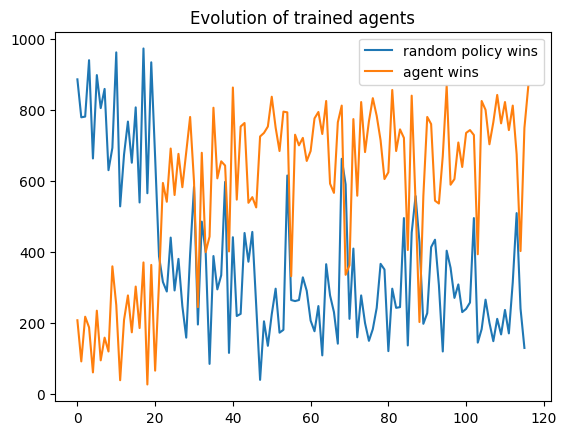

In [17]:
random_policy_wins = [886, 779, 781, 940, 663, 898, 805, 859, 630, 693, 962, 528, 674, 767, 651, 807, 539, 973, 565, 934, 666, 387, 315, 288, 440, 291, 380, 247, 158, 393, 583, 195, 485, 399, 84, 388, 294, 334, 597, 115,
                     441,219,225, 453, 372, 456, 249, 39, 204, 135, 224, 296, 172, 180, 615, 264, 261, 264, 328, 290, 206, 176, 247, 108, 365, 277, 230,
                     141, 662, 590, 211, 409, 159, 277, 199, 149, 182, 242, 366, 350, 120, 296, 242, 244, 495, 136, 454, 557, 427, 197, 227, 413, 434, 306, 119, 403, 355, 270, 308,
                     230, 239, 257, 495, 144, 182, 265, 200, 148, 211, 167, 236, 170, 314, 509, 240, 129]

agent_wins = [207, 91, 217, 187, 60, 234, 94, 158, 119, 359, 250, 38, 208, 277, 173, 302, 185, 370, 26, 363, 65, 314, 594, 541, 691, 560, 676, 582, 681, 780, 598, 244, 679, 399, 443, 806, 607, 655, 643, 401, 863,
             547,753,763,538,554,525,725,735,753,837,750,684,795,793,331,730,700,721,656,684,776,794,732,825,592,566,765,812,335,362,774,558,822,681,768,833,783,714,605,624,856,684,745,721,405,840,539,202,557,780,760,544,536,670,868,589,605,708,
             639, 735, 743, 729, 393, 825, 800, 703, 765, 842, 762, 822, 743, 812, 675, 402, 749, 867]


plt.plot(range(len(random_policy_wins)), random_policy_wins, label='random policy wins')

plt.plot(range(len(agent_wins)), agent_wins, label='agent wins')

plt.legend()
plt.title("Evolution of trained agents")
plt.show()

### 🐈 Plot play results

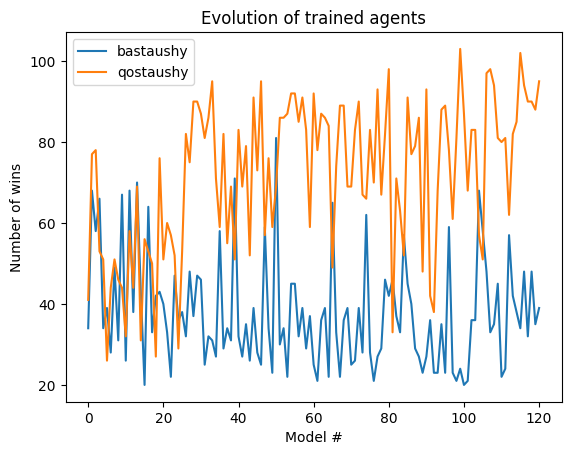

In [15]:
# plt.plot(range(len(num_winners_bastaushy)), num_winners_bastaushy, label="bastaushy")

# plt.plot(range(len(num_winners_qostaushy)), num_winners_qostaushy, label="qostaushy")

# plt.legend()
# plt.xlabel("Model #")
# plt.ylabel("Number of wins")
# plt.title("Evolution of trained agents")
# plt.show()

In [10]:
105/120

0.875

In [18]:
results = []
for key in num_winners_qostaushy.keys():
    results.append(num_winners_qostaushy[key][0])

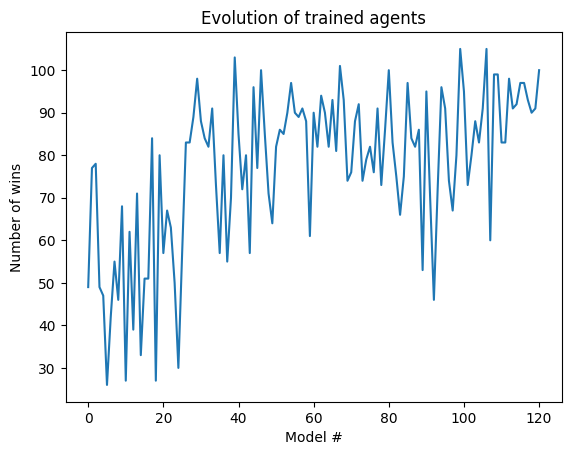

In [19]:
plt.plot(range(len(results)), results, label="qostaushy")

plt.xlabel("Model #")
plt.ylabel("Number of wins")
plt.title("Evolution of trained agents")
plt.show()